## Imports

In [3]:
sat_df = pd.DataFrame(sat[1:], columns = sat[0])

In [4]:
sat_df

sex sat_v sat_m sat_sum hs_gpa fy_gpa
0     1    65    62     127    3.4   3.18
1     2    58    64     122      4   3.33
2     2    56    60     116   3.75   3.25
3     1    42    53      95   3.75   2.42
4     1    55    52     107      4   2.63
..   ..   ...   ...     ...    ...    ...
995   2    50    50     100    3.7   2.19
996   1    54    54     108    3.3    1.5
997   1    56    58     114    3.5   3.17
998   1    55    65     120    2.3   1.94
999   1    49    44      93    2.7   2.38

[1000 rows x 6 columns]

In [5]:
sat_df = sat_df.astype({'sex': int, 'sat_v': int, 'sat_m': int, 'sat_sum': int, 'hs_gpa':float, 'fy_gpa':float})

In [6]:
sat_v = pd.DataFrame()
sat_v['sex'] = sat_df['sex']
sat_v['sat_v'] = sat_df['sat_v']
sat_v = sat_v.sort_values(by = 'sat_v', ascending = False)
sat_v = sat_v.reset_index(drop=True)
sat_v

sex  sat_v
0      2     76
1      2     76
2      2     73
3      2     71
4      1     71
..   ...    ...
995    2     29
996    1     29
997    2     27
998    1     26
999    1     24

[1000 rows x 2 columns]

In [7]:
sat_m = pd.DataFrame()
sat_m['sex'] = sat_df['sex']
sat_m['sat_m'] = sat_df['sat_m']
sat_m = sat_m.sort_values(by = 'sat_m', ascending = False)
sat_m = sat_m.reset_index(drop=True)
sat_m

sex  sat_m
0      1     77
1      2     77
2      1     77
3      1     76
4      1     75
..   ...    ...
995    2     32
996    2     32
997    2     32
998    2     31
999    1     29

[1000 rows x 2 columns]

Text(0.5, 0, 'sat_v')

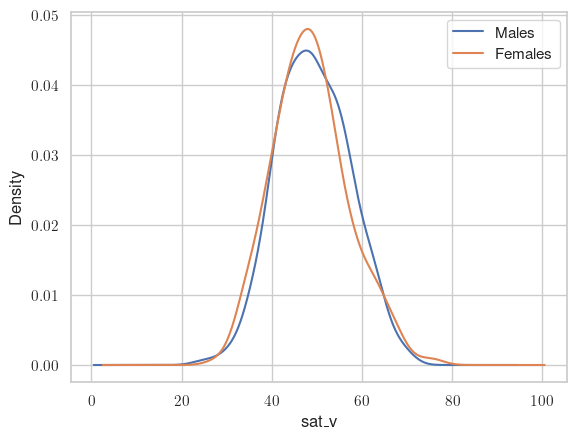

In [8]:
sat_v.groupby('sex')['sat_v'].plot(kind = 'kde')
plt.legend(['Males', 'Females'])
plt.xlabel('sat_v')

Text(0.5, 0, 'sat_m')

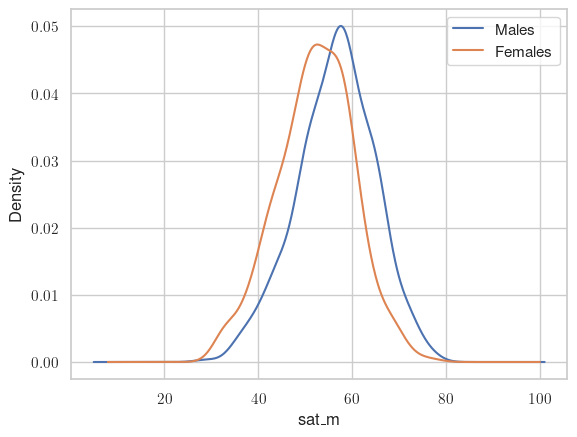

In [9]:
sat_m.groupby('sex')['sat_m'].plot(kind = 'kde')
plt.legend(['Males', 'Females'])
plt.xlabel('sat_m')

Text(0.5, 0, 'sat_sum')

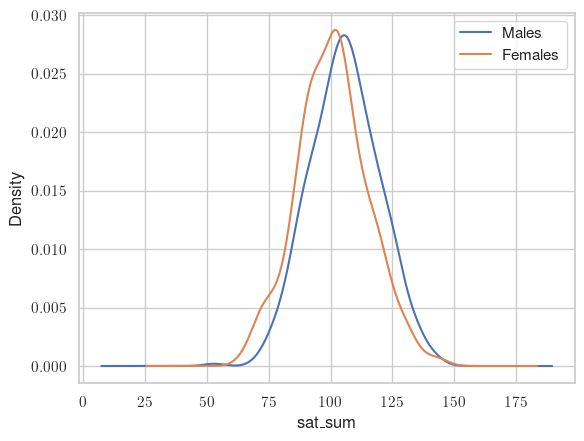

In [10]:
sat_df.groupby('sex')['sat_sum'].plot(kind = 'kde')
plt.legend(['Males', 'Females'])
plt.xlabel('sat_sum')

Text(0.5, 0, 'hs_gpa')

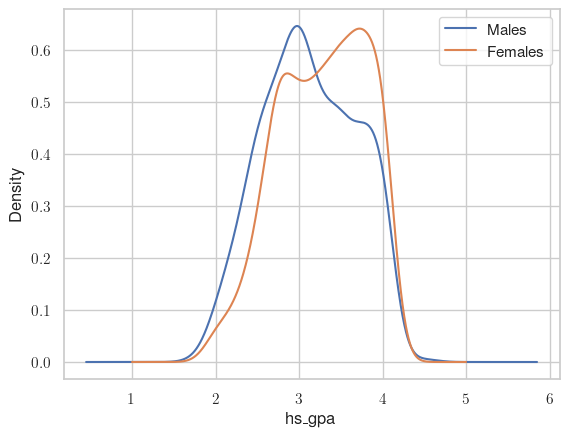

In [11]:
sat_df.groupby('sex')['hs_gpa'].plot(kind = 'kde')
plt.legend(['Males', 'Females'])
plt.xlabel('hs_gpa')

Text(0.5, 0, 'fy_gpa')

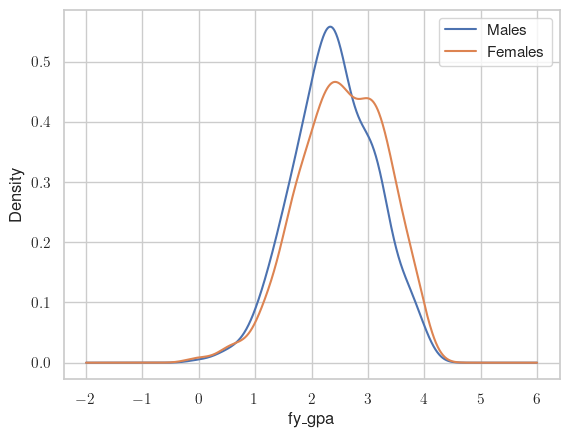

In [12]:
sat_df.groupby('sex')['fy_gpa'].plot(kind = 'kde')
plt.legend(['Males', 'Females'])
plt.xlabel('fy_gpa')

In [13]:
sat_df.groupby('sex').describe()

sat_v                                                     sat_m  \
     count       mean       std   min   25%   50%   75%   max  count   
sex                                                                    
1    516.0  49.246124  8.070050  24.0  43.0  49.0  55.0  71.0  516.0   
2    484.0  48.601240  8.400685  27.0  43.0  48.0  54.0  76.0  484.0   

                ... hs_gpa      fy_gpa                                        \
          mean  ...    75%  max  count      mean       std  min    25%   50%   
sex             ...                                                            
1    56.459302  ...   3.50  4.5  516.0  2.396066  0.716292  0.0  1.935  2.38   
2    52.194215  ...   3.75  4.0  484.0  2.544587  0.759347  0.0  2.020  2.56   

                
      75%  max  
sex             
1    2.91  4.0  
2    3.12  4.0  

[2 rows x 40 columns]

In [15]:
sigma = len(sat_df[sat_df['sex'] == 2])/len(sat_df)
sigma

0.484

In [16]:
sat_v_bias = []
for i in range(len(sat_v)):
    if sat_v.iloc[i, 0] == 2:
        sat_v_bias.append(sat_v.iloc[i, 1] * 0.6)
    else:
        sat_v_bias.append(sat_v.iloc[i, 1])

In [17]:
obs_sat_v = pd.DataFrame()
obs_sat_v['sex'] = sat_v['sex']
obs_sat_v['sat_v'] = sat_v_bias
obs_sat_v = obs_sat_v.sort_values(by = 'sat_v', ascending = False)
obs_sat_v = obs_sat_v.reset_index(drop=True)
obs_sat_v

sex  sat_v
0      1   71.0
1      1   70.0
2      1   69.0
3      1   69.0
4      1   68.0
..   ...    ...
995    2   19.2
996    2   19.2
997    2   18.6
998    2   17.4
999    2   16.2

[1000 rows x 2 columns]

In [18]:
sat_m_bias = []
for i in range(len(sat_m)):
    if sat_m.iloc[i, 0] == 2:
        sat_m_bias.append(sat_m.iloc[i, 1] * 0.6)
    else:
        sat_m_bias.append(sat_m.iloc[i, 1])

In [66]:
obs_sat_m = pd.DataFrame()
obs_sat_m['sex'] = sat_m['sex']
obs_sat_m['sat_m'] = sat_m_bias
obs_sat_m = obs_sat_m.sort_values(by = 'sat_m', ascending = False)
obs_sat_m = obs_sat_m.reset_index()
obs_sat_m

index  sex  sat_m
0        0    1   77.0
1        2    1   77.0
2        3    1   76.0
3        4    1   75.0
4        6    1   74.0
..     ...  ...    ...
995    994    2   19.8
996    995    2   19.2
997    996    2   19.2
998    997    2   19.2
999    998    2   18.6

[1000 rows x 3 columns]

In [67]:
n_idx = []
for i in obs_sat_m['index']:
    n_idx.append(i + 1)

In [68]:
obs_sat_m['n_idx'] = n_idx

In [69]:
obs_sat_m

index  sex  sat_m  n_idx
0        0    1   77.0      1
1        2    1   77.0      3
2        3    1   76.0      4
3        4    1   75.0      5
4        6    1   74.0      7
..     ...  ...    ...    ...
995    994    2   19.8    995
996    995    2   19.2    996
997    996    2   19.2    997
998    997    2   19.2    998
999    998    2   18.6    999

[1000 rows x 4 columns]

In [45]:
#modify data for function to create fair ranking
#p = 0
original_sat_m = []
for i in range(len(sat_m)):
    p = sat_m.index[i] + 1
    s = sat_m['sat_m'][i]

    if sat_m['sex'][i] == 1:
        original_sat_m.append((p, s,'M'))
    elif sat_m['sex'][i] == 2:
        original_sat_m.append((p, s,'F'))
#    p += 1

In [46]:
original_sat_m

[(1, 77, 'M'),
 (2, 77, 'F'),
 (3, 77, 'M'),
 (4, 76, 'M'),
 (5, 75, 'M'),
 (6, 74, 'F'),
 (7, 74, 'M'),
 (8, 74, 'M'),
 (9, 73, 'M'),
 (10, 73, 'M'),
 (11, 73, 'M'),
 (12, 73, 'M'),
 (13, 72, 'M'),
 (14, 72, 'M'),
 (15, 72, 'M'),
 (16, 72, 'F'),
 (17, 72, 'M'),
 (18, 72, 'M'),
 (19, 71, 'M'),
 (20, 71, 'M'),
 (21, 71, 'M'),
 (22, 71, 'M'),
 (23, 71, 'M'),
 (24, 71, 'F'),
 (25, 71, 'M'),
 (26, 71, 'M'),
 (27, 70, 'M'),
 (28, 70, 'M'),
 (29, 70, 'F'),
 (30, 70, 'F'),
 (31, 70, 'M'),
 (32, 70, 'M'),
 (33, 70, 'M'),
 (34, 70, 'F'),
 (35, 69, 'F'),
 (36, 69, 'M'),
 (37, 69, 'F'),
 (38, 69, 'F'),
 (39, 69, 'F'),
 (40, 69, 'M'),
 (41, 68, 'M'),
 (42, 68, 'F'),
 (43, 68, 'M'),
 (44, 68, 'F'),
 (45, 68, 'M'),
 (46, 68, 'M'),
 (47, 68, 'M'),
 (48, 68, 'M'),
 (49, 68, 'M'),
 (50, 68, 'M'),
 (51, 68, 'F'),
 (52, 68, 'M'),
 (53, 68, 'F'),
 (54, 68, 'M'),
 (55, 67, 'M'),
 (56, 67, 'M'),
 (57, 67, 'M'),
 (58, 67, 'M'),
 (59, 67, 'M'),
 (60, 67, 'M'),
 (61, 67, 'M'),
 (62, 67, 'M'),
 (63, 67, 'F'),
 

In [34]:
obs_sat_m.index[1]

2

In [70]:
#modify data for function to create fair ranking
#p = 0
observed_sat_m = []
for i in range(len(obs_sat_m)):
    p = obs_sat_m['n_idx'][i]
    s = obs_sat_m['sat_m'][i]
    if obs_sat_m['sex'][i] == 1:
        observed_sat_m.append((p, s,'M'))
    elif obs_sat_m['sex'][i] == 2:
        observed_sat_m.append((p, s,'F'))

In [71]:
observed_sat_m

[(1, 77.0, 'M'),
 (3, 77.0, 'M'),
 (4, 76.0, 'M'),
 (5, 75.0, 'M'),
 (7, 74.0, 'M'),
 (8, 74.0, 'M'),
 (11, 73.0, 'M'),
 (12, 73.0, 'M'),
 (10, 73.0, 'M'),
 (9, 73.0, 'M'),
 (13, 72.0, 'M'),
 (14, 72.0, 'M'),
 (15, 72.0, 'M'),
 (17, 72.0, 'M'),
 (18, 72.0, 'M'),
 (21, 71.0, 'M'),
 (25, 71.0, 'M'),
 (23, 71.0, 'M'),
 (22, 71.0, 'M'),
 (26, 71.0, 'M'),
 (20, 71.0, 'M'),
 (19, 71.0, 'M'),
 (31, 70.0, 'M'),
 (33, 70.0, 'M'),
 (32, 70.0, 'M'),
 (27, 70.0, 'M'),
 (28, 70.0, 'M'),
 (40, 69.0, 'M'),
 (36, 69.0, 'M'),
 (50, 68.0, 'M'),
 (41, 68.0, 'M'),
 (52, 68.0, 'M'),
 (49, 68.0, 'M'),
 (48, 68.0, 'M'),
 (47, 68.0, 'M'),
 (46, 68.0, 'M'),
 (45, 68.0, 'M'),
 (54, 68.0, 'M'),
 (43, 68.0, 'M'),
 (55, 67.0, 'M'),
 (61, 67.0, 'M'),
 (65, 67.0, 'M'),
 (56, 67.0, 'M'),
 (57, 67.0, 'M'),
 (58, 67.0, 'M'),
 (66, 67.0, 'M'),
 (59, 67.0, 'M'),
 (60, 67.0, 'M'),
 (69, 67.0, 'M'),
 (68, 67.0, 'M'),
 (62, 67.0, 'M'),
 (76, 66.0, 'M'),
 (87, 66.0, 'M'),
 (78, 66.0, 'M'),
 (77, 66.0, 'M'),
 (75, 66.0, 'M'),

In [102]:
obs_fair_ranking, obs_fair_ranking_df = generate_fair_ranking(protected_attribute = 'F', 
                                                             alpha = sigma, obs_ranking = observed_sat_m, 
                                                              floor_policy = floor_policy)

In [103]:
for i in range(len(obs_fair_ranking)):
    if obs_fair_ranking[i][0] == 3:
        print(obs_fair_ranking[i])

(3, 77.0, 'M')


In [104]:
for i in range(len(original_sat_m)):
    if original_sat_m[i][0] == 3:
        print(original_sat_m[i])

(3, 77, 'M')


In [115]:
v_r0r2 = compute_individual_unfairness(original_sat_m, obs_fair_ranking, return_plain_score)
v_r1r2 = compute_individual_unfairness(observed_sat_m, obs_fair_ranking, return_plain_score)
v_r0r1 = compute_individual_unfairness(original_sat_m, observed_sat_m, return_plain_score)

In [116]:
v_r0r2_f_list = []
for k, v in v_r0r2.items():
    if k[1] == 'F':
        v_r0r2_f_list.append(v)
        
v_r0r2_f = {}
v_r0r2_f[0.6] = v_r0r2_f_list

In [117]:
v_r0r2_m_list = []
for k, v in v_r0r2.items():
    if k[1] == 'M':
        v_r0r2_m_list.append(v)
        
v_r0r2_m = {}
v_r0r2_m[0.6] = v_r0r2_m_list



v_r1r2_f_list = []
for k, v in v_r1r2.items():
    if k[1] == 'F':
        v_r1r2_f_list.append(v)
        
v_r1r2_f = {}
v_r1r2_f[0.6] = v_r1r2_f_list

v_r1r2_m_list = []
for k, v in v_r1r2.items():
    if k[1] == 'F':
        v_r1r2_m_list.append(v)
        
v_r1r2_m = {}
v_r1r2_m[0.6] = v_r1r2_m_list



v_r0r1_f_list = []
for k, v in v_r0r1.items():
    if k[1] == 'F':
        v_r0r1_f_list.append(v)
        
v_r0r1_f = {}
v_r0r1_f[0.6] = v_r0r1_f_list


v_r0r1_m_list = []
for k, v in v_r0r1.items():
    if k[1] == 'F':
        v_r0r1_m_list.append(v)
        
v_r0r1_m = {}
v_r0r1_m[0.6] = v_r0r1_m_list

In [119]:
v_r0r2_f

{0.6: [-1,
  1,
  9,
  15,
  19,
  21,
  14,
  22,
  19,
  16,
  12,
  28,
  24,
  13,
  13,
  30,
  27,
  29,
  42,
  42,
  36,
  42,
  33,
  50,
  49,
  62,
  80,
  81,
  51,
  56,
  63,
  67,
  75,
  71,
  64,
  66,
  85,
  76,
  66,
  63,
  87,
  86,
  91,
  76,
  89,
  73,
  85,
  85,
  84,
  64,
  83,
  58,
  55,
  80,
  96,
  93,
  88,
  84,
  80,
  89,
  88,
  89,
  88,
  68,
  86,
  83,
  99,
  116,
  100,
  88,
  79,
  75,
  98,
  101,
  100,
  98,
  88,
  80,
  102,
  95,
  94,
  90,
  130,
  145,
  141,
  92,
  136,
  133,
  129,
  87,
  119,
  86,
  94,
  104,
  81,
  96,
  93,
  76,
  66,
  85,
  81,
  77,
  72,
  71,
  88,
  101,
  100,
  140,
  109,
  127,
  135,
  134,
  119,
  116,
  113,
  107,
  104,
  115,
  99,
  94,
  88,
  83,
  101,
  76,
  71,
  64,
  66,
  63,
  152,
  107,
  115,
  112,
  108,
  101,
  98,
  89,
  146,
  145,
  101,
  79,
  143,
  134,
  103,
  95,
  118,
  101,
  123,
  99,
  98,
  115,
  97,
  96,
  107,
  104,
  93,
  94,
  87,
  114,
  1

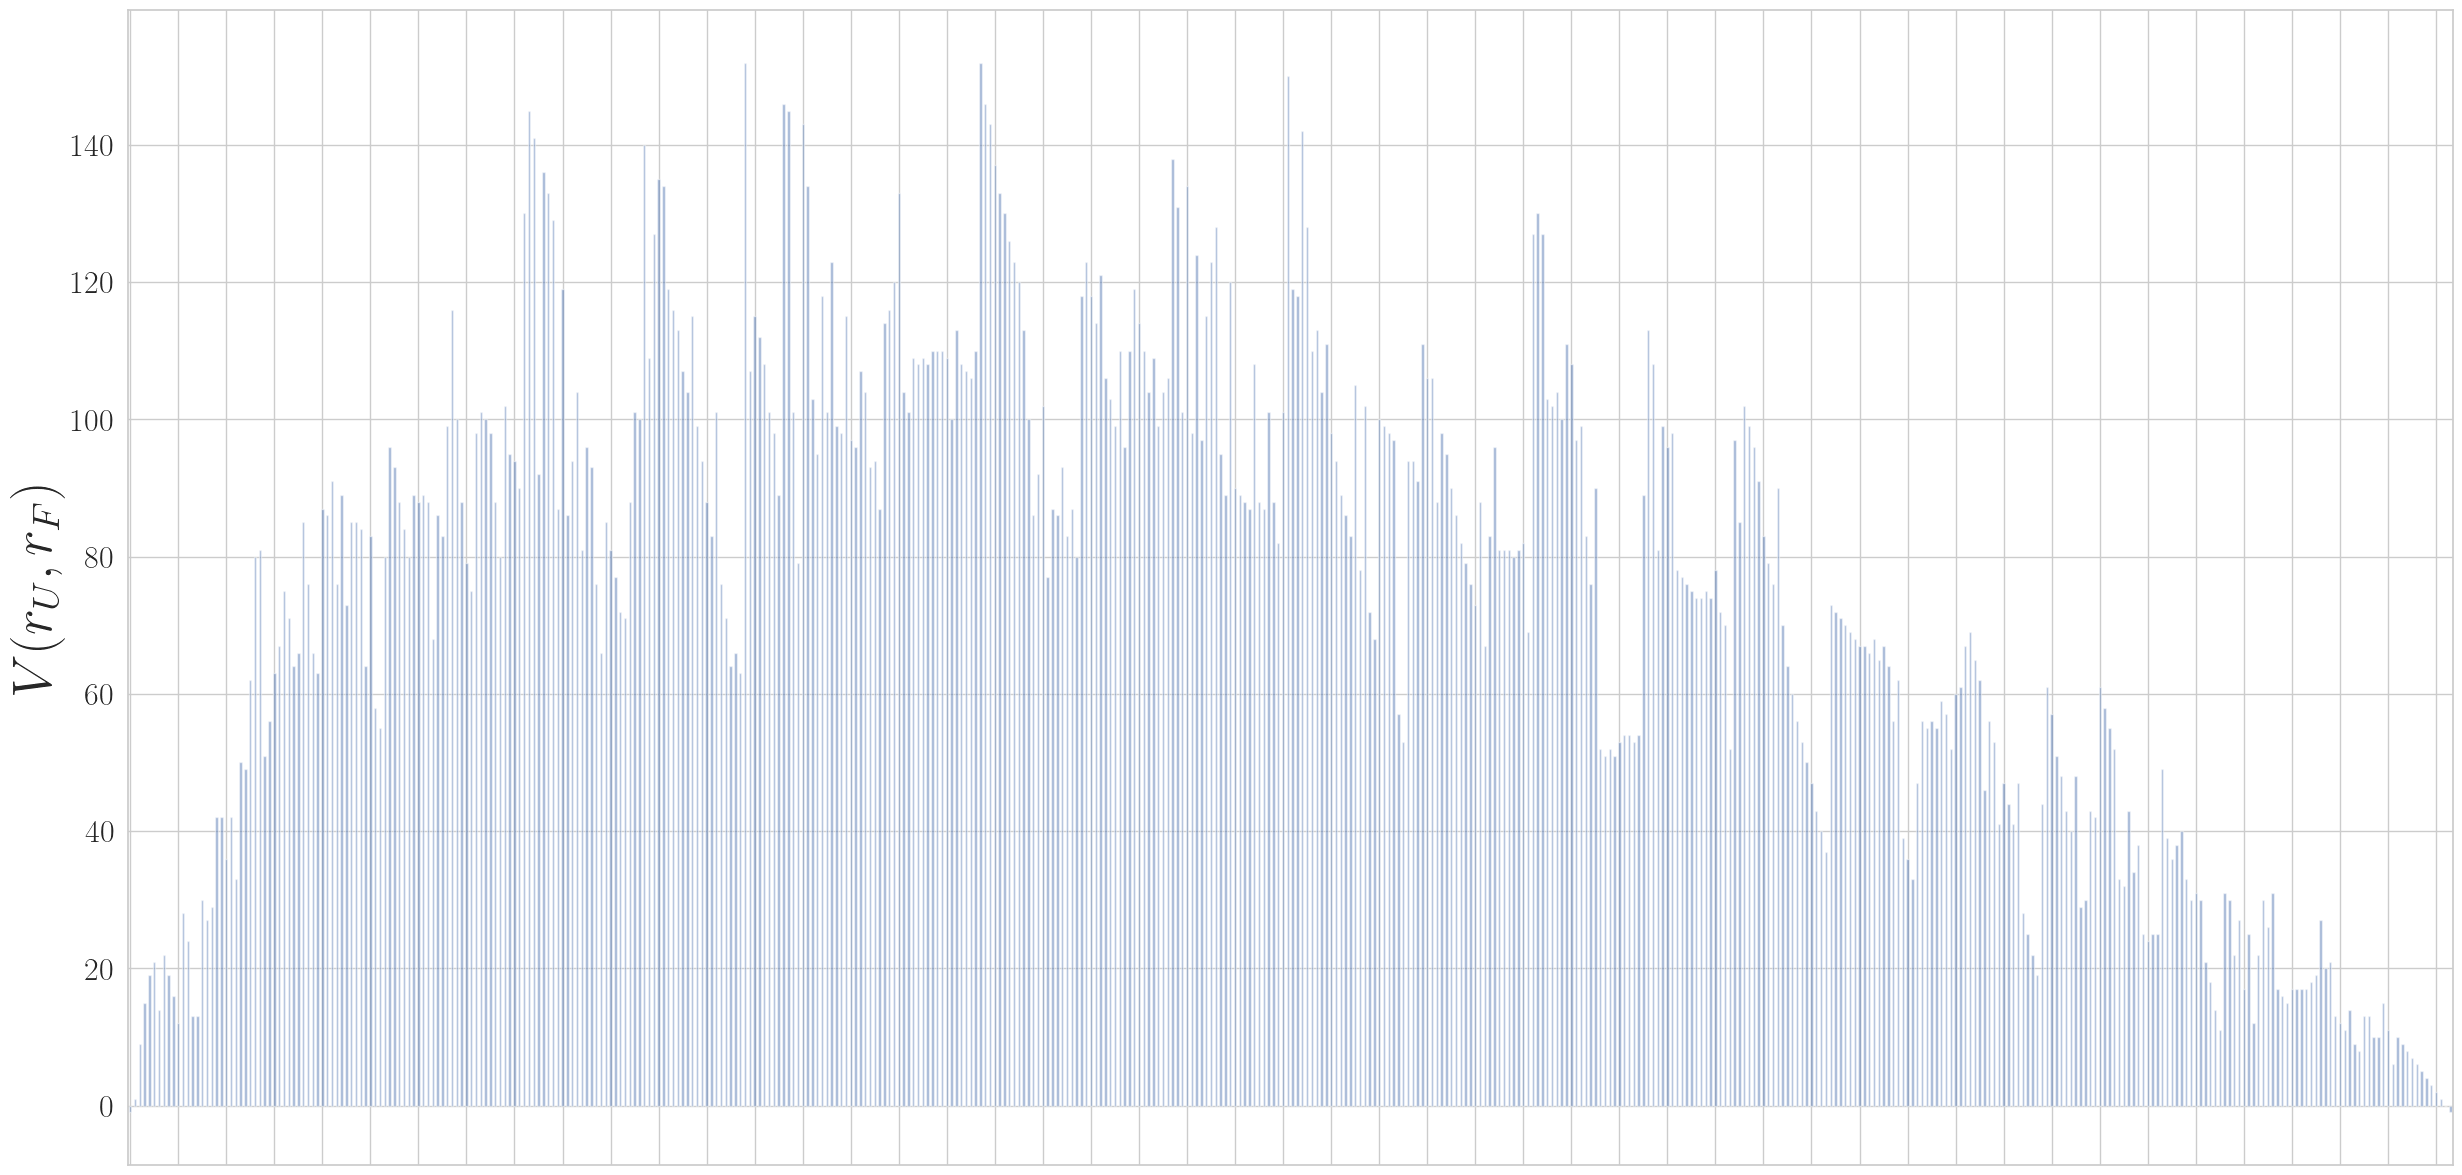

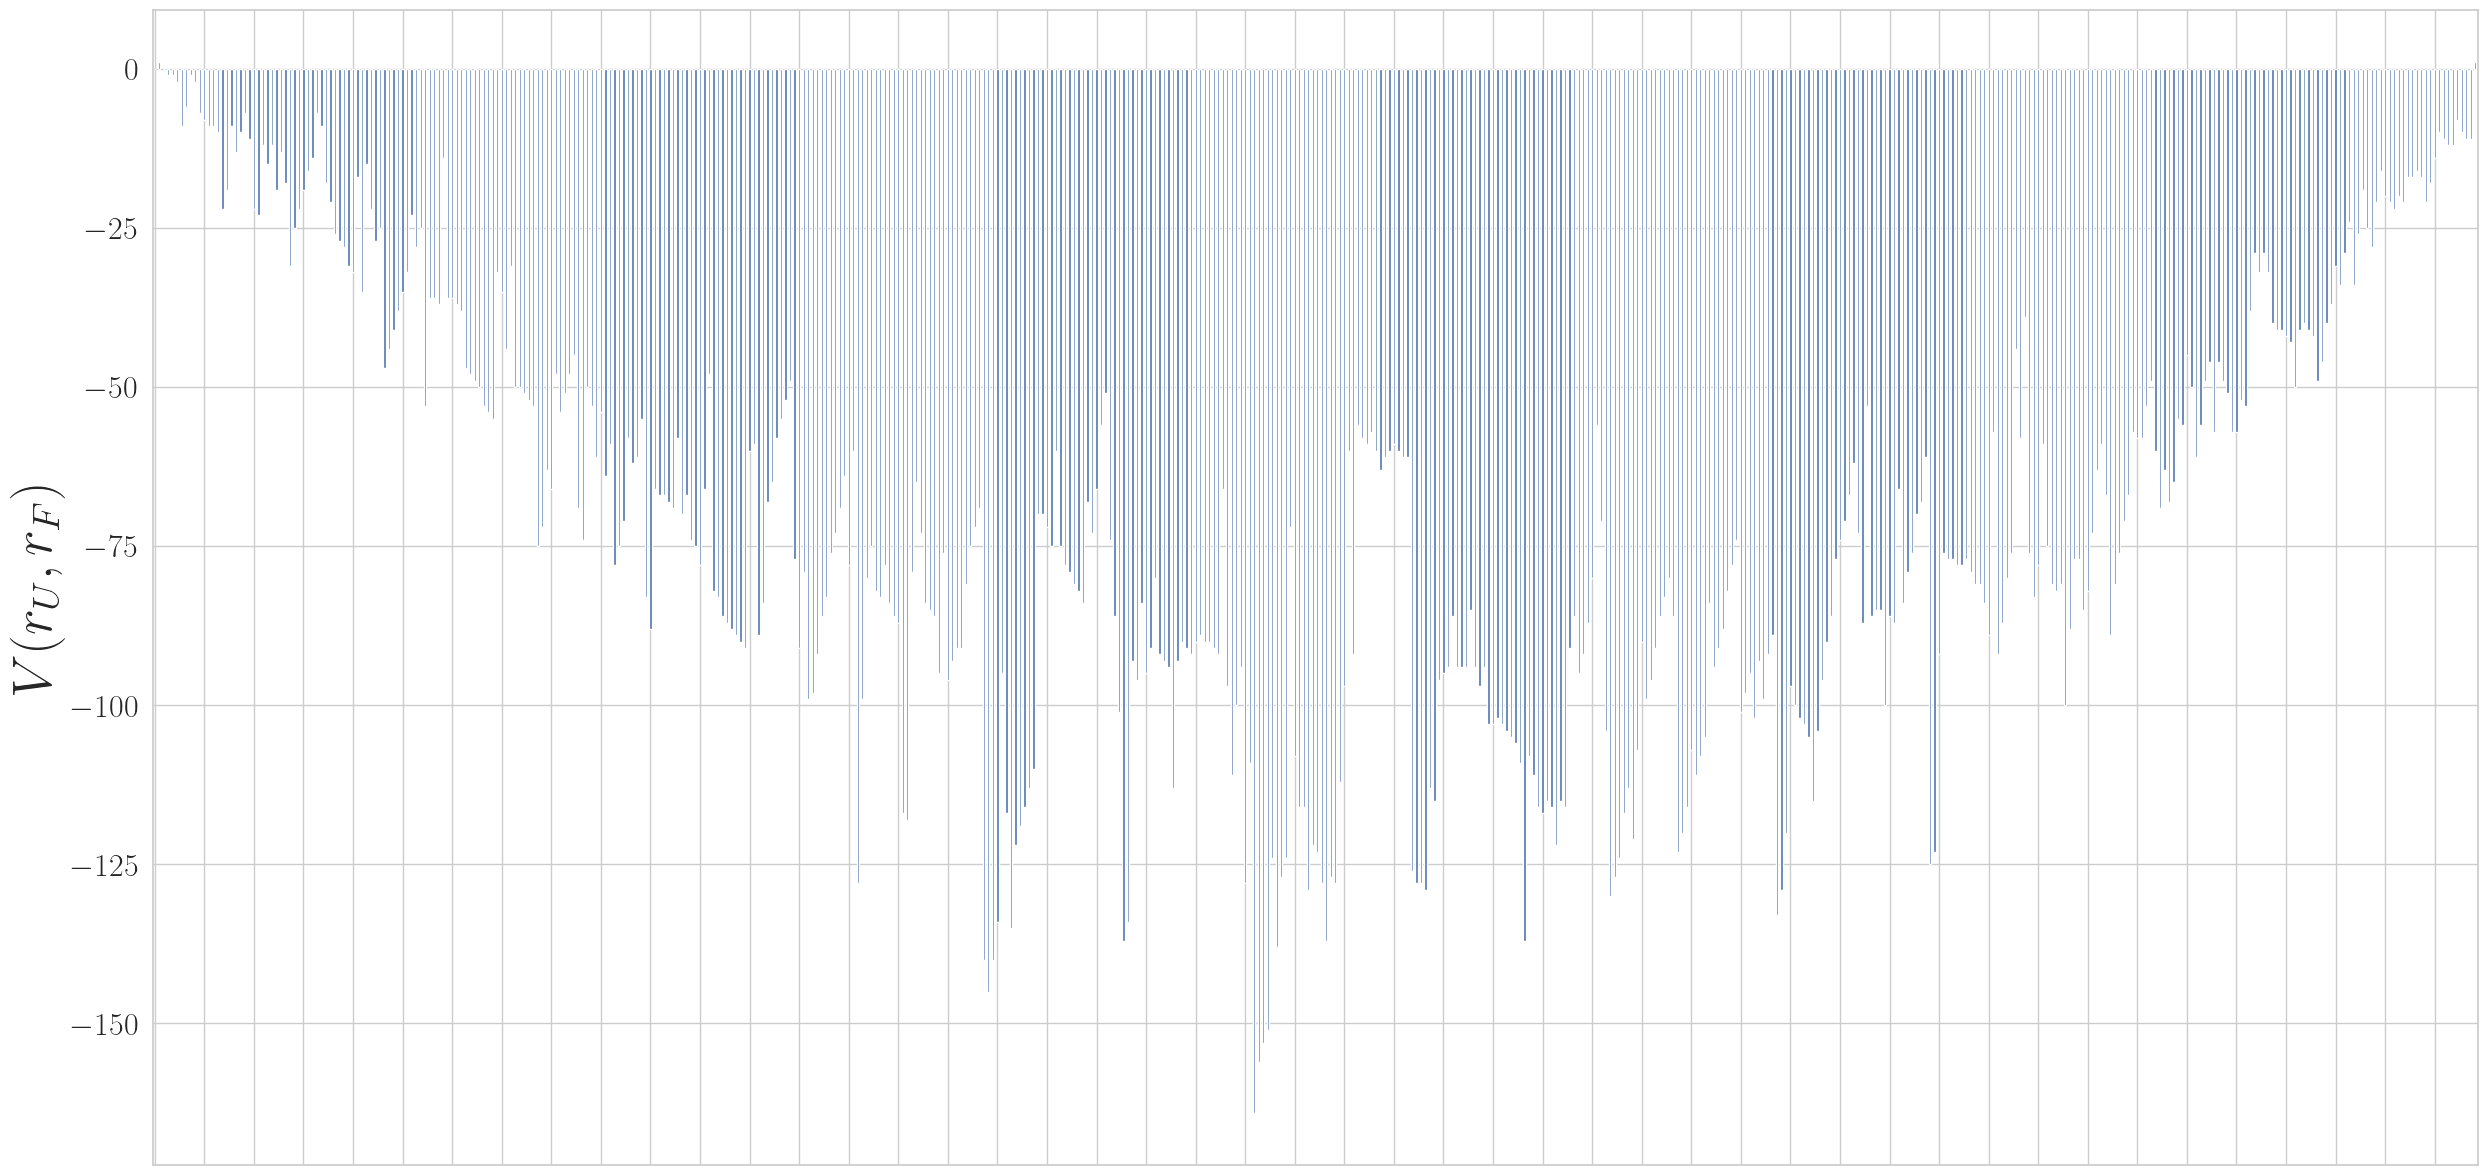

In [120]:
plot_individual_fairness(v_r0r2_f, v_r0r1_f, v_r1r2_f, v_r0r2_m, v_r0r1_m, v_r1r2_m, betas = [0.6], V_type = 'V')

100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.43s/it]


Proportion of Women: 0.5


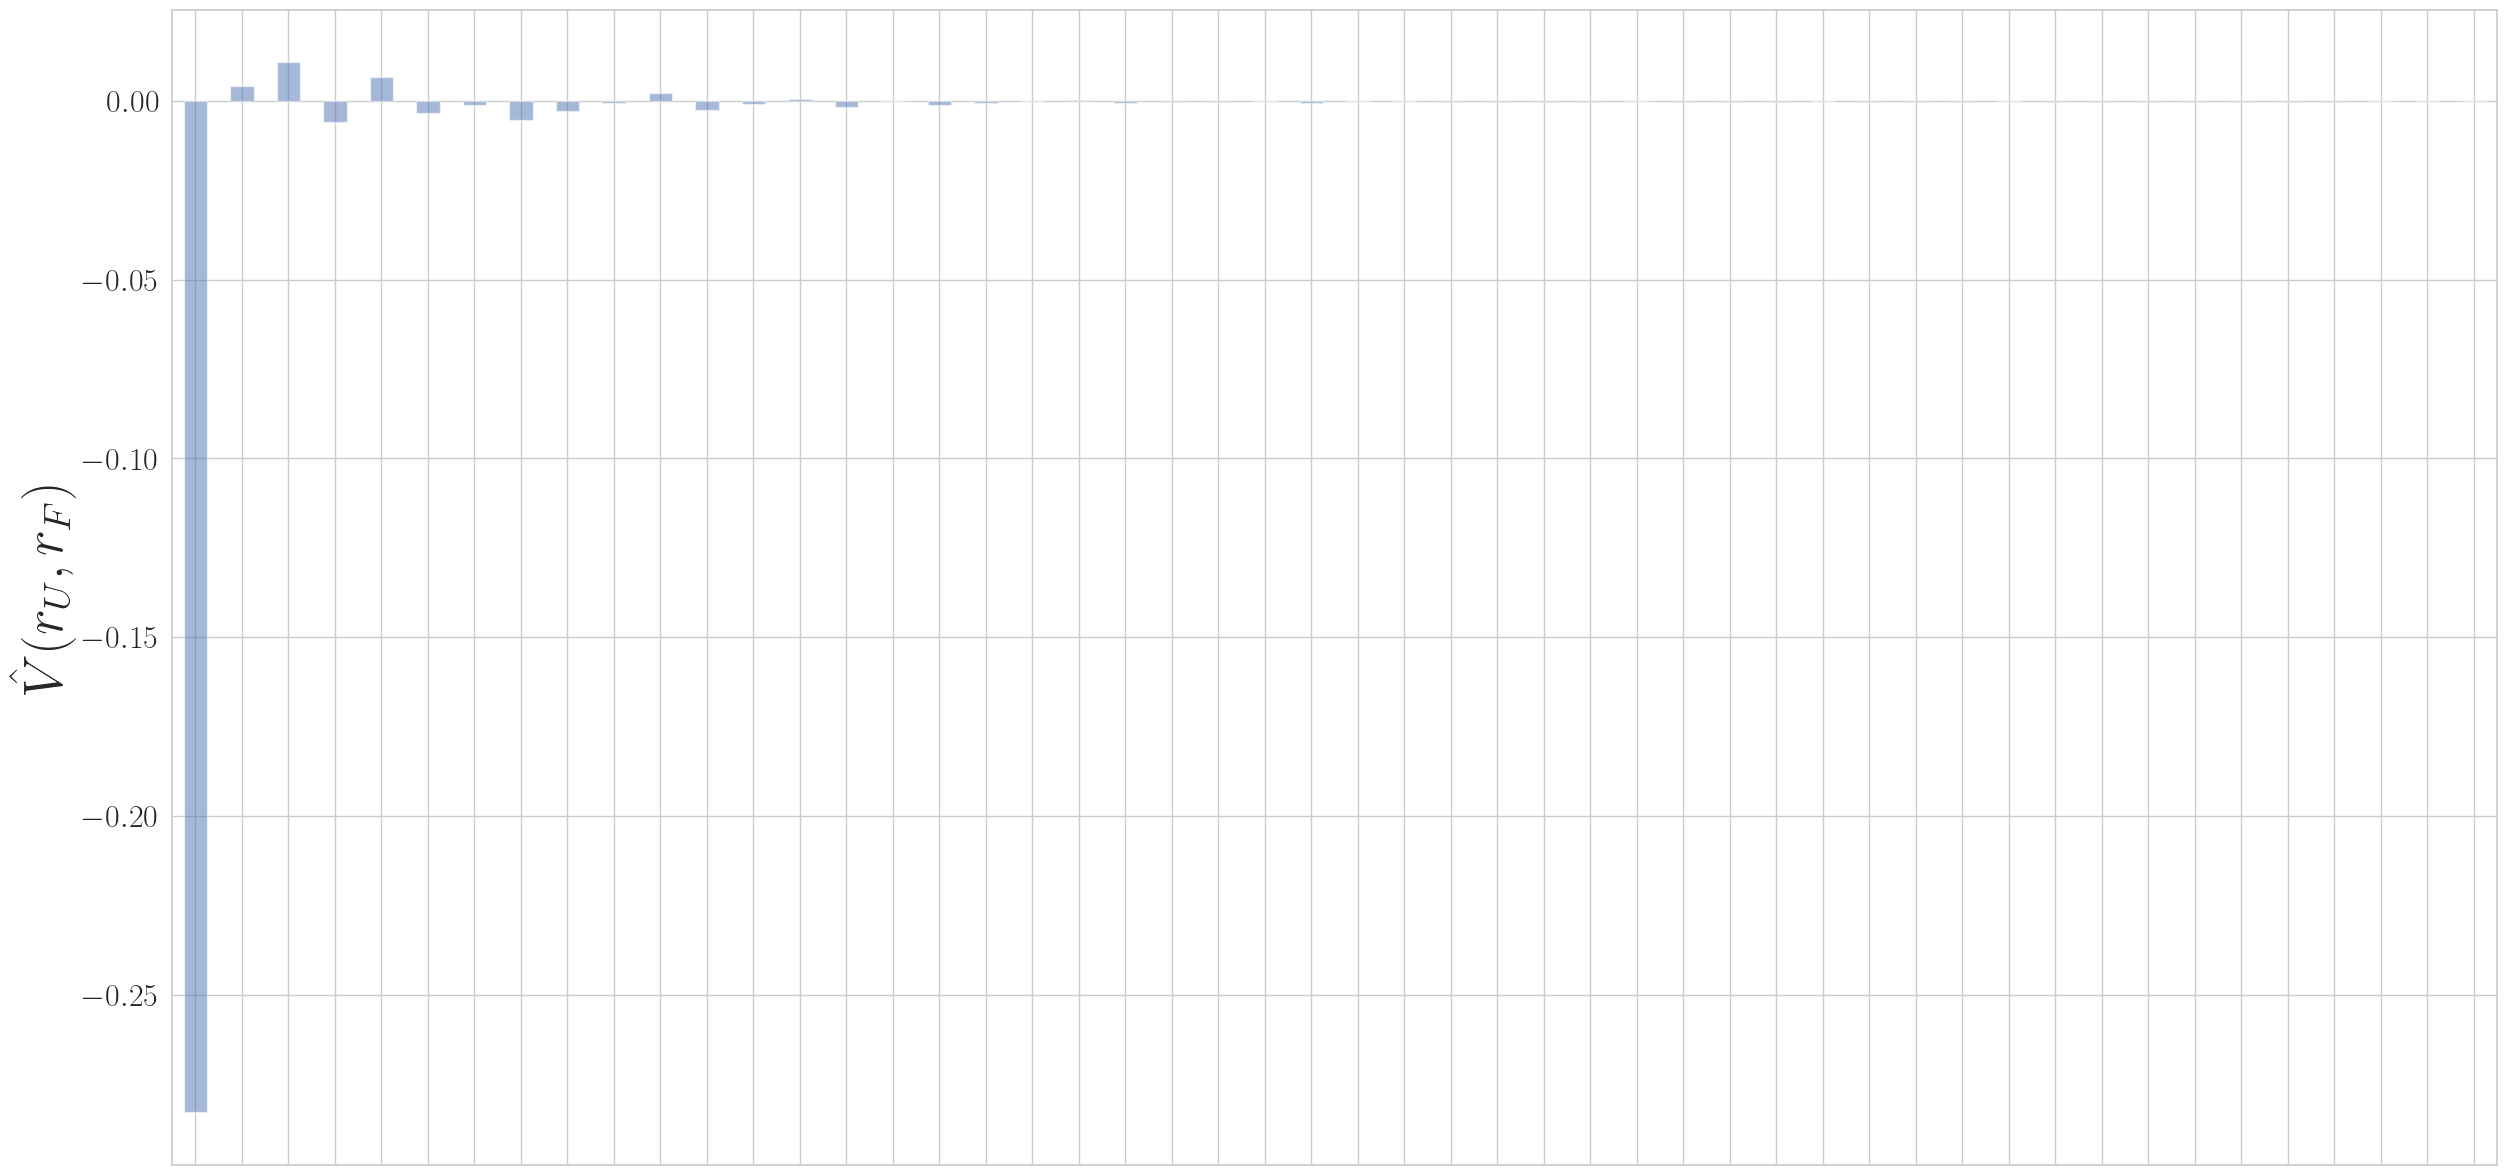

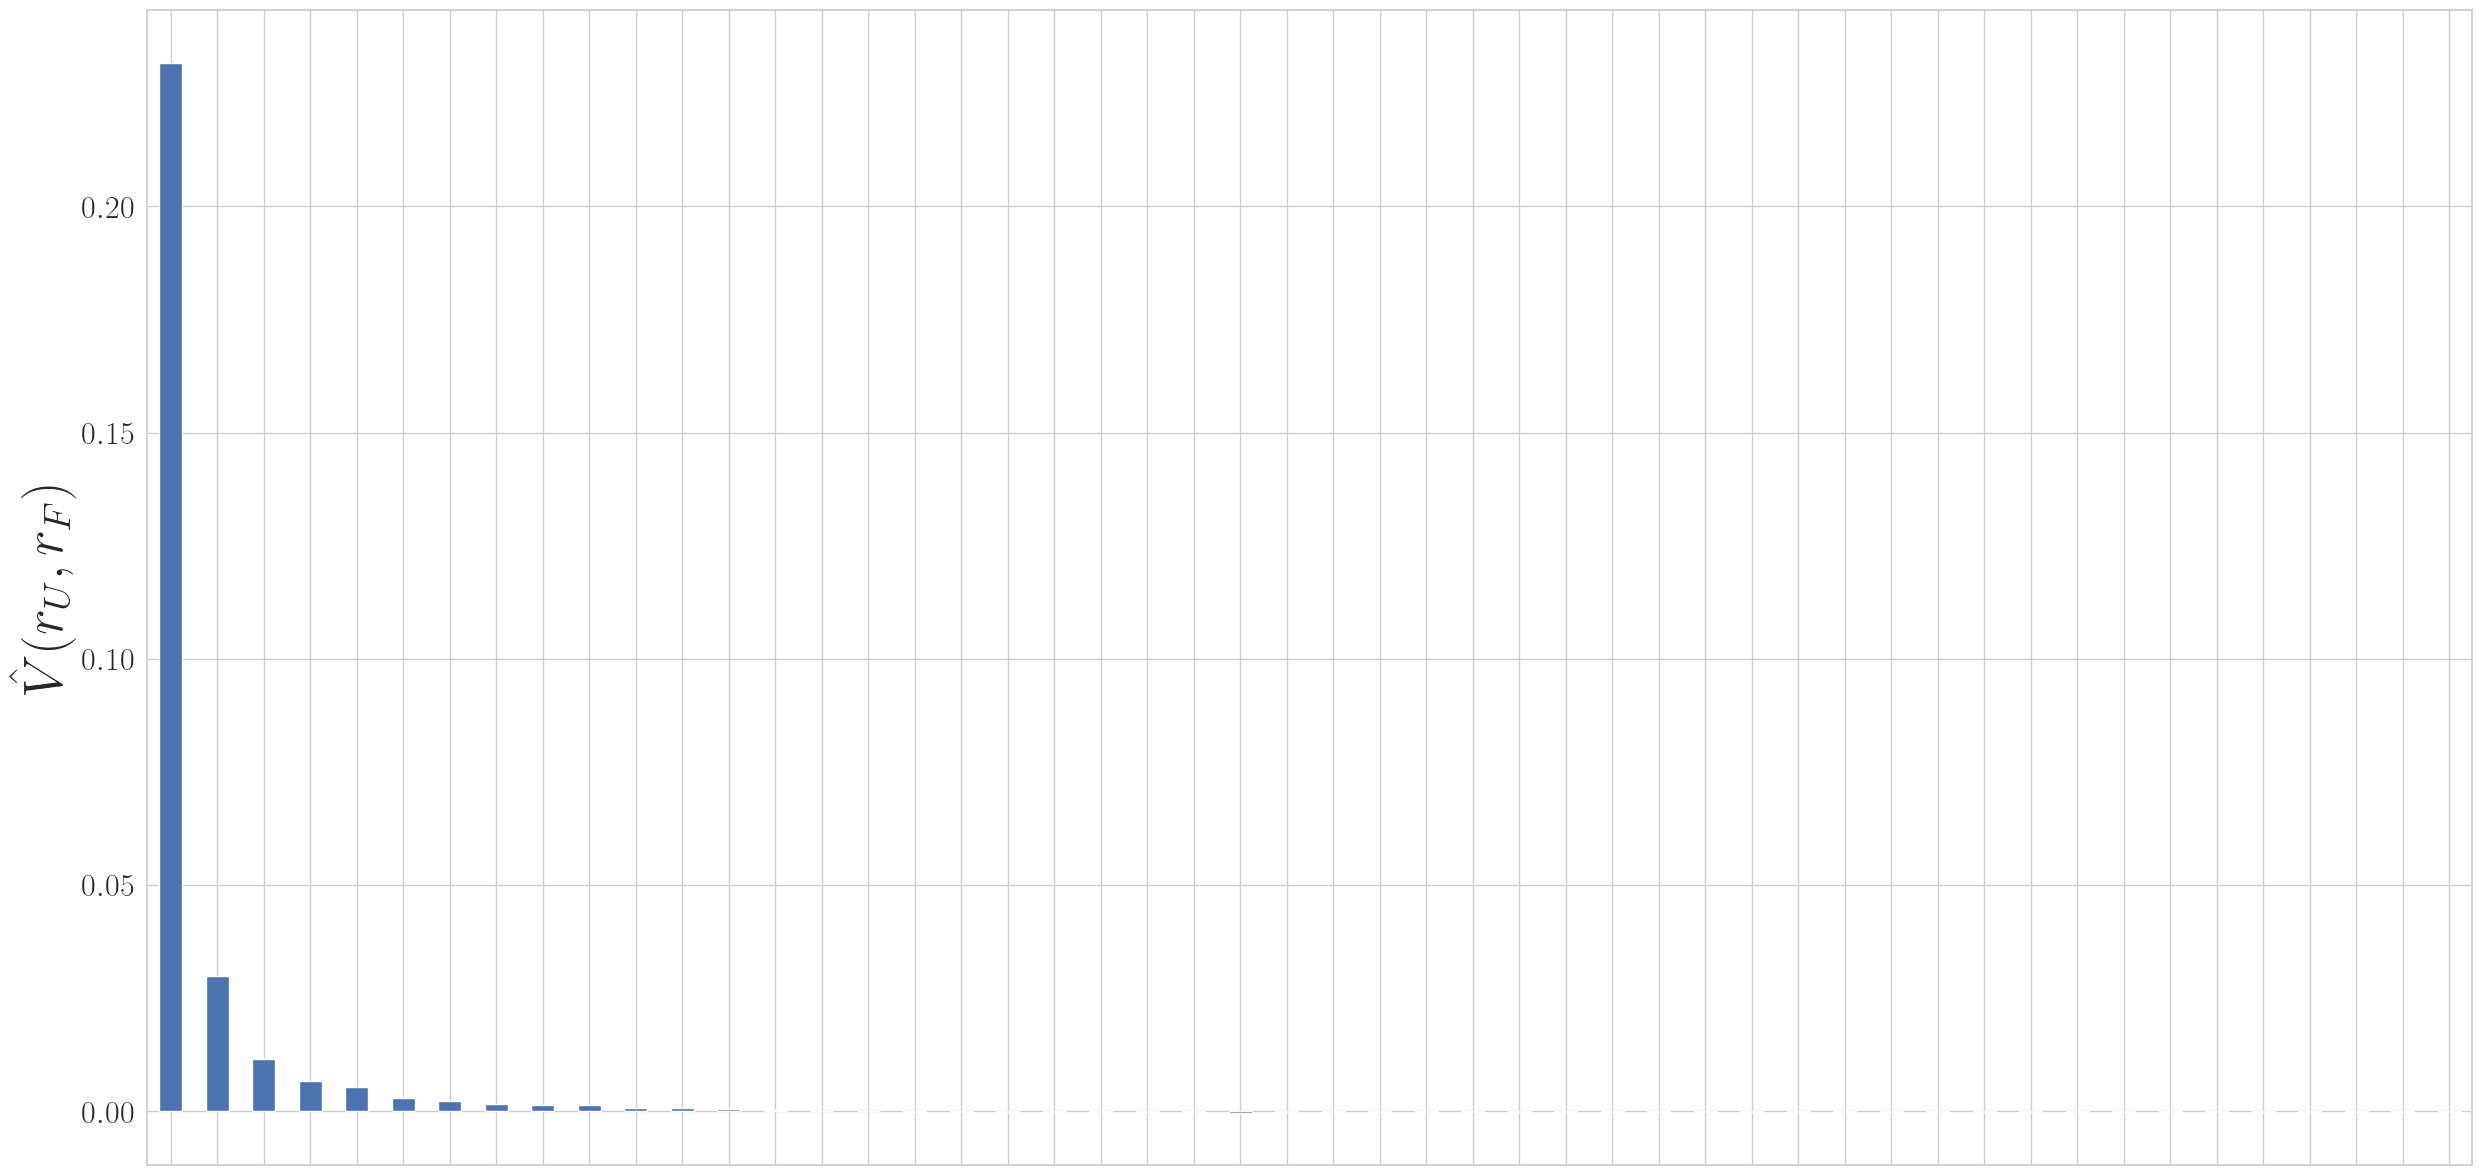

In [78]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, alpha = p_F, mean_F = mean_F, 
                                                delta = delta, protected_attribute = protected_attribute, 
                                                betas = betas, V_type = V_type)

    print('Proportion of Women:', np.around(p_F, 2))
    plot_individual_fairness(v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m, betas, V_type = V_type,
                             save_plot = True)

    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

## Plot individual fairness R0_R2 for different betas

In [29]:
np.random.seed(1337)
n = 500
N = 50
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
#betas = np.arange(0.1, 1, 0.1)
betas = np.array([0.3, 0.5, 0.8])
V_type = 'V_disc'

In [30]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, alpha=p_F,
                                                  betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 3/3 [00:13<00:00,  4.48s/it]

0.5


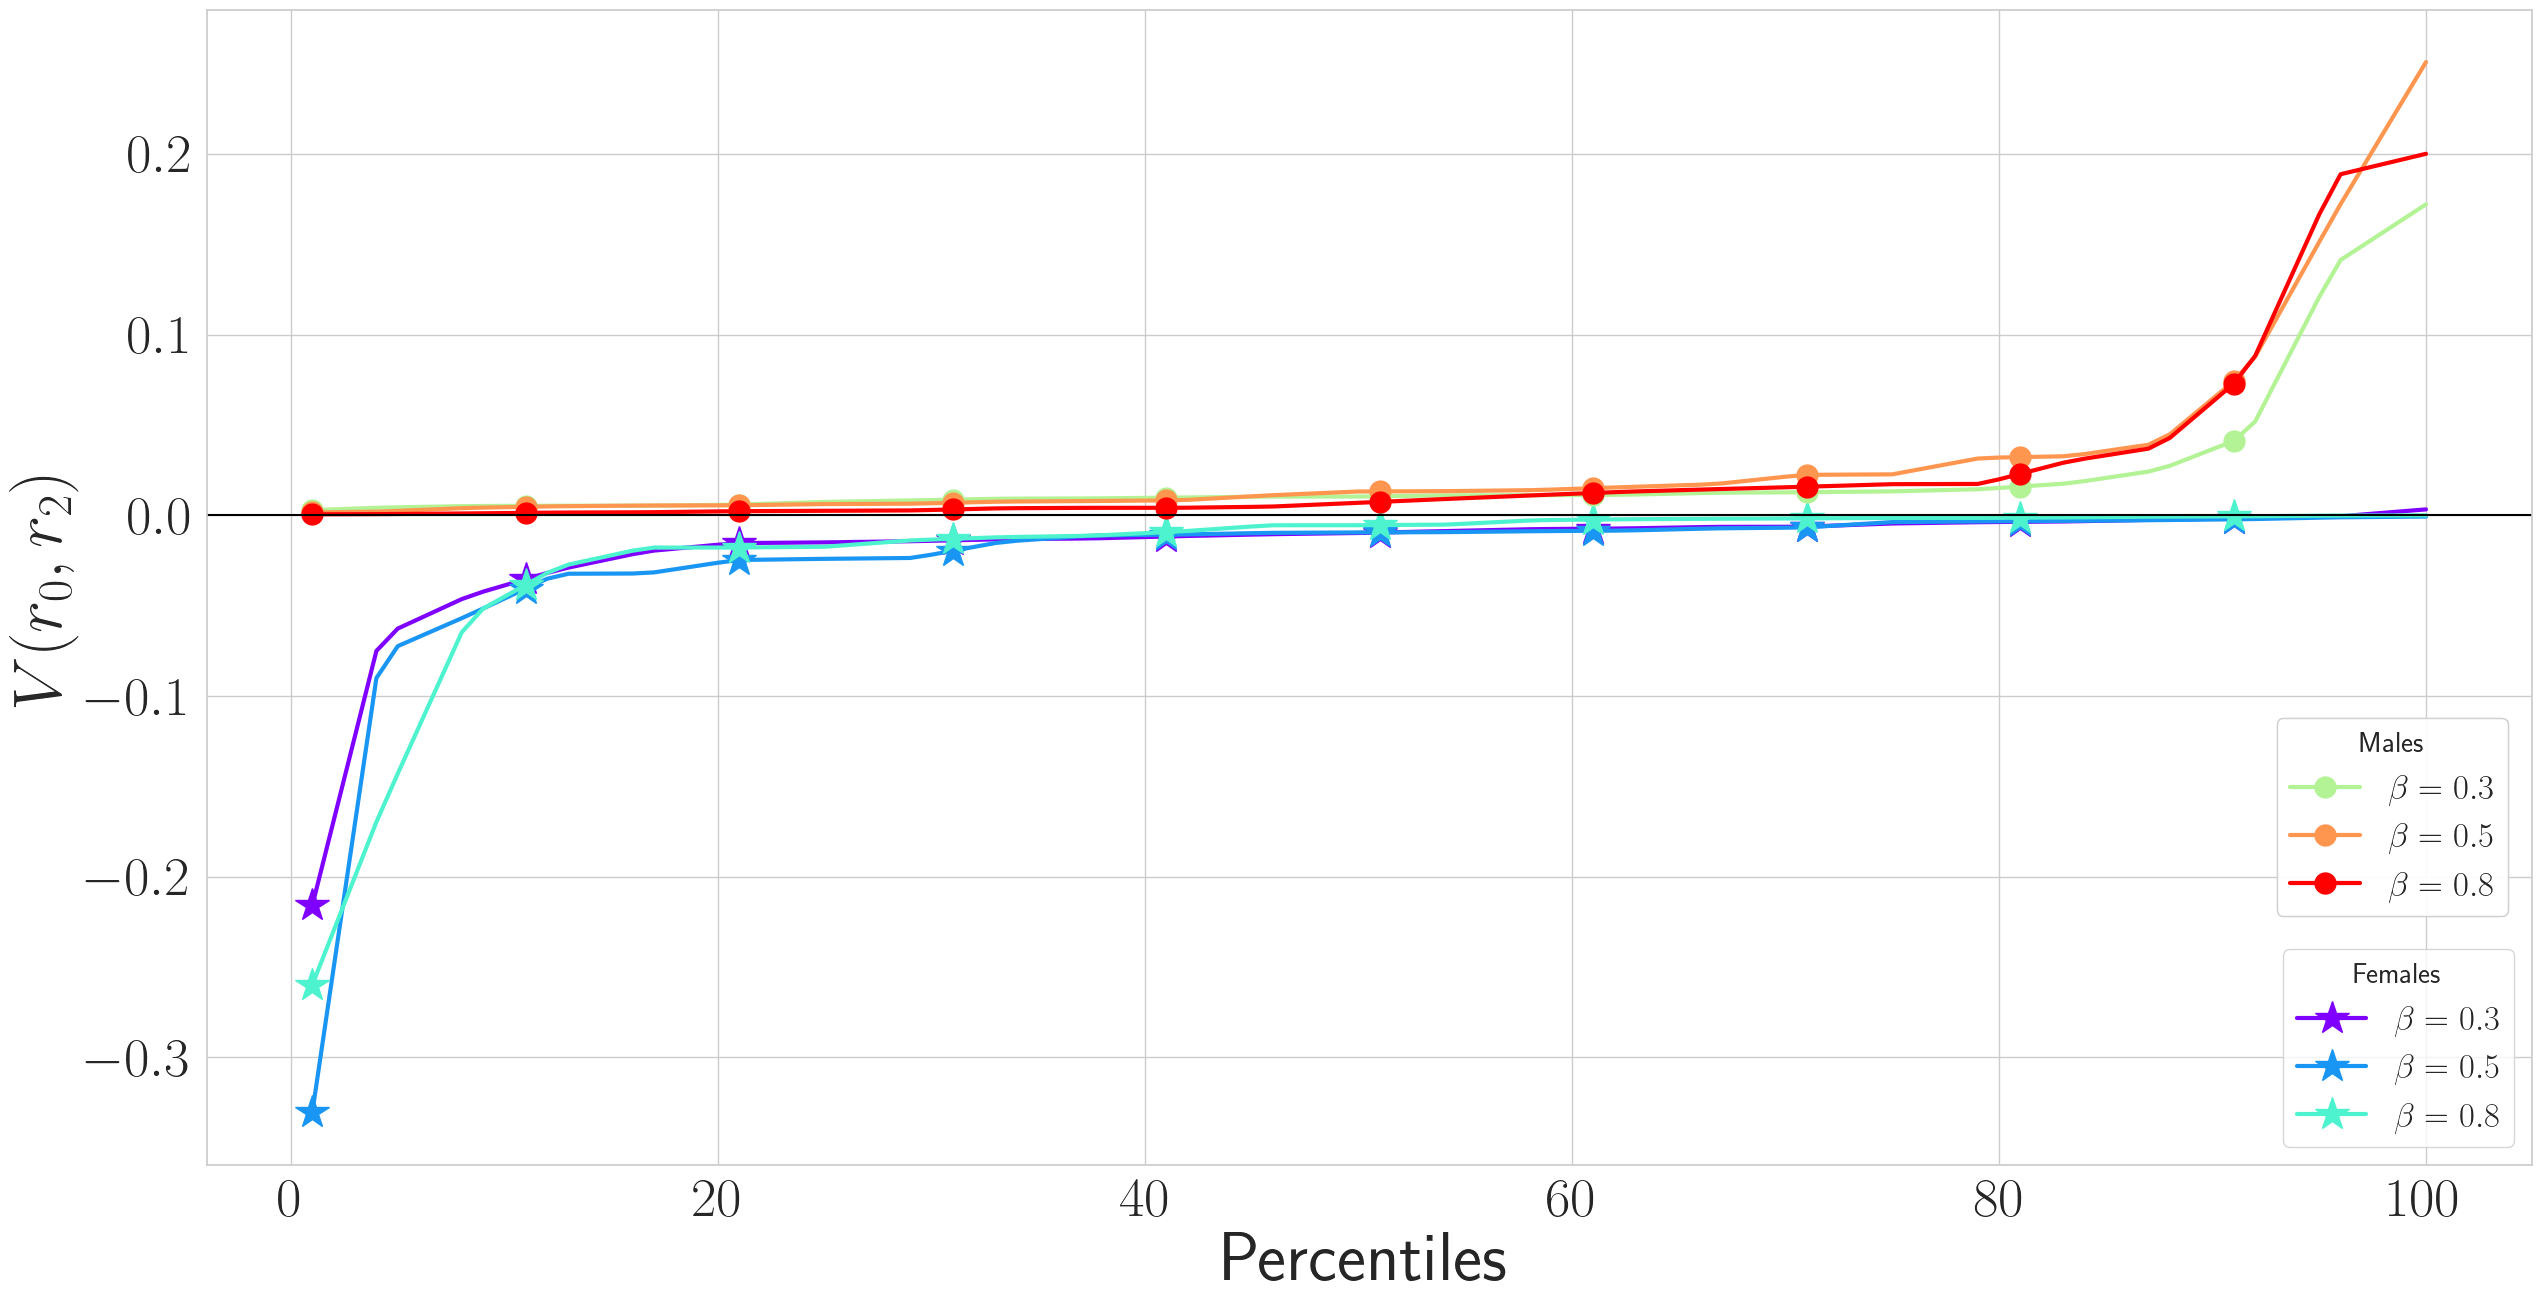

In [23]:
plot_betas_percentiles(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                       V_type, protected_attribute, other_attribute)

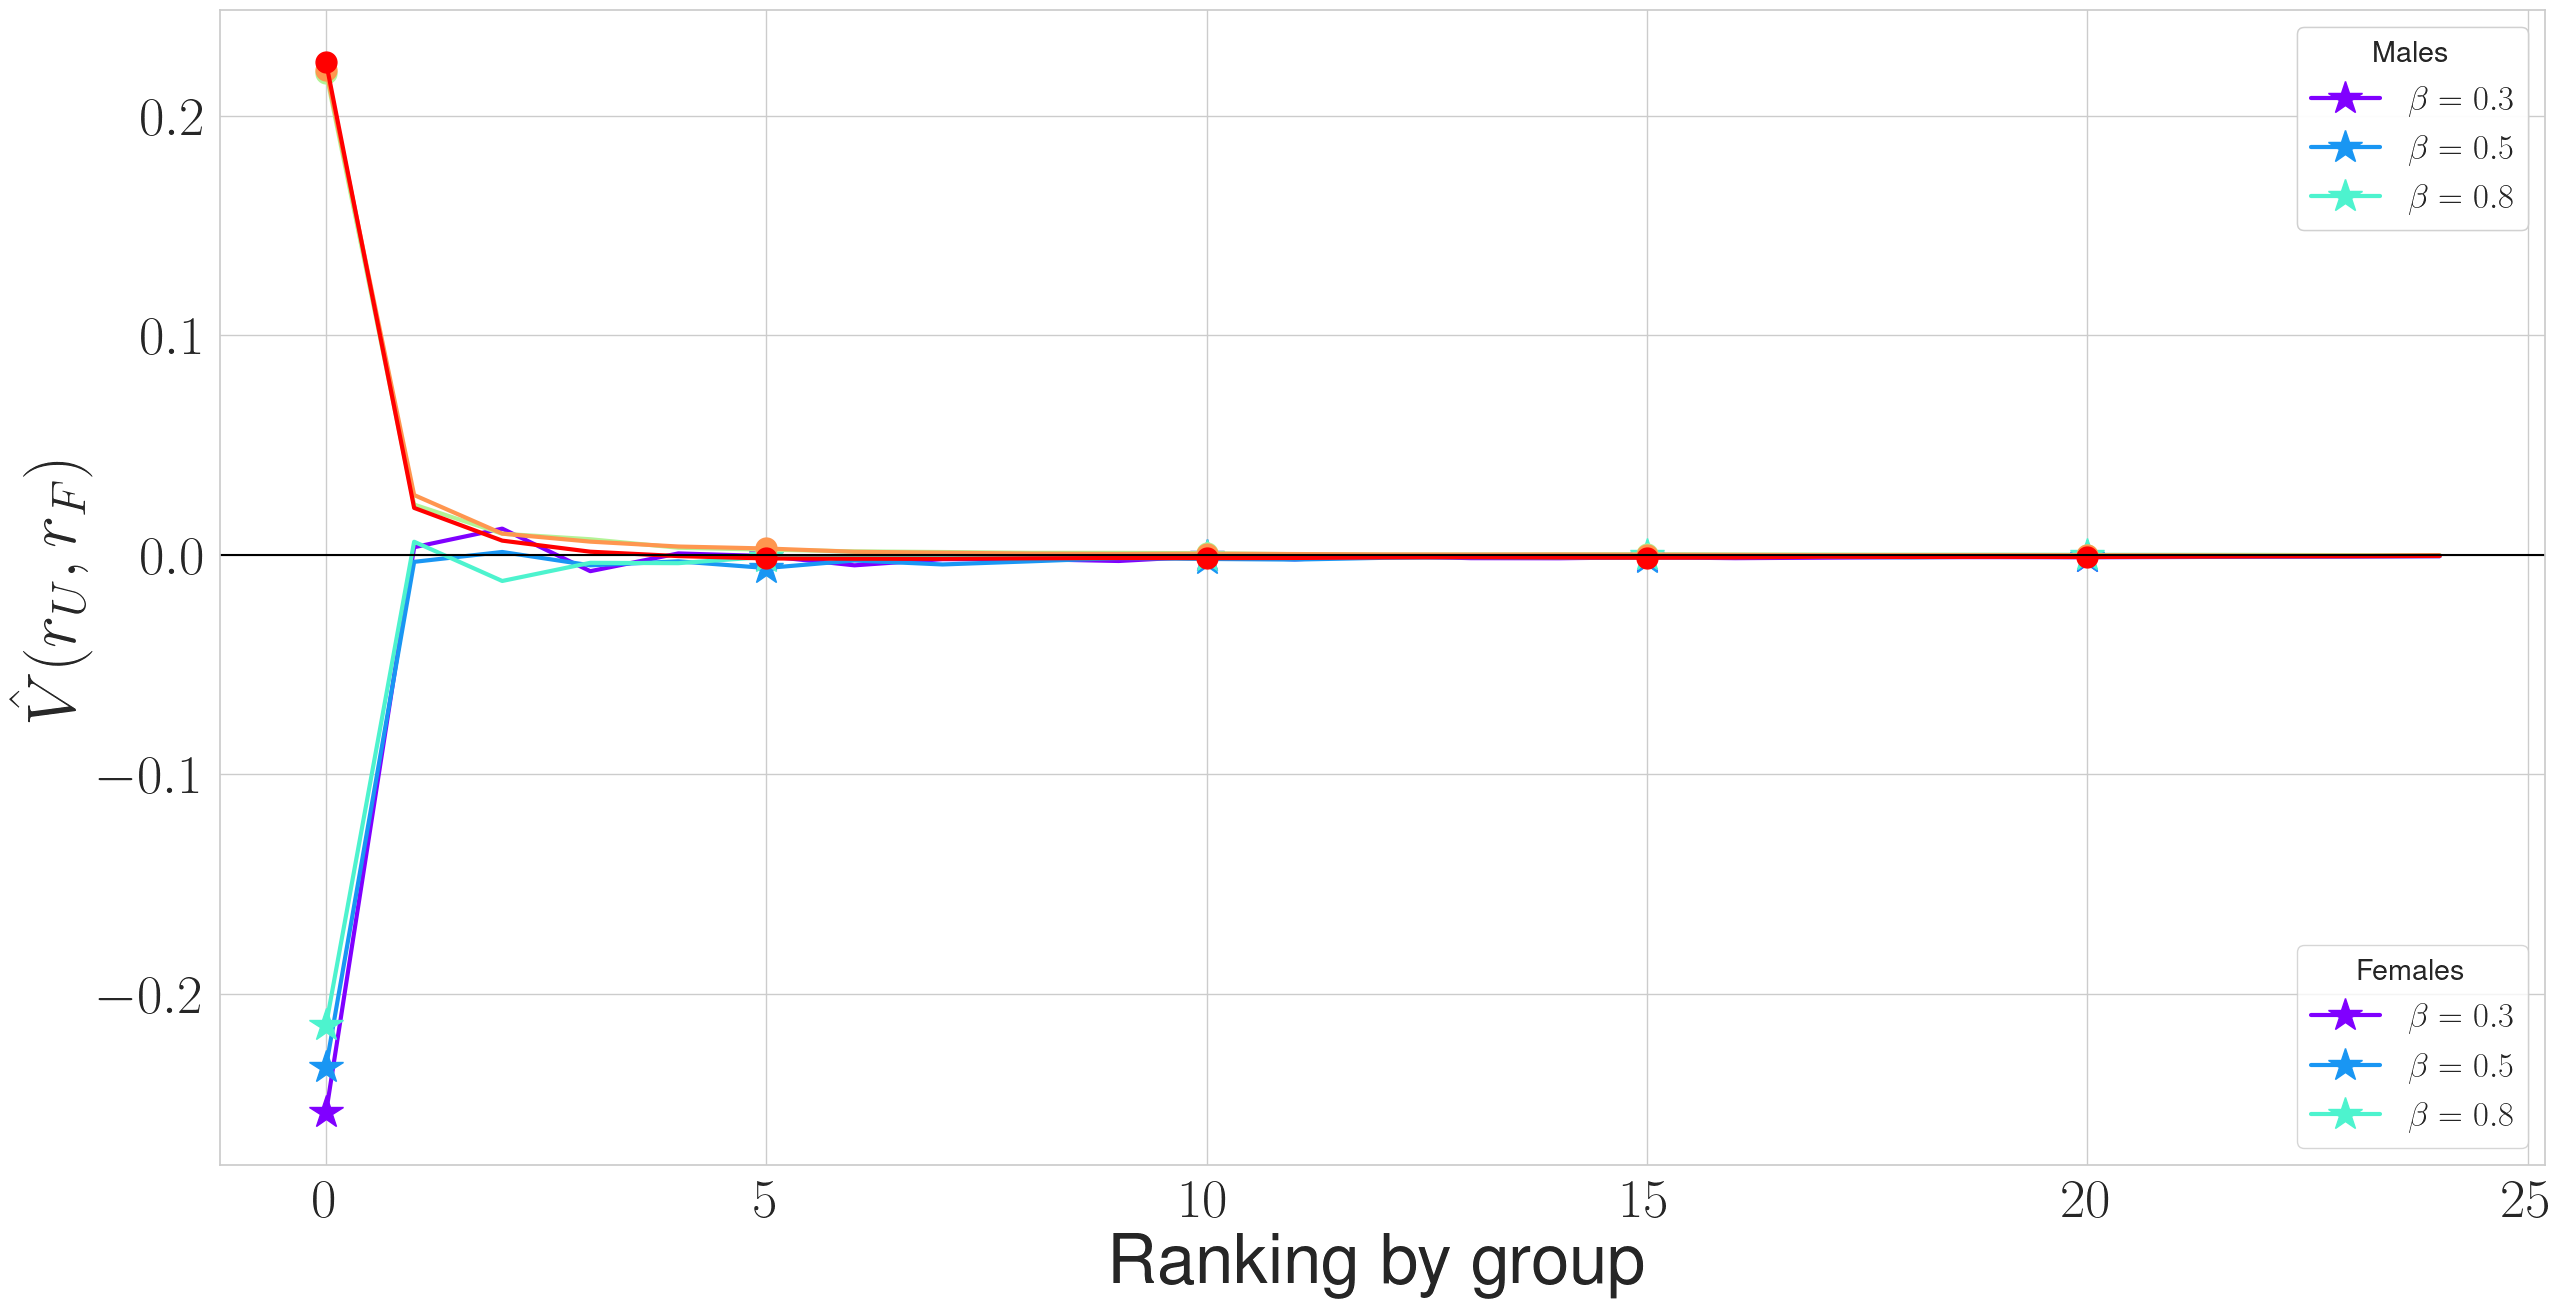

In [32]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute, a_show = 'both', save_plot = True)

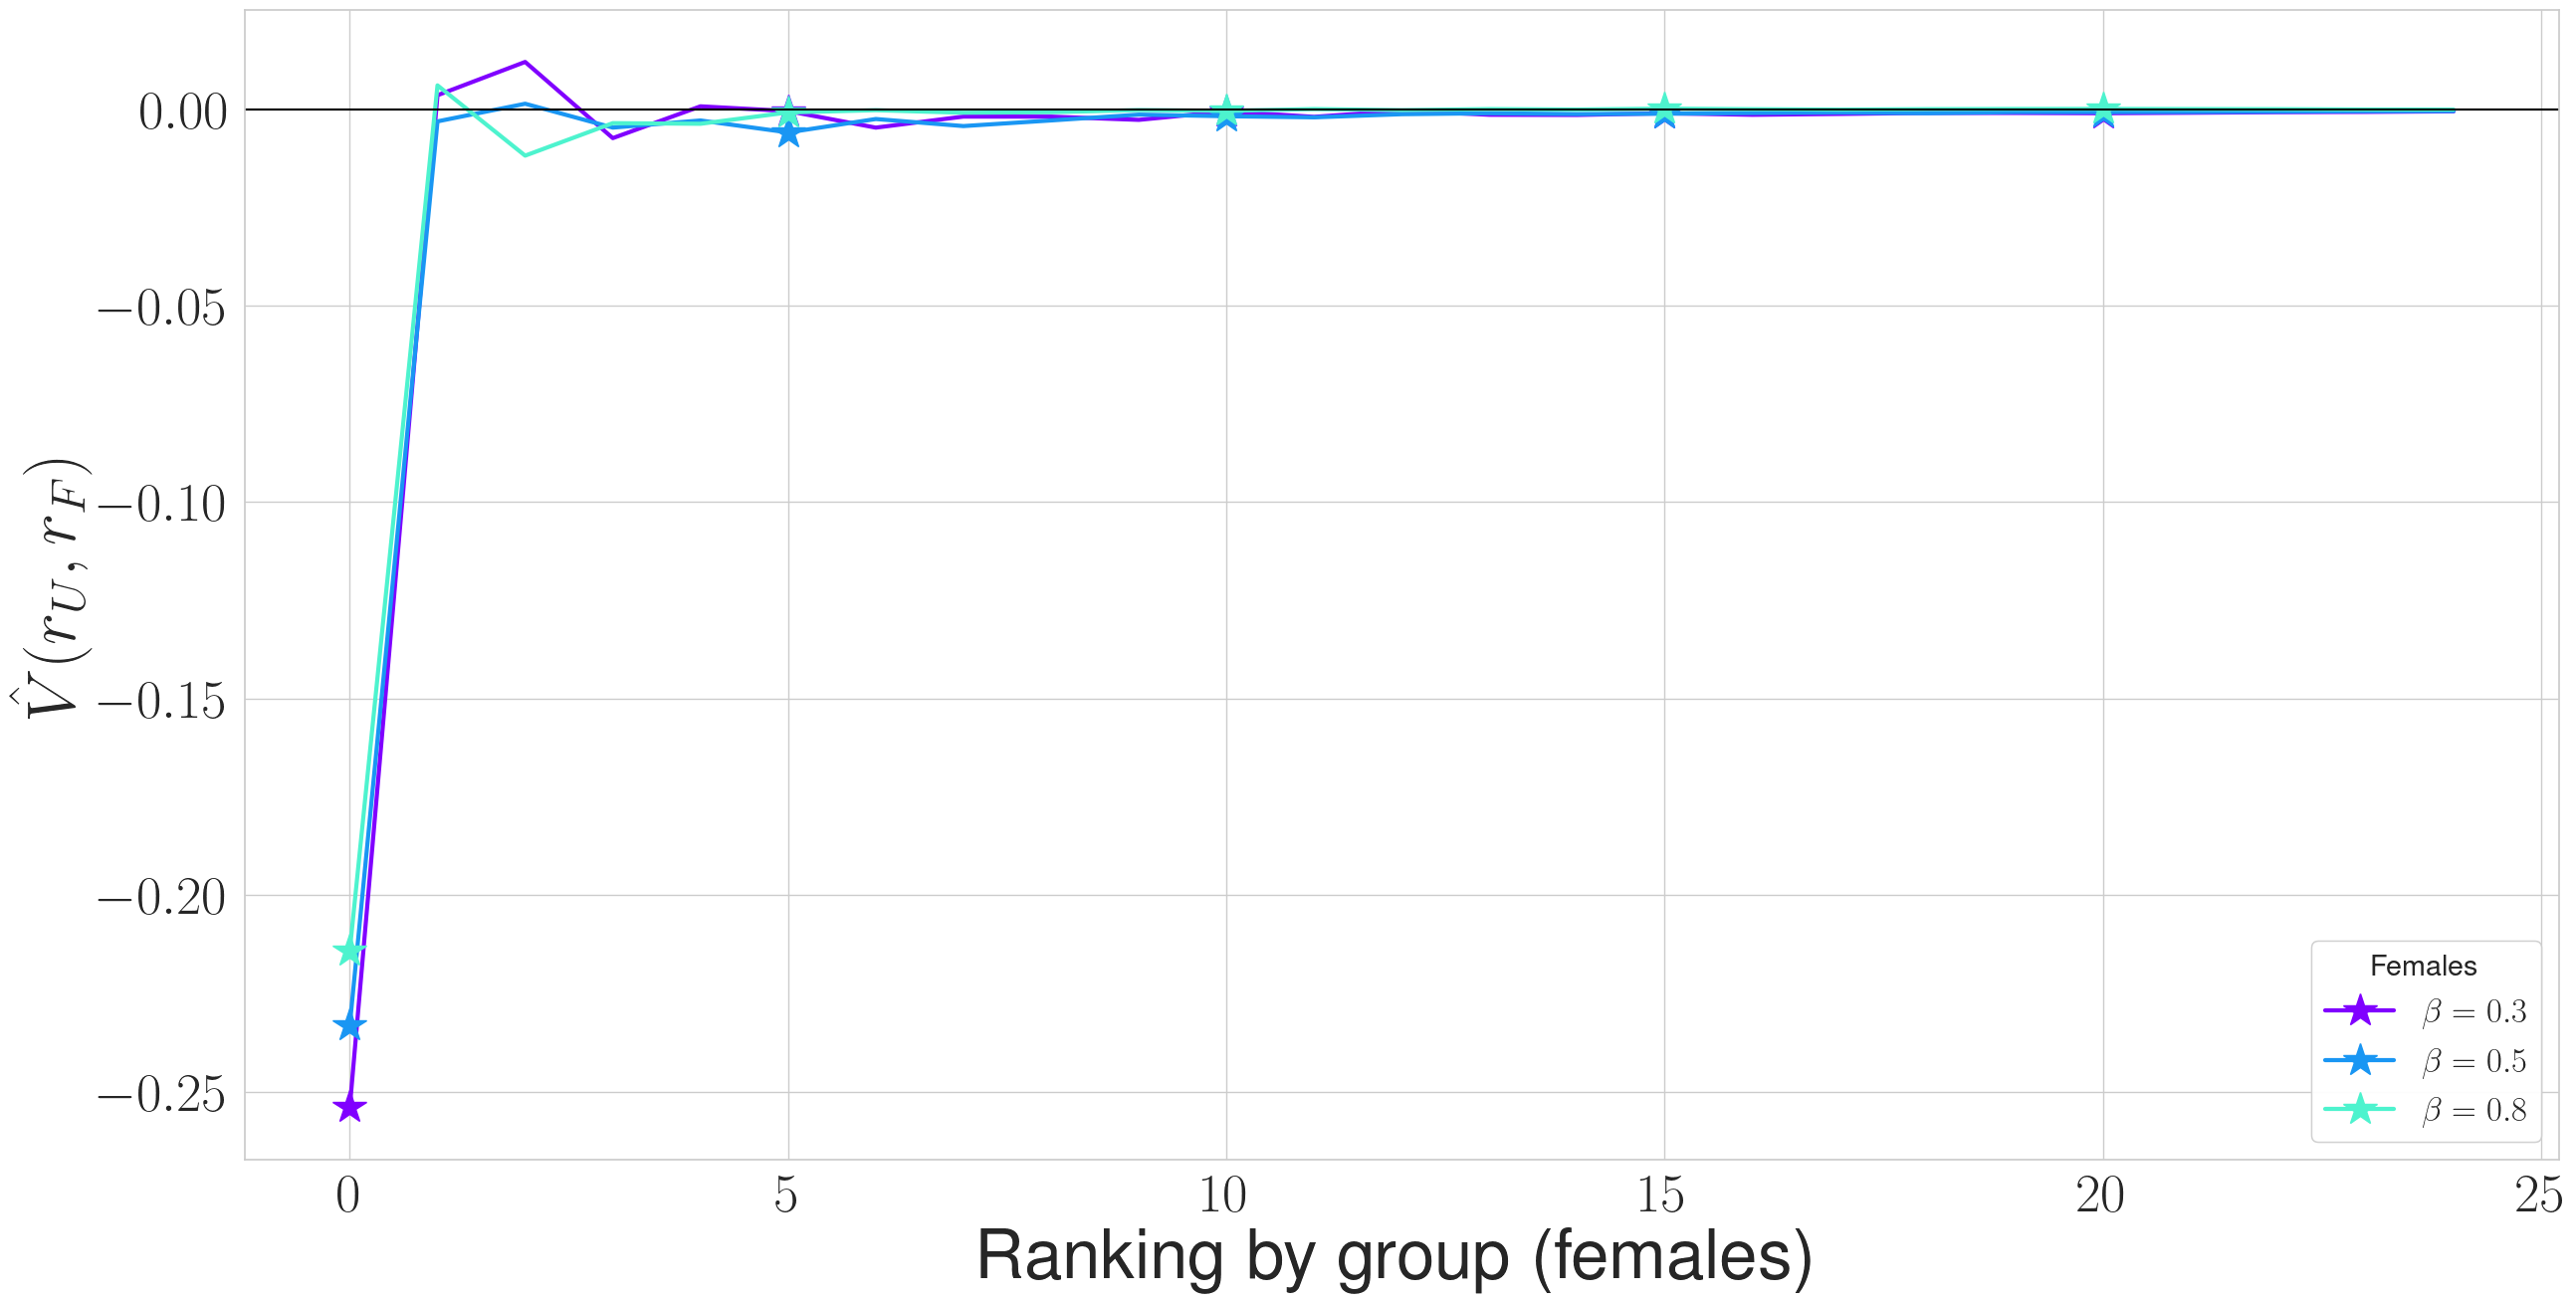

In [33]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute, a_show = 'protected', save_plot=True)

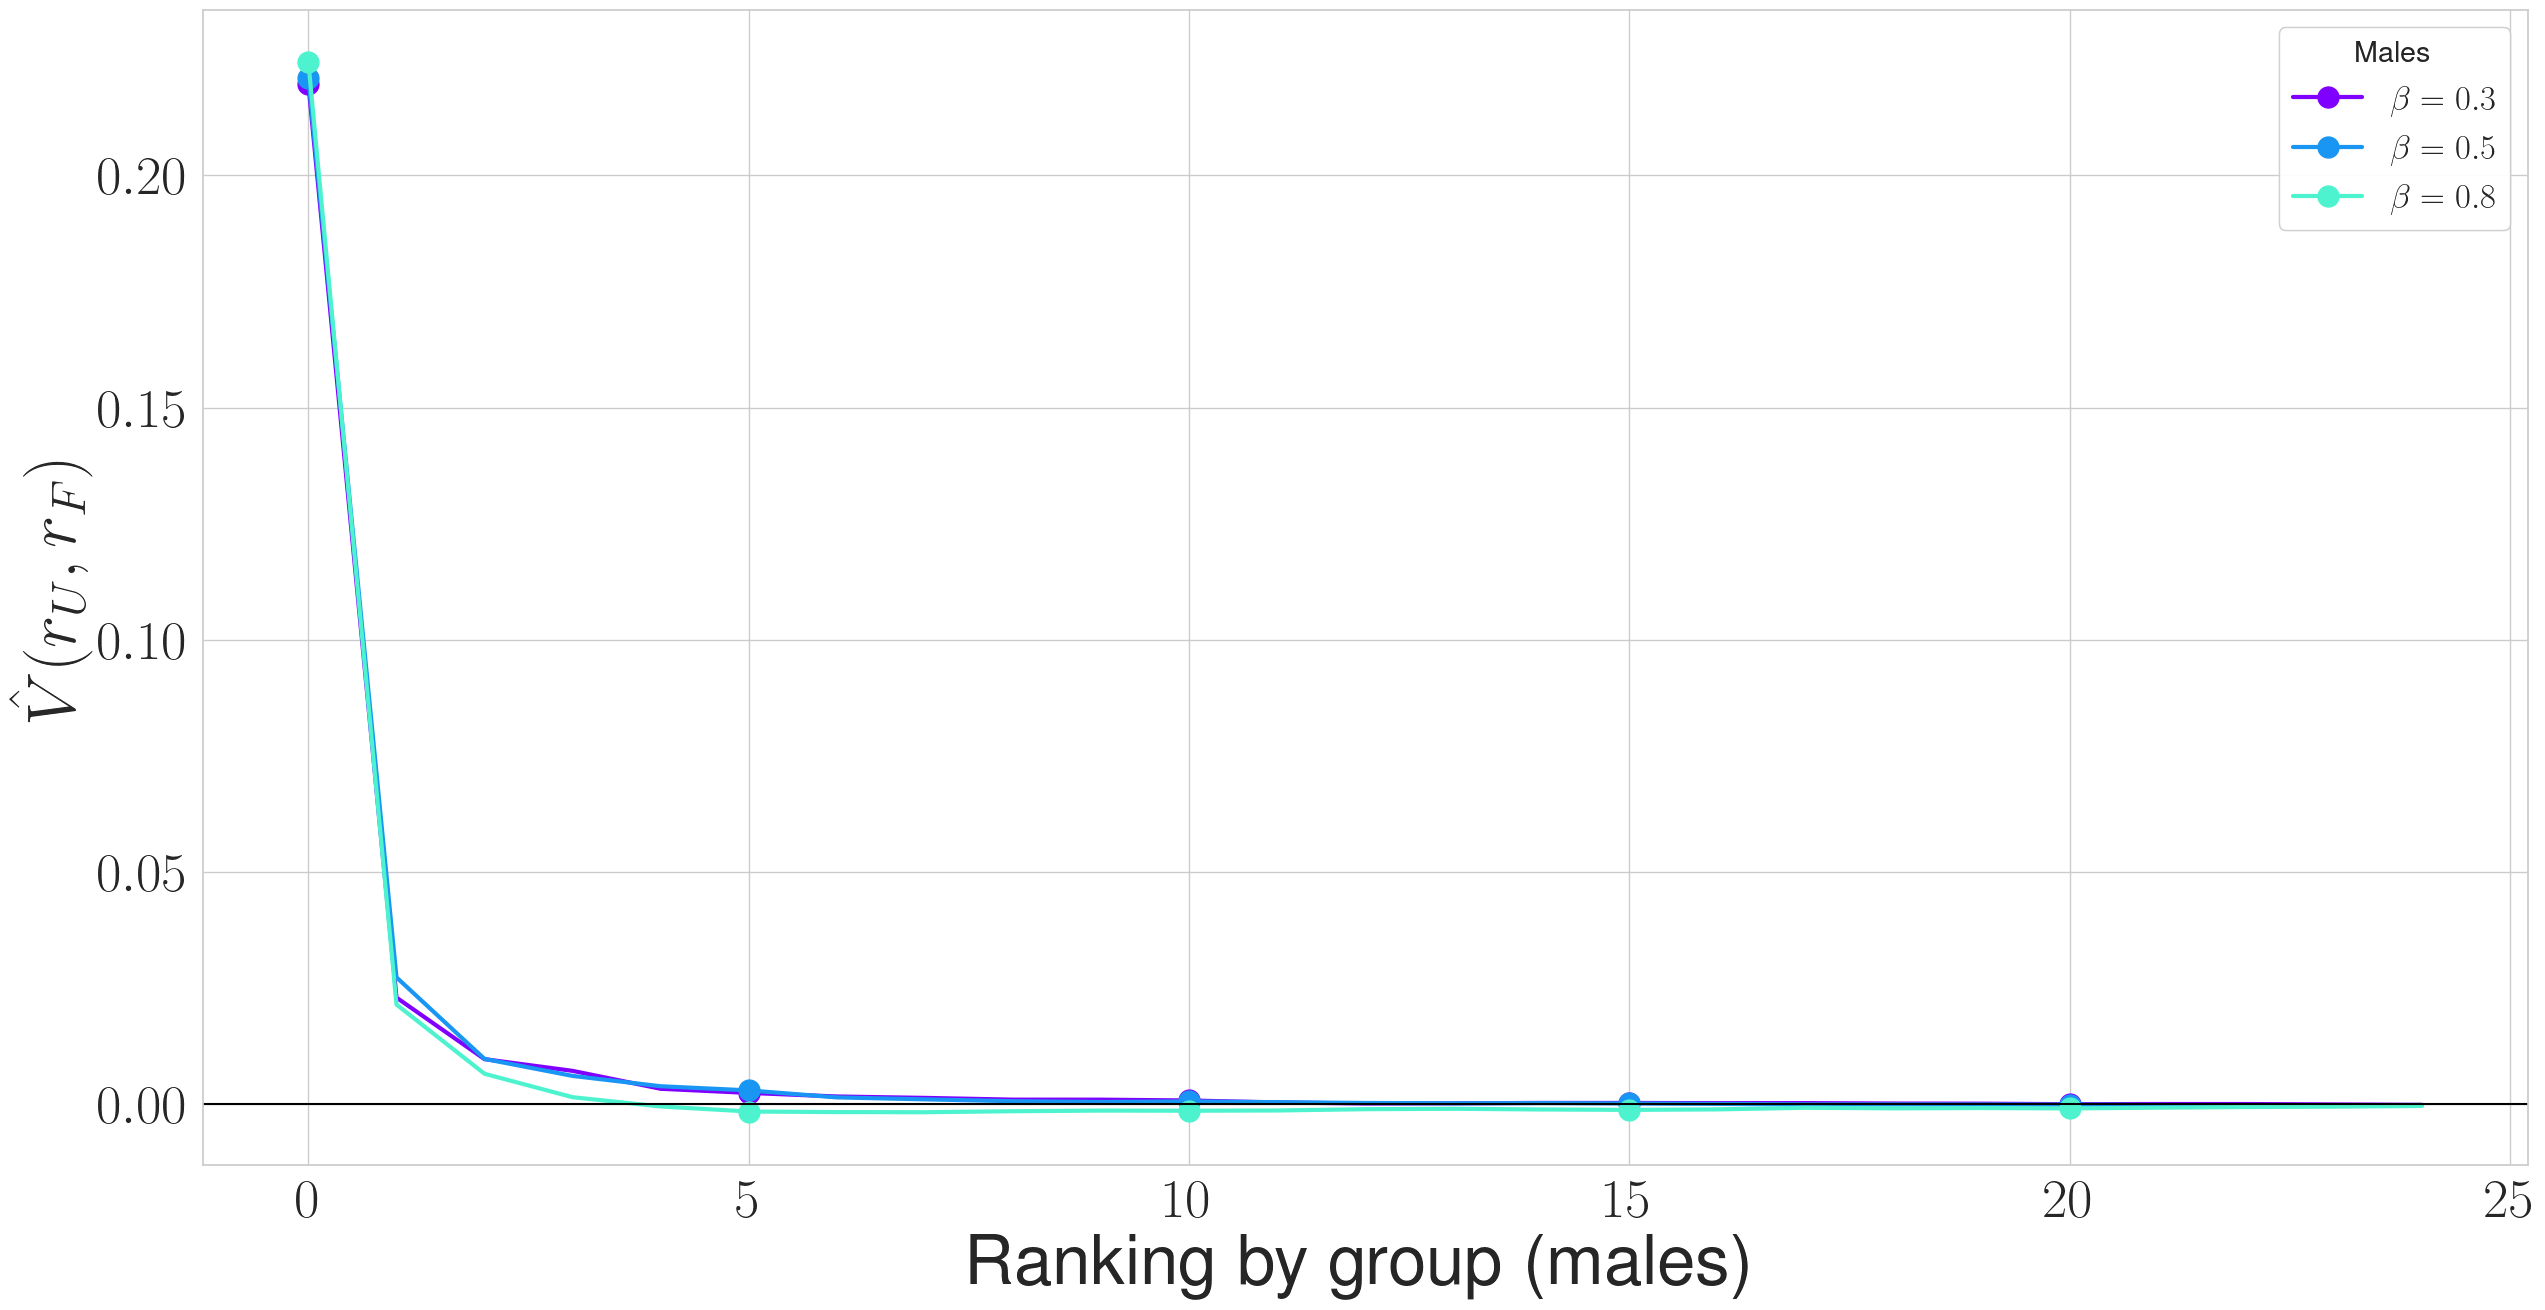

In [34]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute, a_show = 'other', save_plot = True)

## Plot Sum of individual fairness in a ranking for different betas, women and men divided 

In [35]:
np.random.seed(1337)
n = 500
N = 100
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
betas = np.arange(0.1, 1, 0.1)
#betas = np.array([0.3, 0.5, 0.8])
V_type = 'V_disc'

In [36]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, alpha = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  distribution=distribution, betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 9/9 [01:13<00:00,  8.19s/it]

0.5


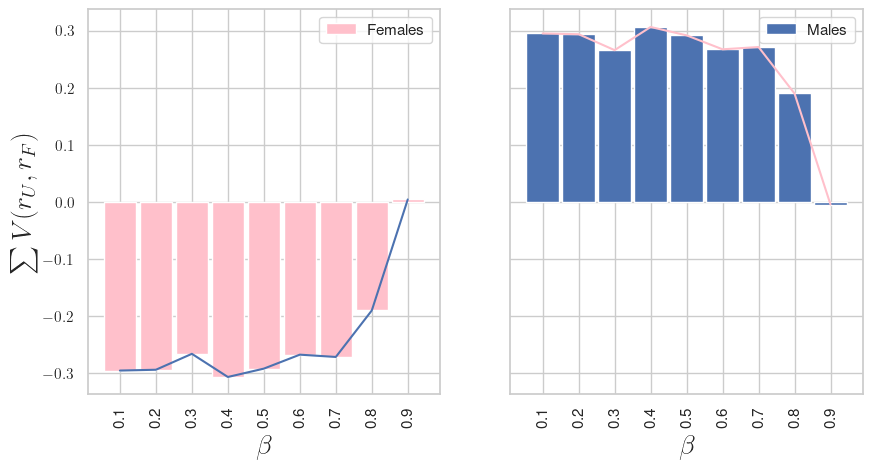

In [37]:
plot_betas_sum(individual_fair_r2r0_f, individual_fair_r2r0_m, proportion_F[0], betas, V_type, save_plot = True)

# Difference between the individual unfairness PB (Normalized)

#### If the difference between the two individual unfairnesses is negative it means that women have not recovered all the bias respect to the original ranking. If it is positve or equal to zero, they have.

In [17]:
n = 10
N = 100
proportion_F = np.arange(0.1, 1.1, 0.2)
#proportion_F = np.array([0.1])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
betas = np.arange(0.1, 1.0, 0.2)
#betas = np.array([0.2, 0.5, 0.8])
V_type = 'V_disc_norm'

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.31it/s]


Proportion of Women: 0.1


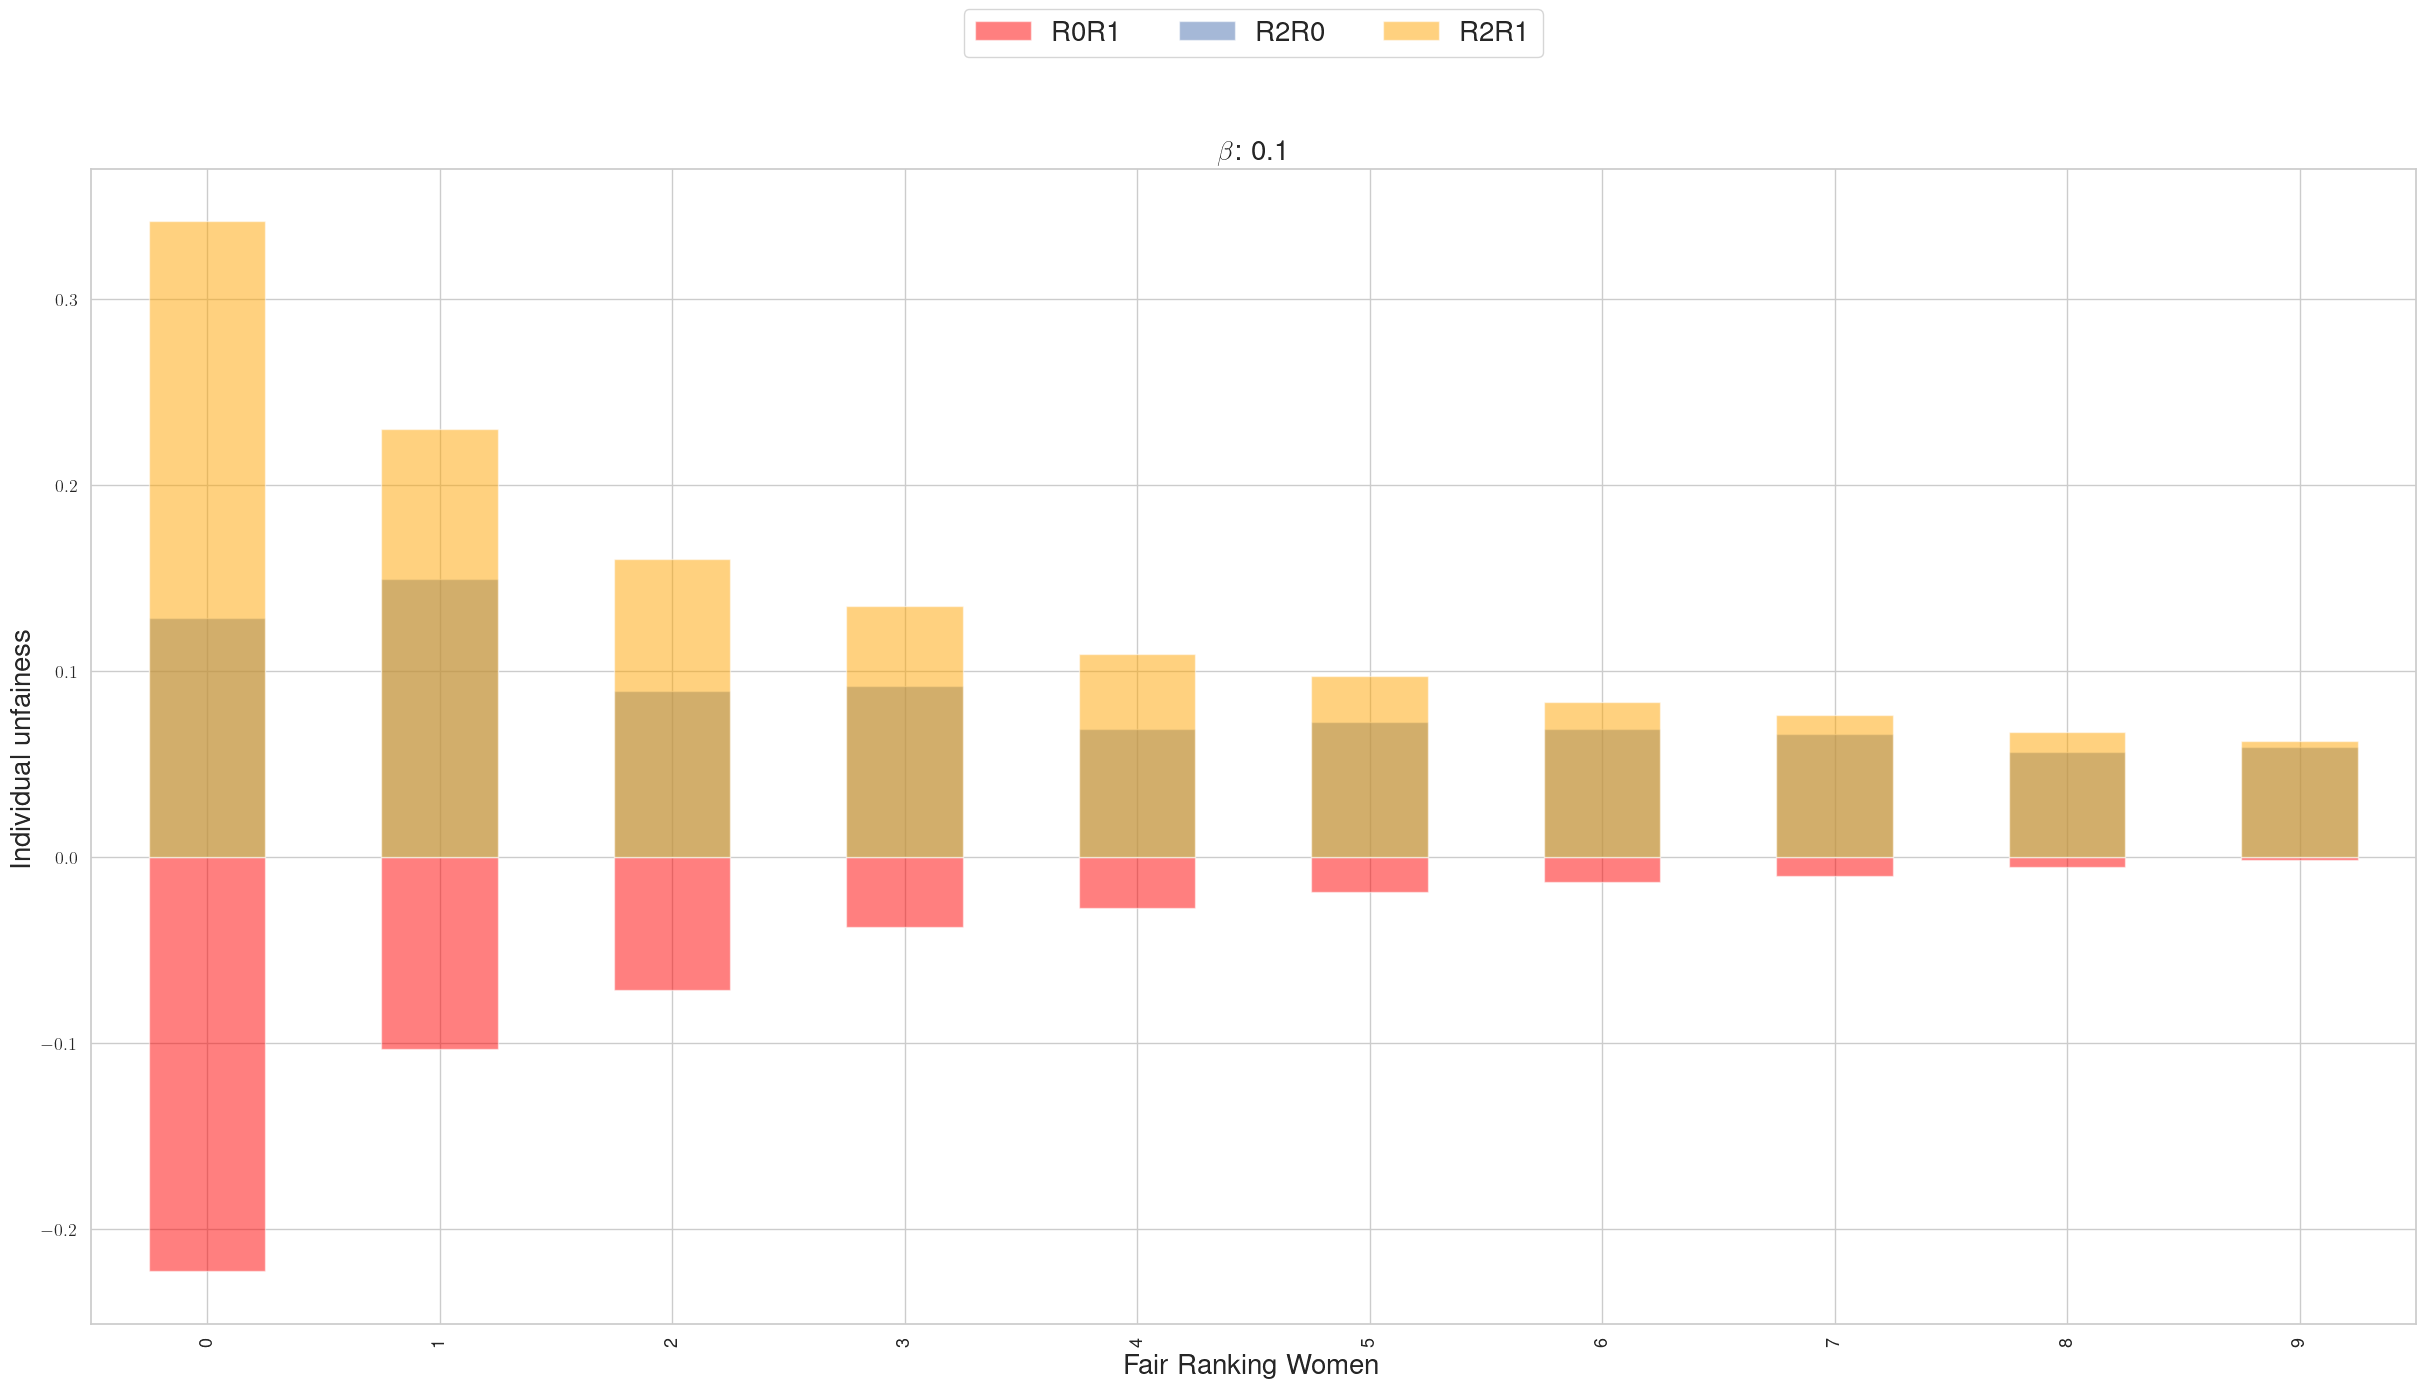

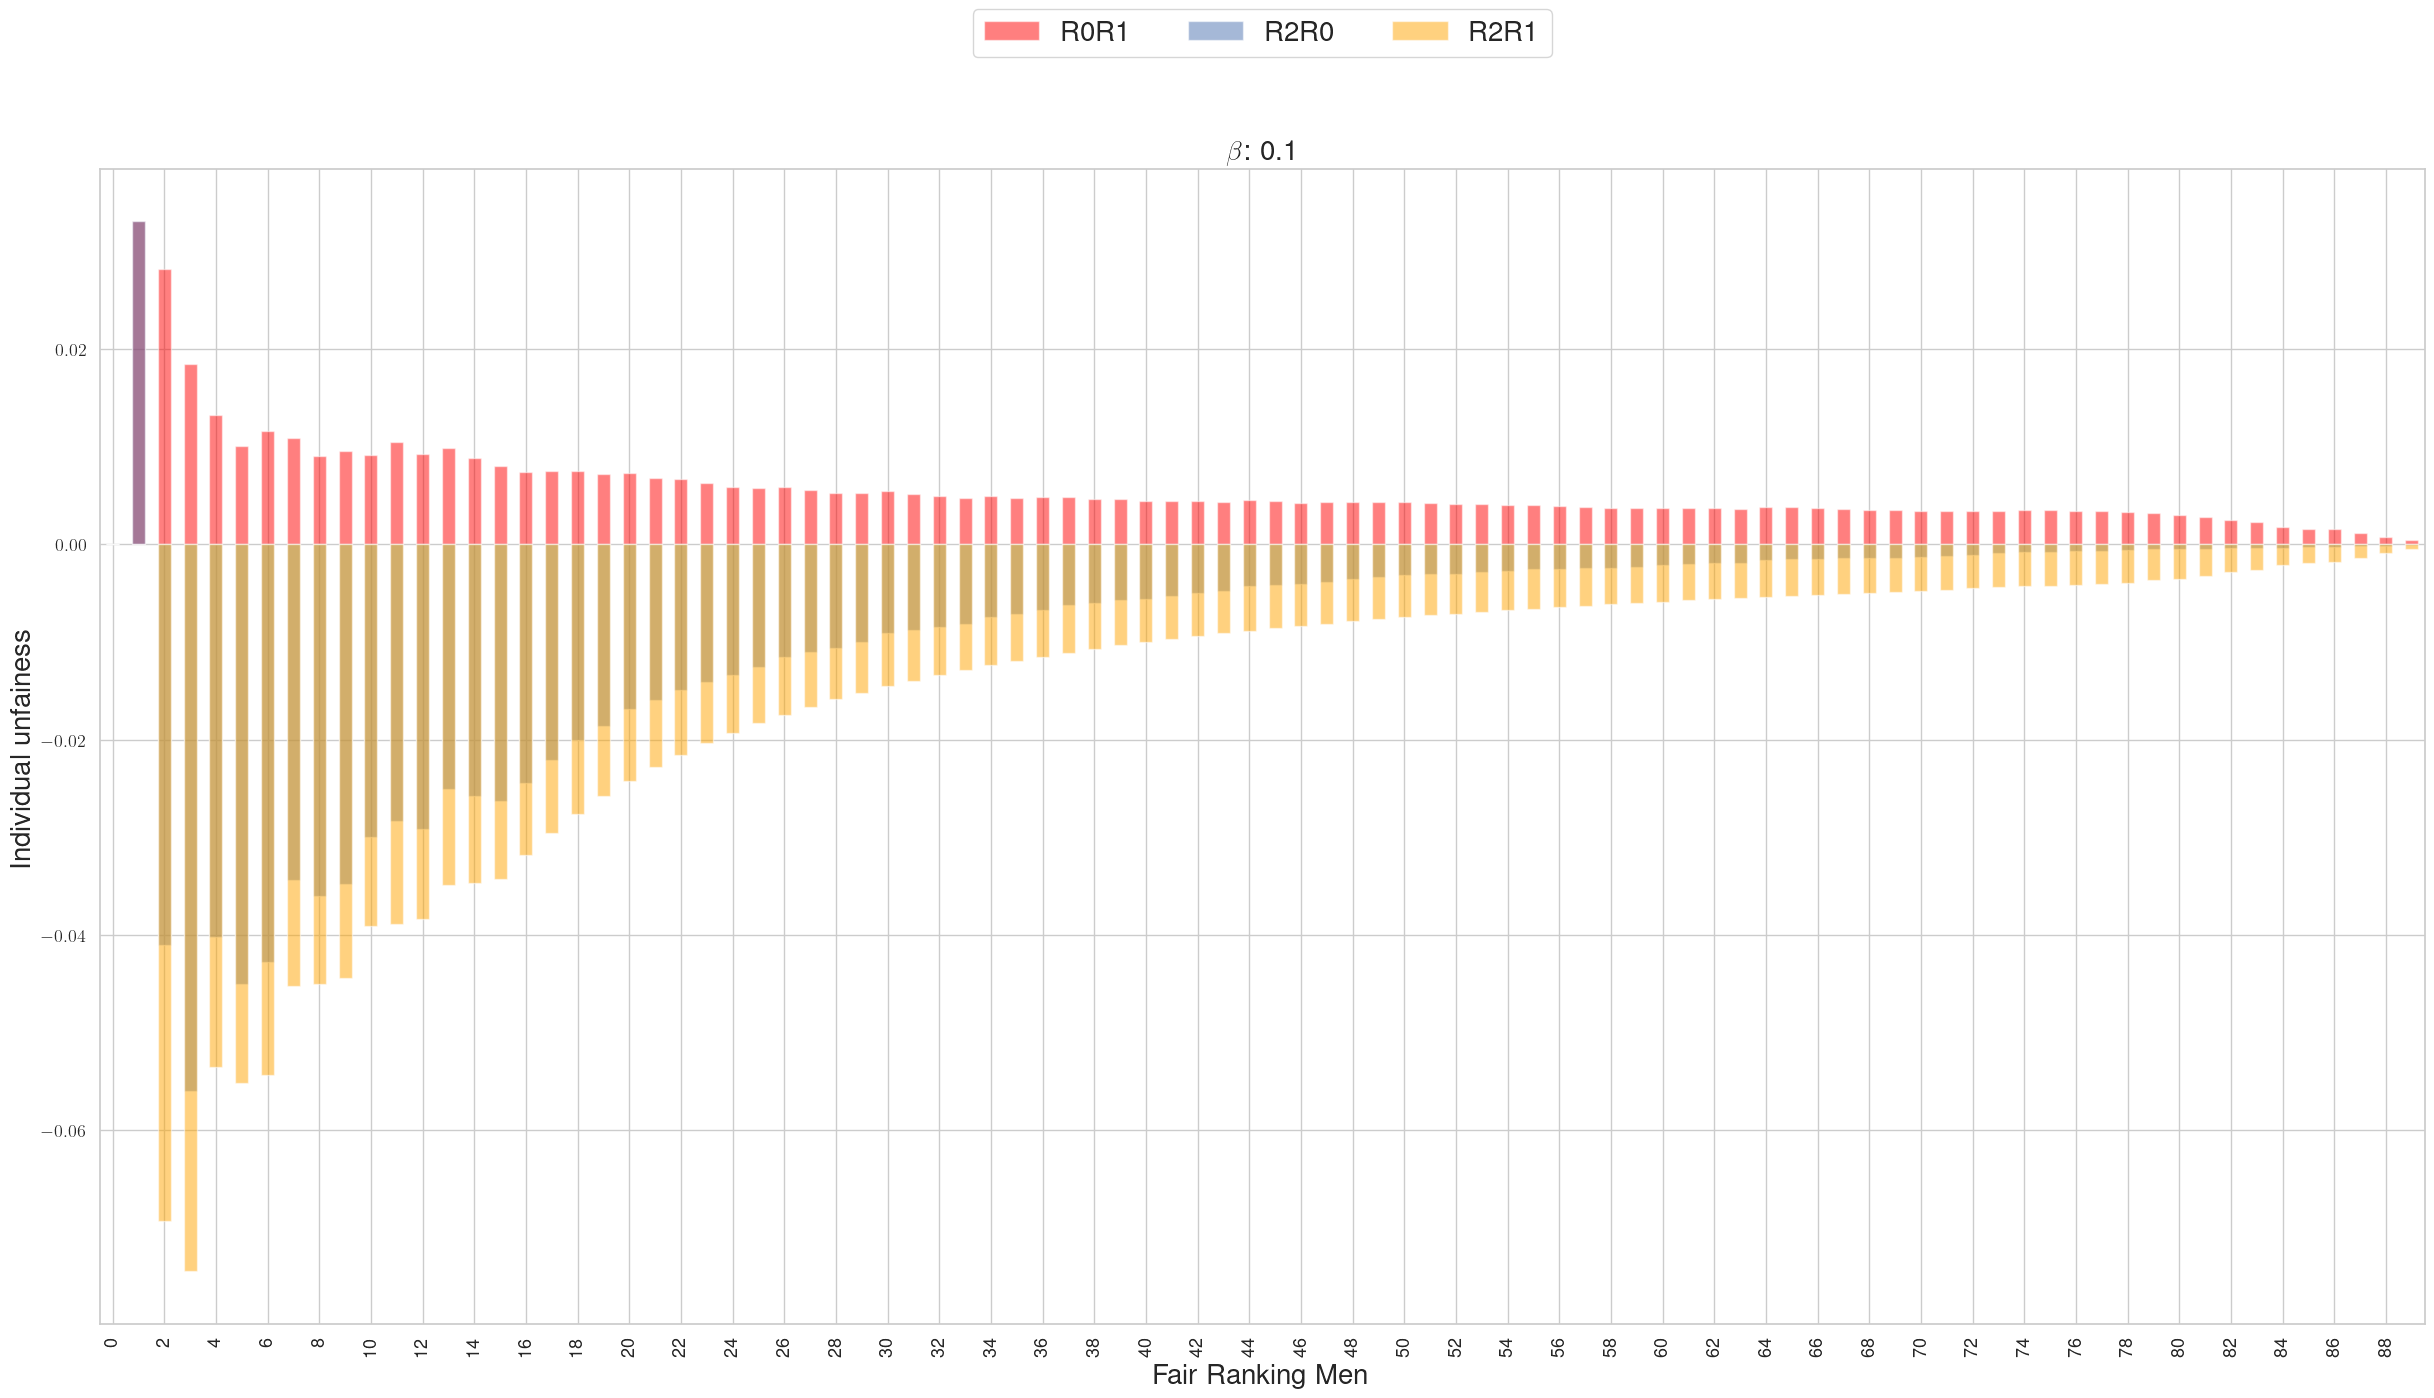

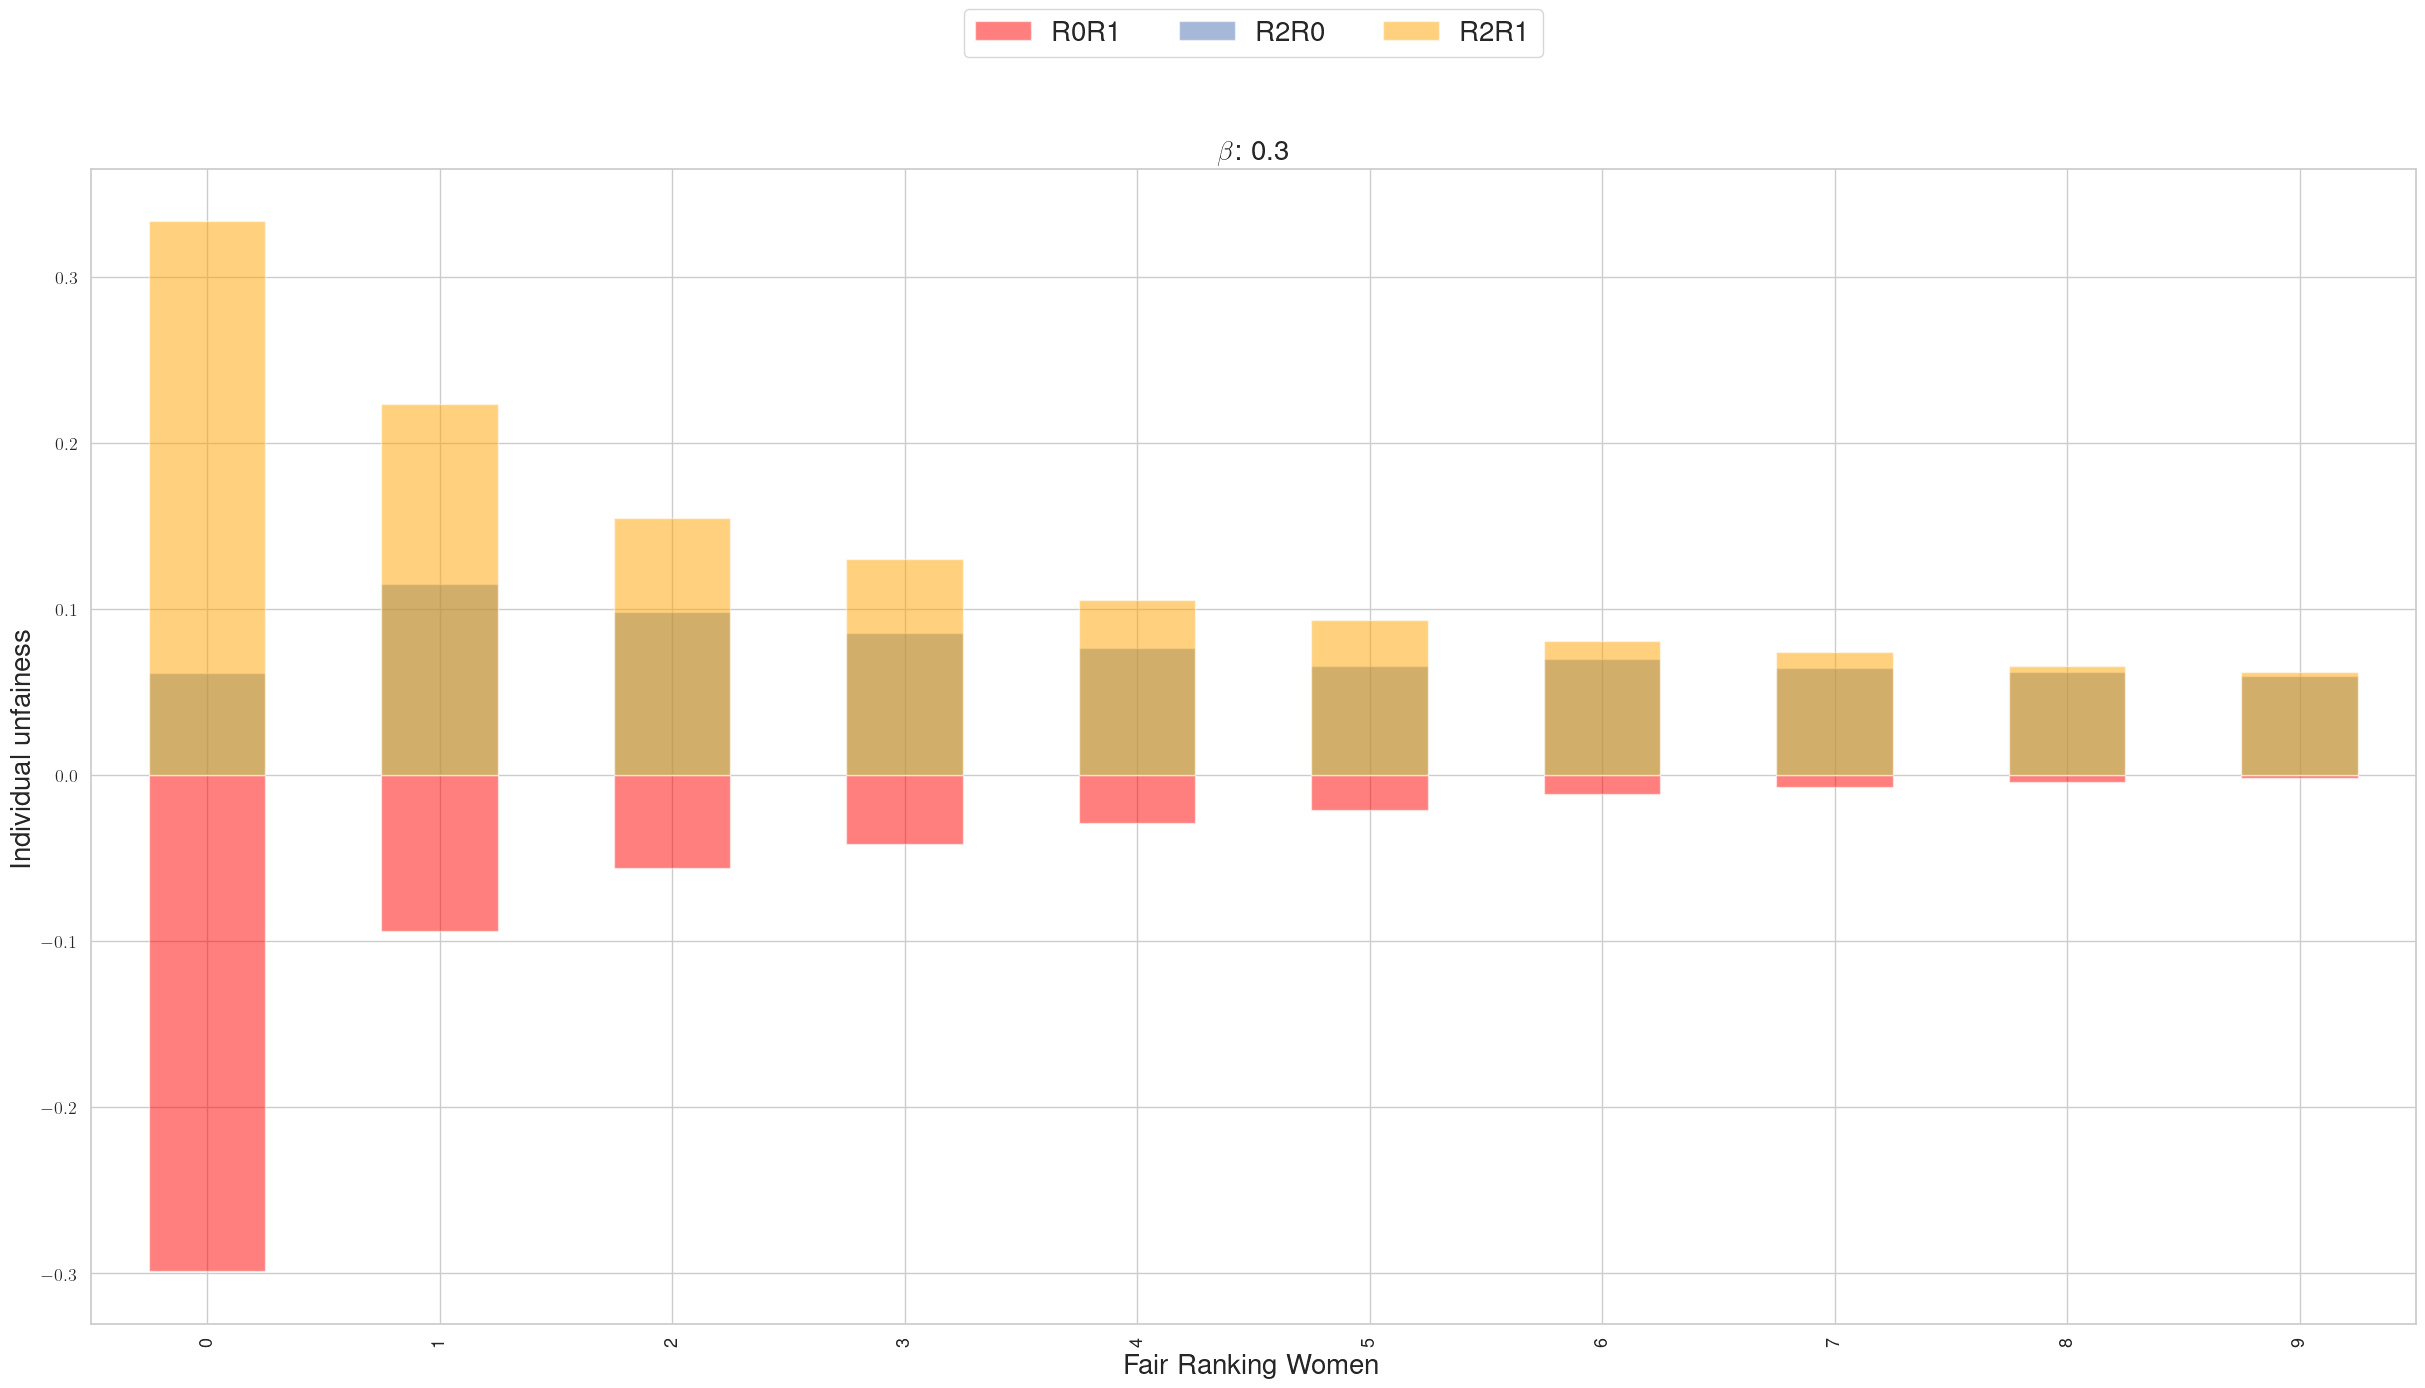

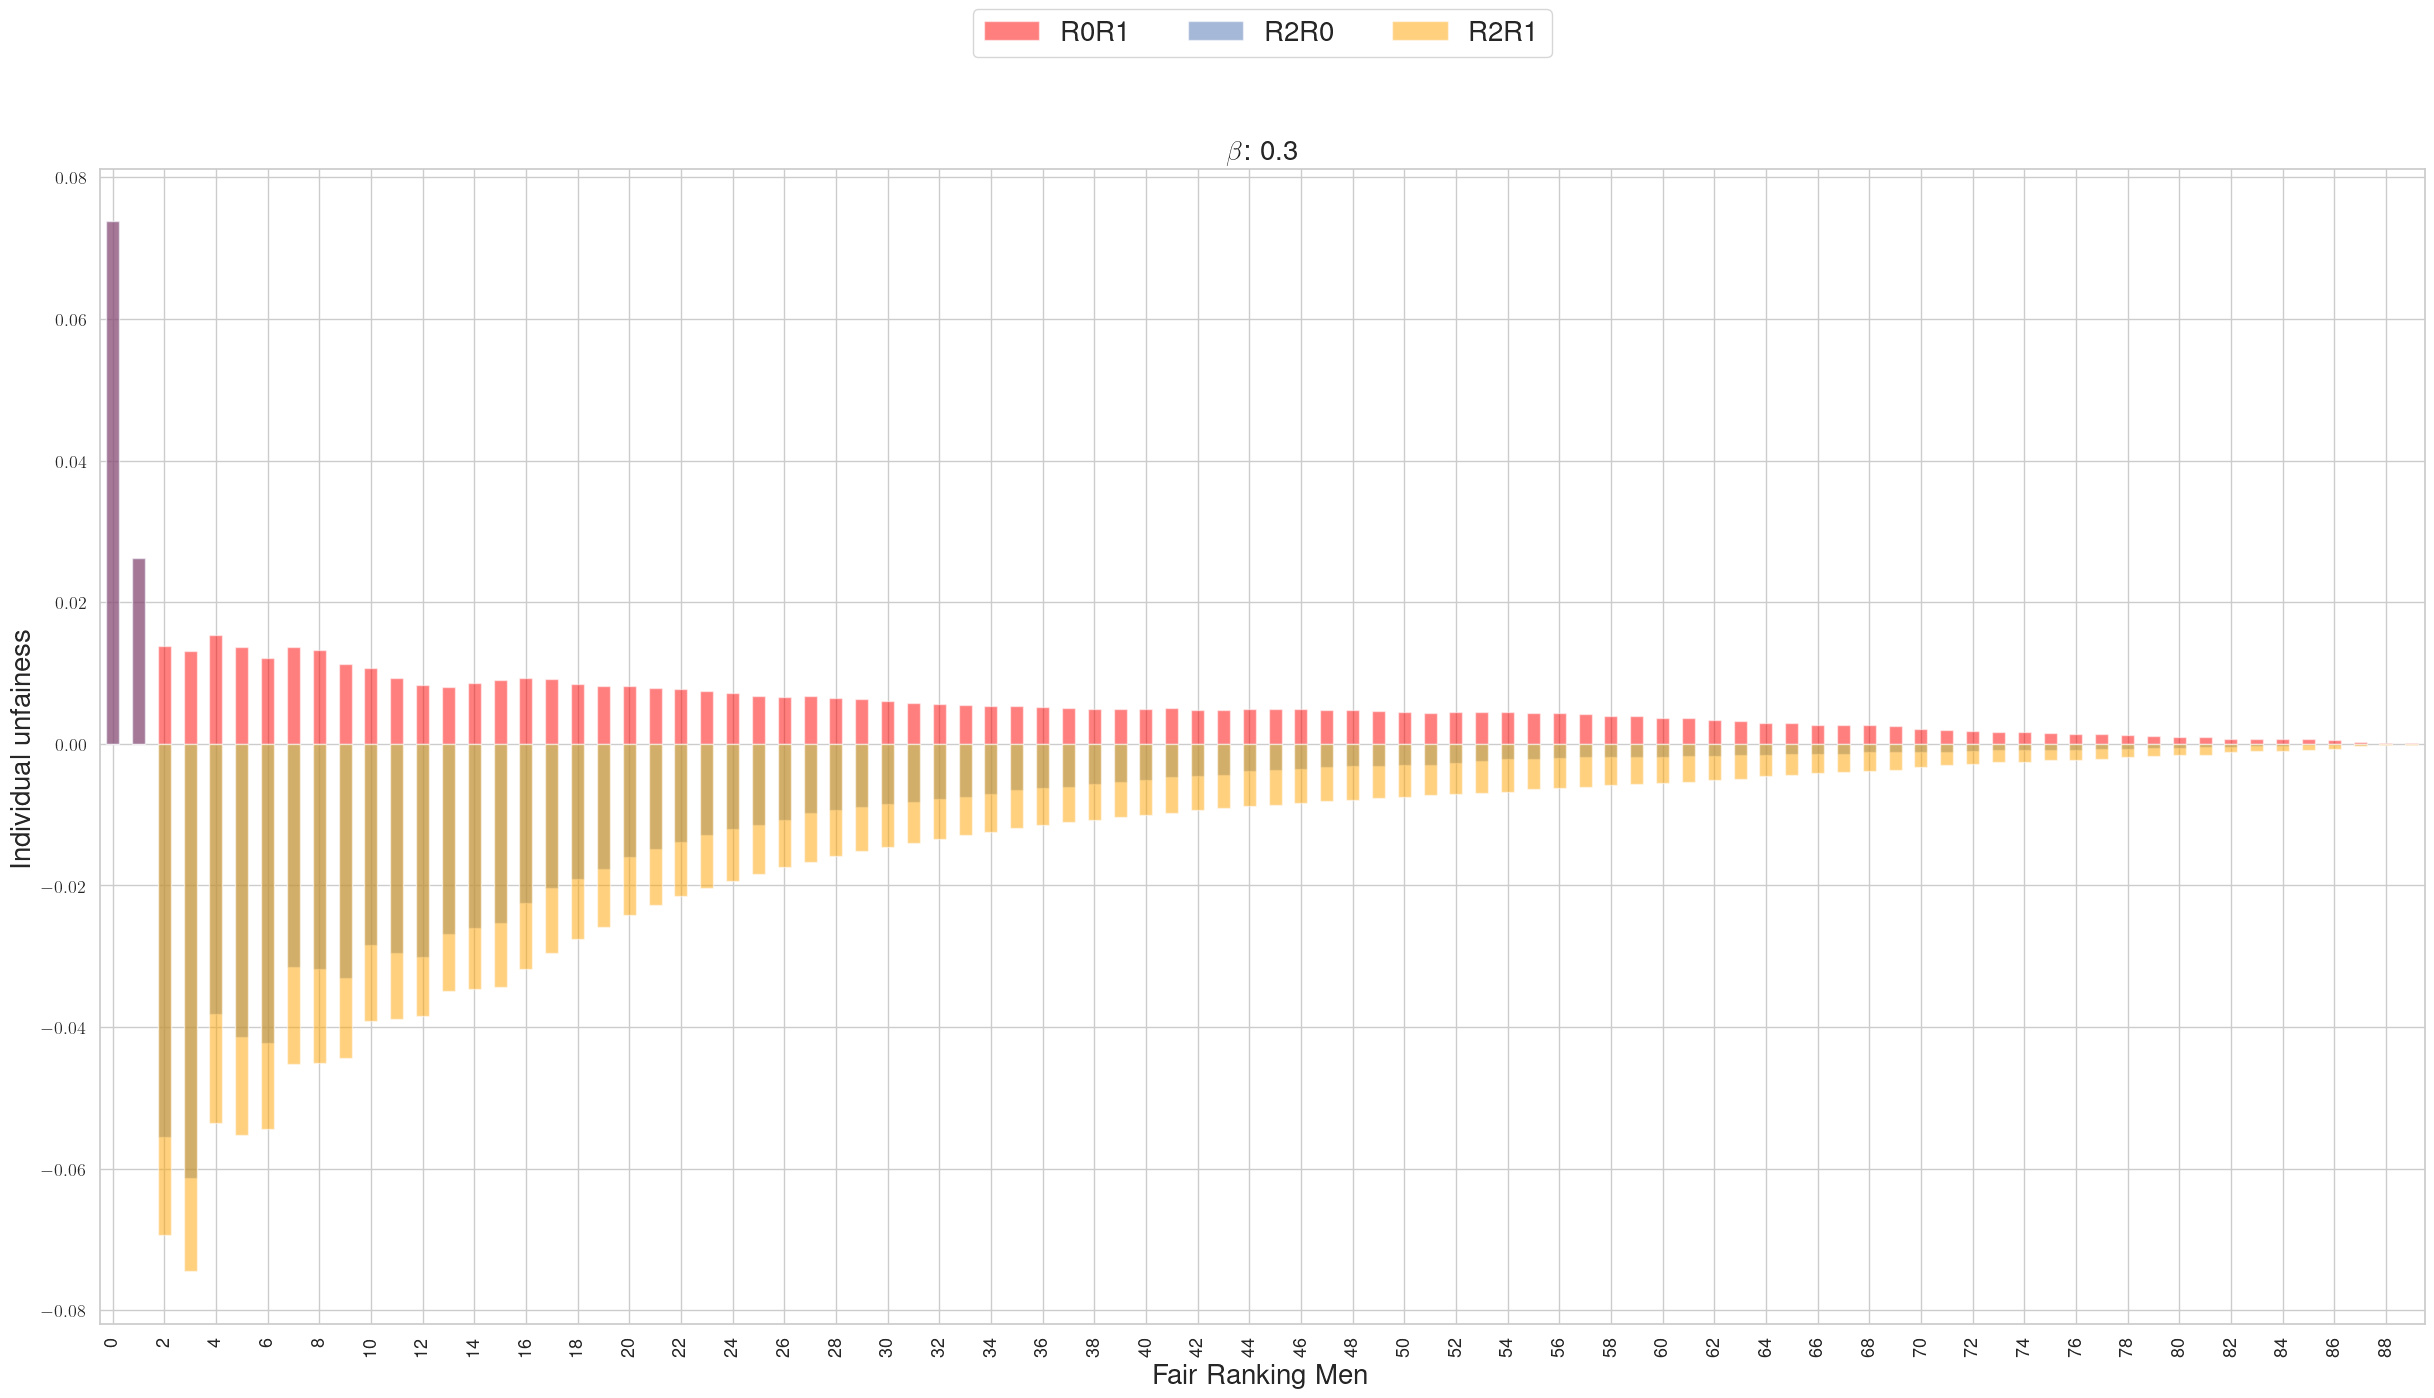

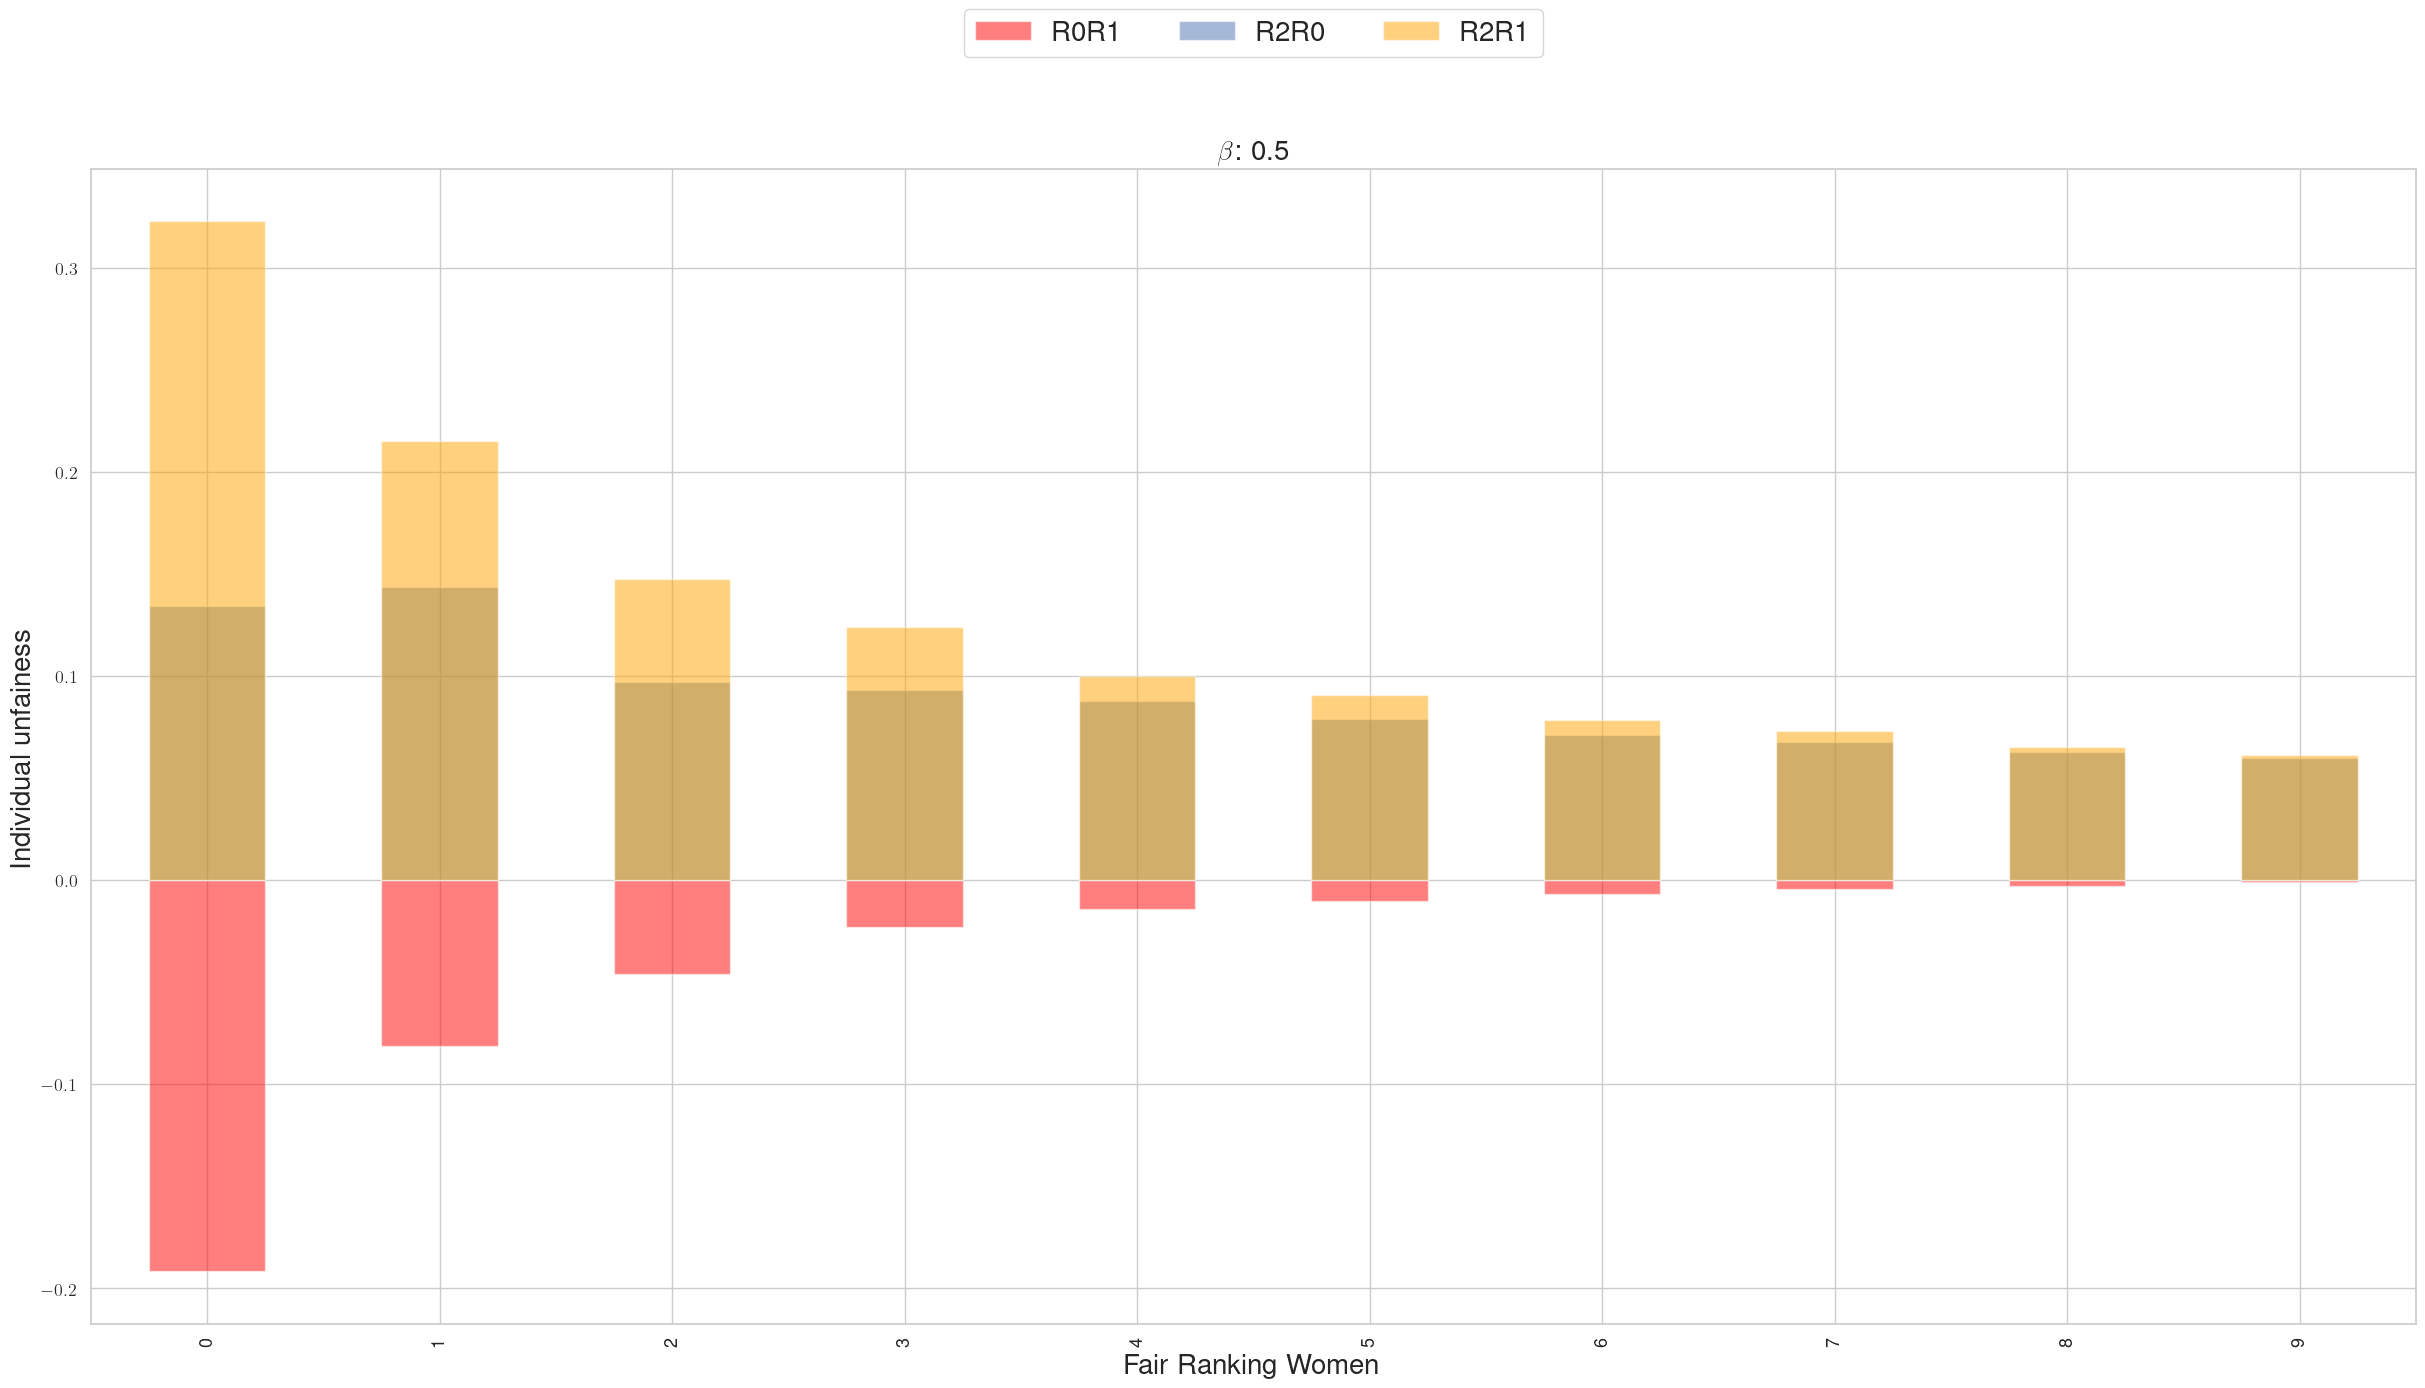

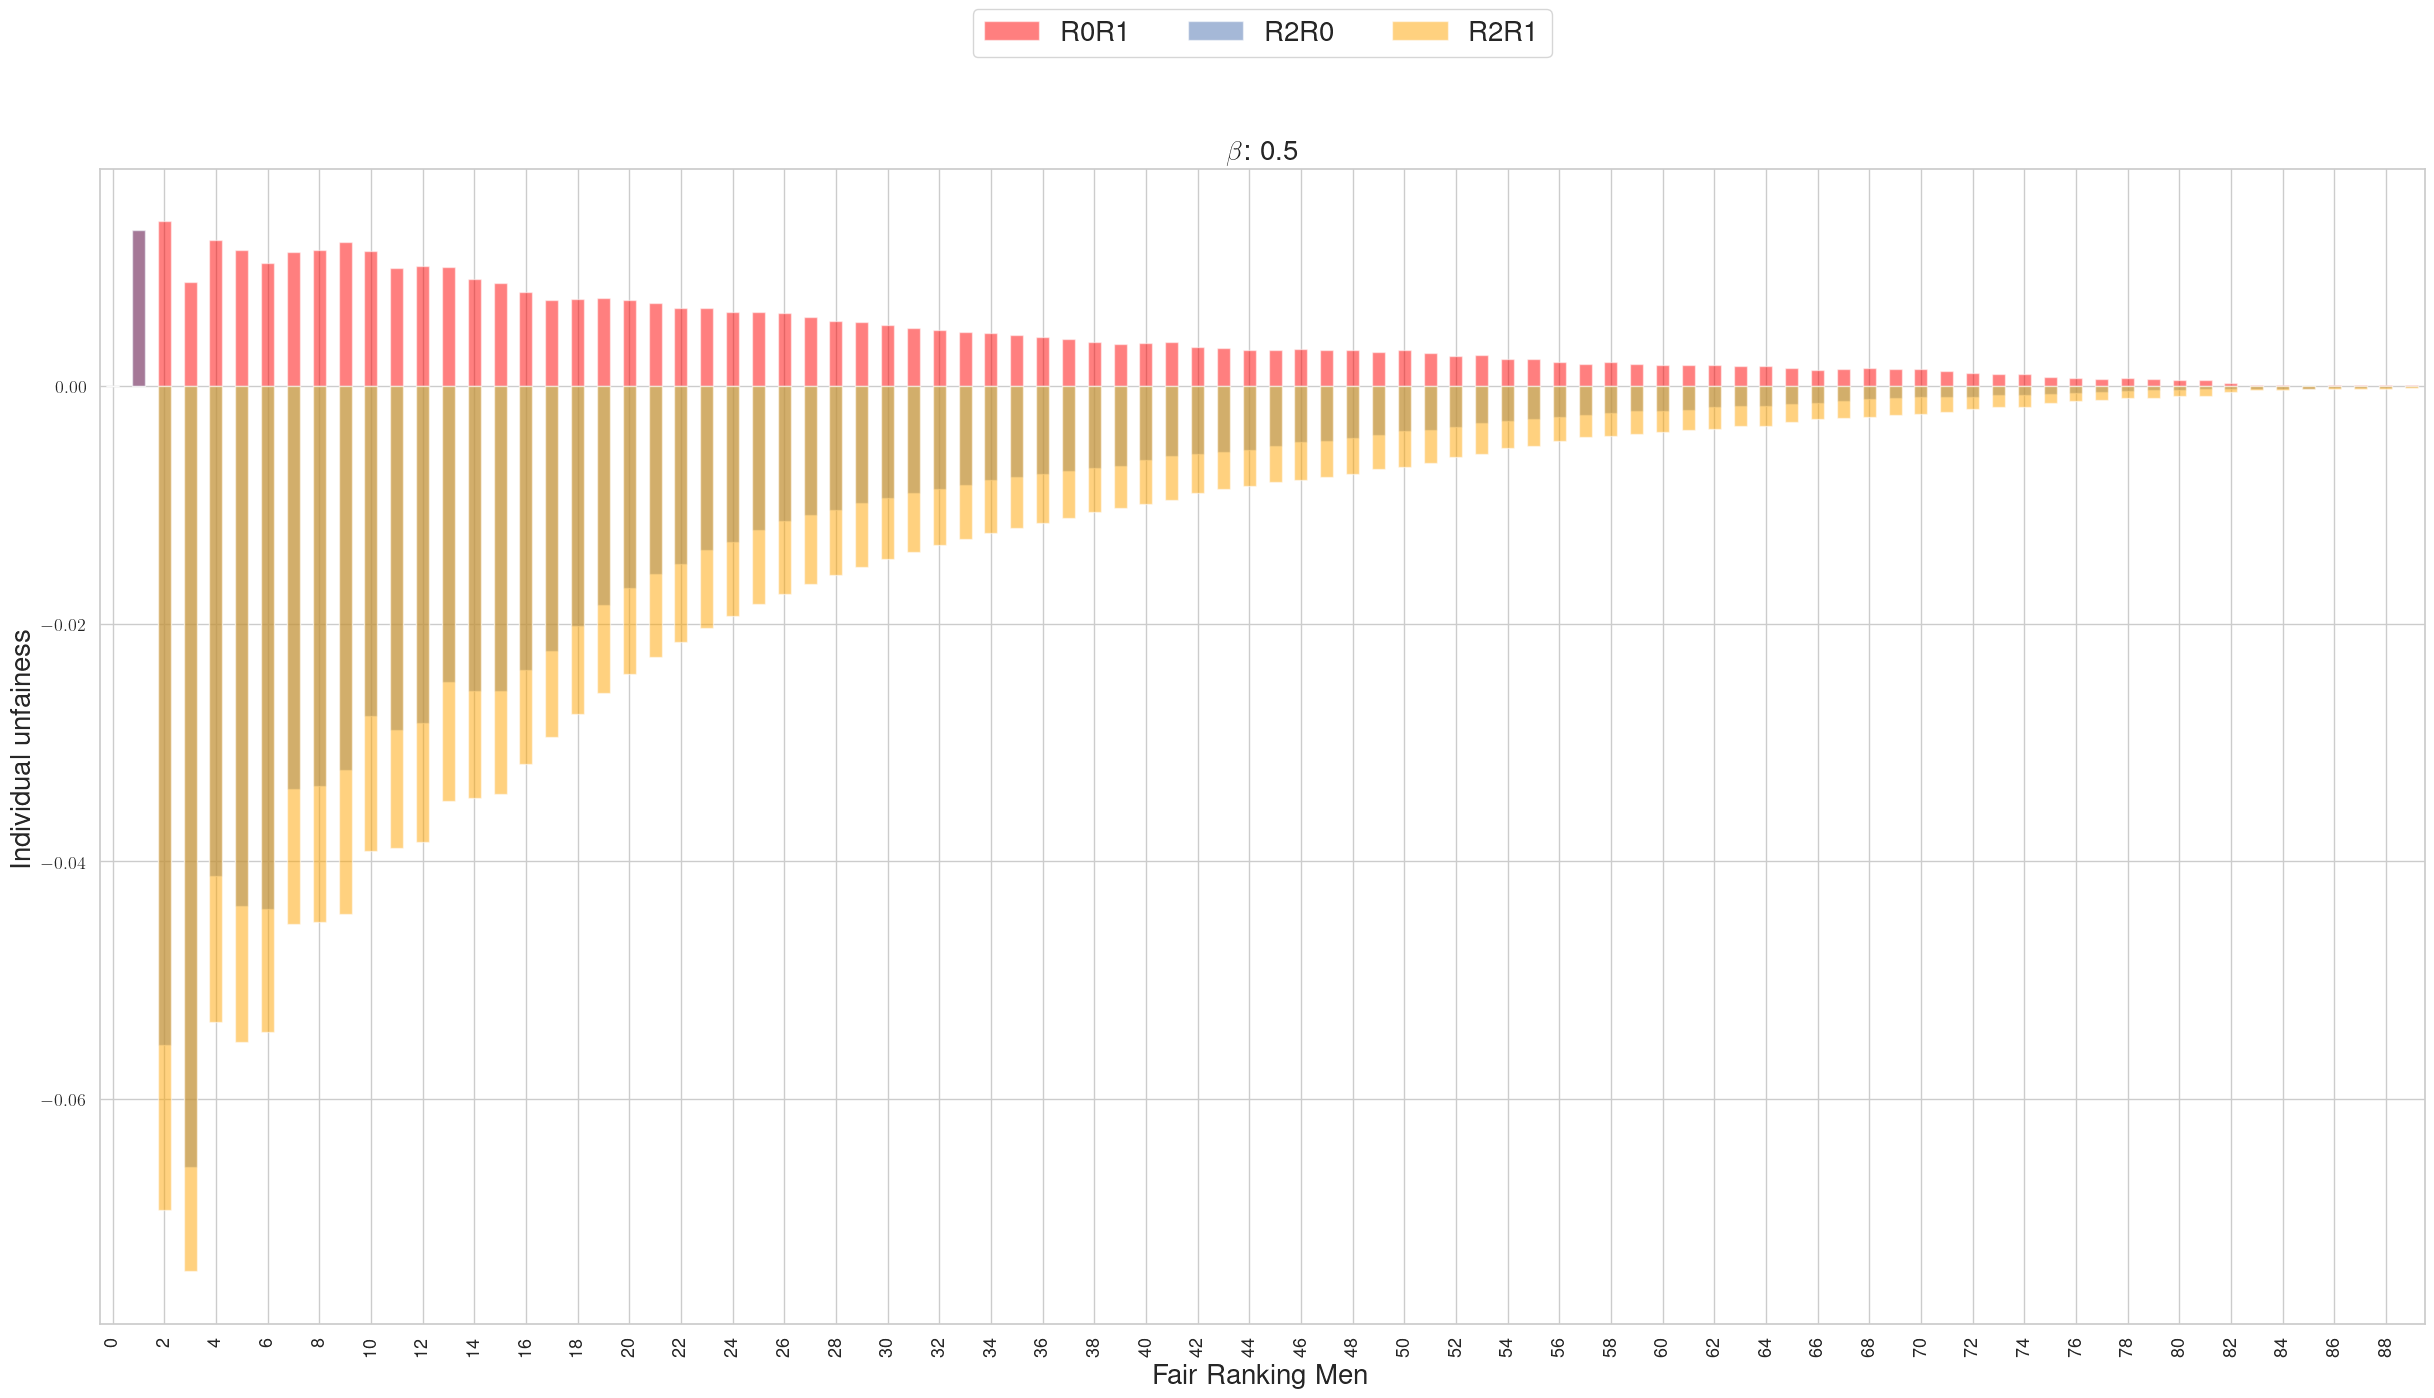

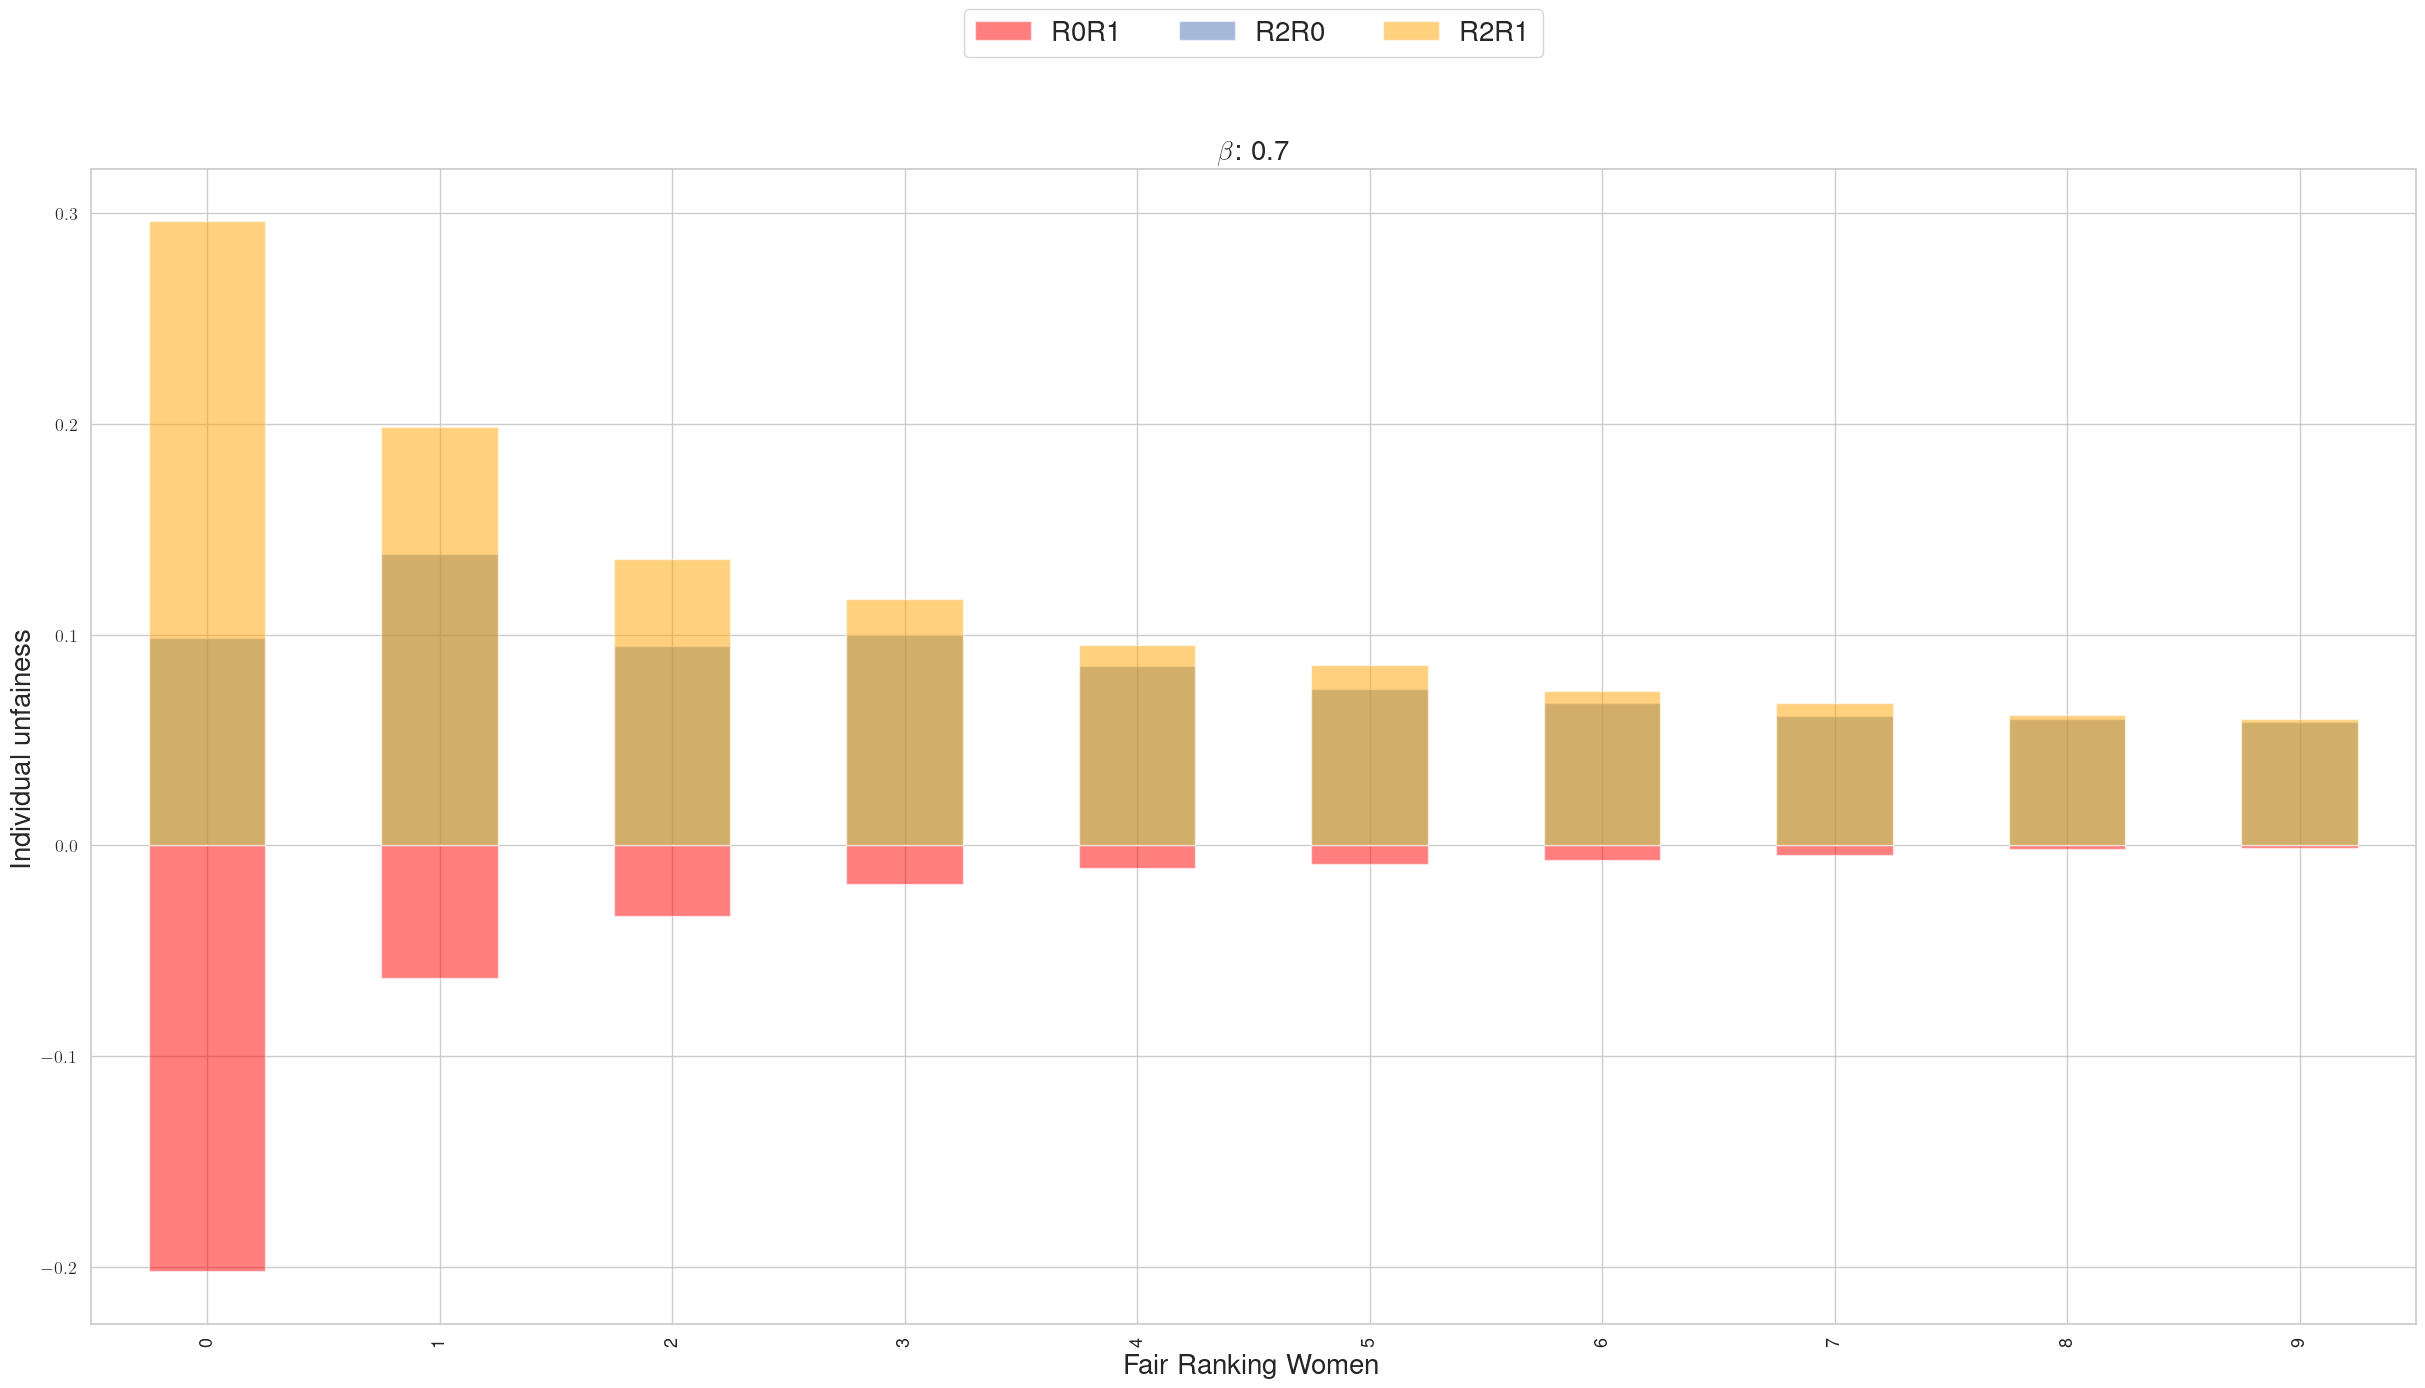

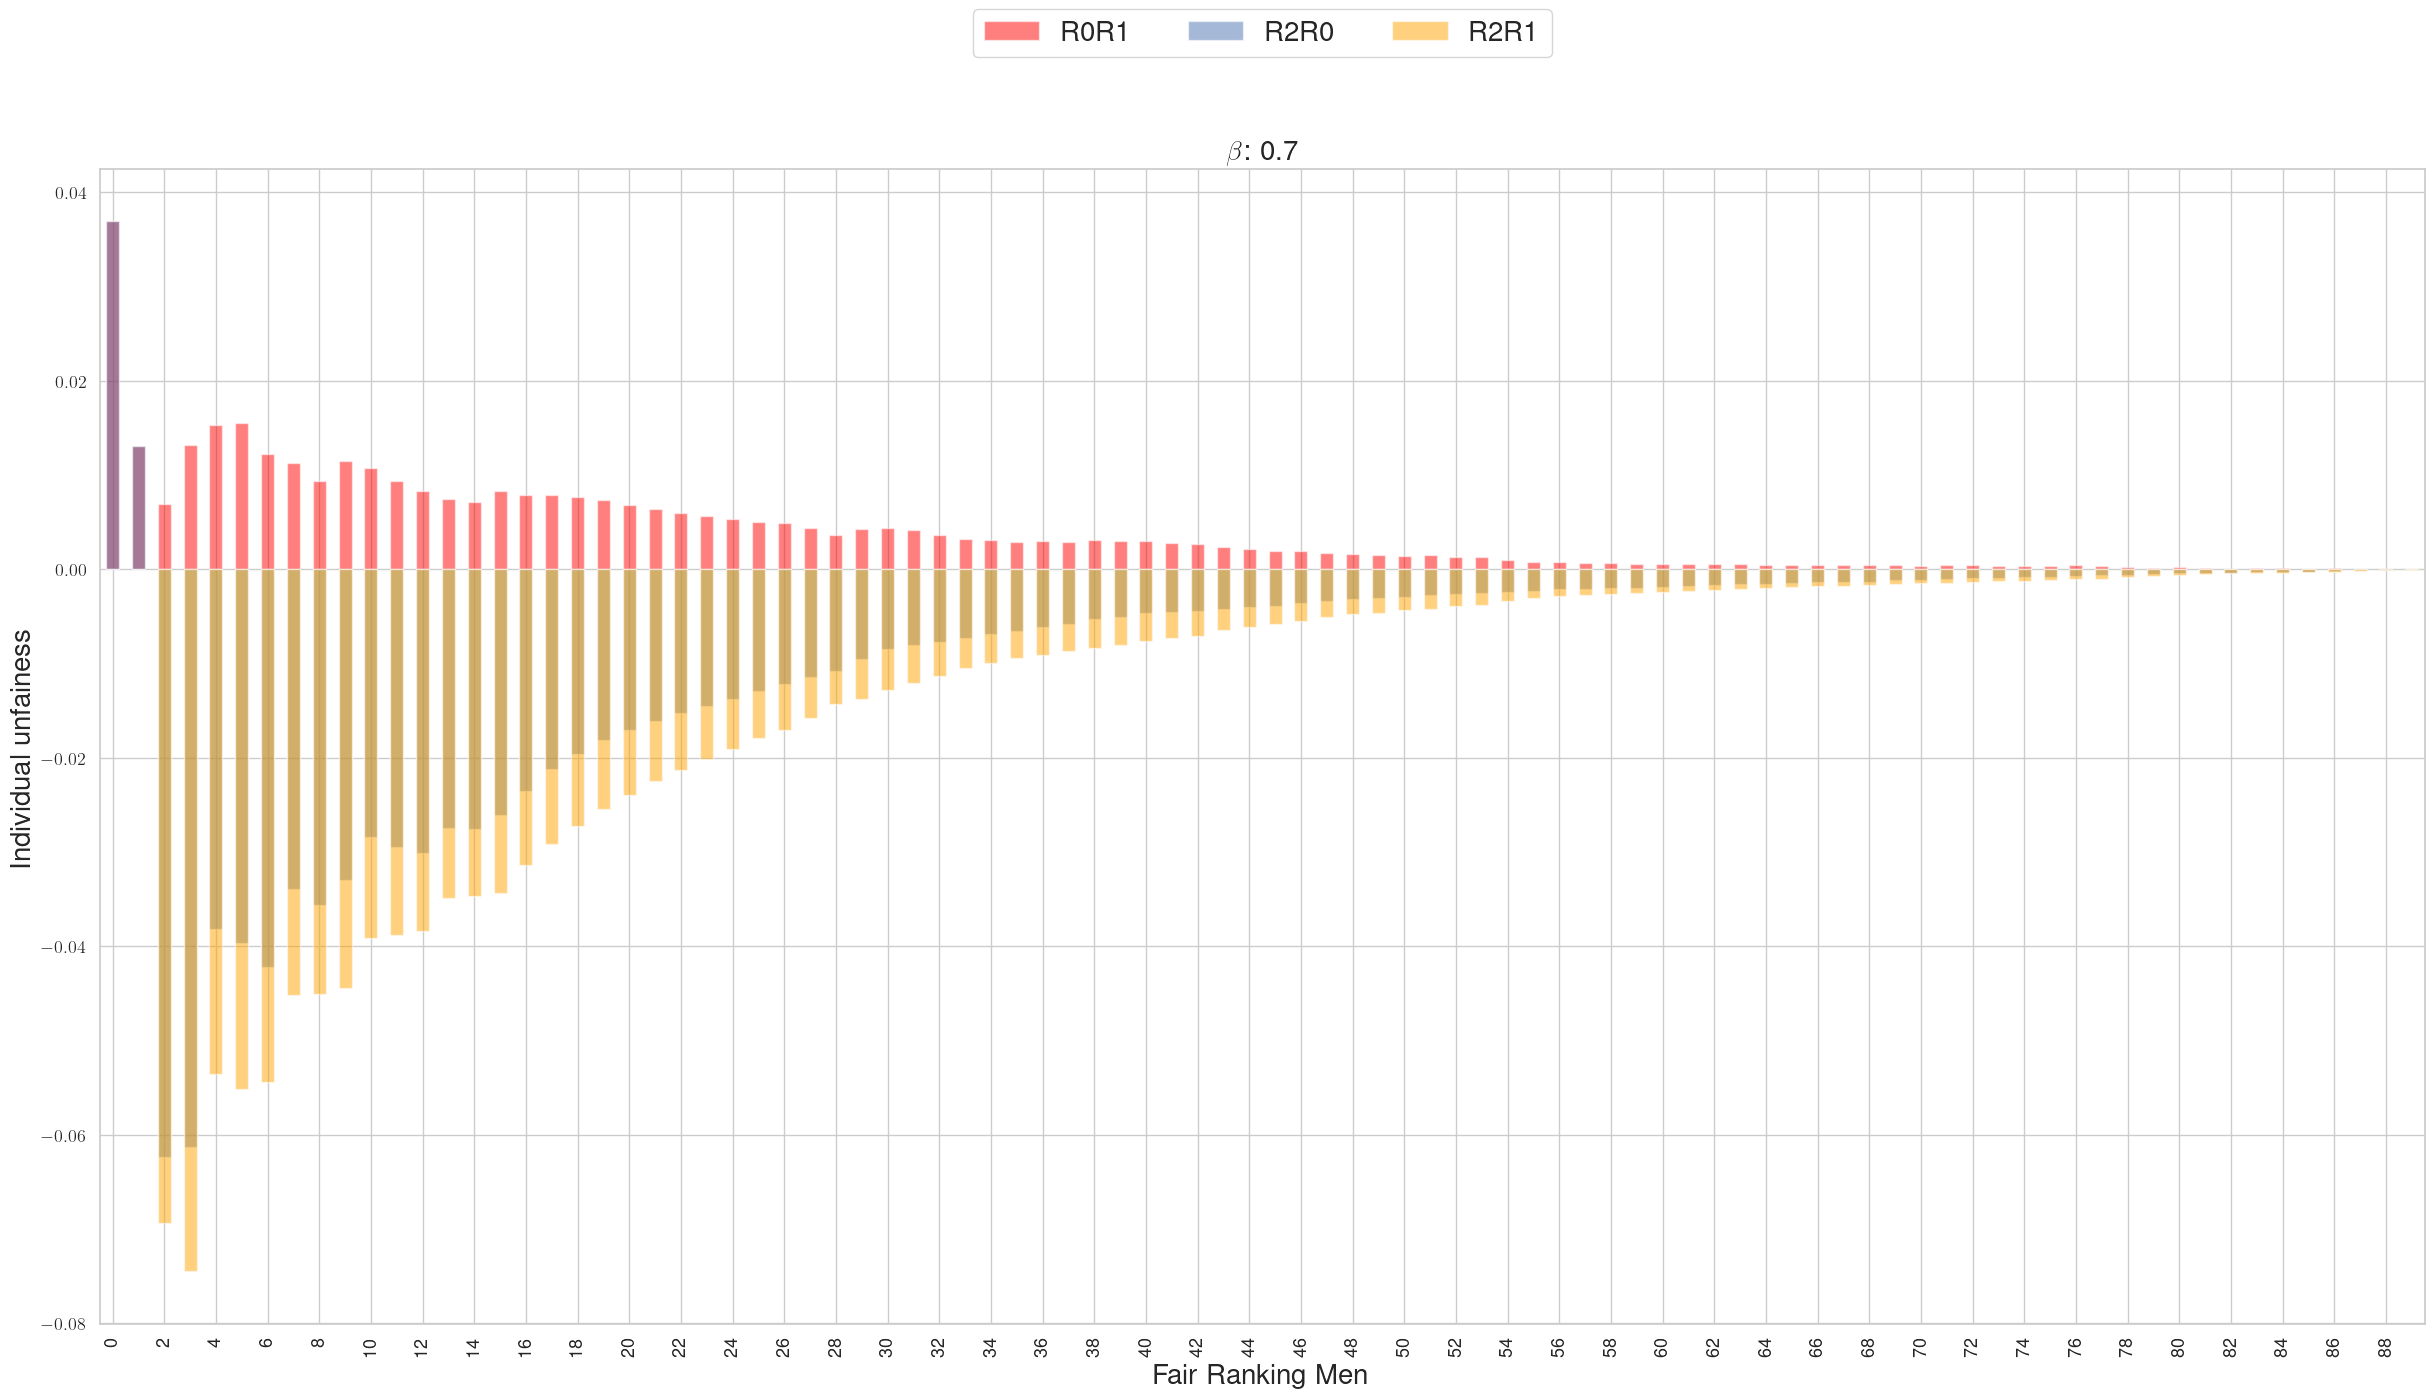

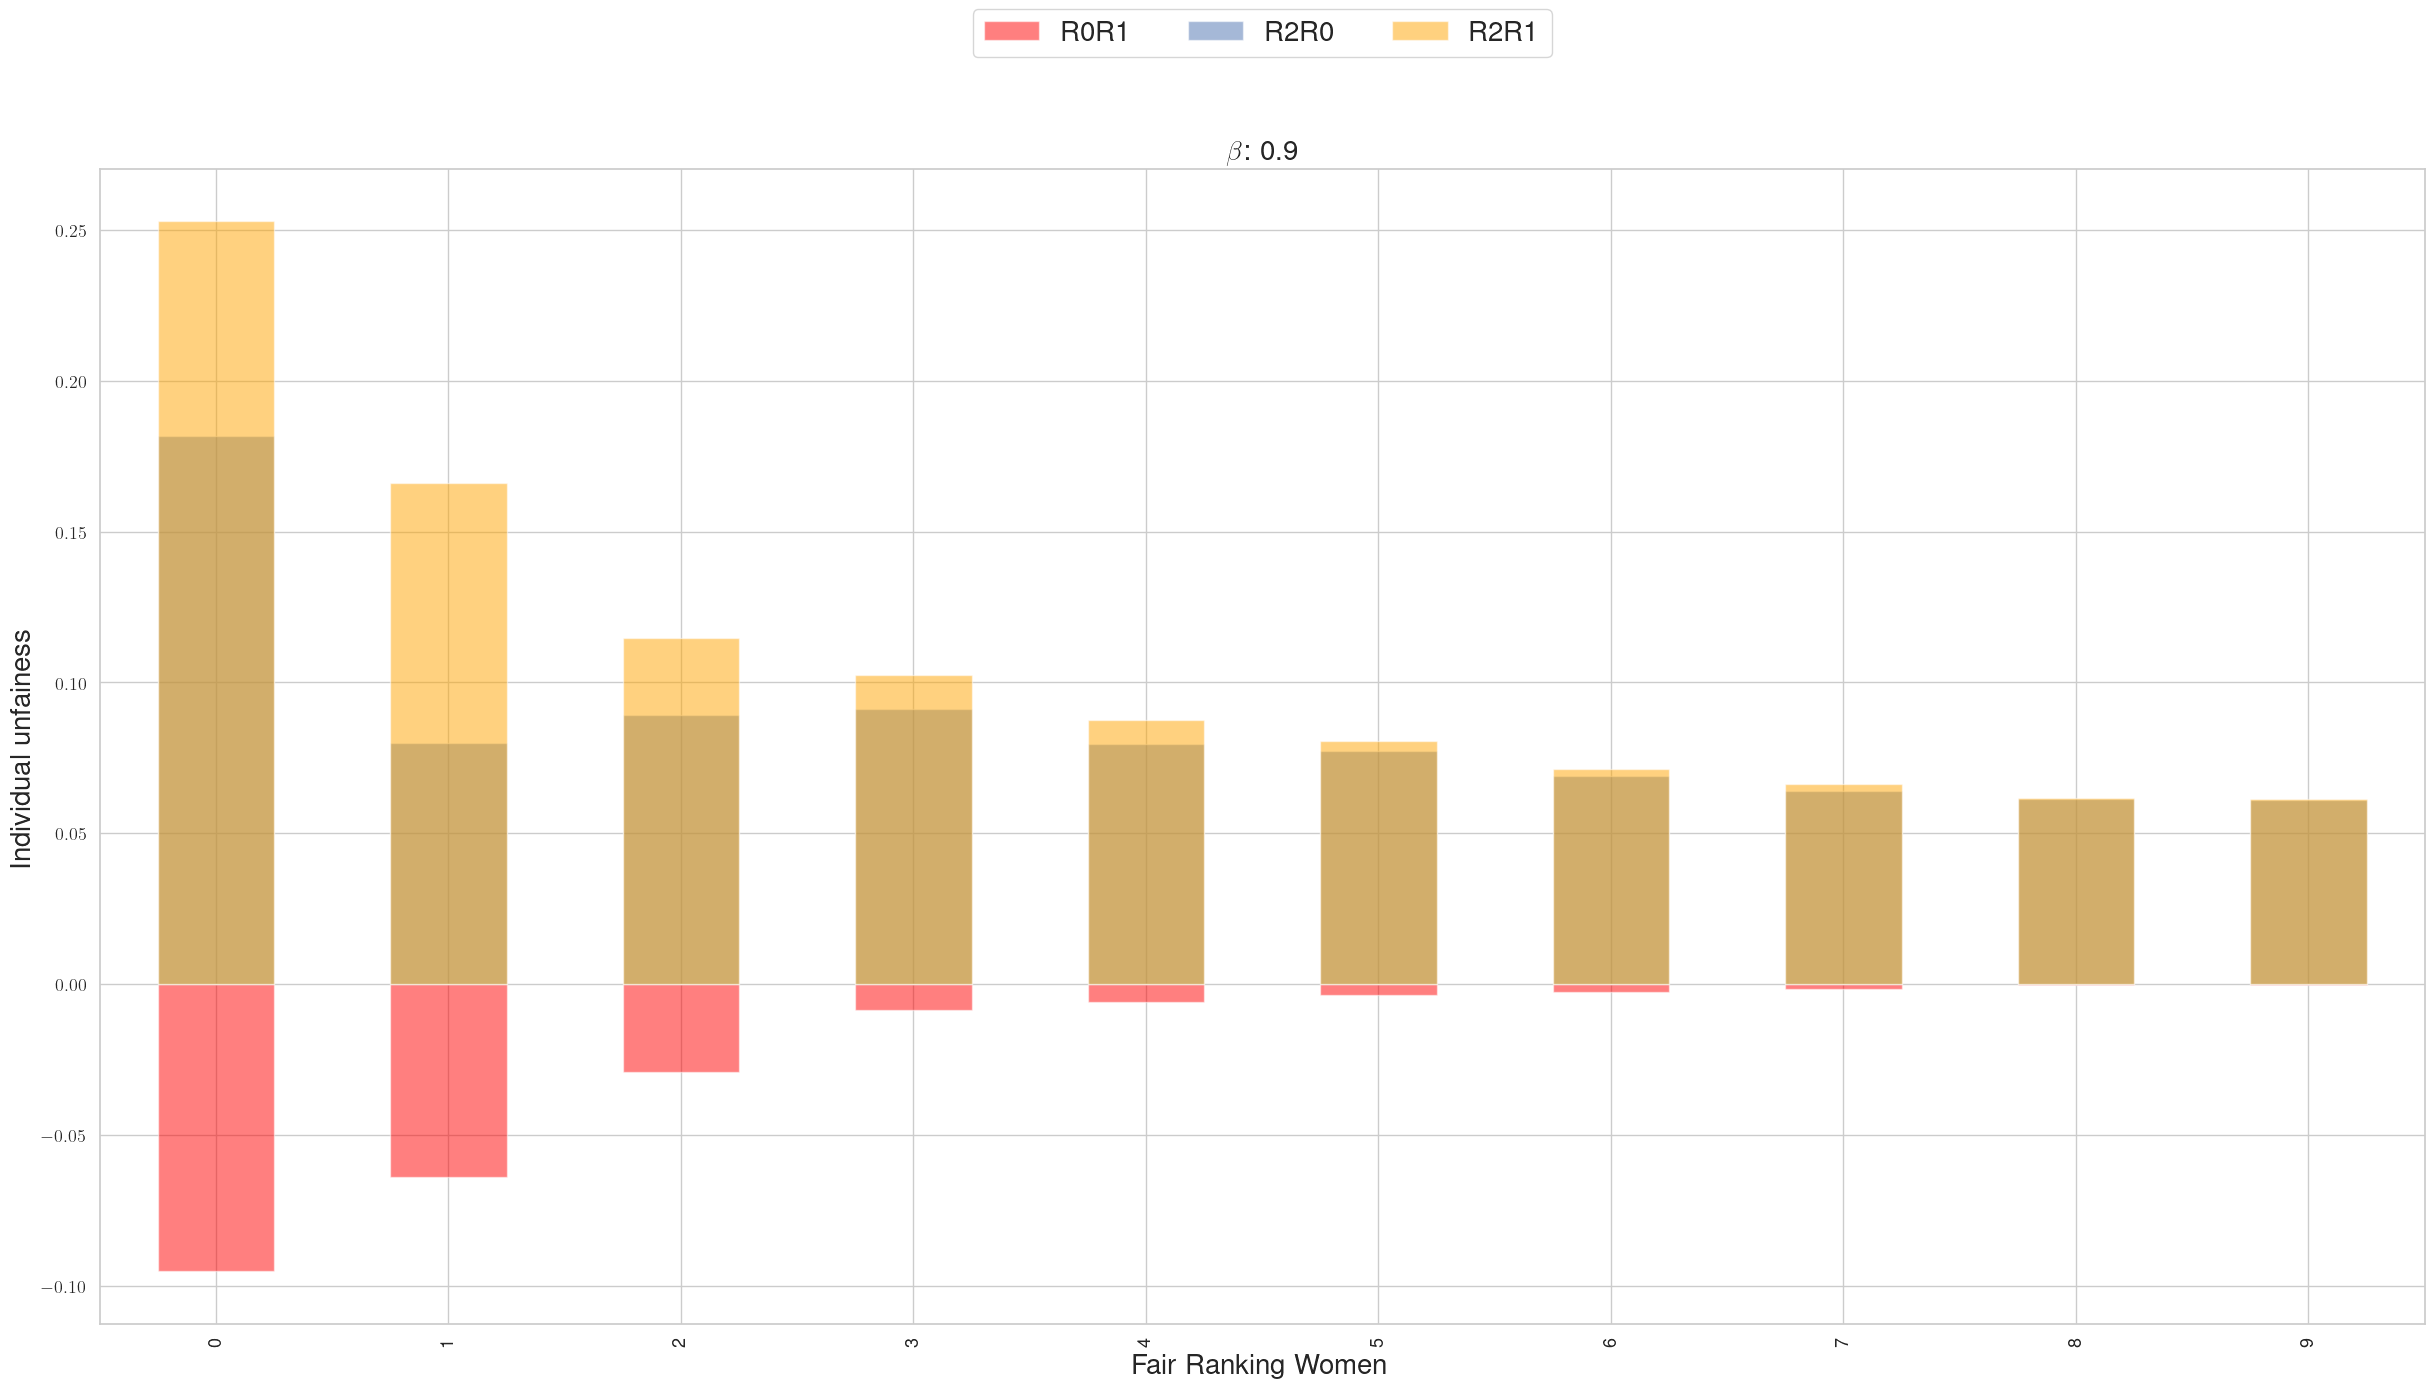

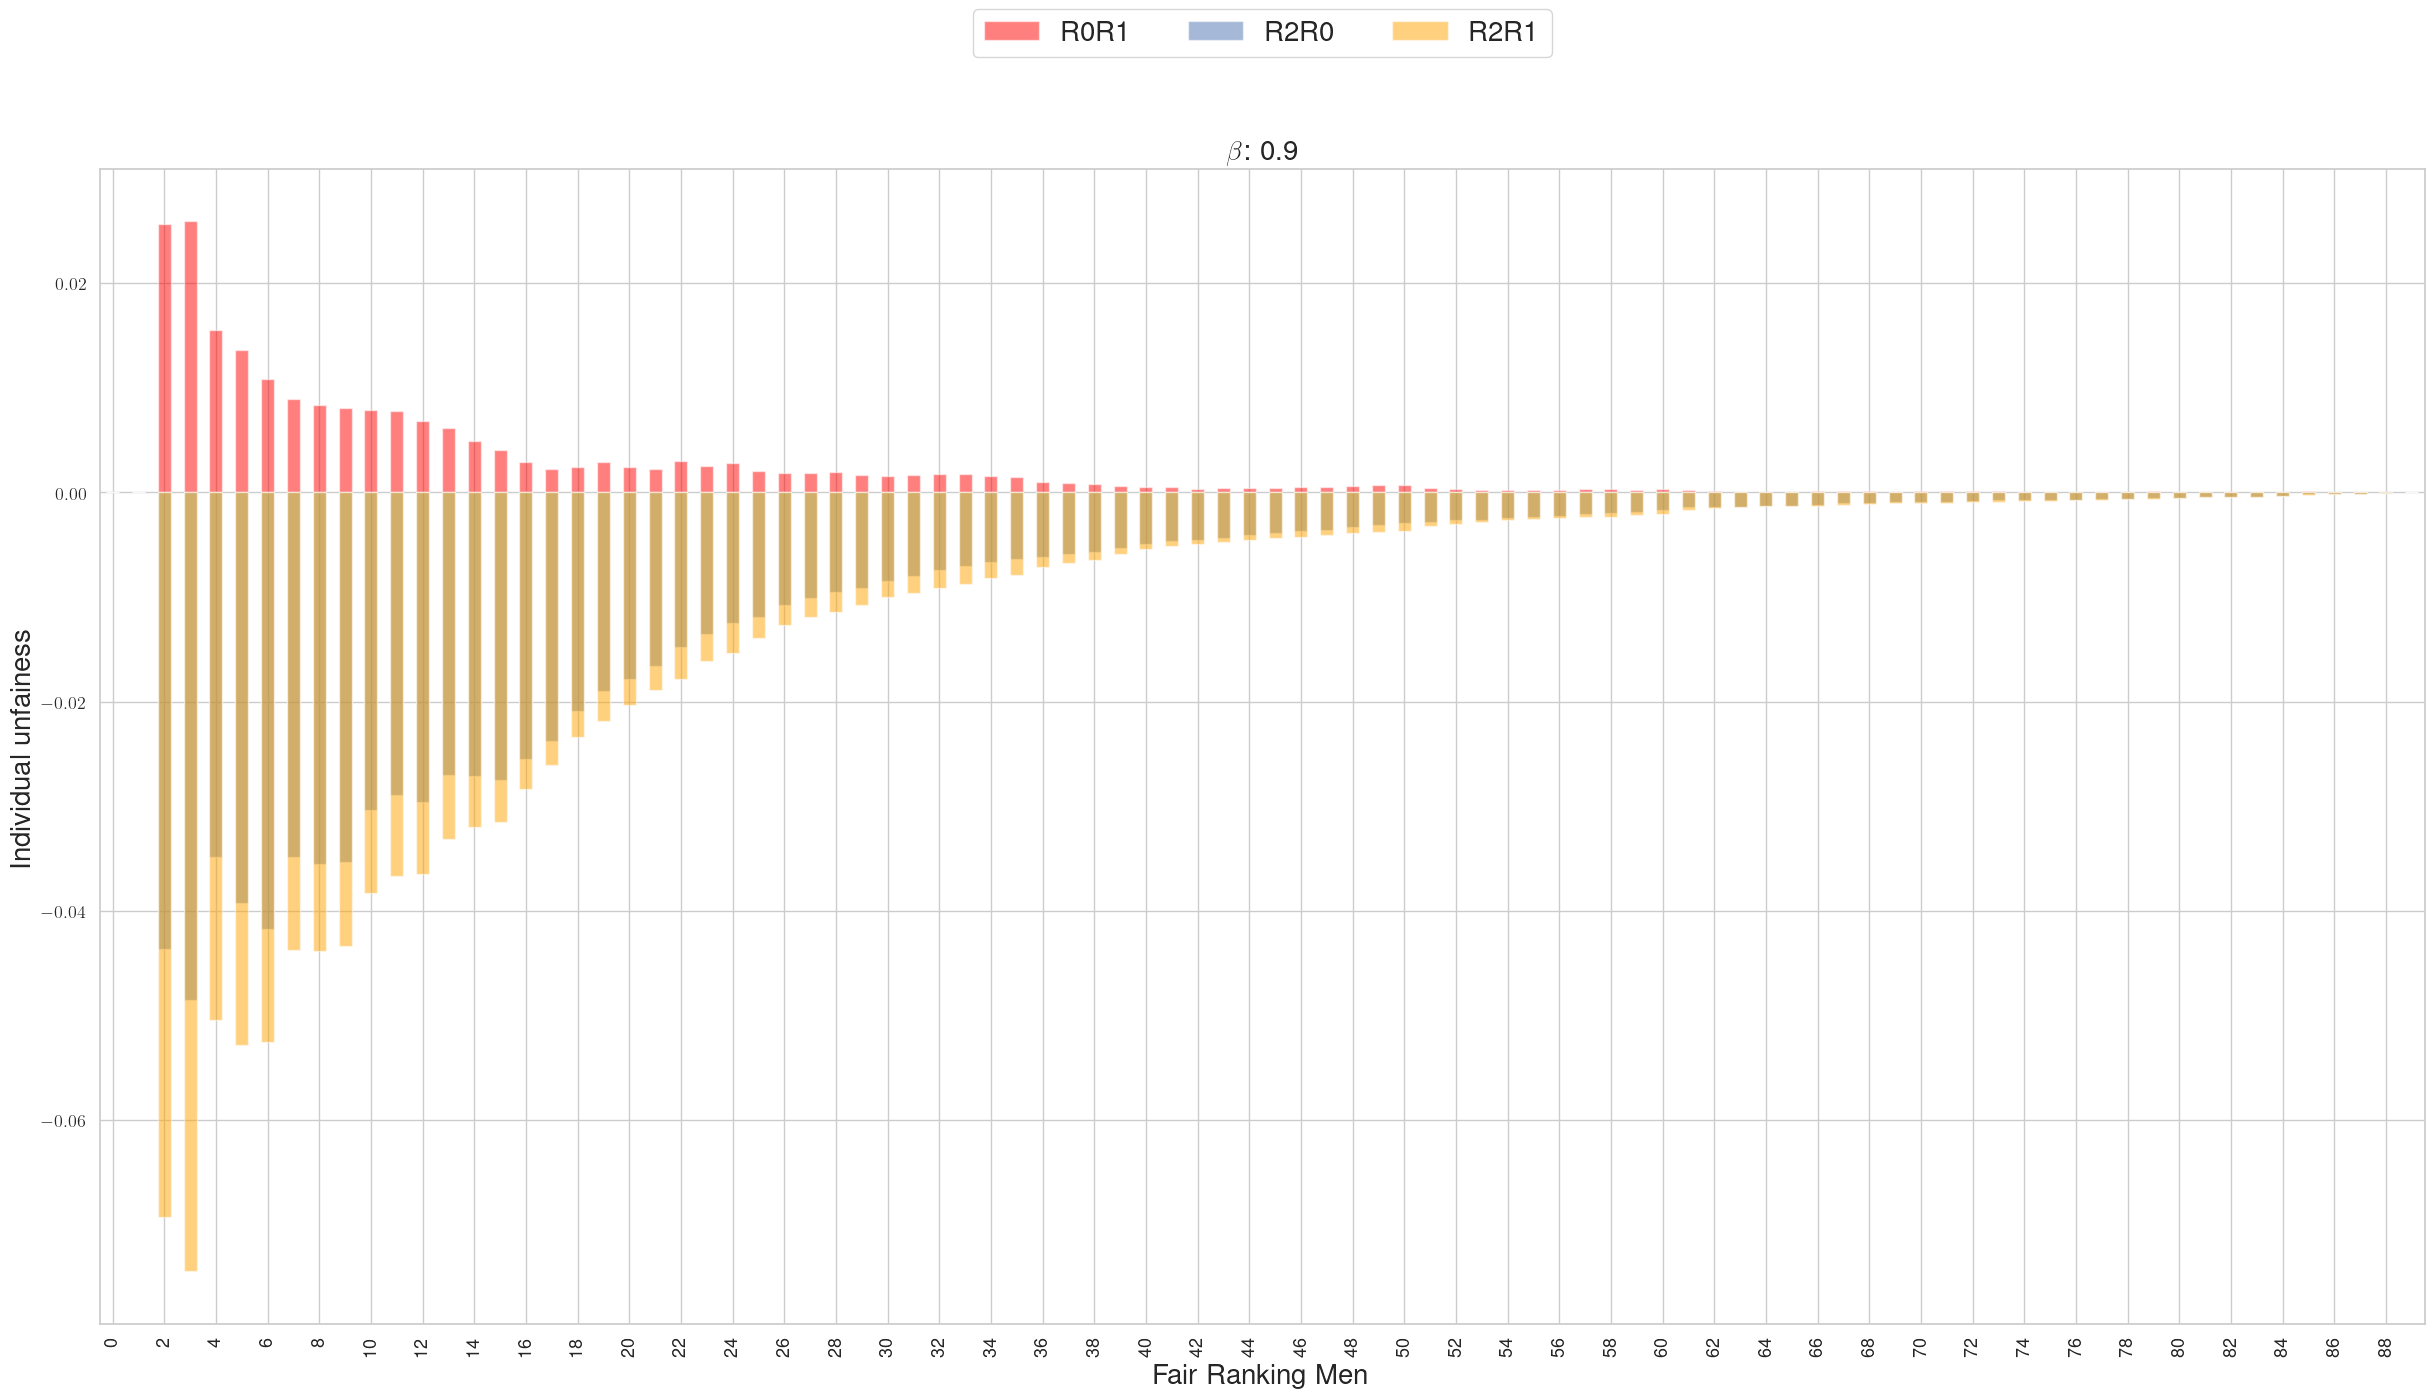

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.71it/s]


Proportion of Women: 0.3


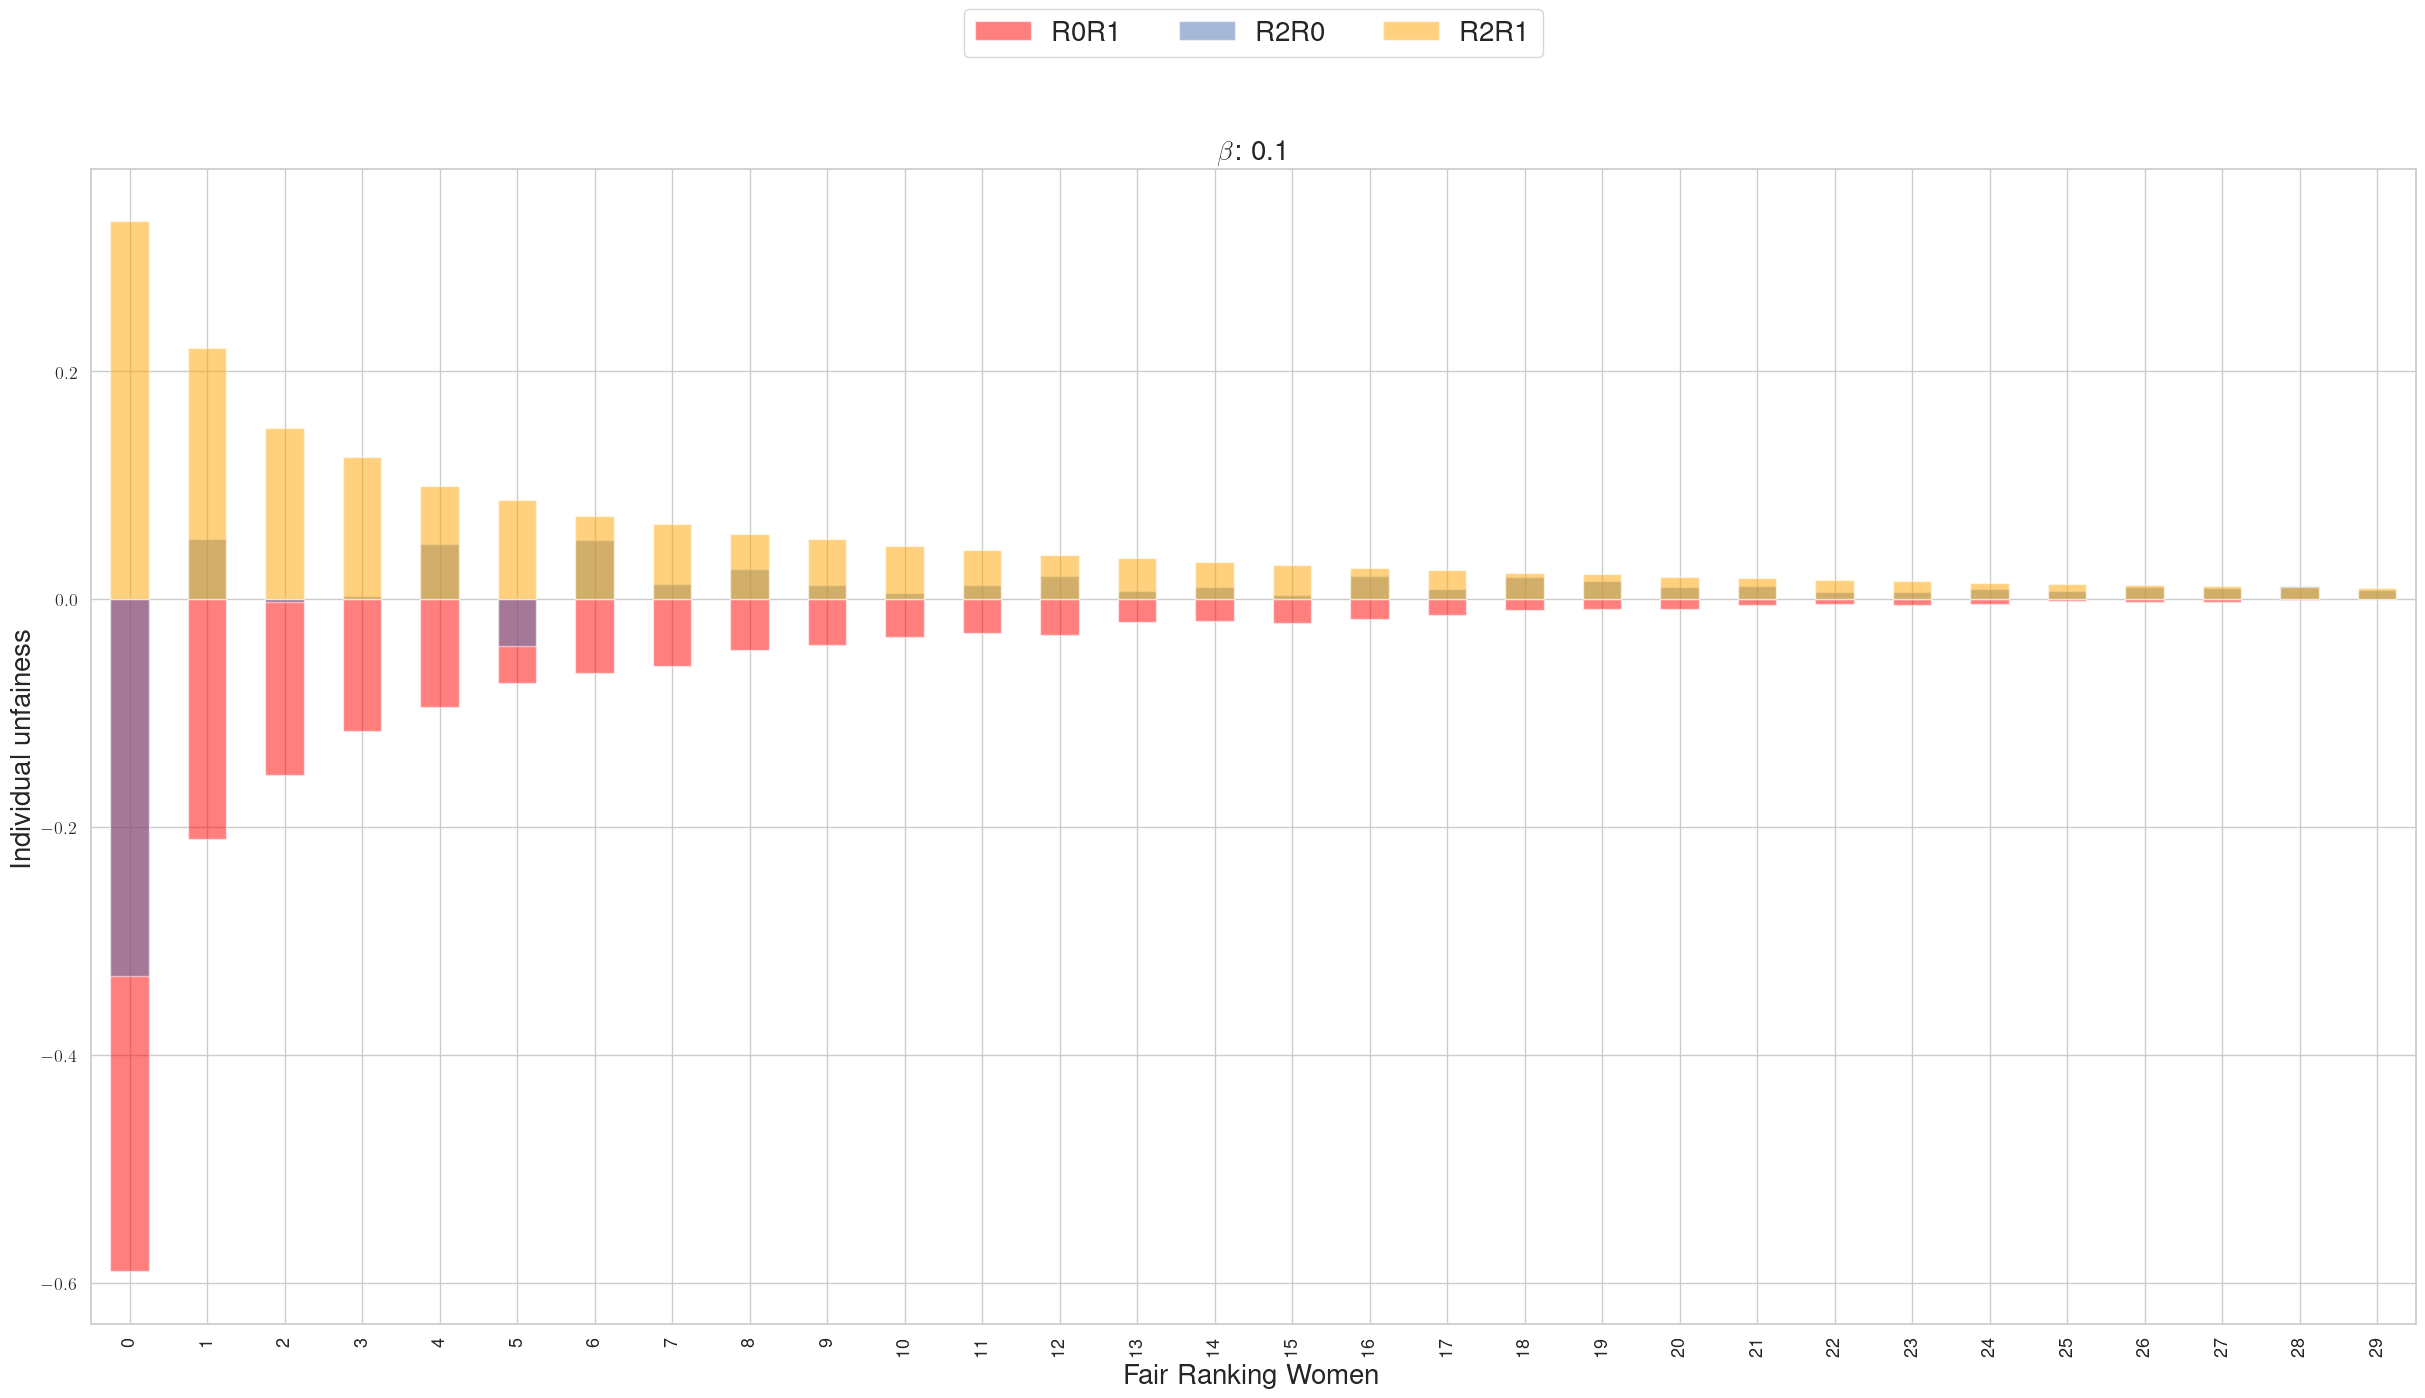

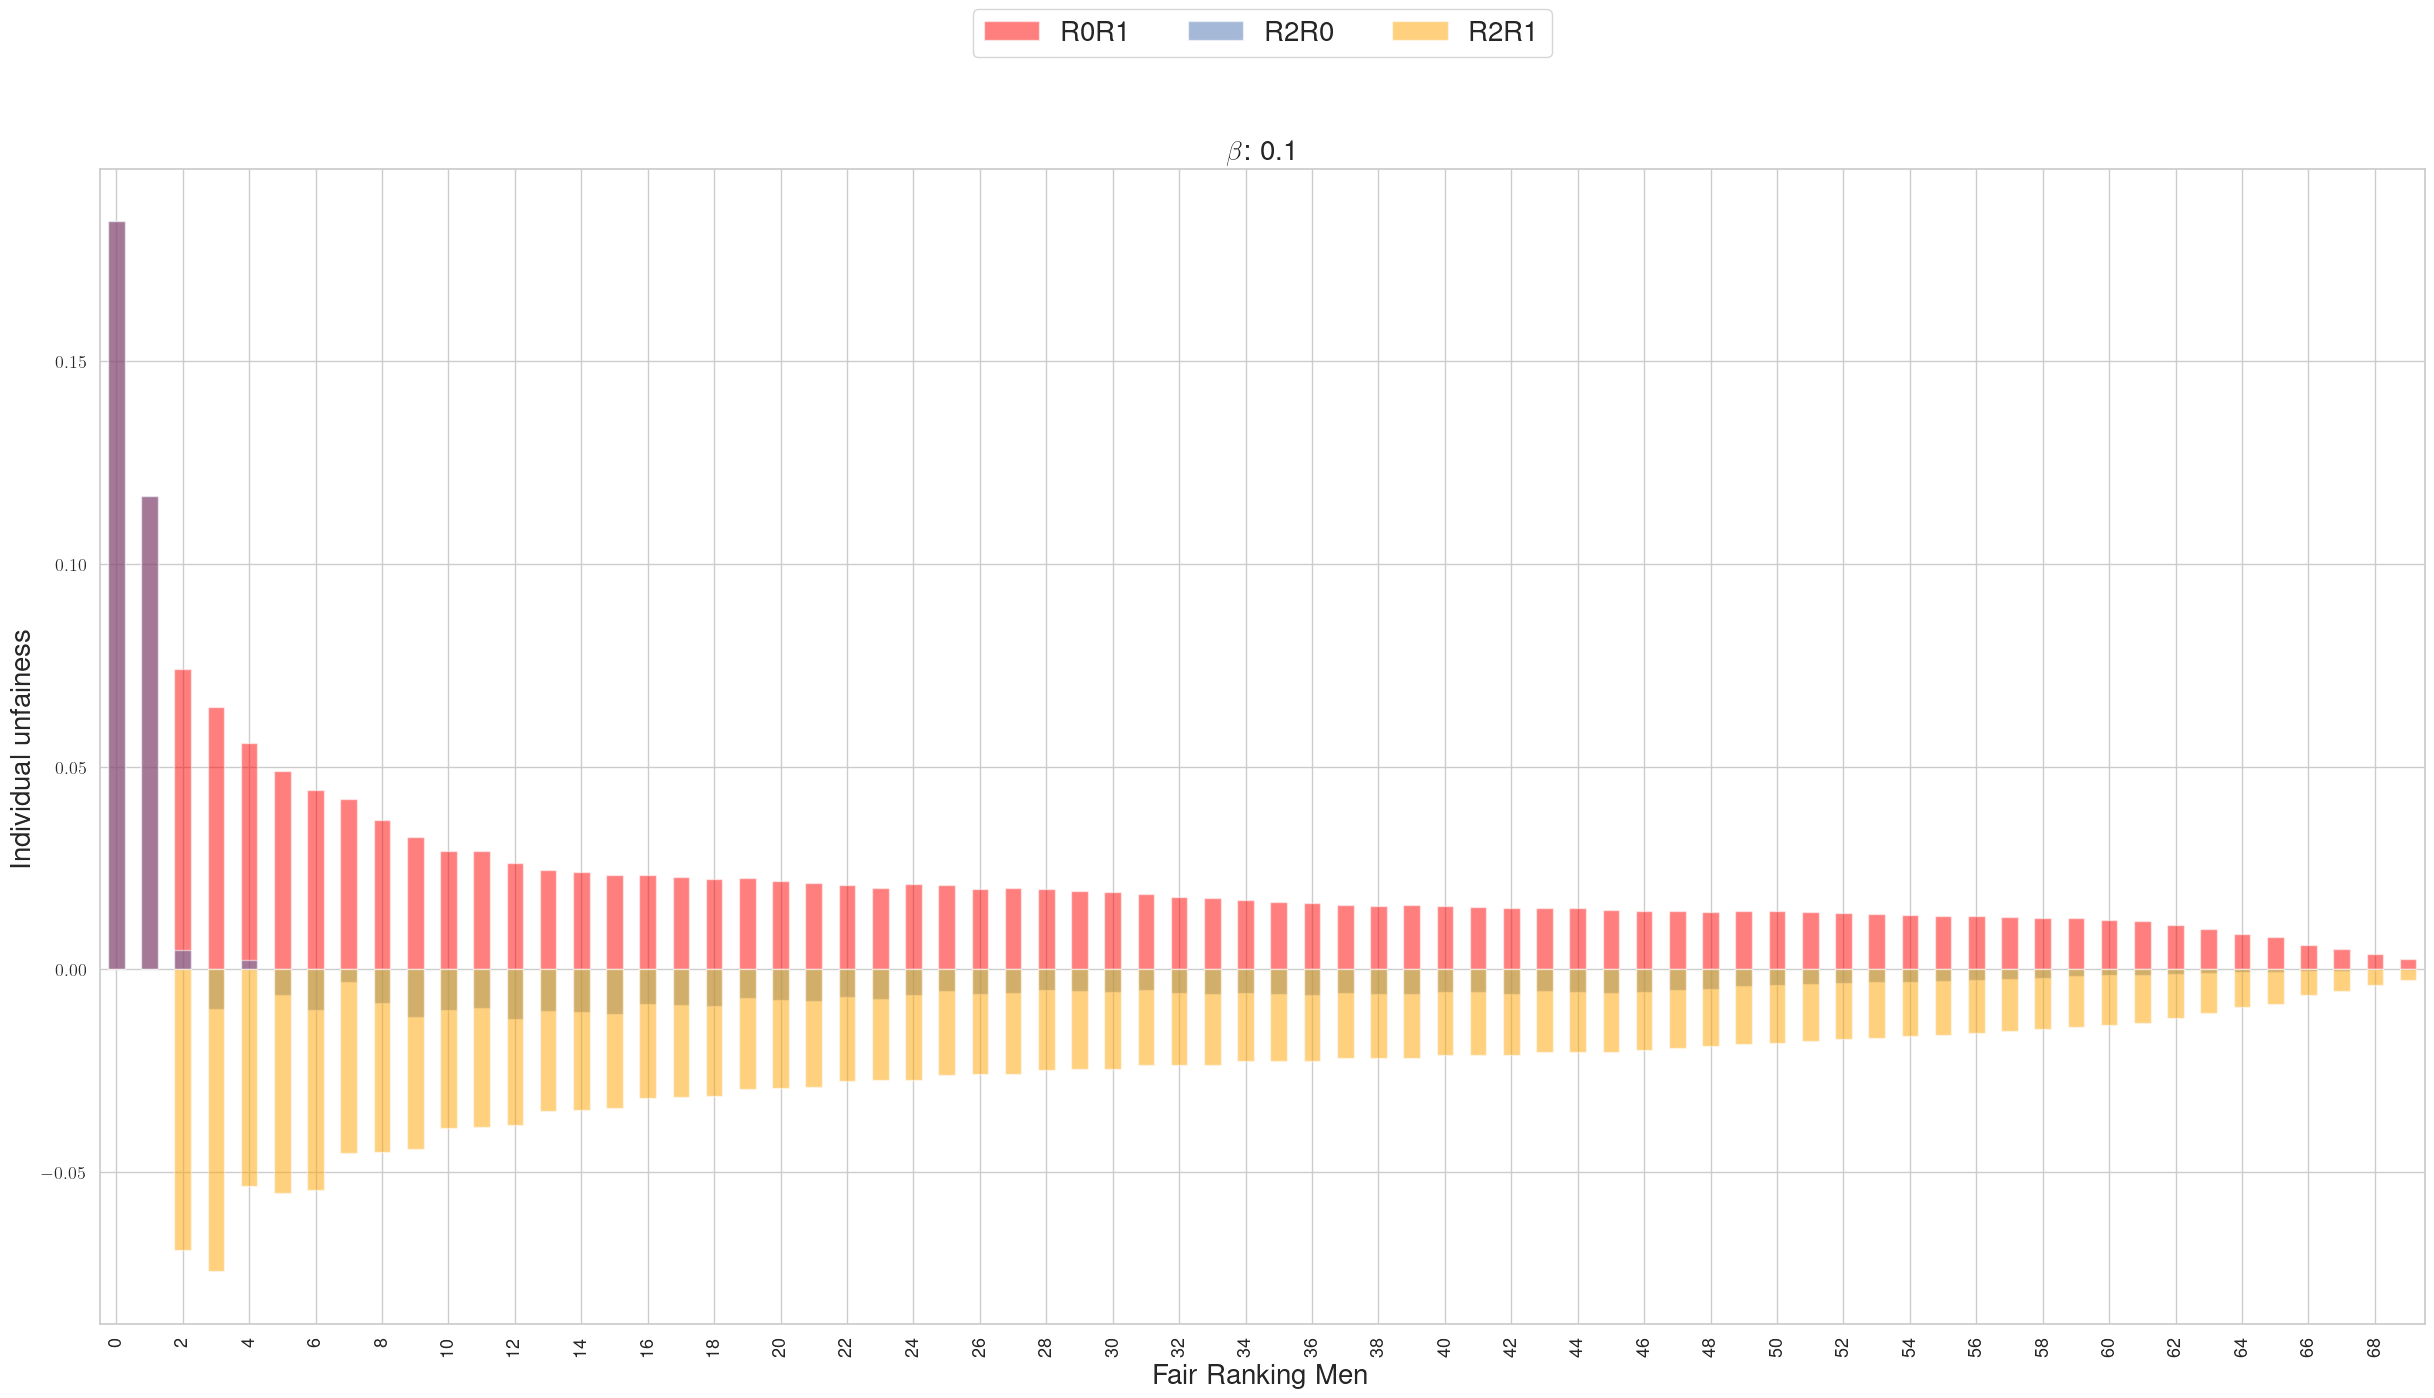

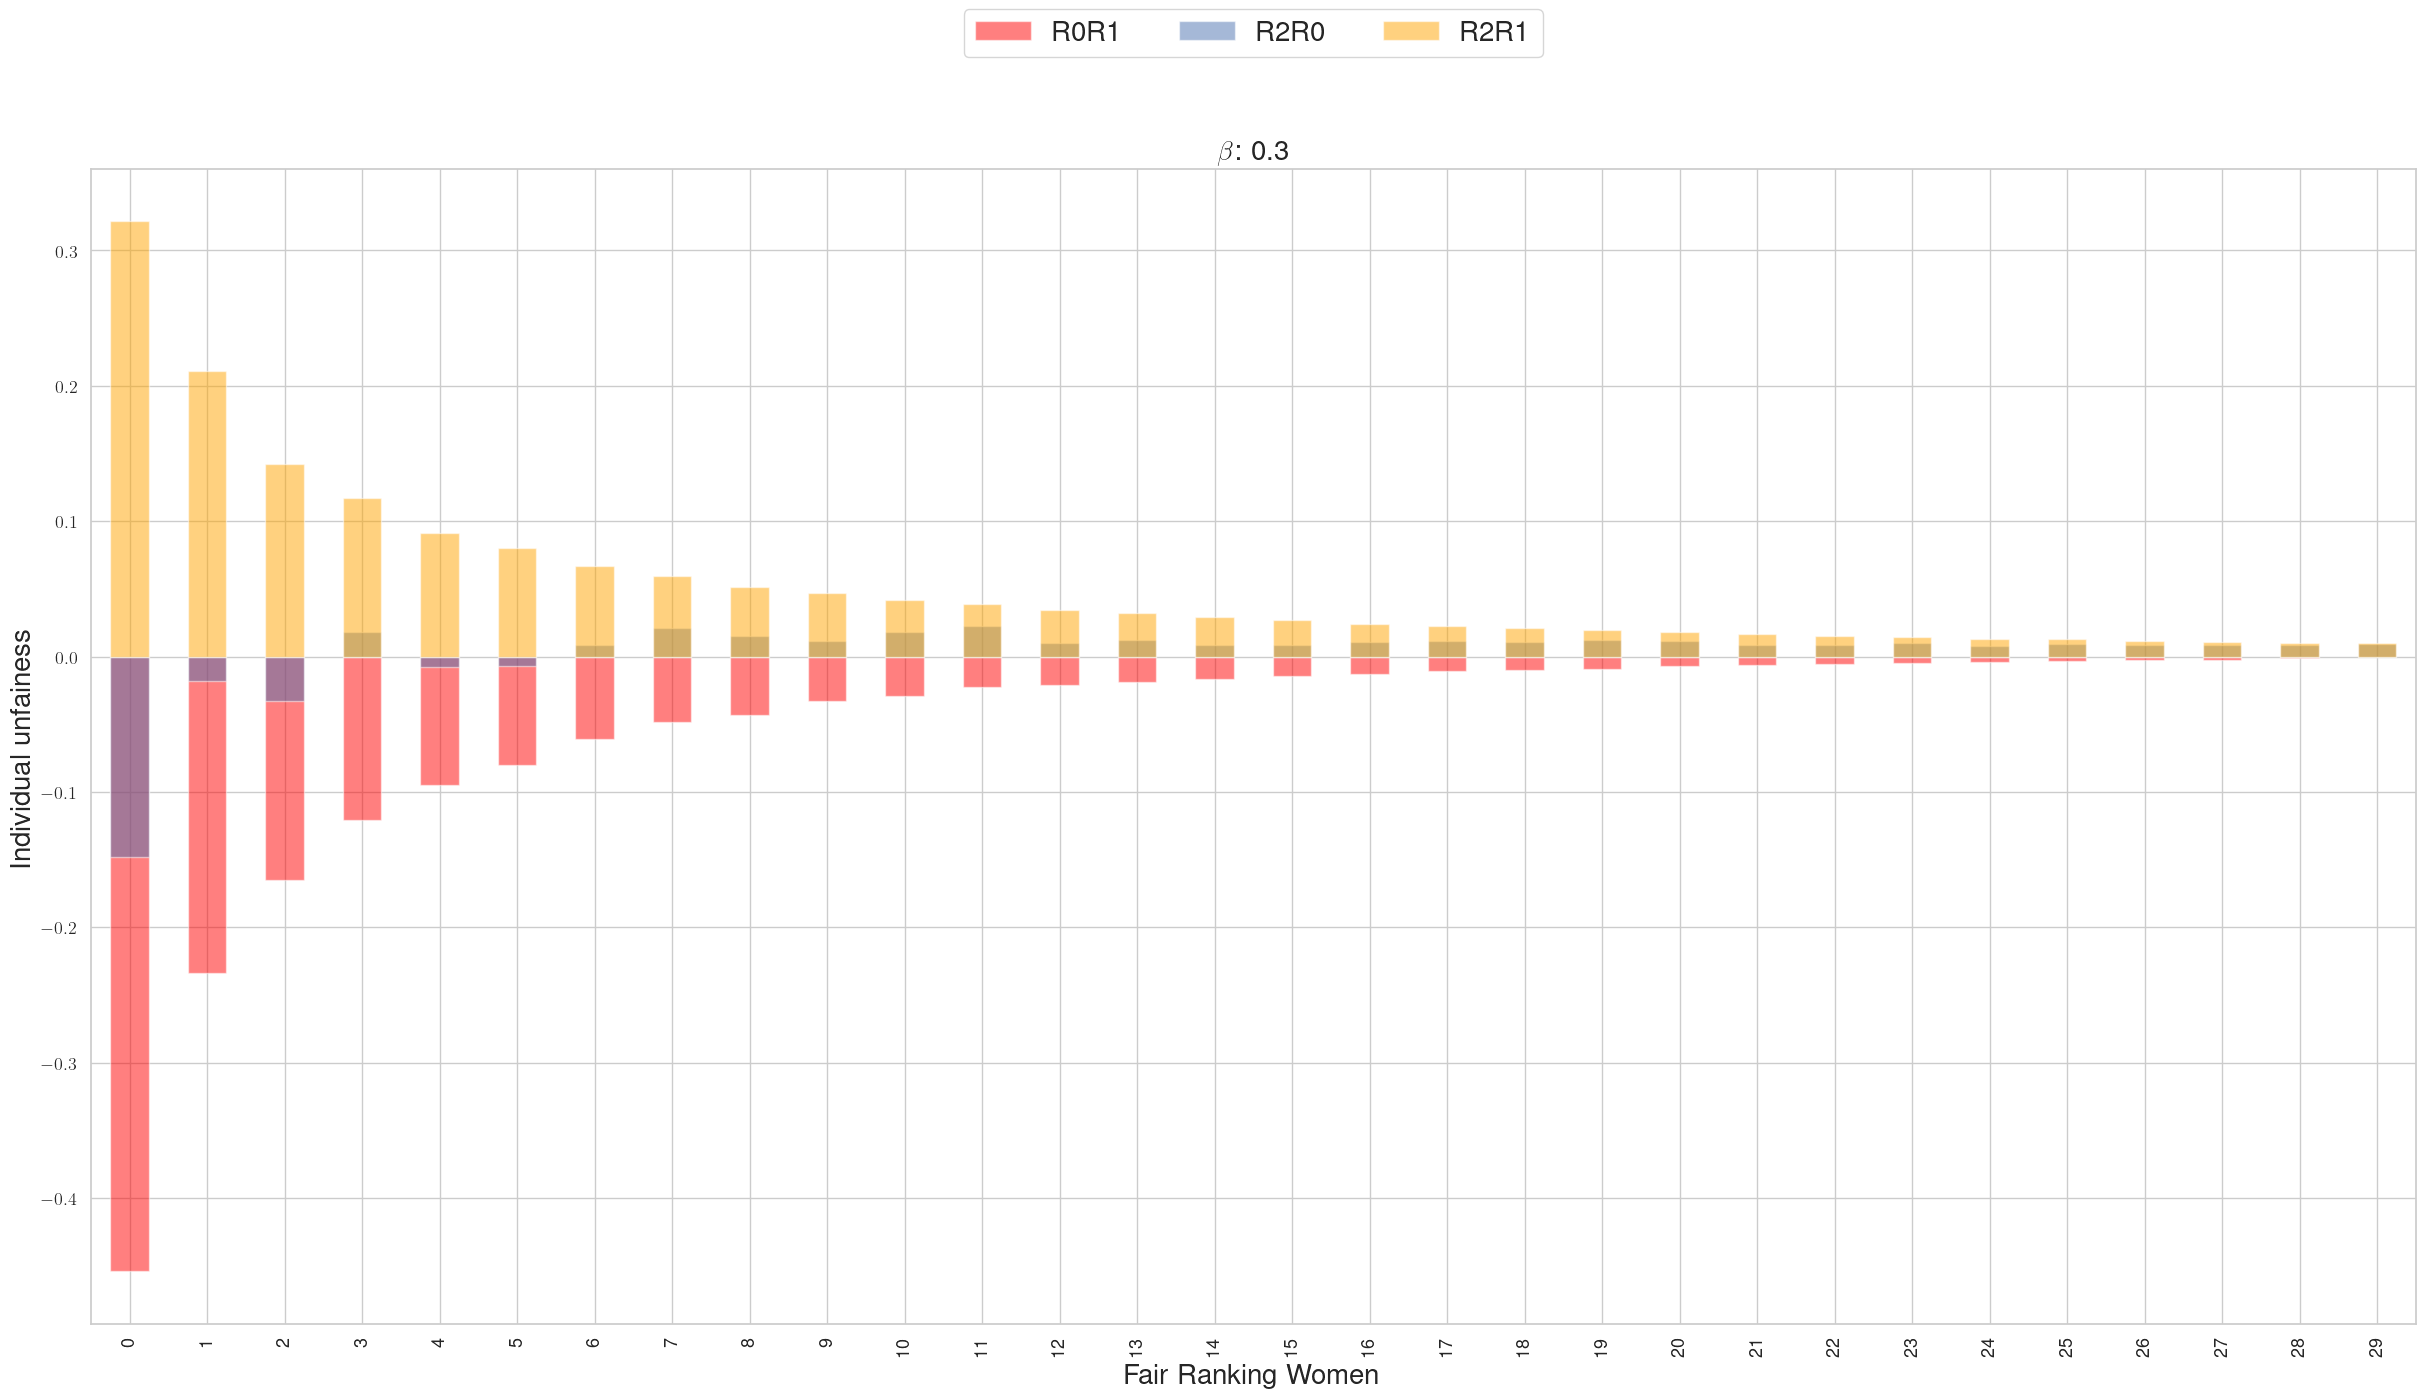

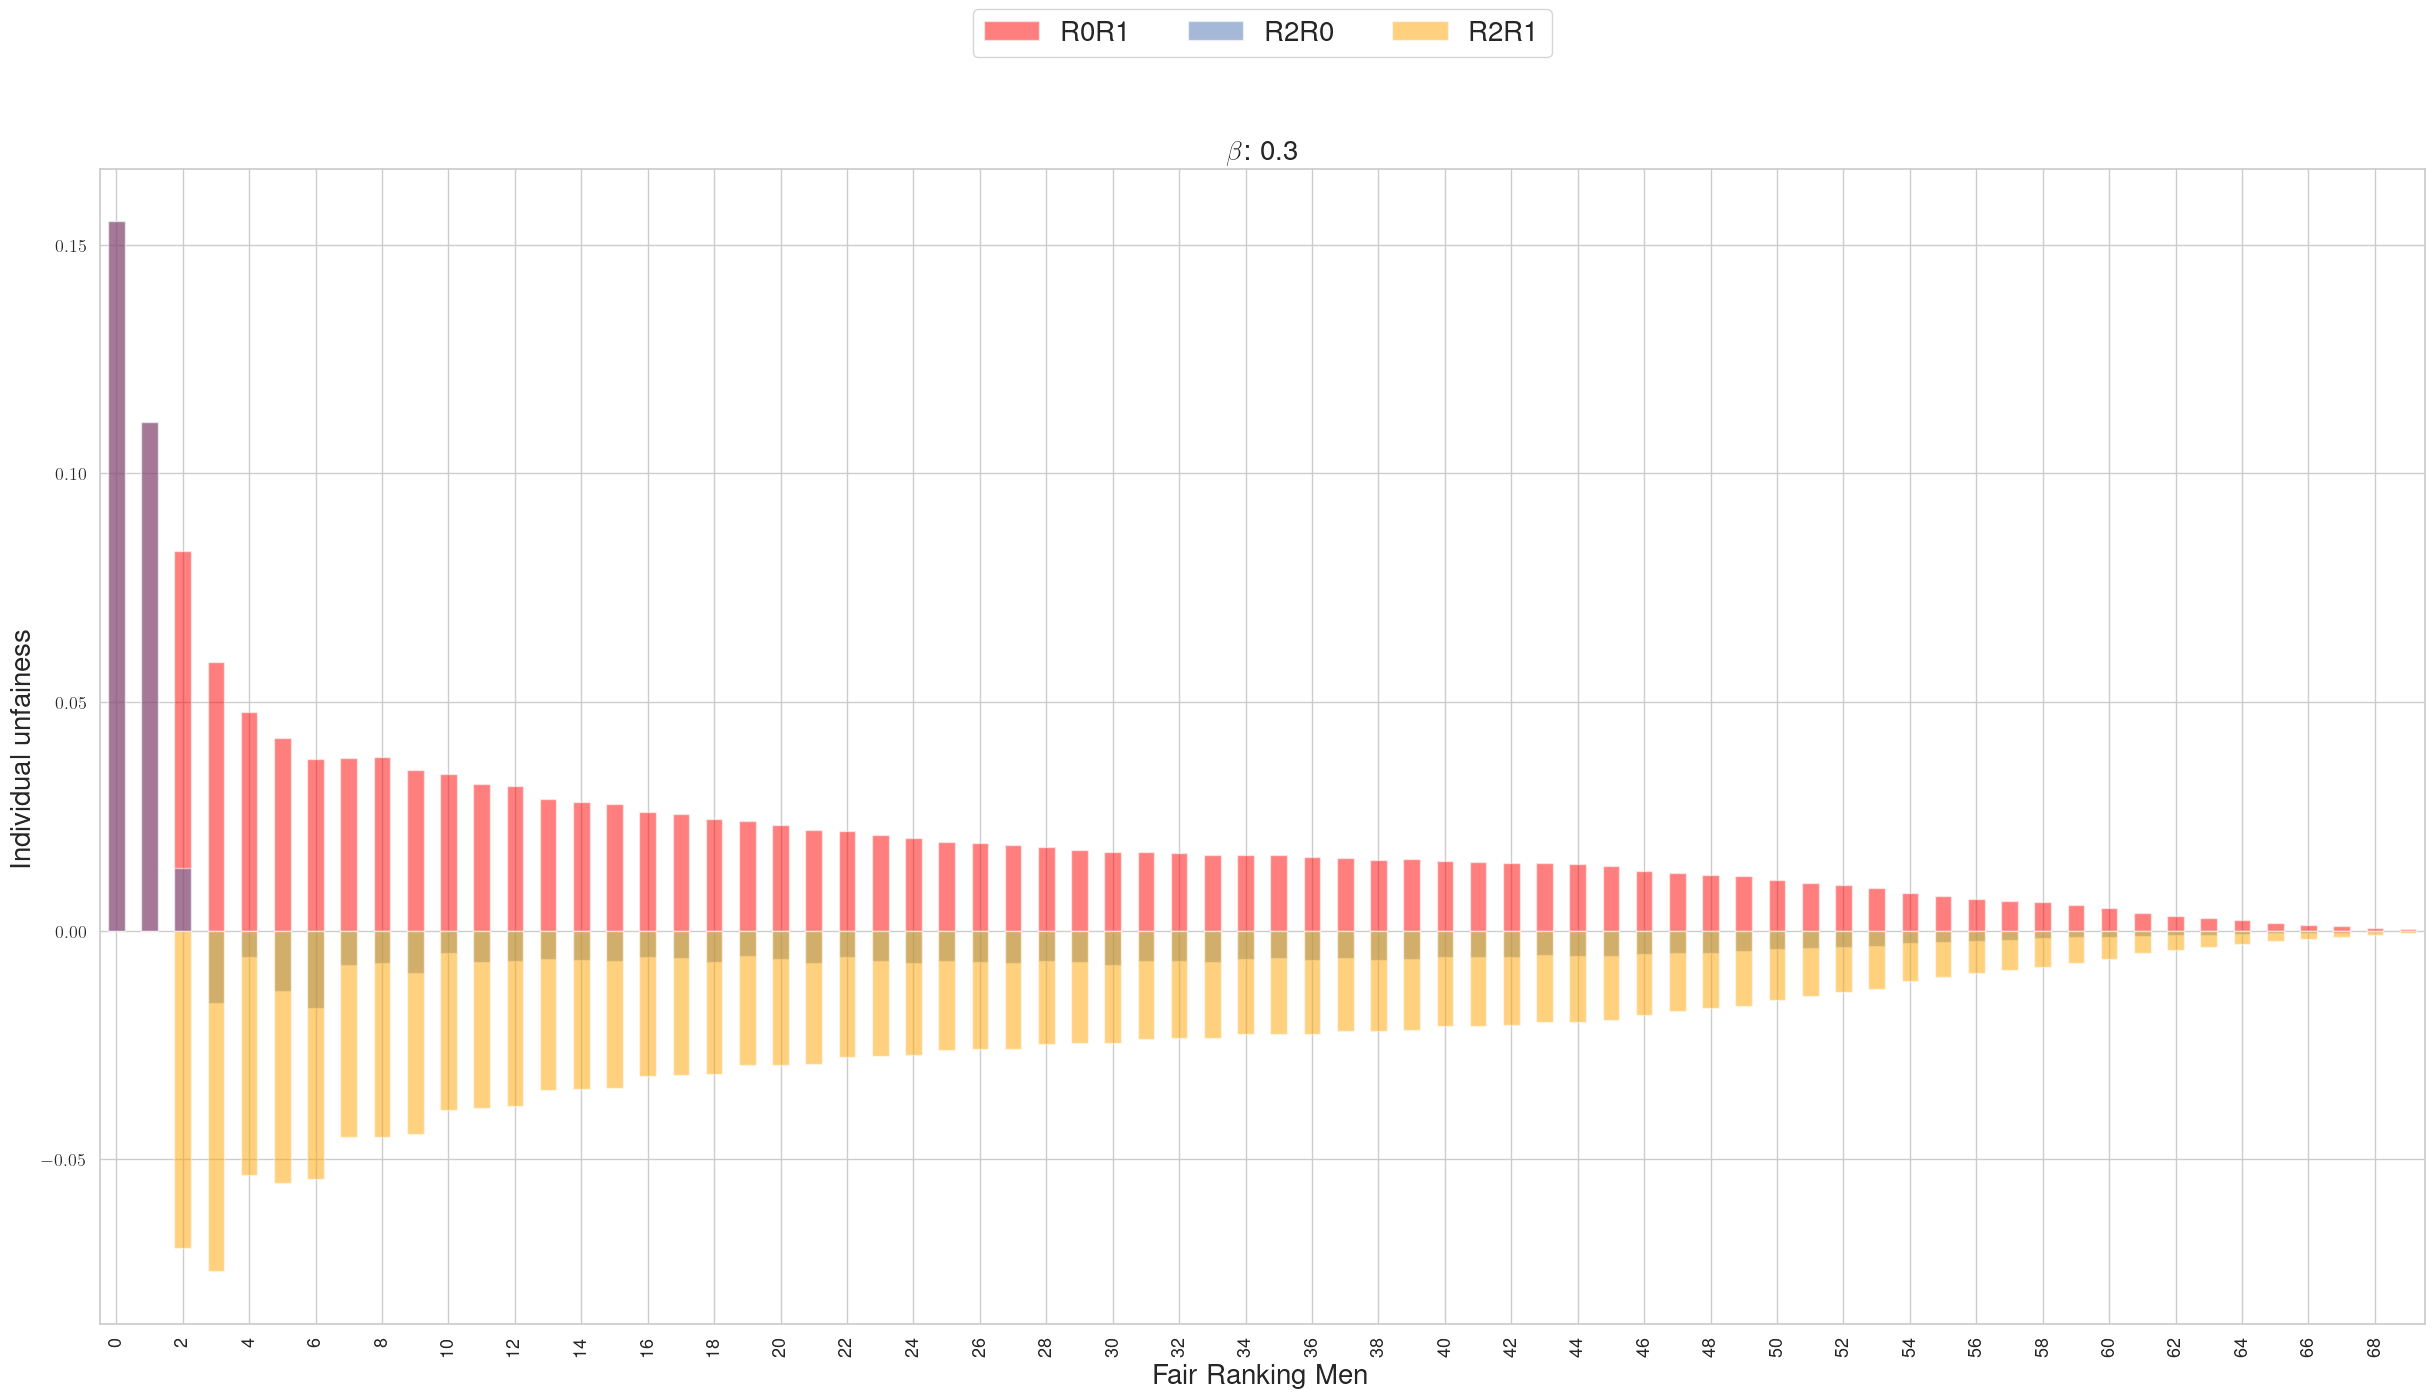

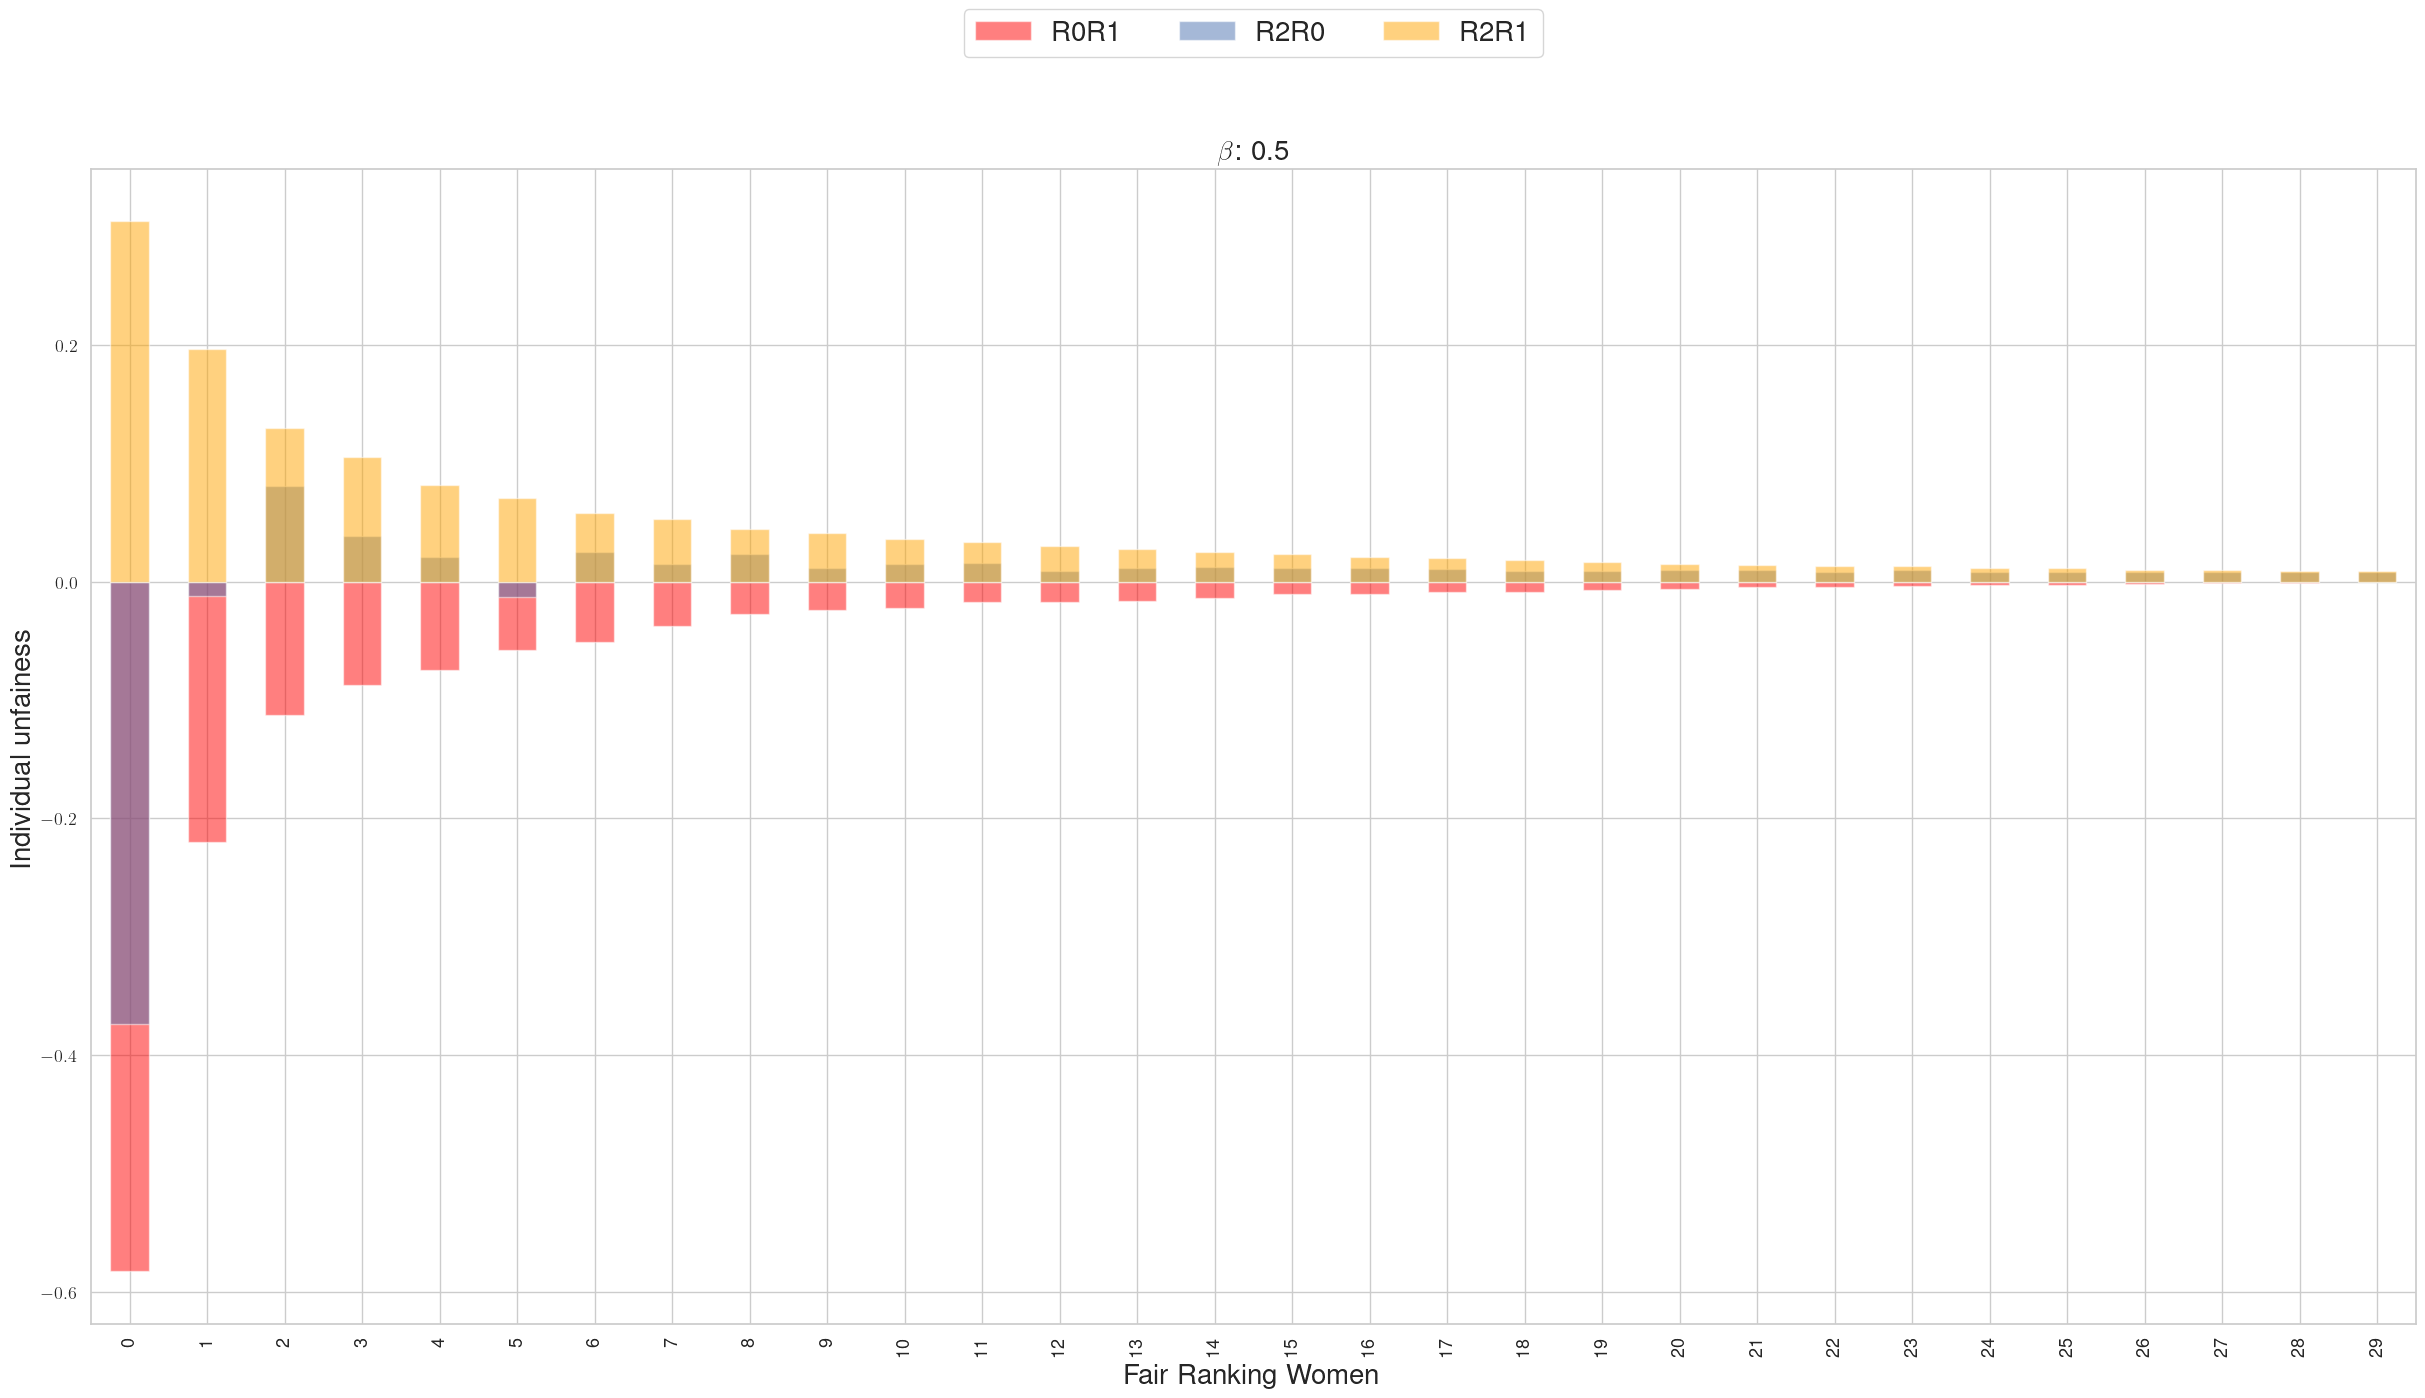

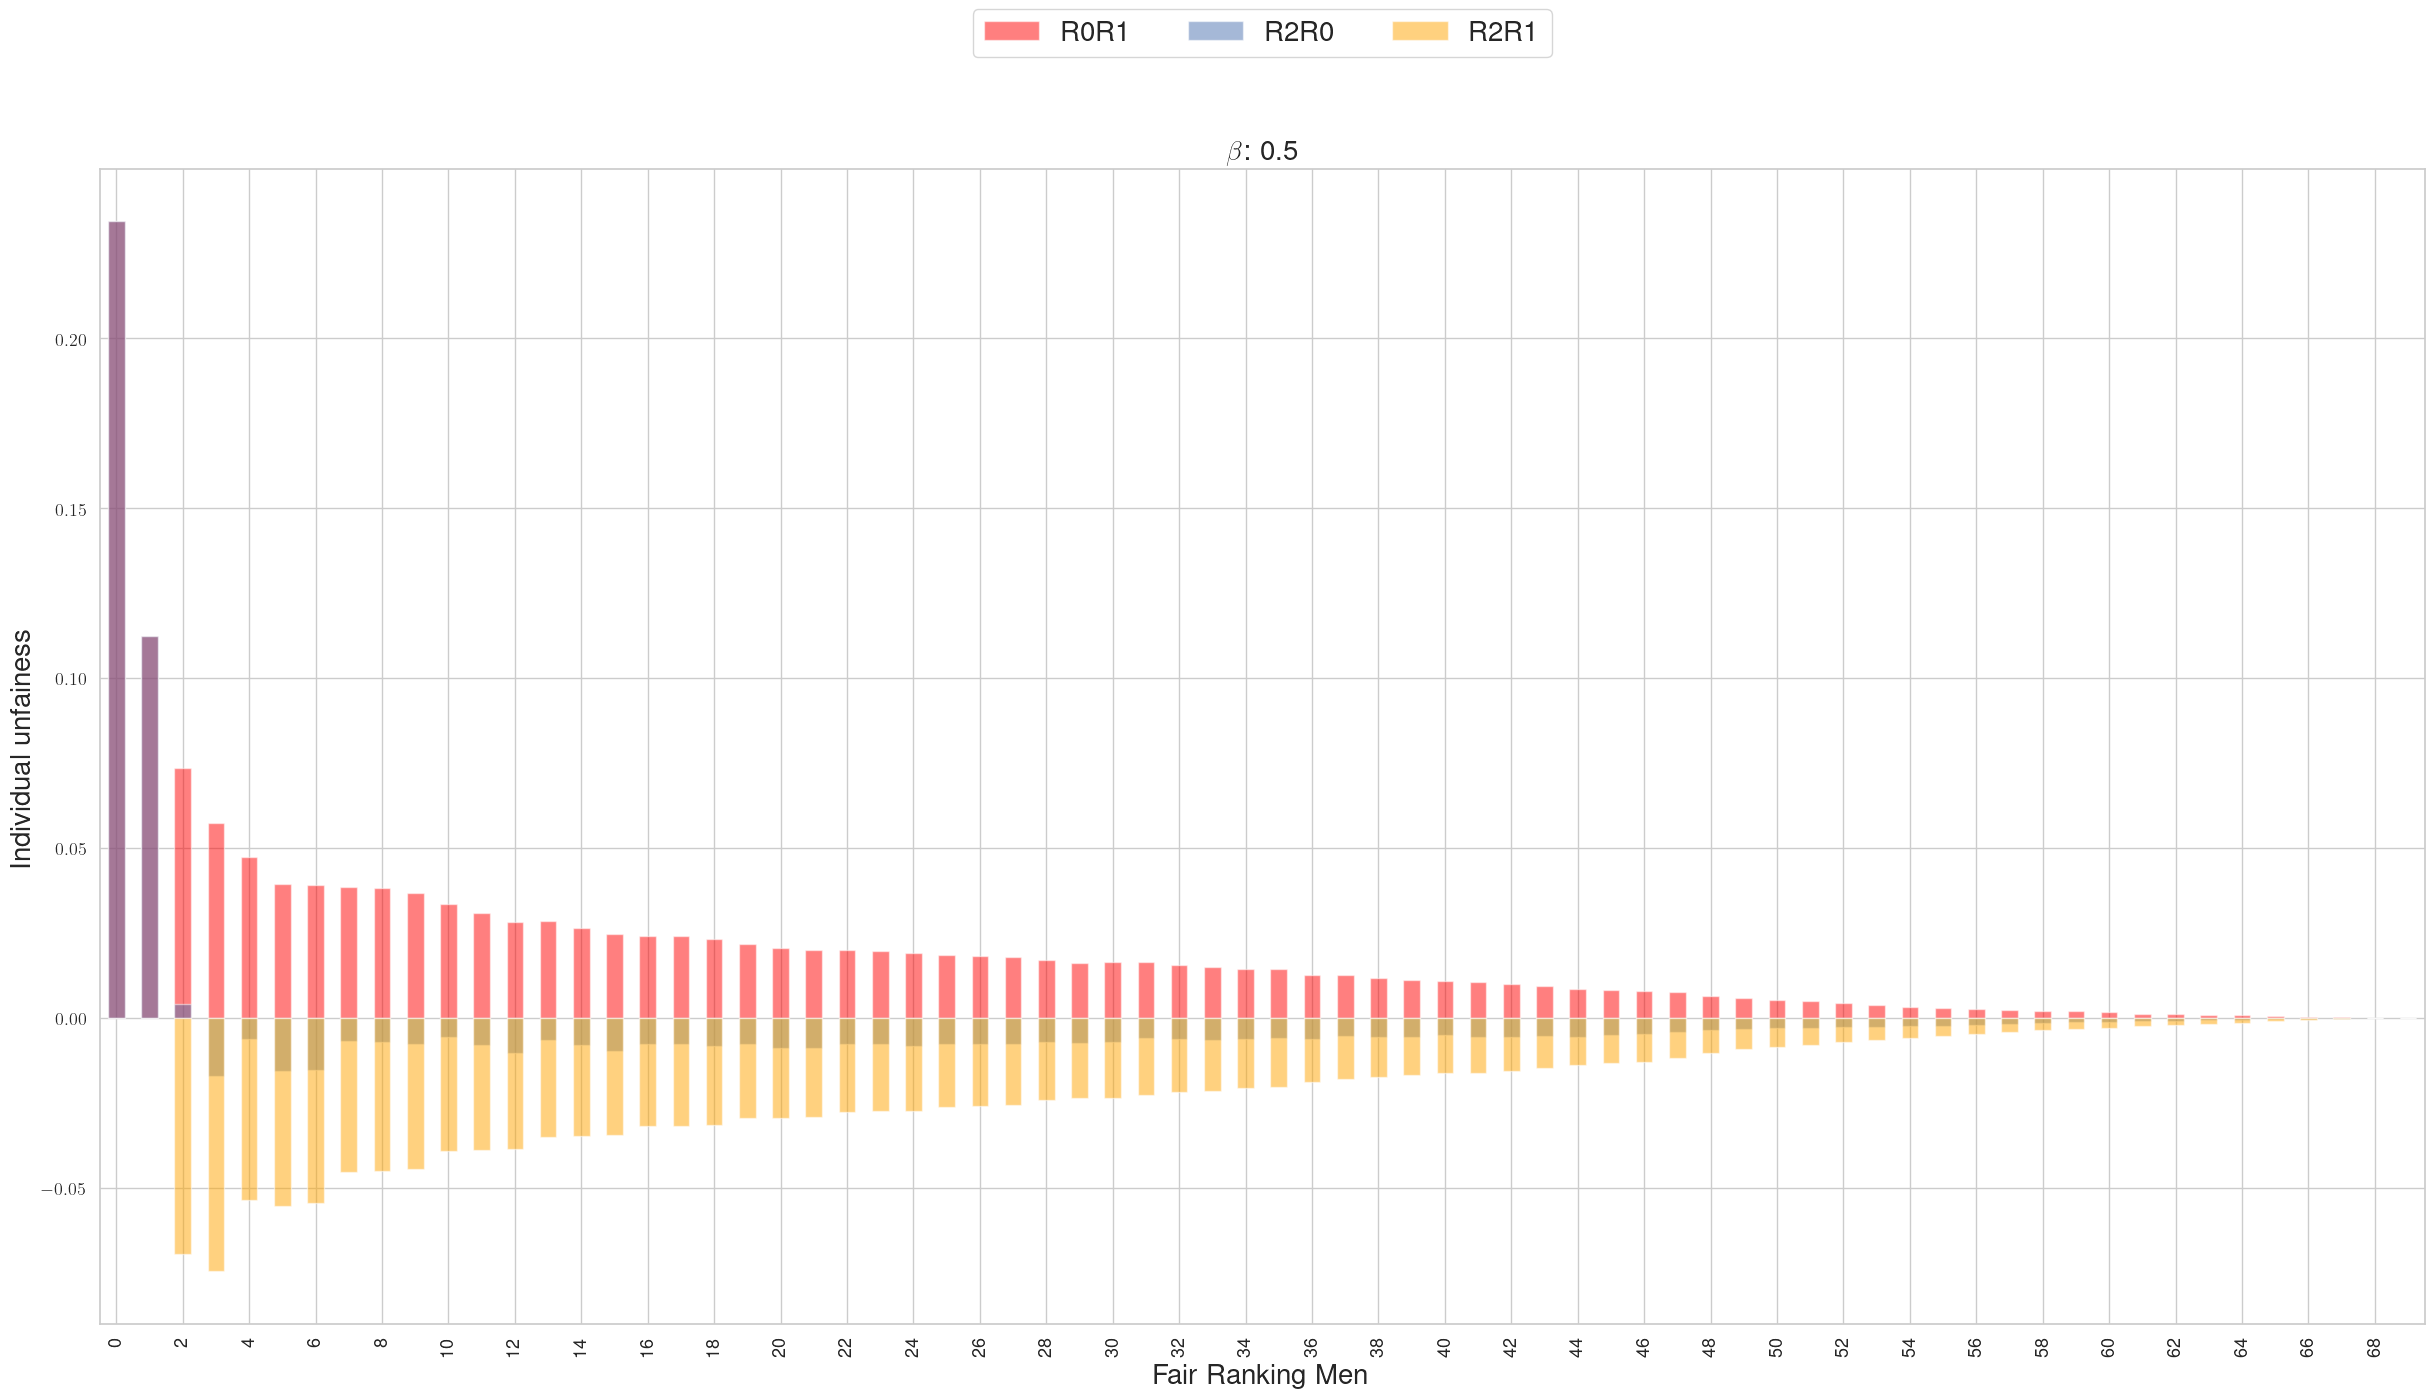

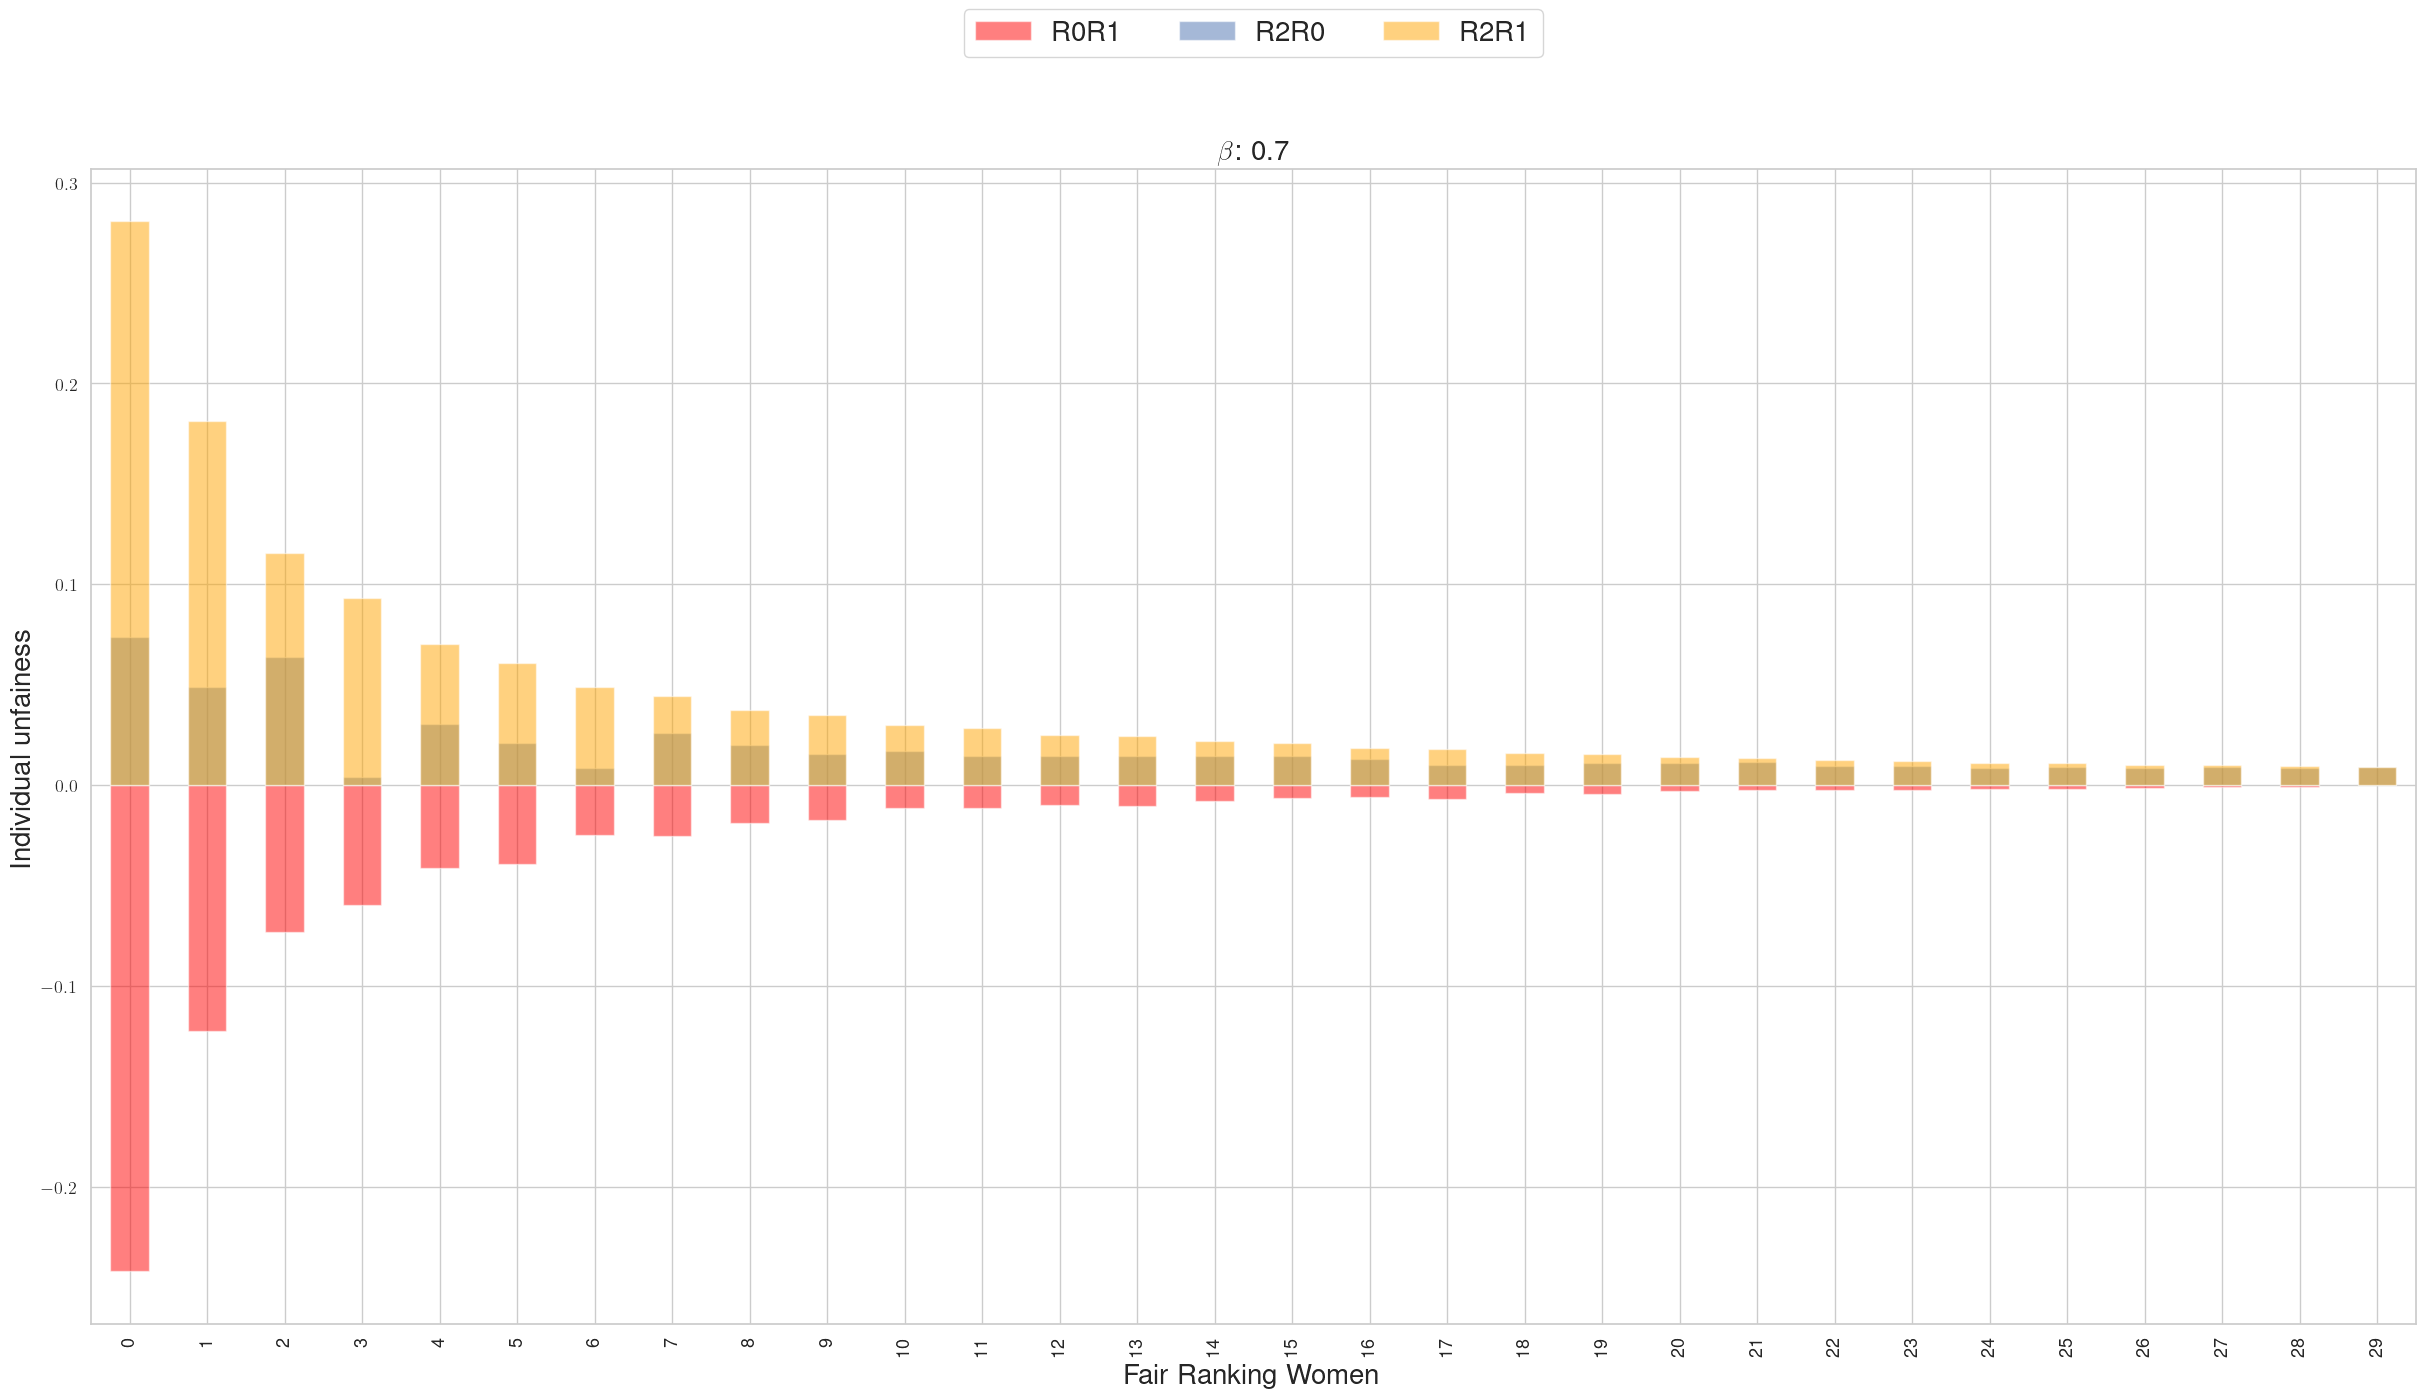

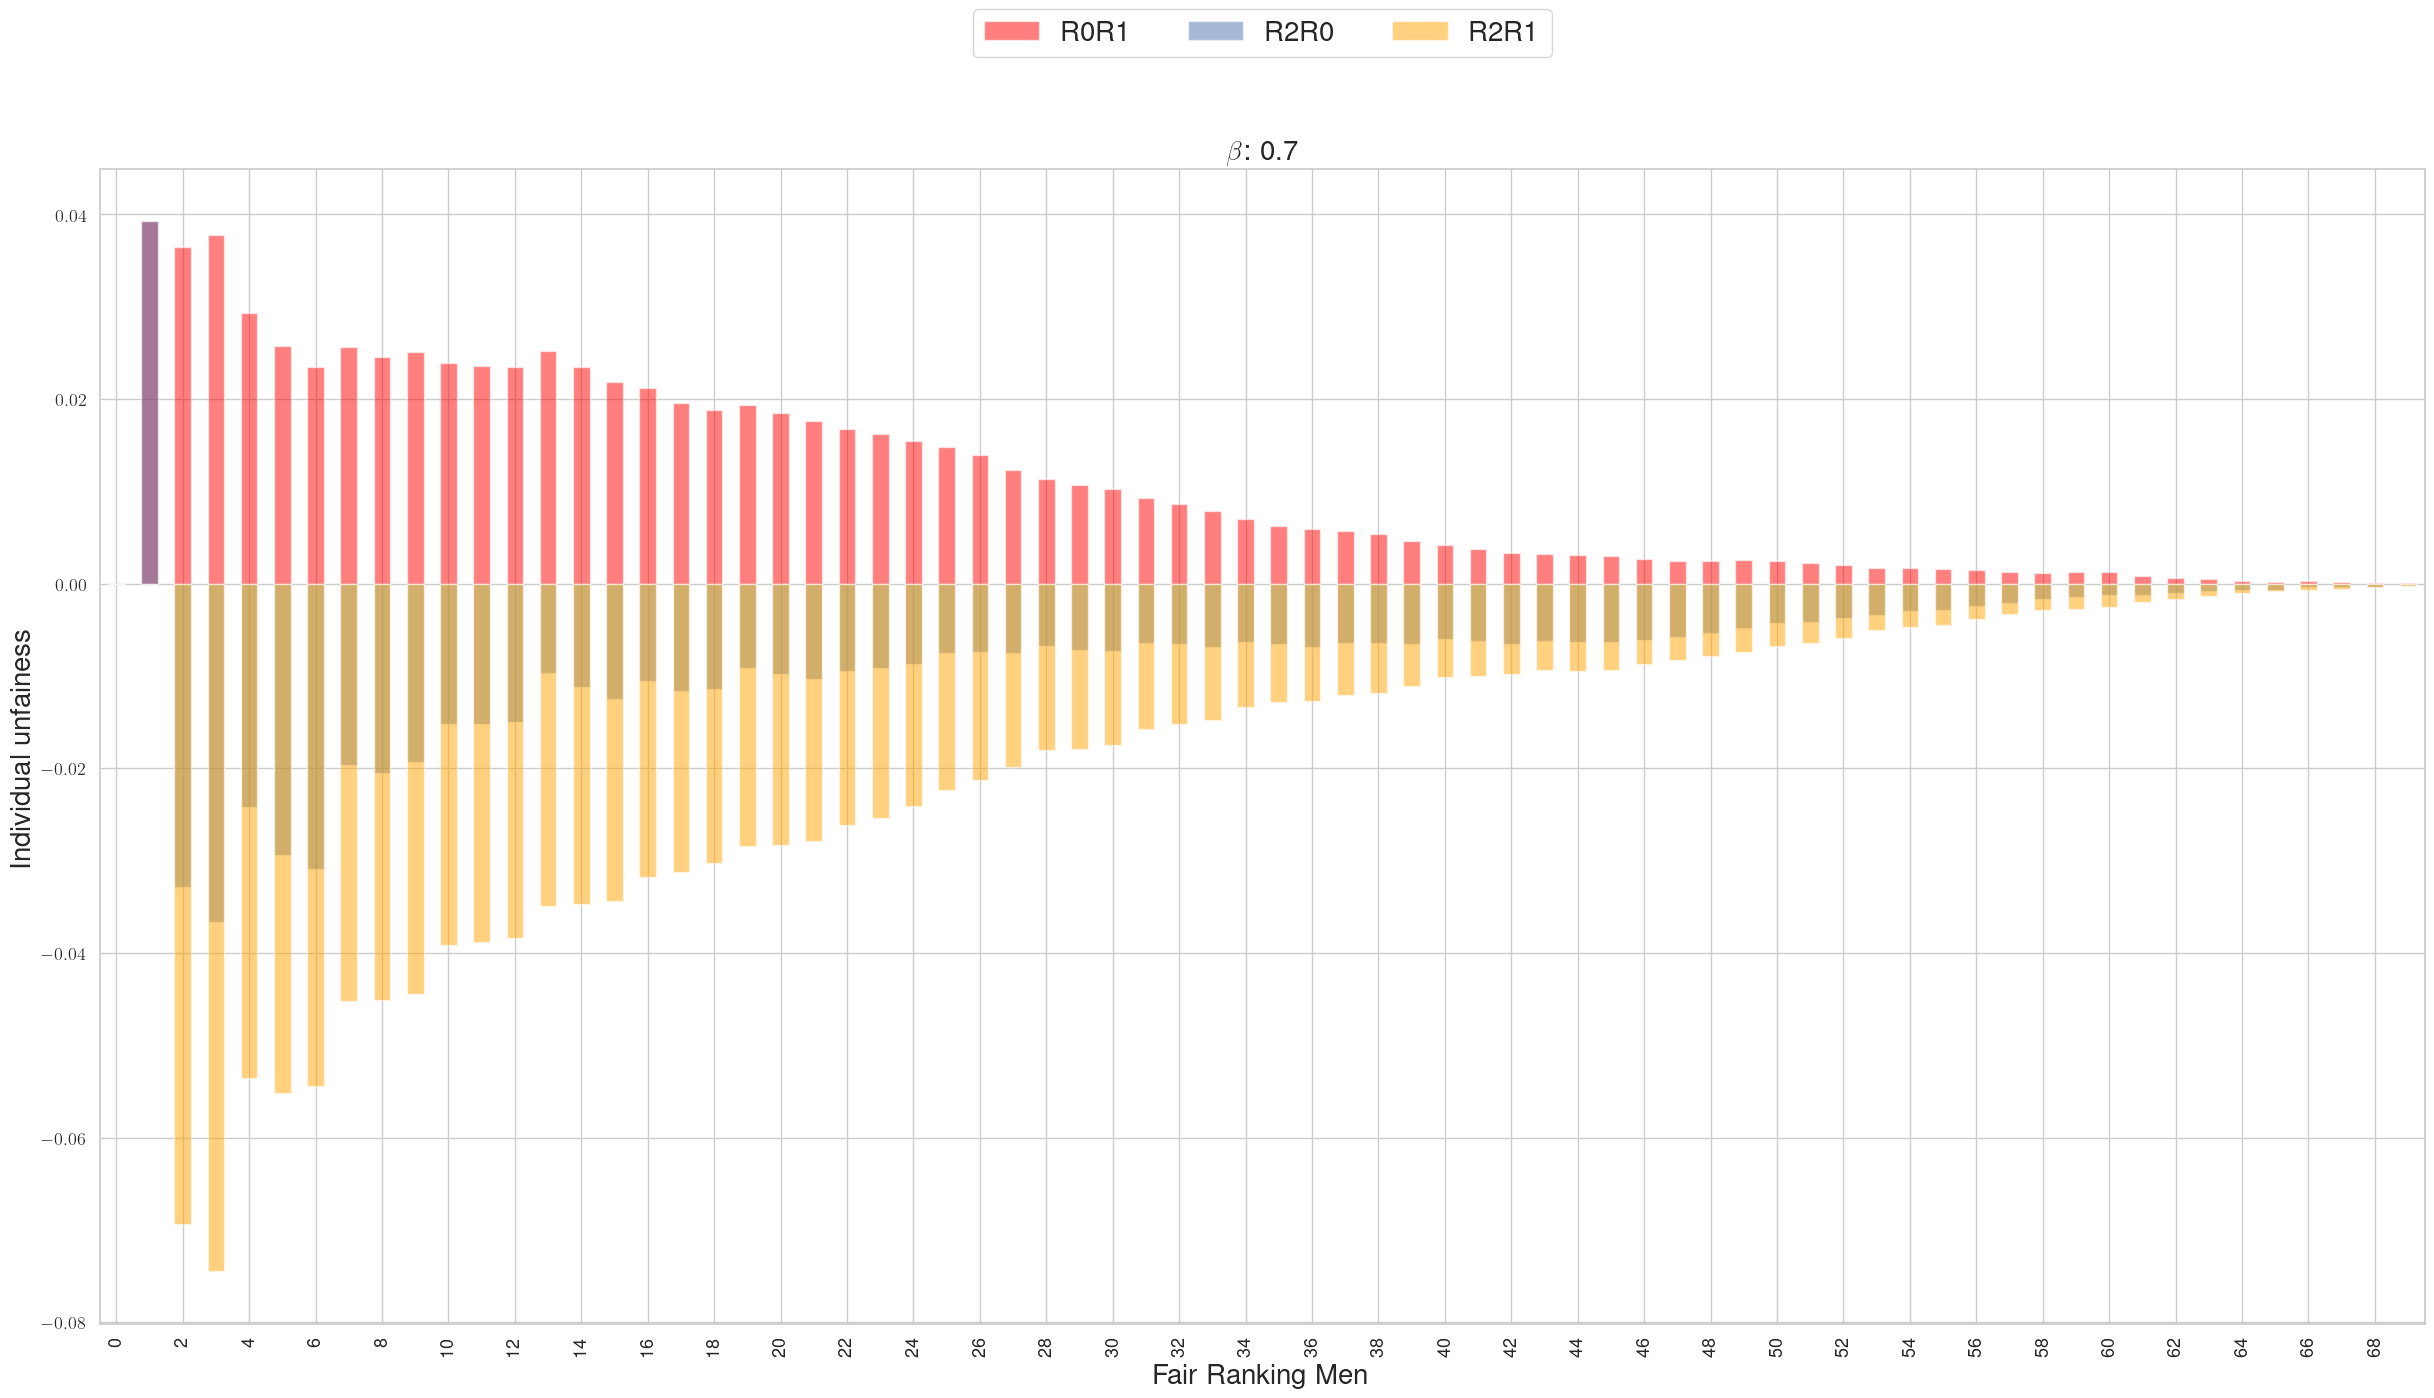

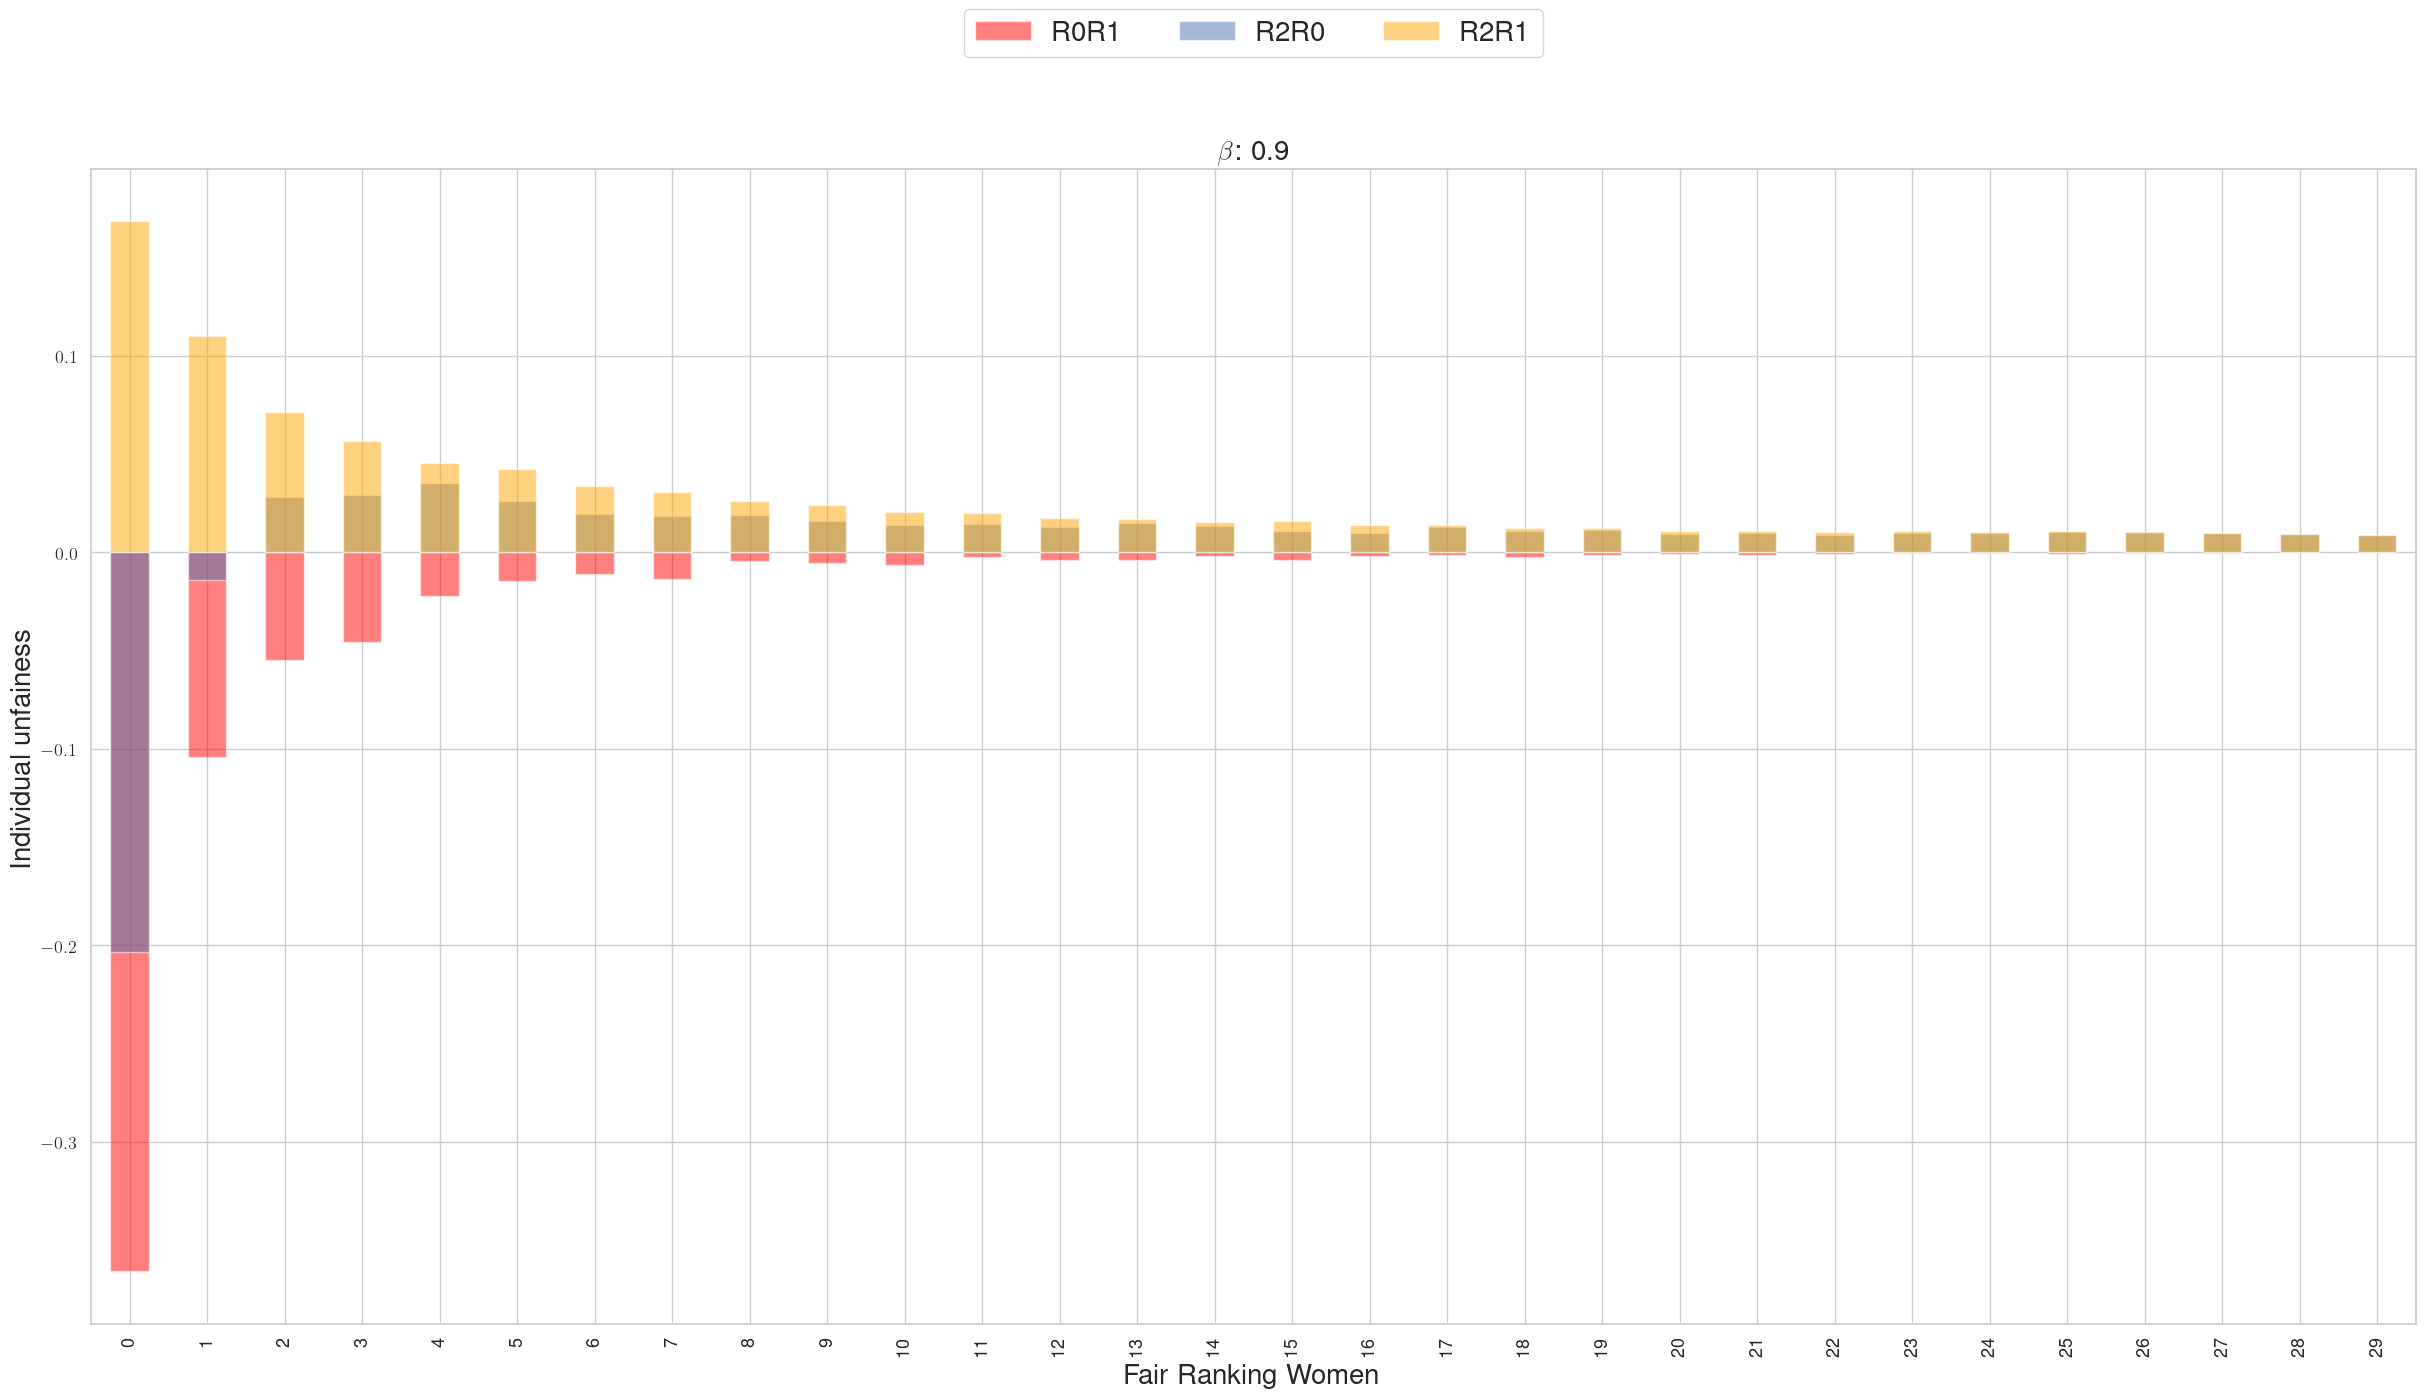

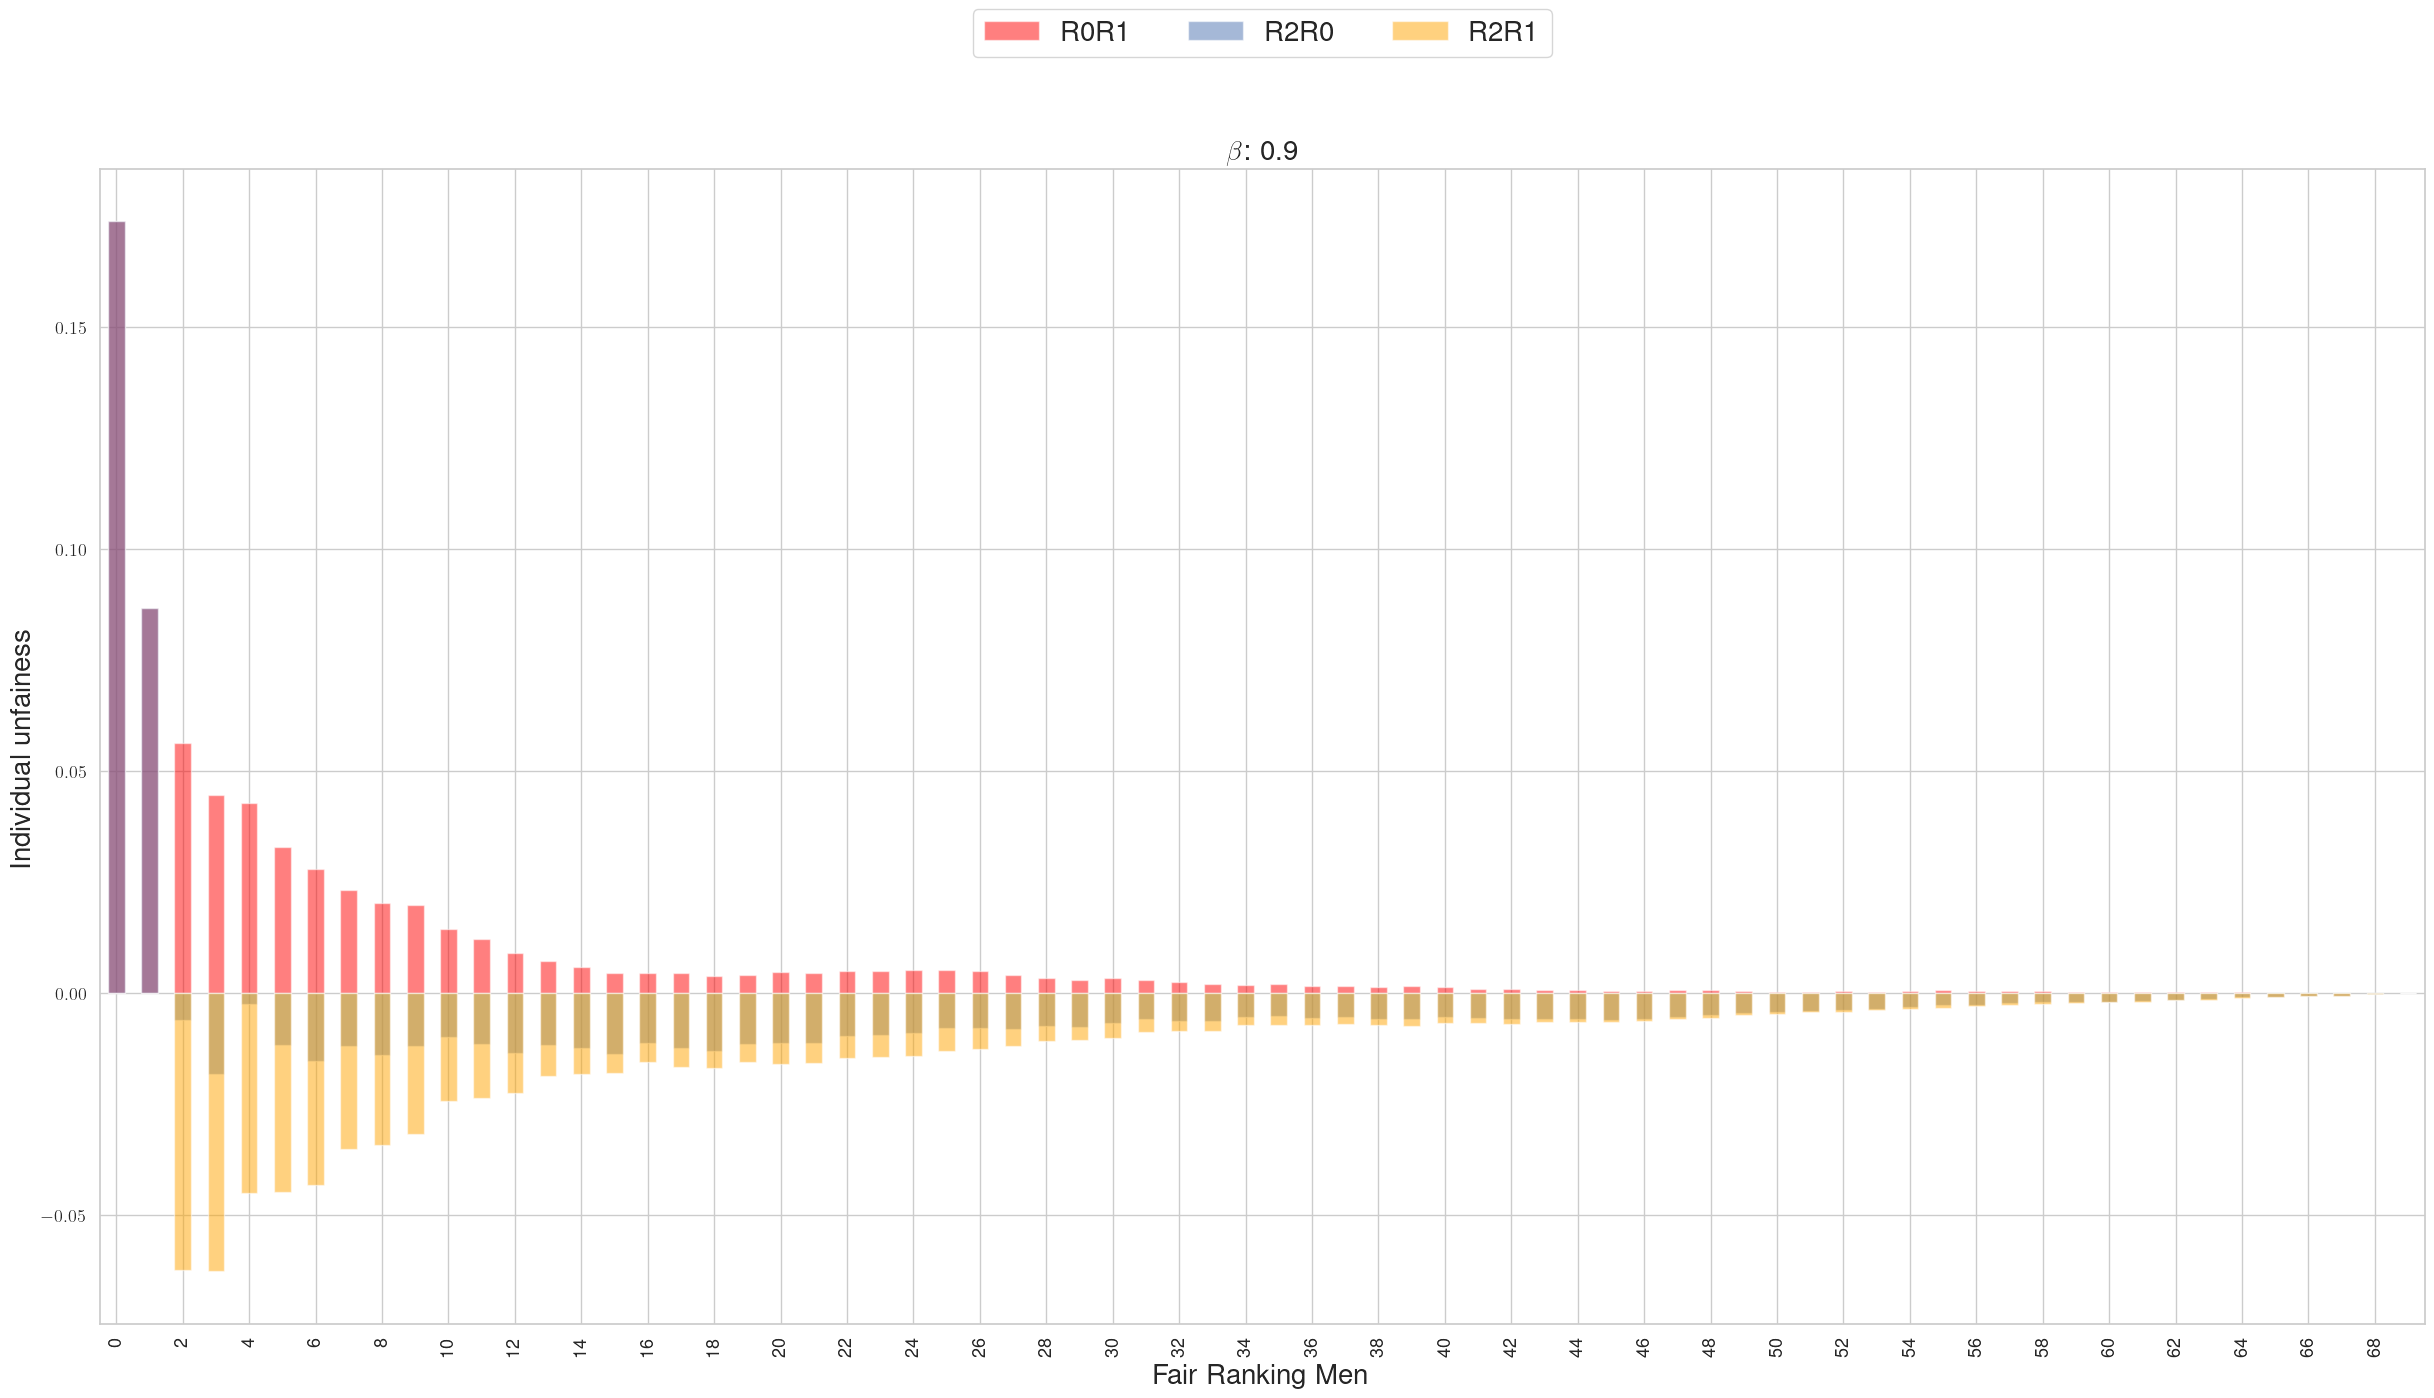

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.74it/s]


Proportion of Women: 0.5


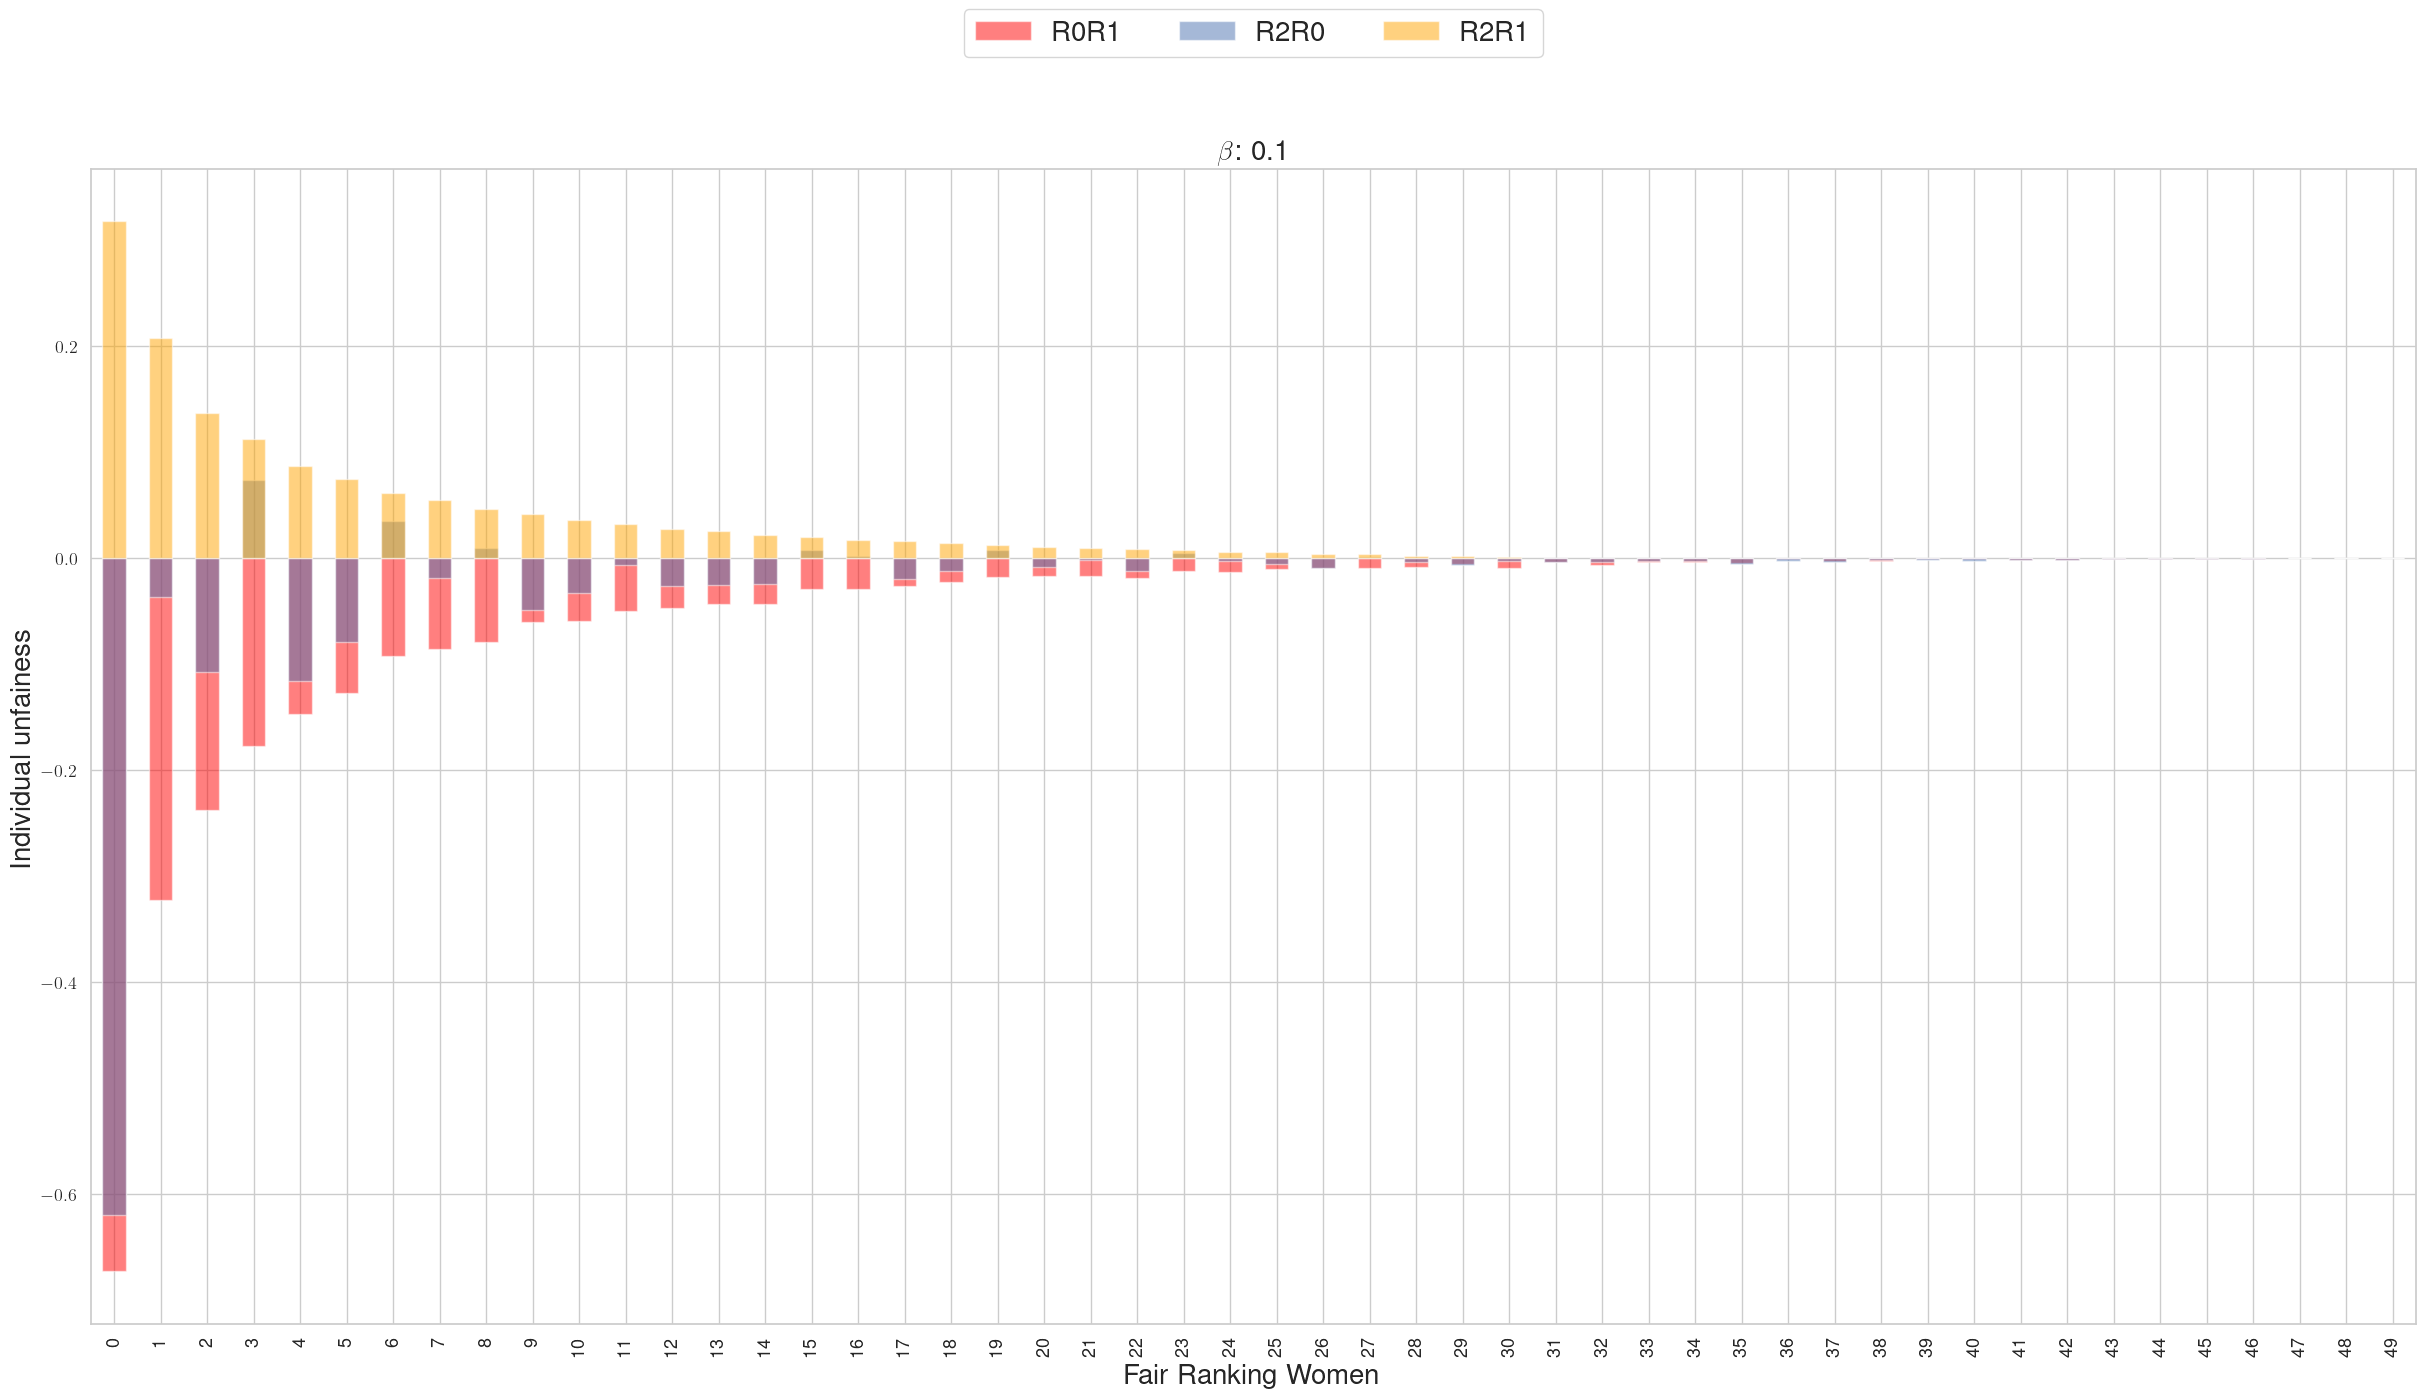

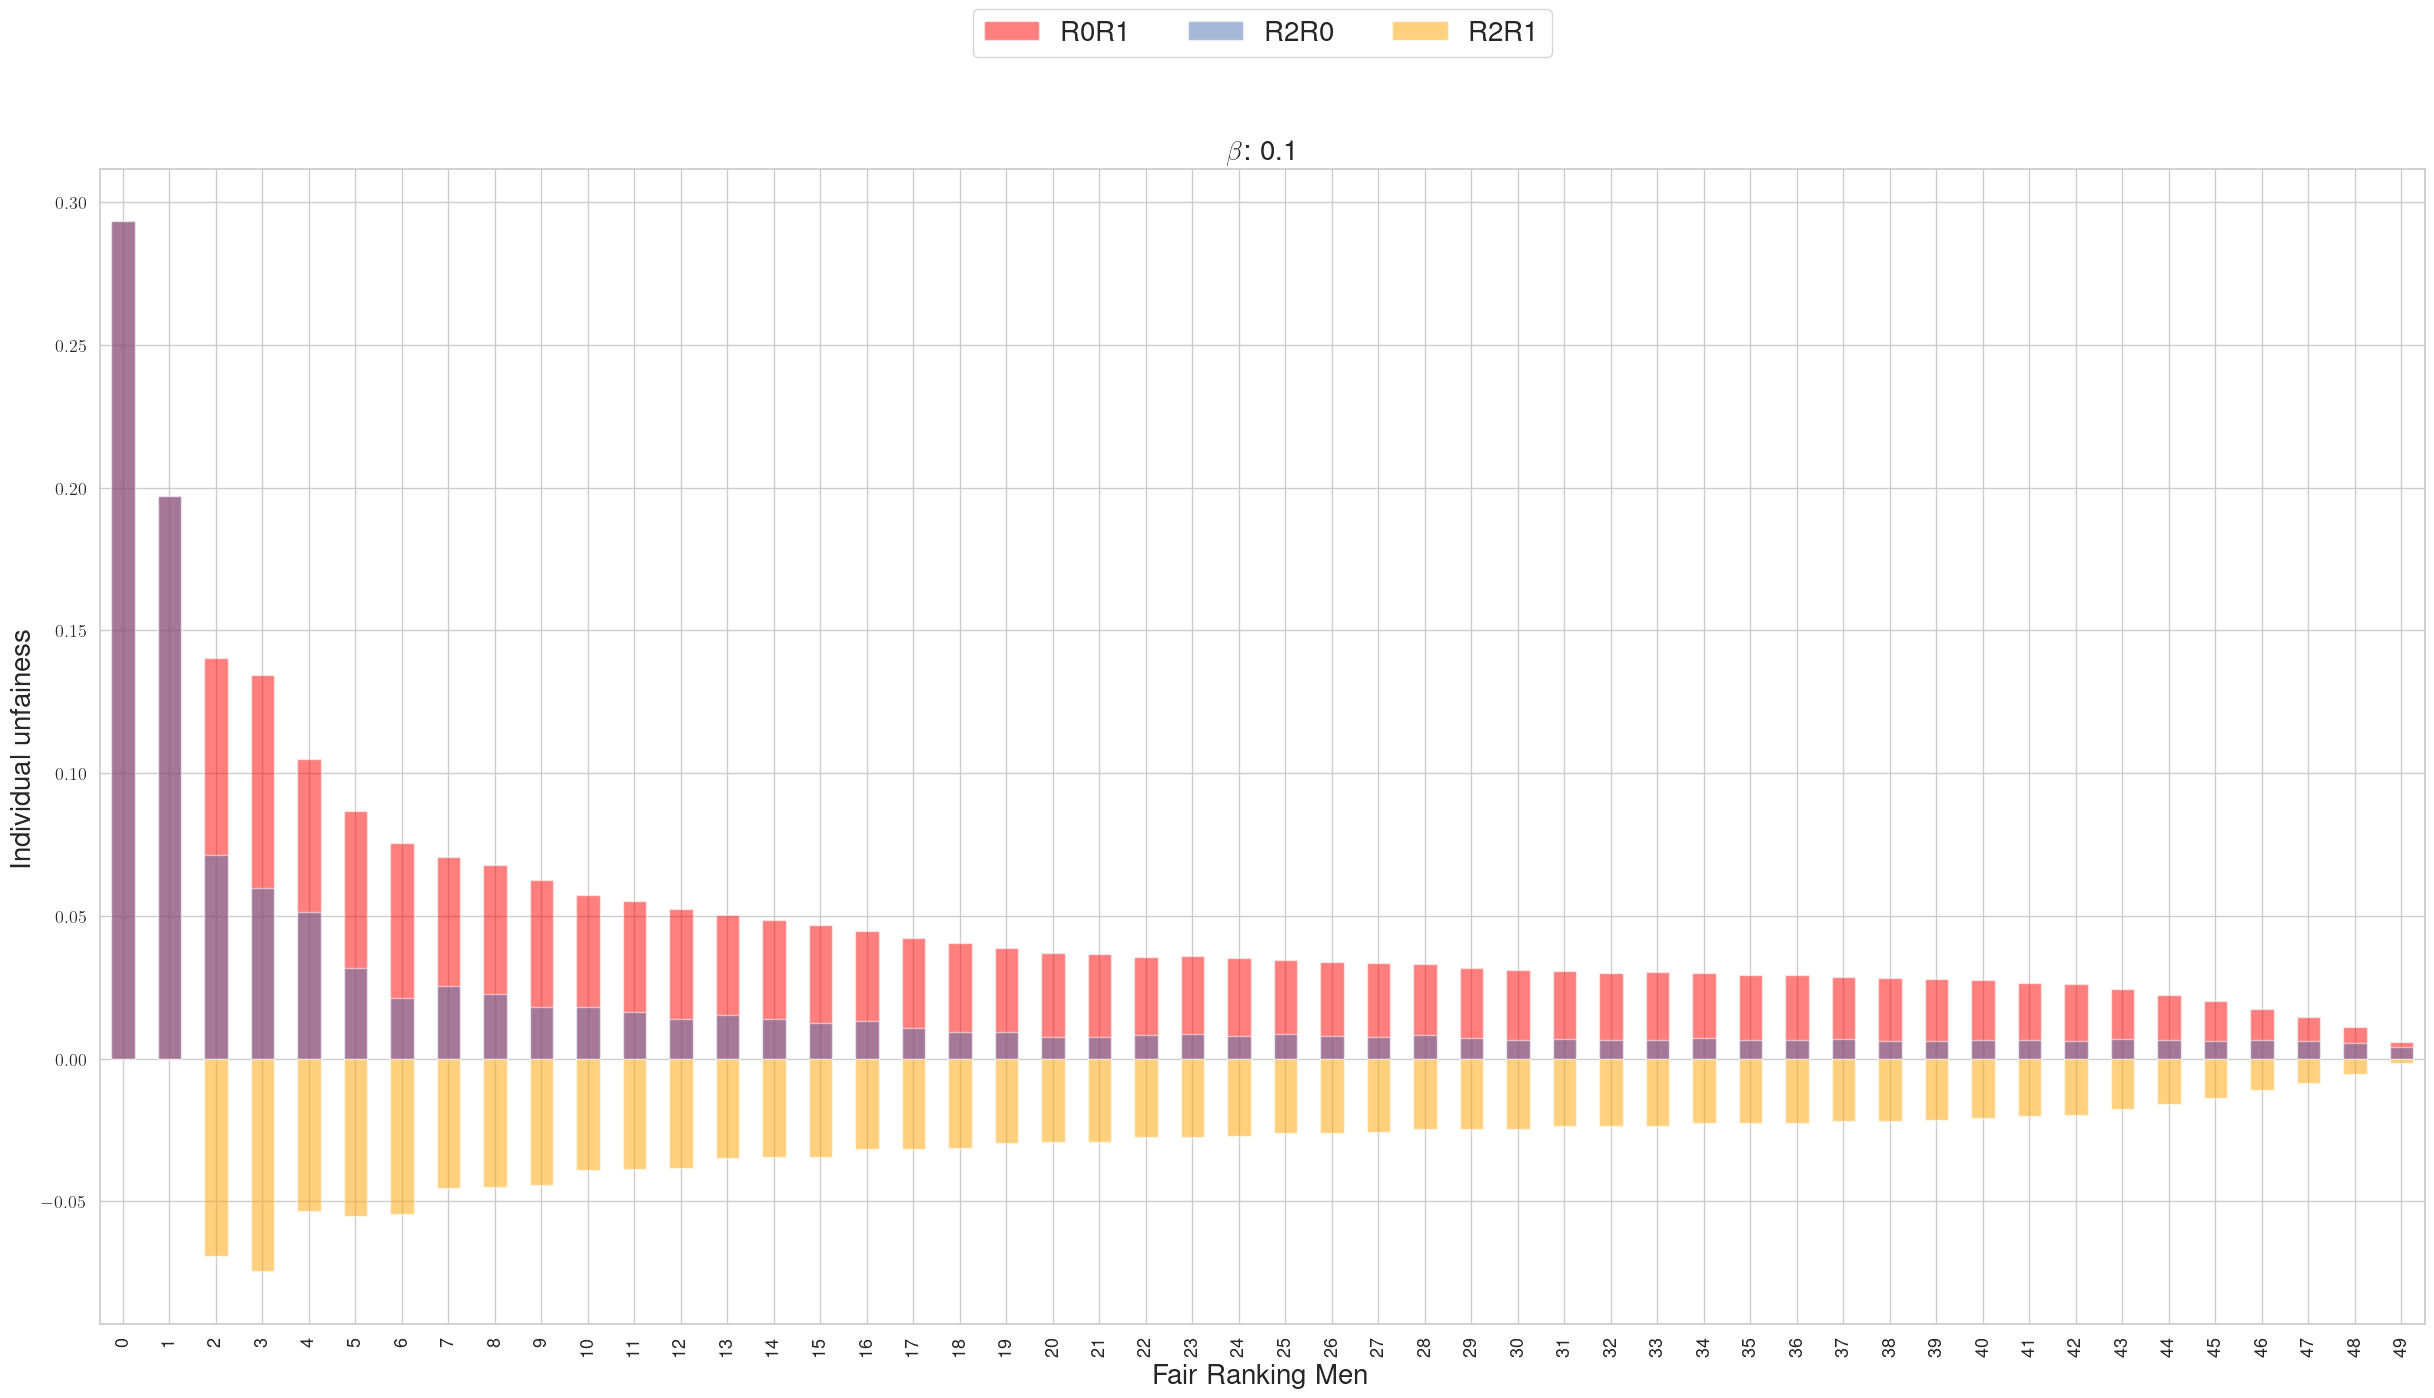

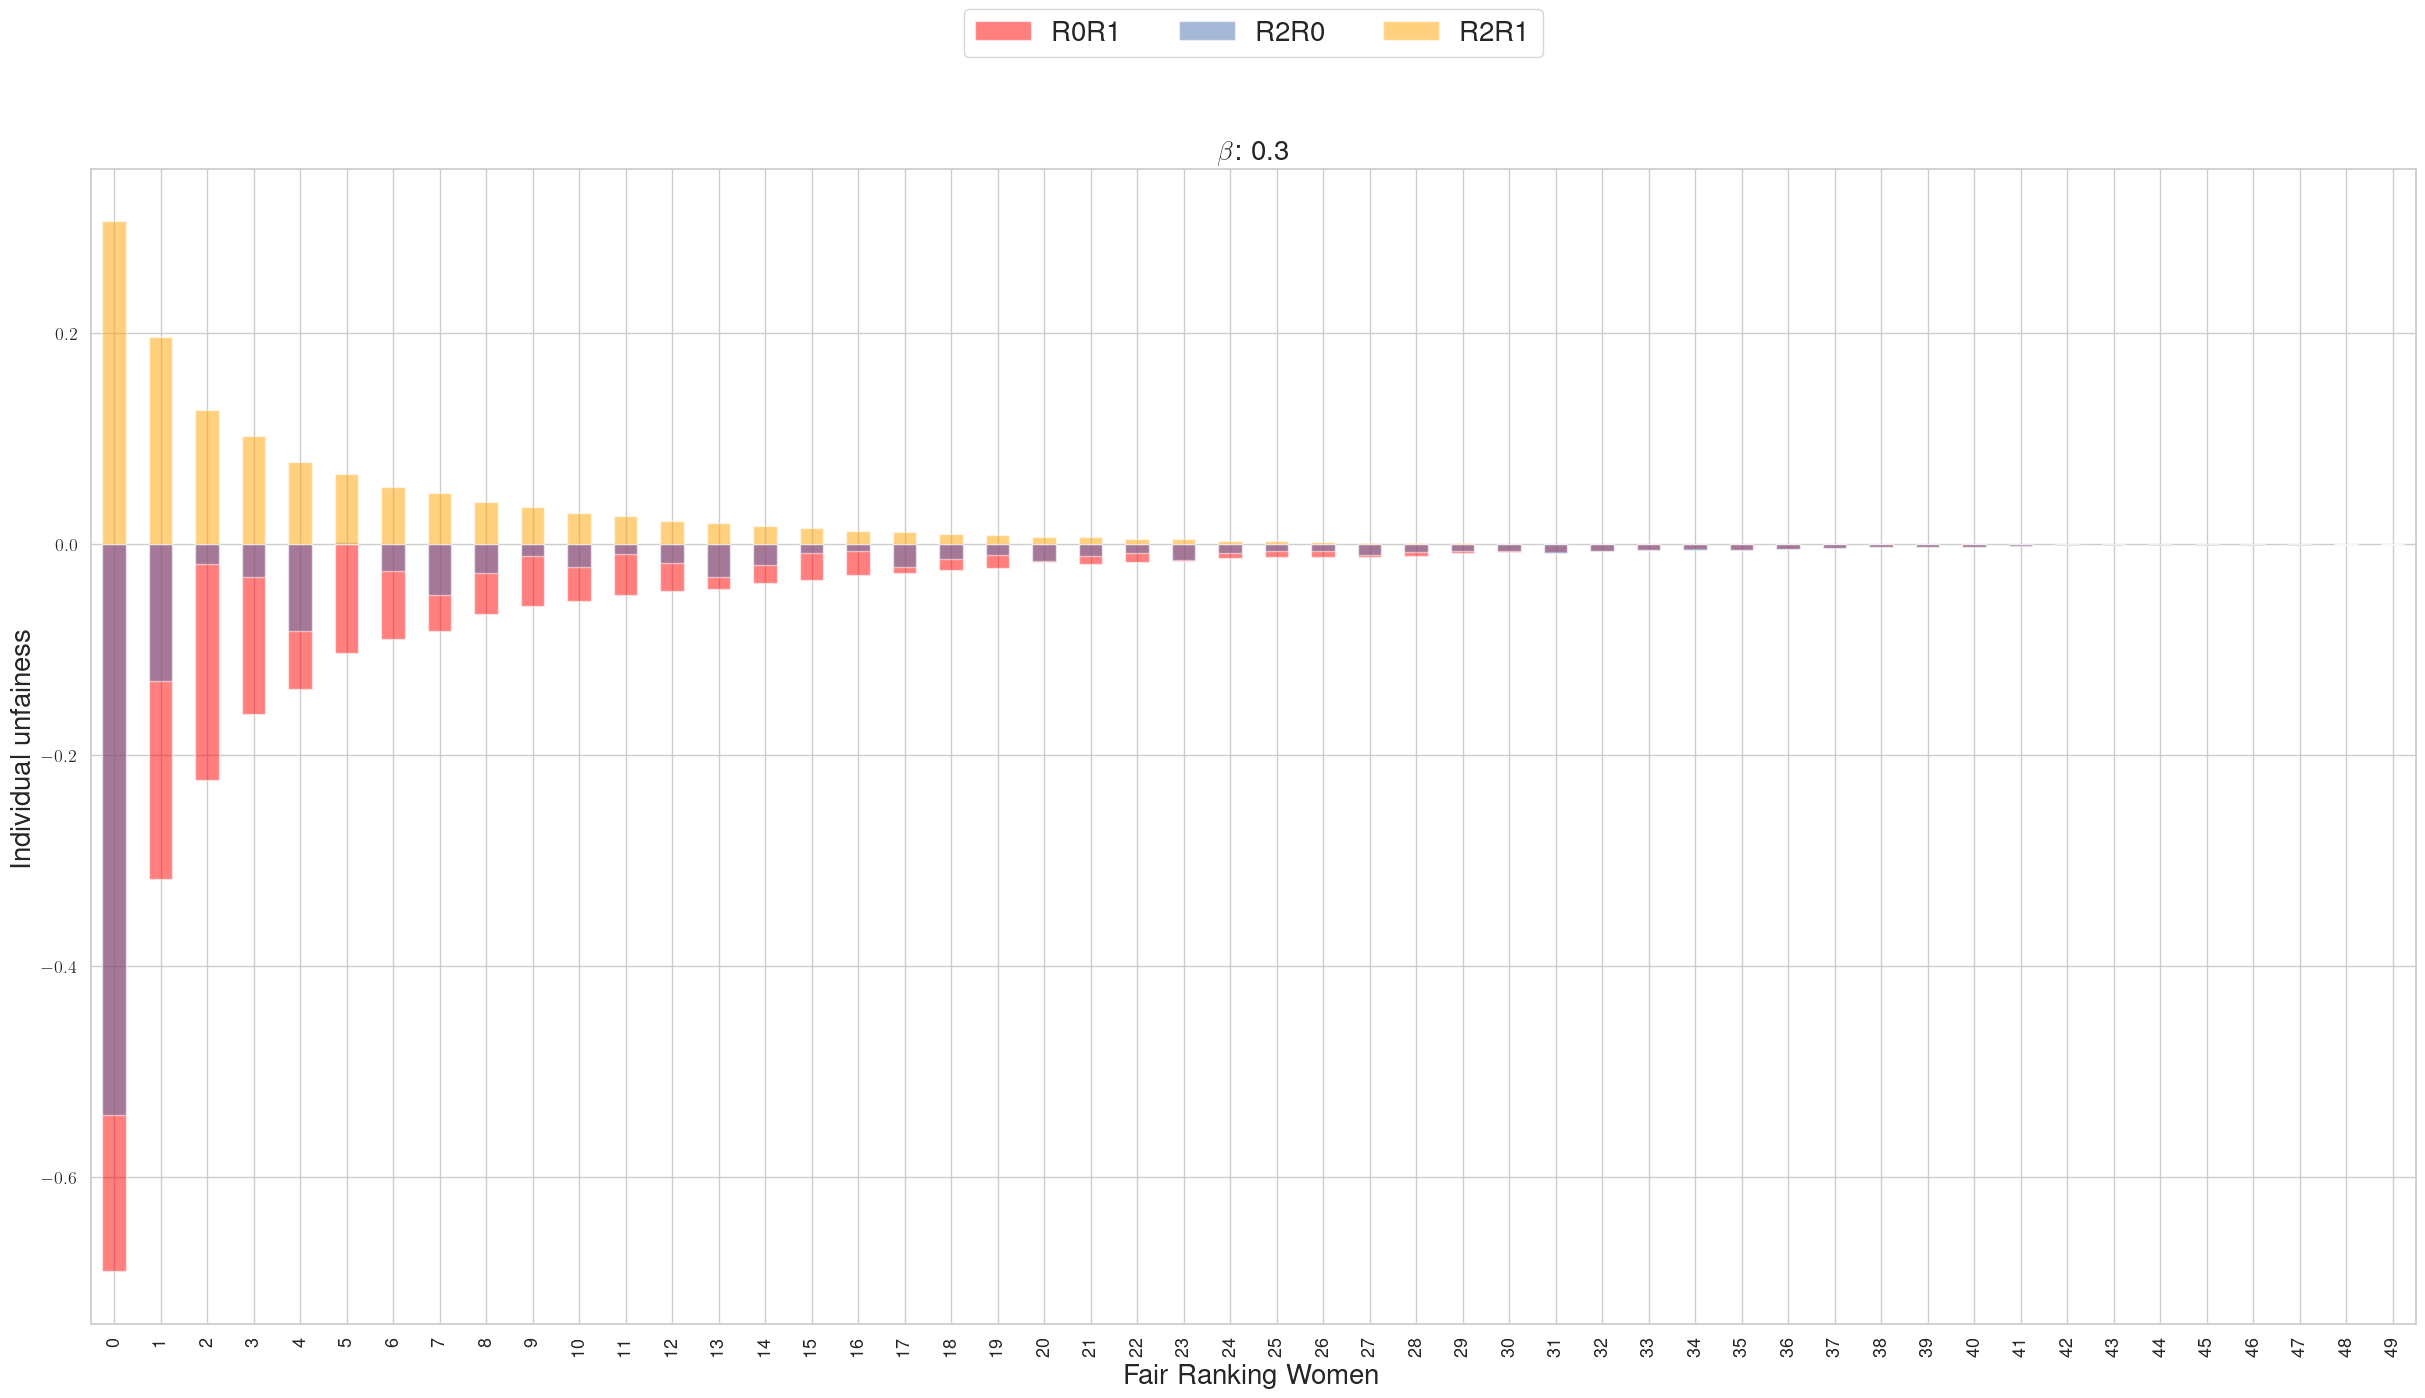

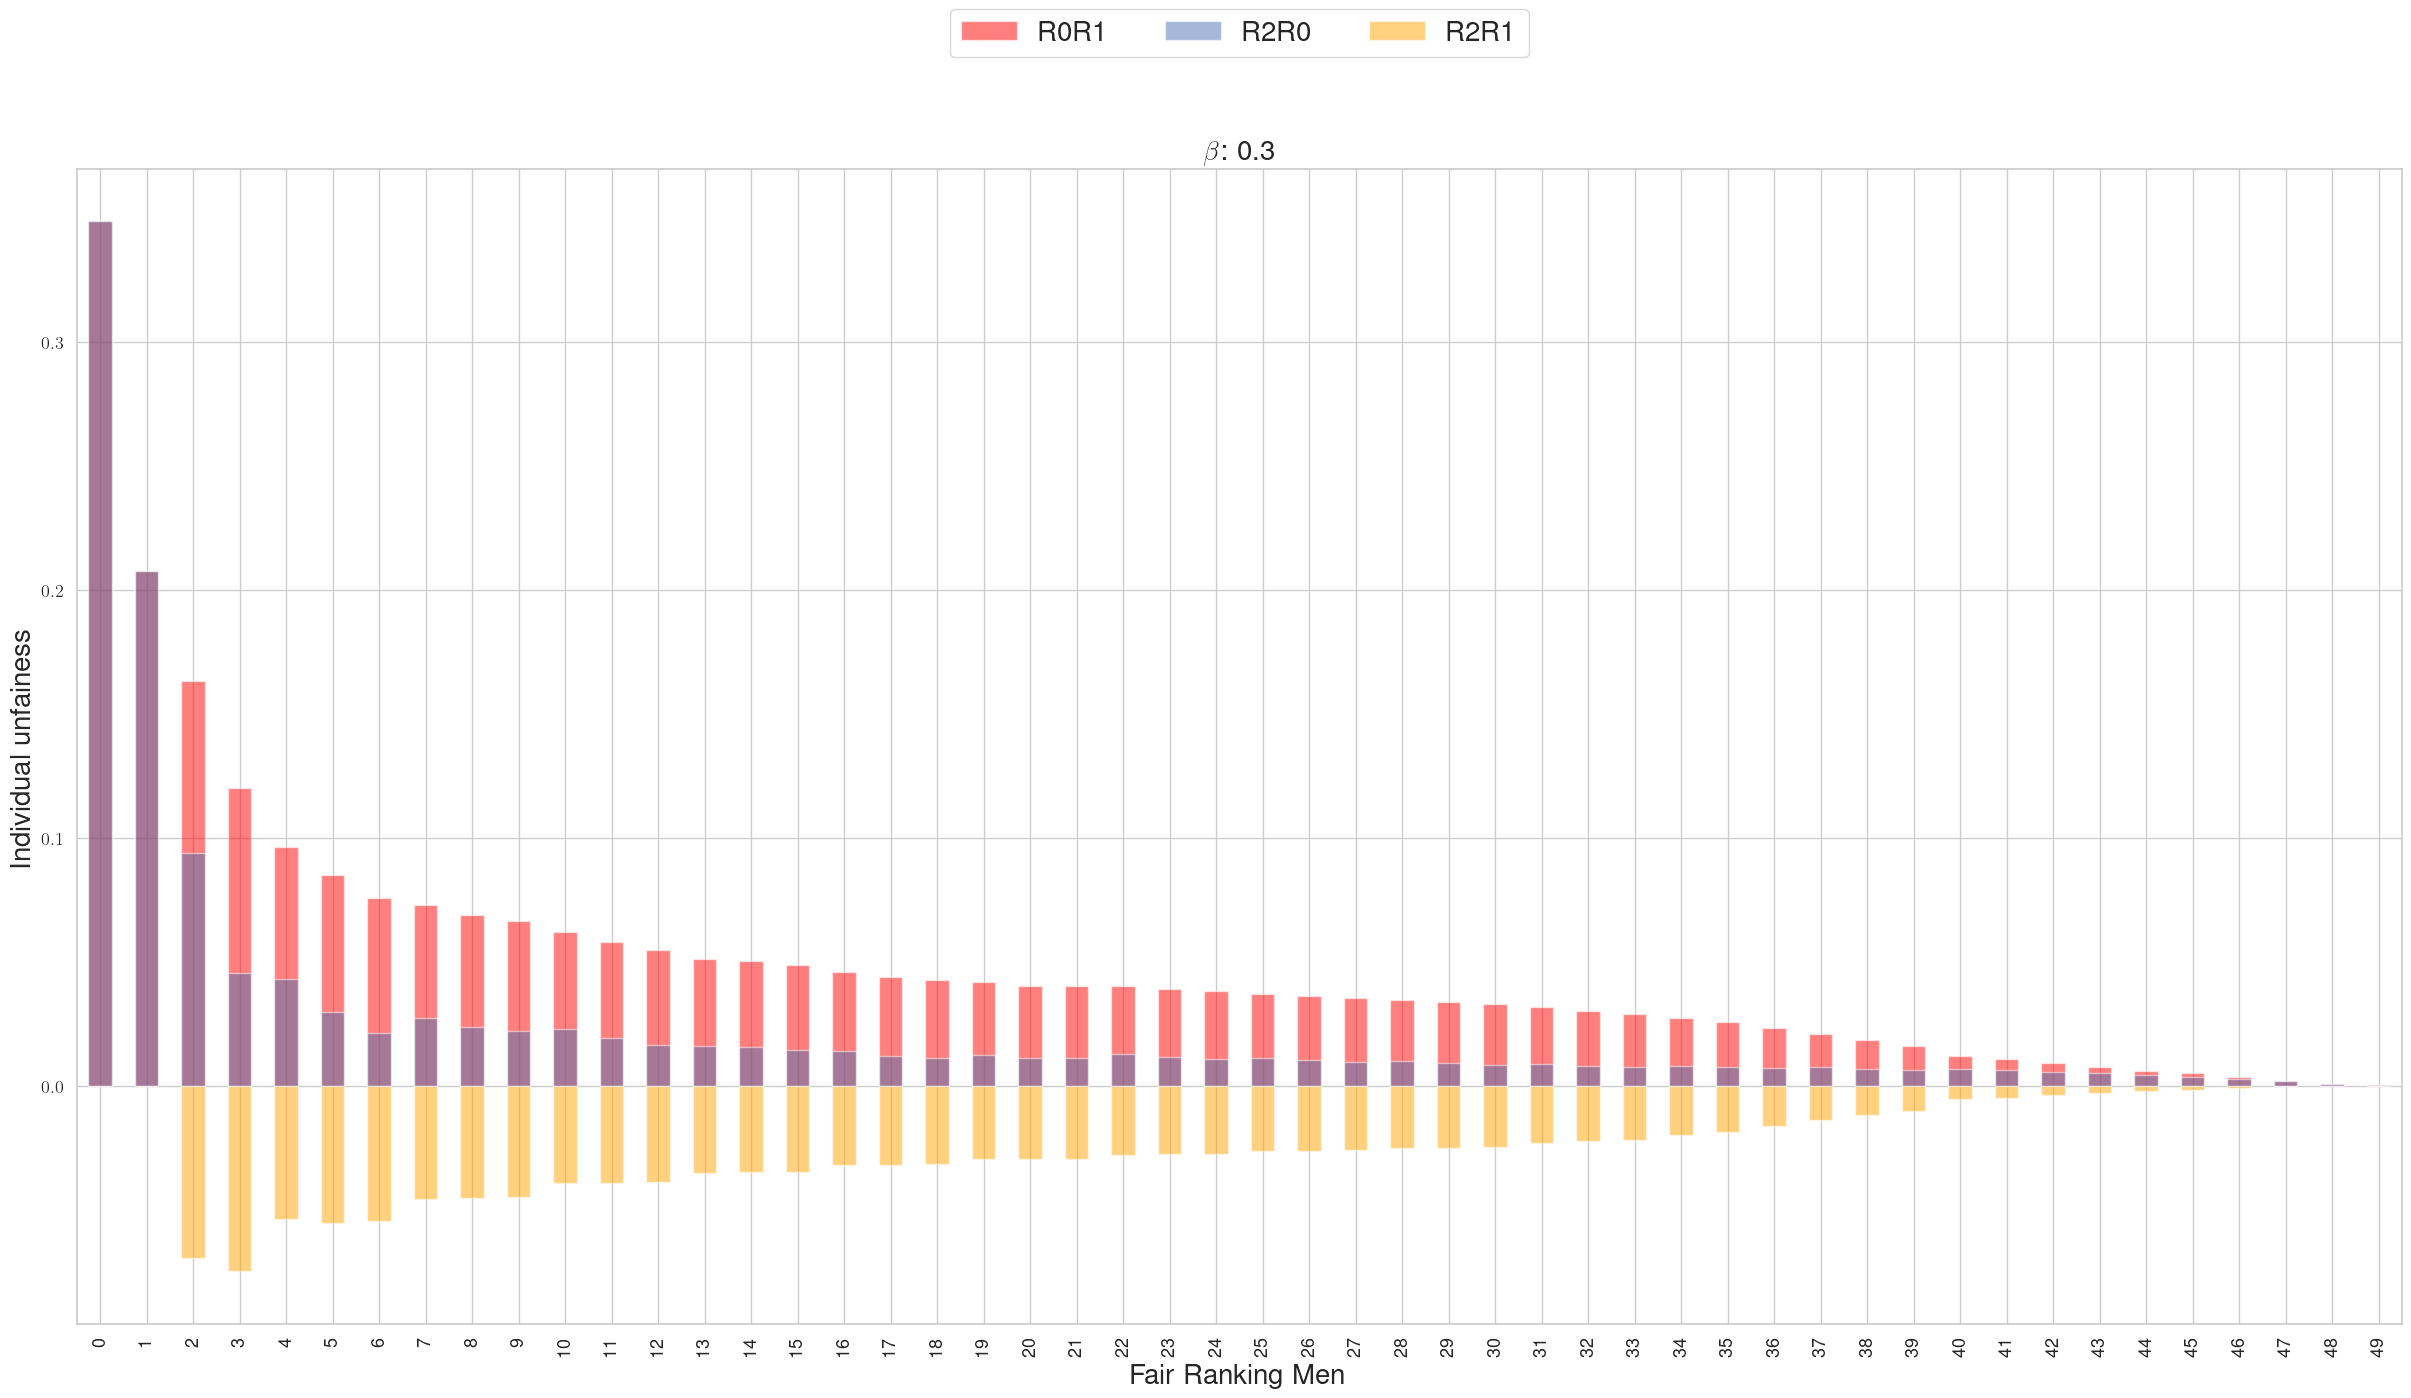

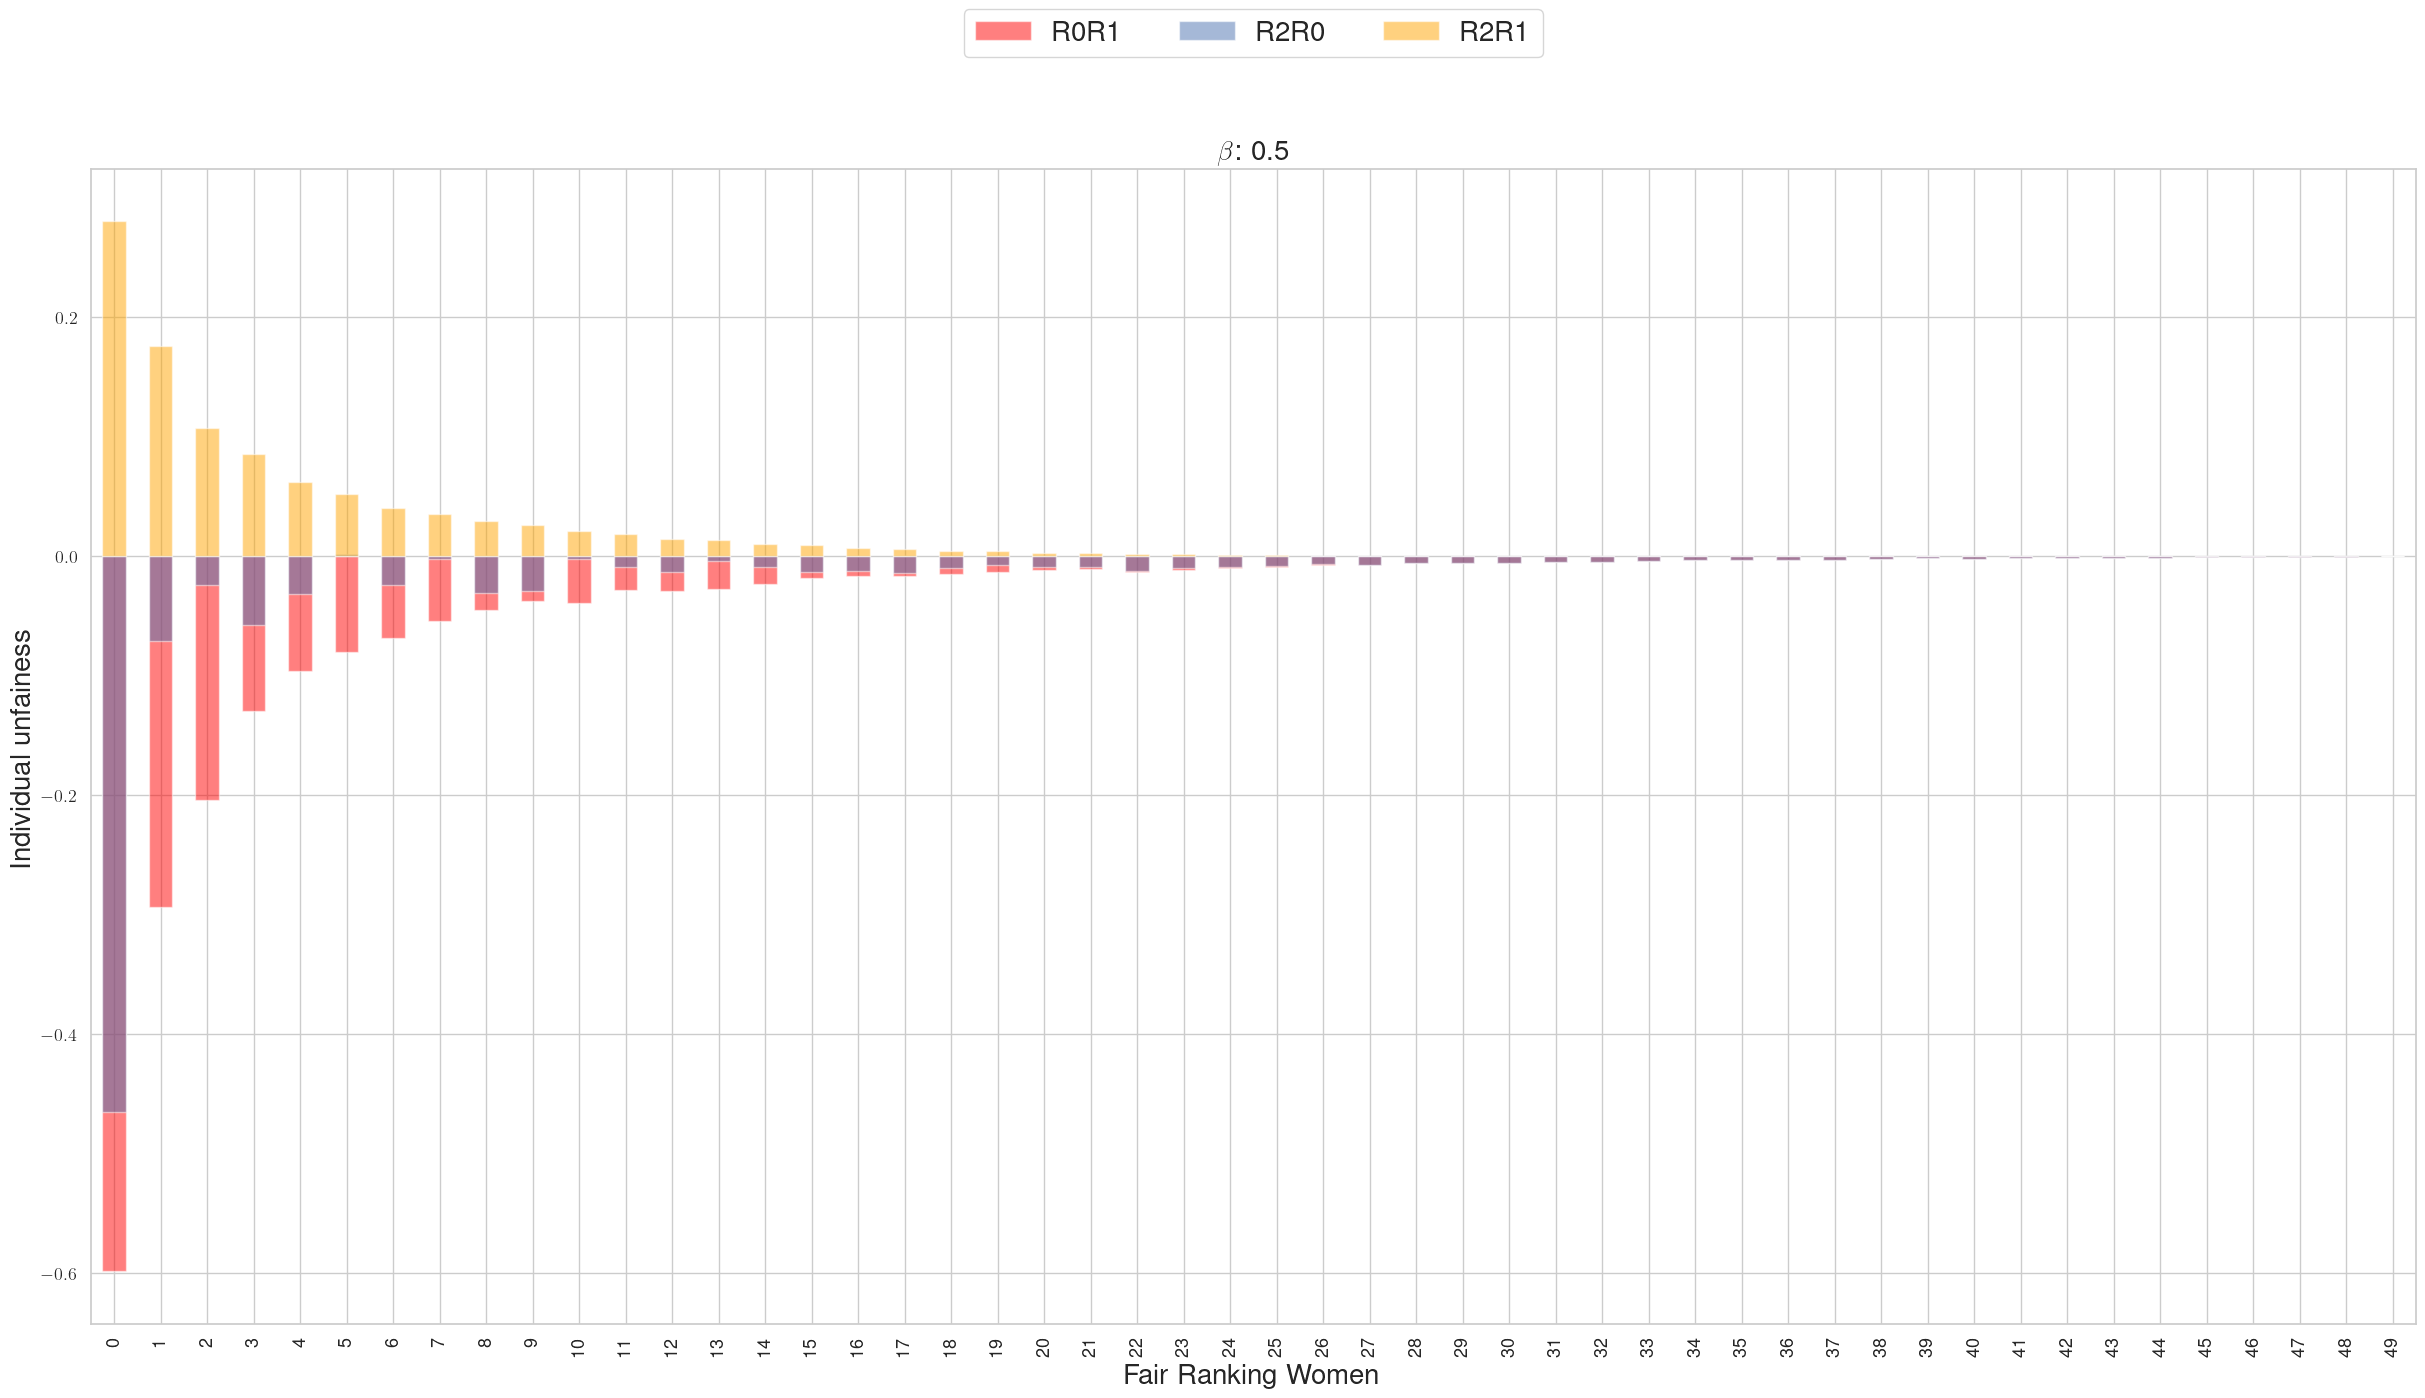

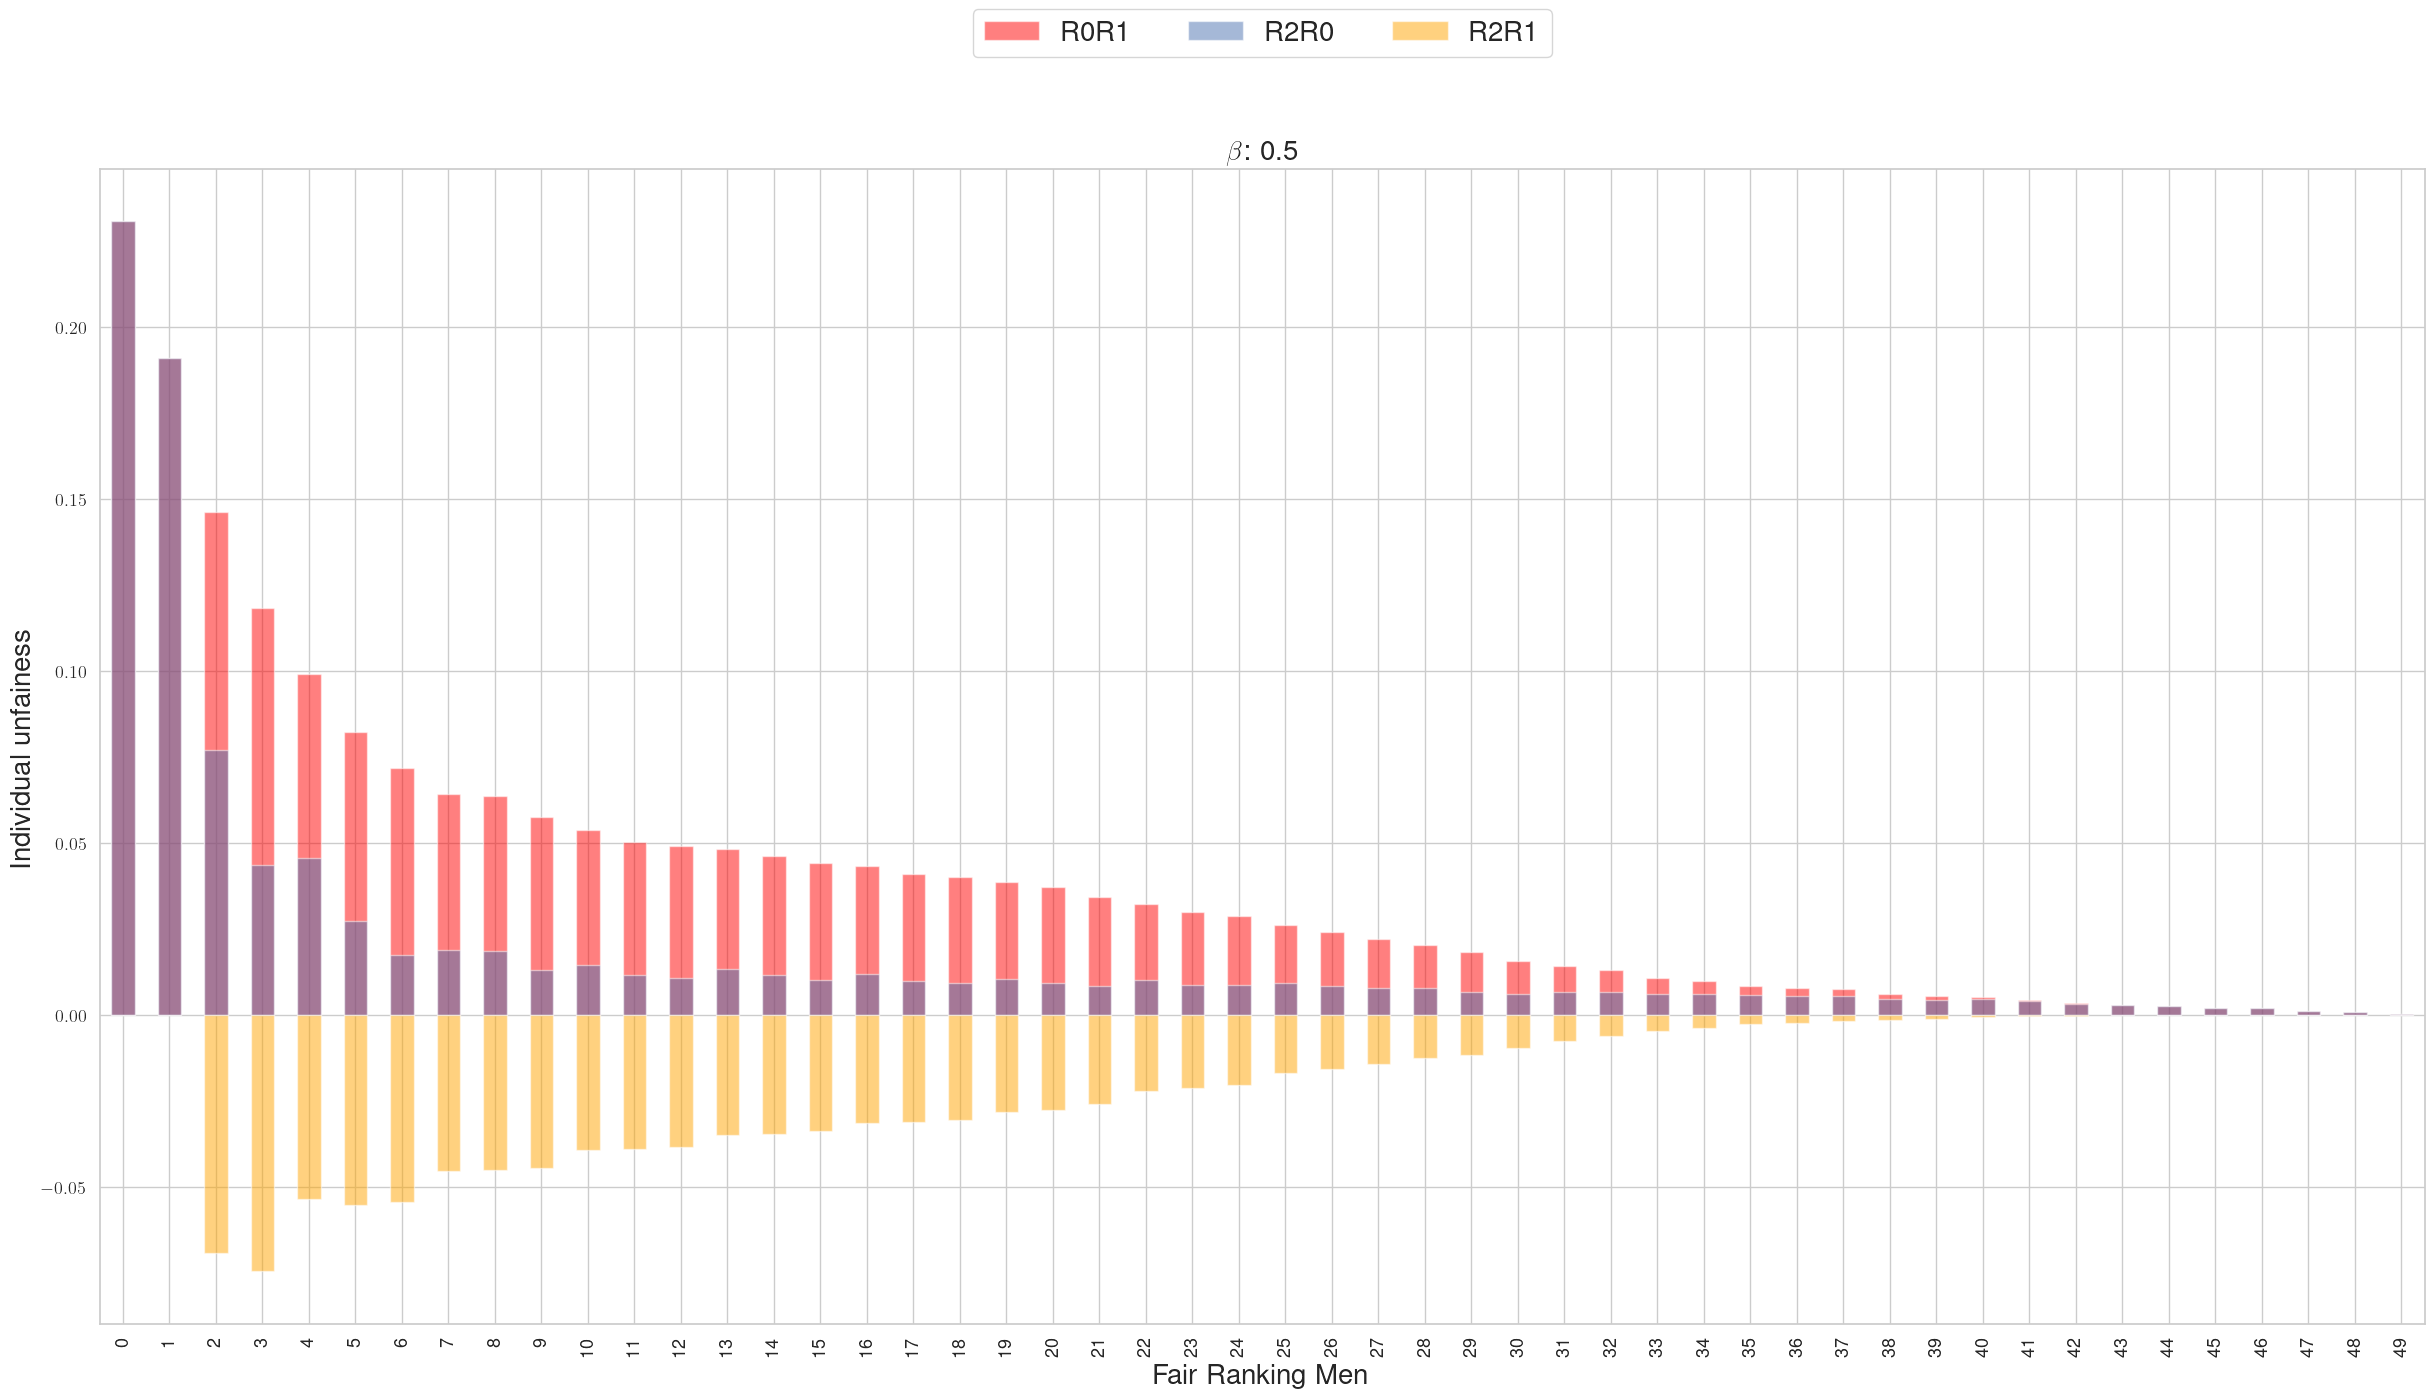

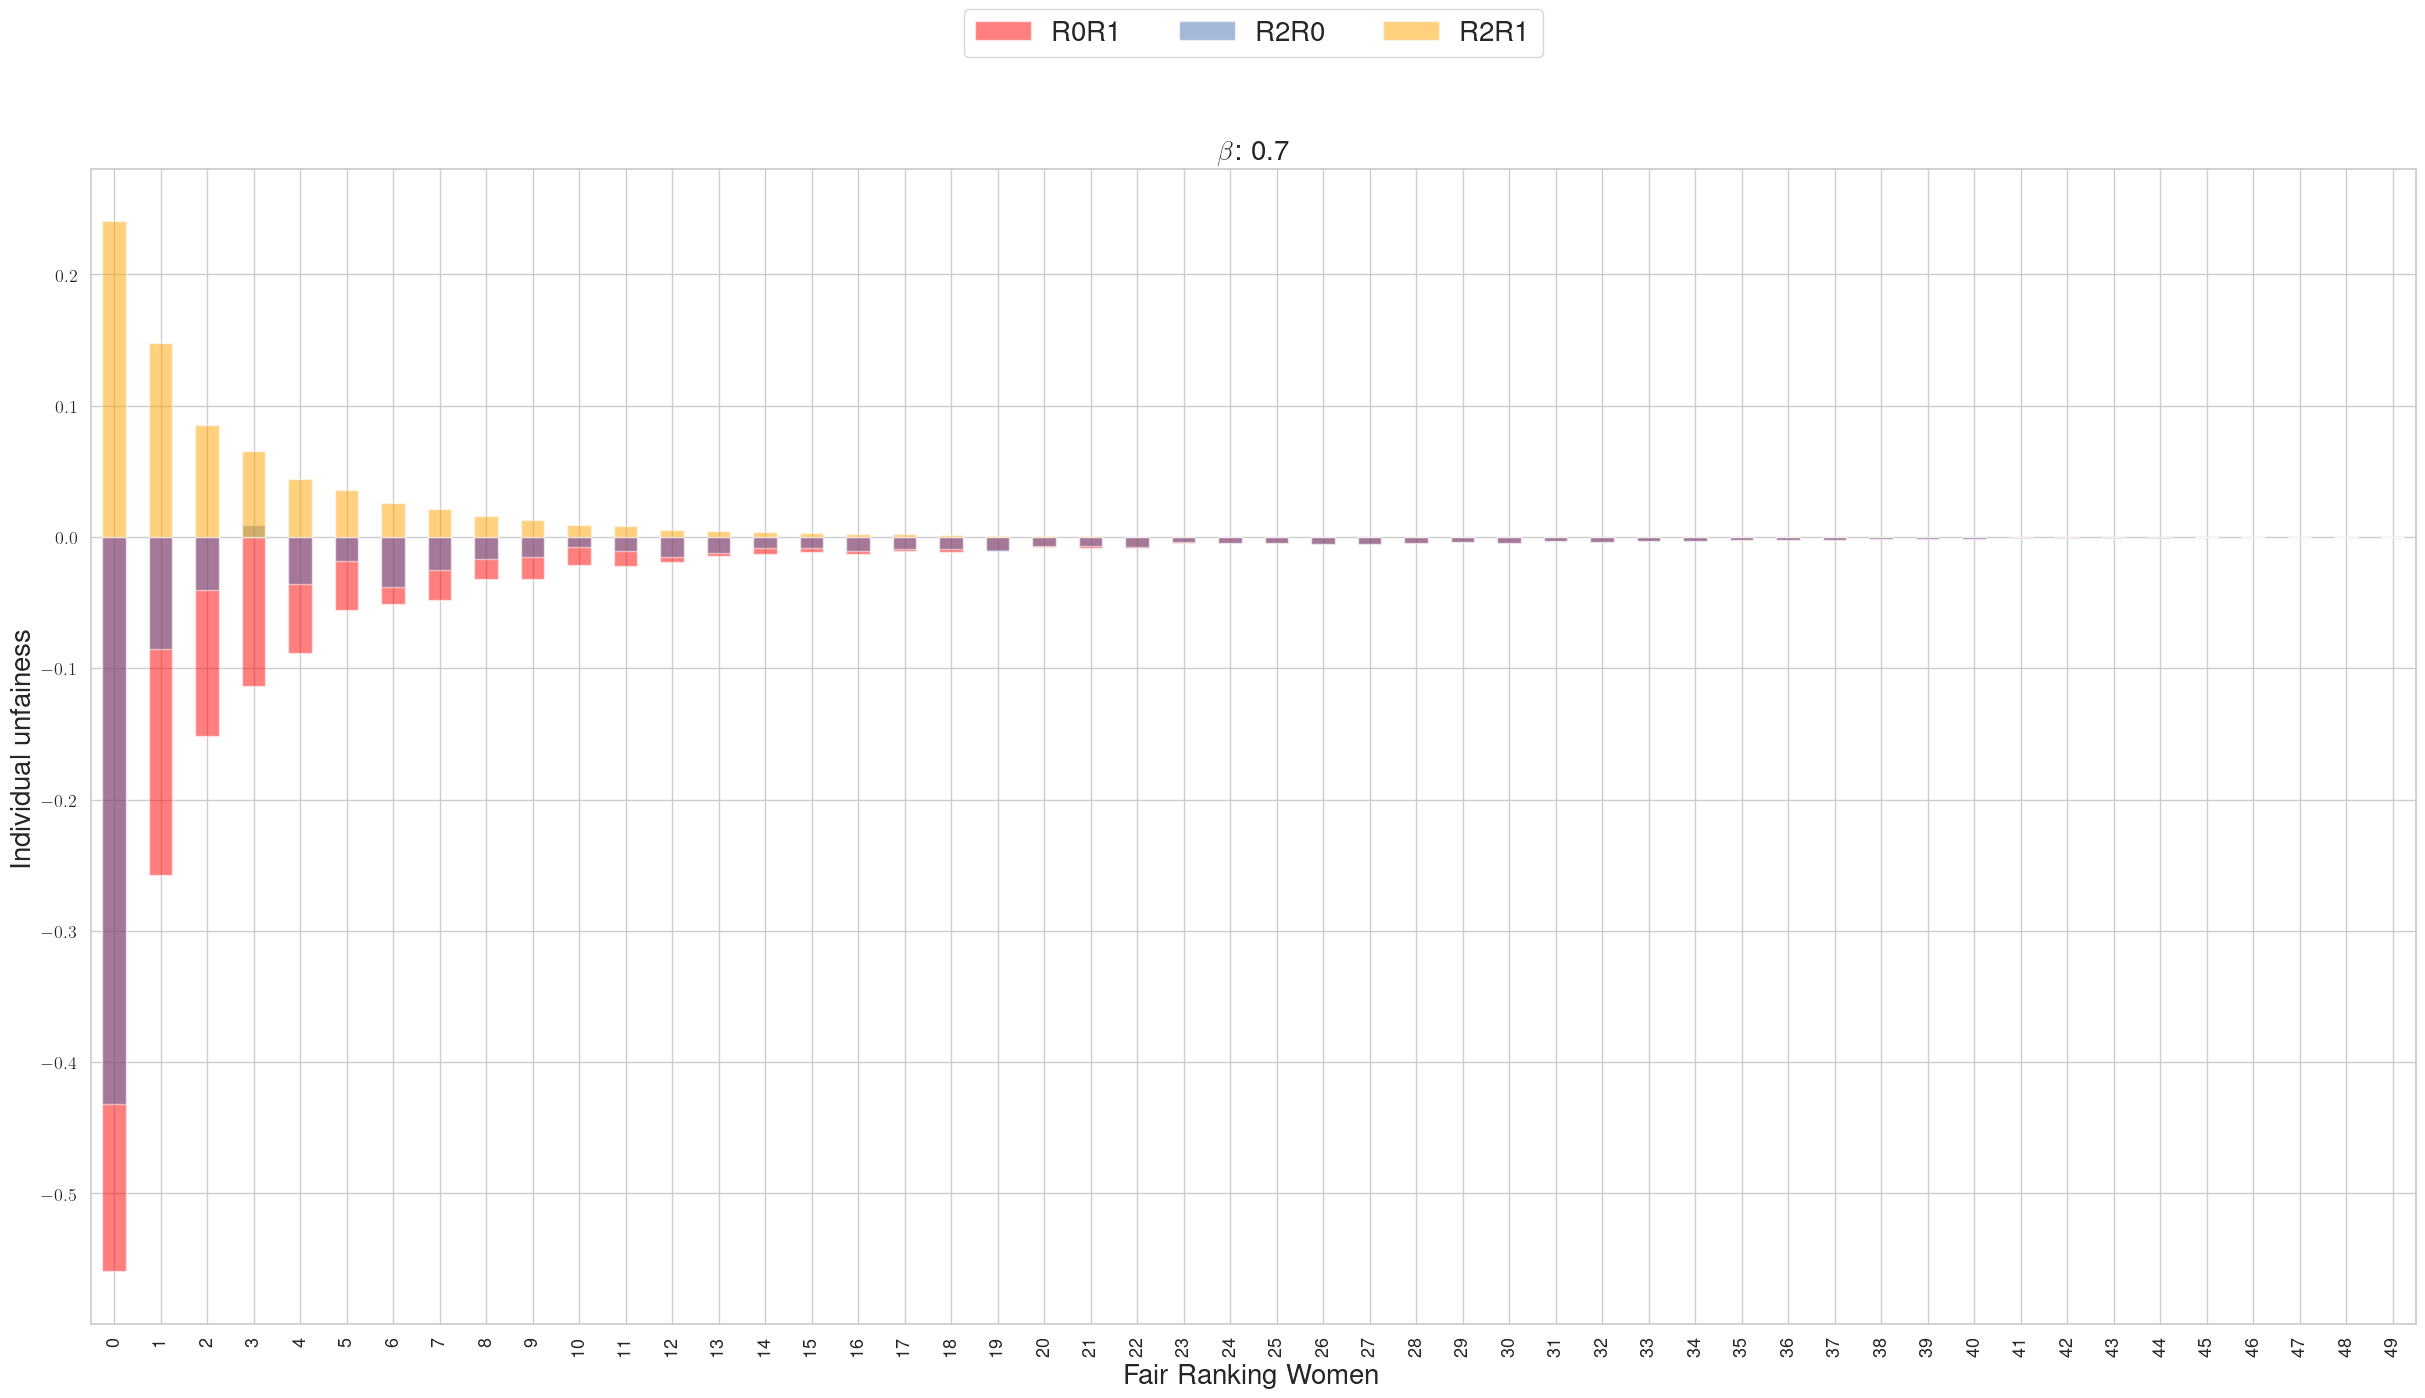

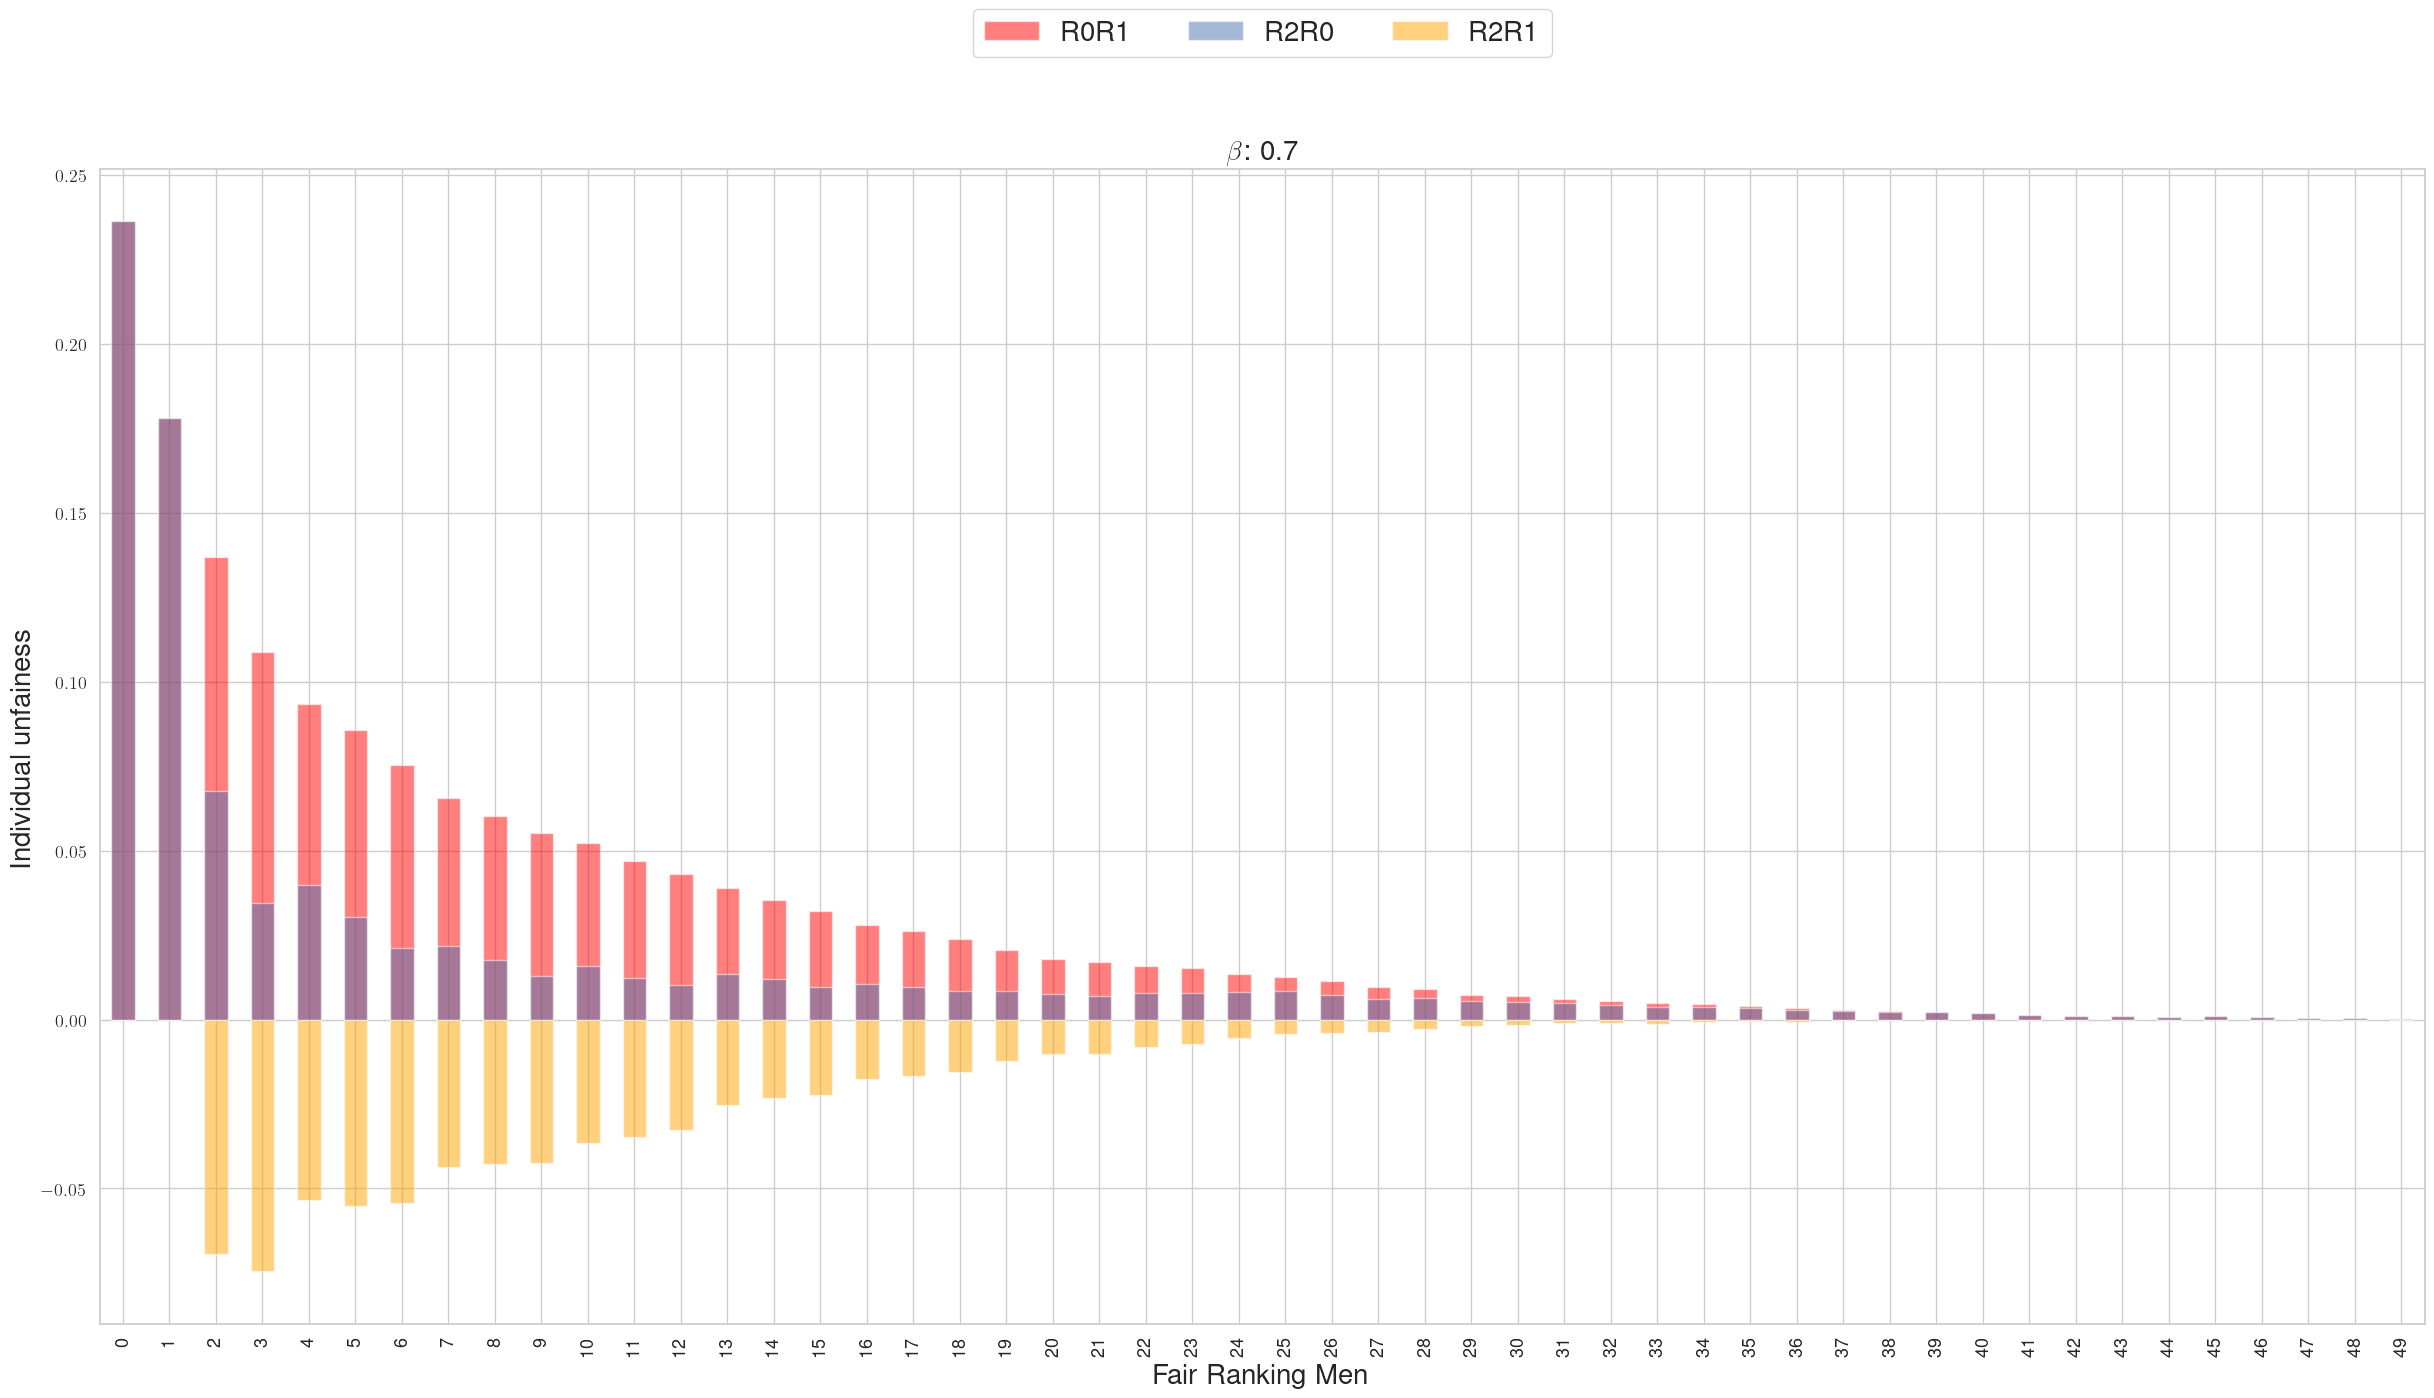

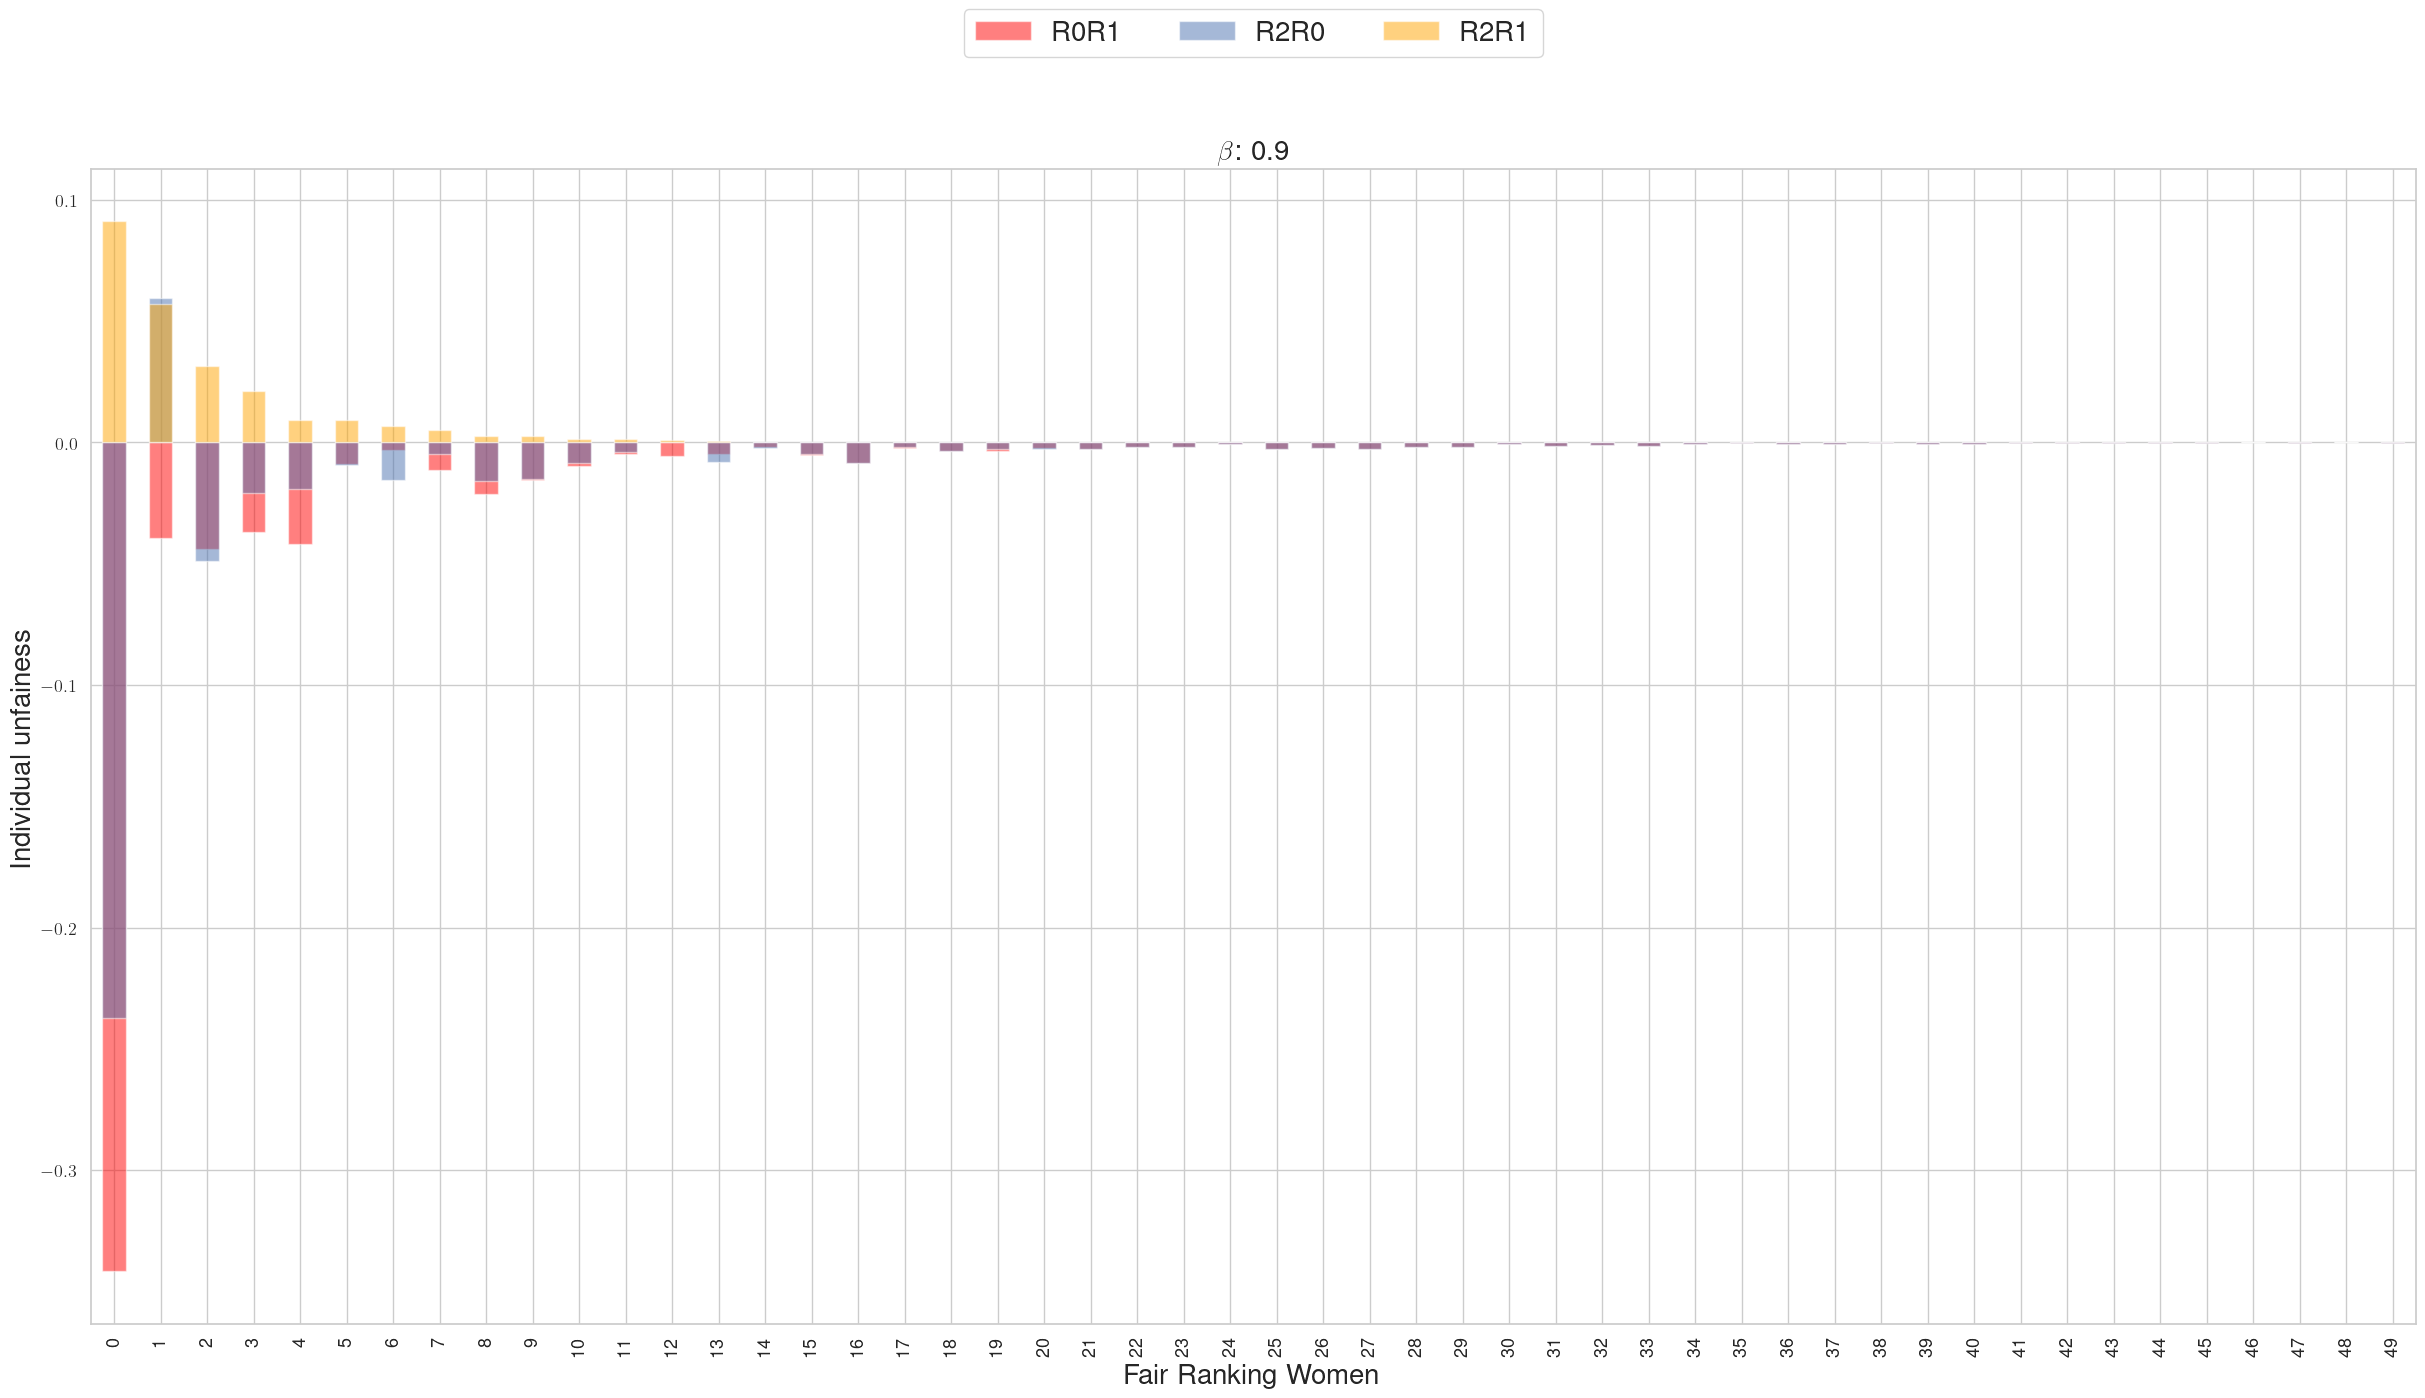

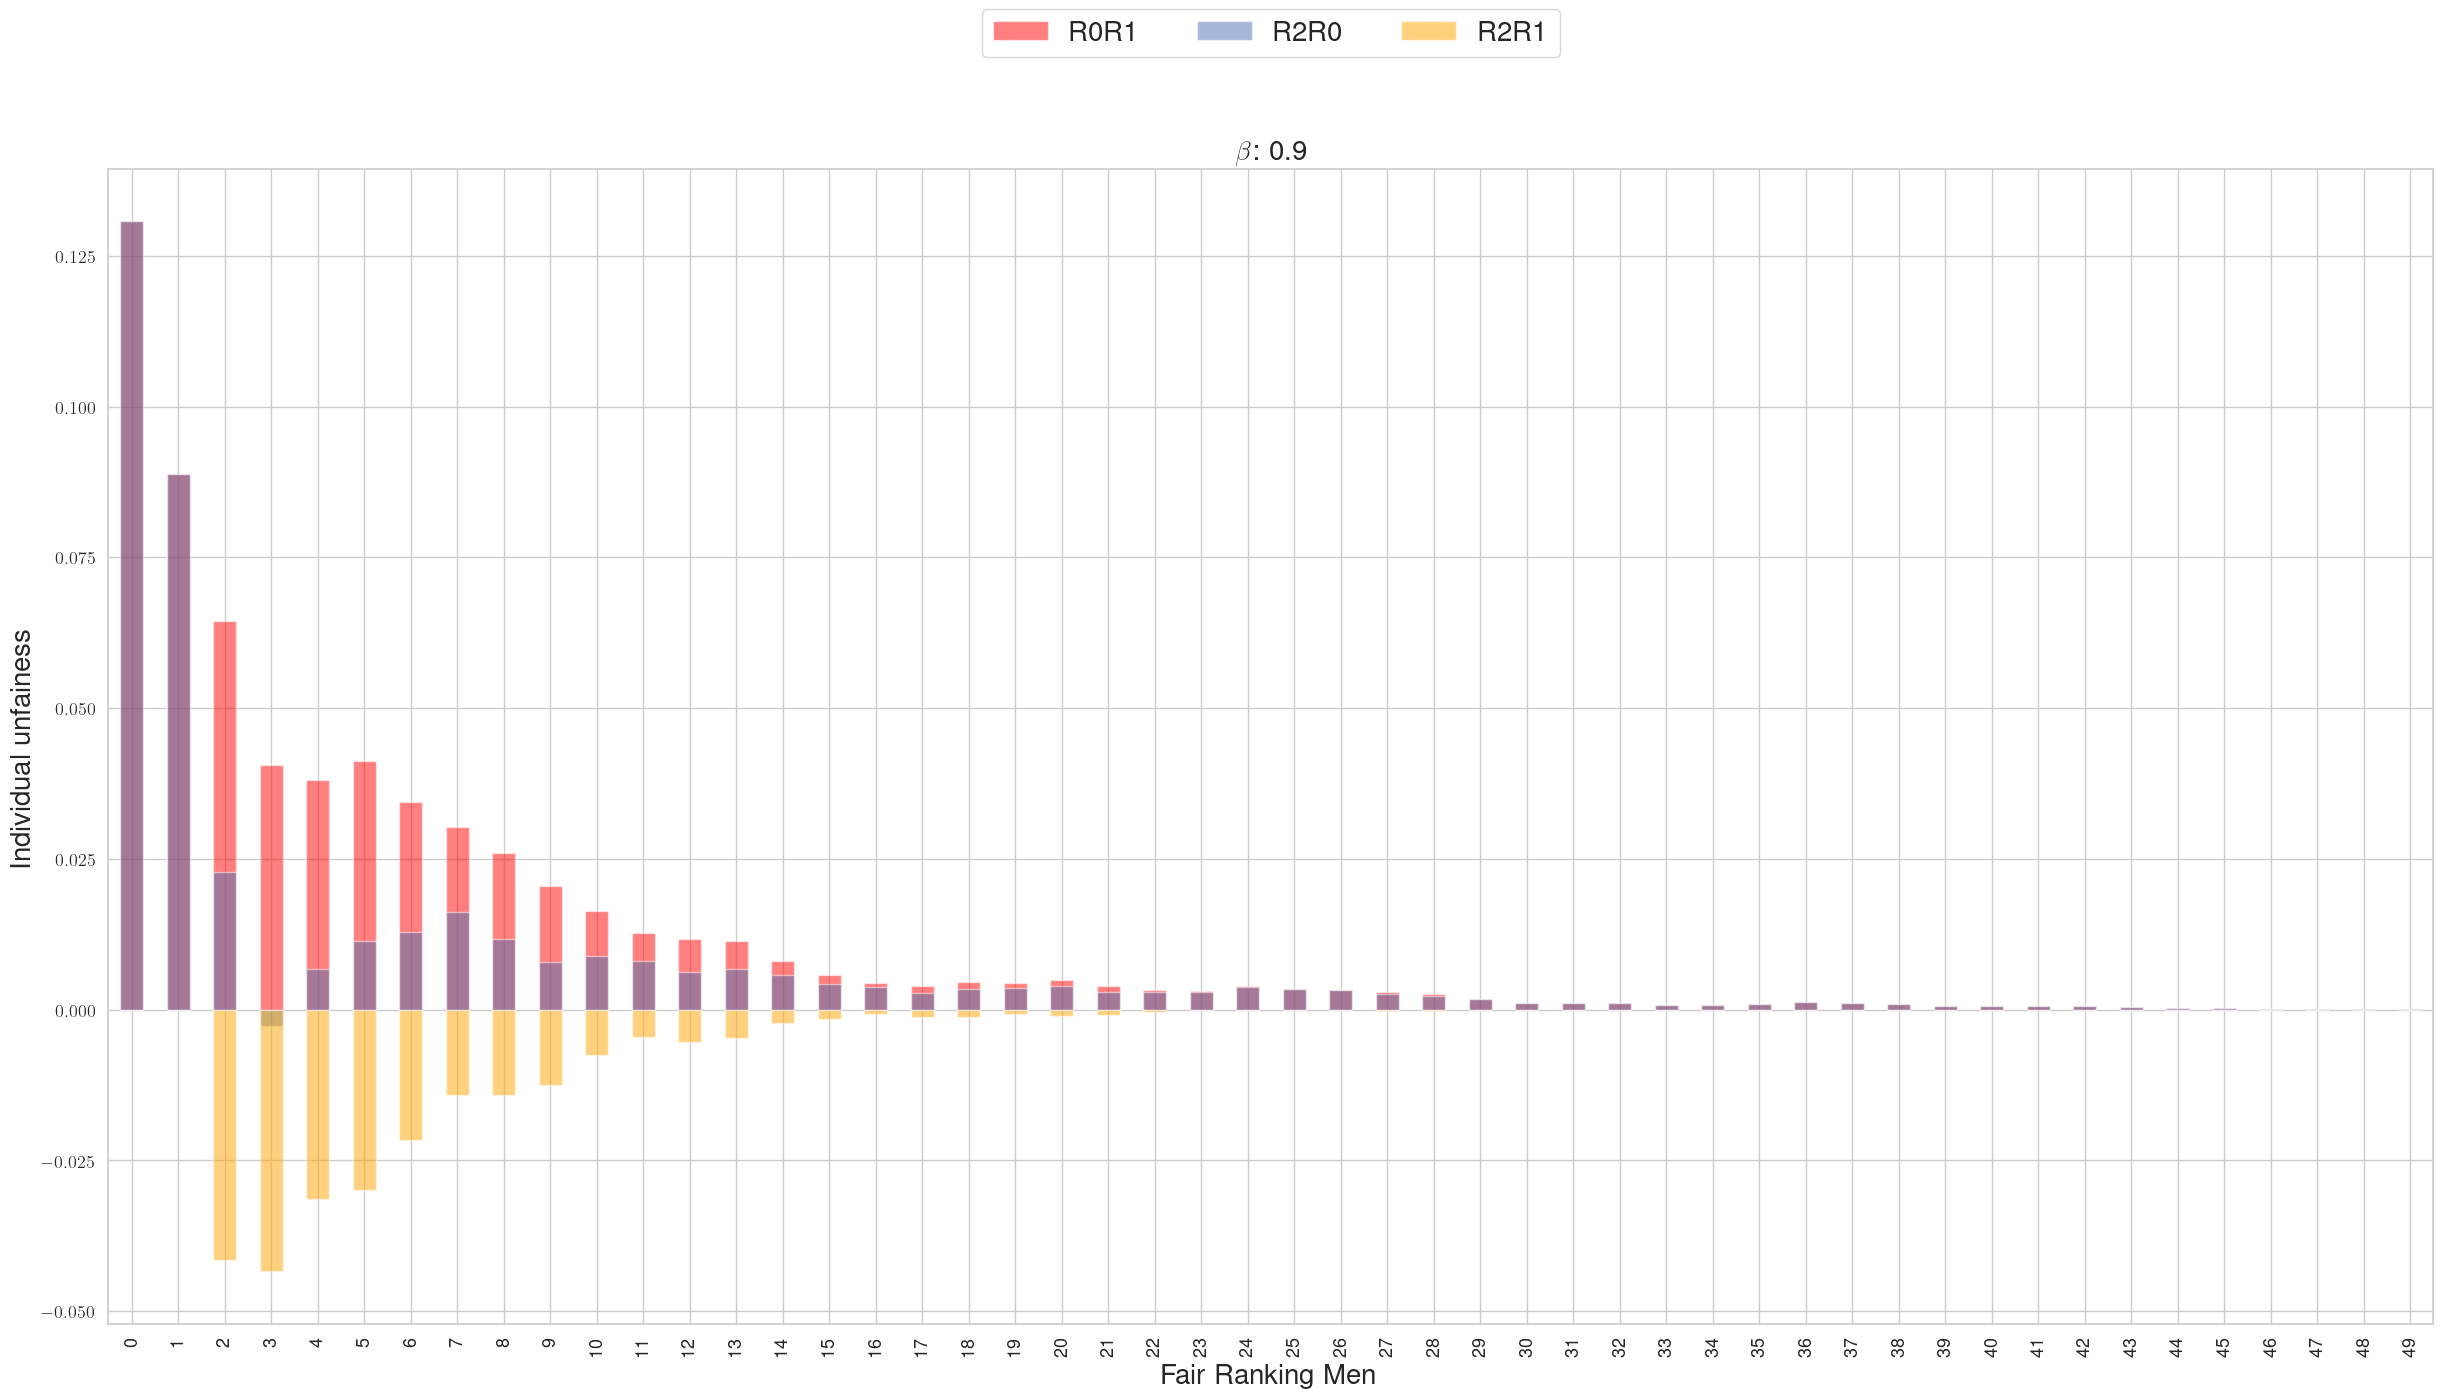

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.84it/s]


Proportion of Women: 0.7


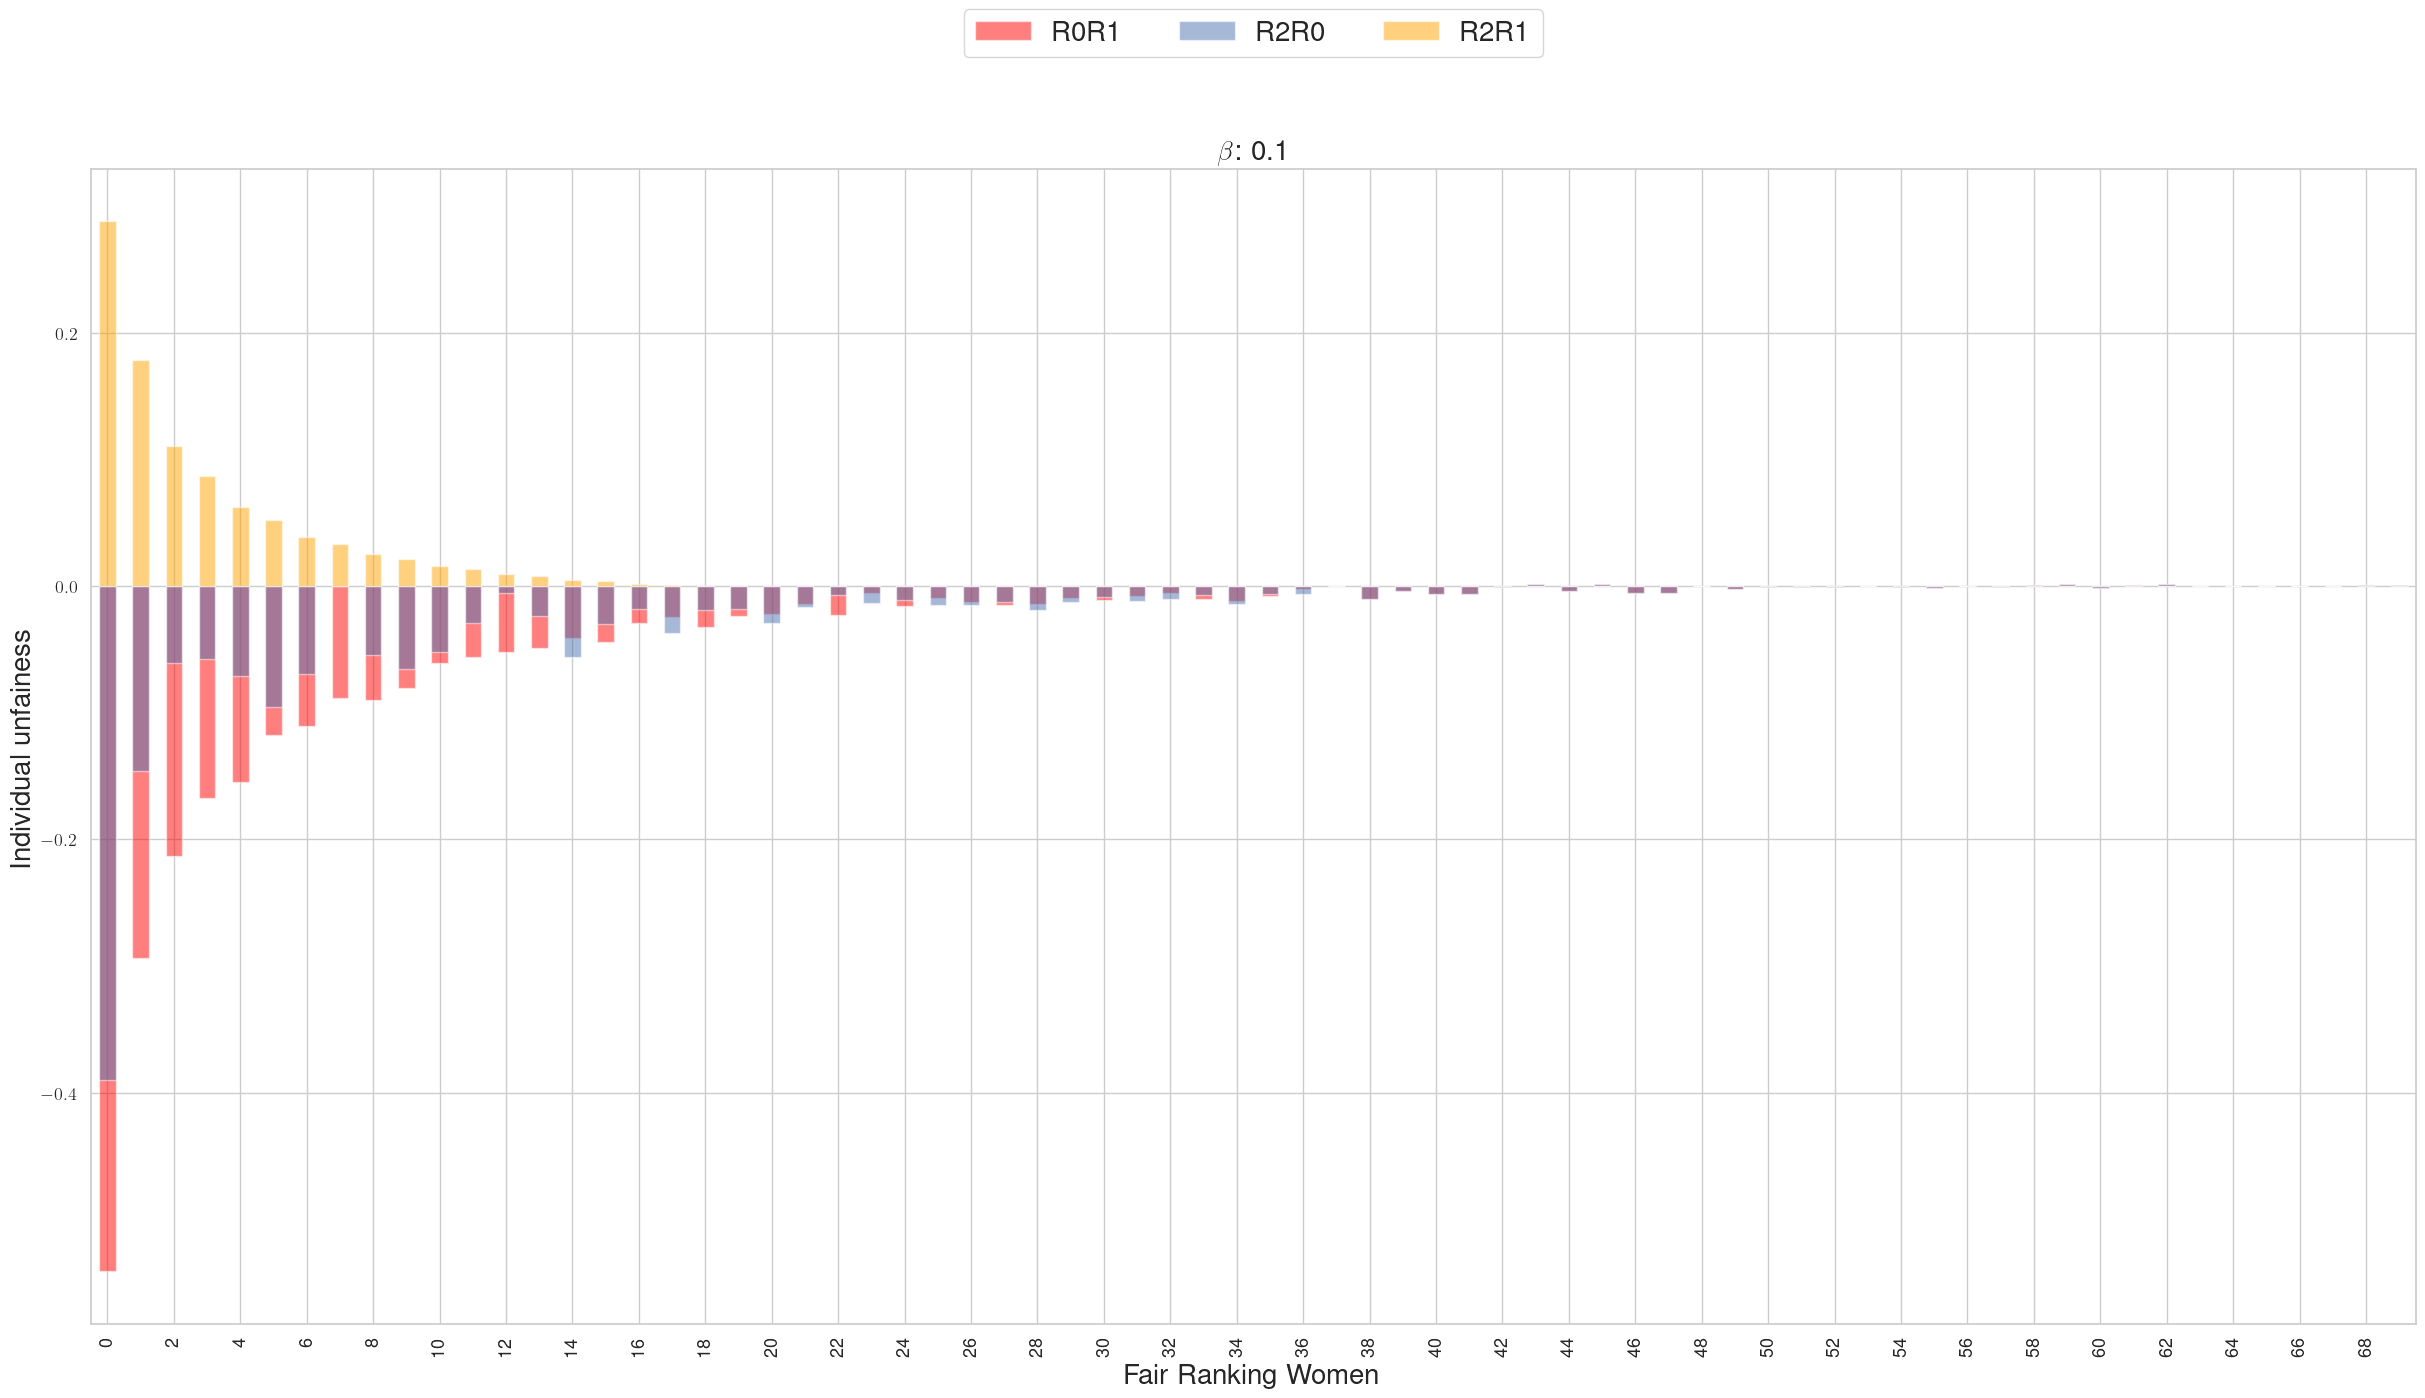

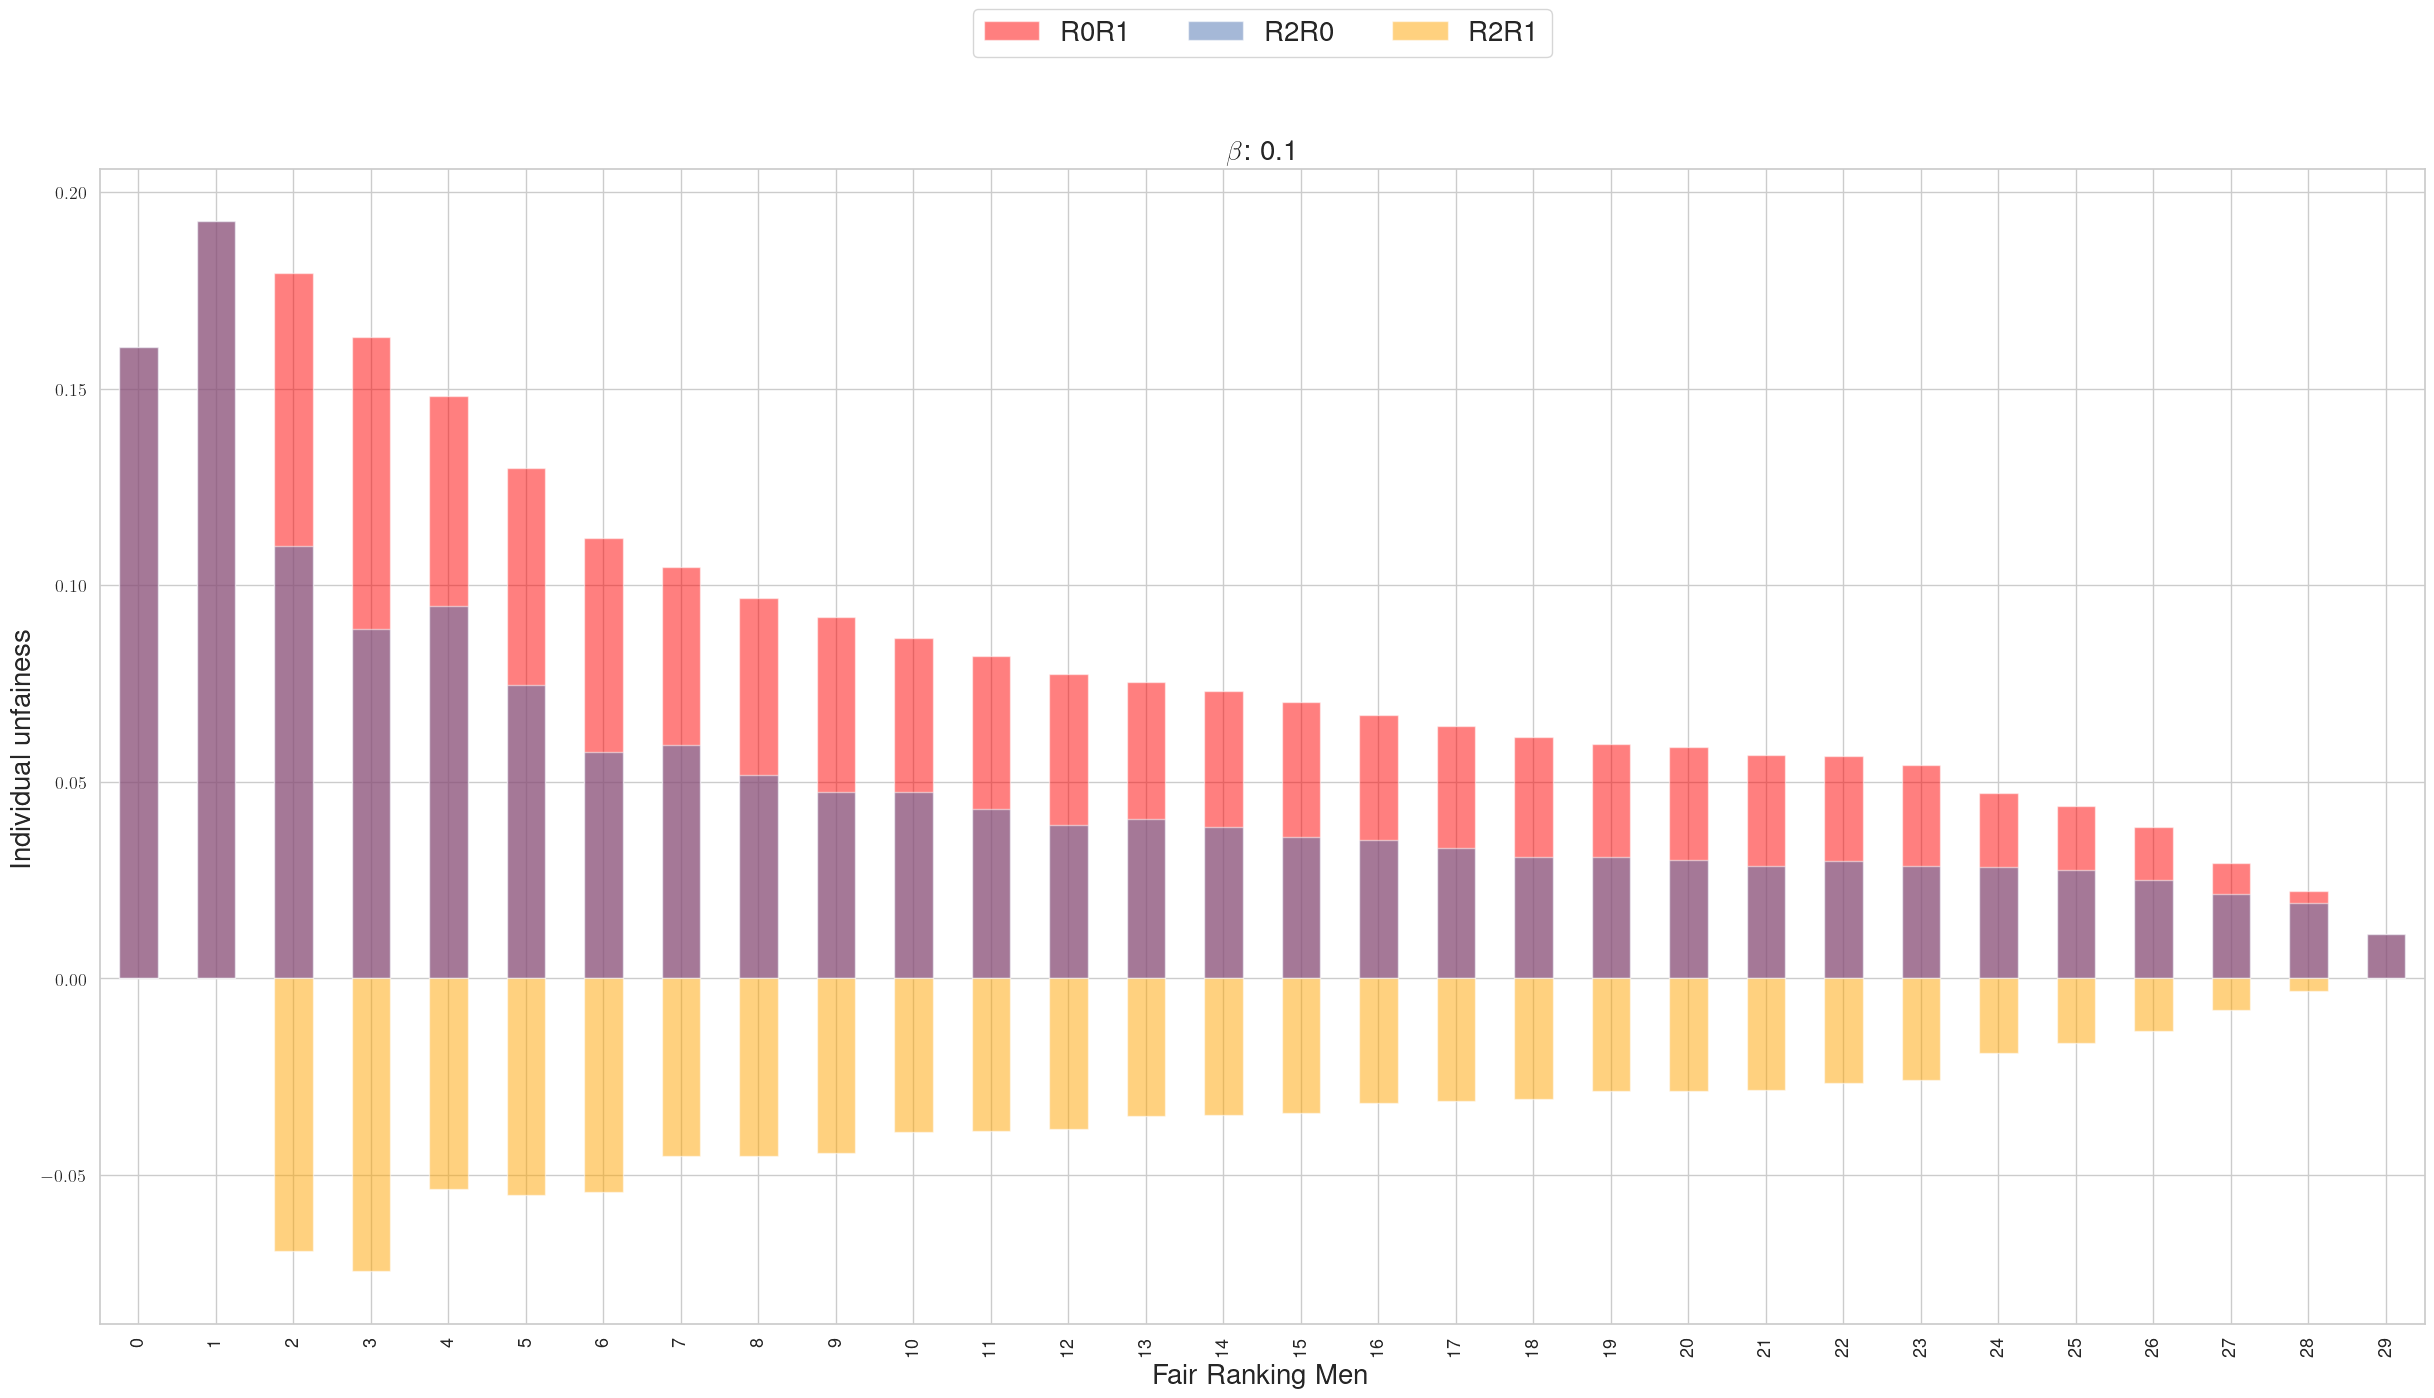

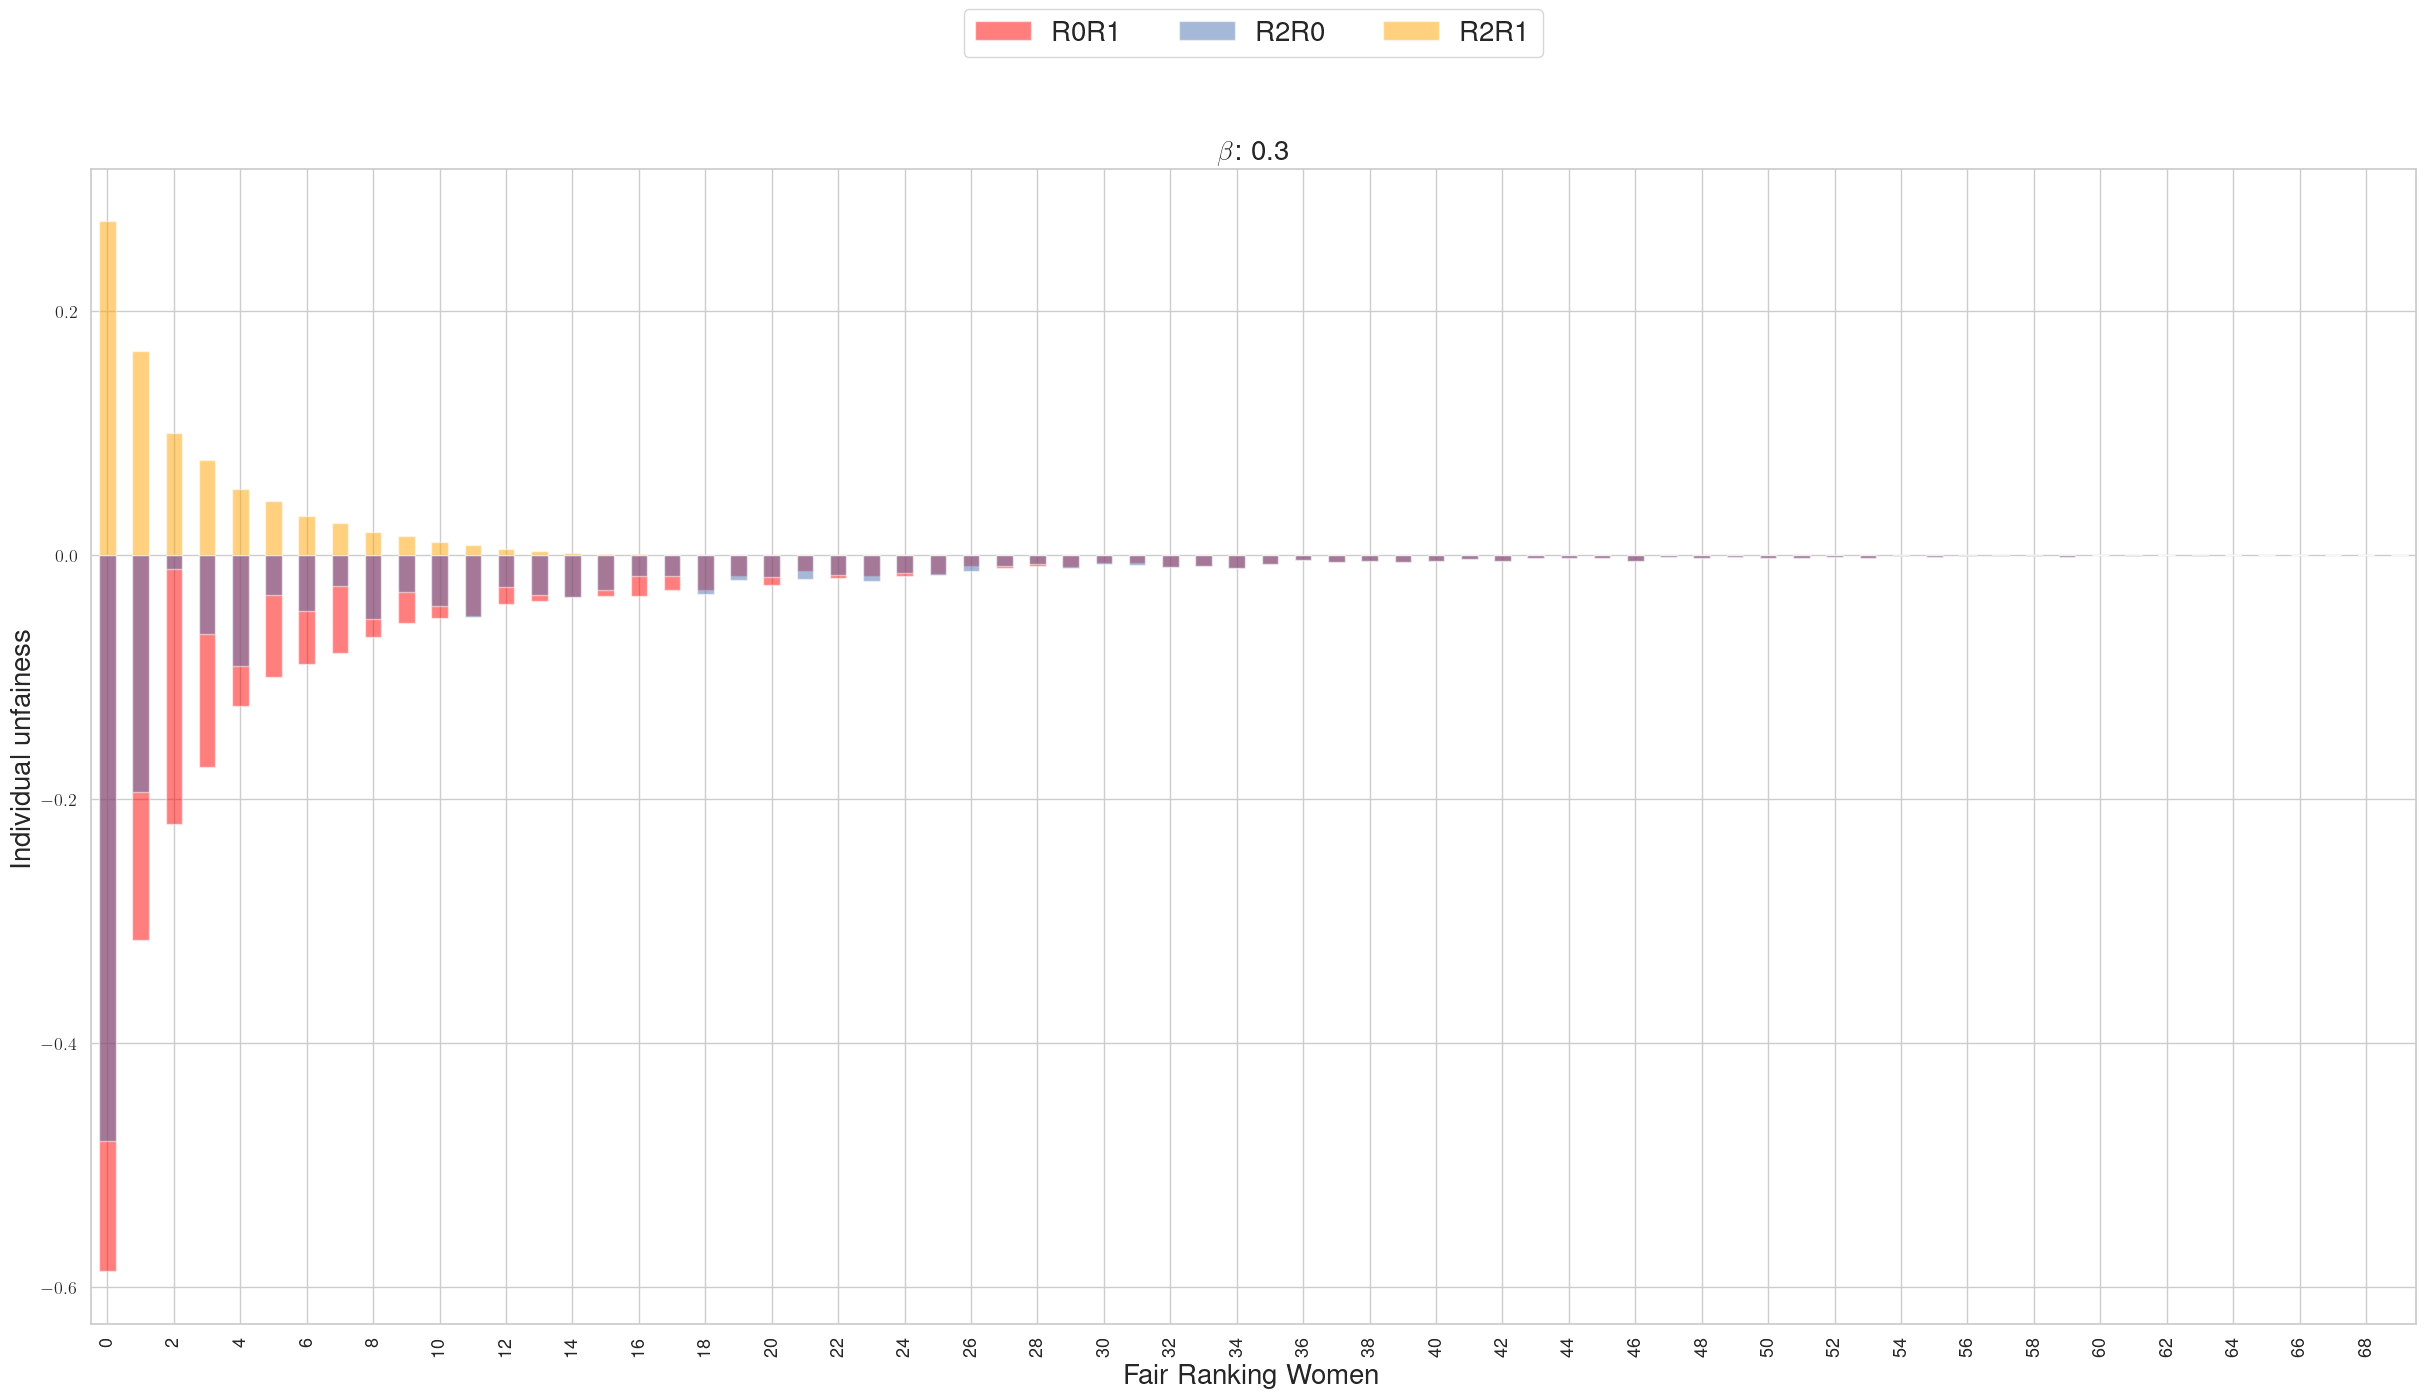

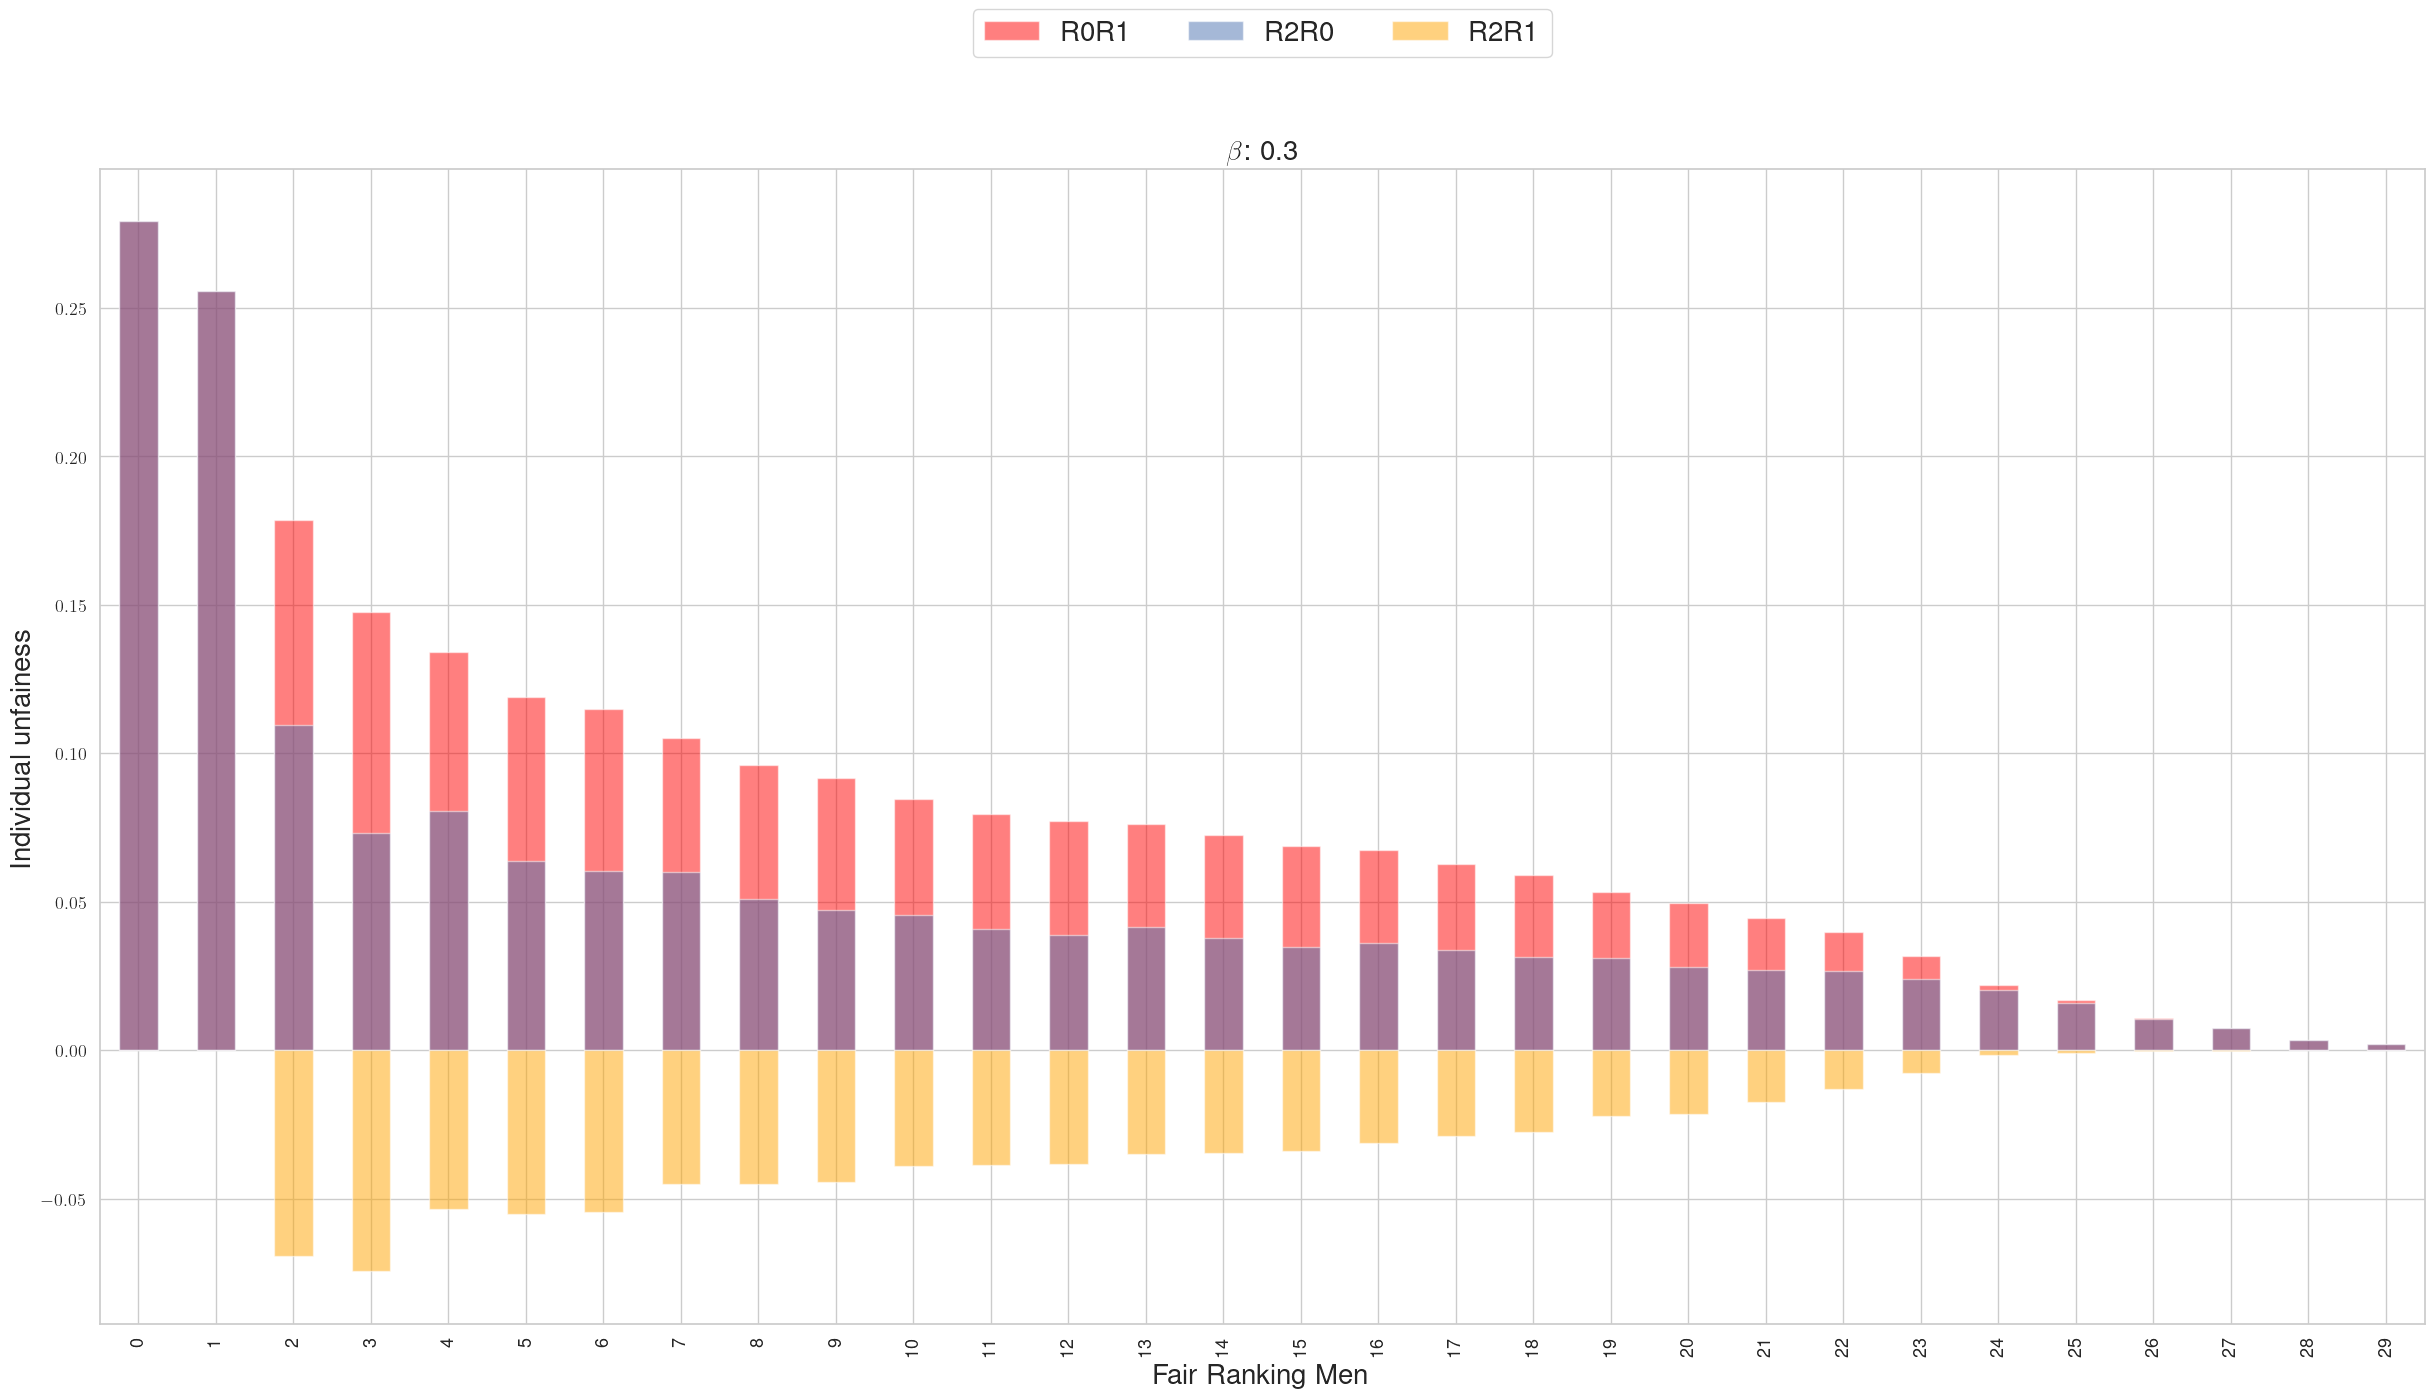

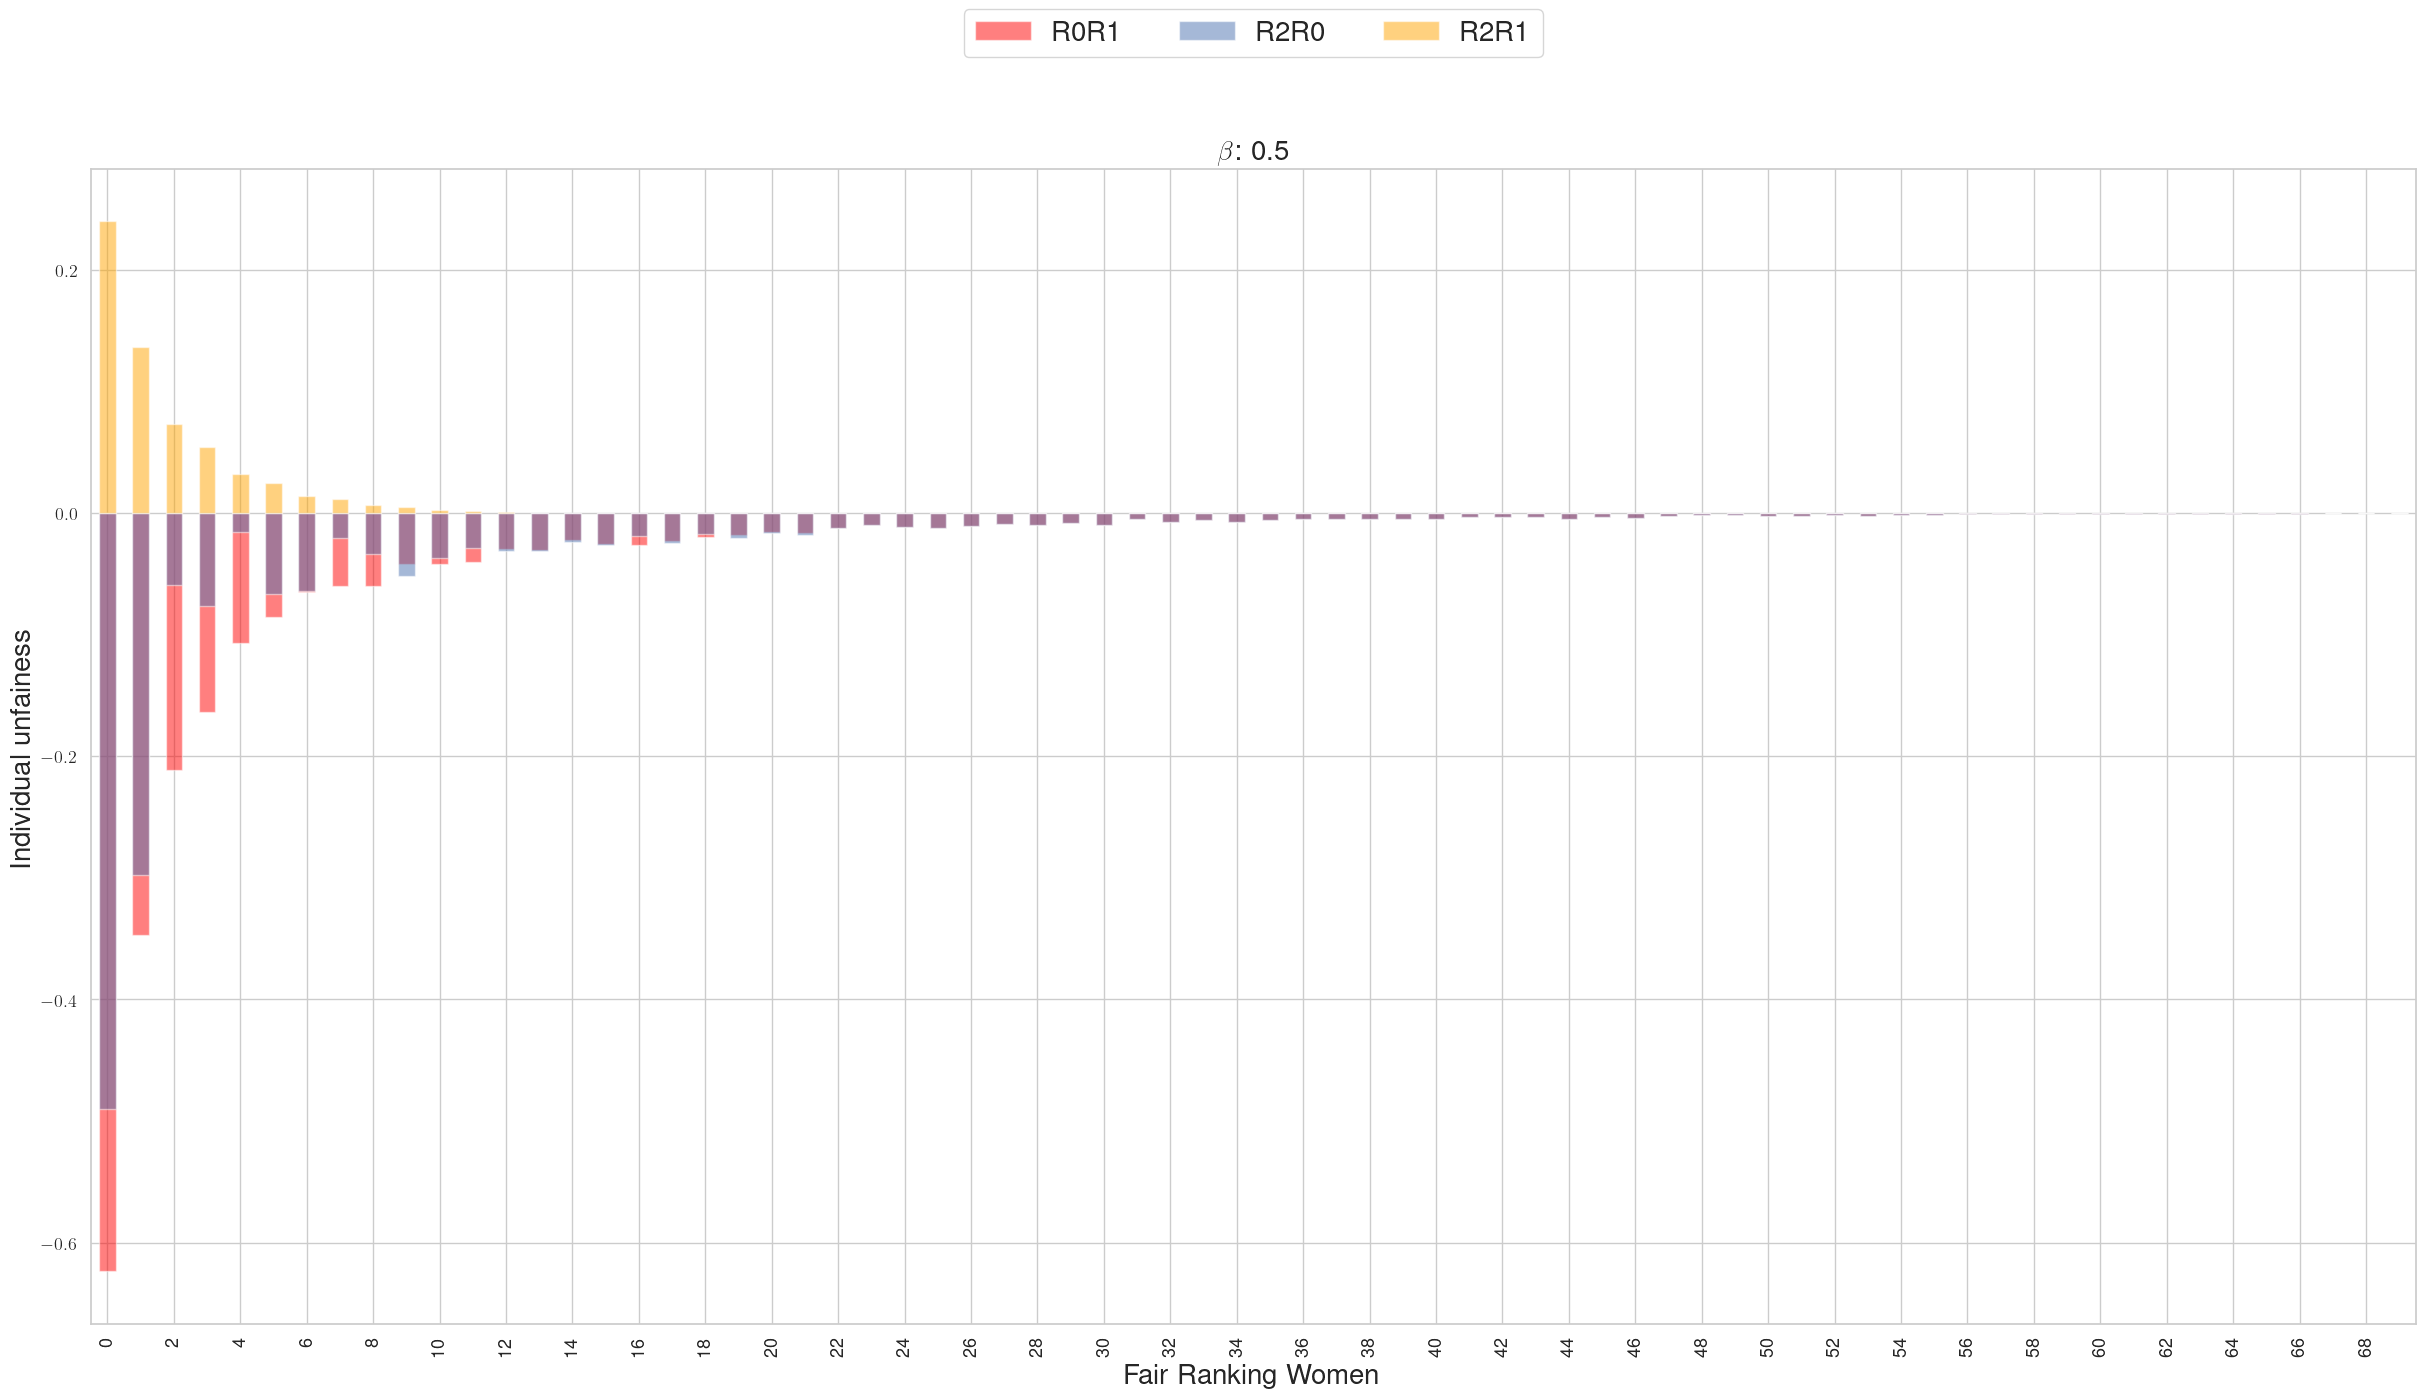

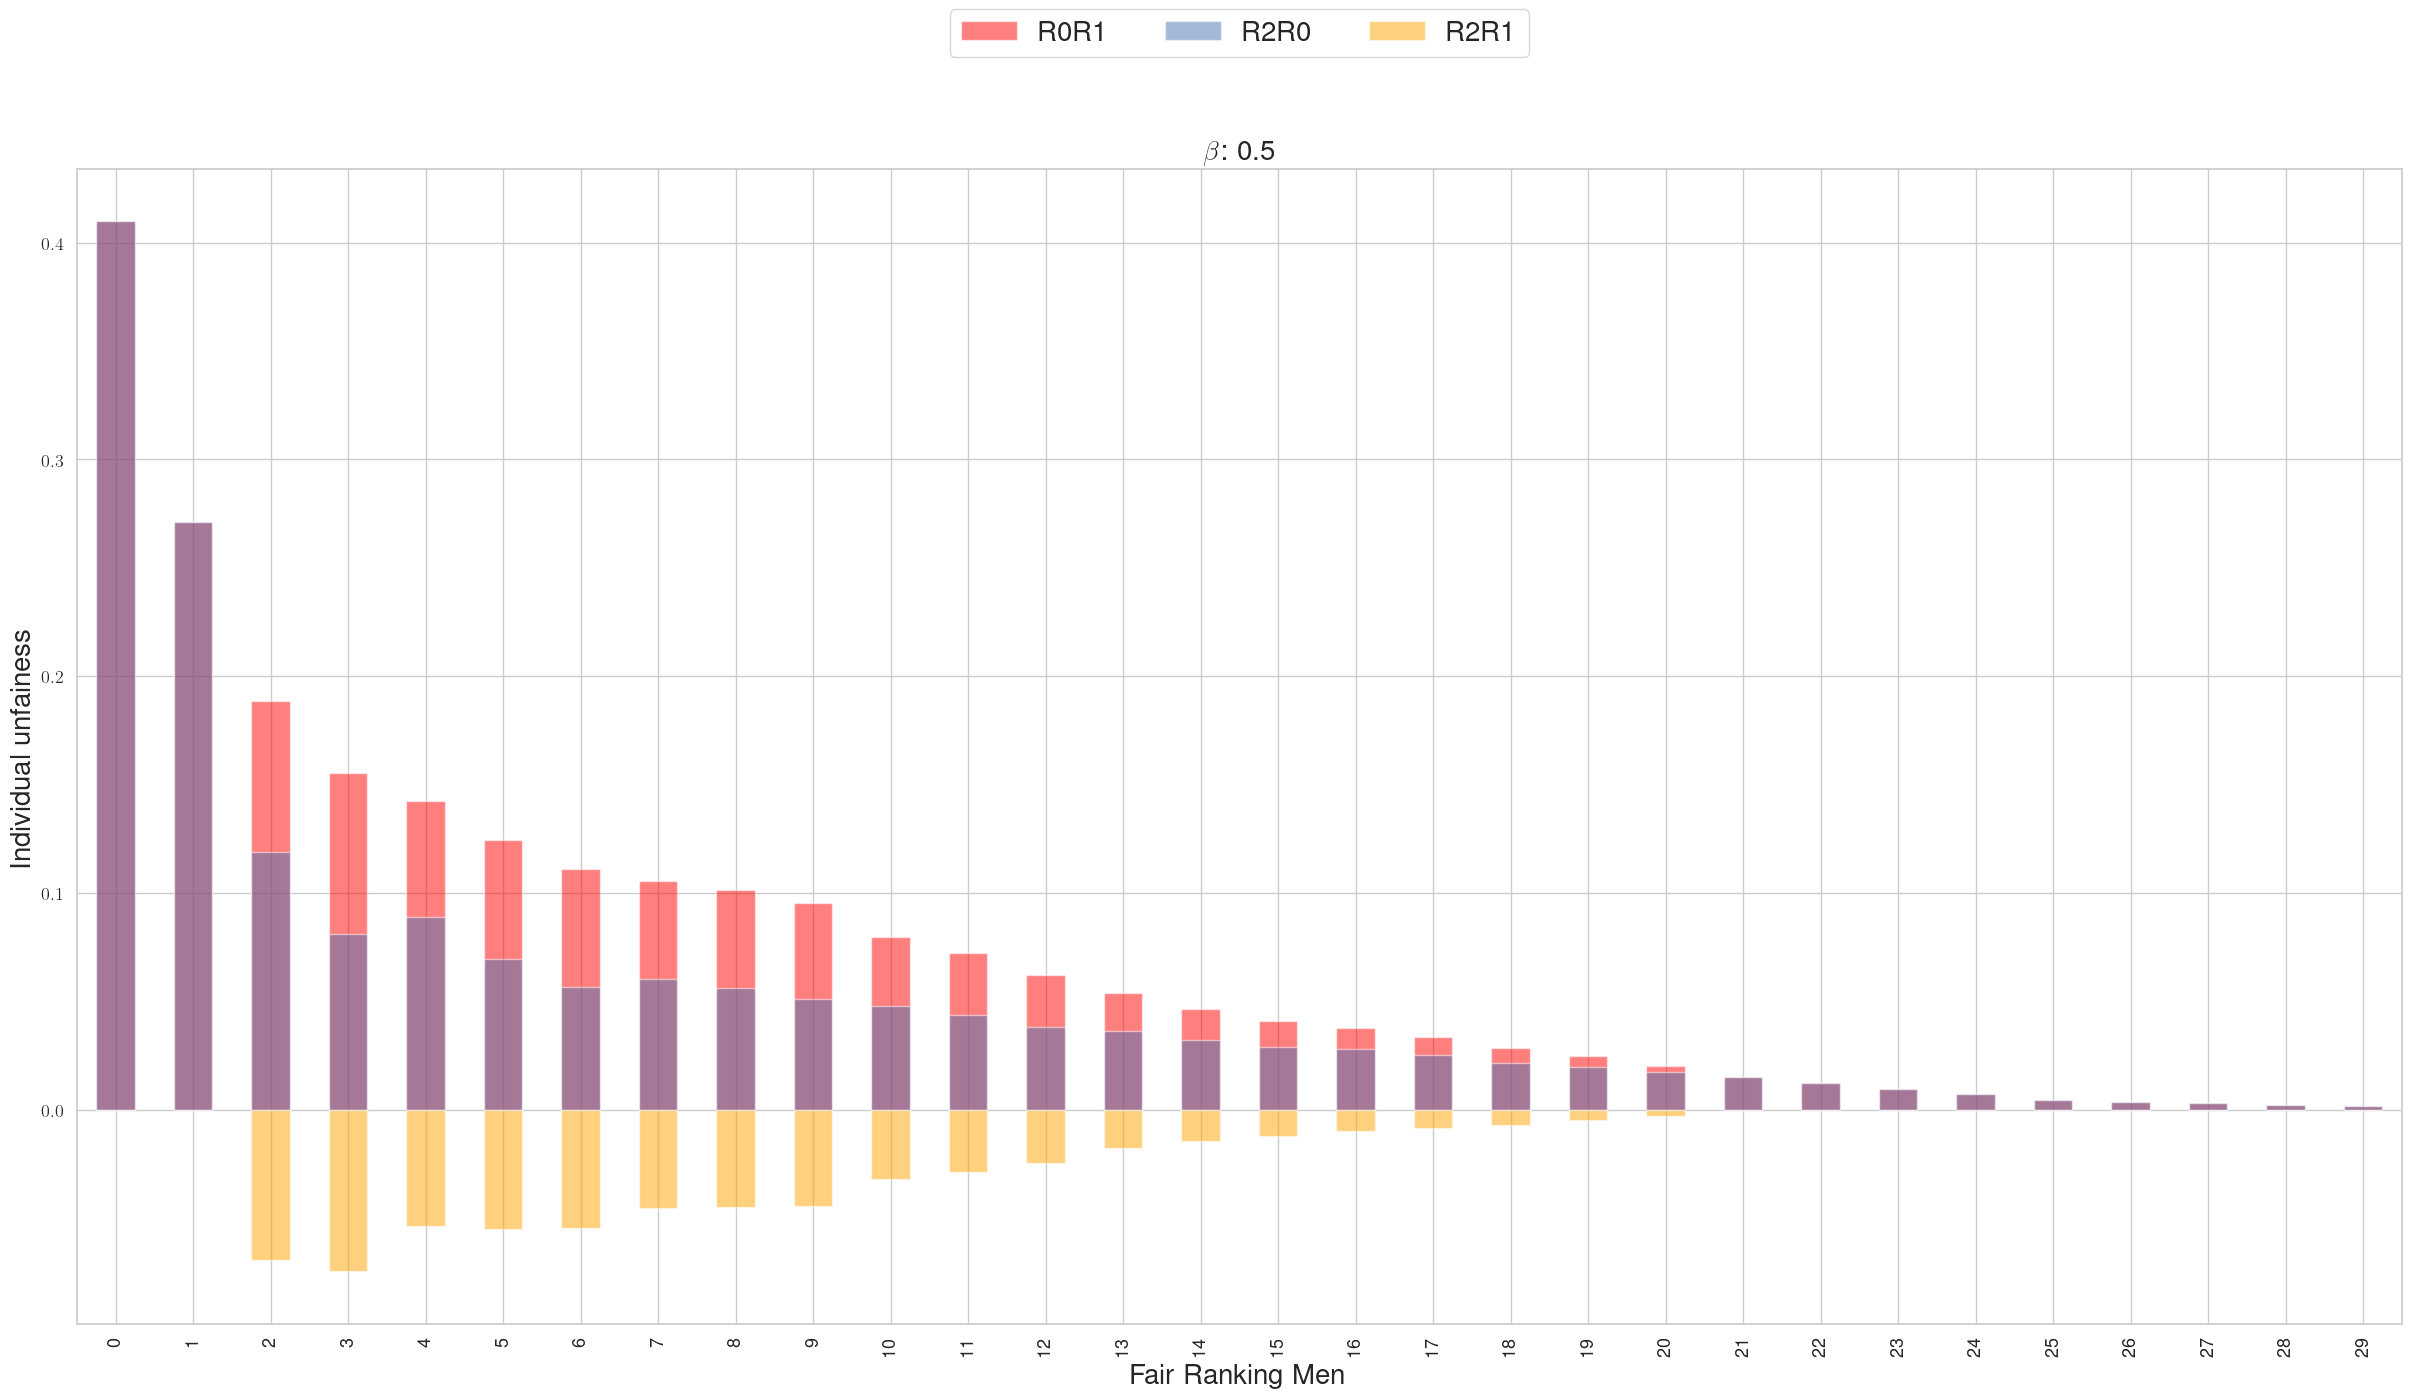

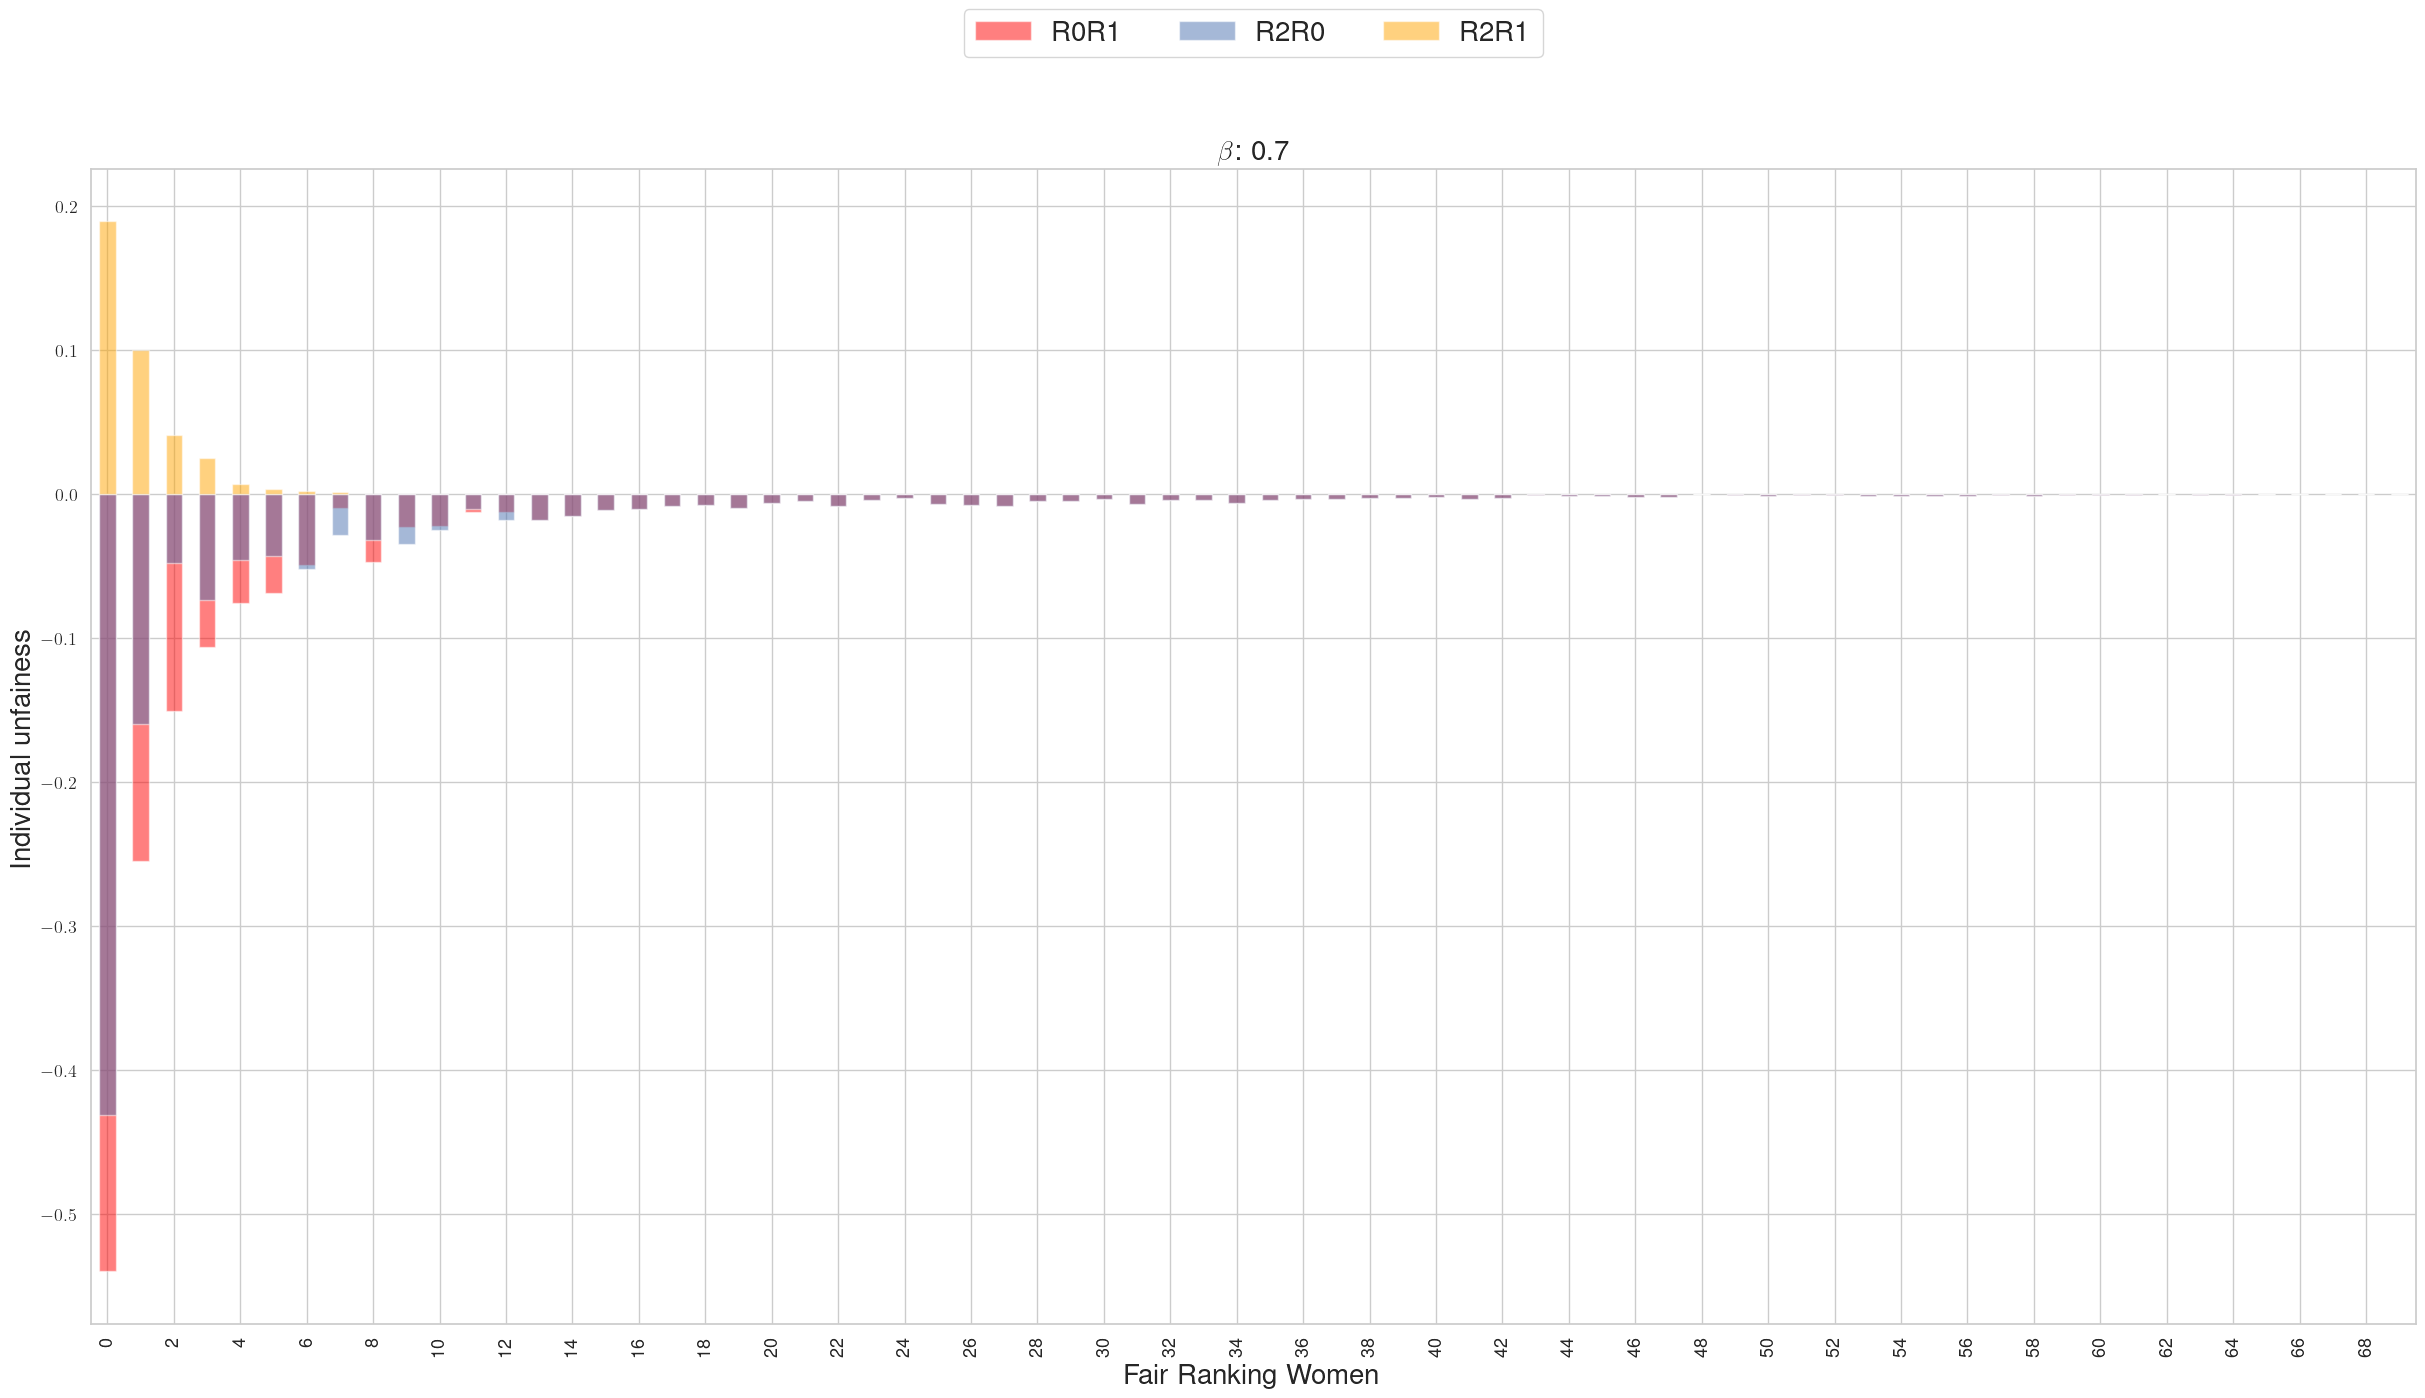

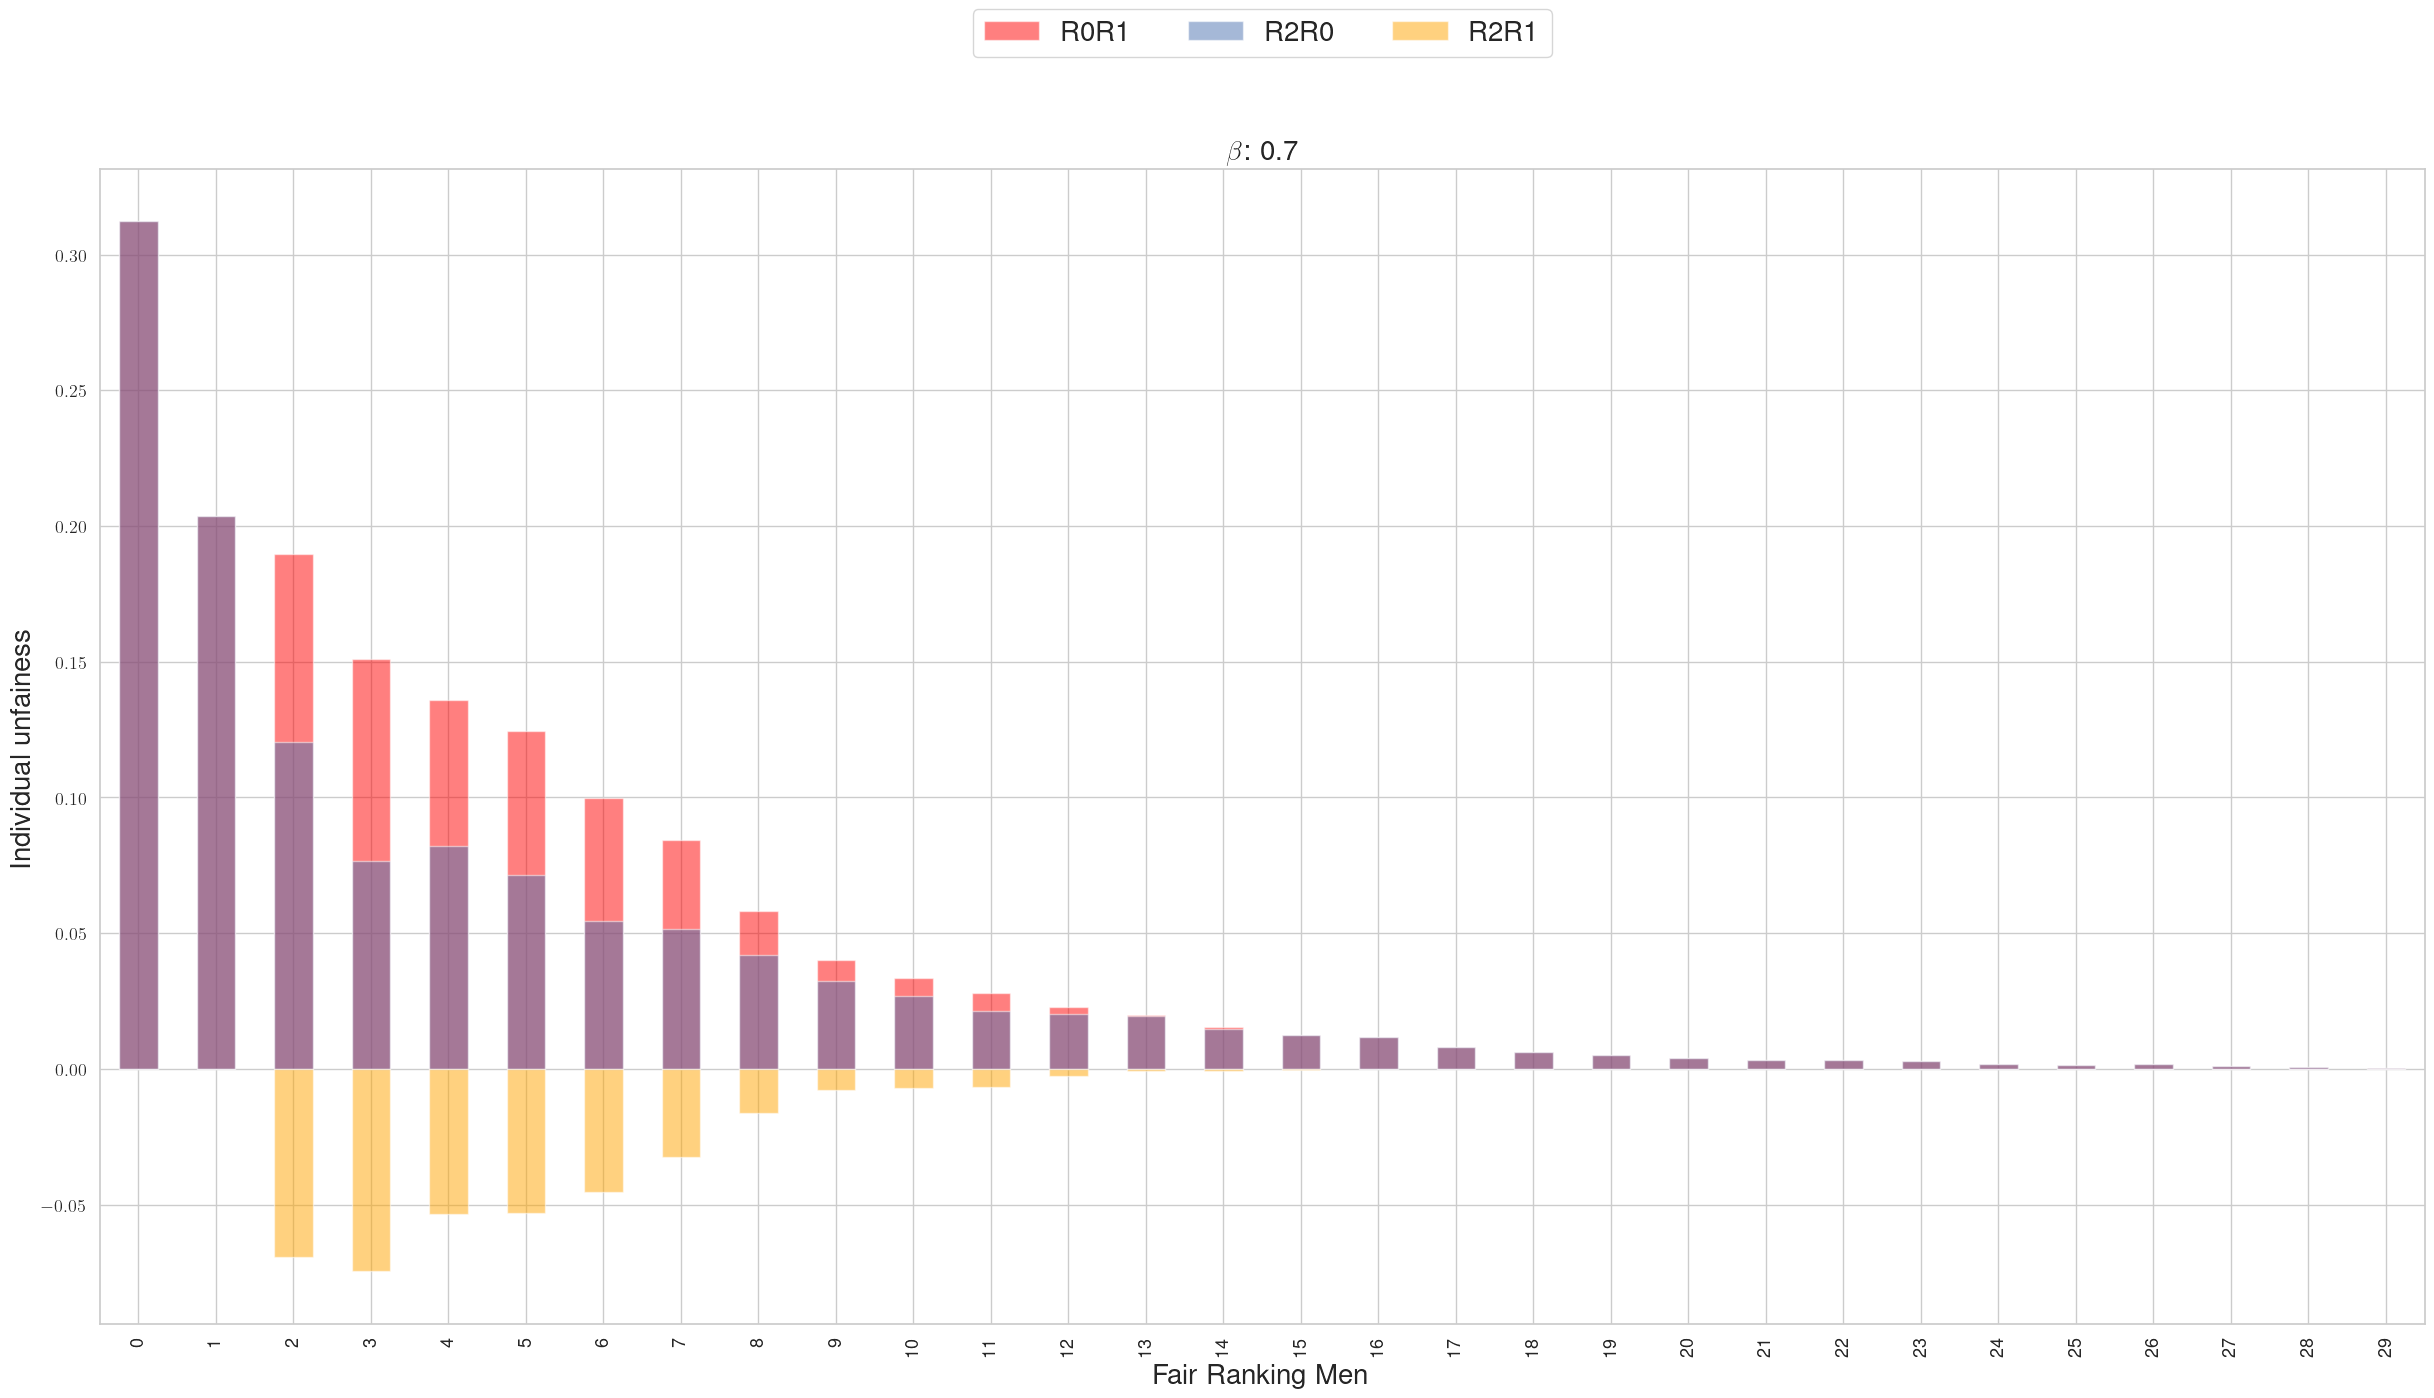

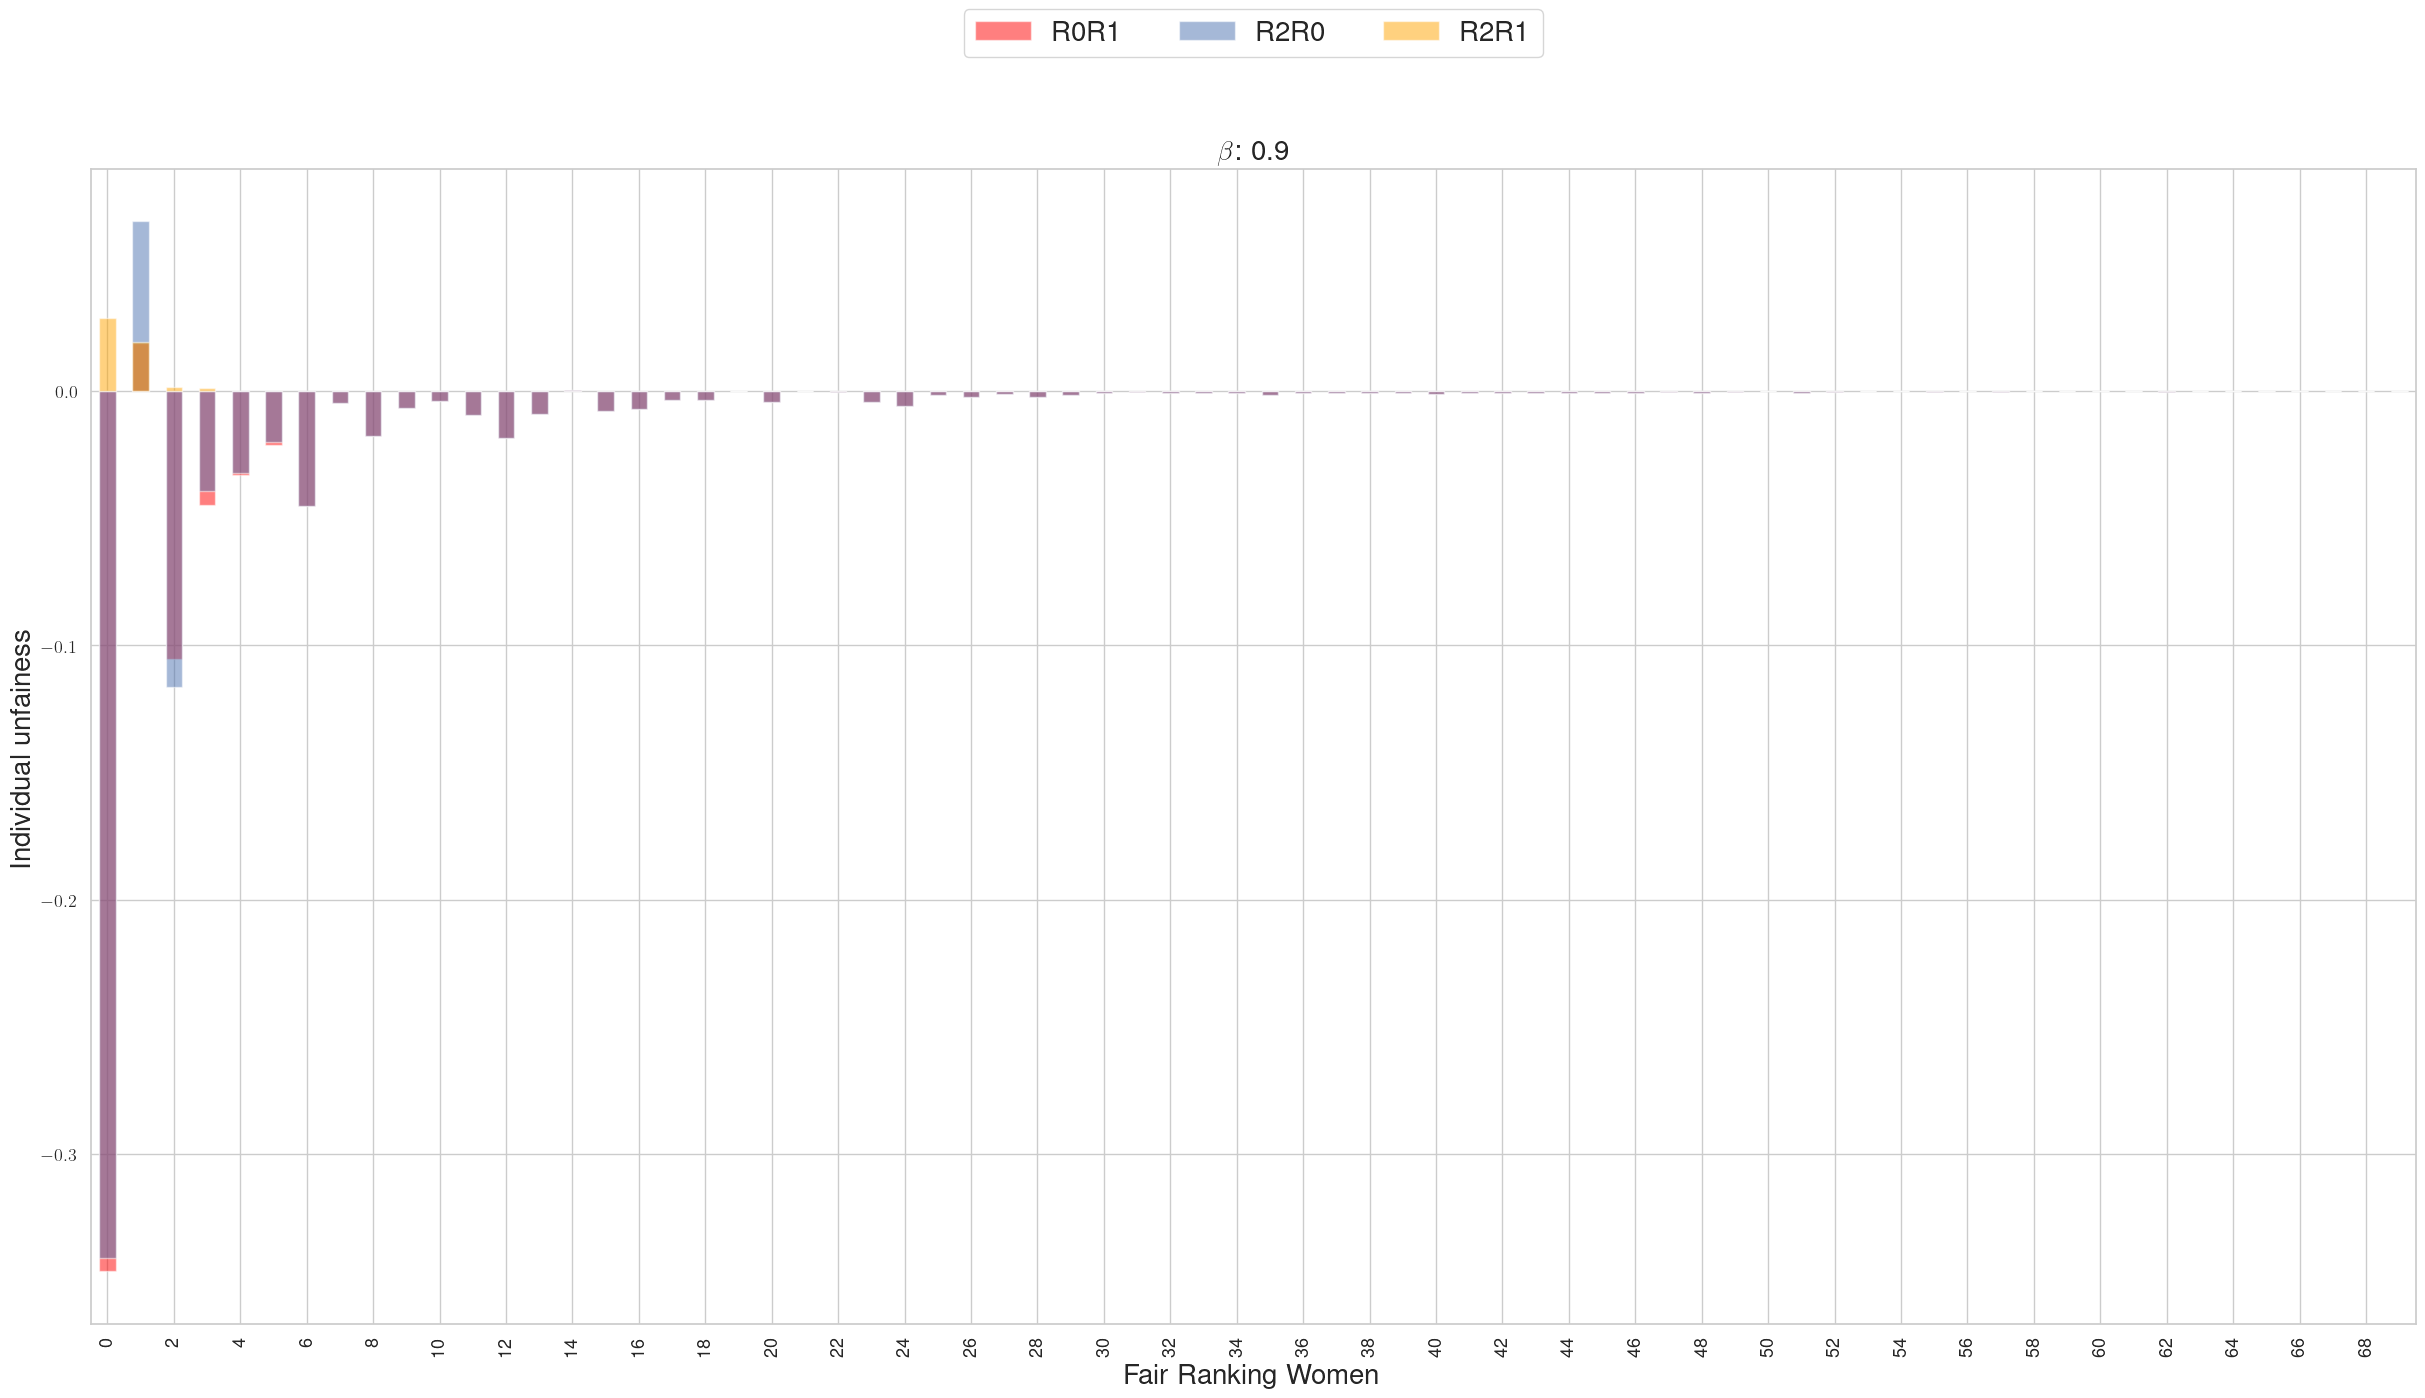

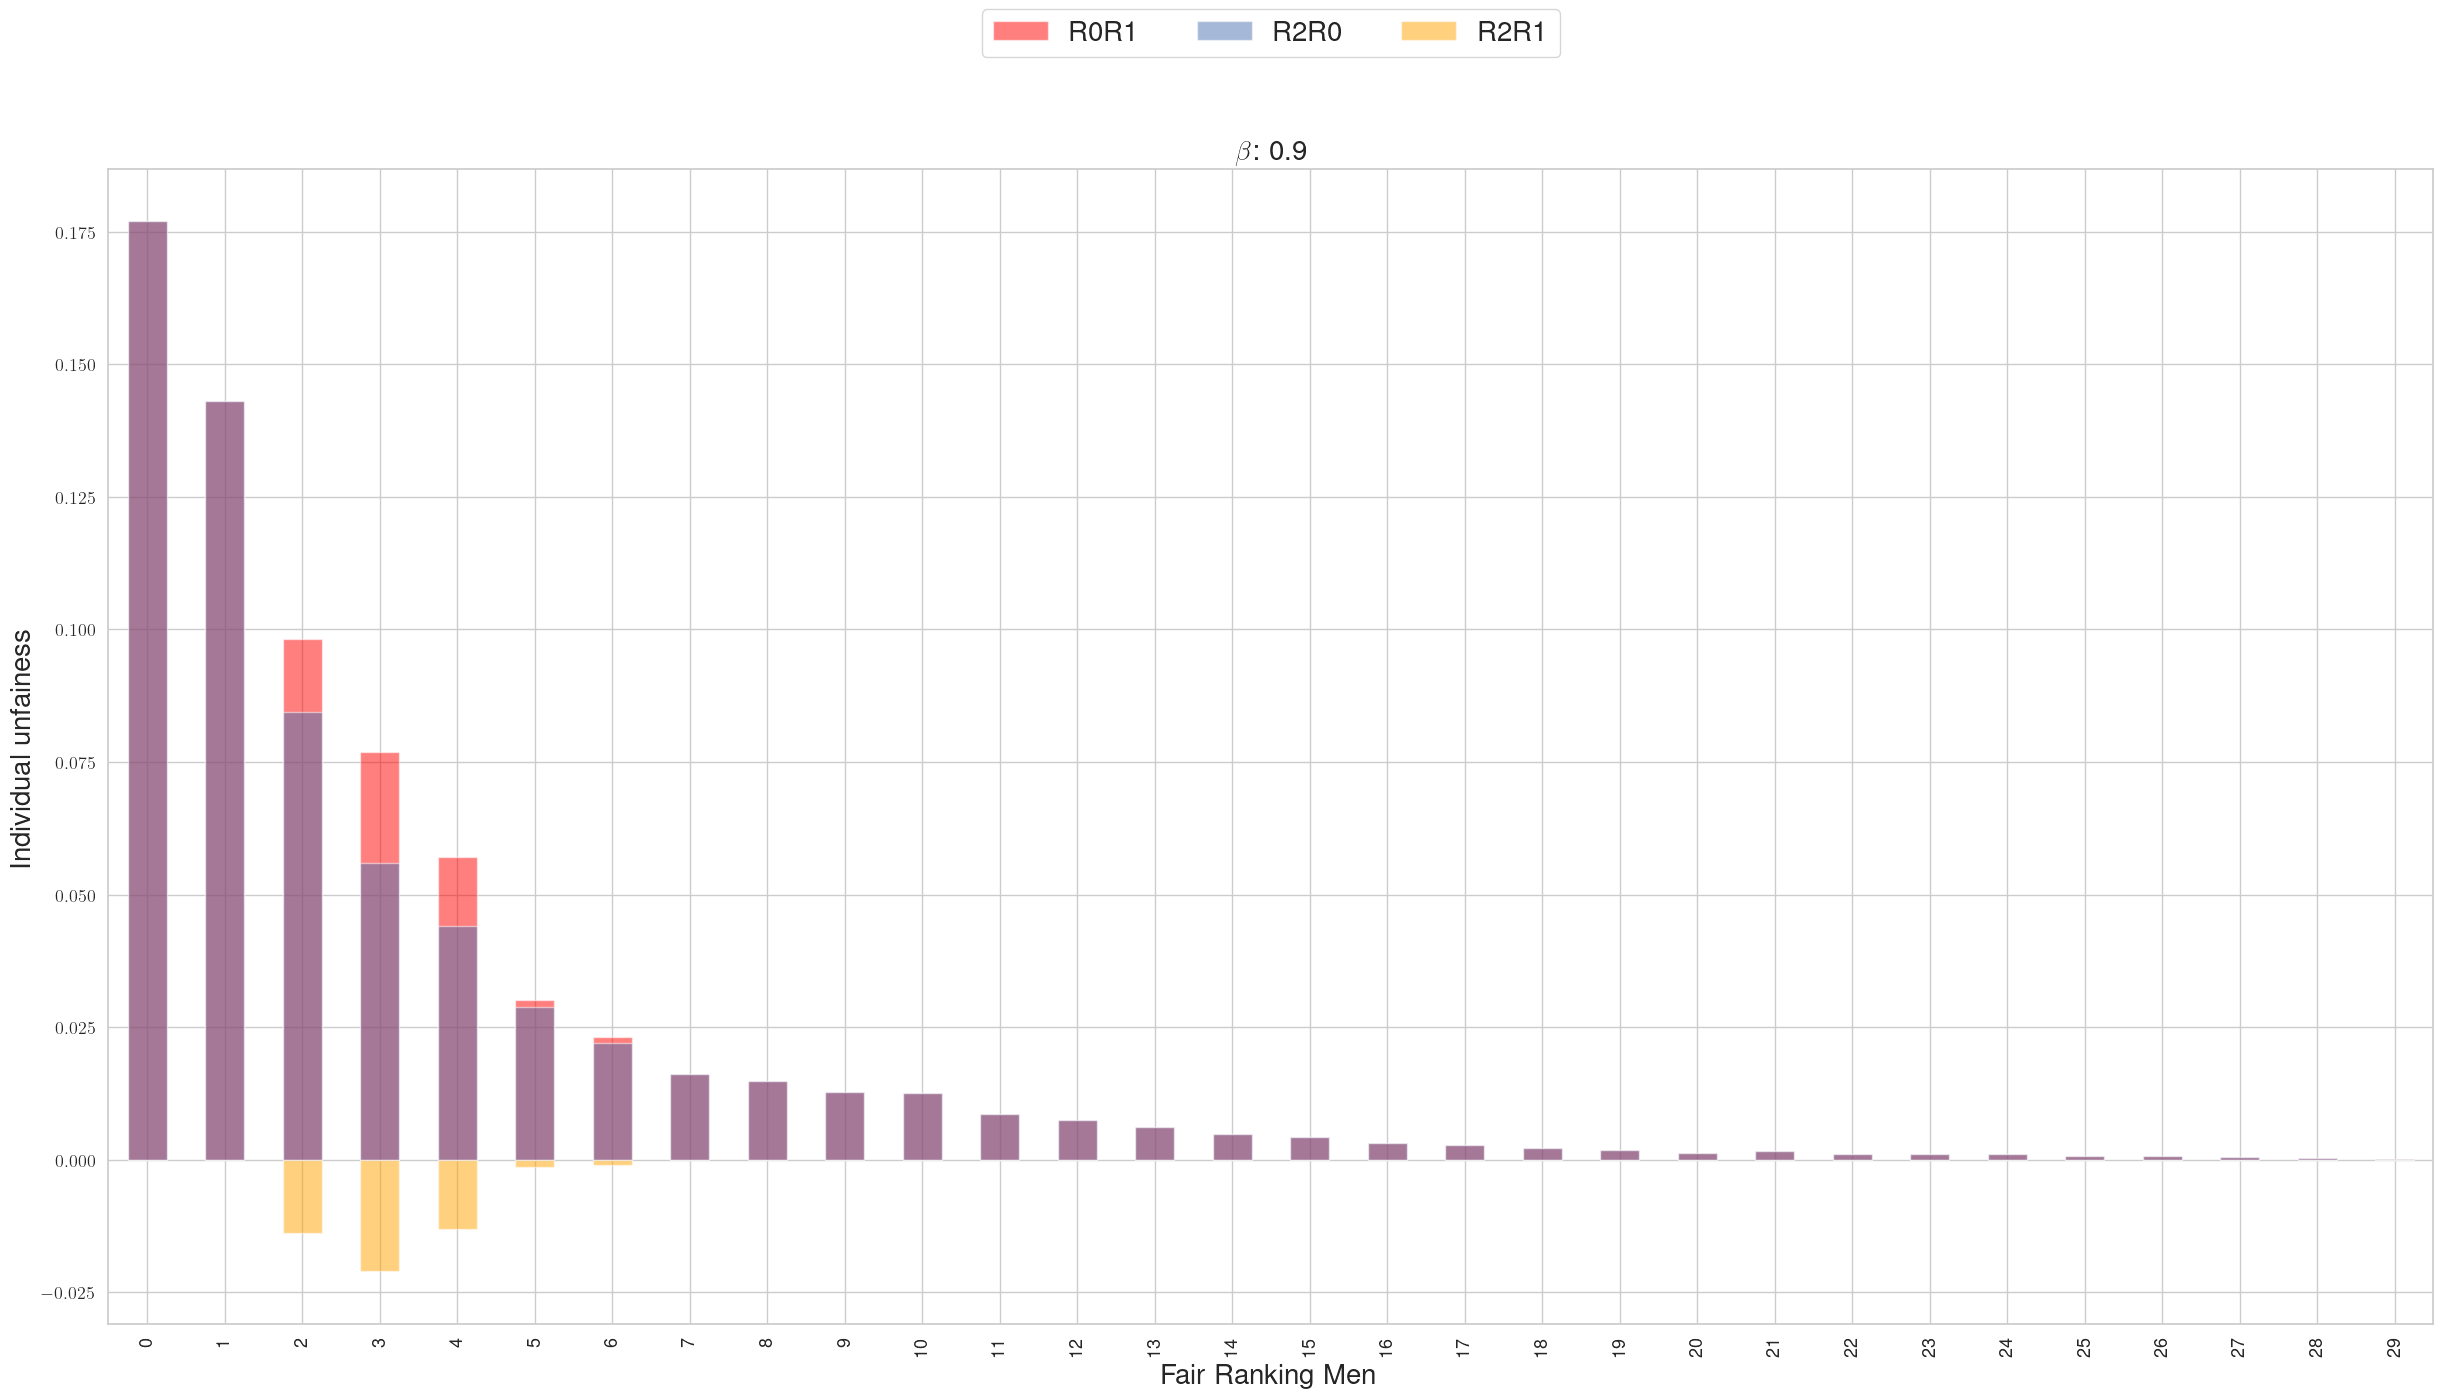

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.61it/s]


Proportion of Women: 0.9


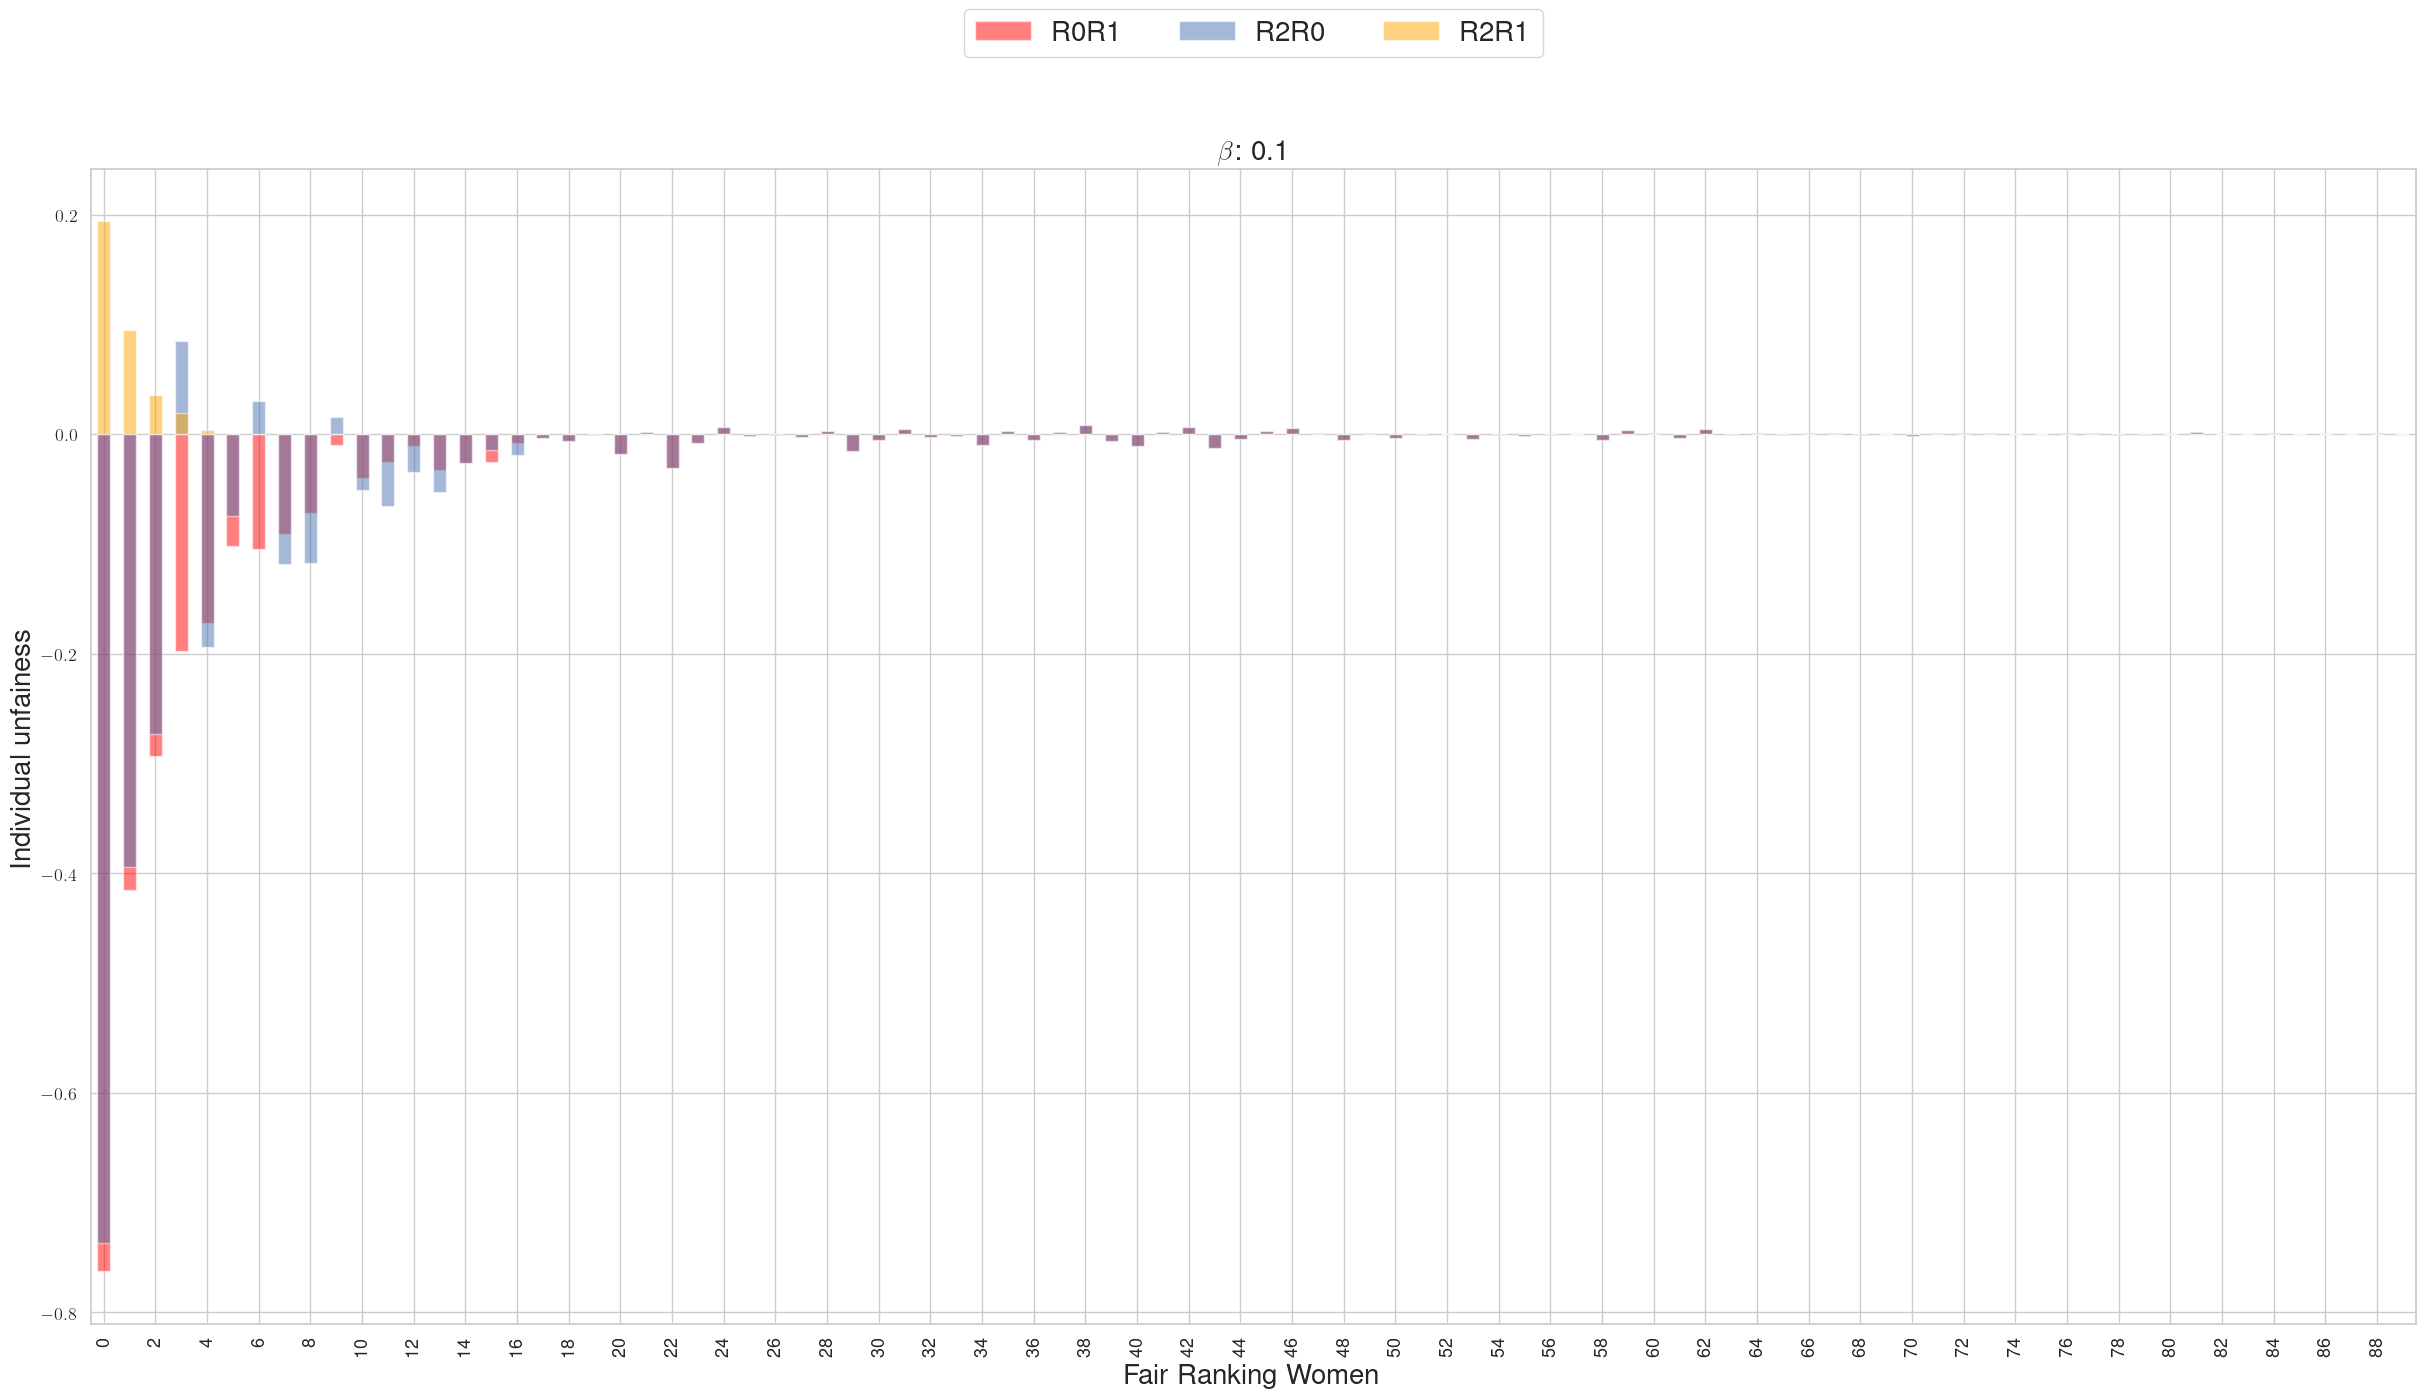

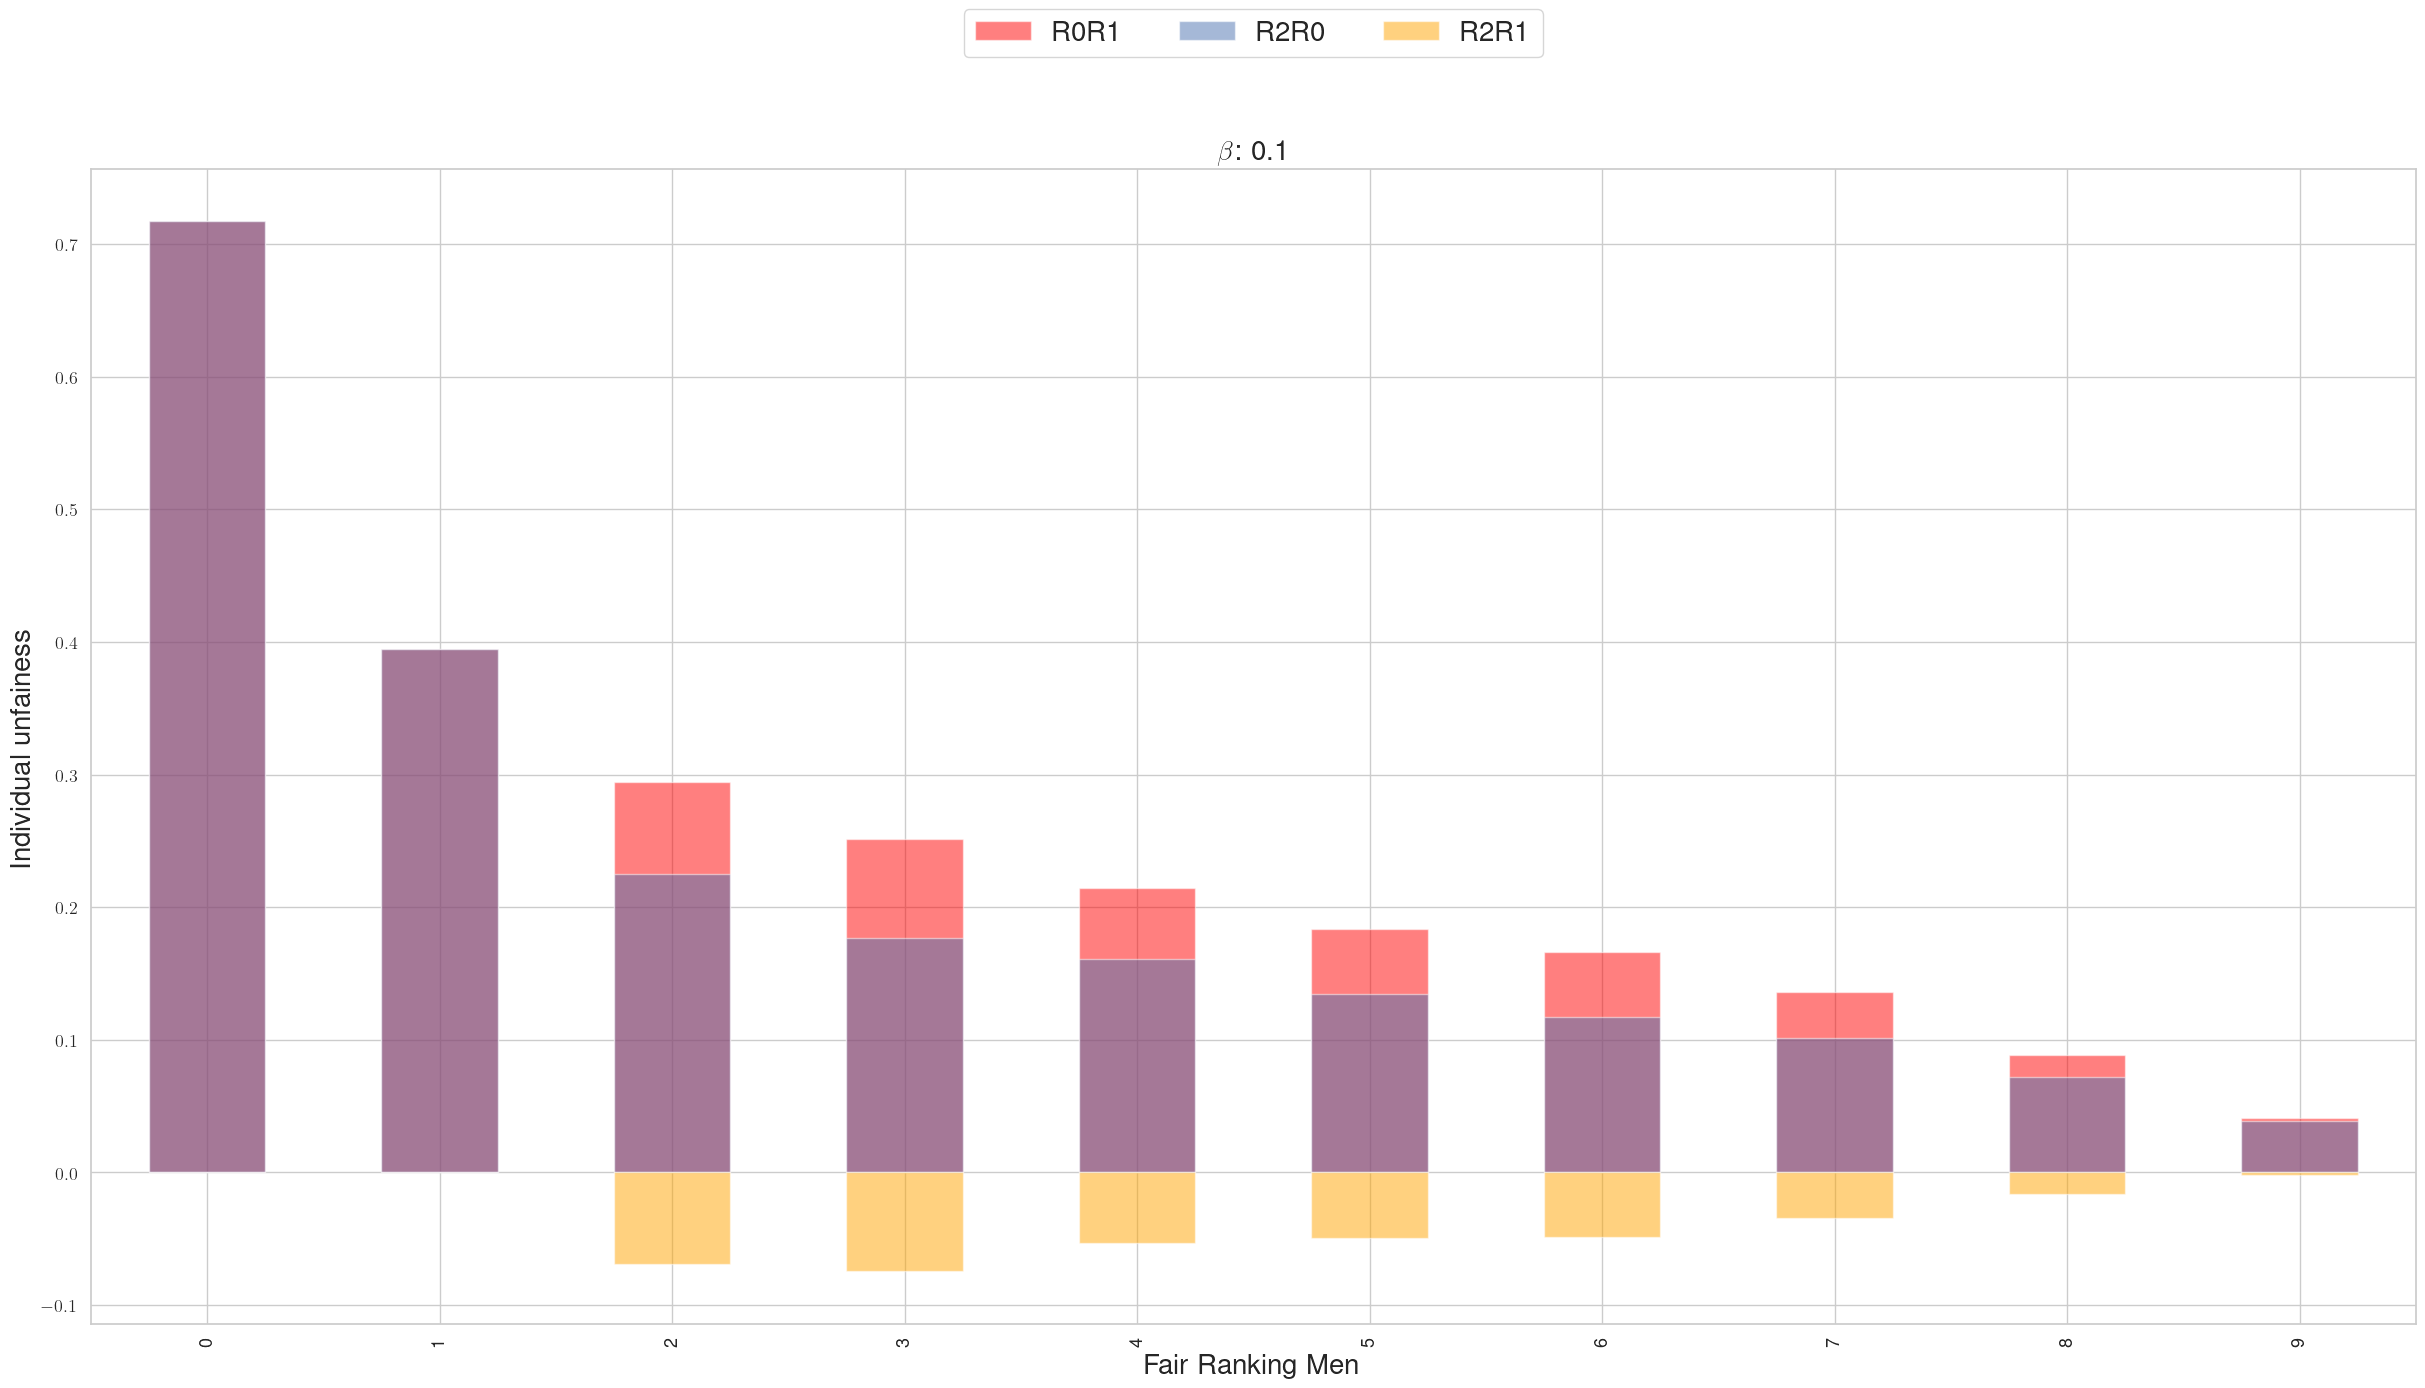

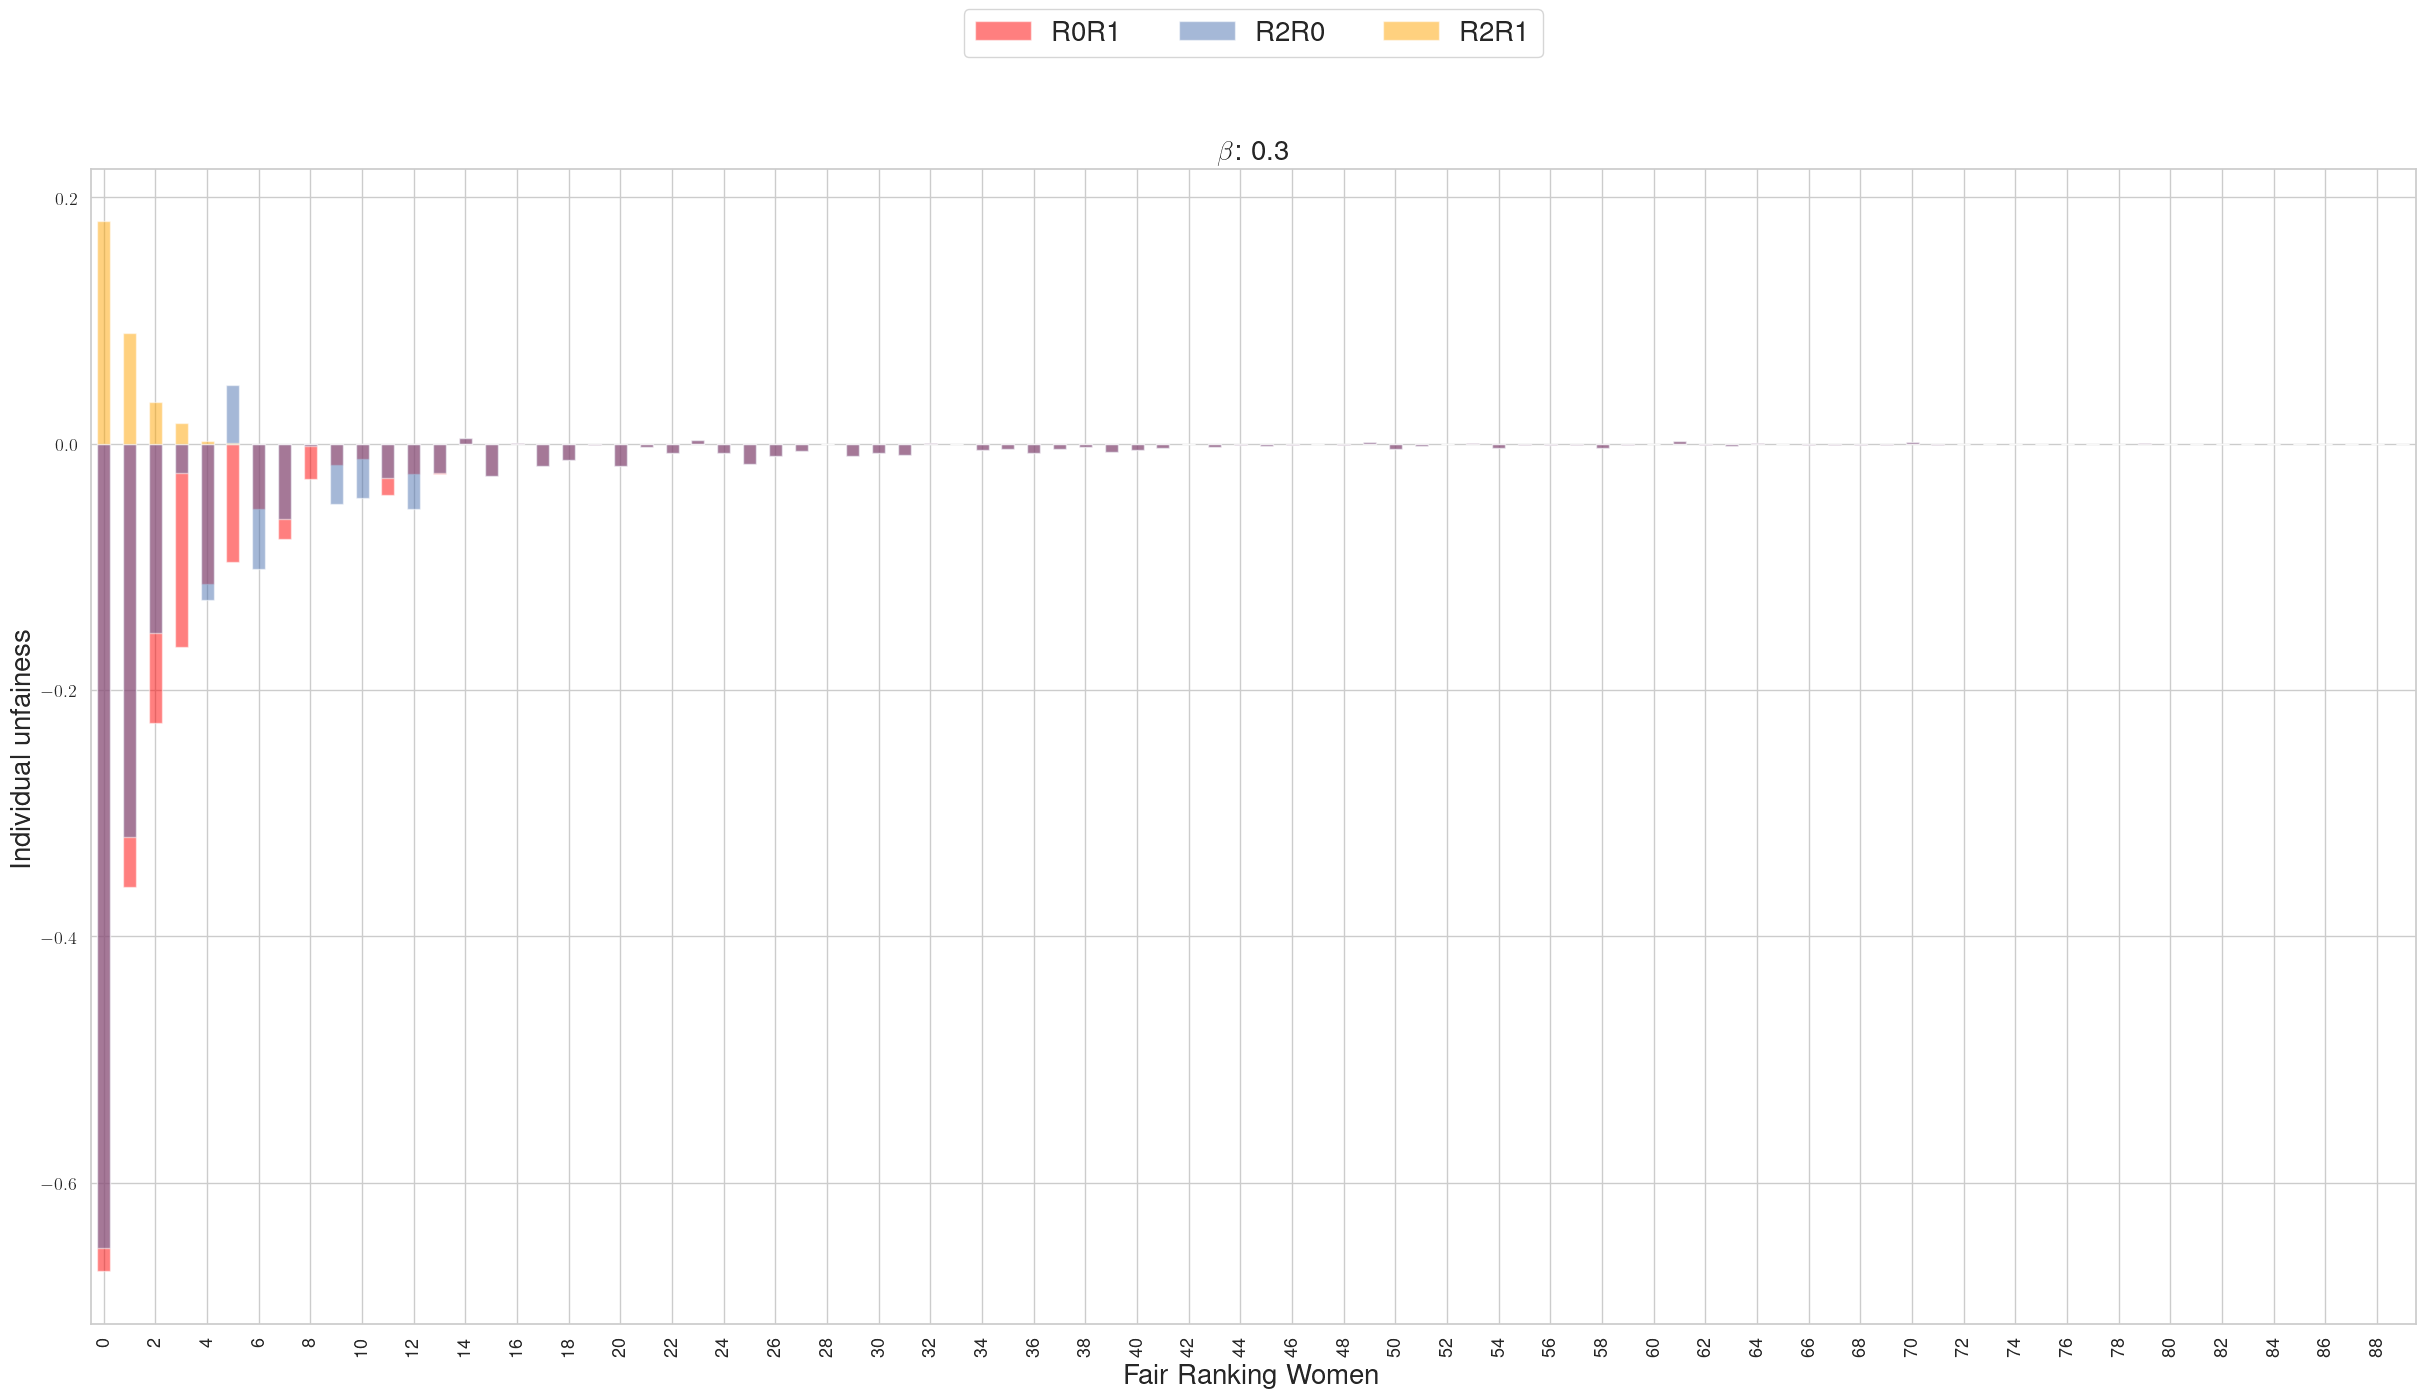

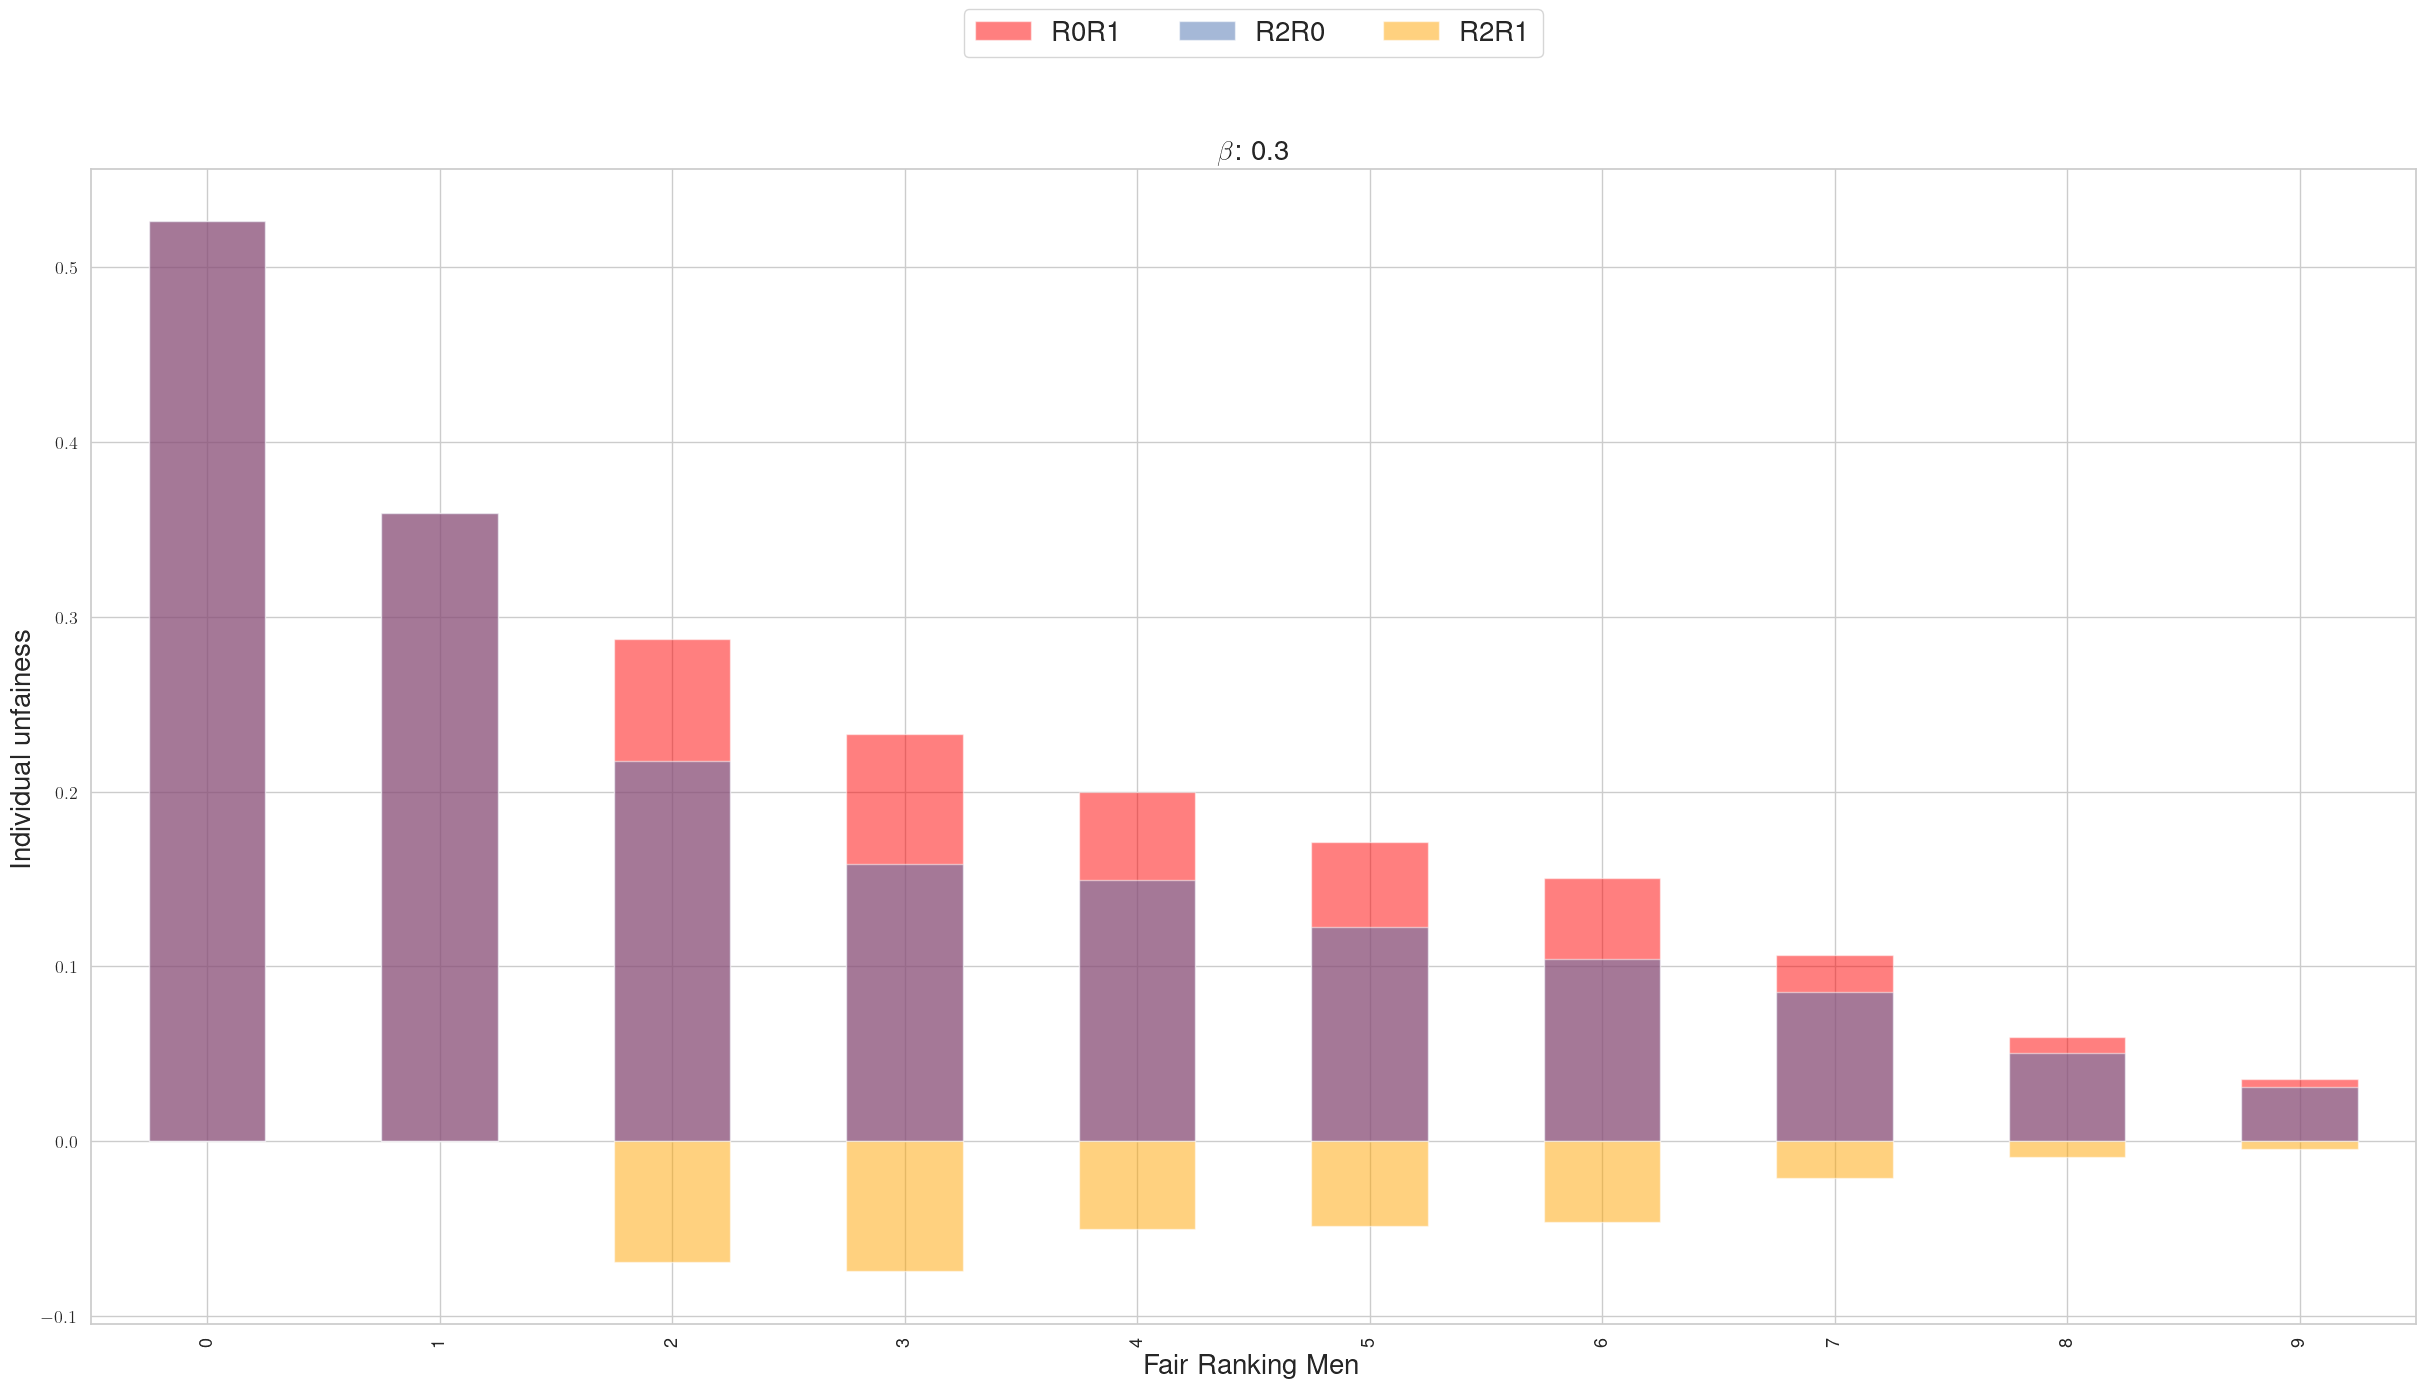

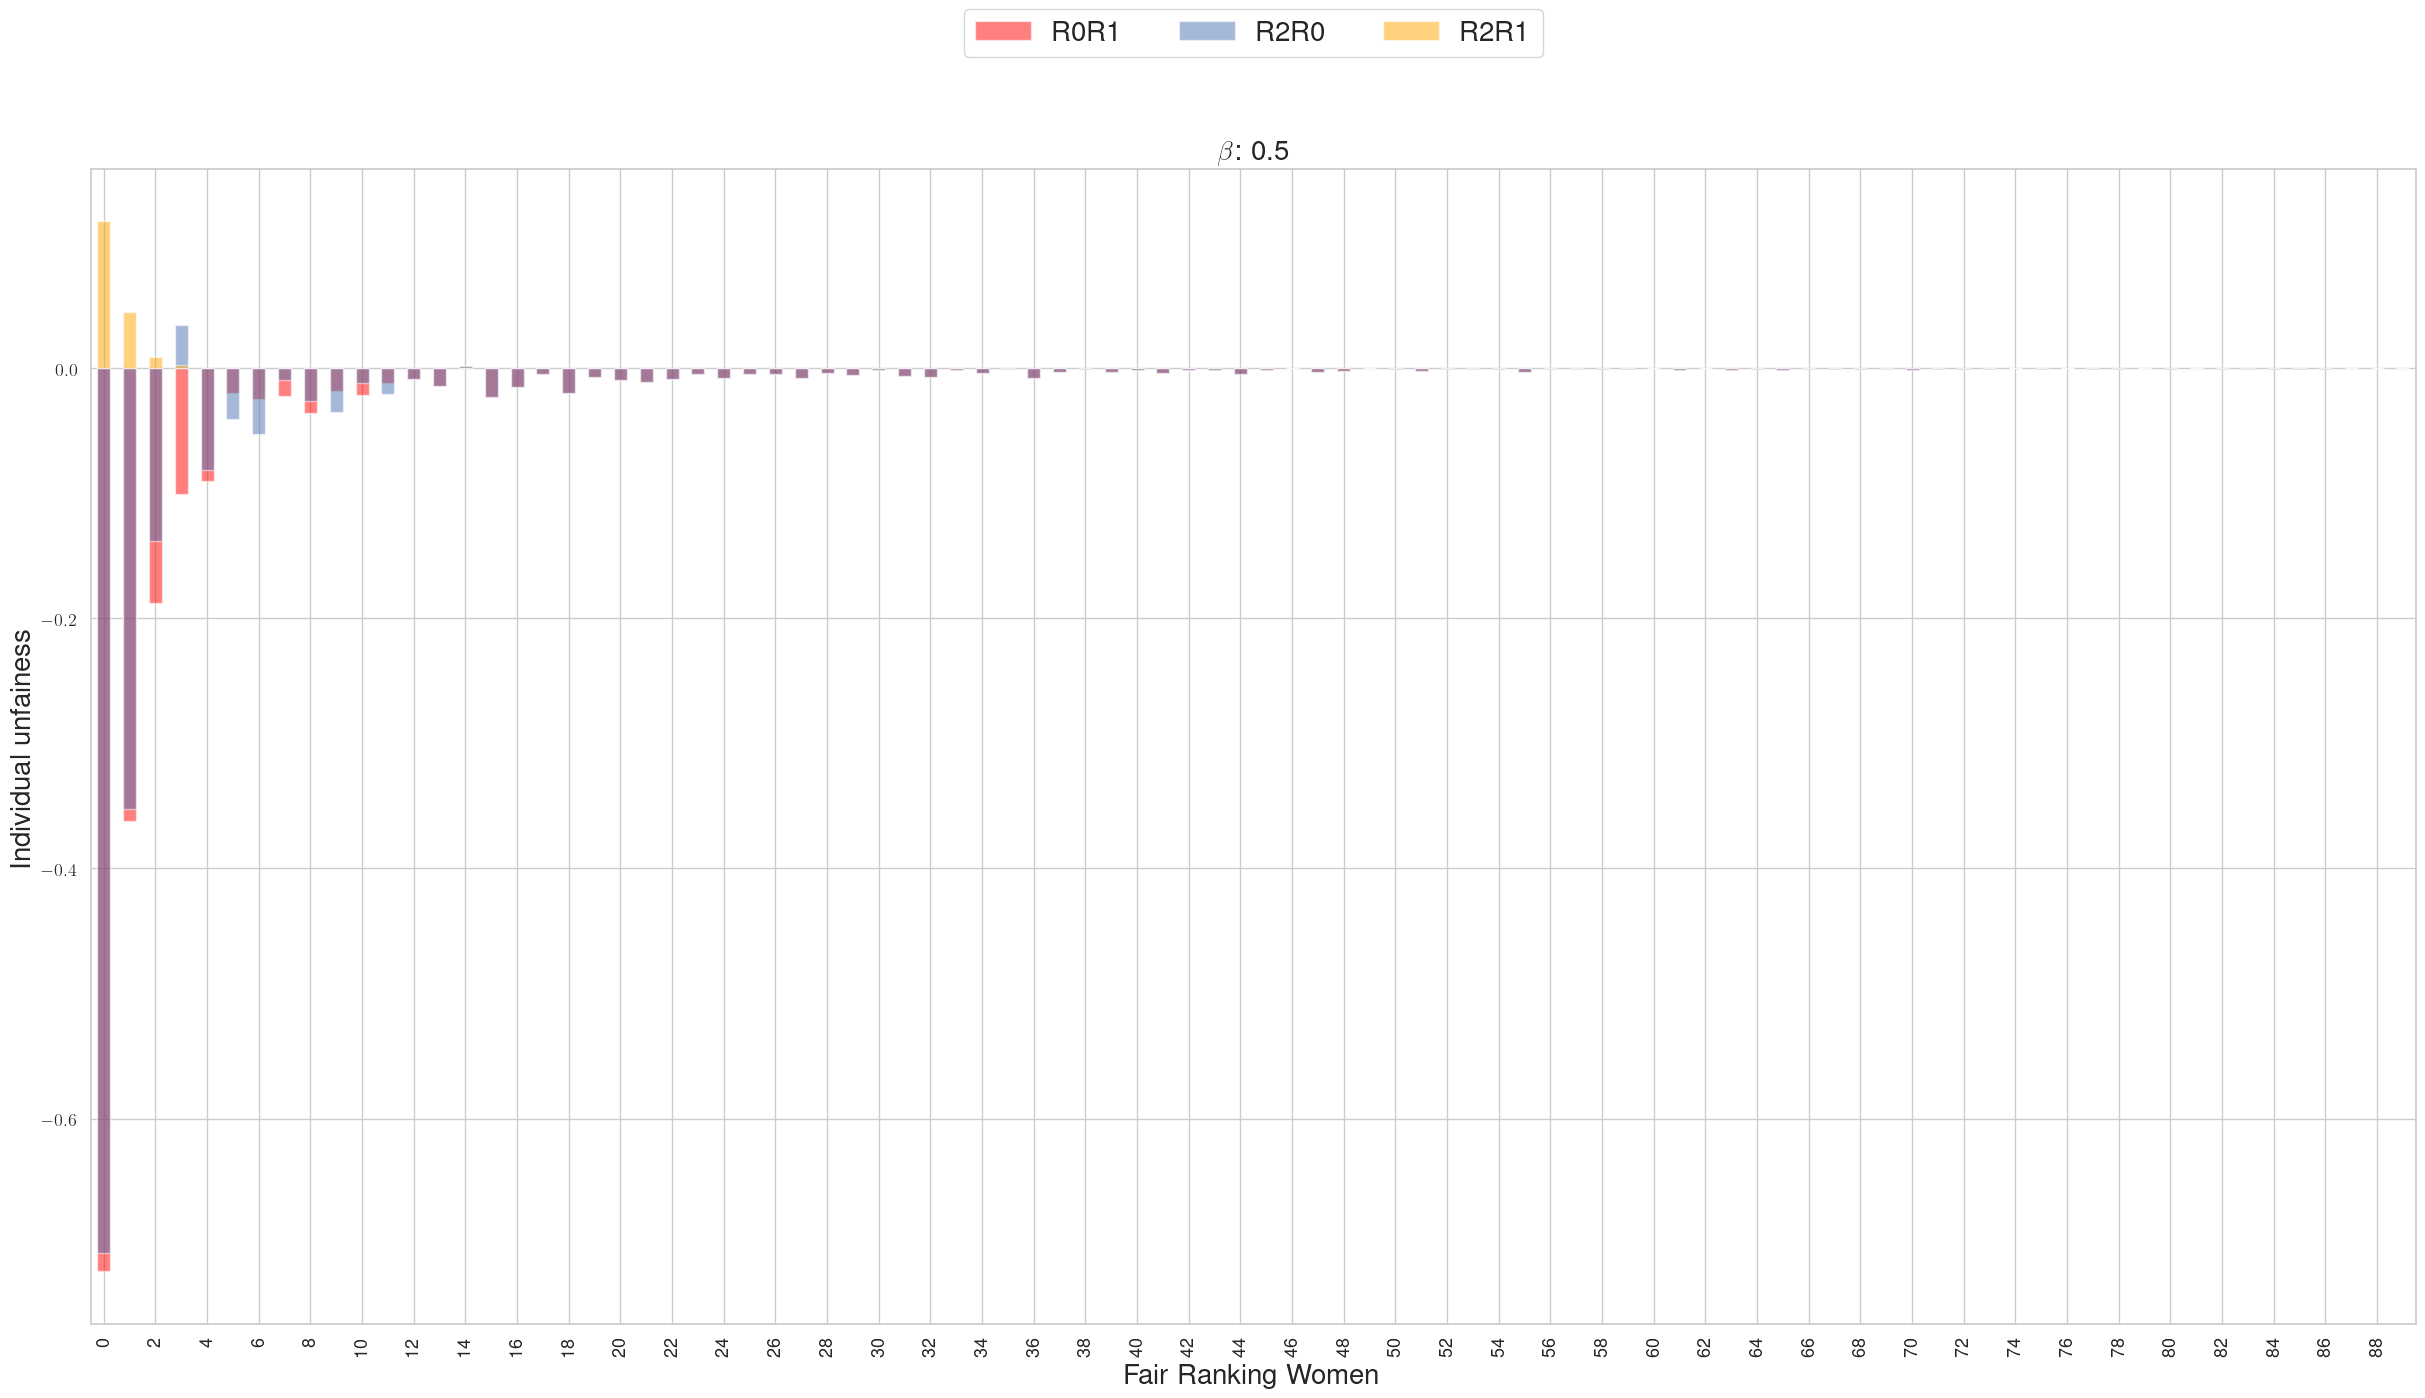

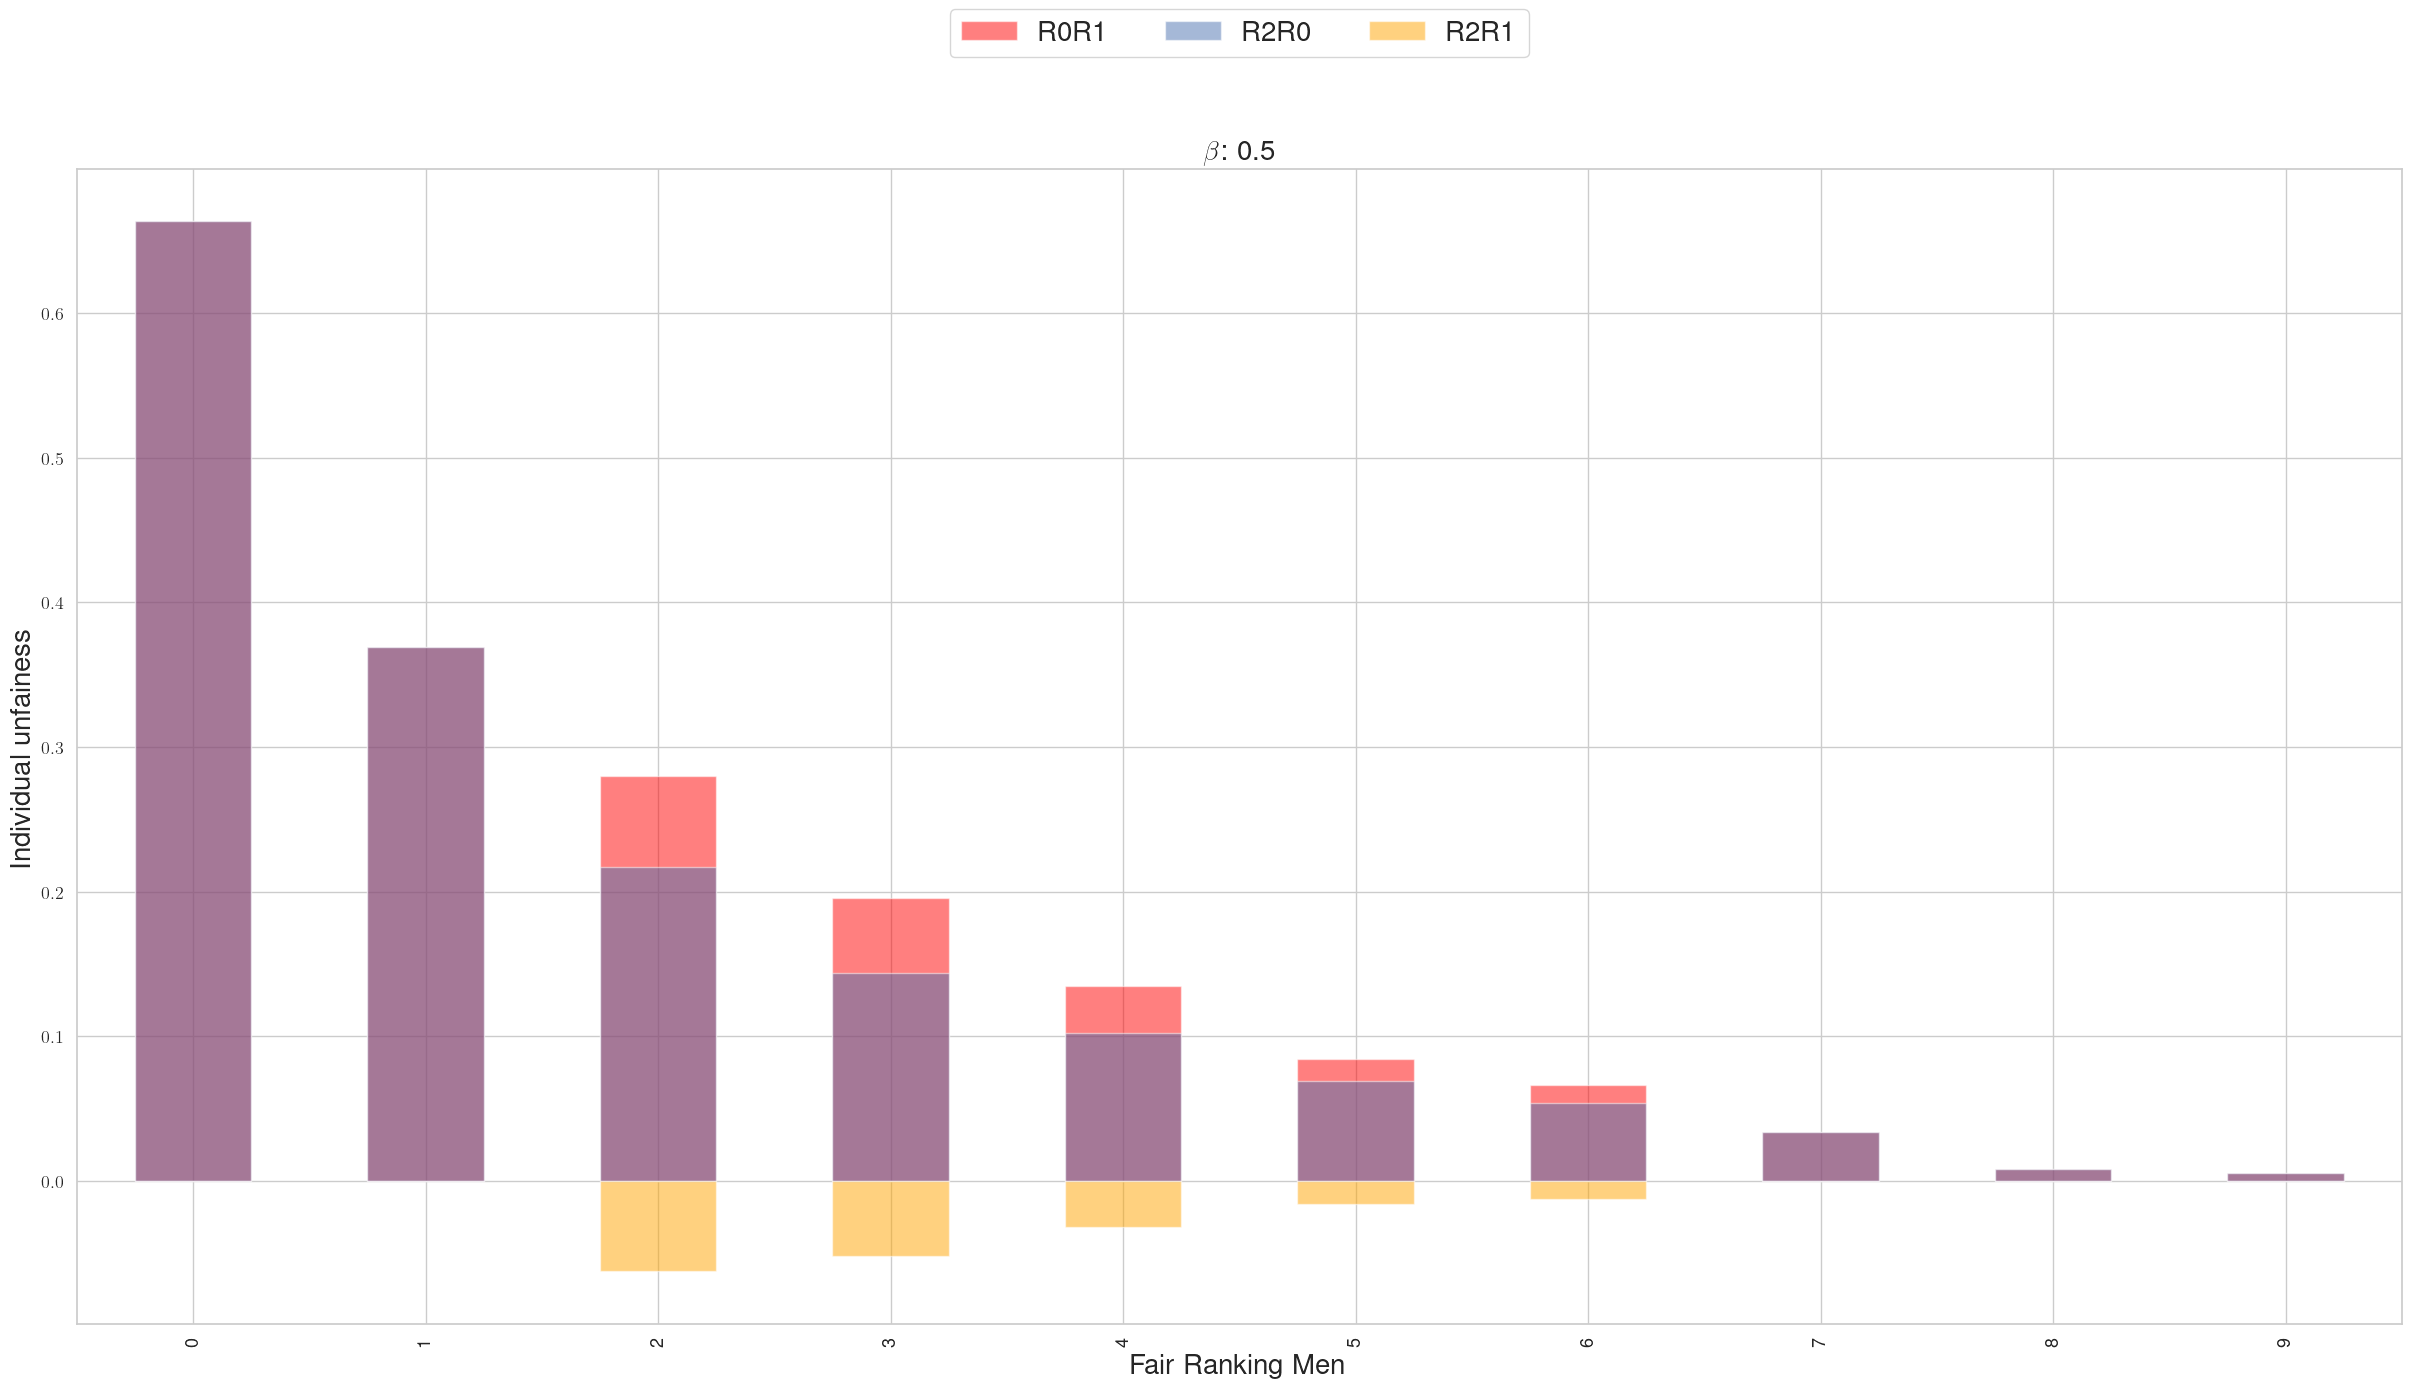

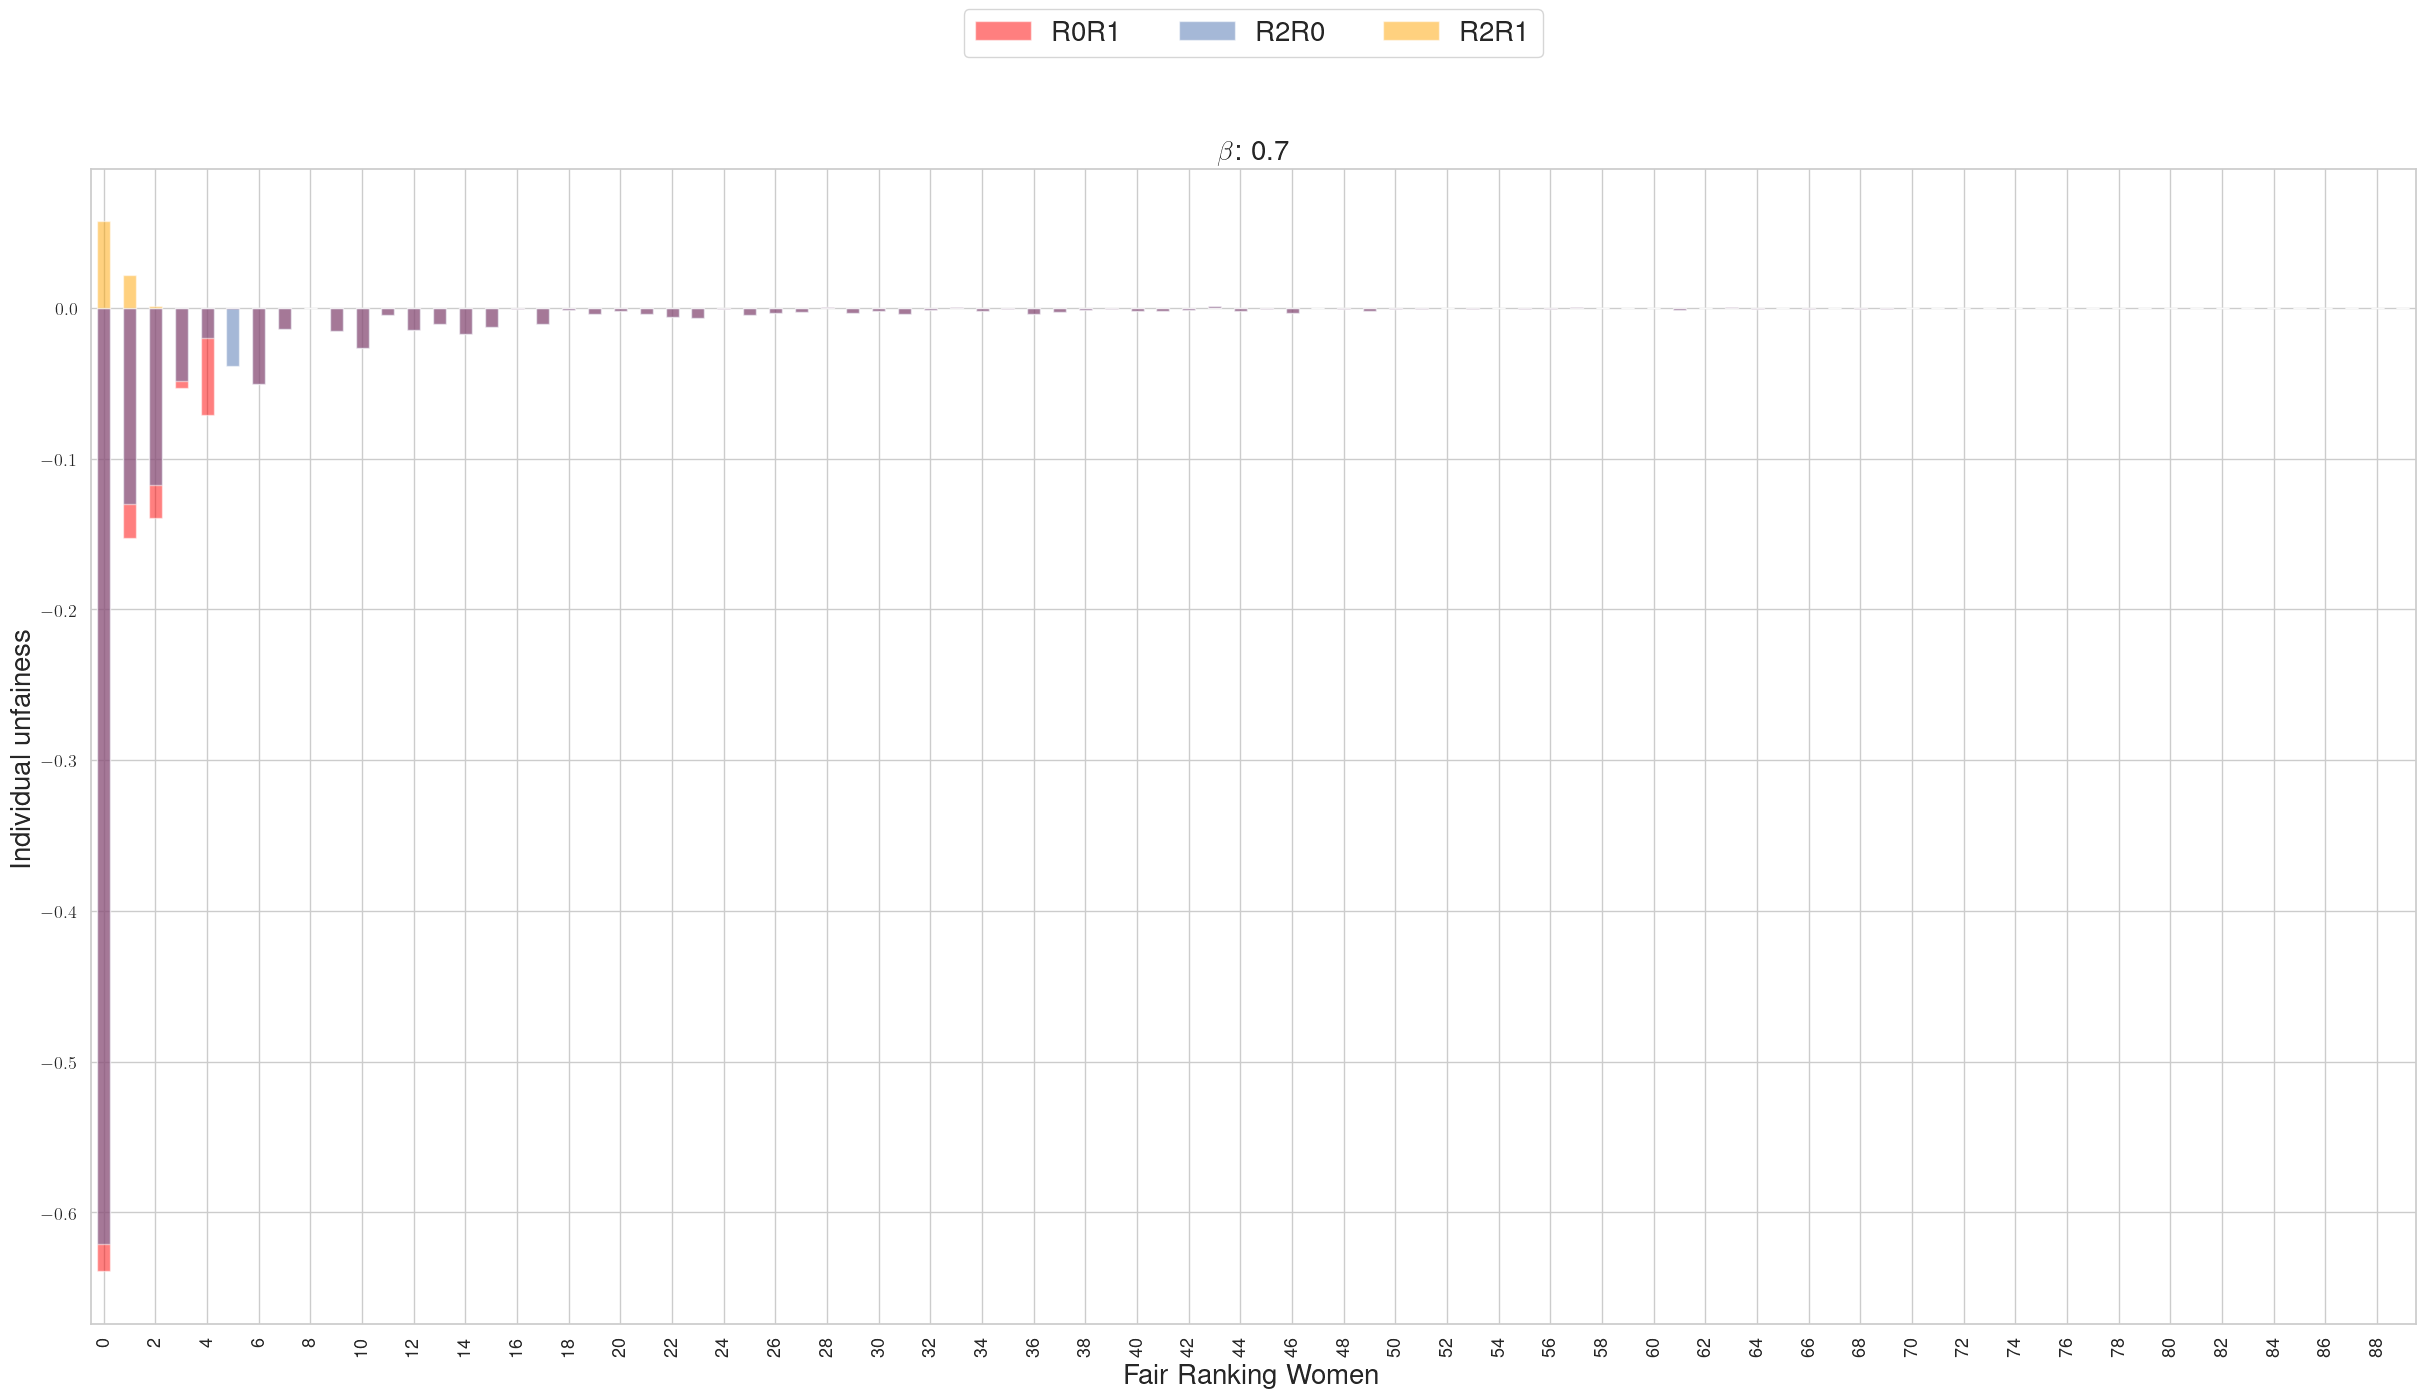

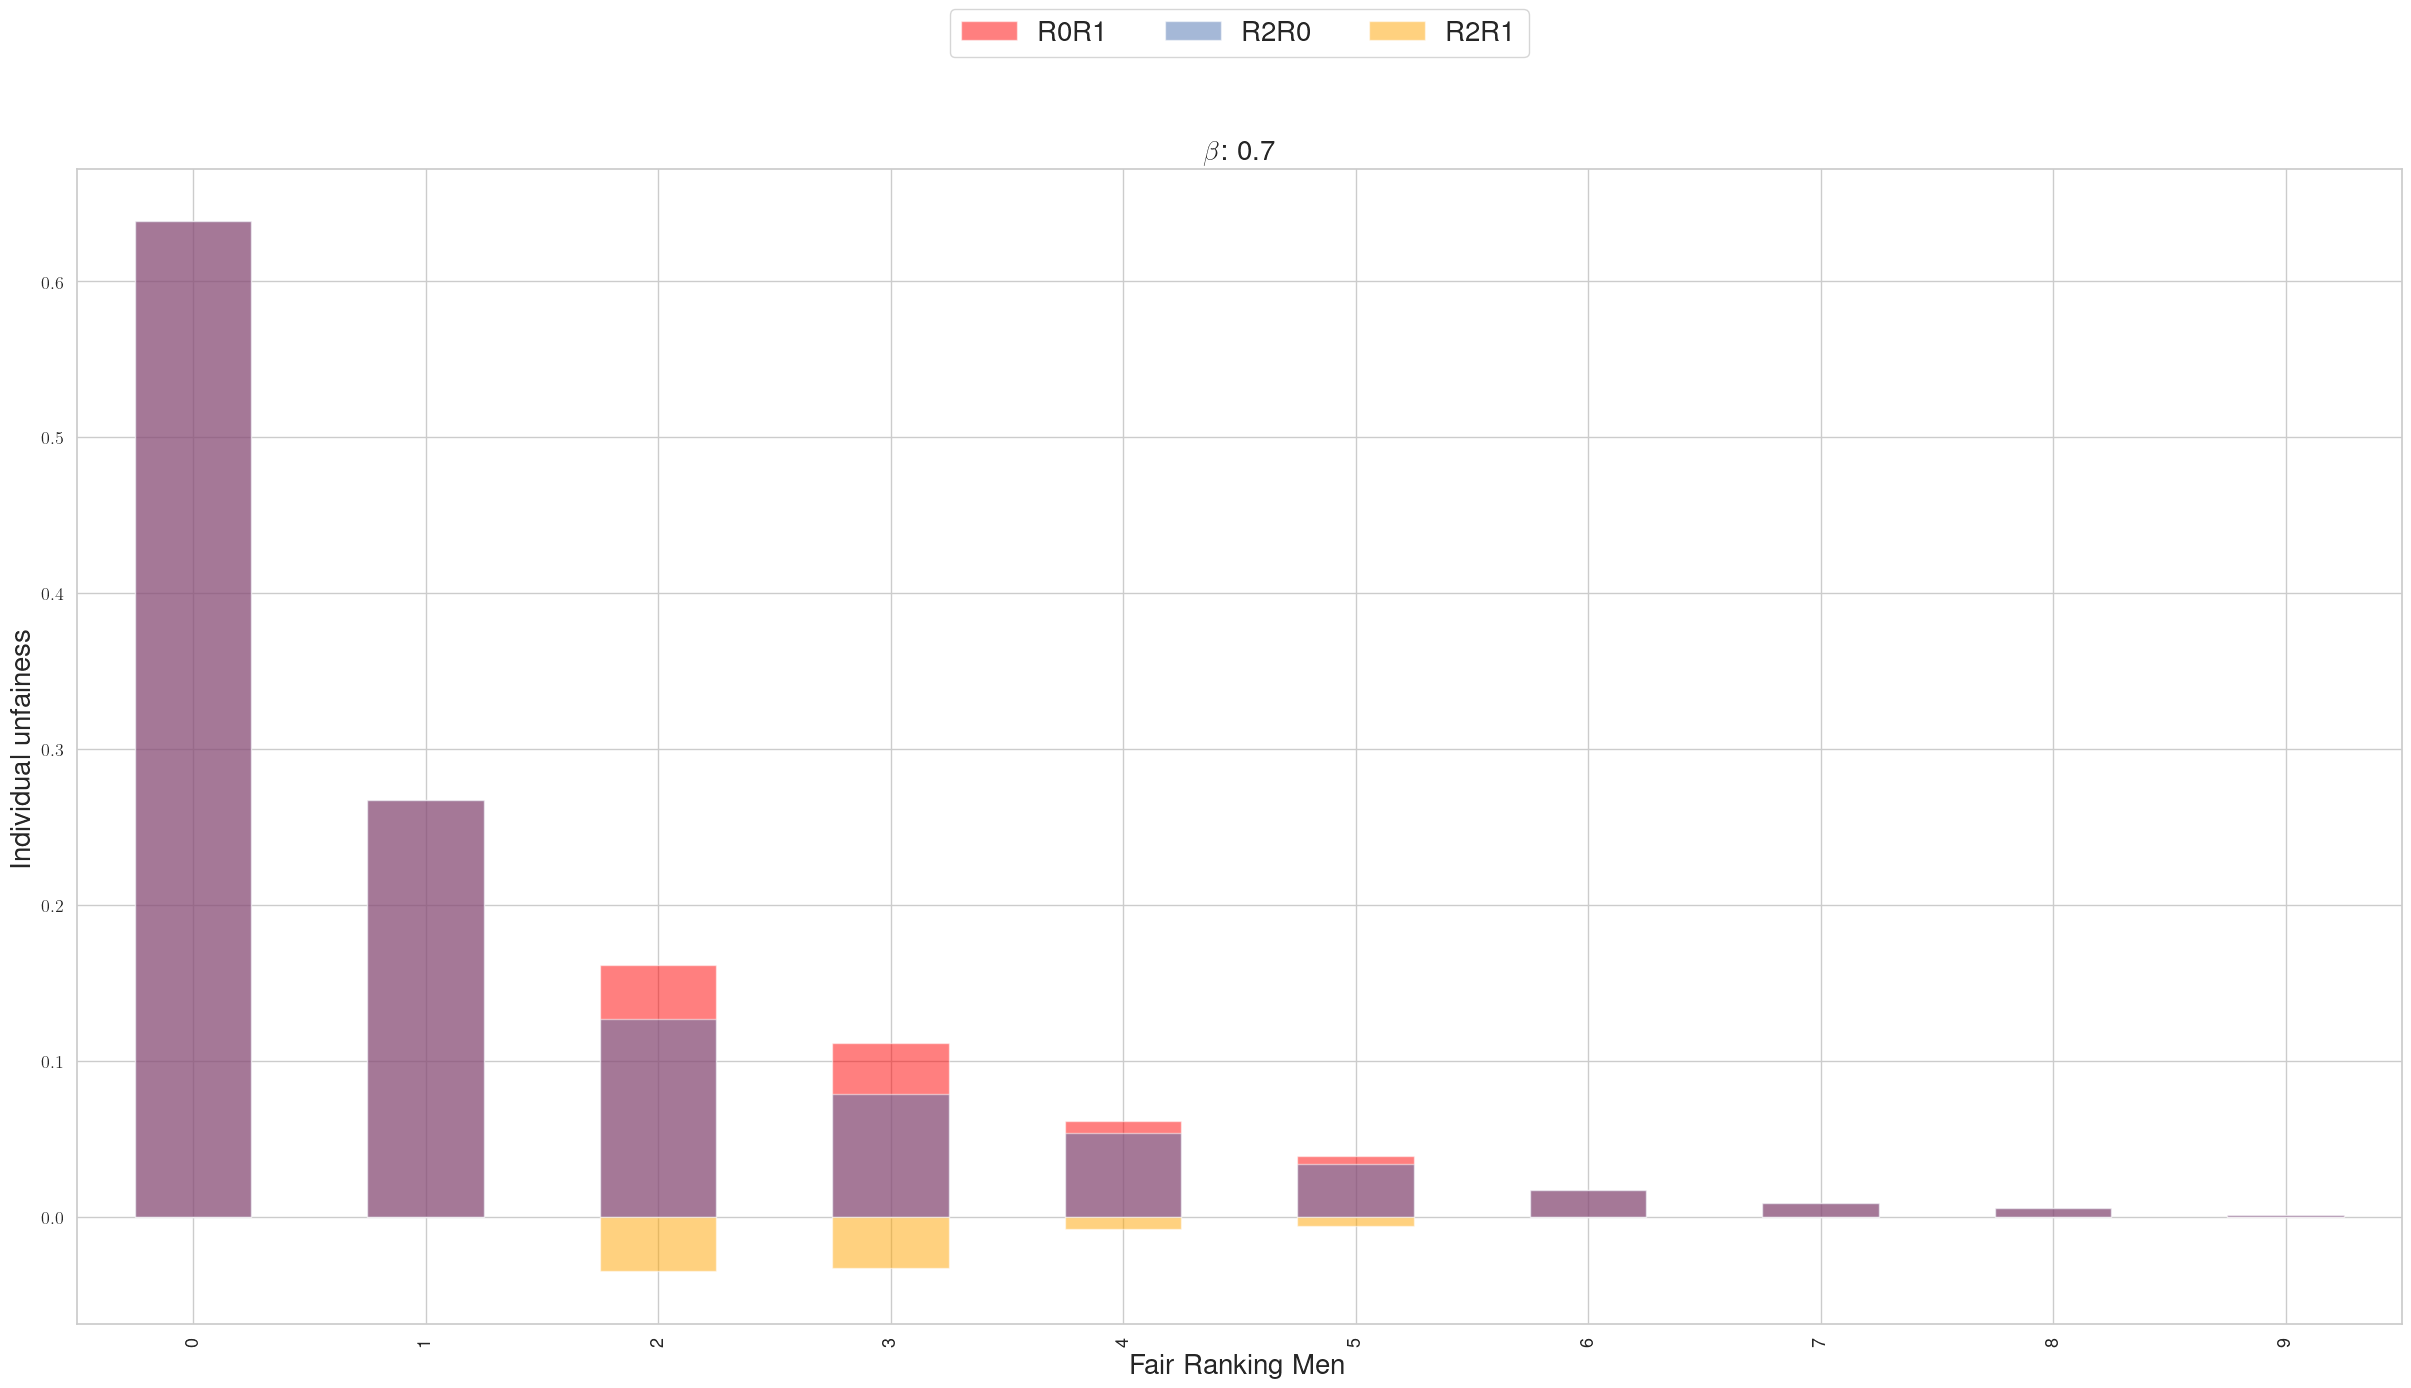

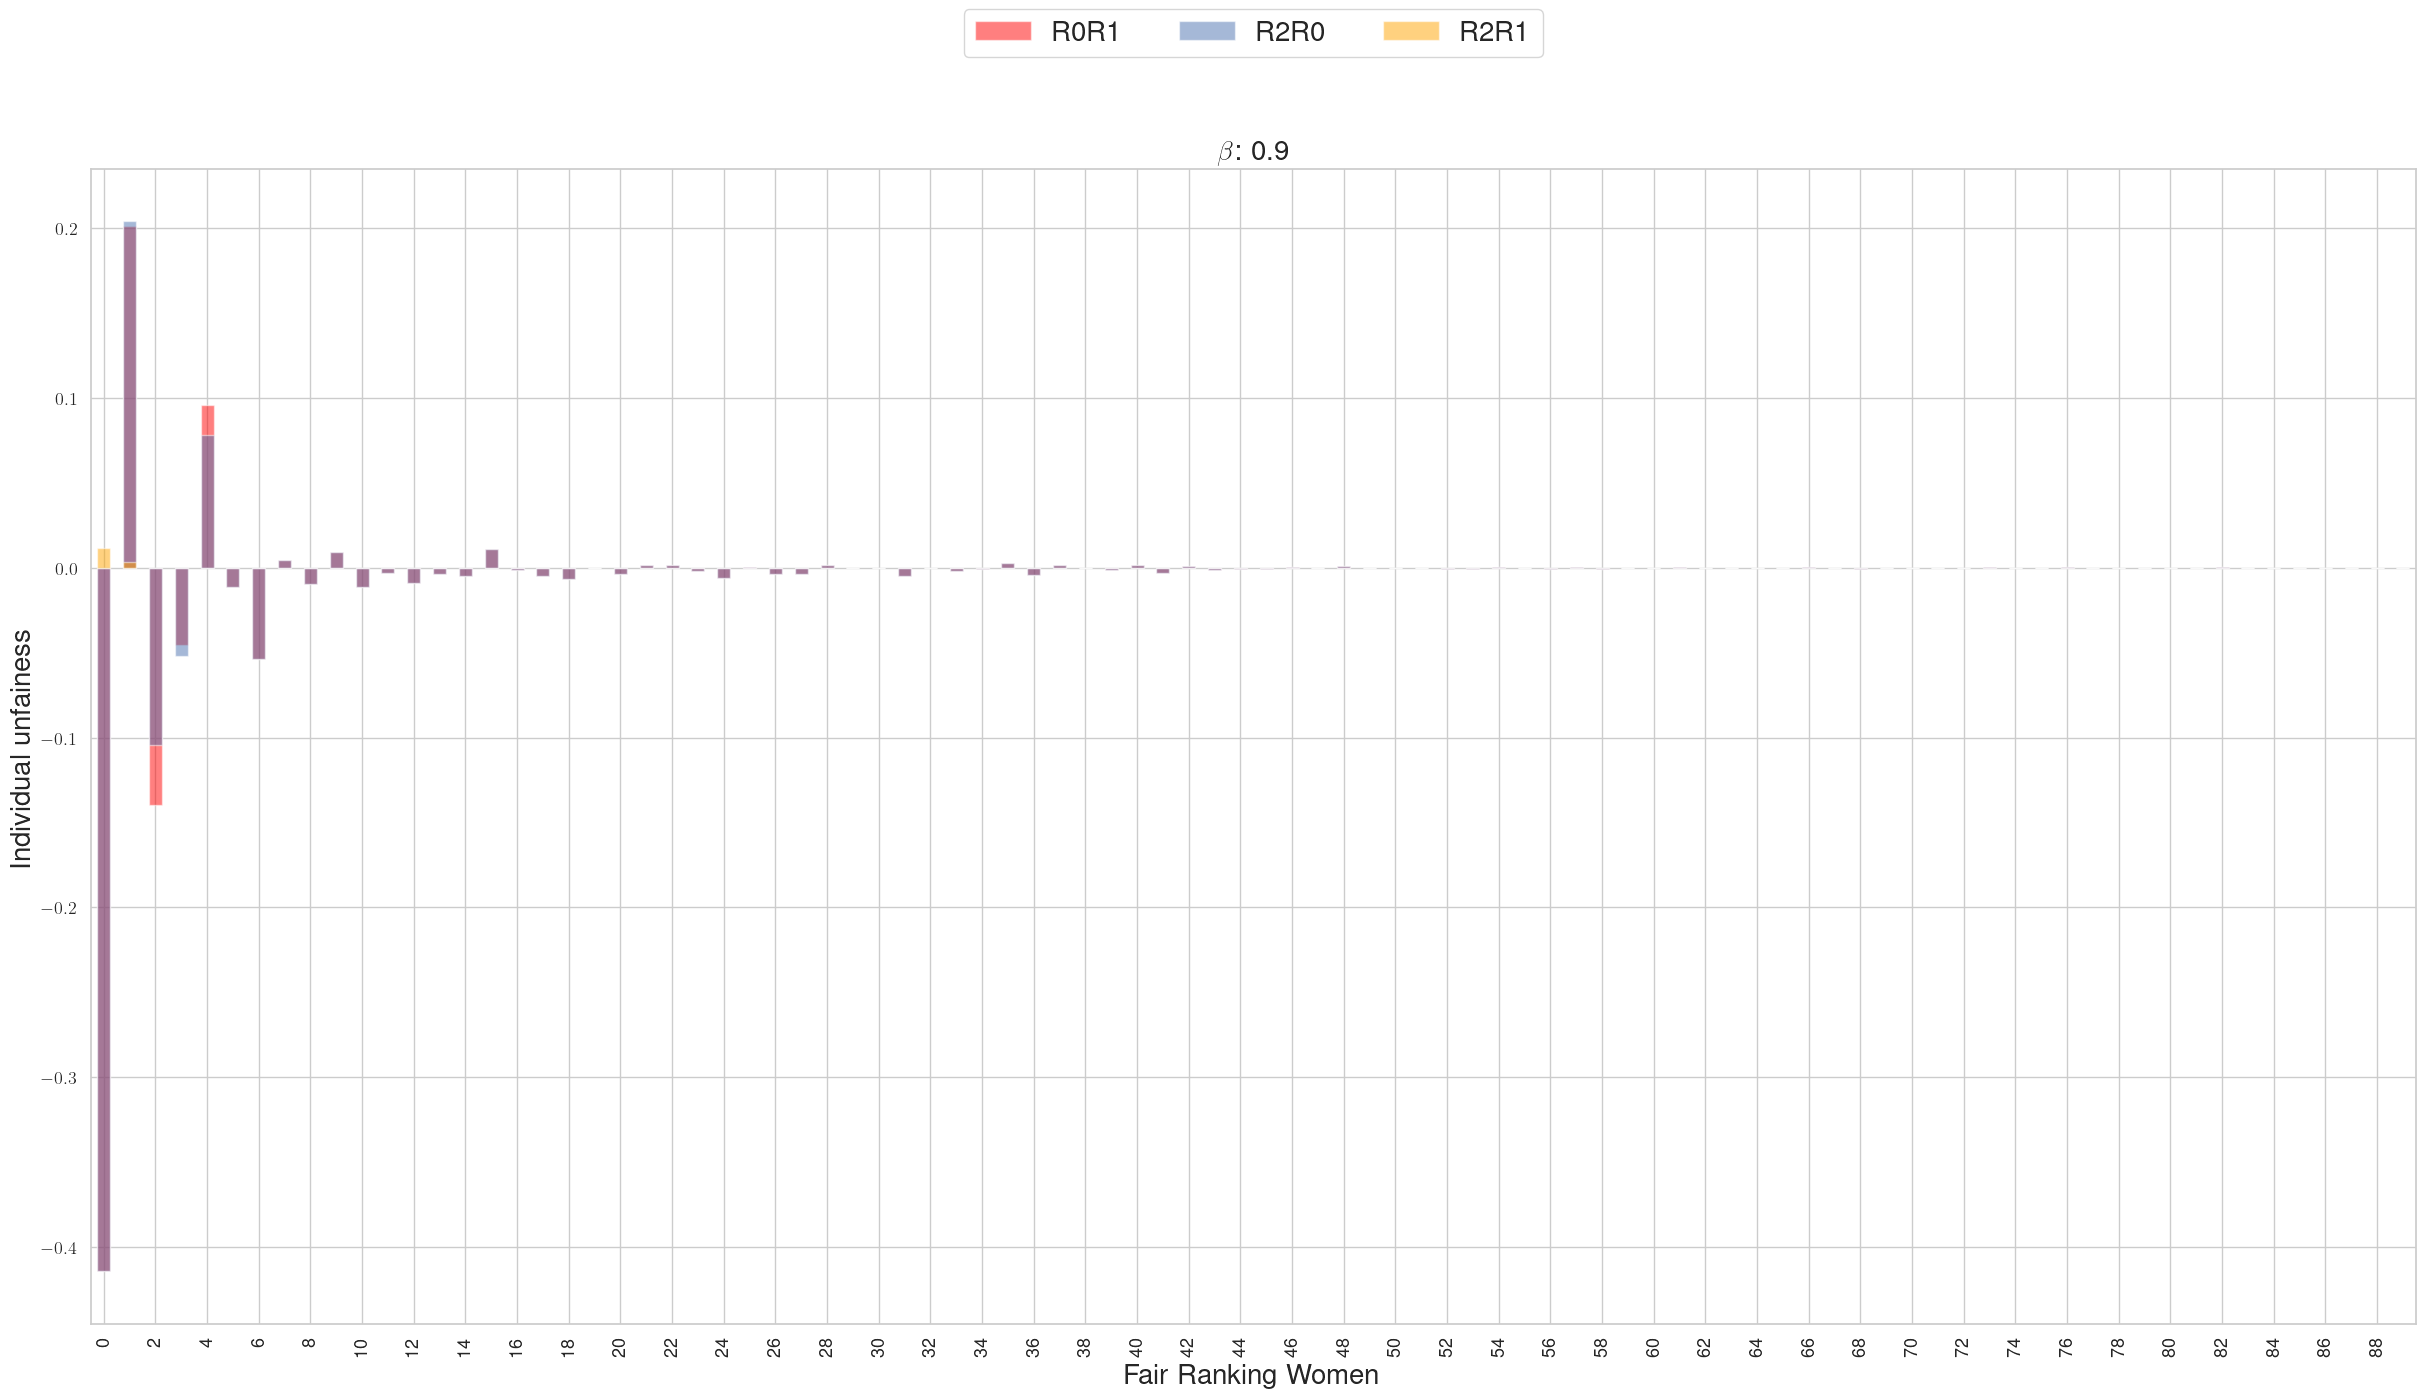

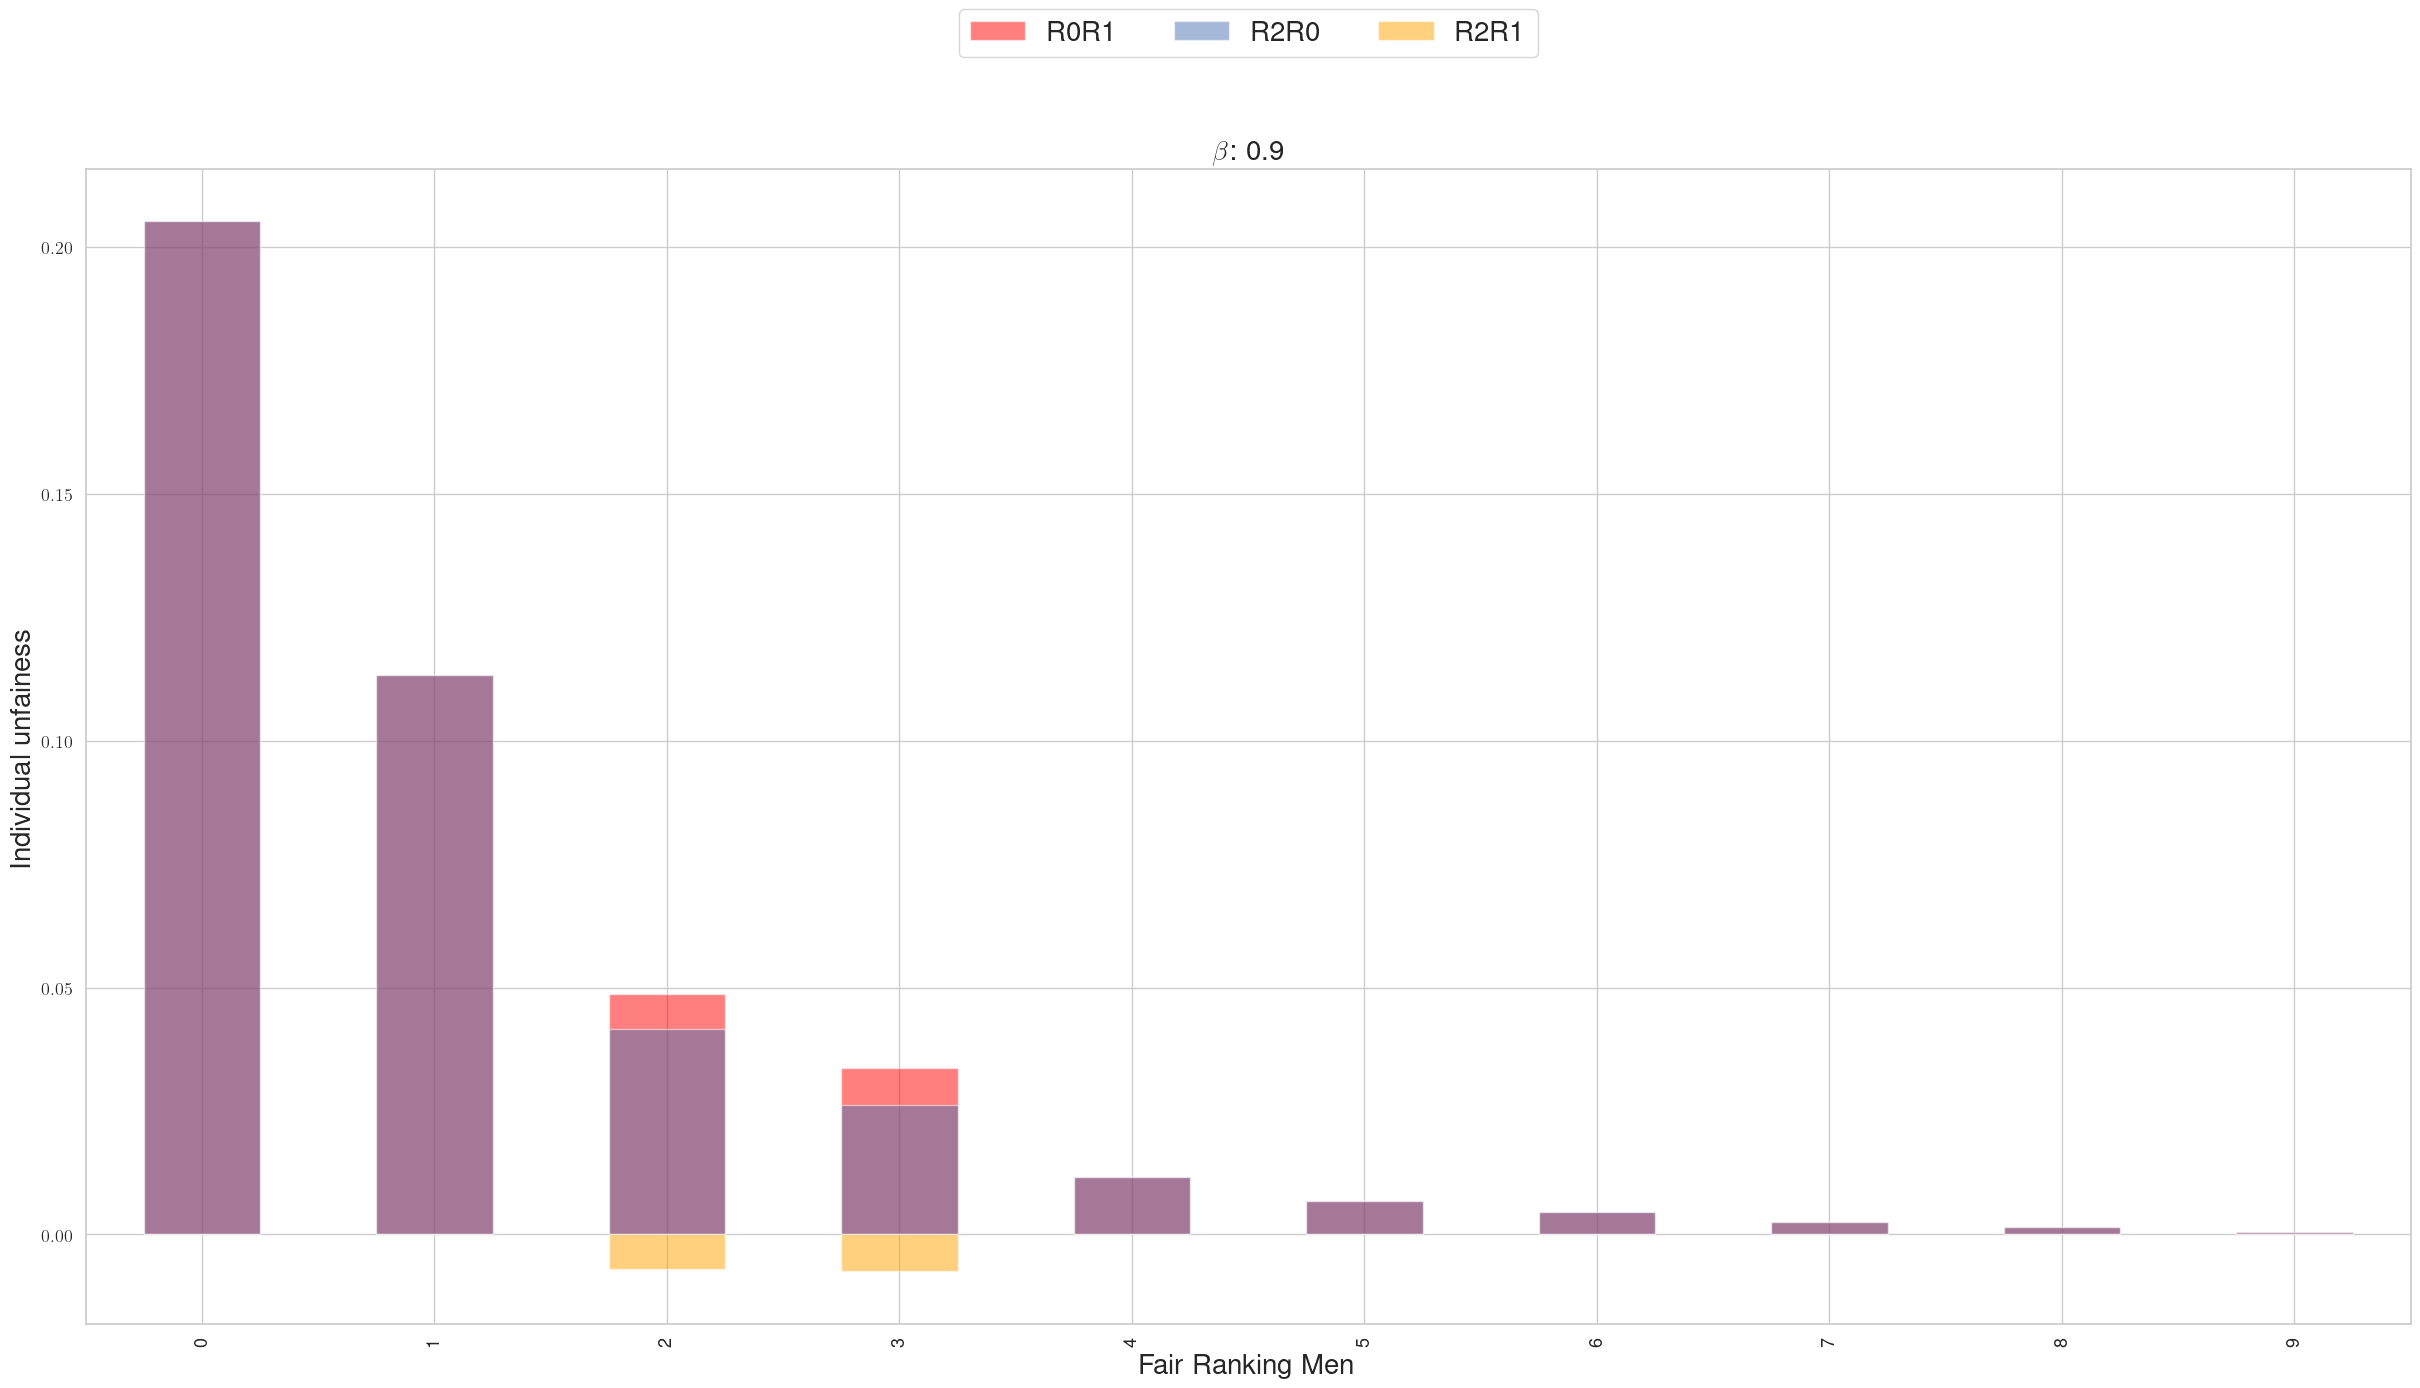

In [18]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)

    print('Proportion of Women:', np.around(p_F, 2))
    plot_individual_fairness(v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m, betas)

    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

## Plot individual fairness R0_R2 for different betas

In [19]:
n = 10
N = 50
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
#betas = np.arange(0.1, 1, 0.1)
betas = np.array([0.3, 0.5, 0.8])
V_type = 'V_disc_norm'

In [20]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  8.90it/s]

0.5


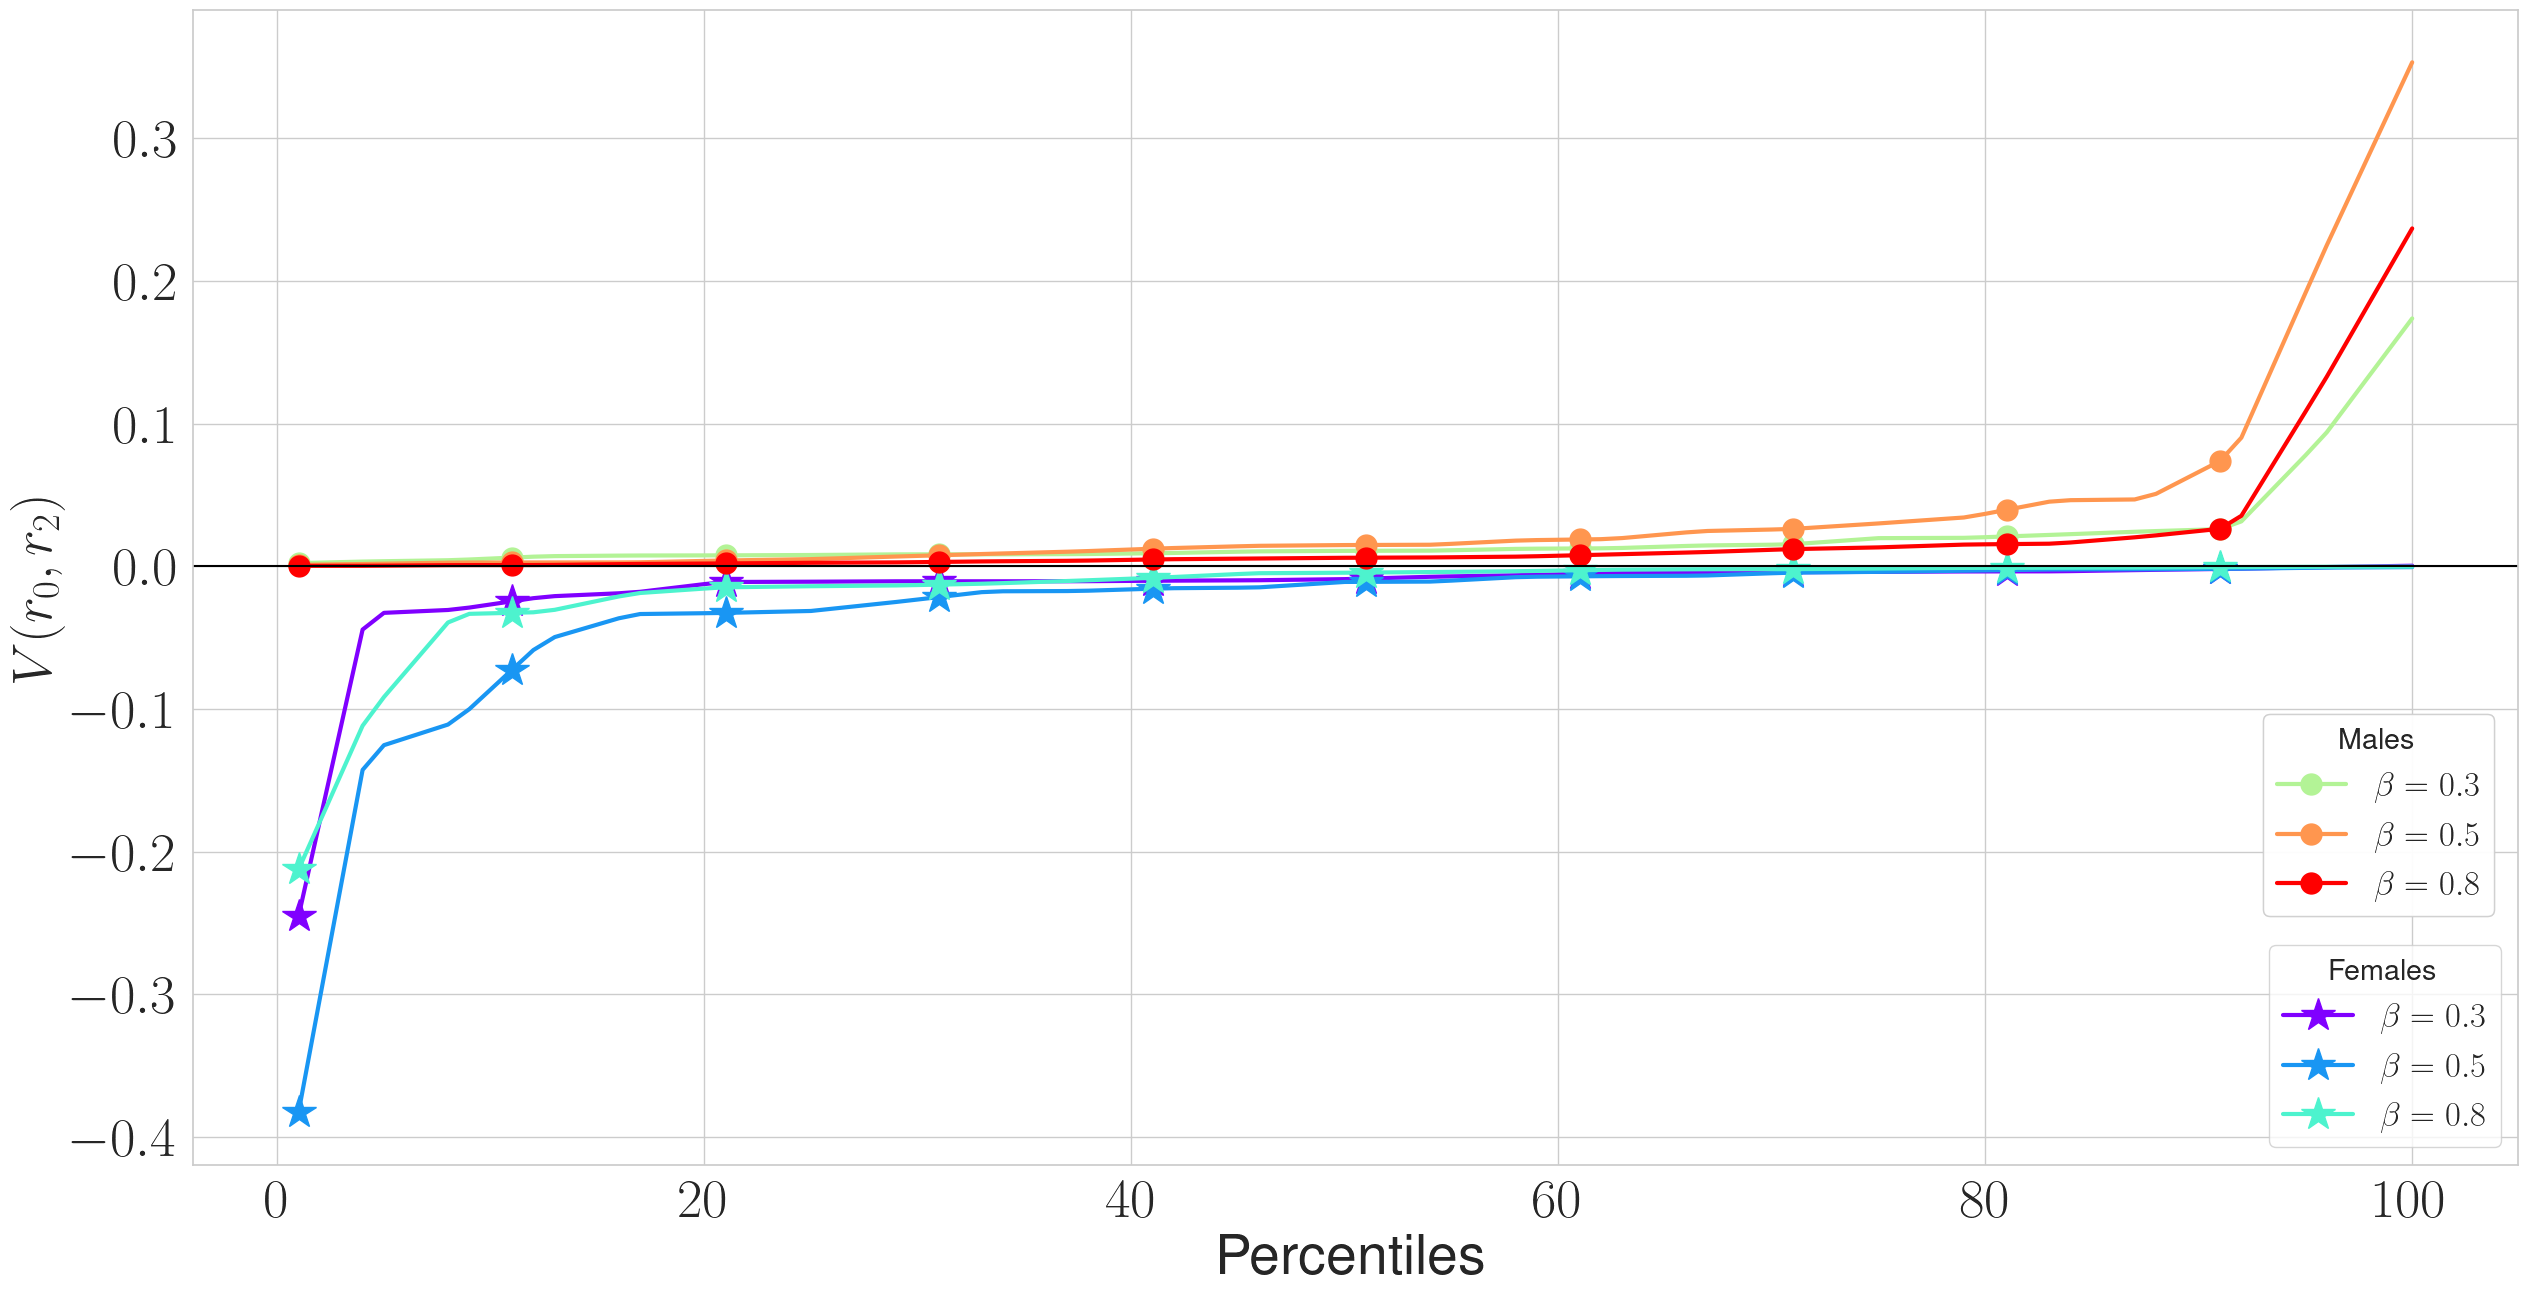

In [21]:
plot_betas_percentiles(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                       V_type, protected_attribute, other_attribute)

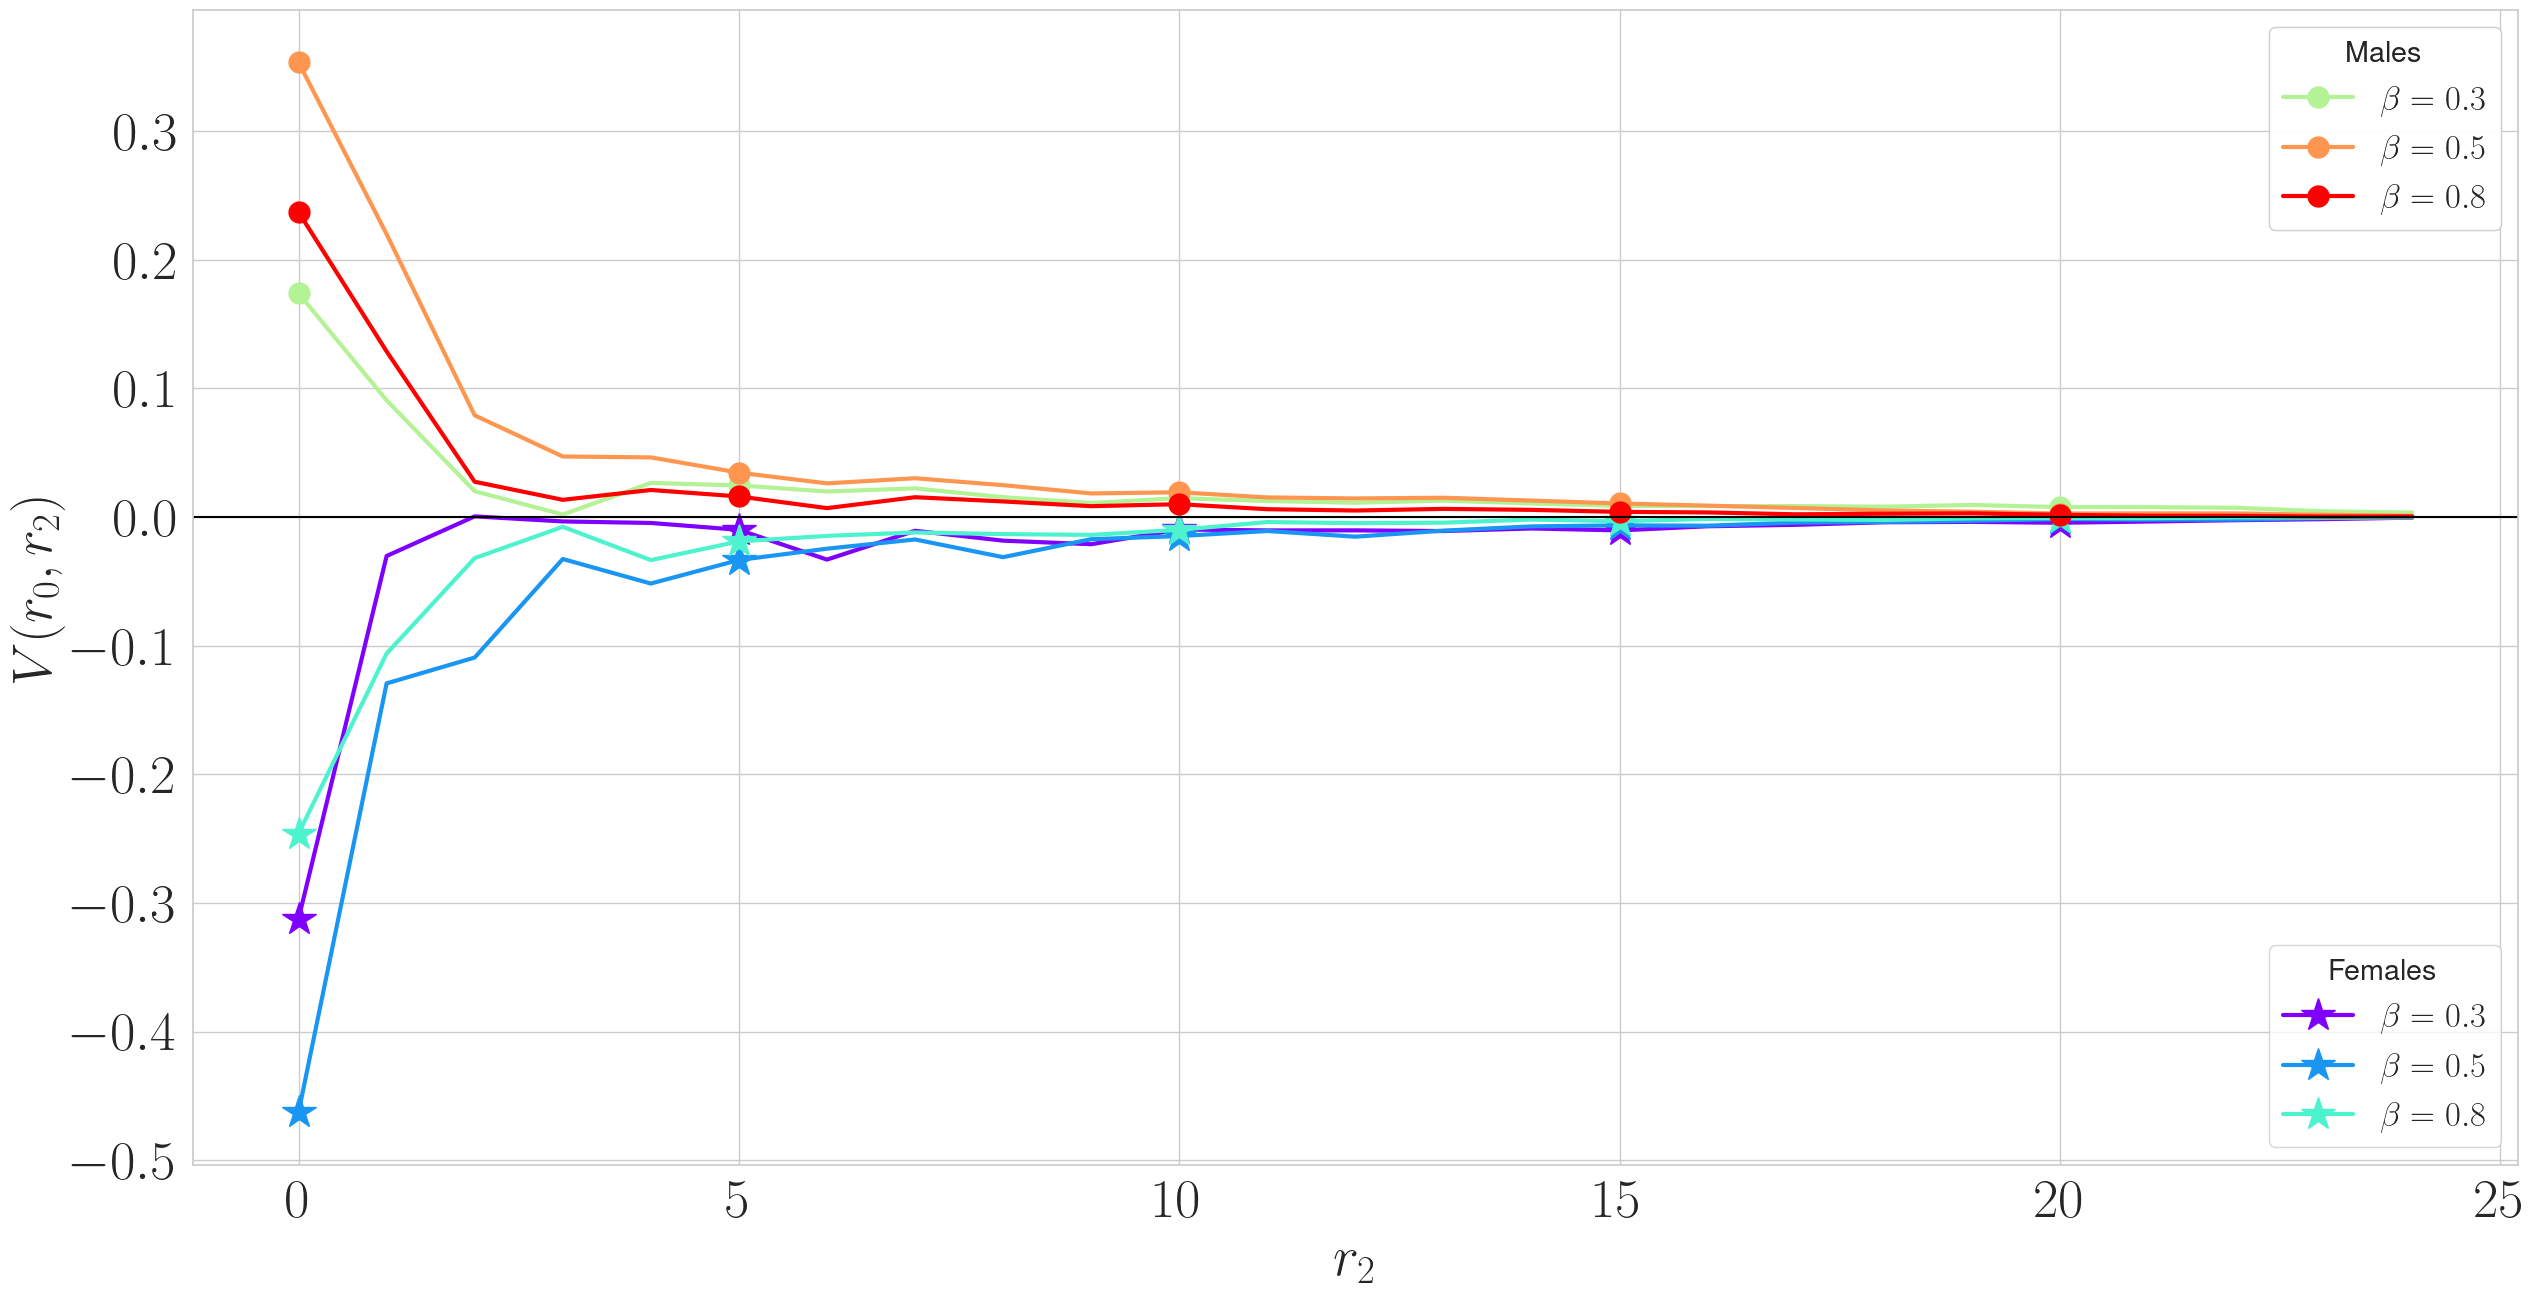

In [22]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute)

## Plot Sum of individual fairness in a ranking for different betas, women and men divided 

In [5]:
n = 10
N = 10000
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
protected_attribute = "F"
other_attribute = 'M'
betas = np.arange(0.1, 1, 0.1)
#betas = np.array([0.3, 0.5, 0.8])
V_type = 'V_disc_norm'

In [6]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|████████████████████████████████████████████| 9/9 [27:38<00:00, 184.25s/it]

0.5


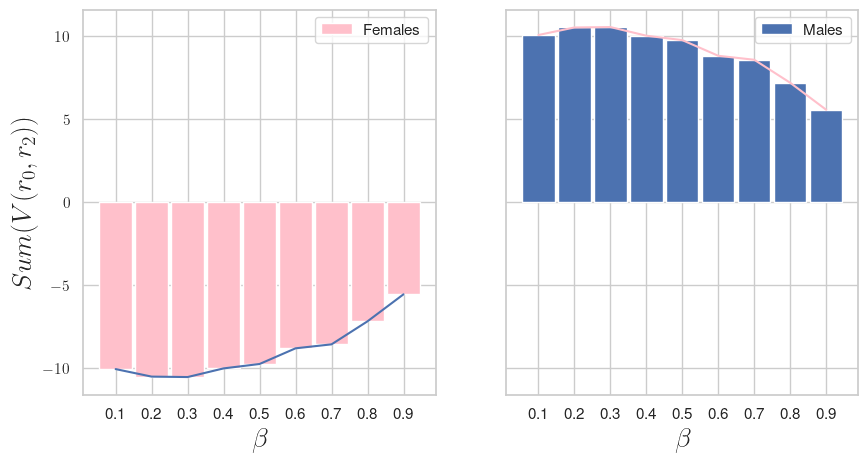

In [7]:
plot_betas_sum(individual_fair_r2r0_f, individual_fair_r2r0_m, proportion_F[0], betas, V_type)

# Difference between the individual unfairness

#### If the difference between the two individual unfairnesses is negative it means that women have not recovered all the bias respect to the original ranking. If it is positve or equal to zero, they have.

In [38]:
np.random.seed(1337)
n = 500
N = 100
#proportion_F = np.arange(0.1, 1.1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
betas = np.array([0.5])
#betas = np.arange(0.1, 1.0, 0.2)
#betas = np.array([0.2, 0.5, 0.8])
V_type = 'V'

100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.49s/it]


Proportion of Women: 0.5


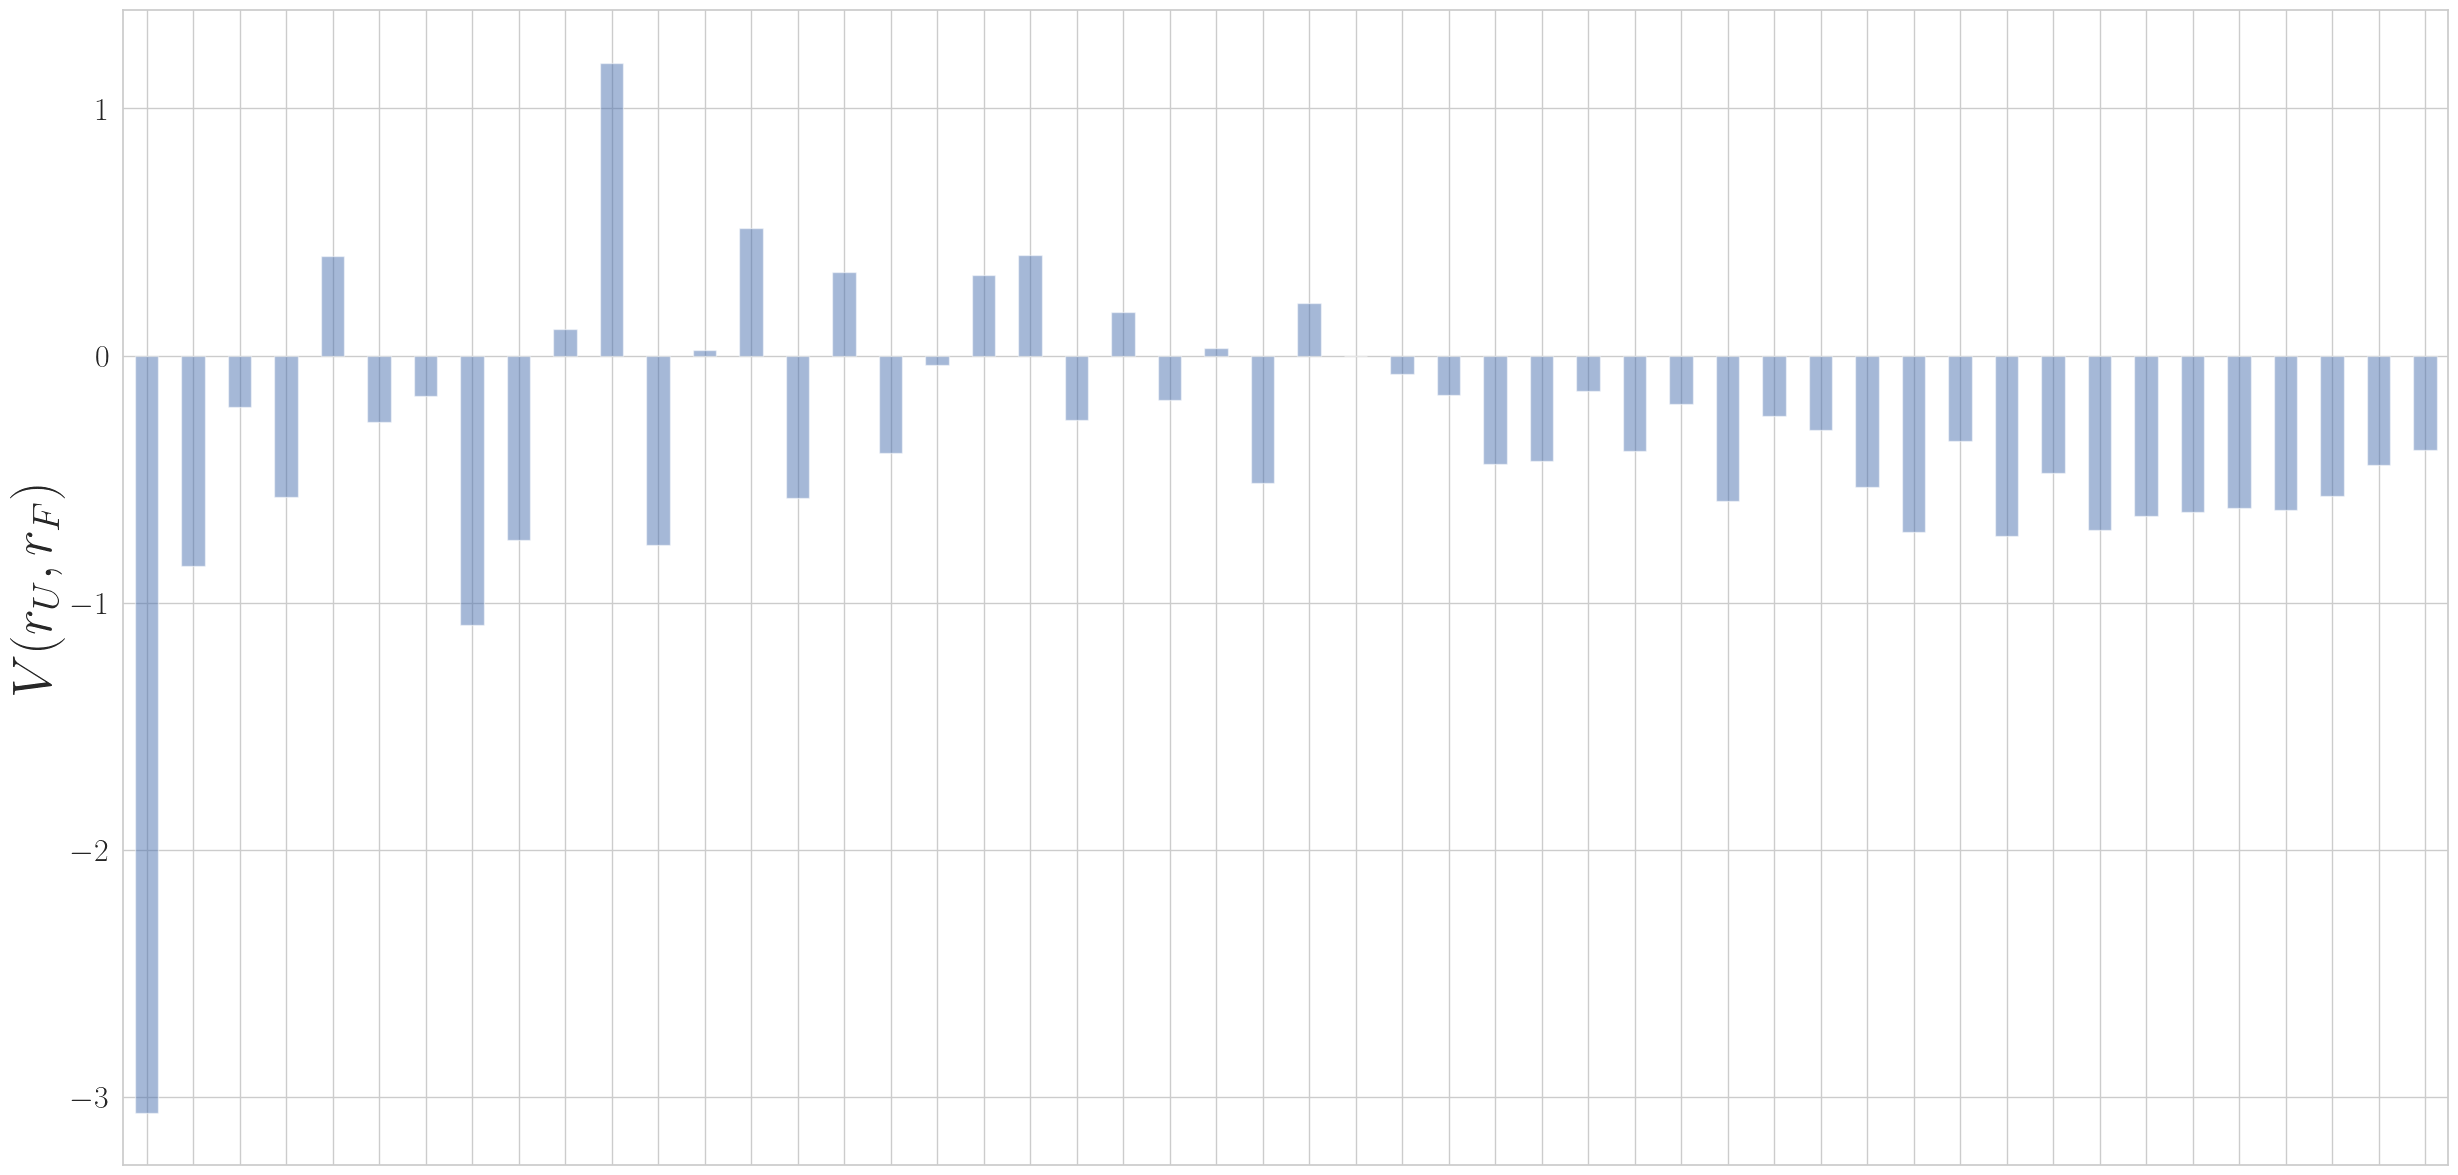

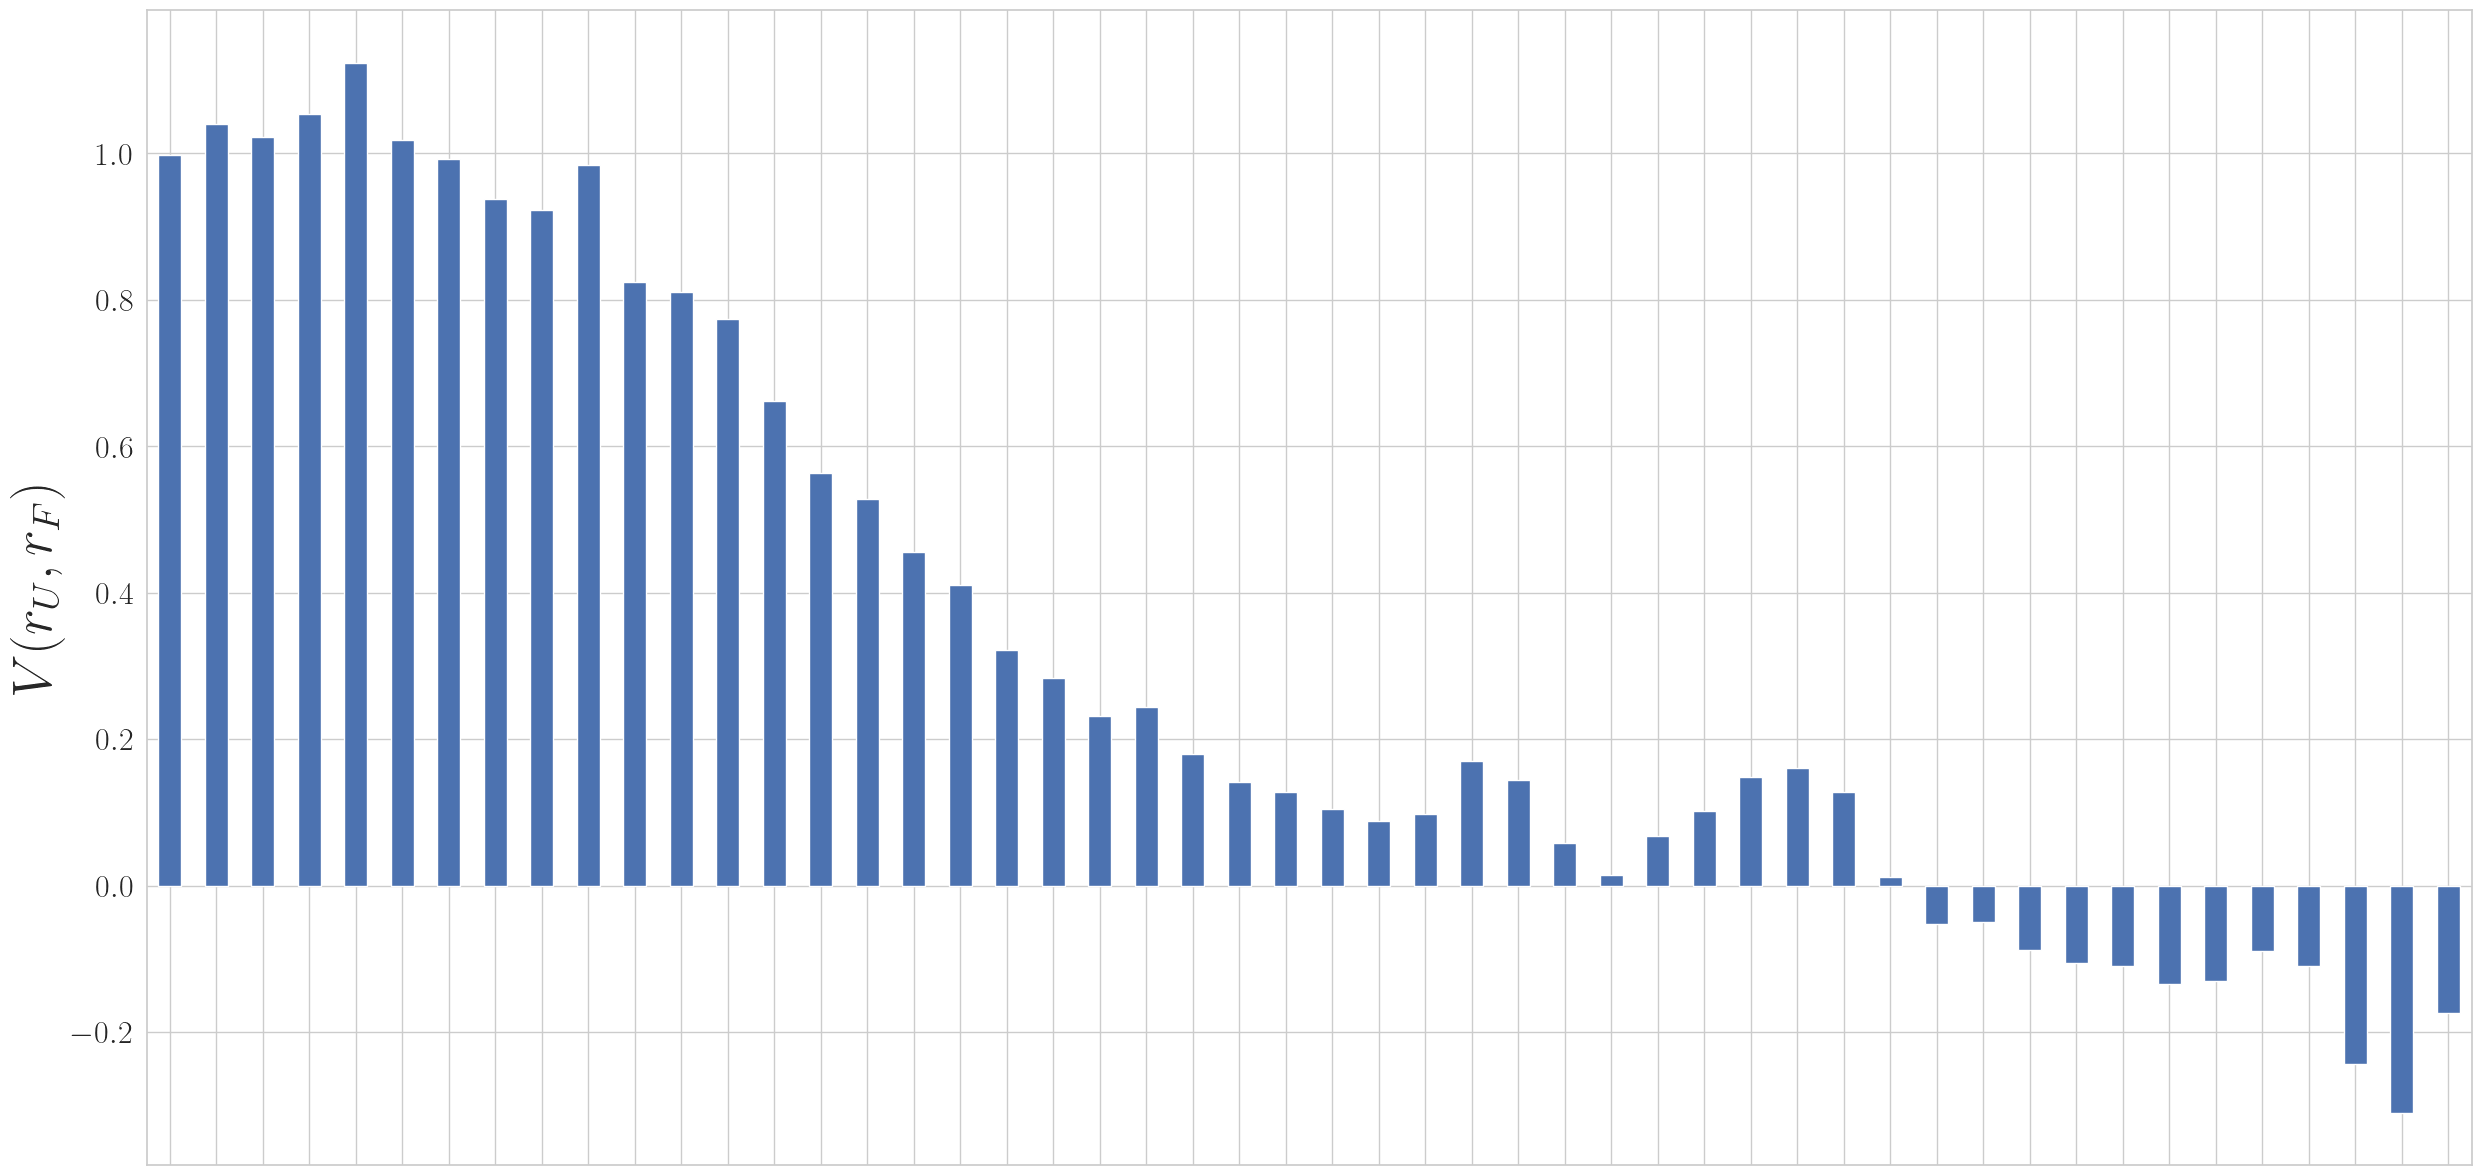

In [39]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, alpha = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                betas = betas, V_type = V_type)

    print('Proportion of Women:', np.around(p_F, 2))
    plot_individual_fairness(v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m, betas, V_type = V_type, save_plot = True)

    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

## Plot individual fairness R0_R2 for different betas

In [2]:
np.random.seed(1337)
n = 500
N = 100
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
protected_attribute = "F"
other_attribute = 'M'
#betas = np.arange(0.1, 1, 0.1)
betas = np.array([0.3, 0.5, 0.8])
V_type = 'V'

In [3]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, alpha = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 3/3 [00:22<00:00,  7.39s/it]

0.5


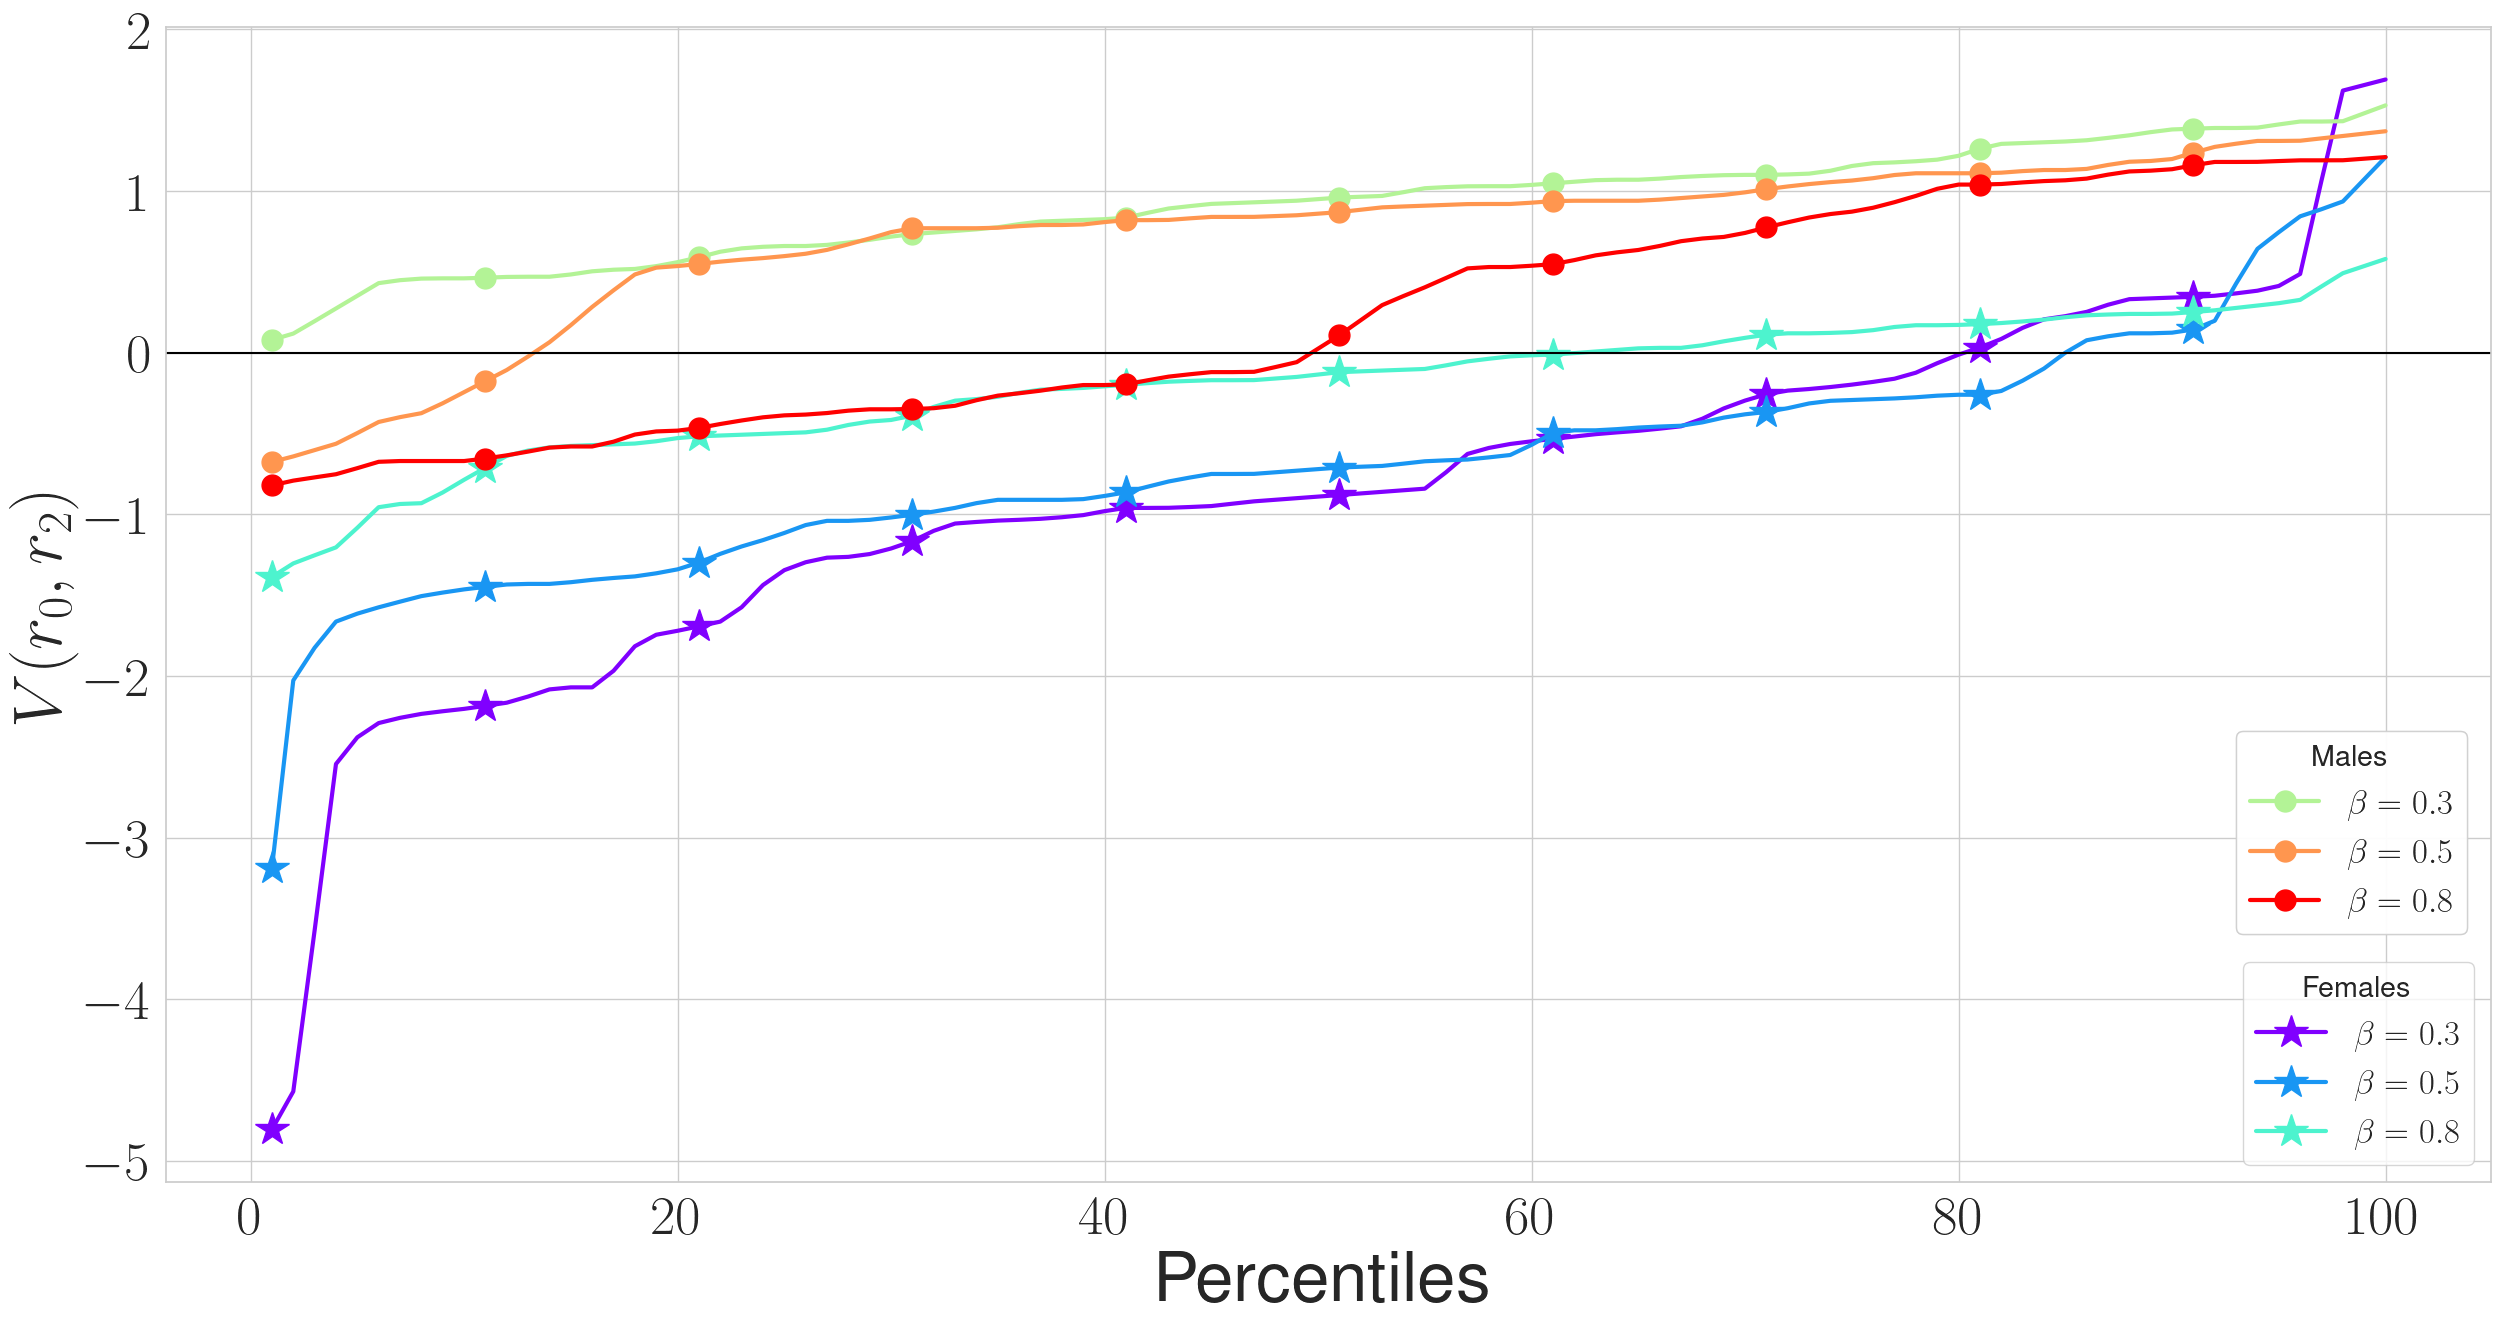

In [17]:
plot_betas_percentiles(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                       V_type, protected_attribute, other_attribute)

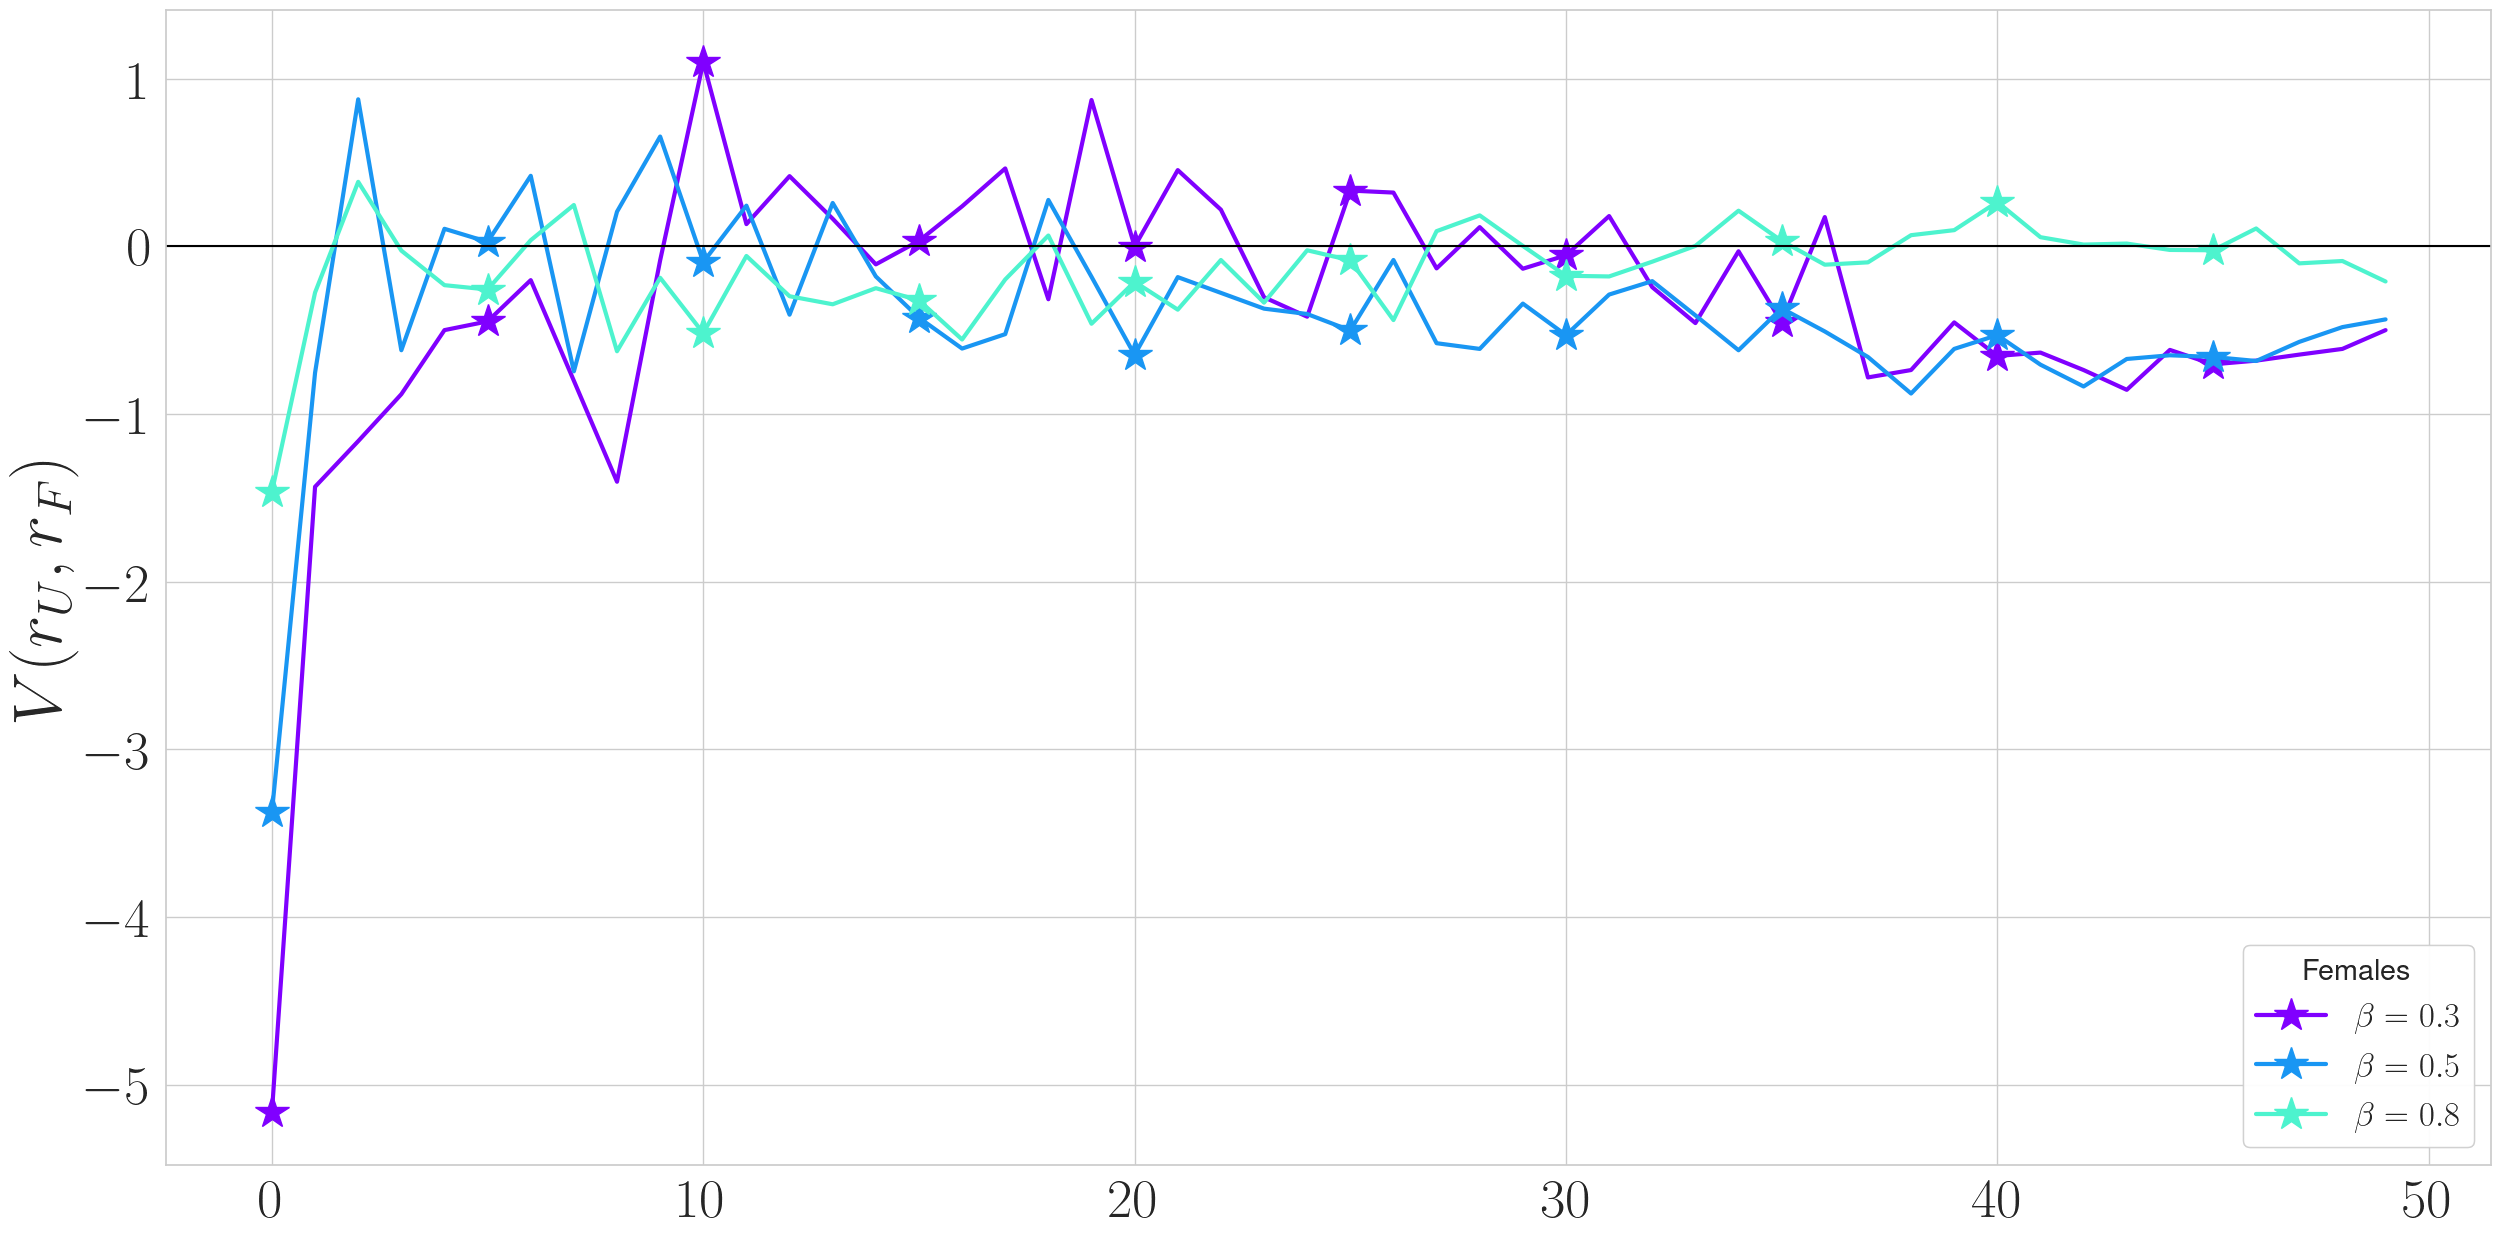

In [4]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute, a_show = "protected", save_plot = True)

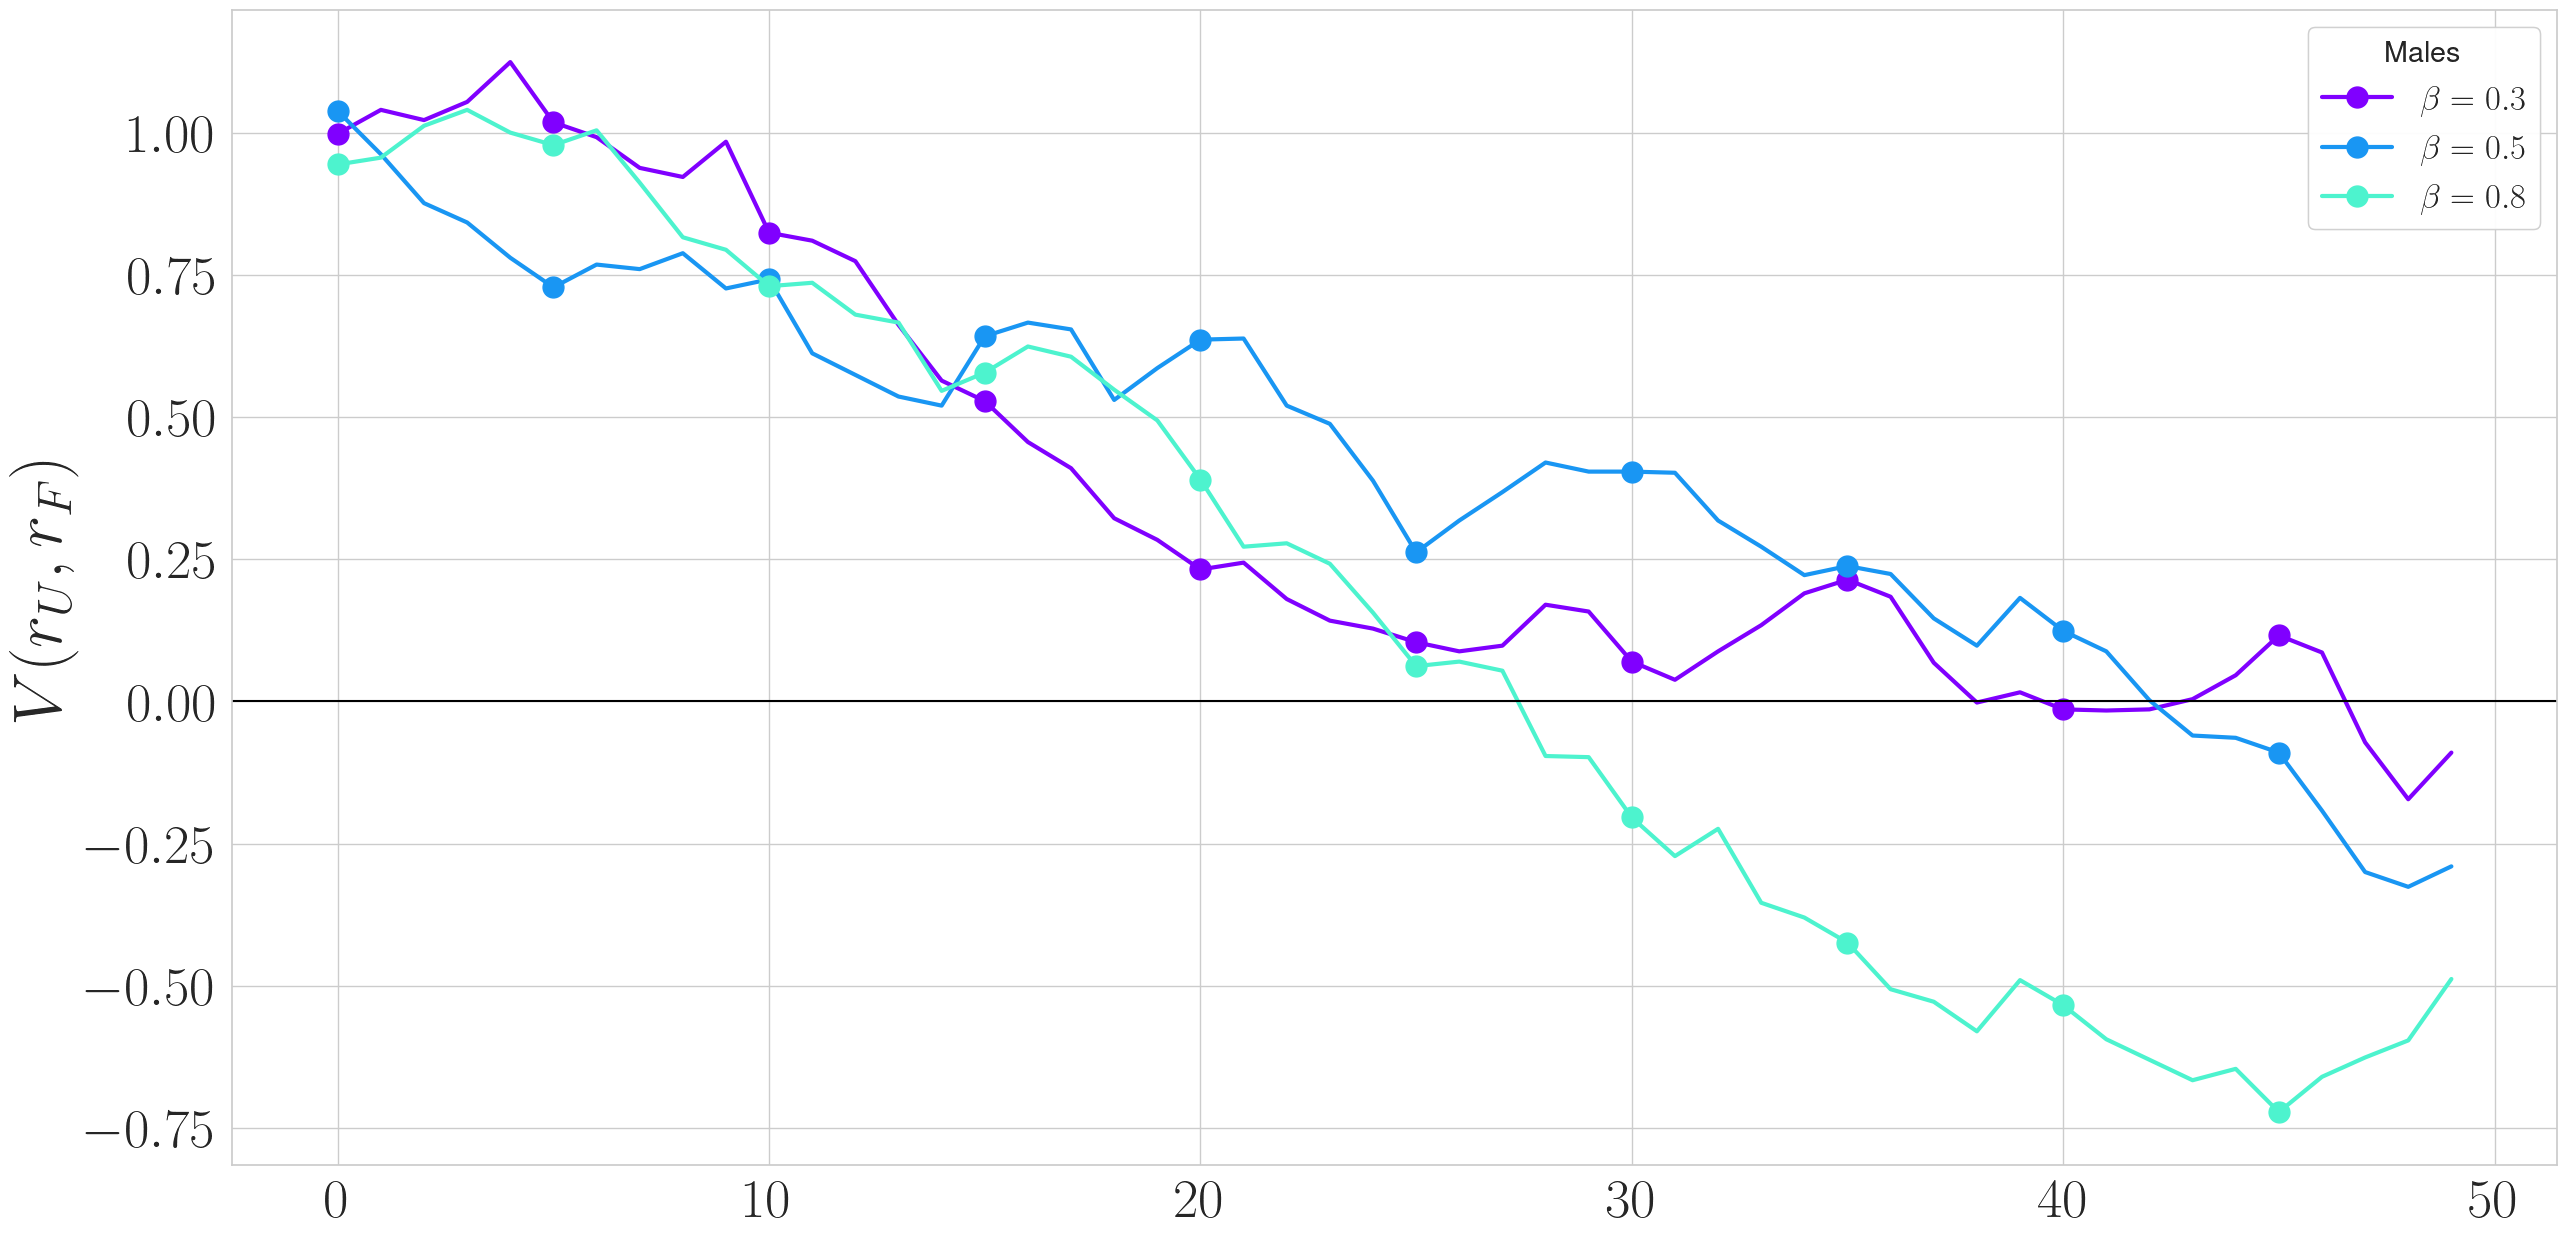

In [5]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute, a_show = "other", save_plot = True)

## Plot Sum of individual fairness in a ranking for different betas, women and men divided 

In [47]:
np.random.seed(1337)
n = 500
N = 100
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
protected_attribute = "F"
other_attribute = 'M'
betas = np.arange(0.1, 1, 0.1)
#betas = np.array([0.3, 0.5, 0.8])
V_type = 'V'

In [48]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, alpha = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 9/9 [01:07<00:00,  7.47s/it]

0.5


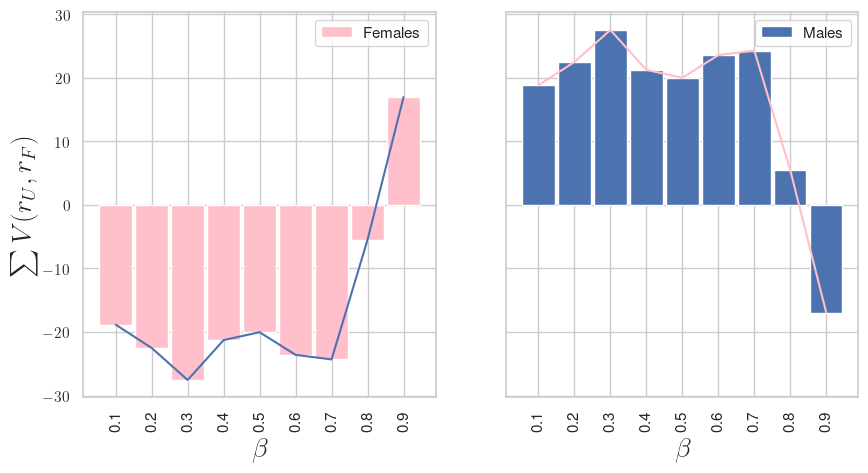

In [49]:
plot_betas_sum(individual_fair_r2r0_f, individual_fair_r2r0_m, proportion_F[0], betas, V_type, save_plot = "True")

# Difference between the individual unfairness (Normalized)

In [6]:
n = 10
N = 100
proportion_F = np.arange(0.1, 1.1, 0.2)
#proportion_F = np.array([0.1])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
betas = np.arange(0.1, 1.0, 0.2)
#betas = np.array([0.2, 0.5, 0.8])
V_type = 'V_norm'

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.68it/s]


Proportion of Women: 0.1


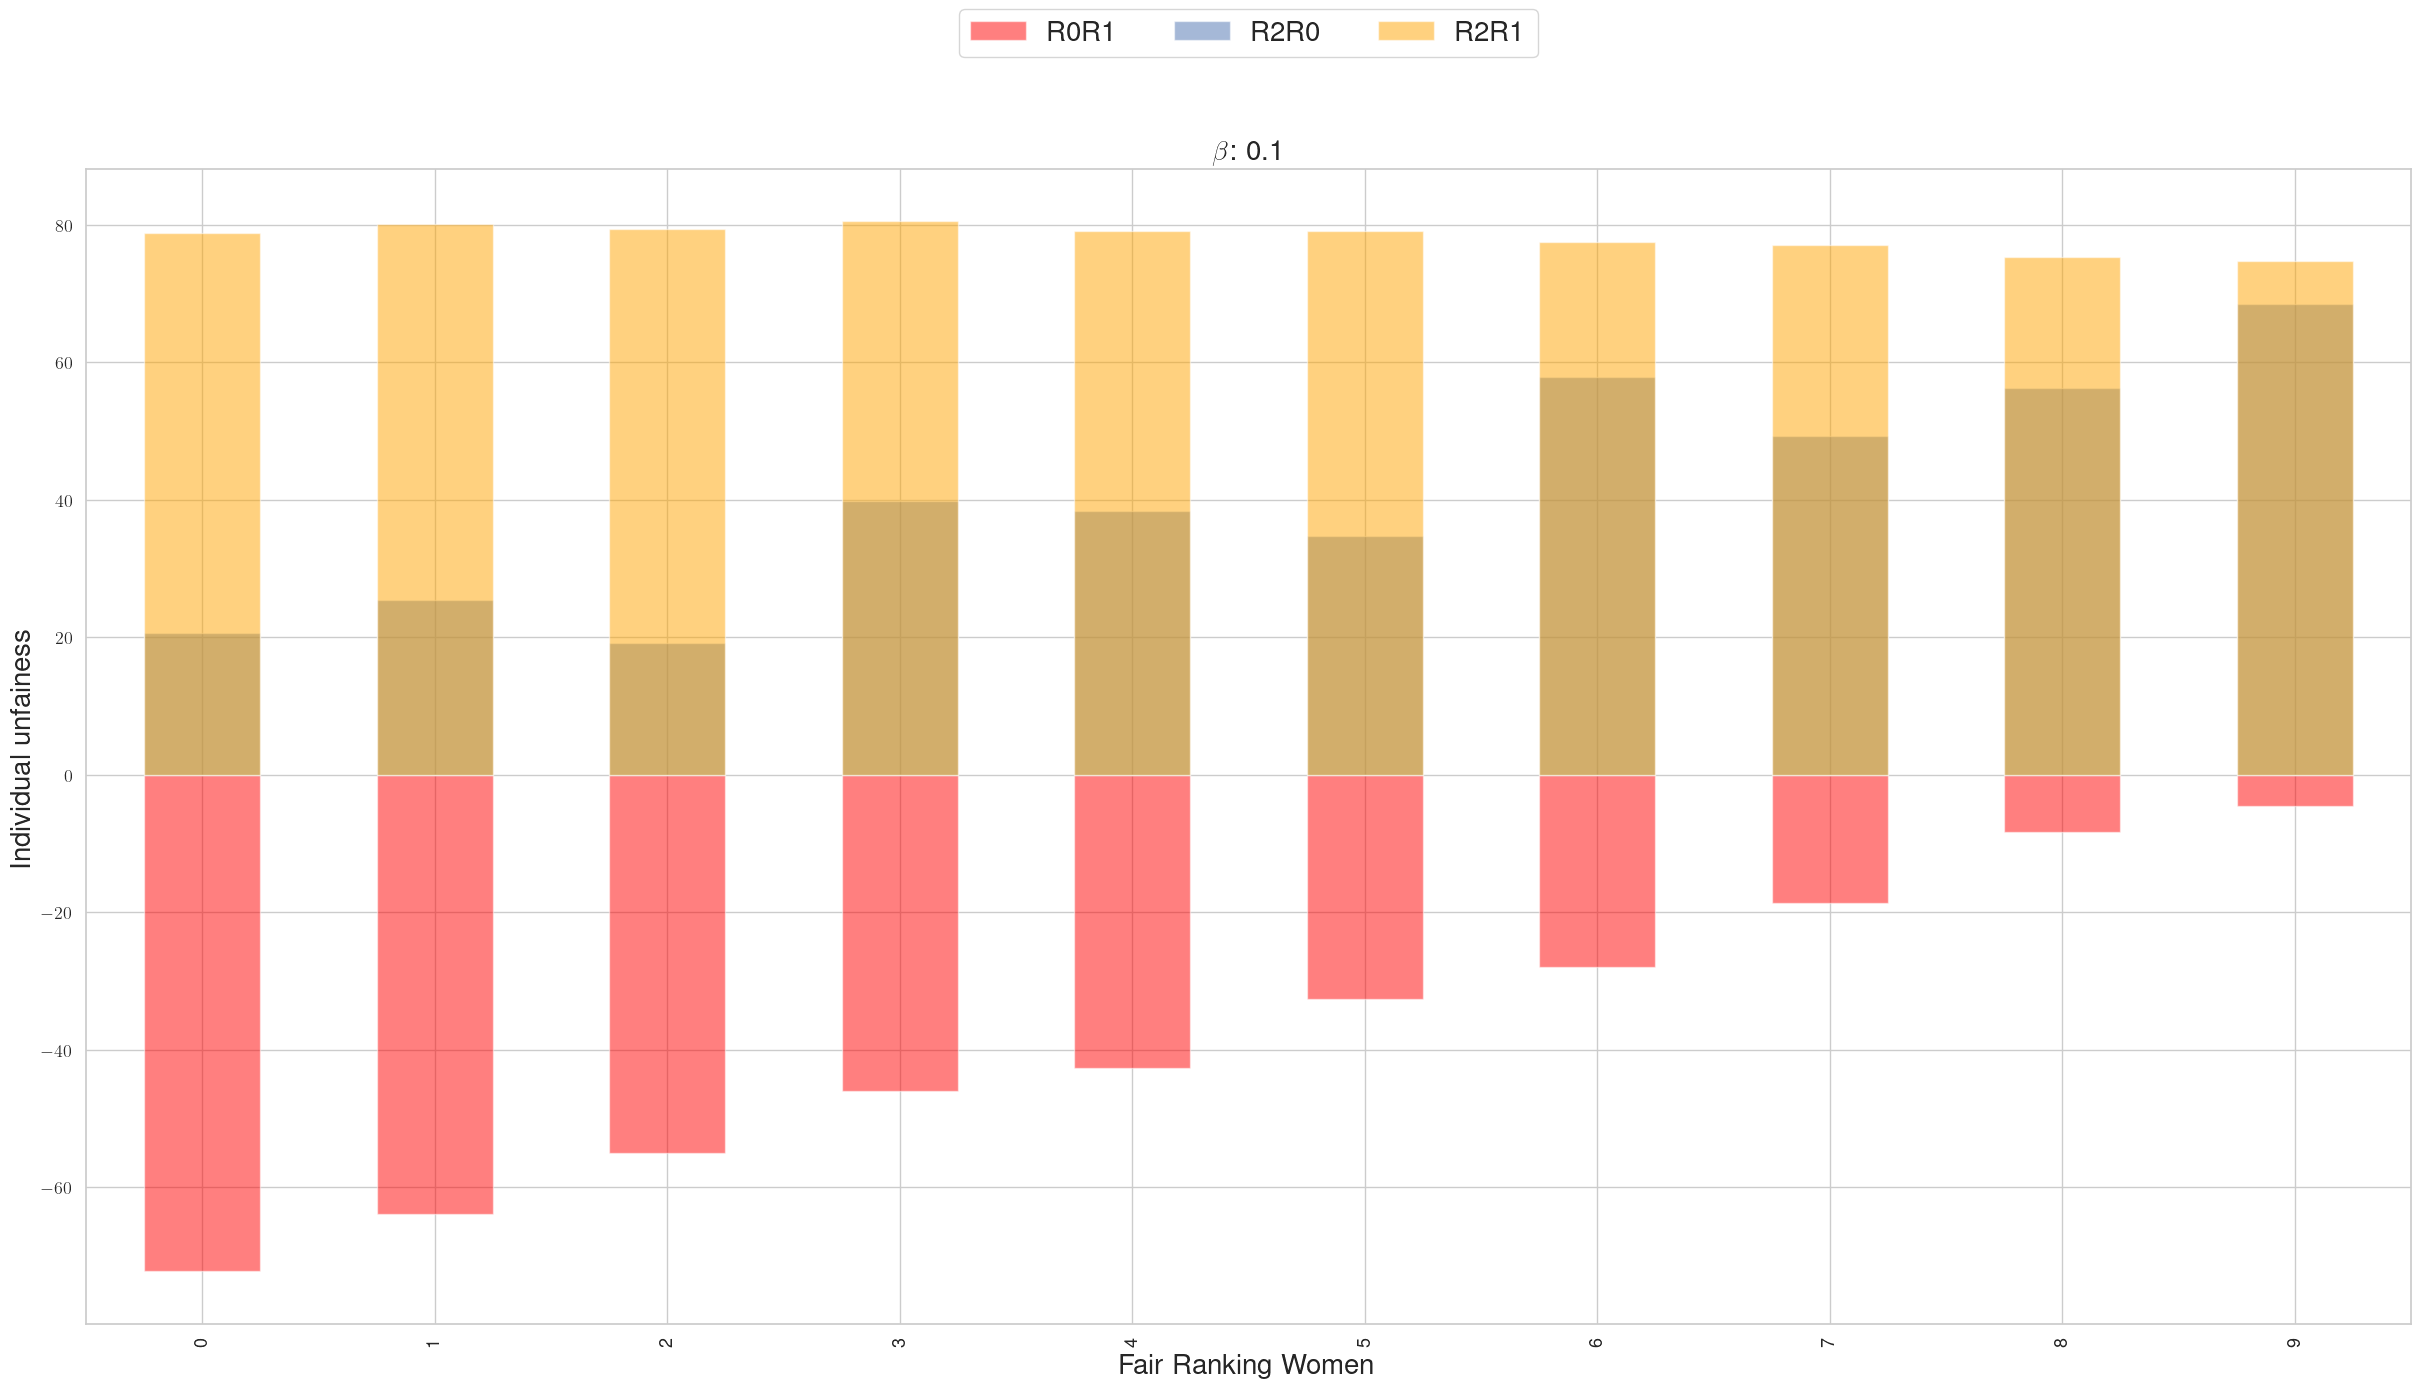

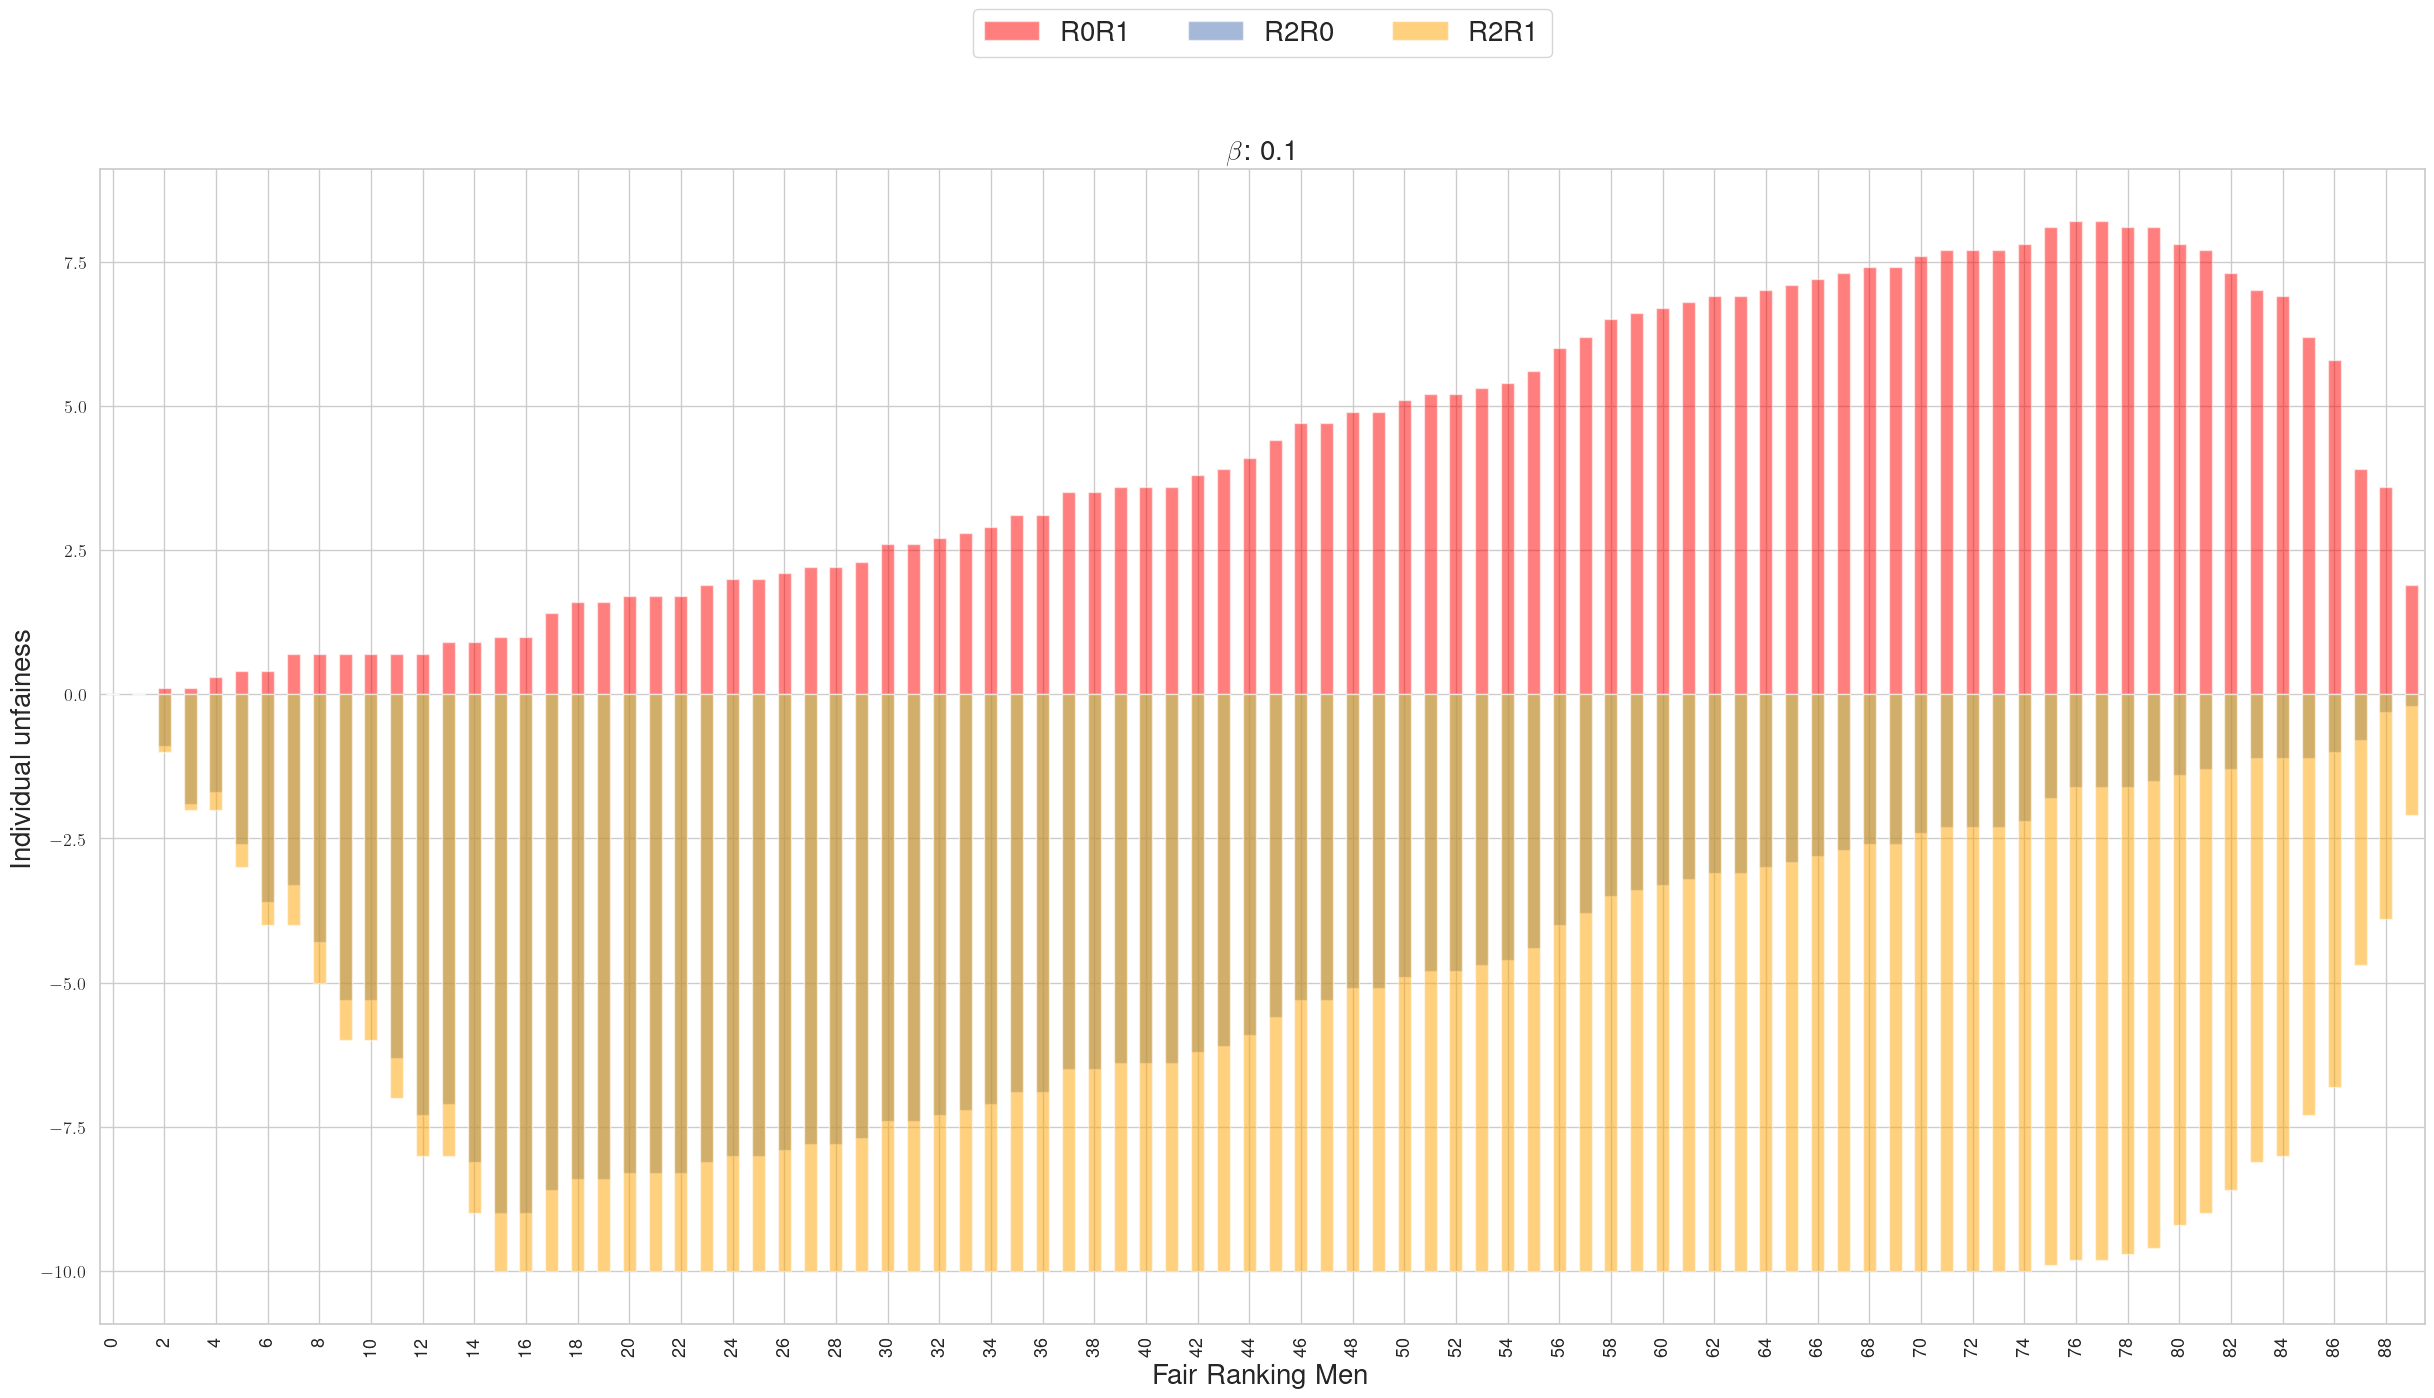

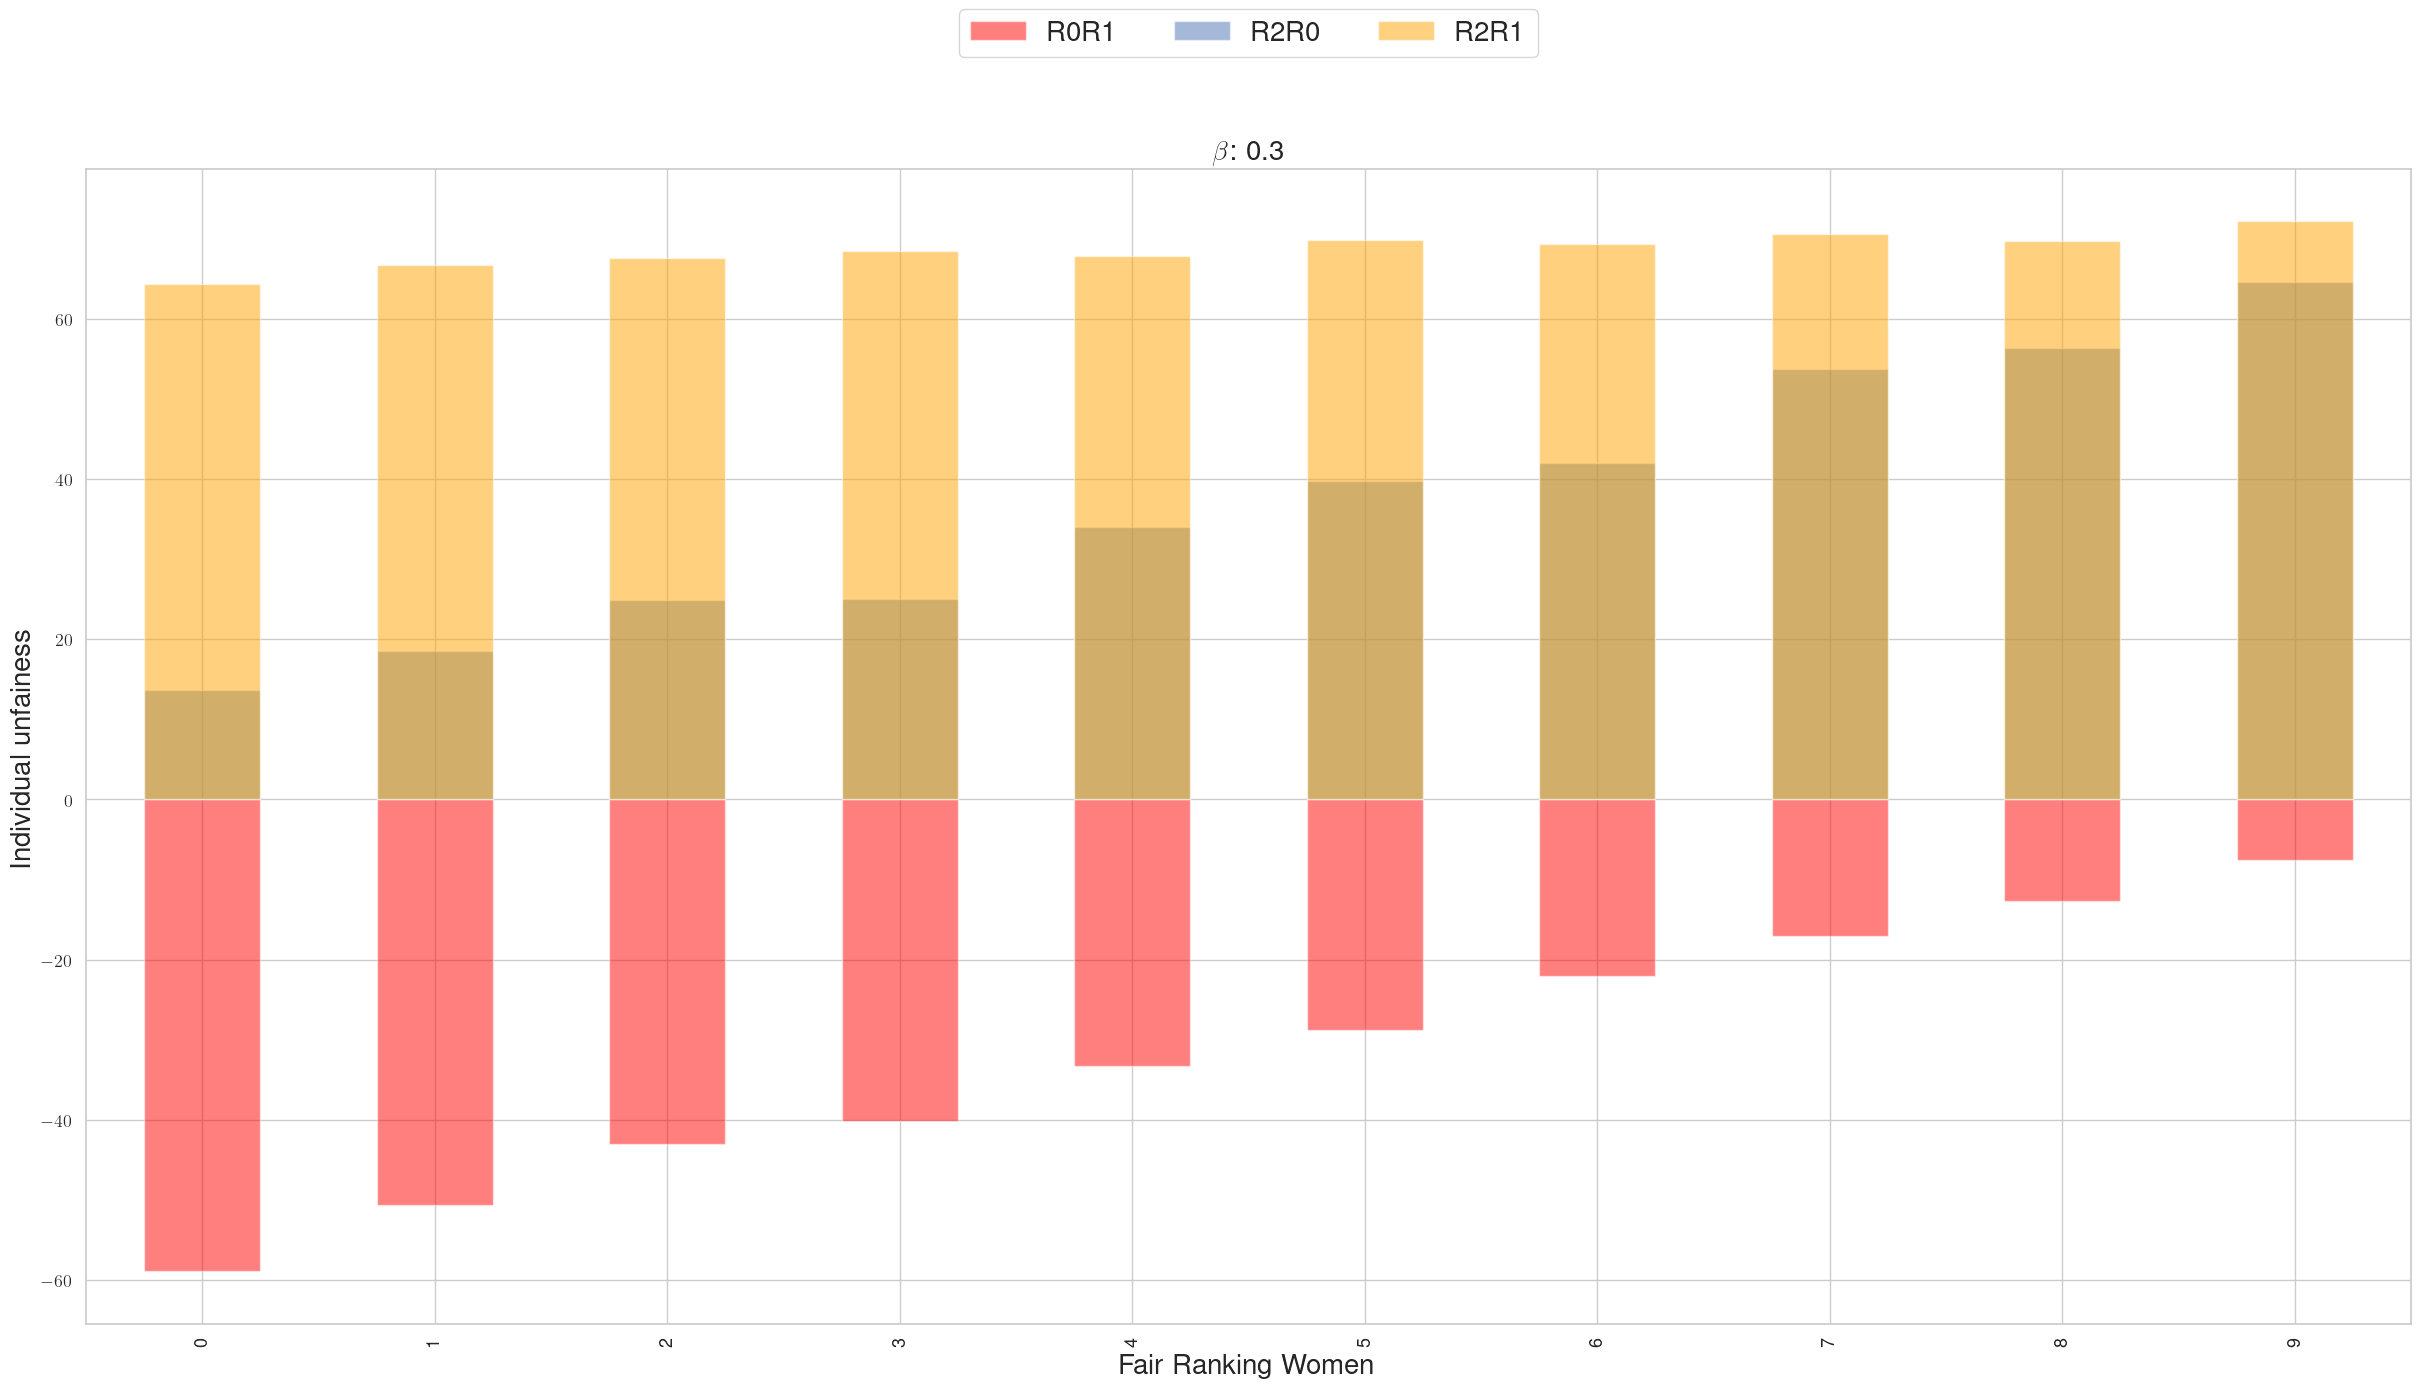

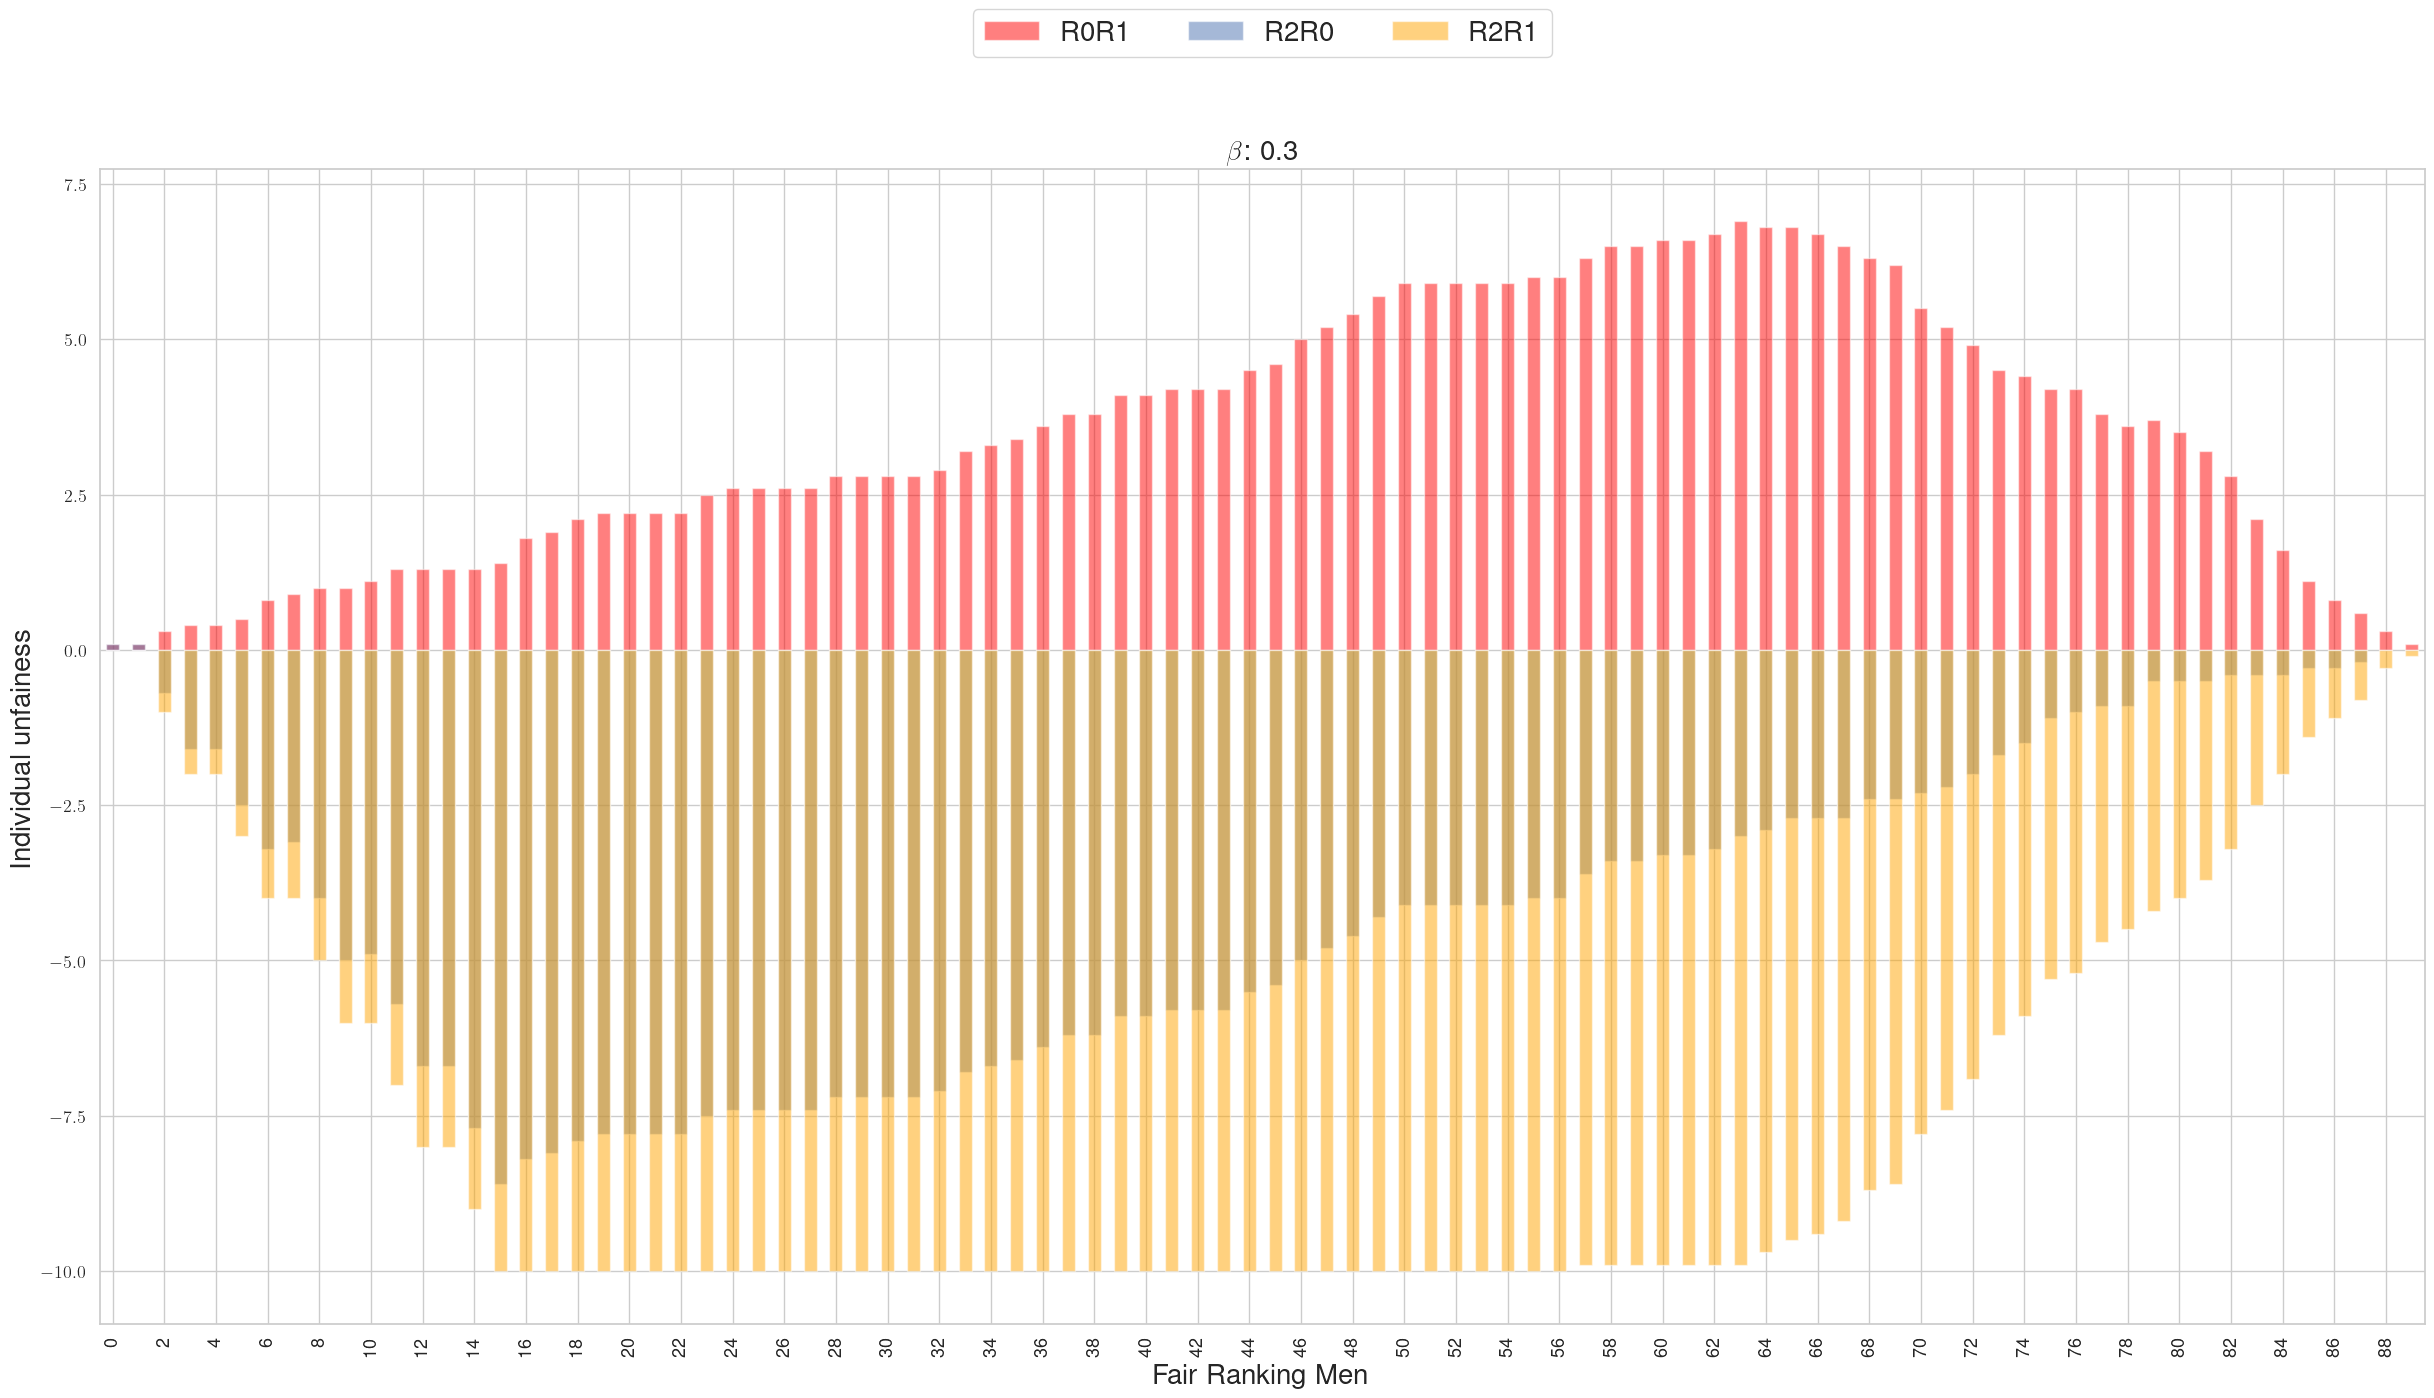

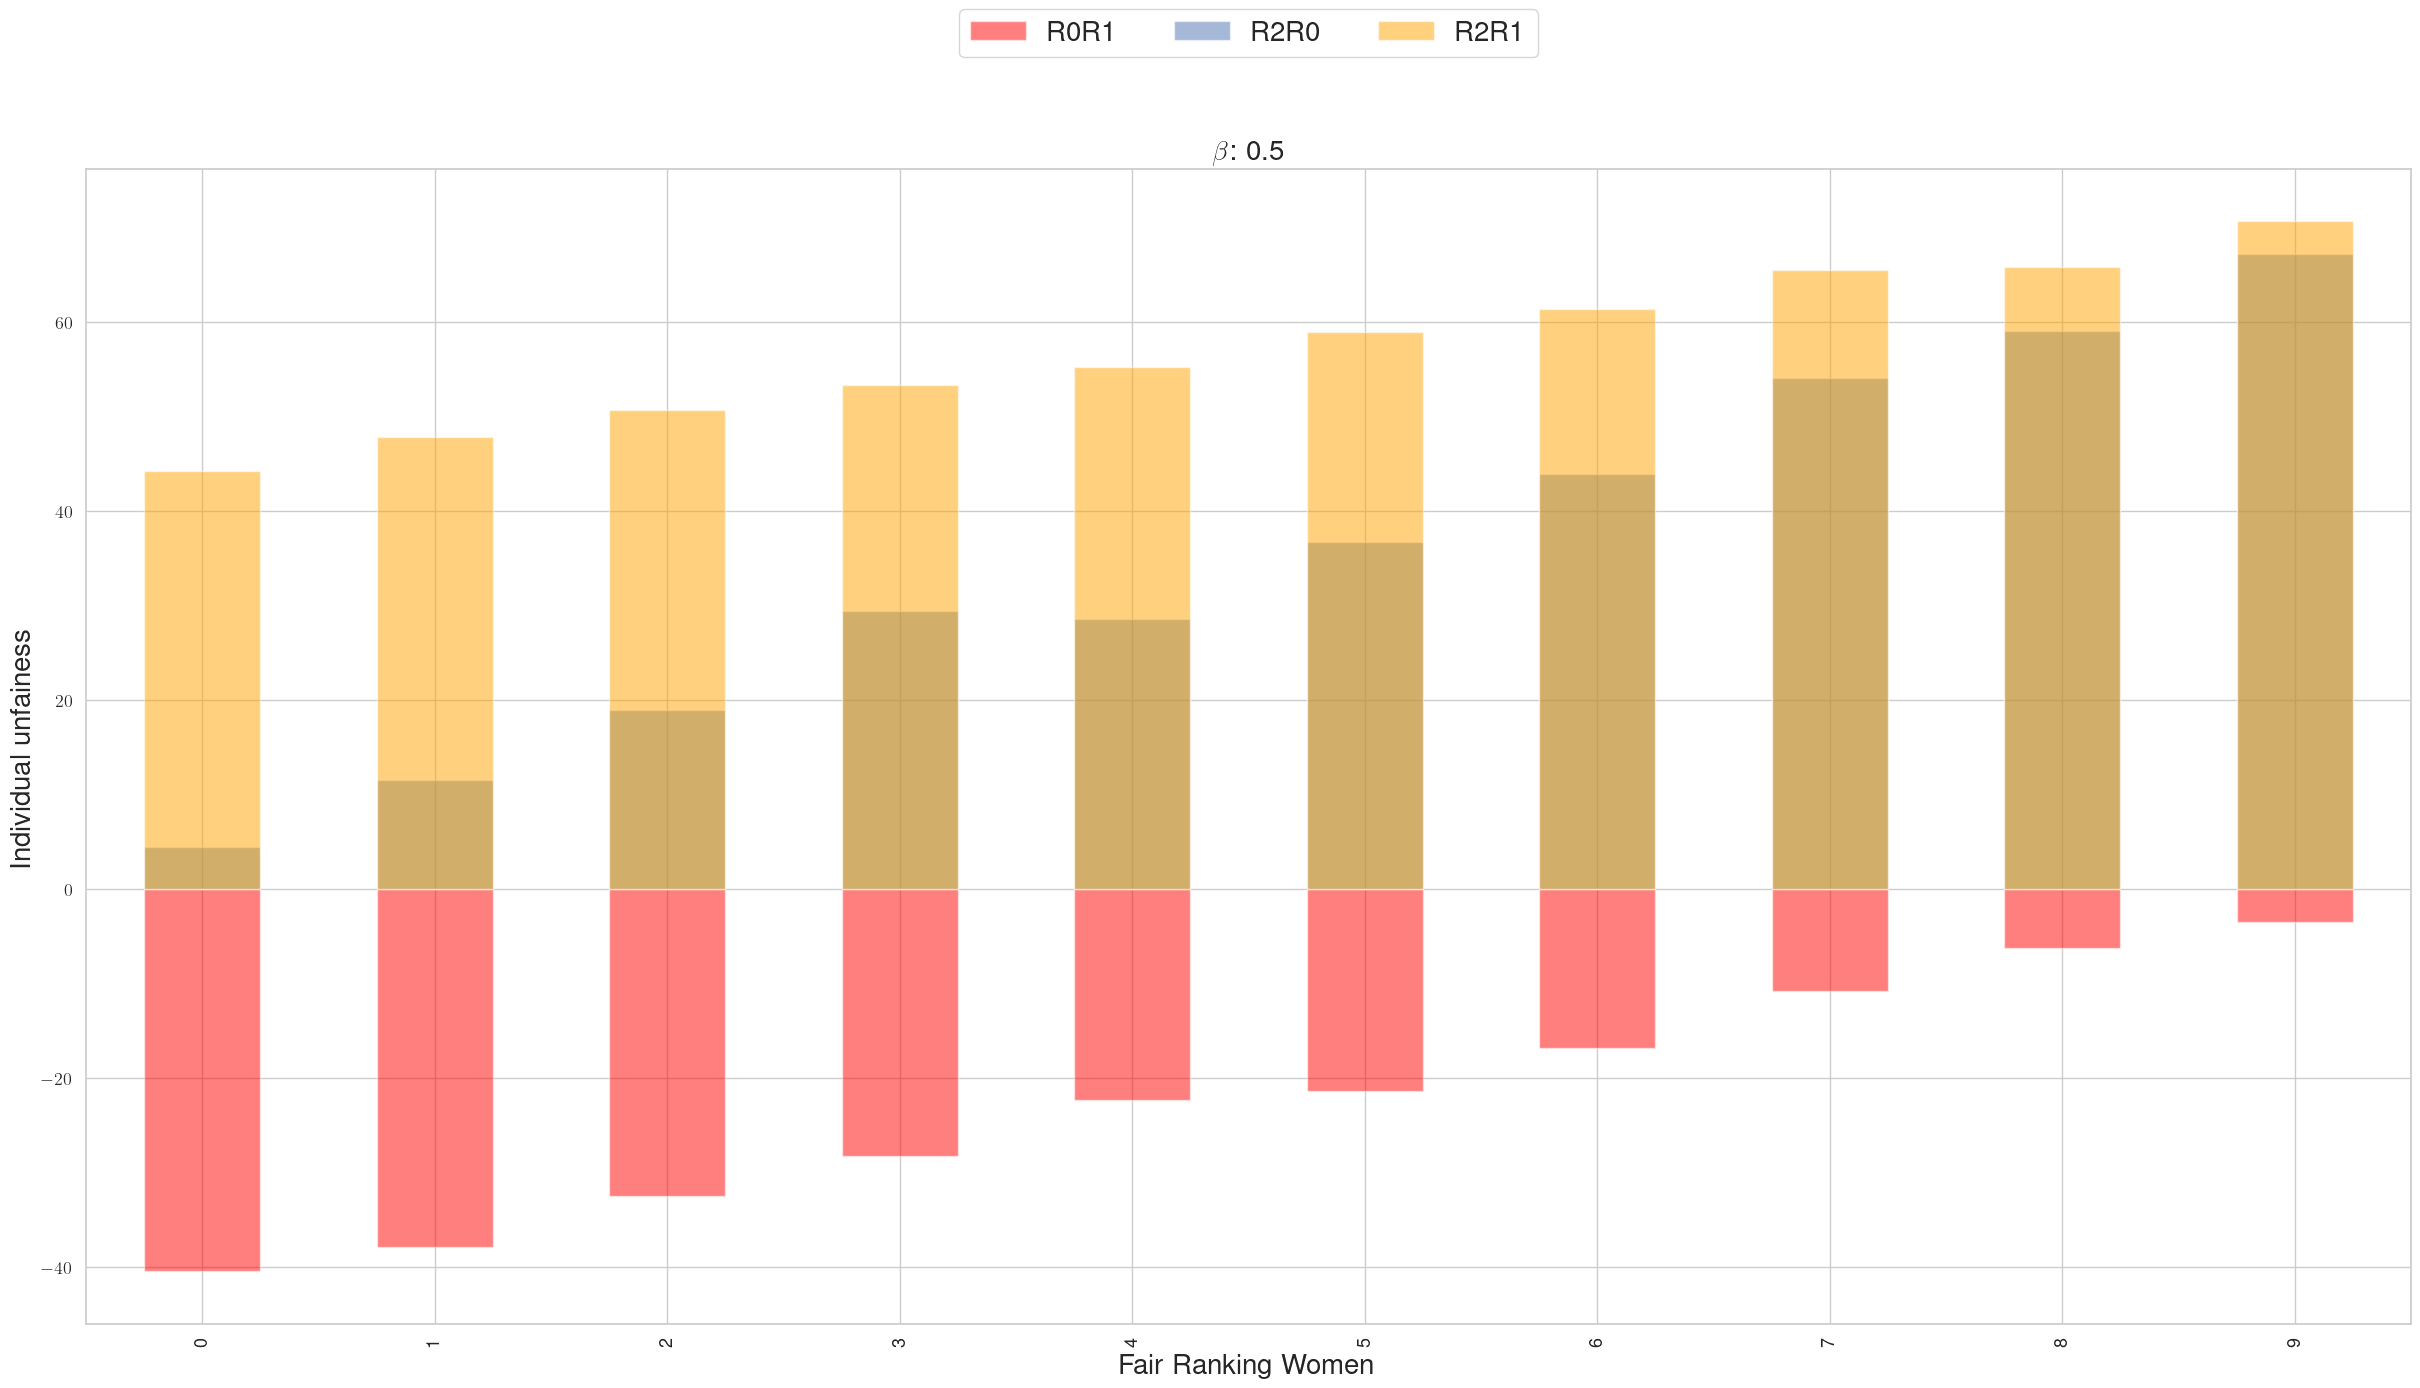

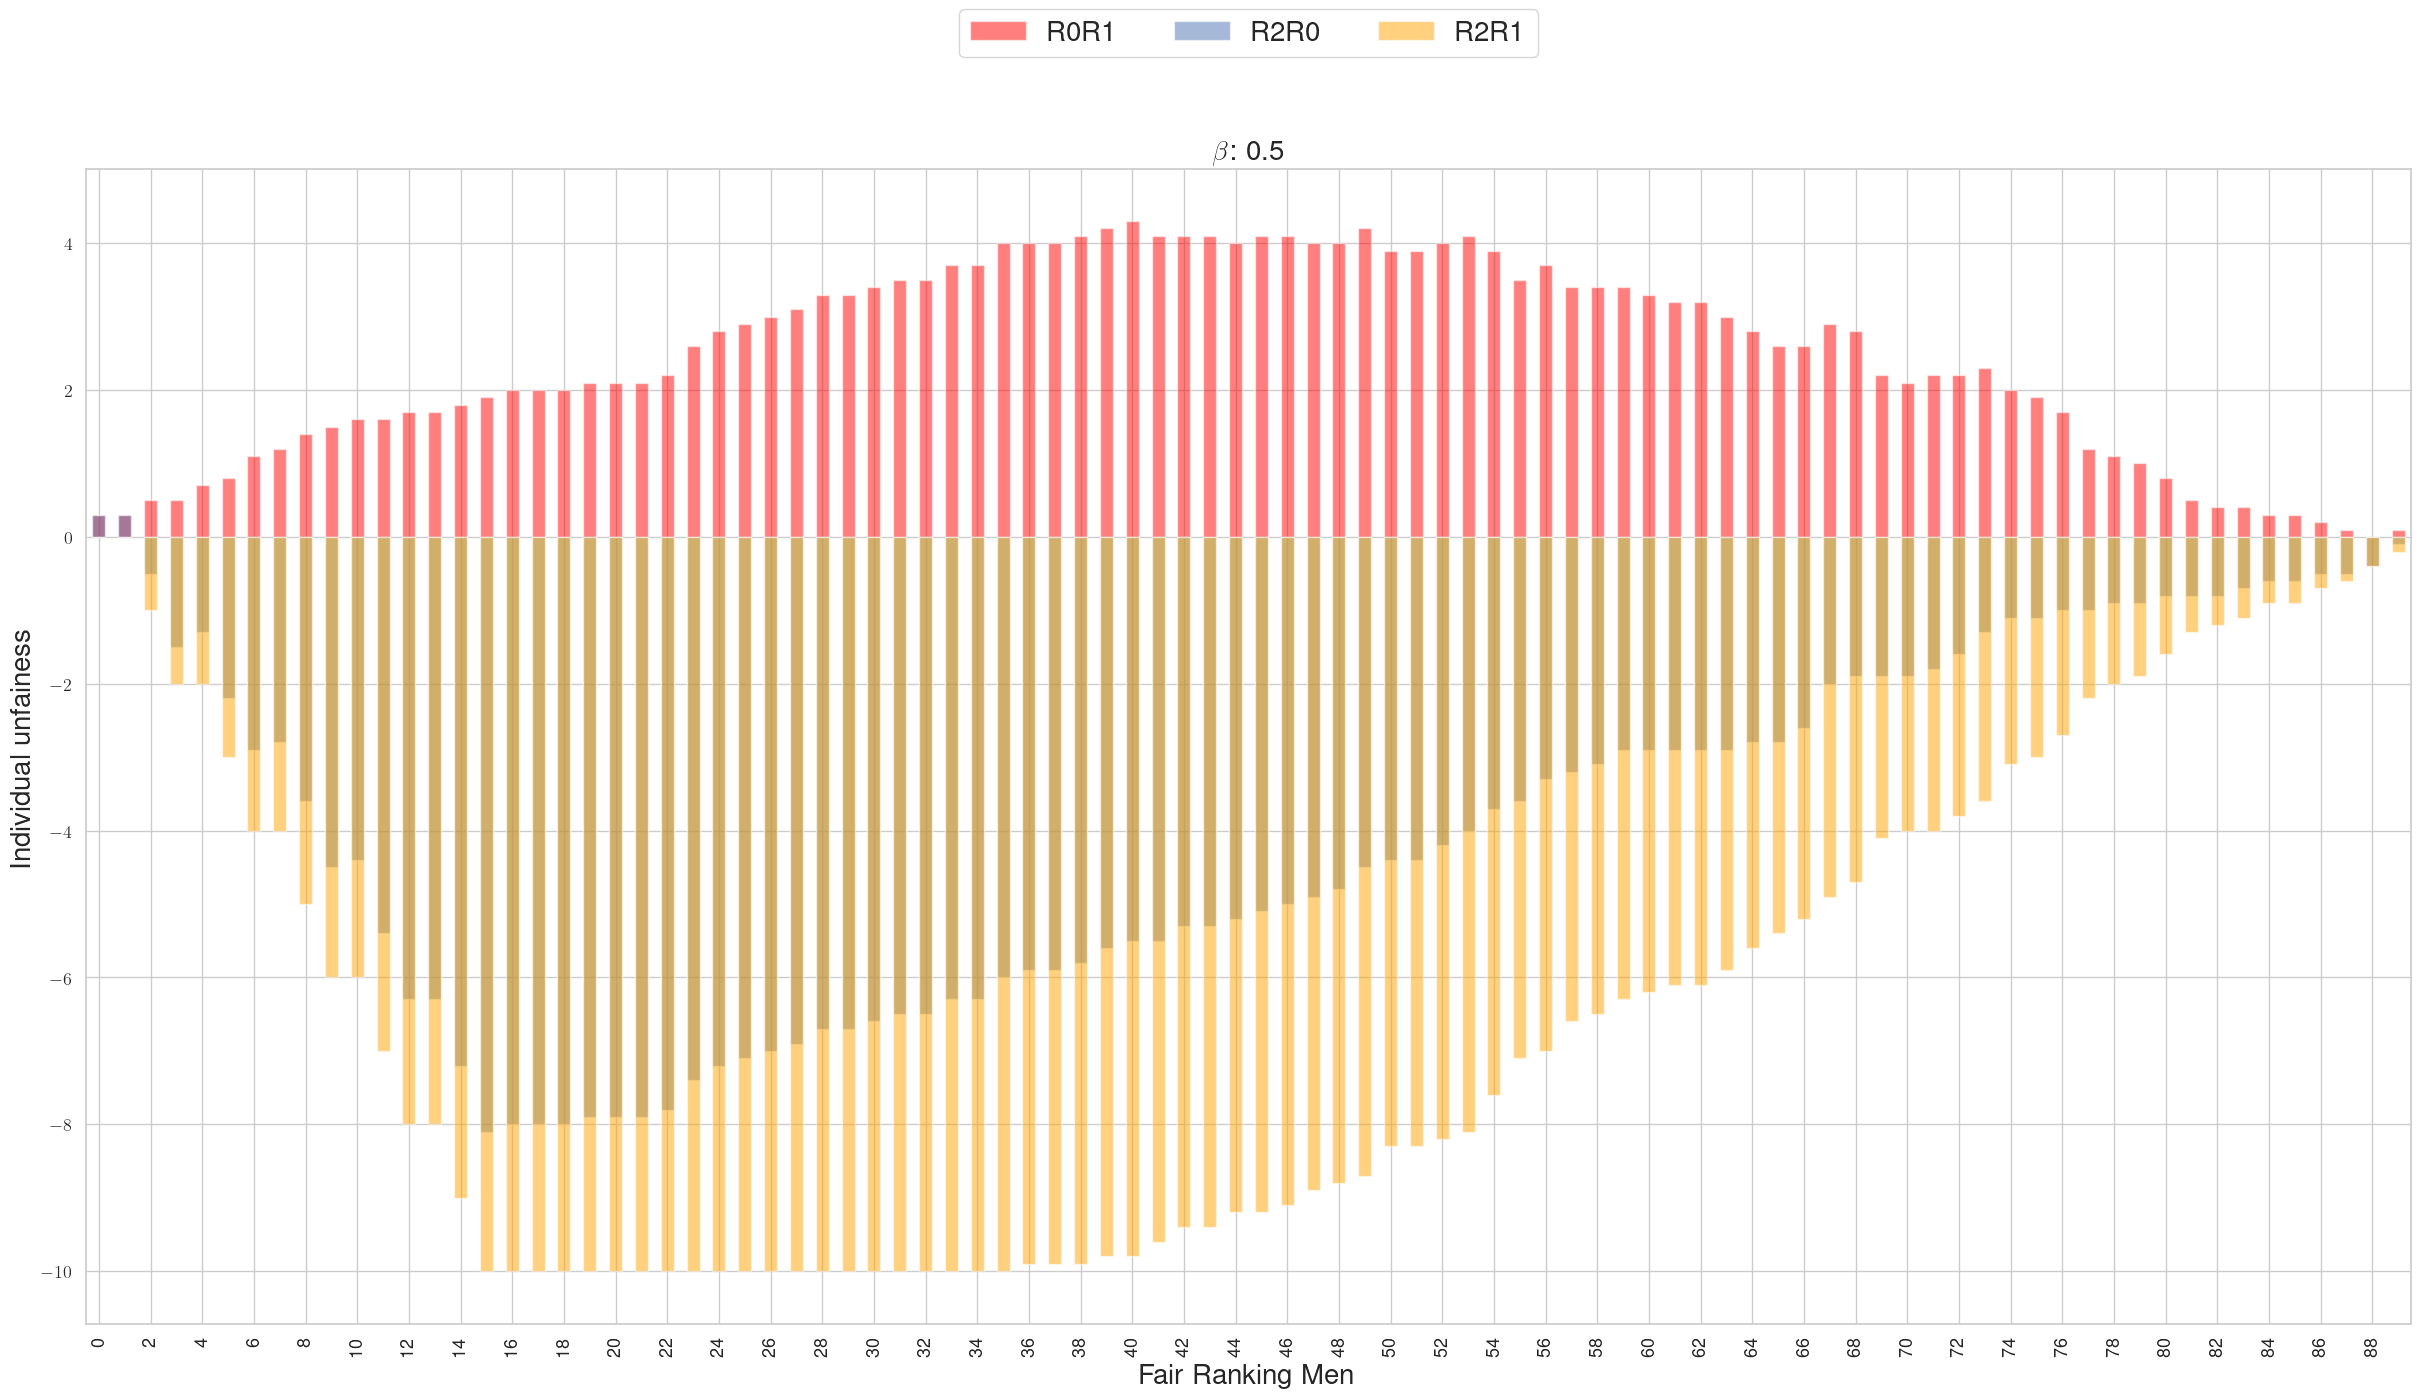

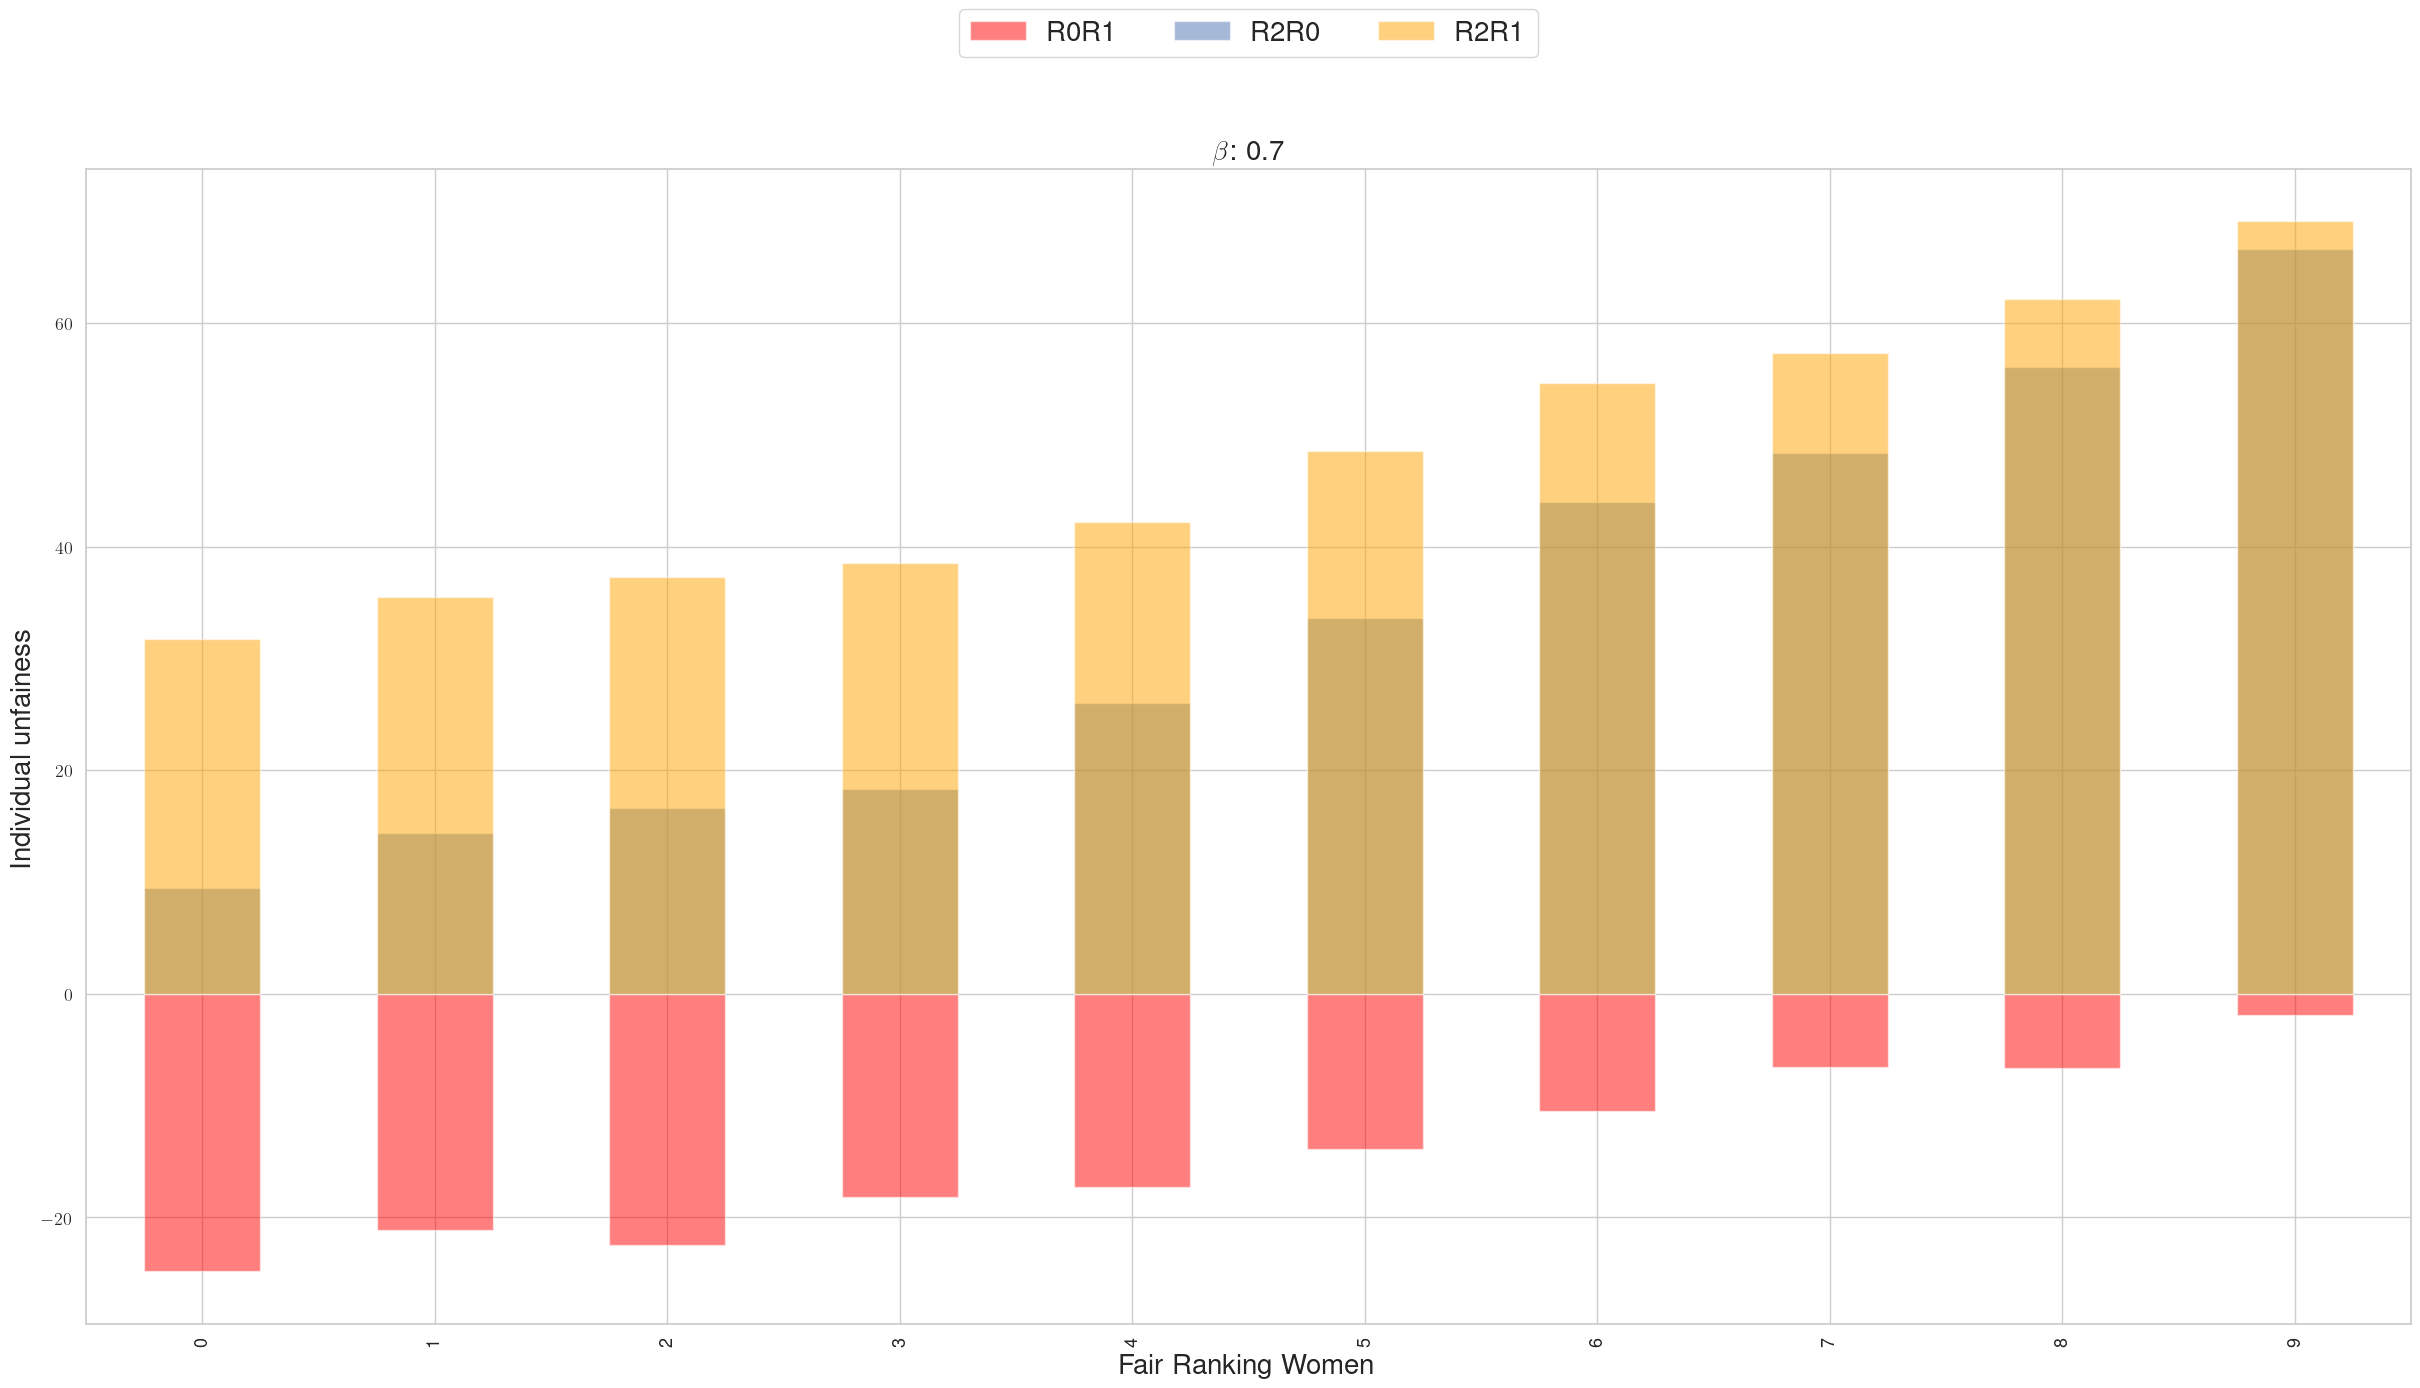

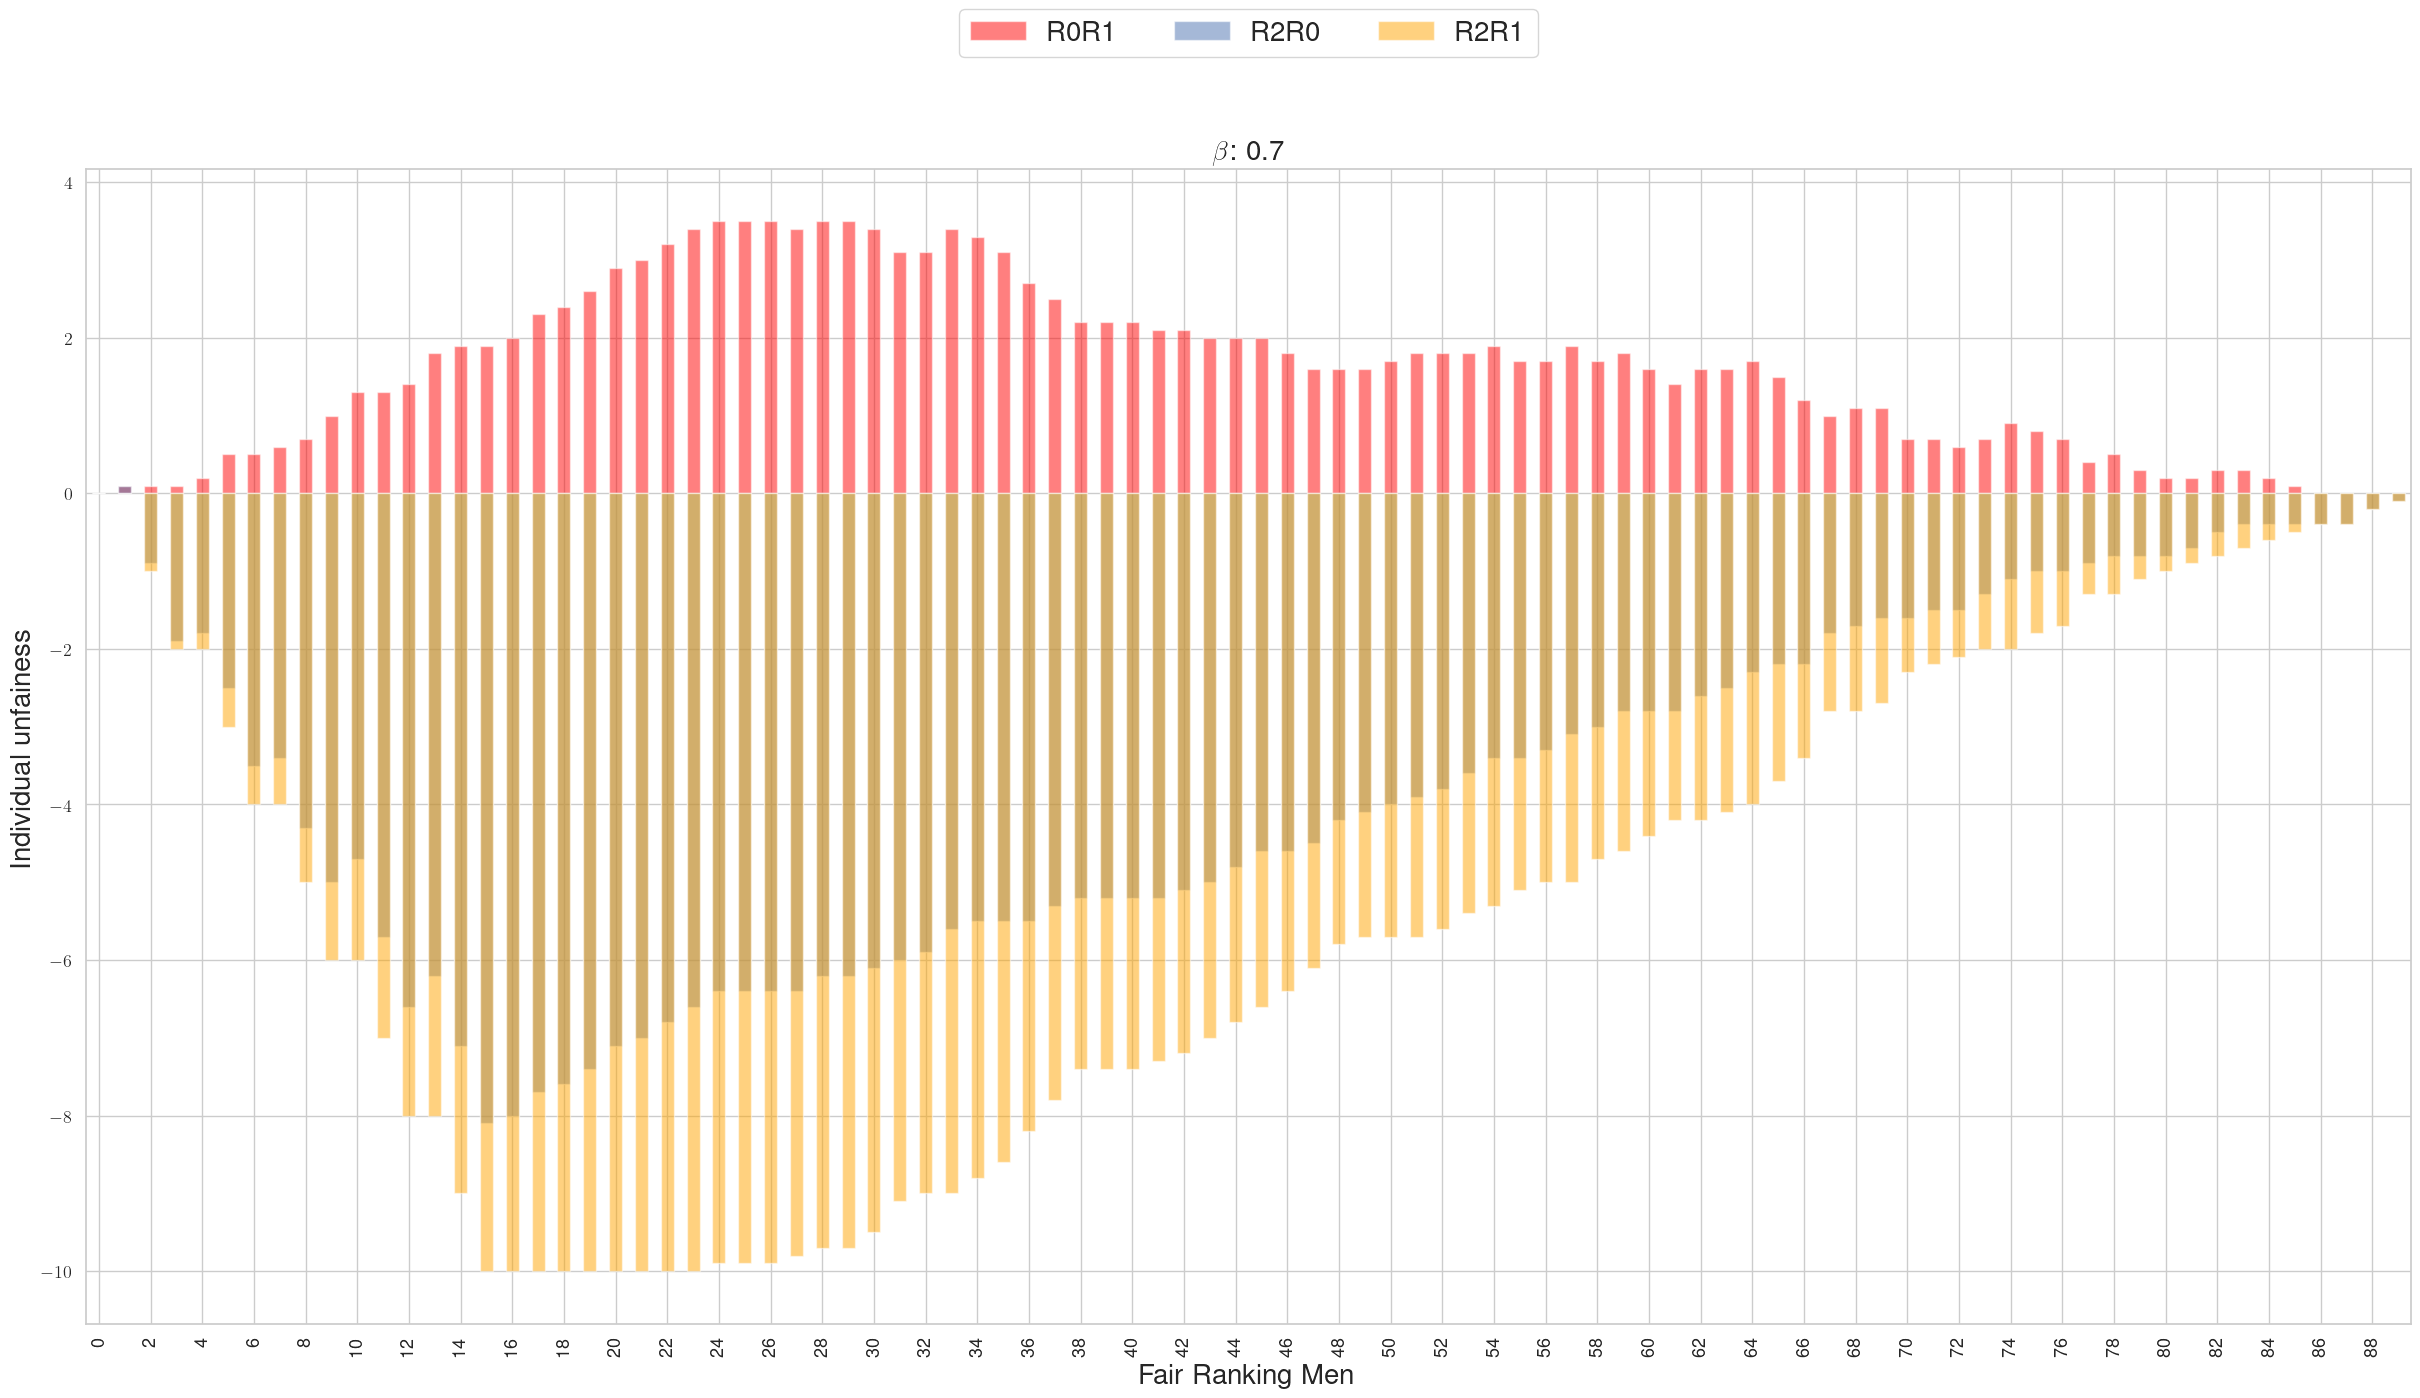

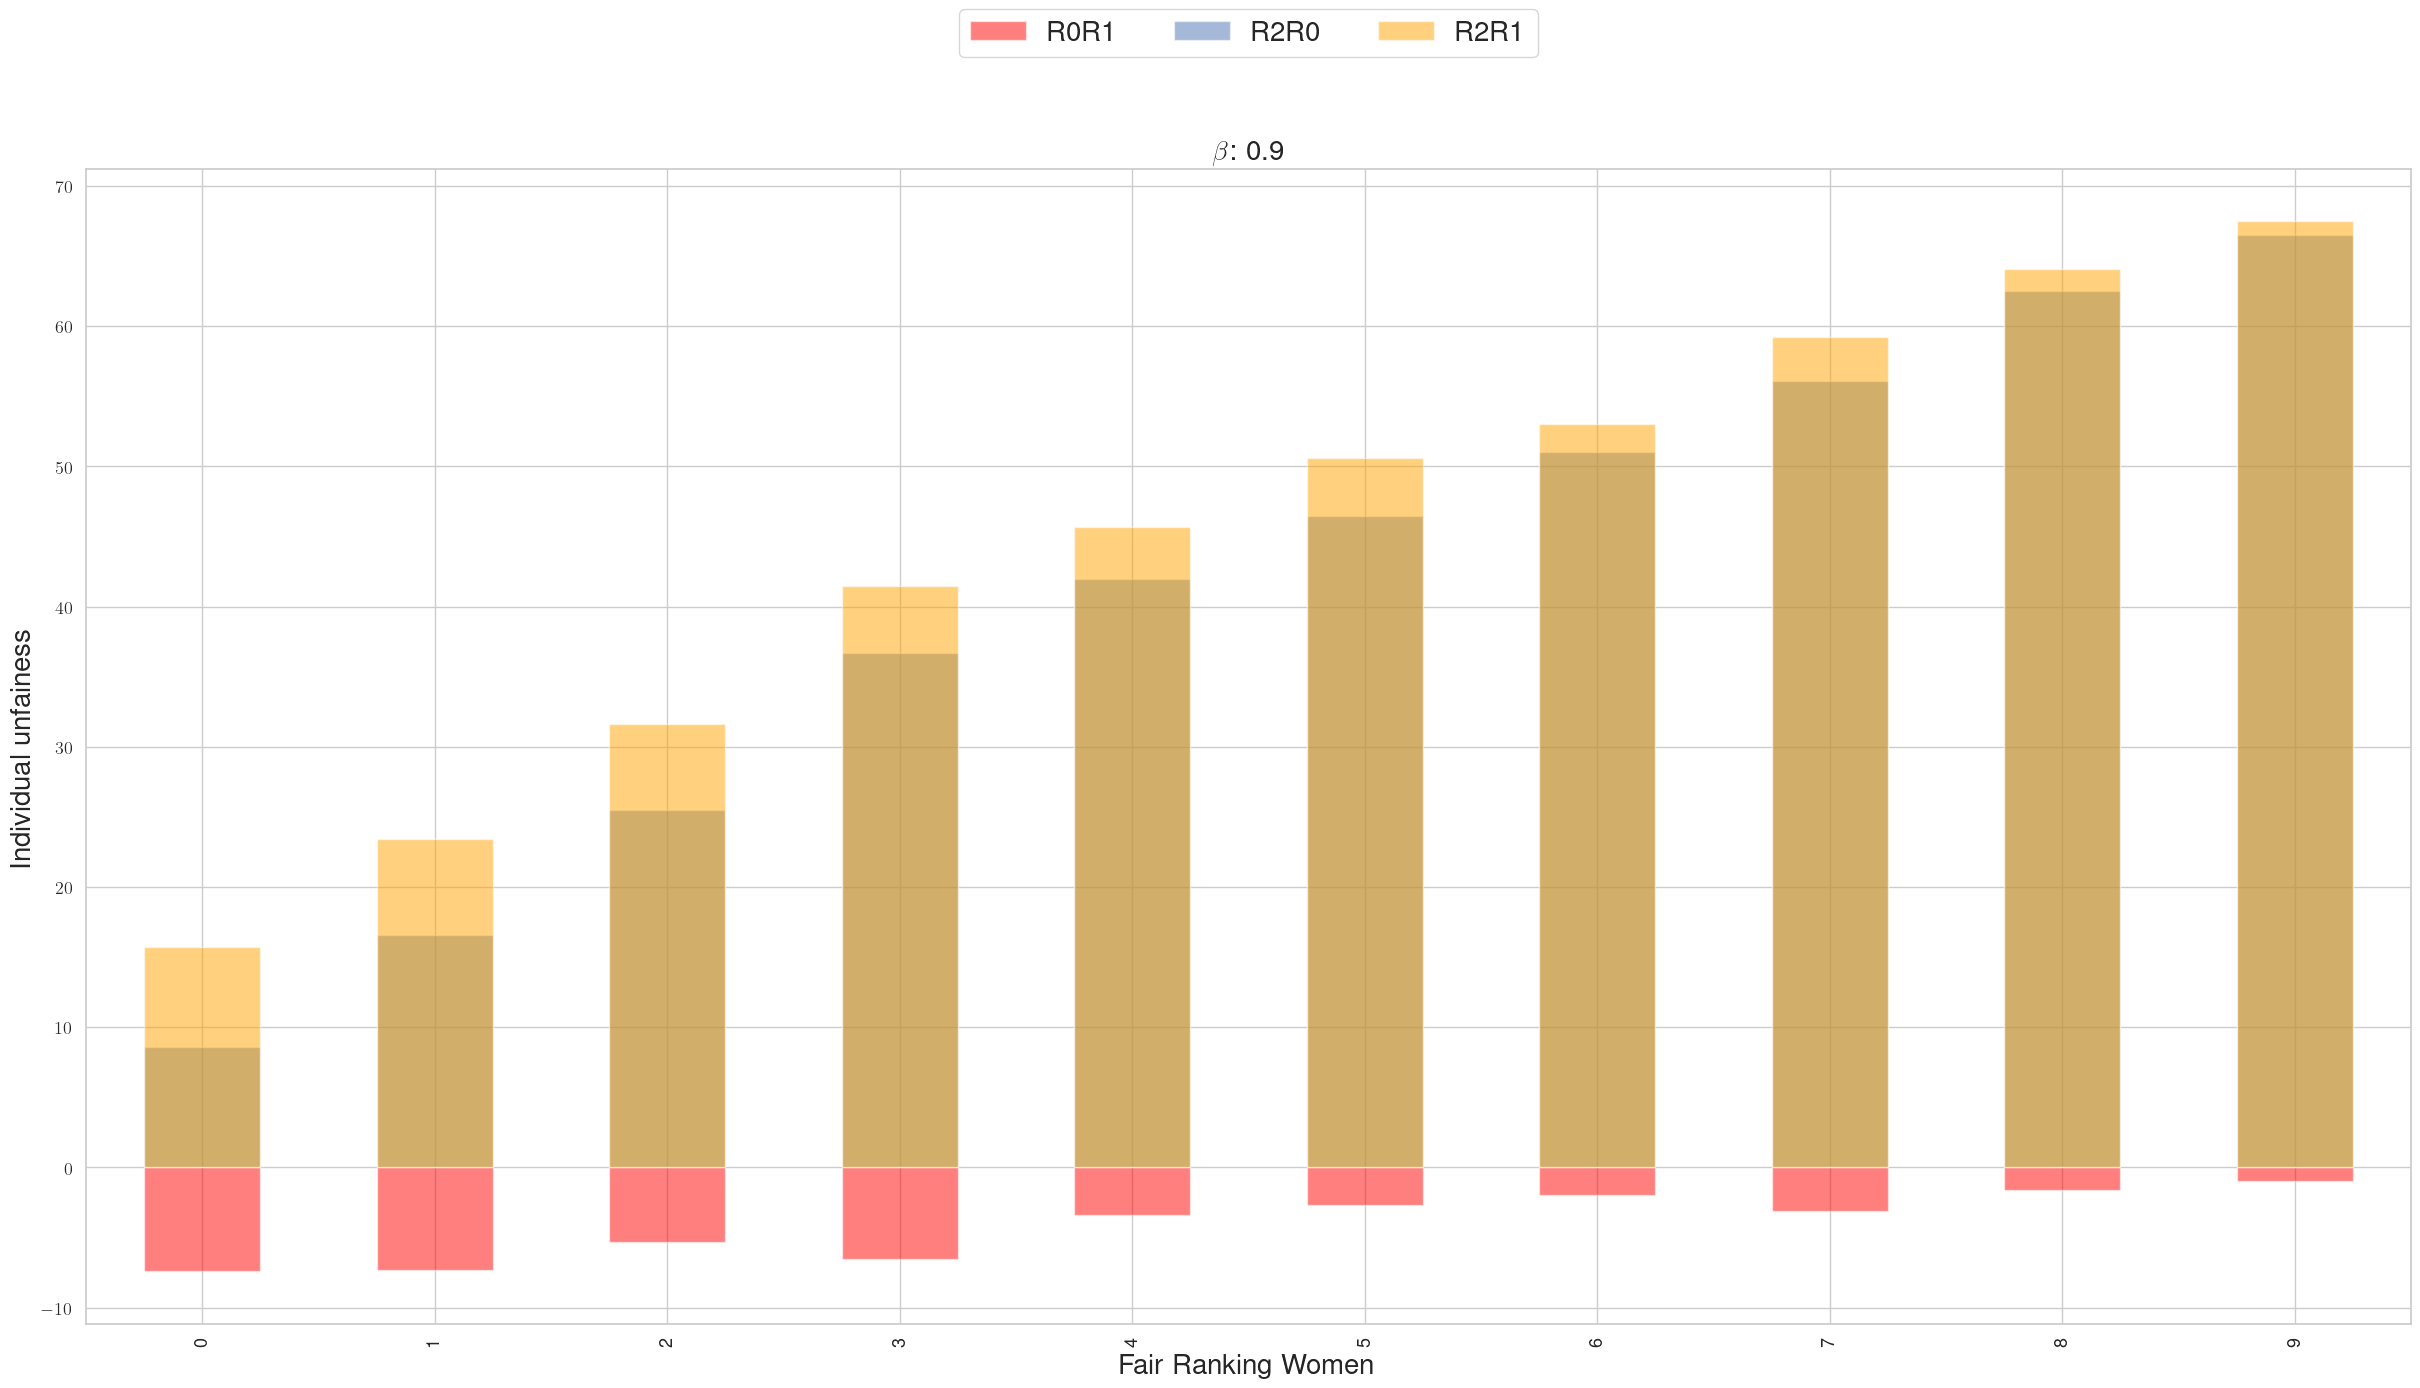

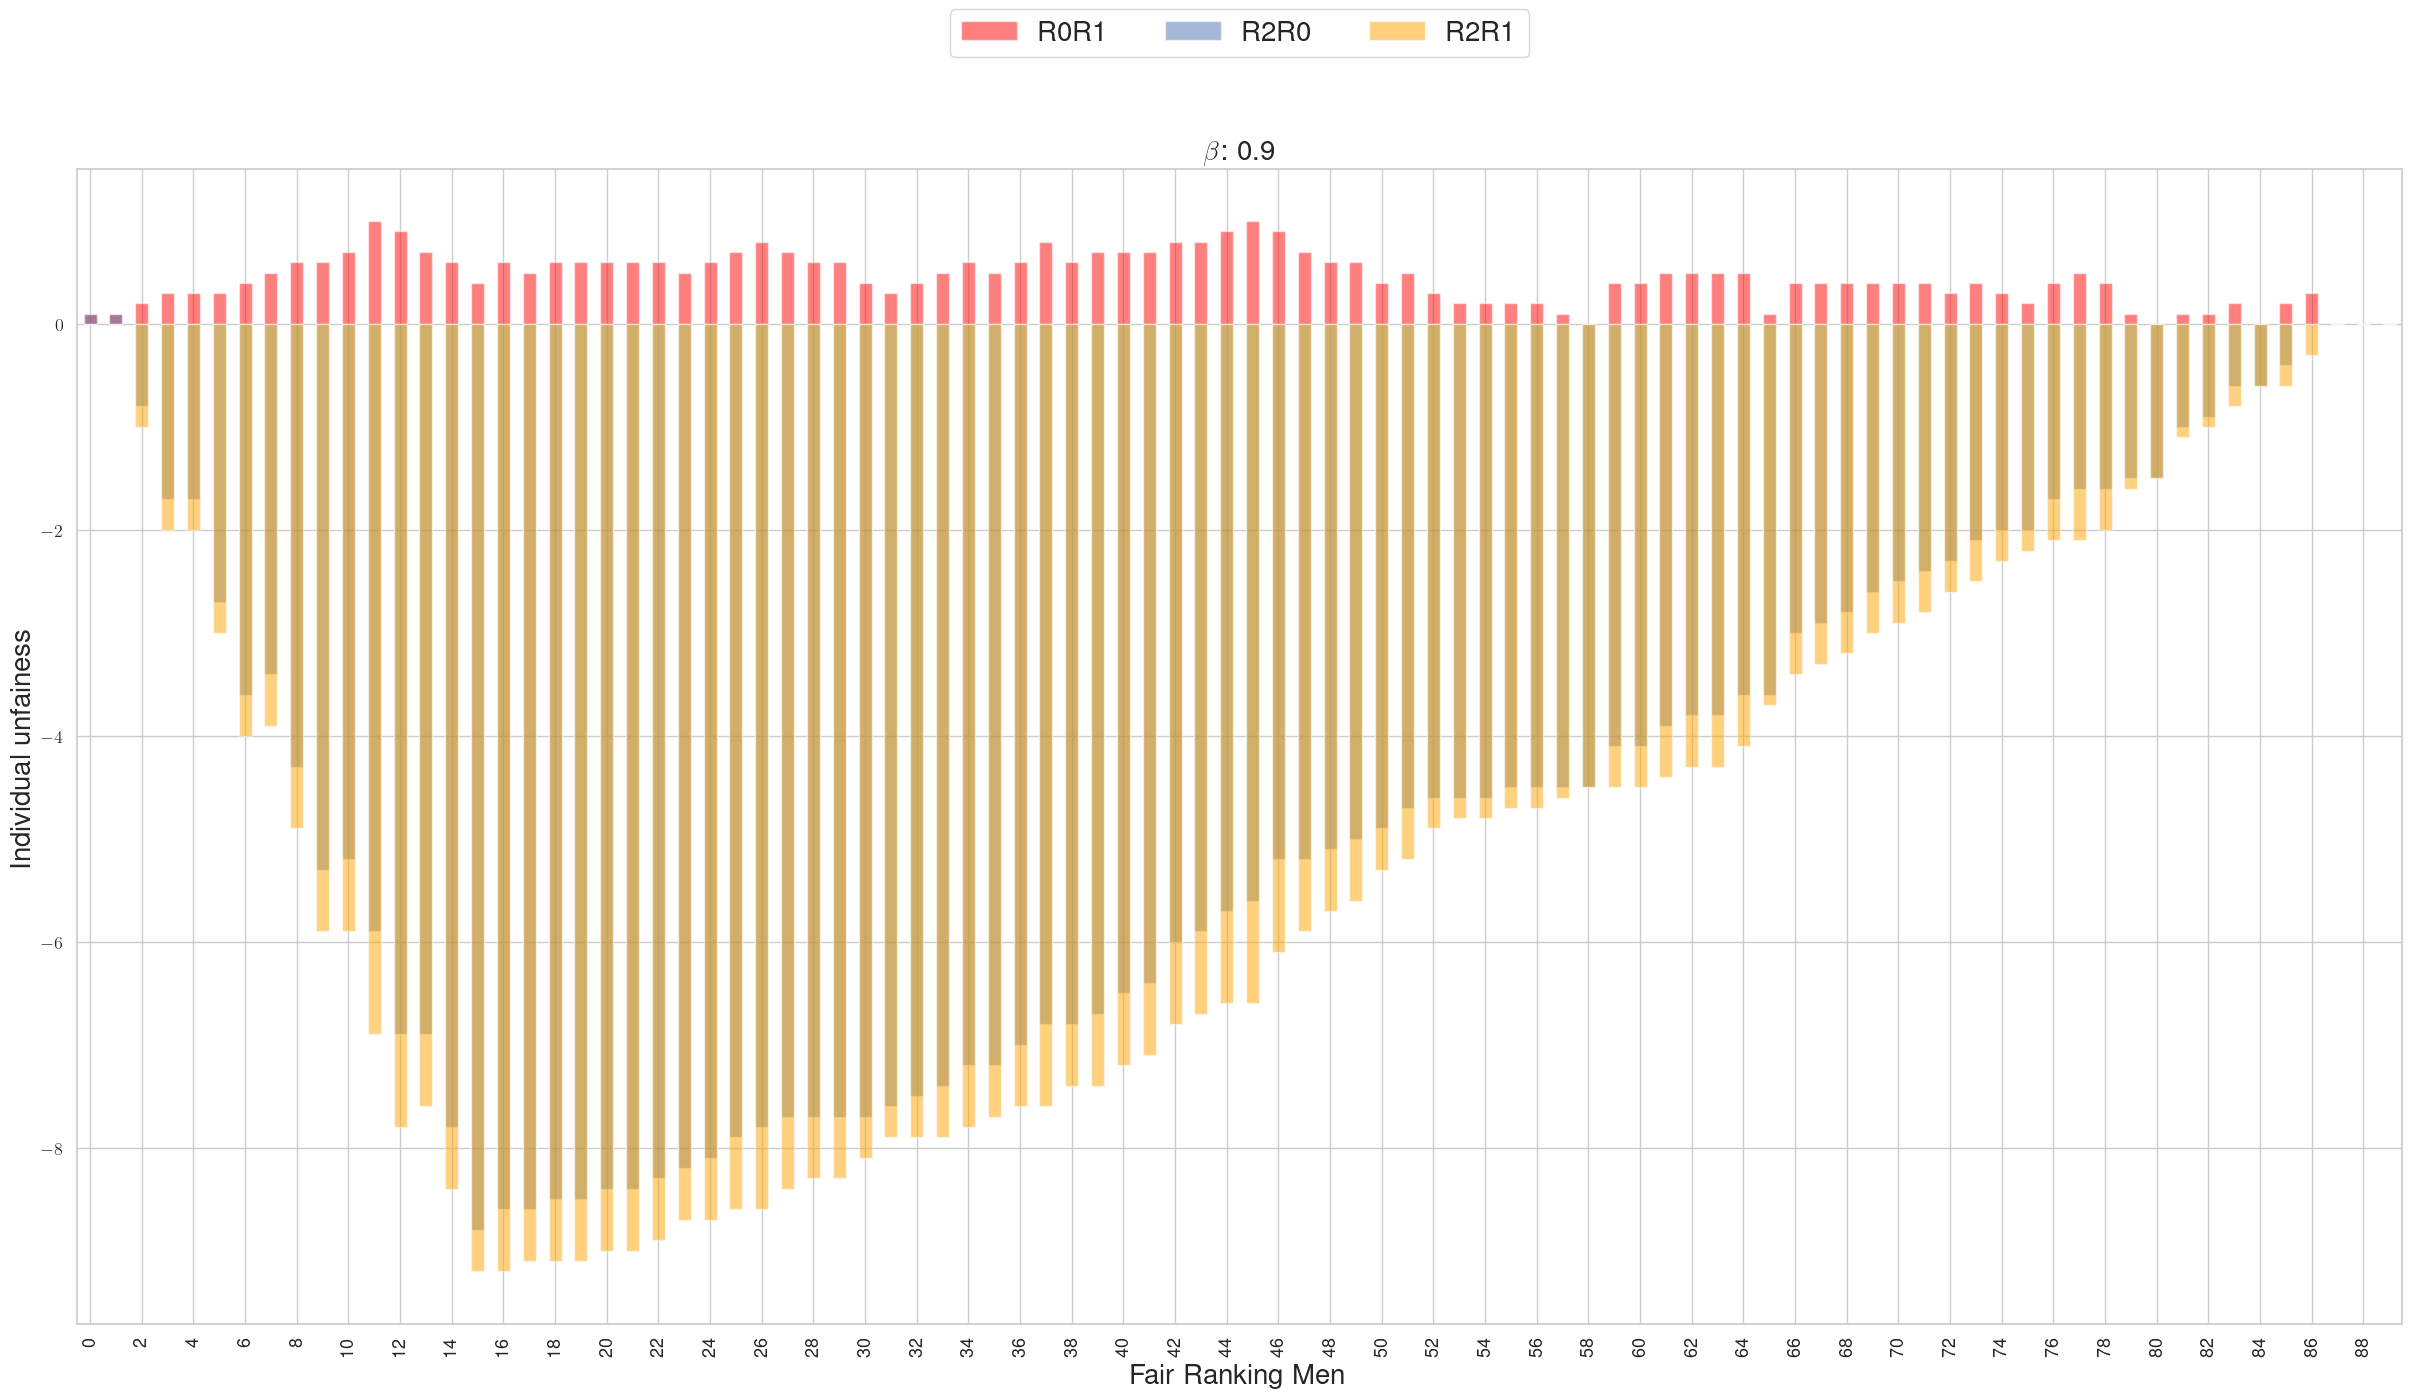

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.86it/s]


Proportion of Women: 0.3


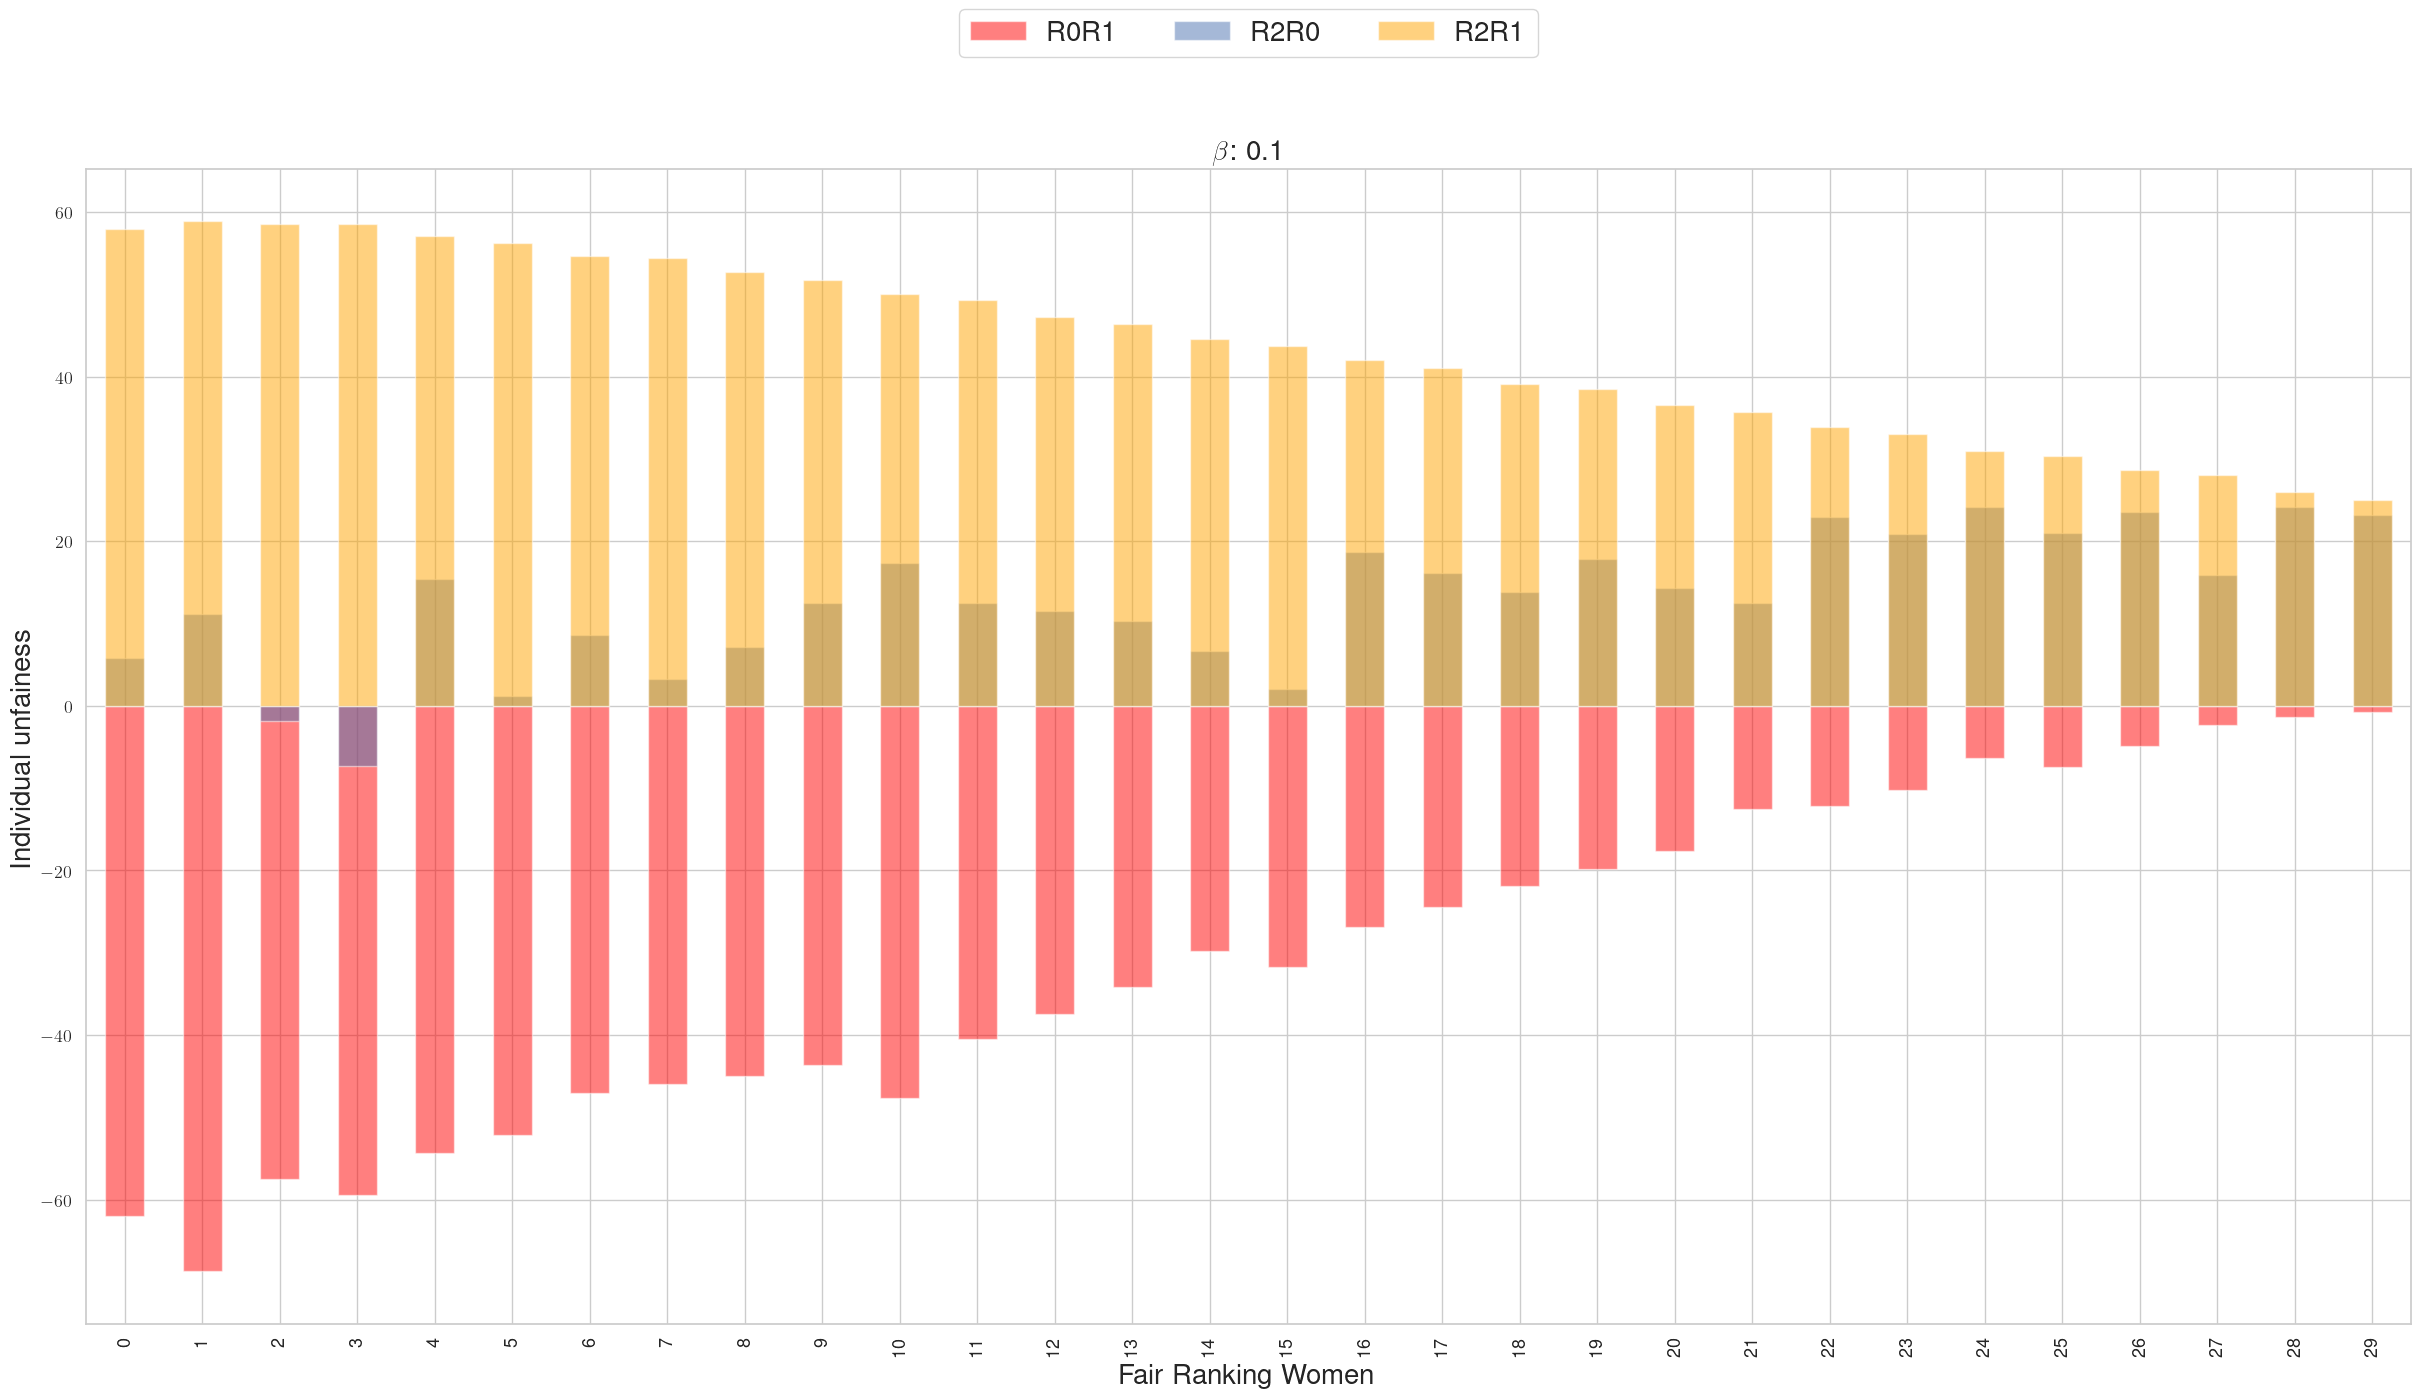

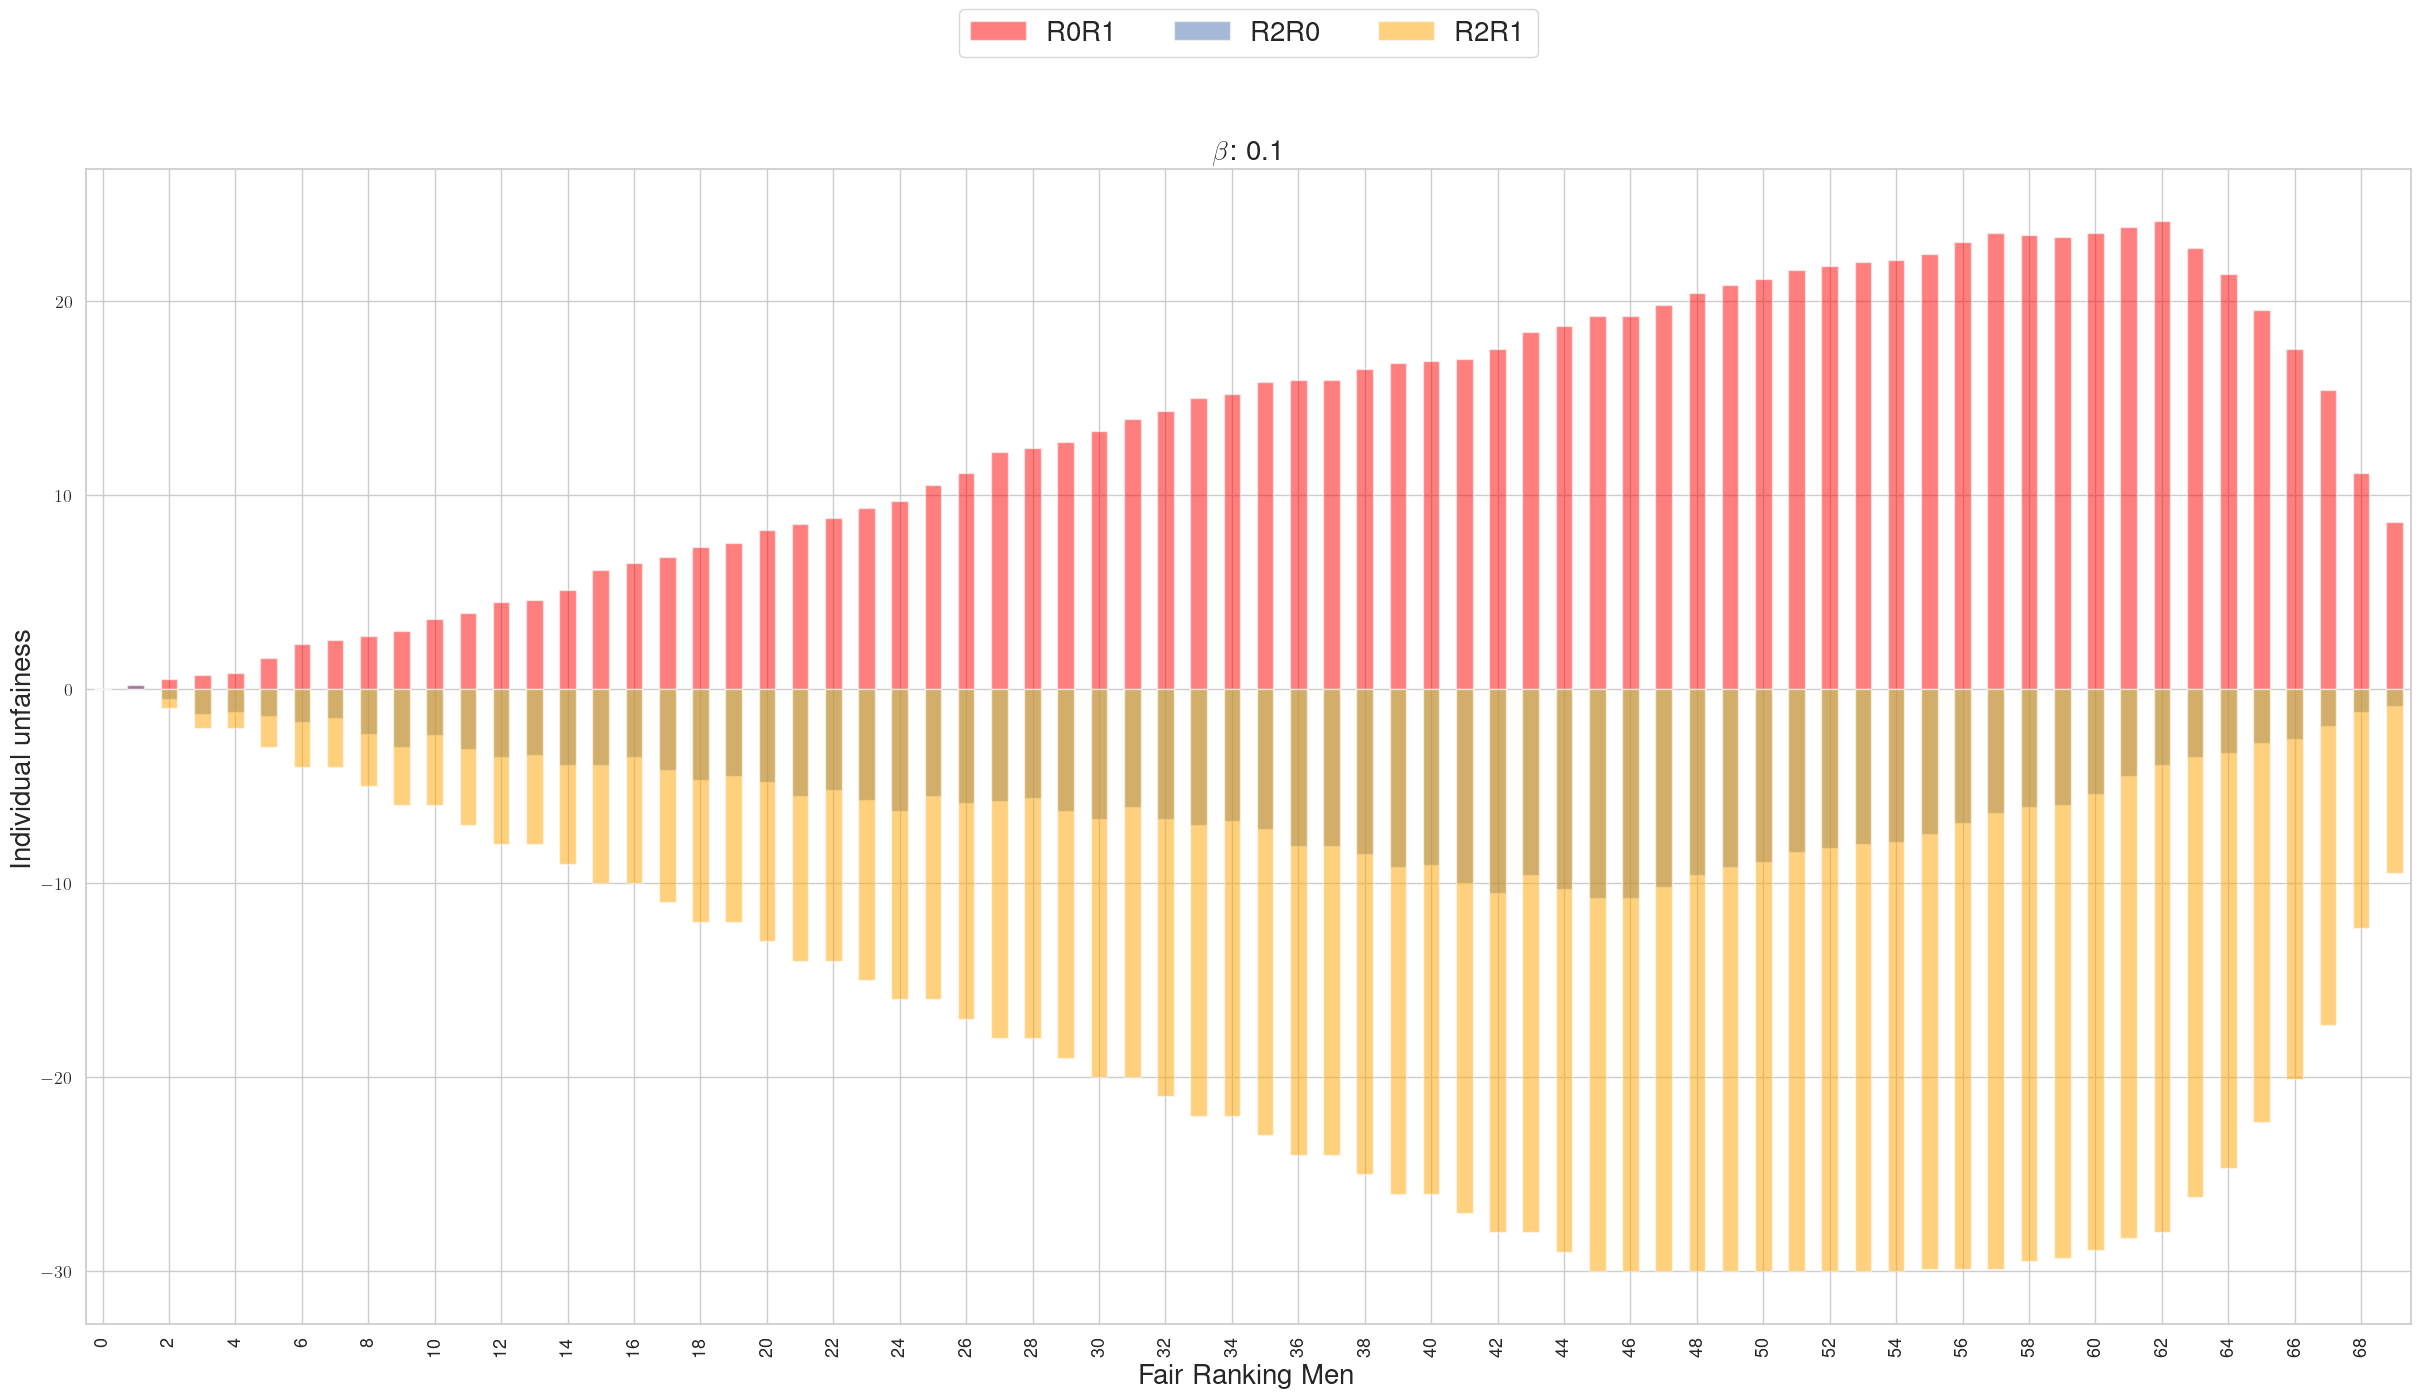

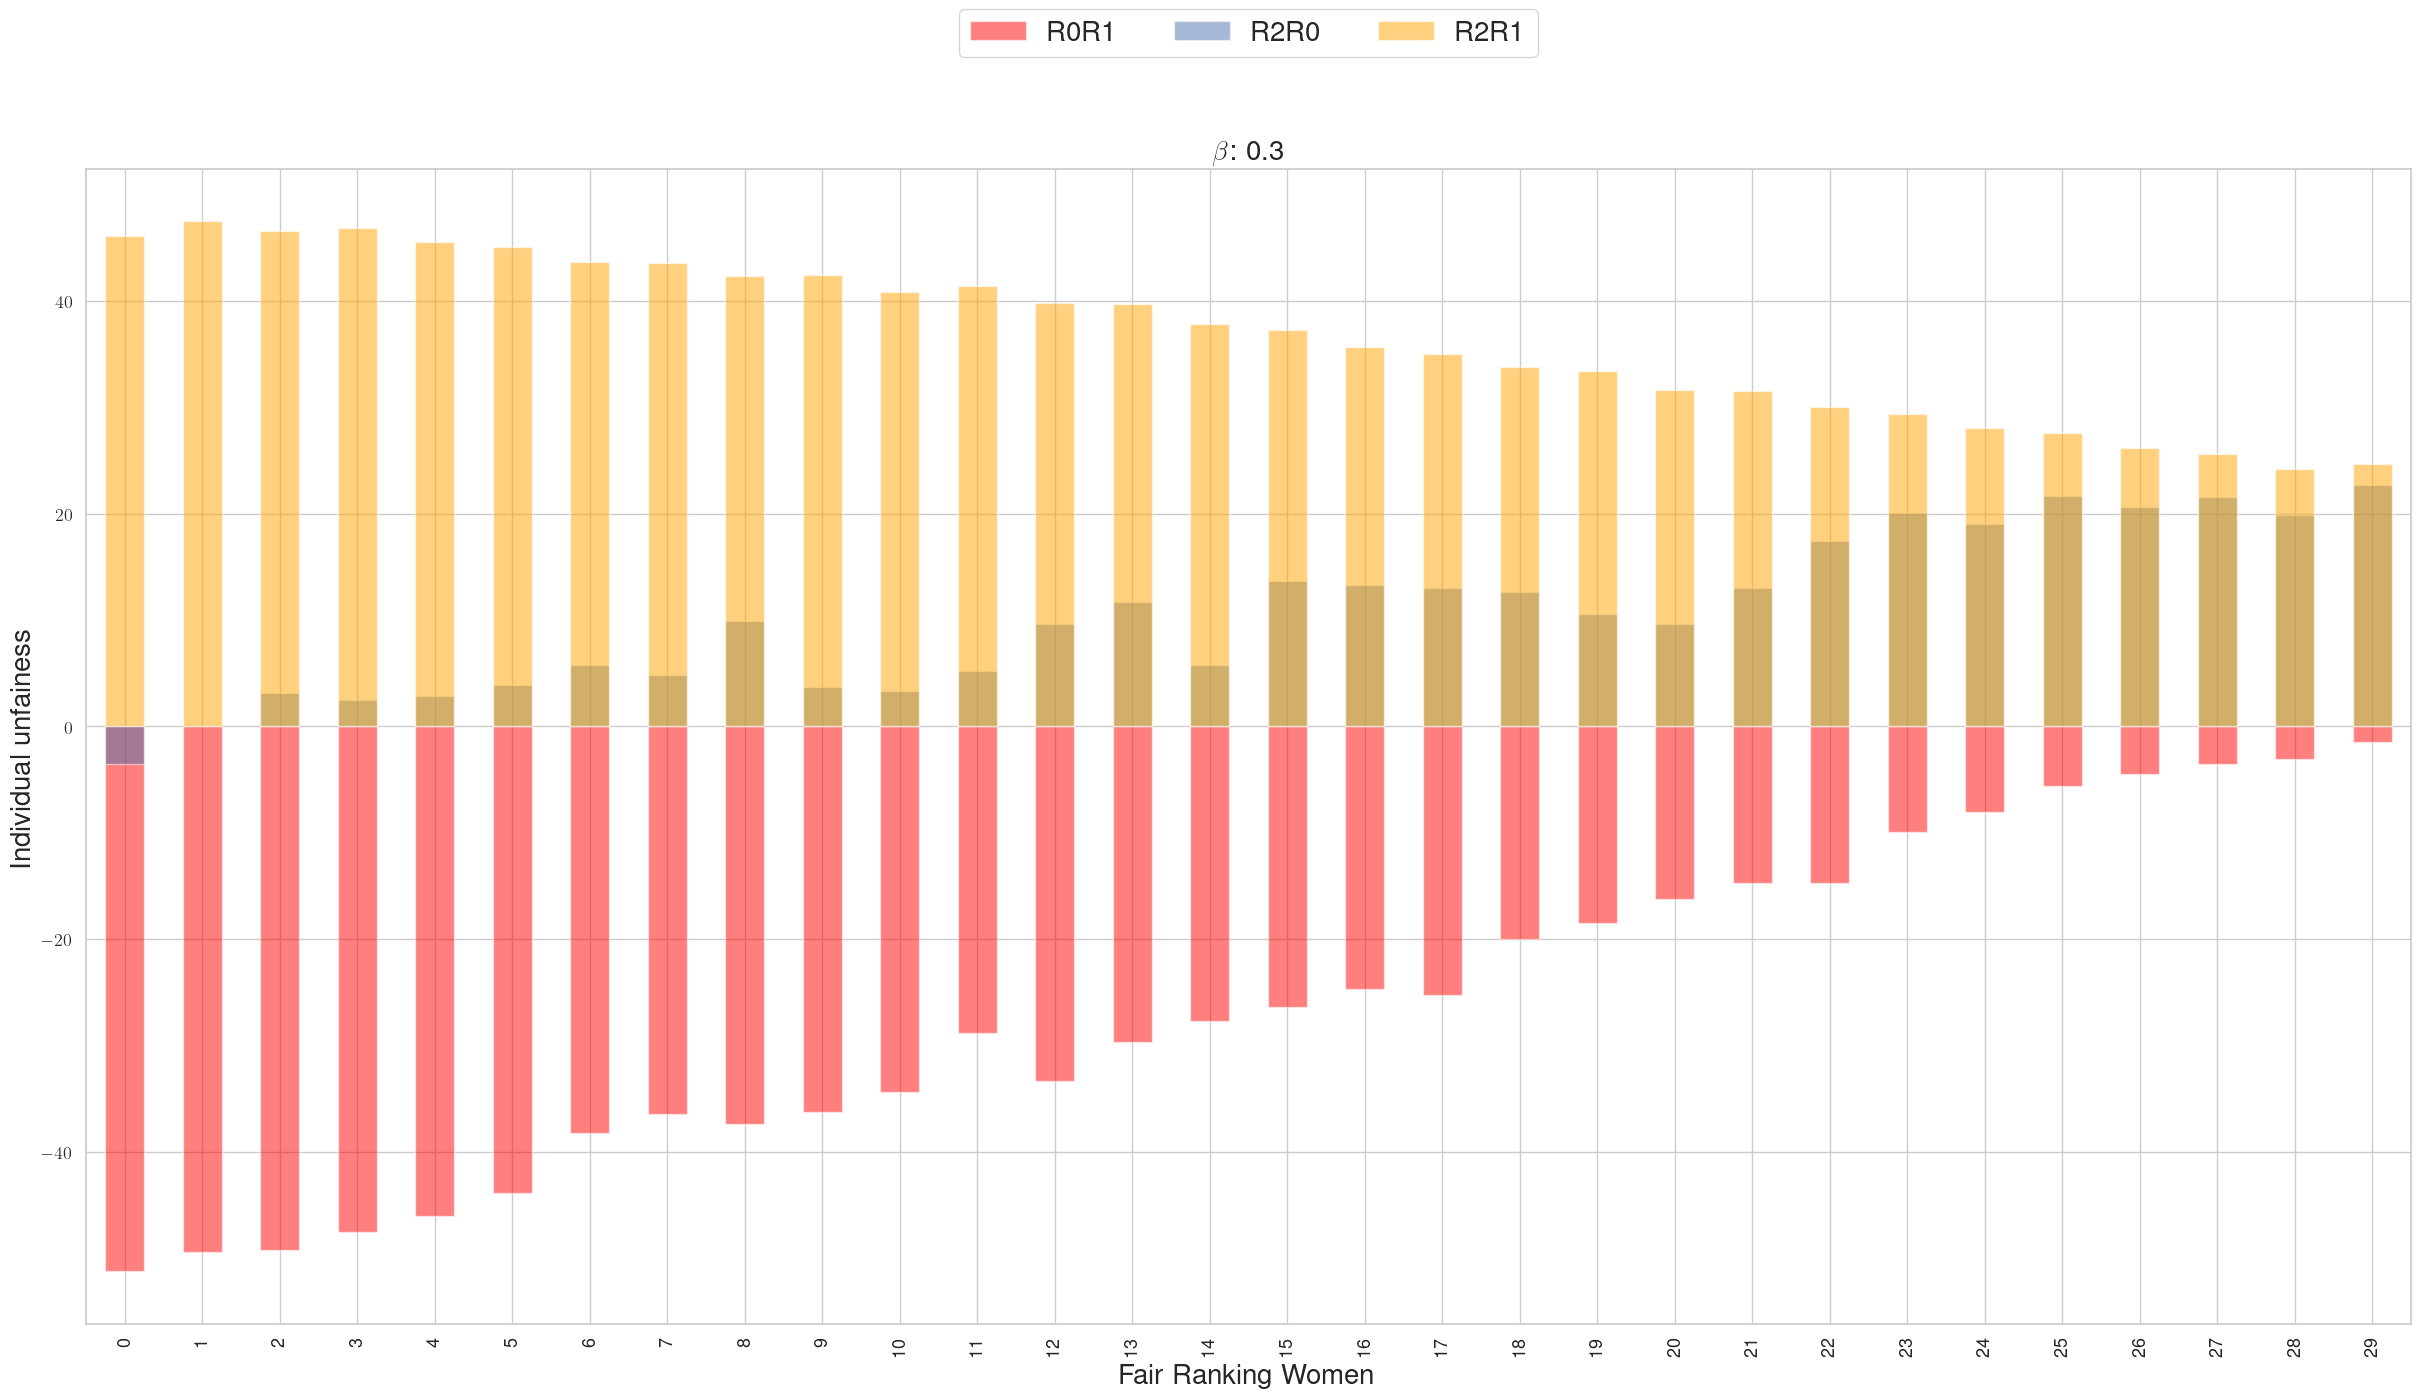

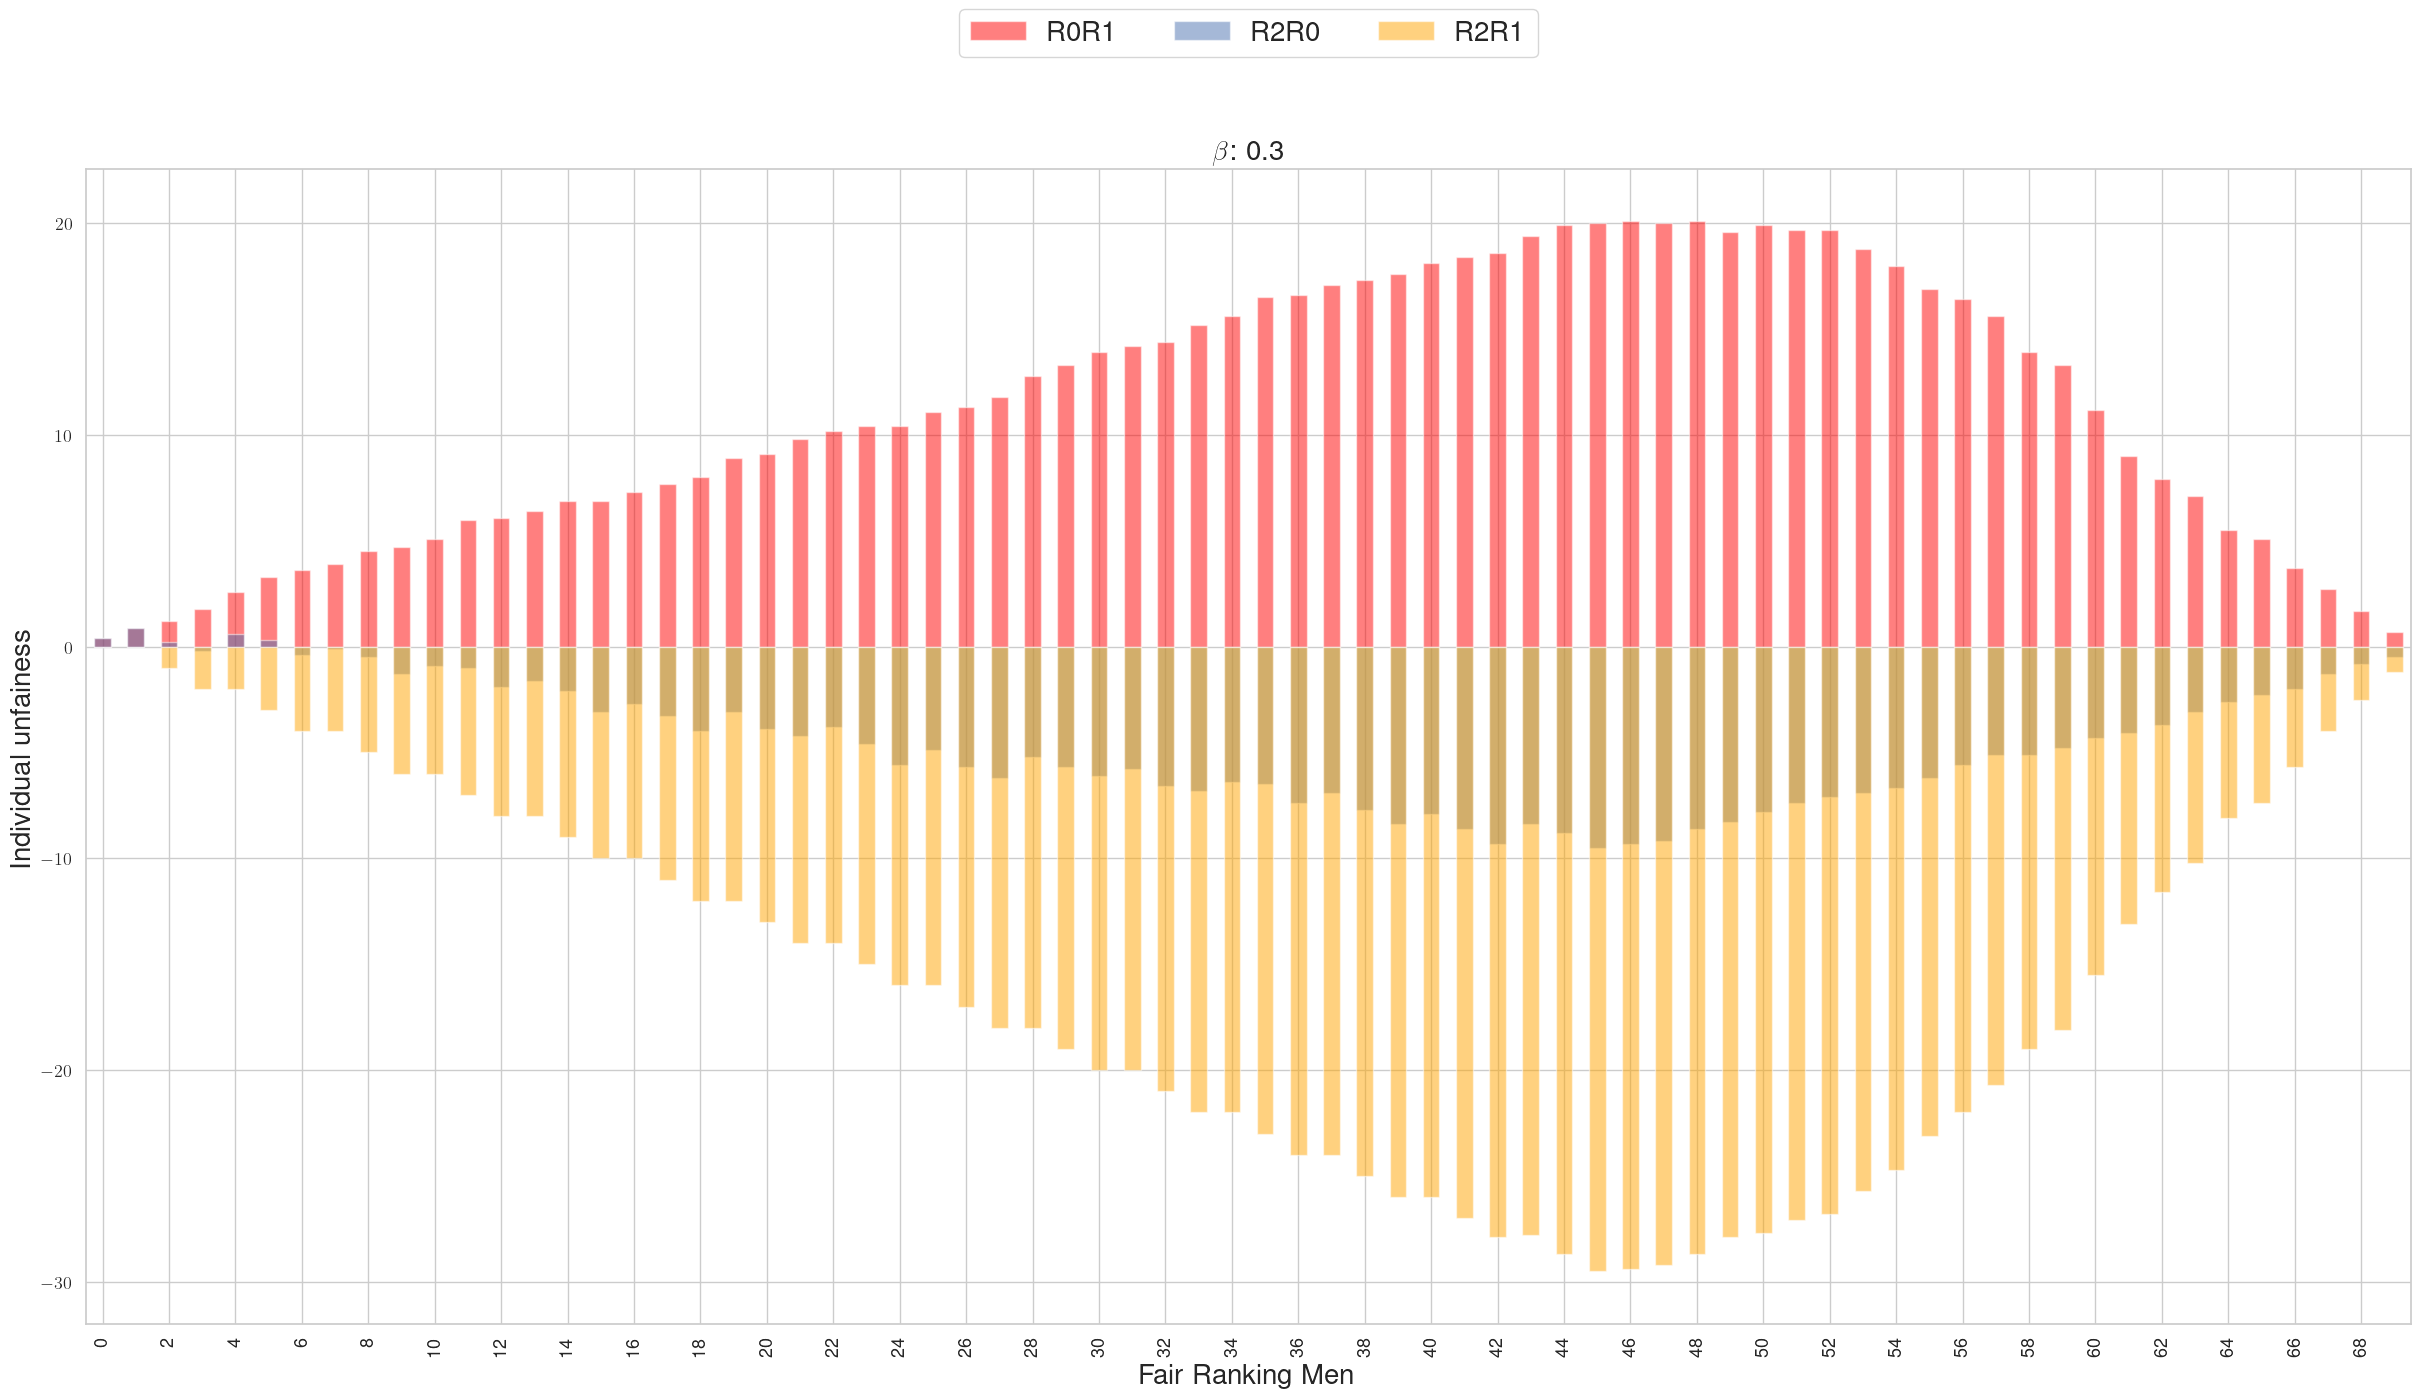

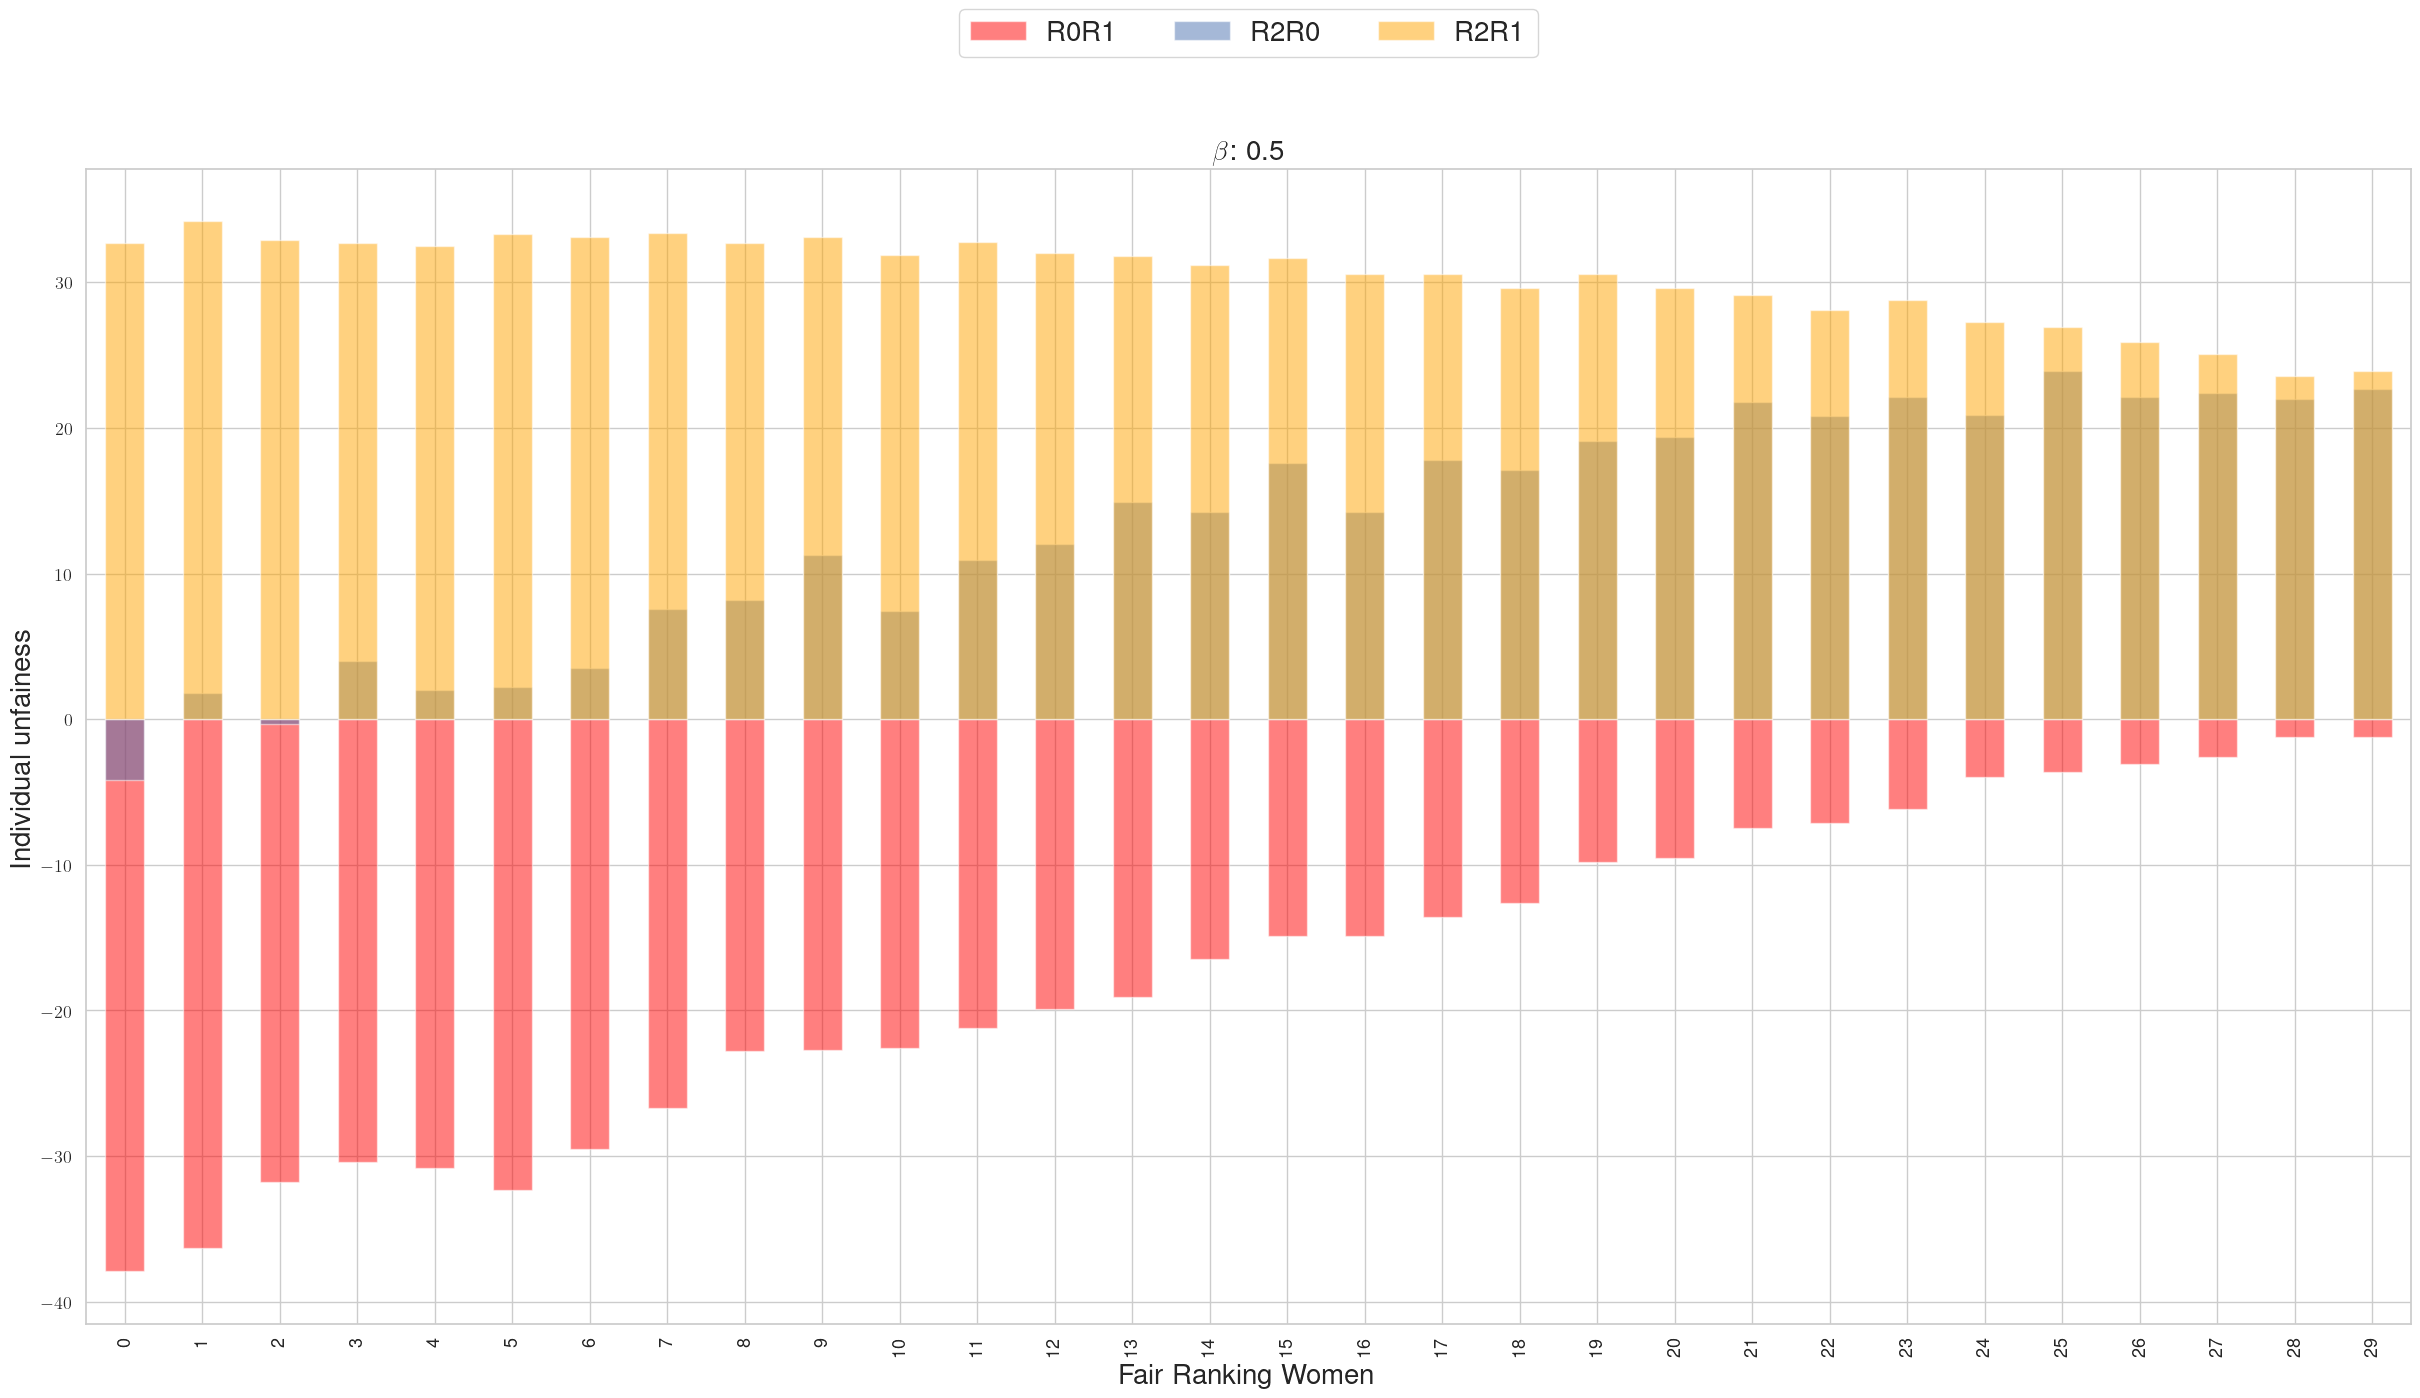

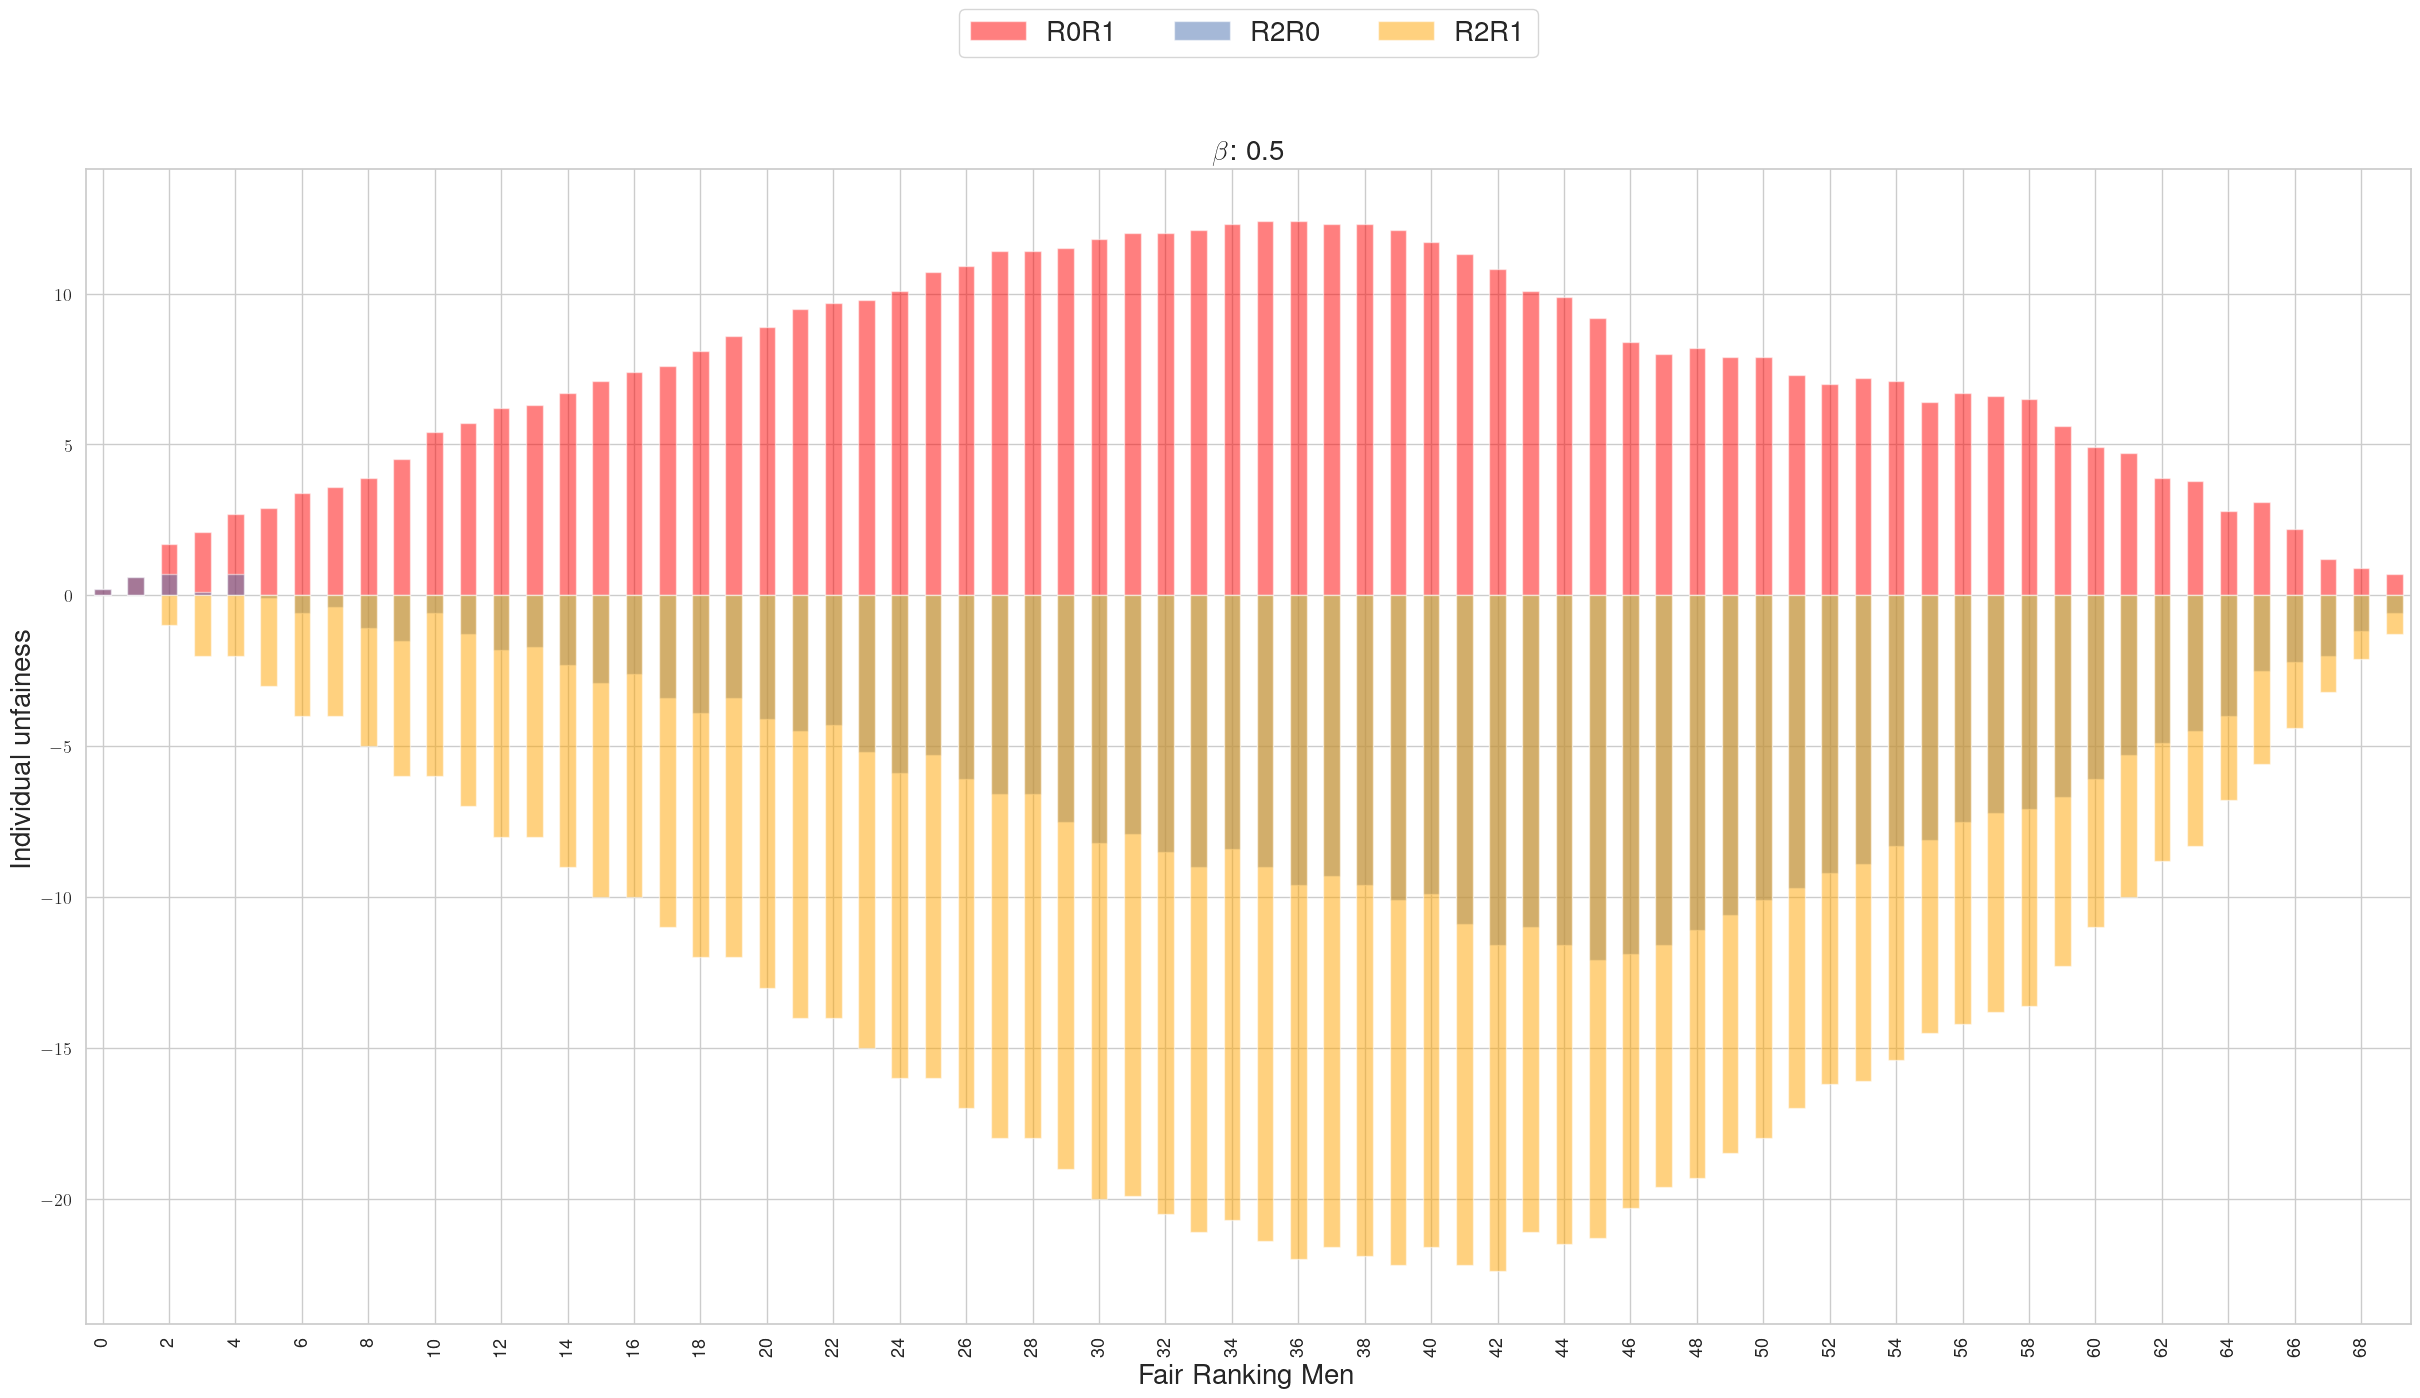

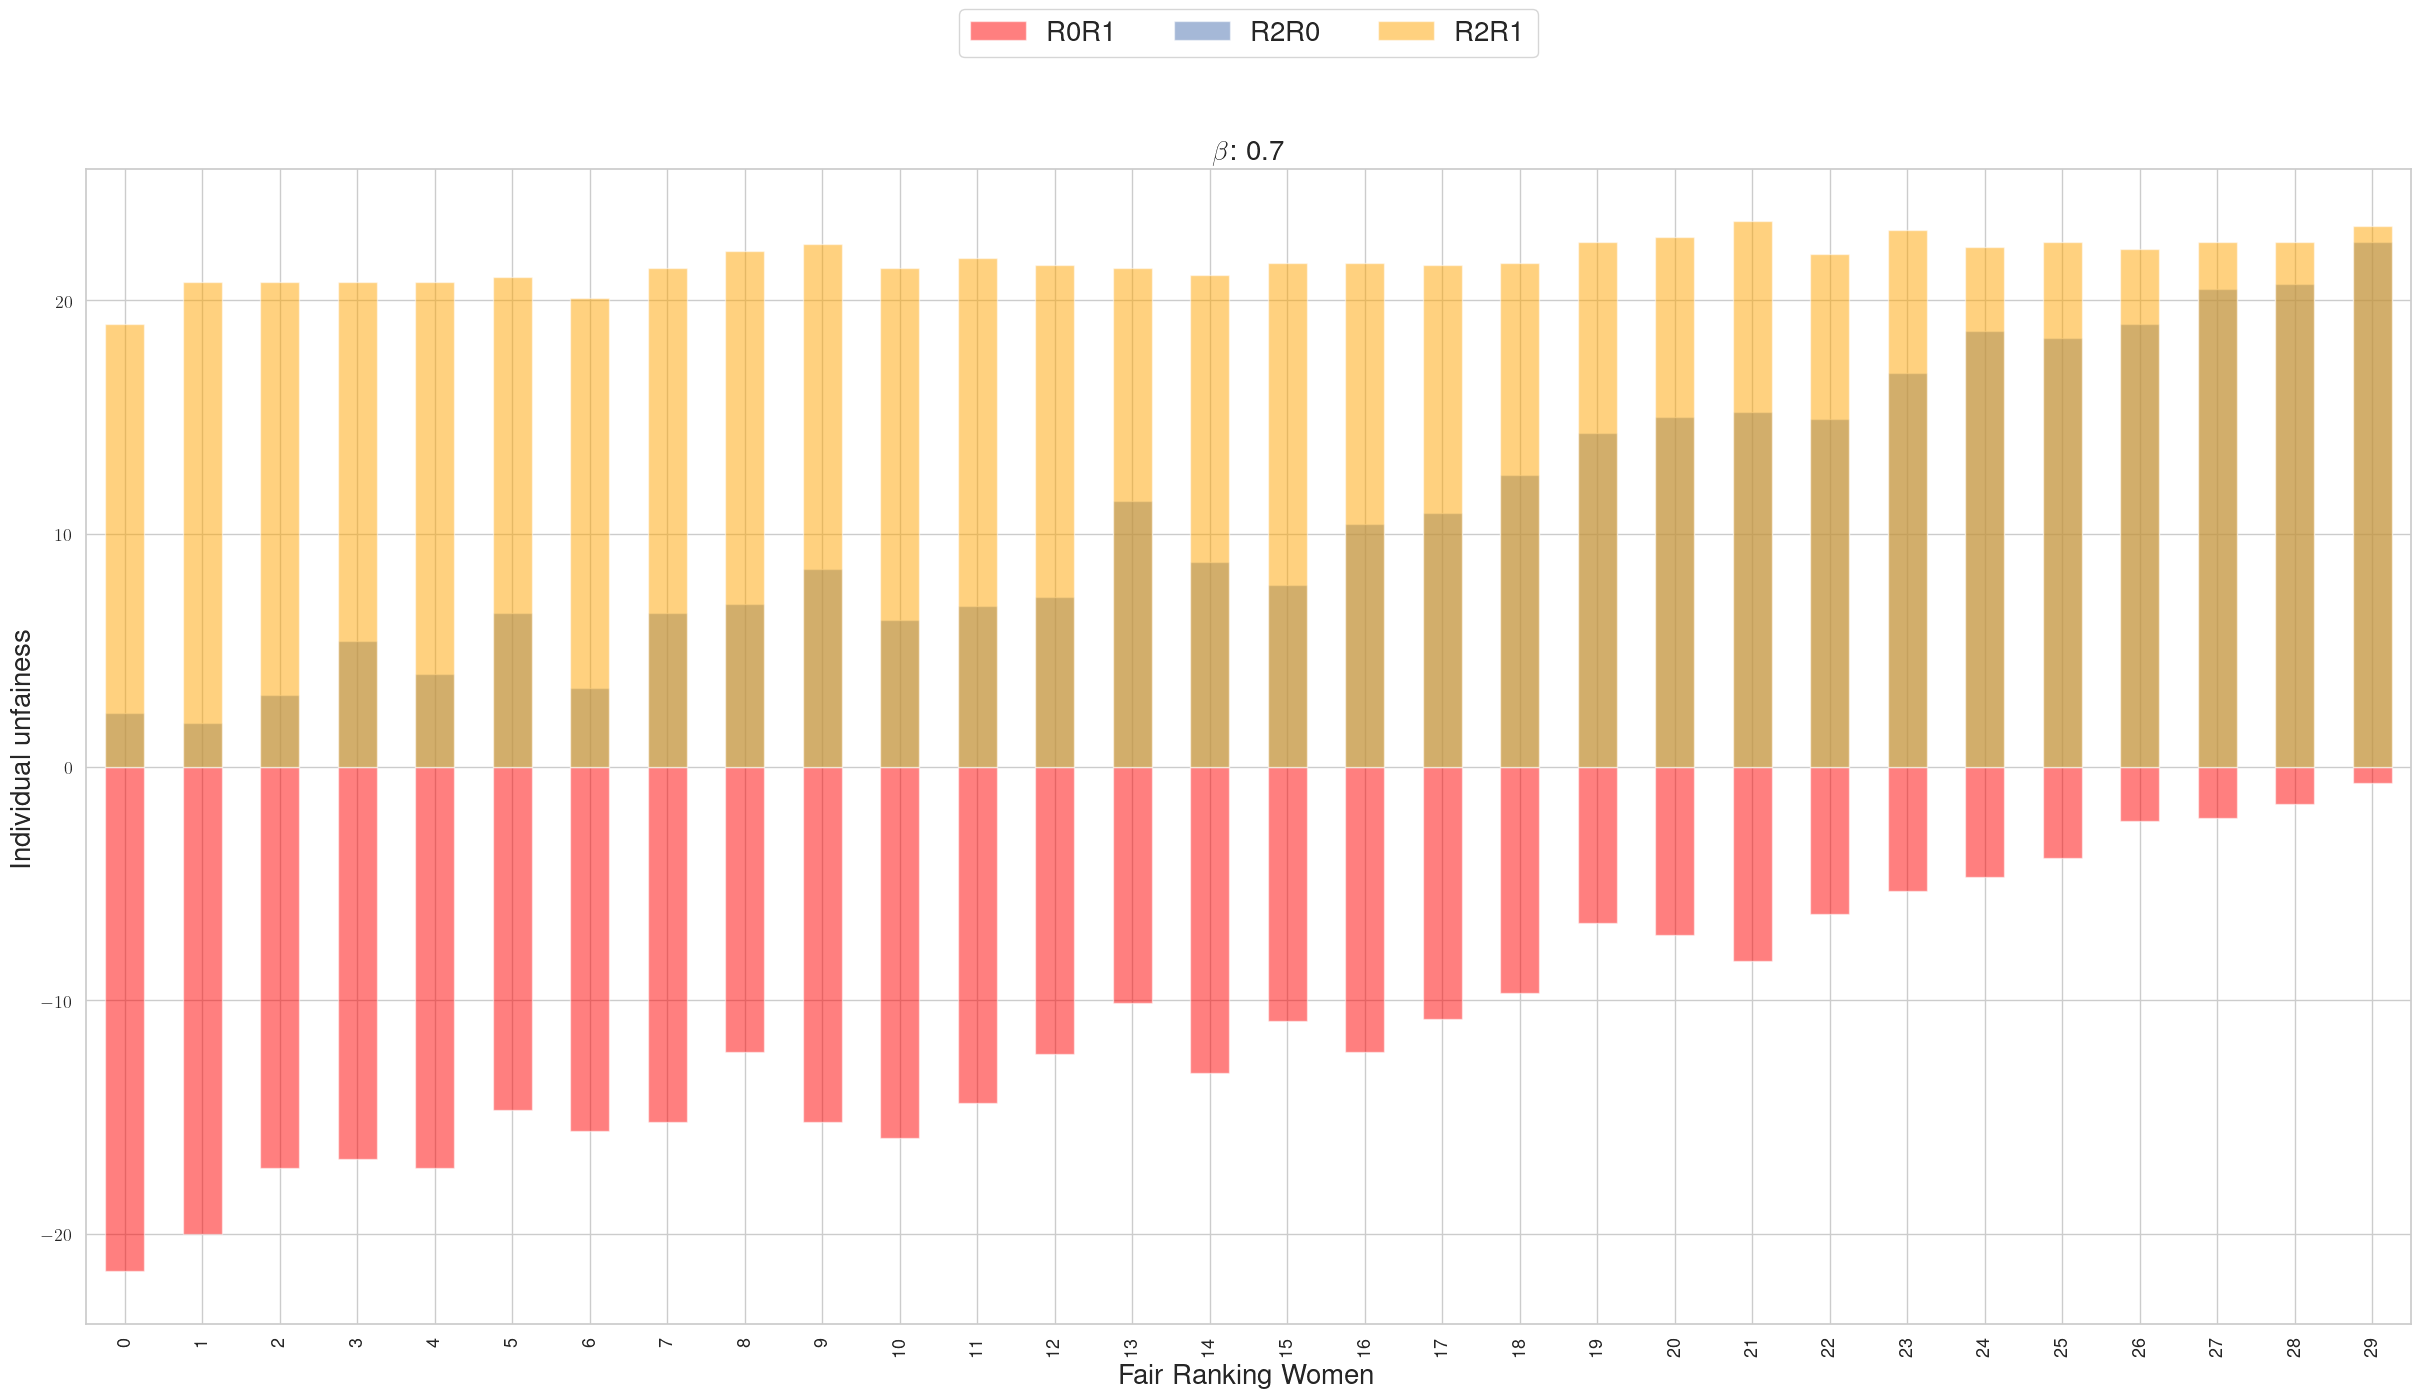

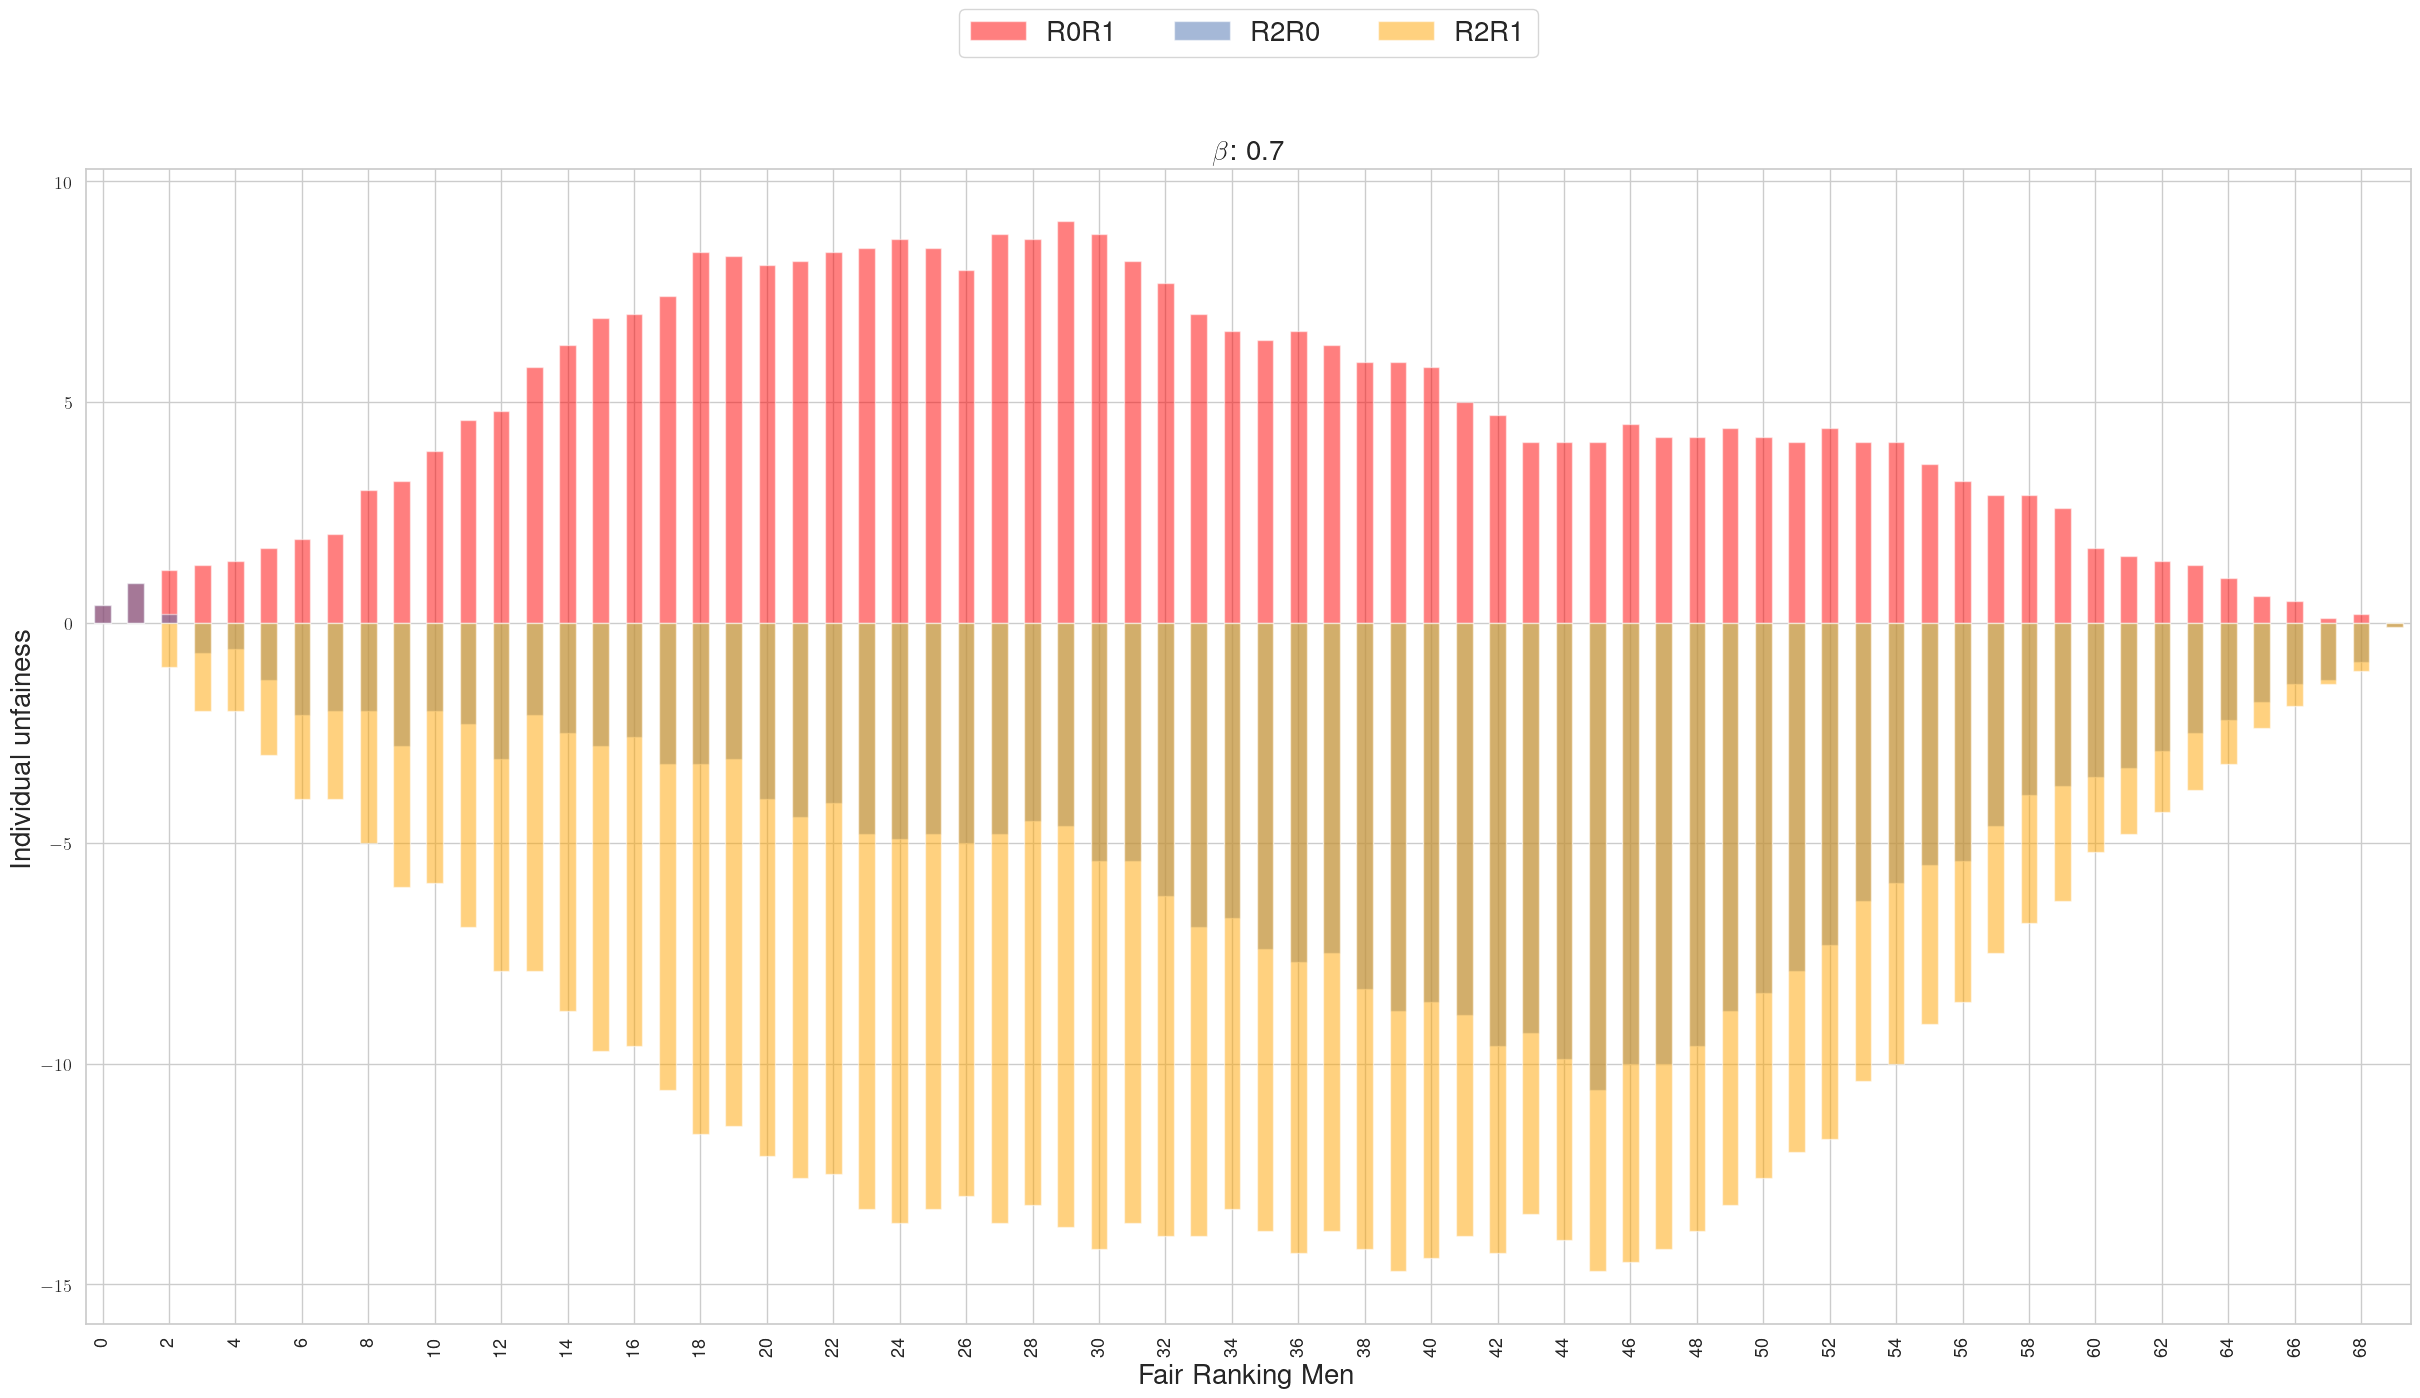

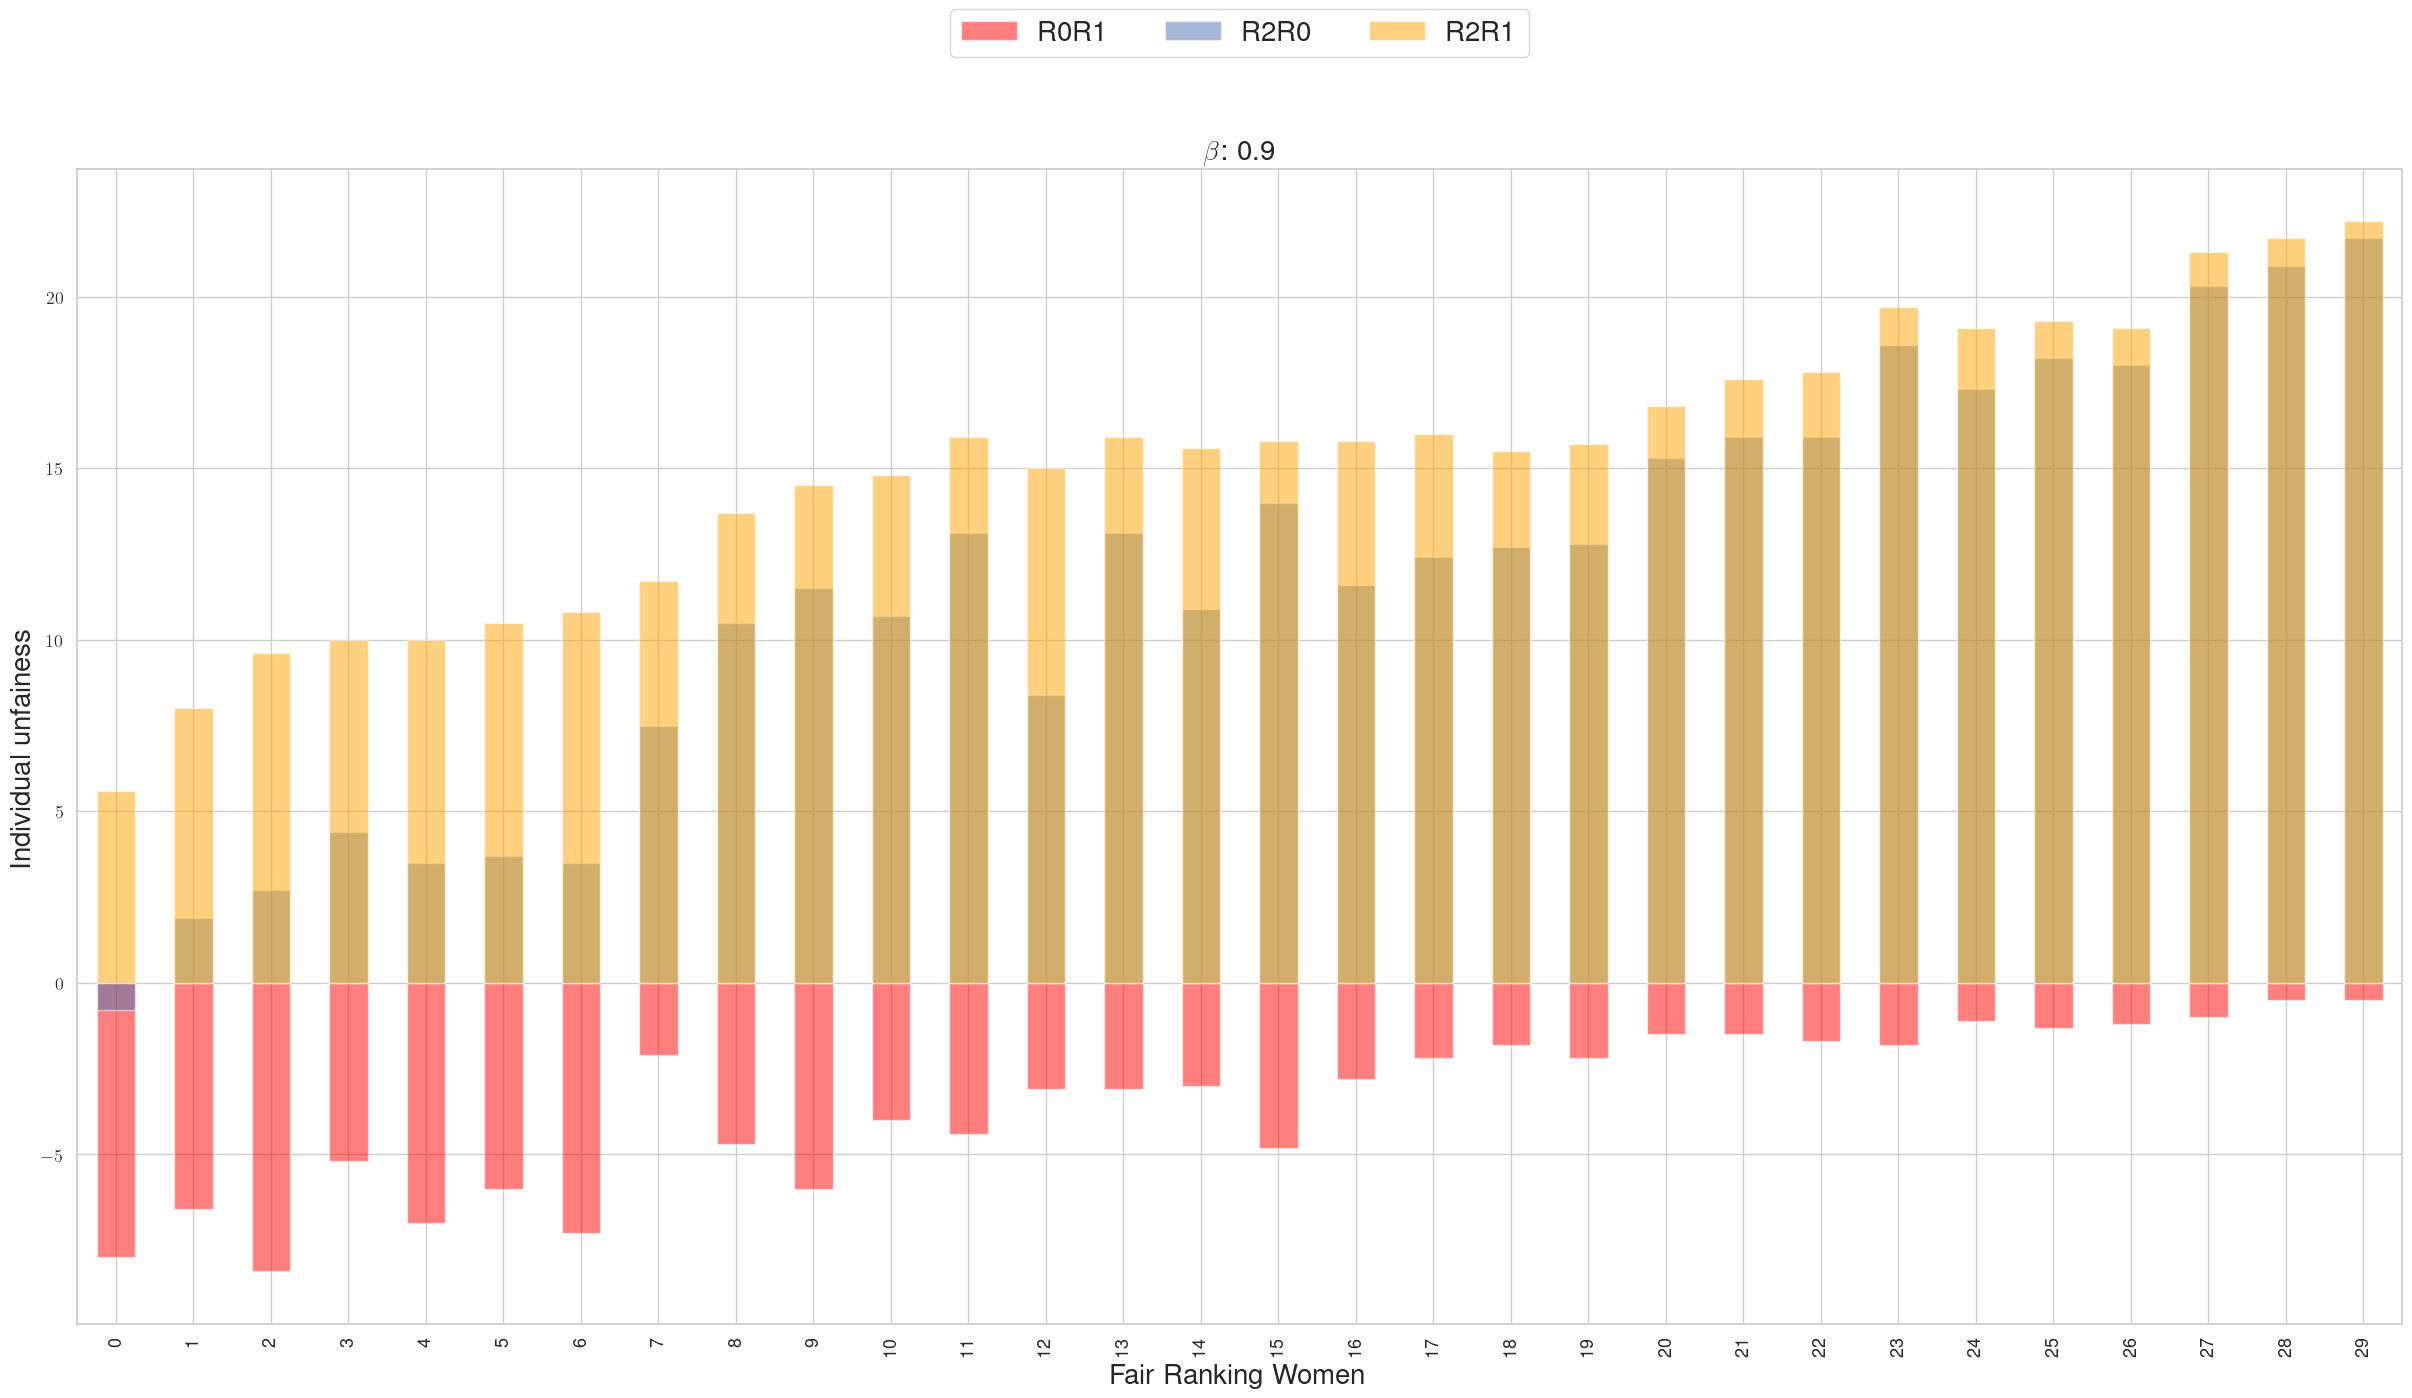

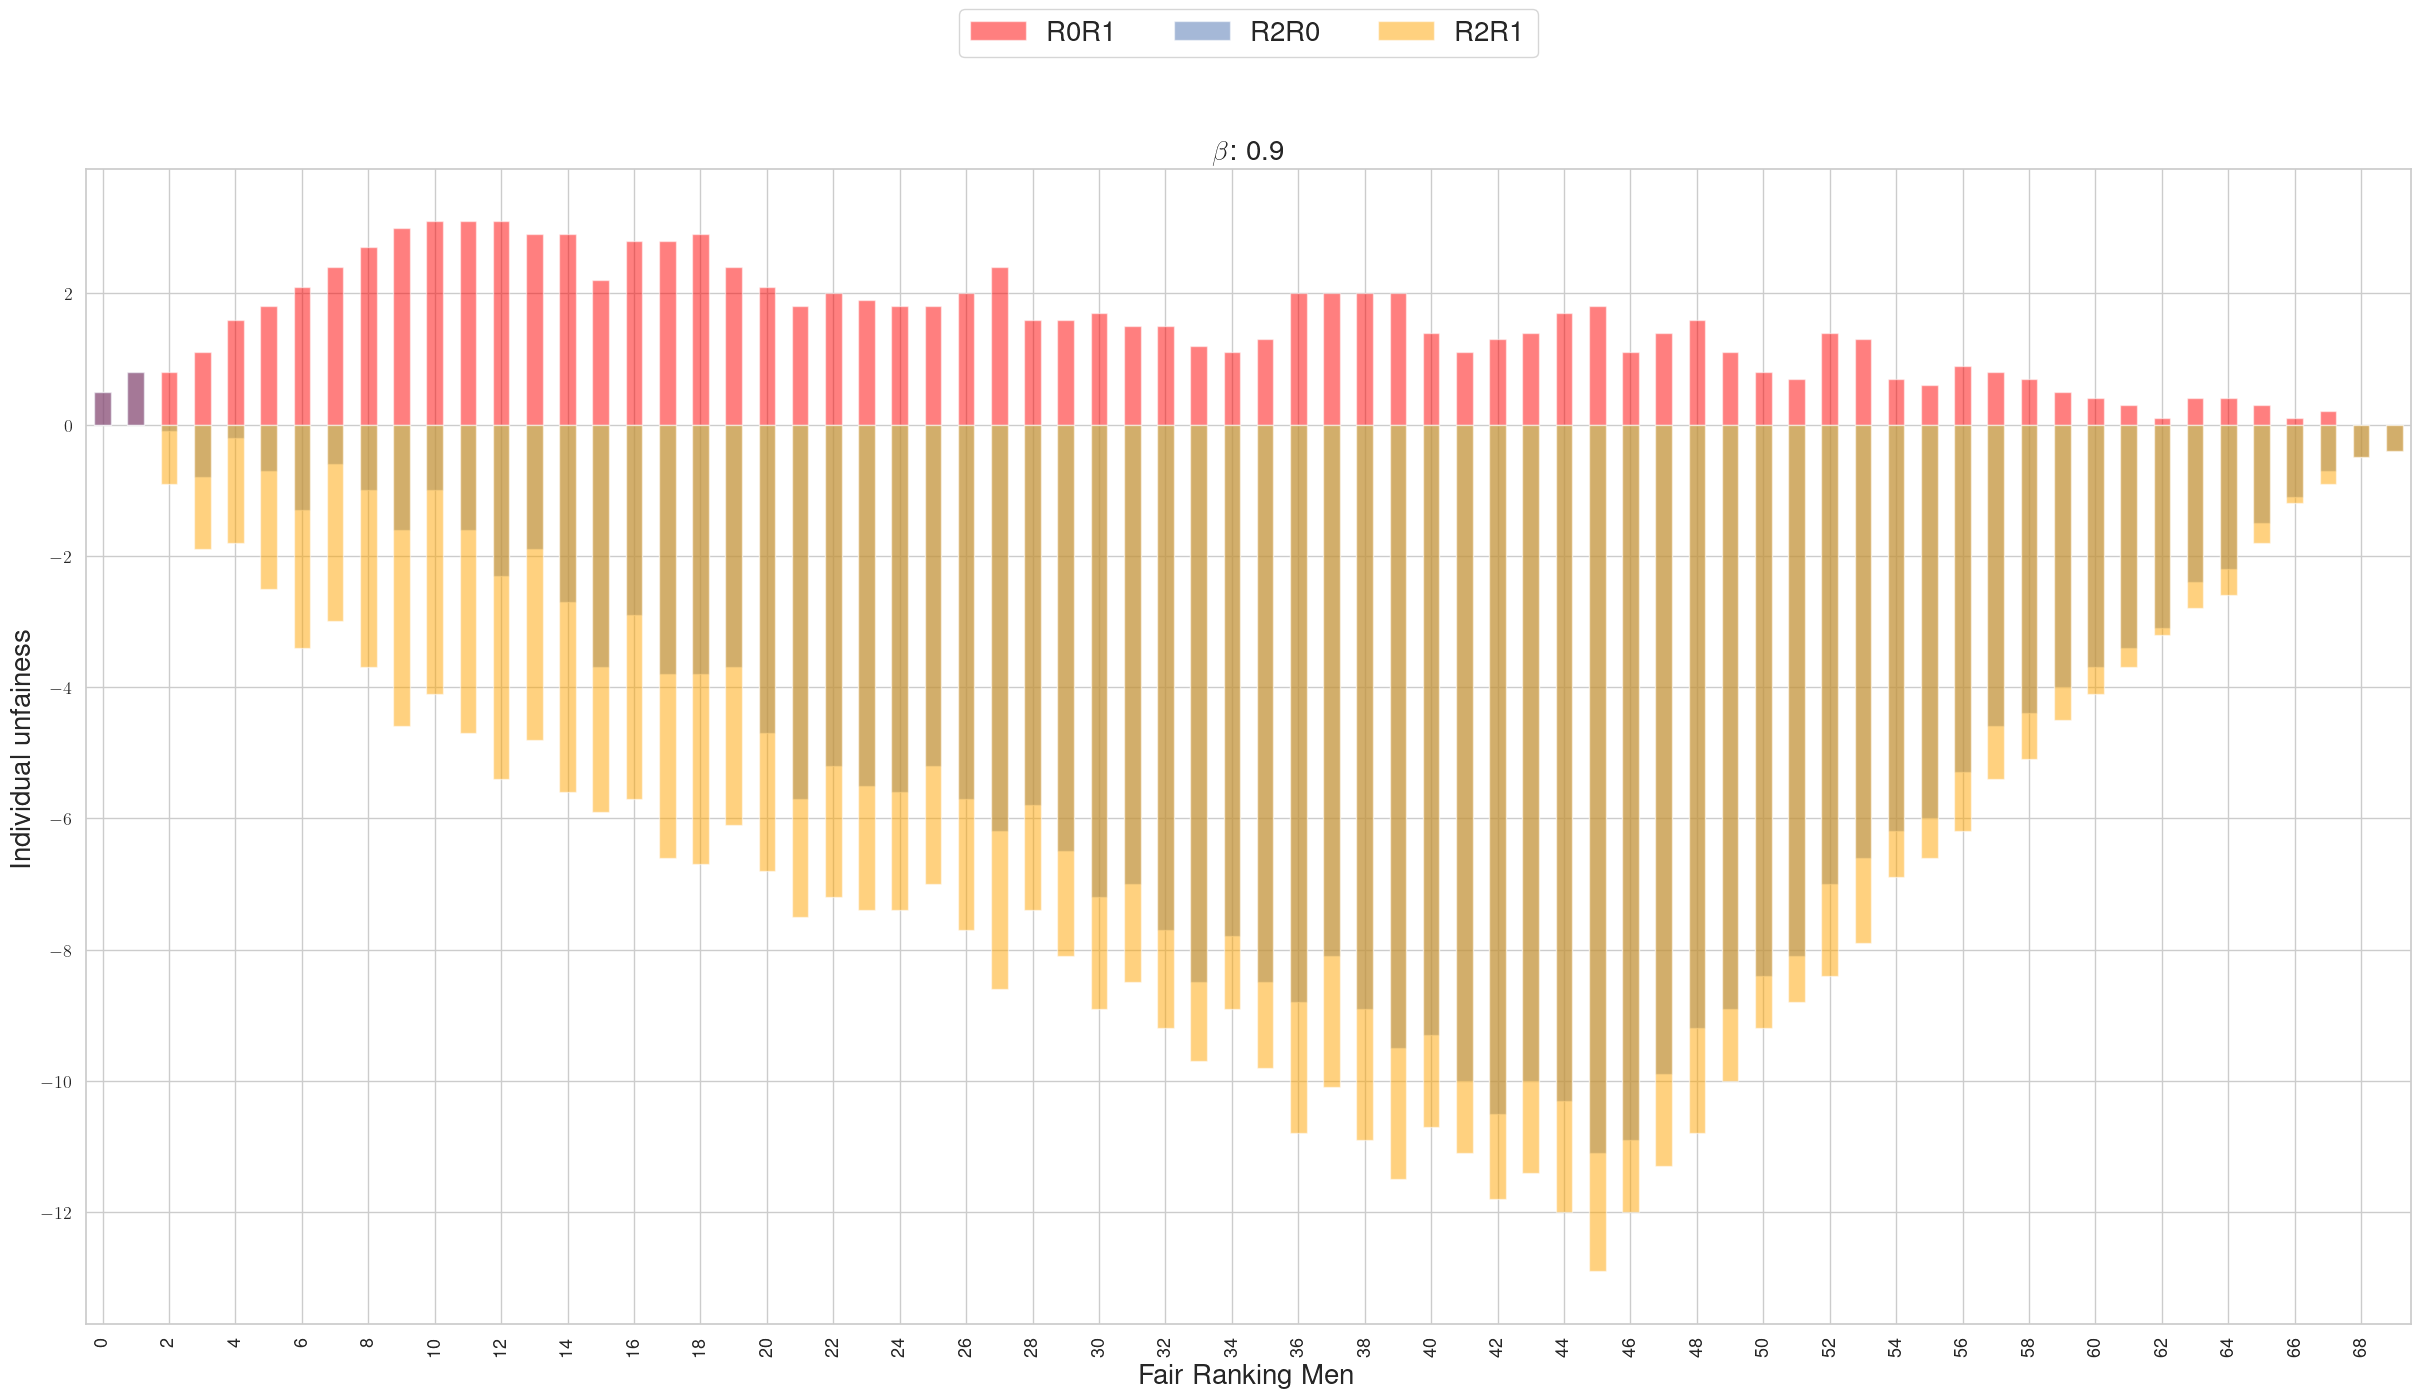

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.99it/s]


Proportion of Women: 0.5


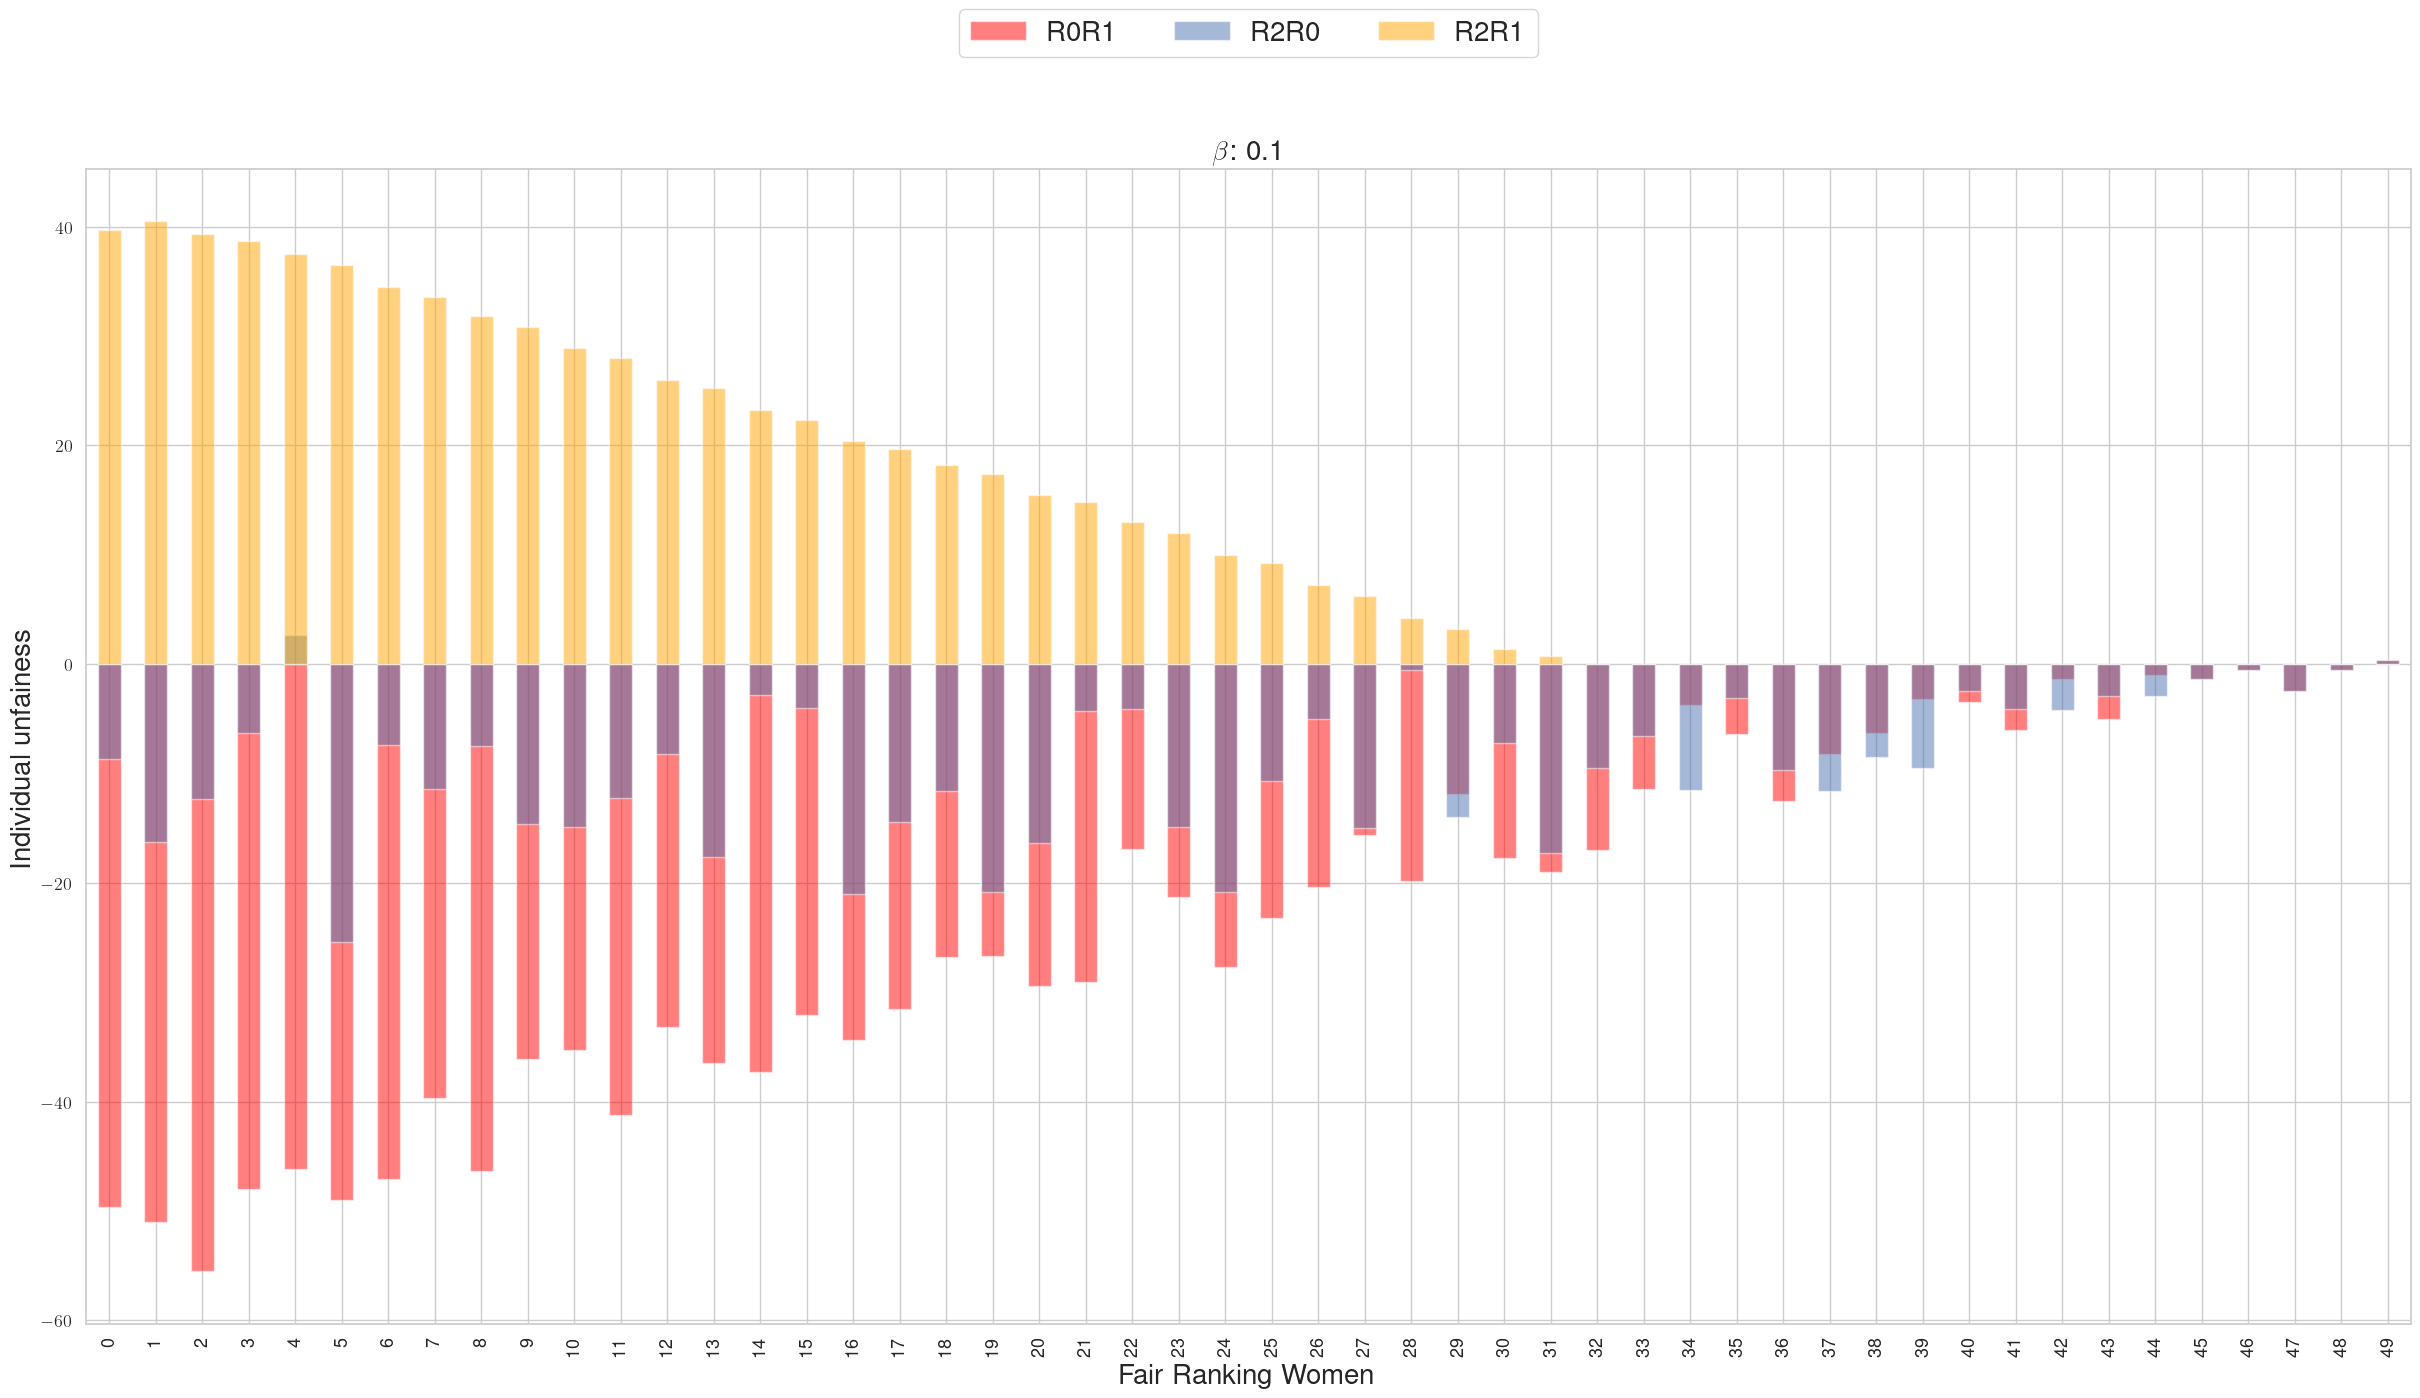

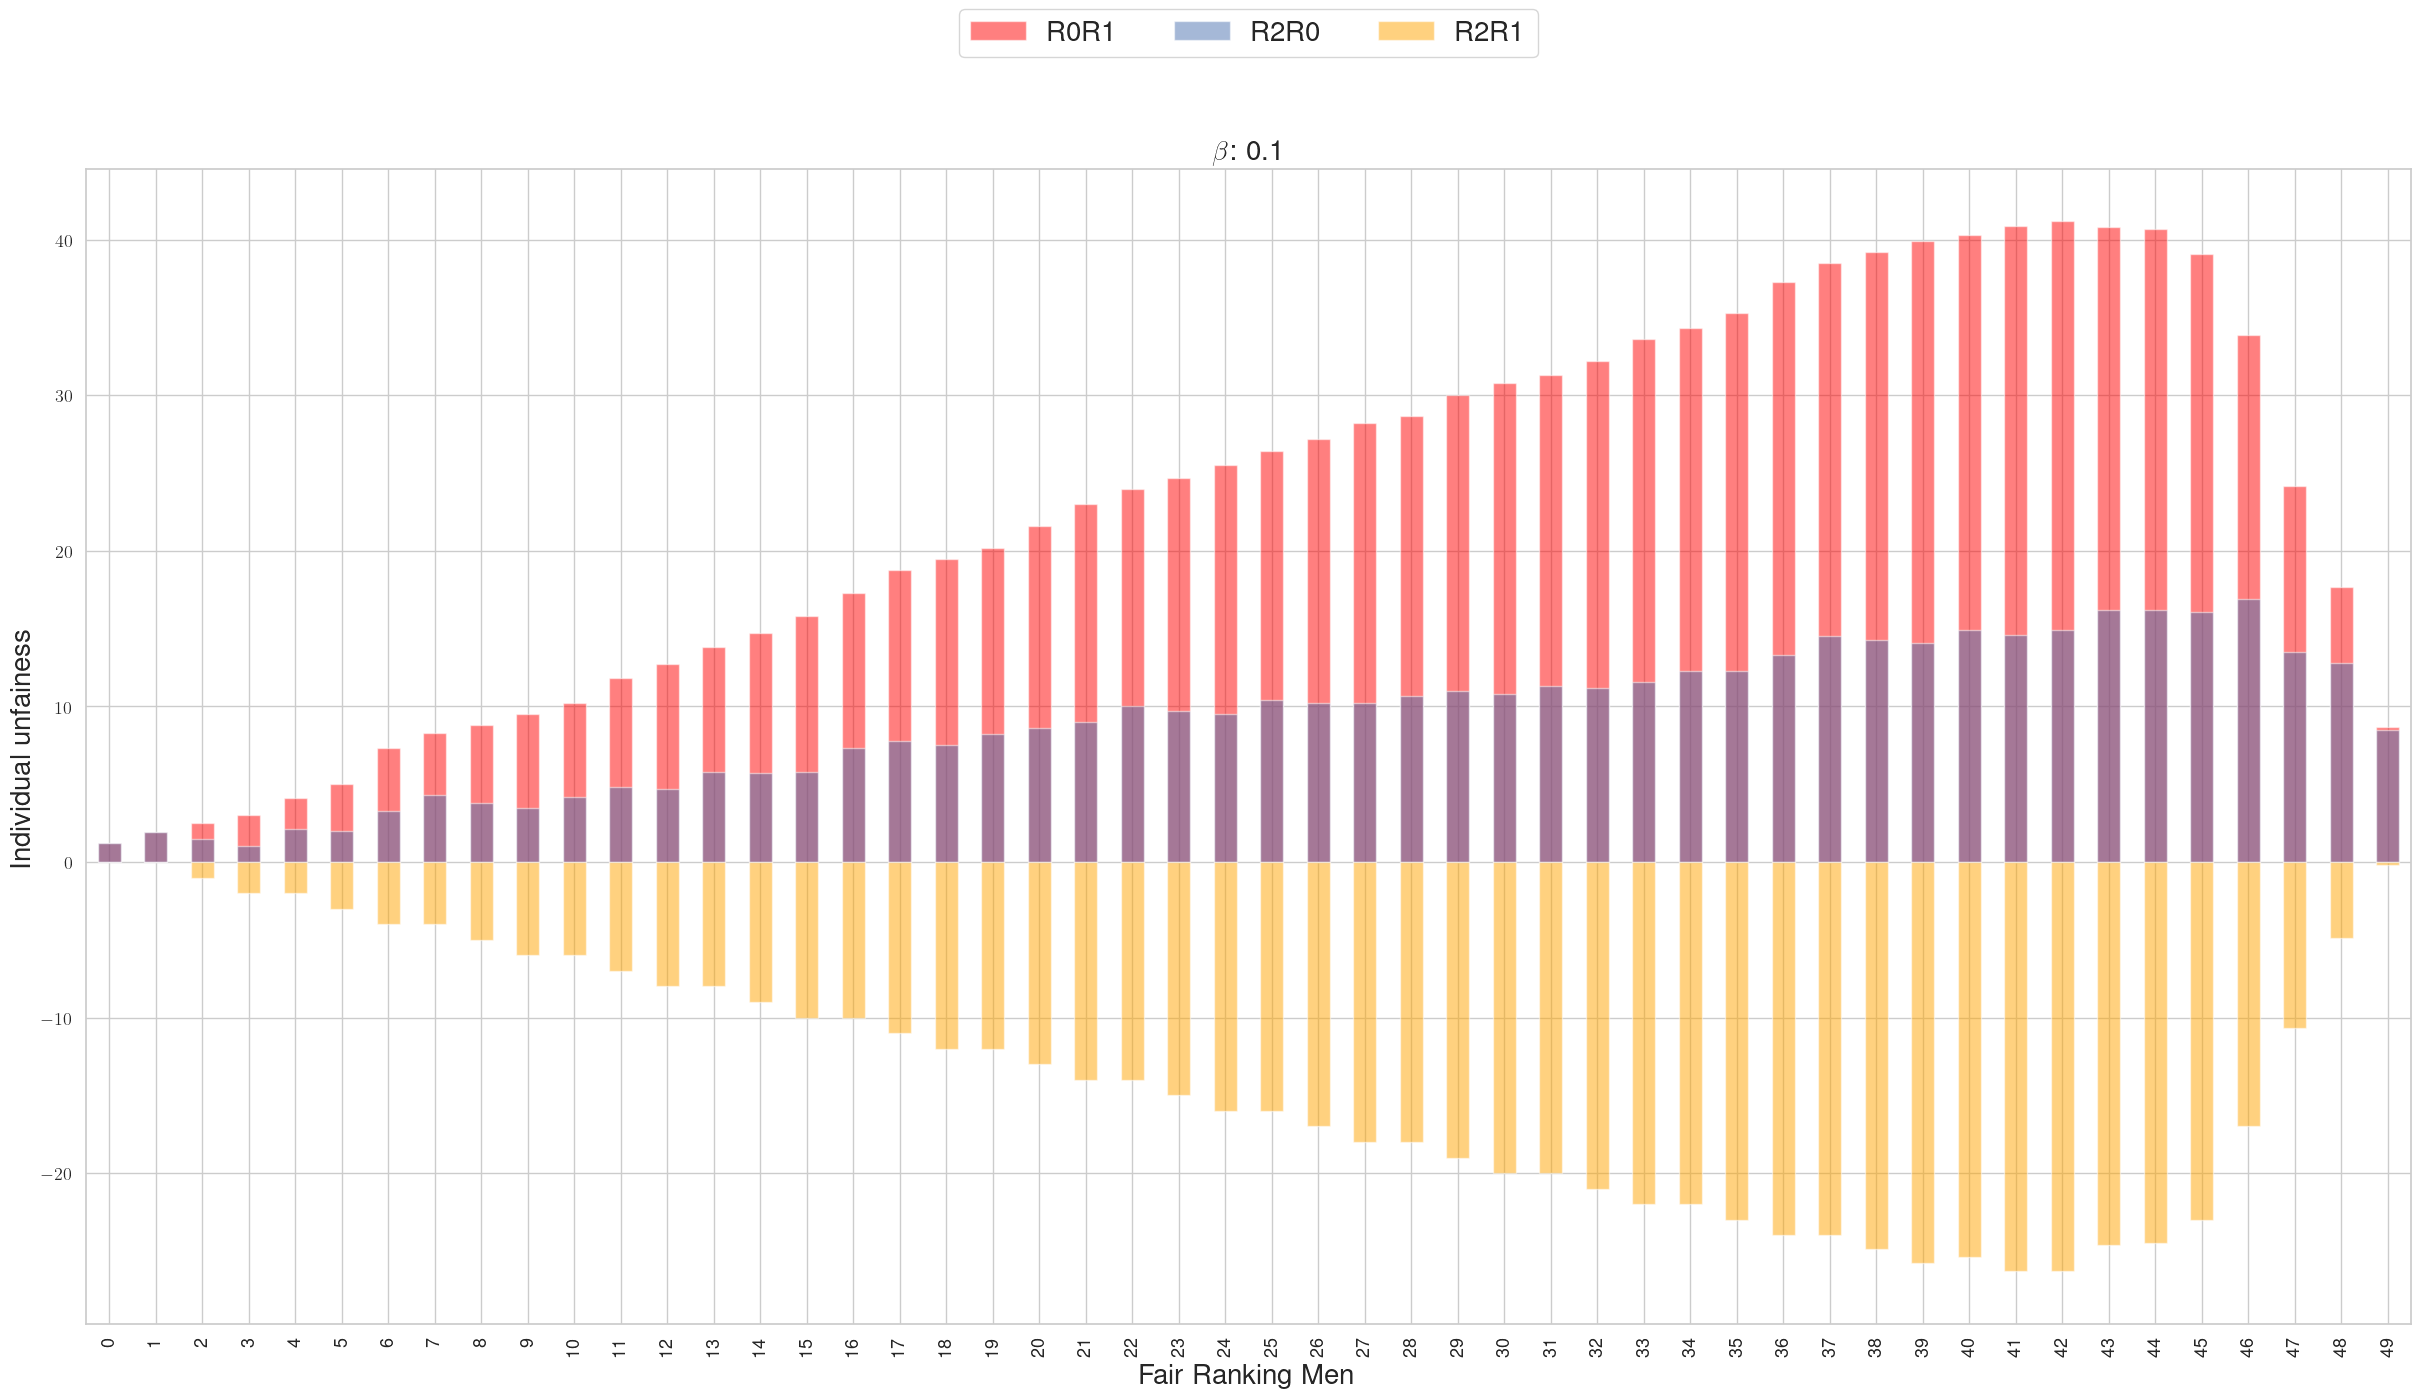

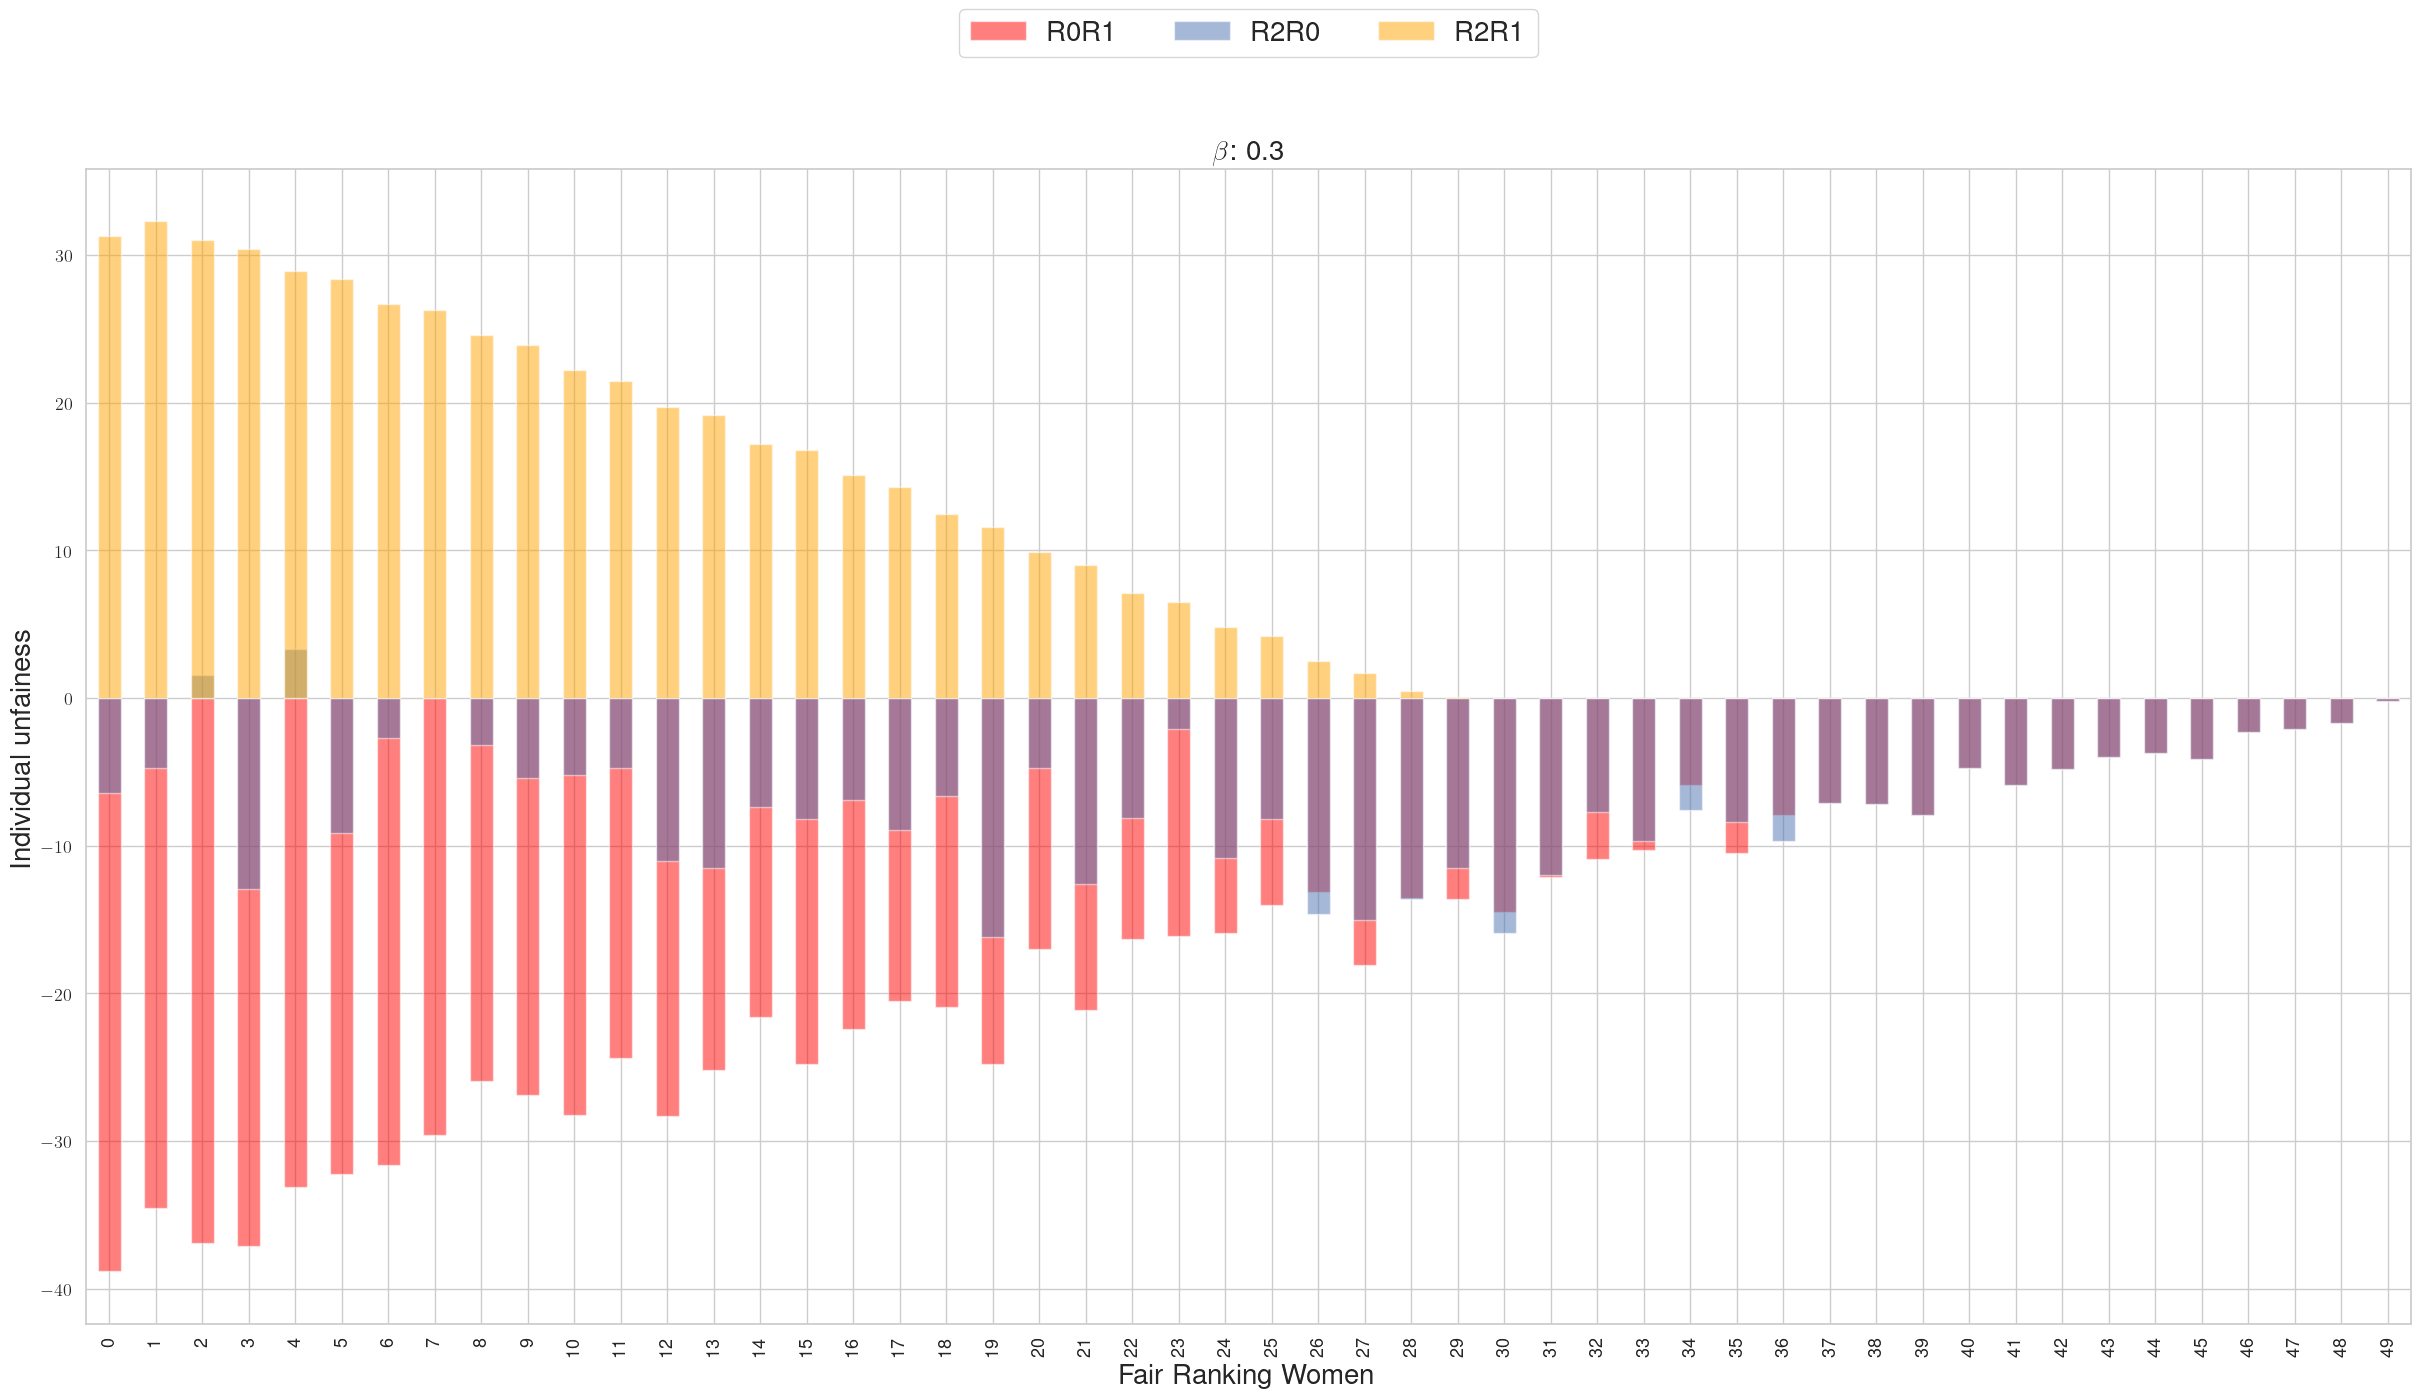

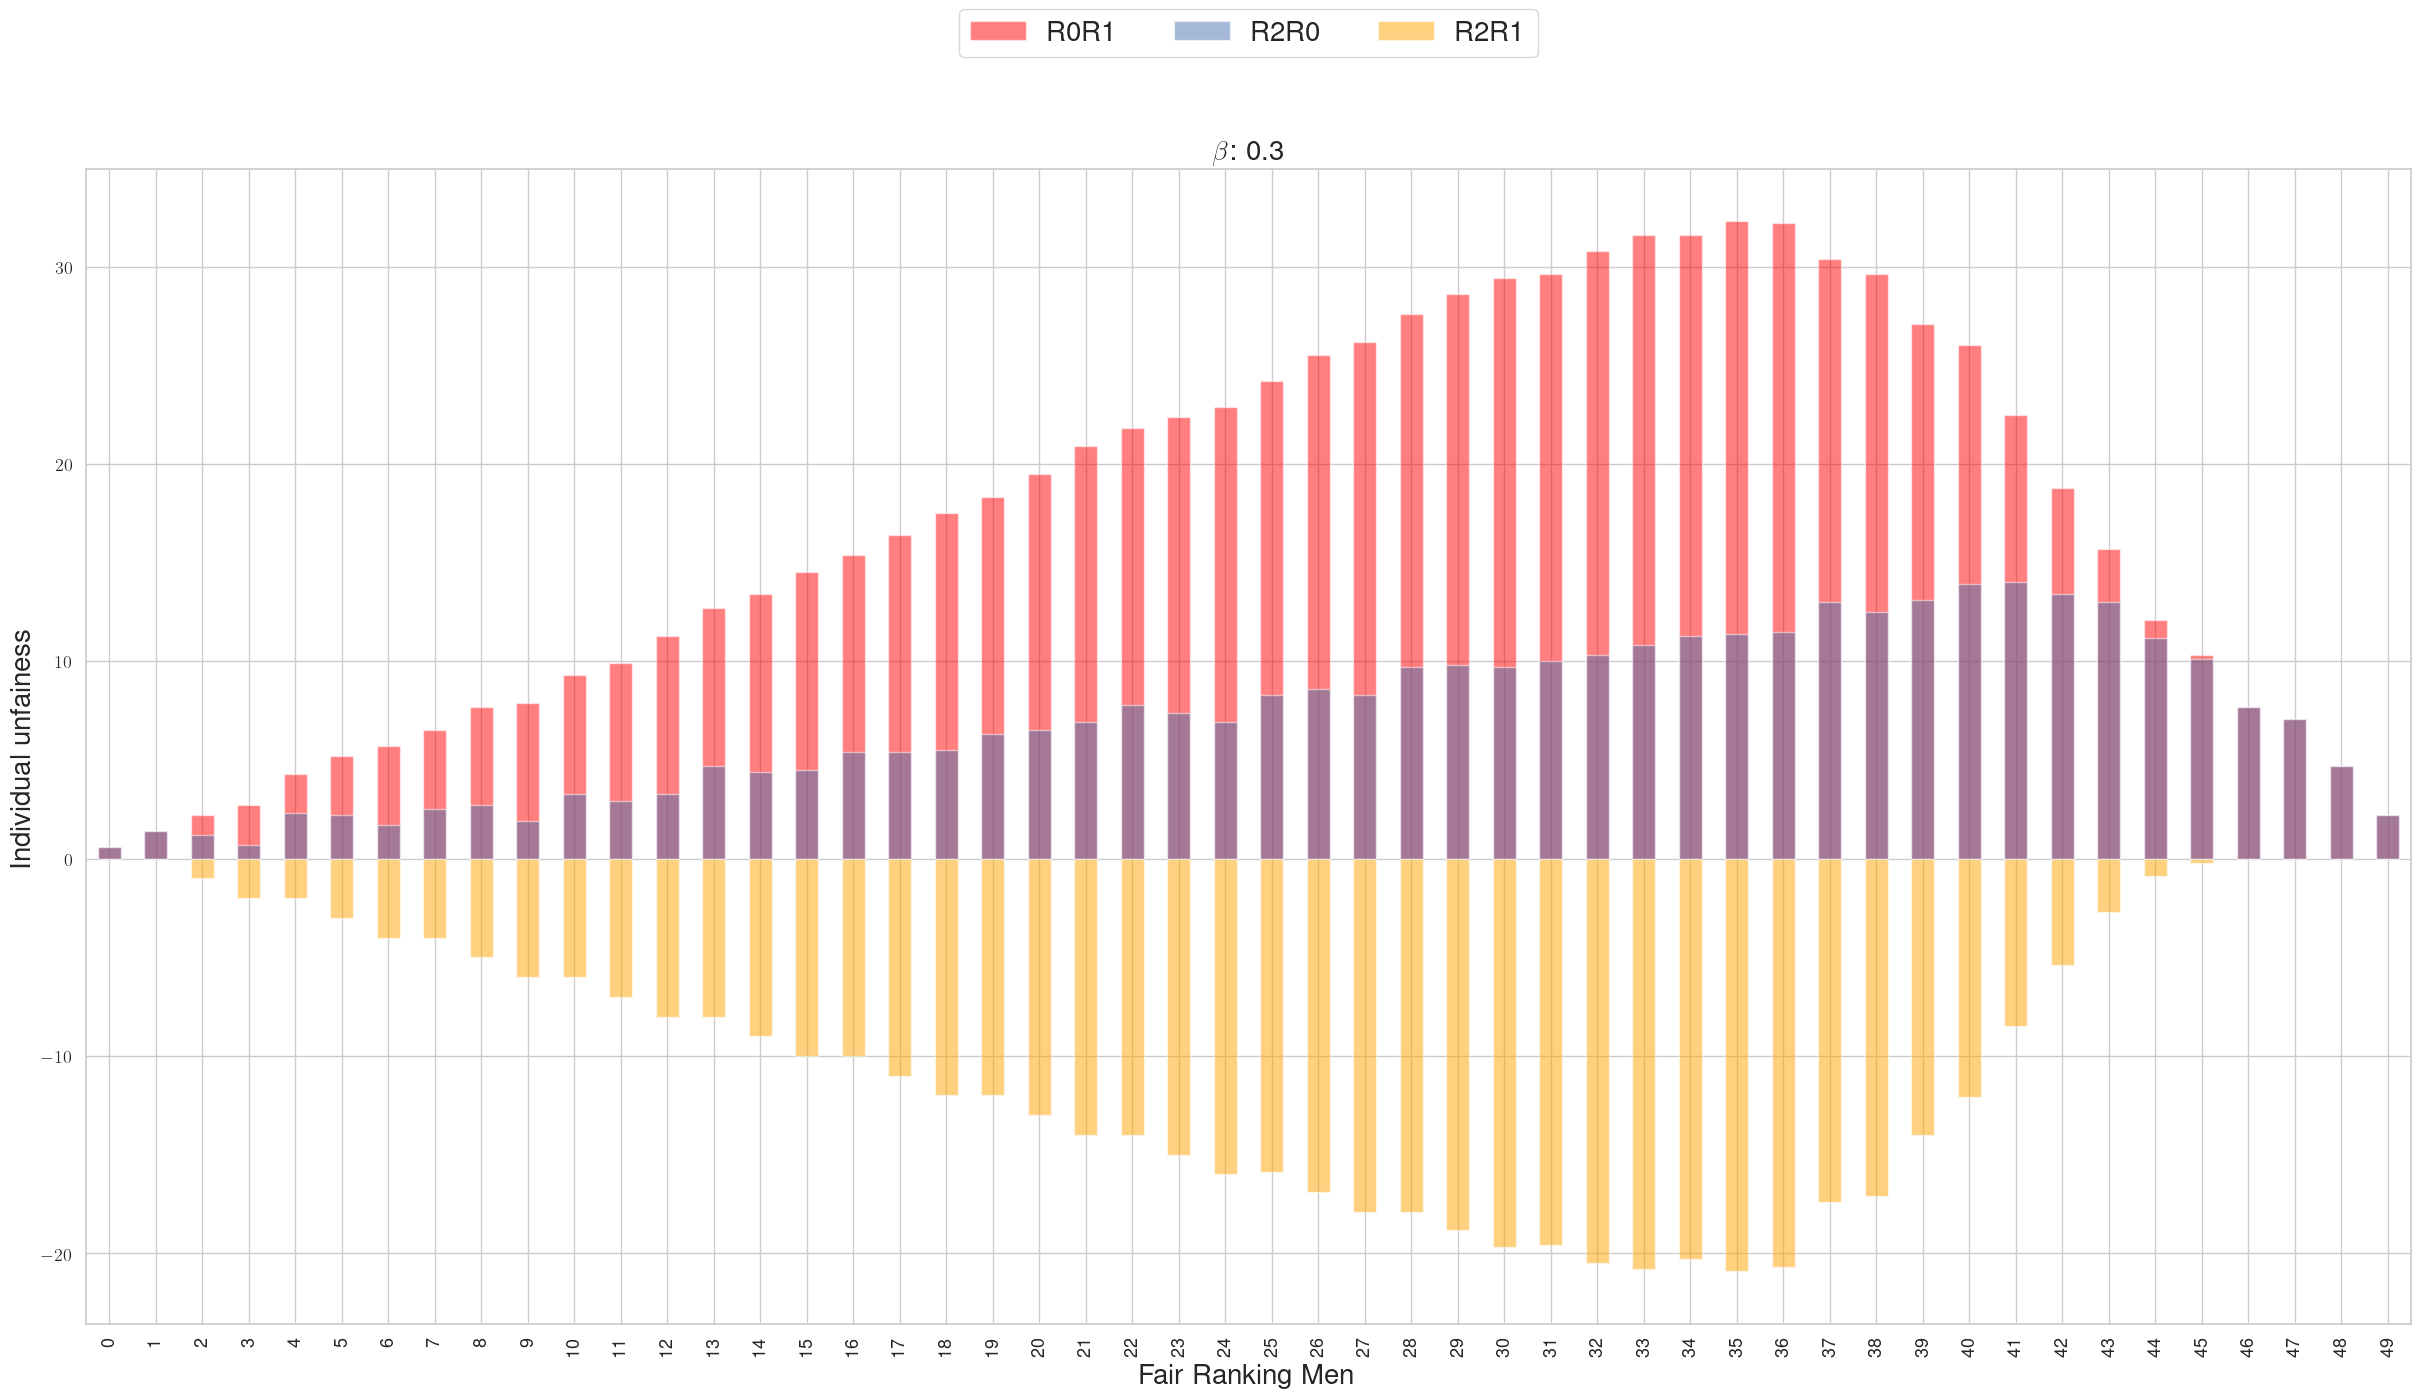

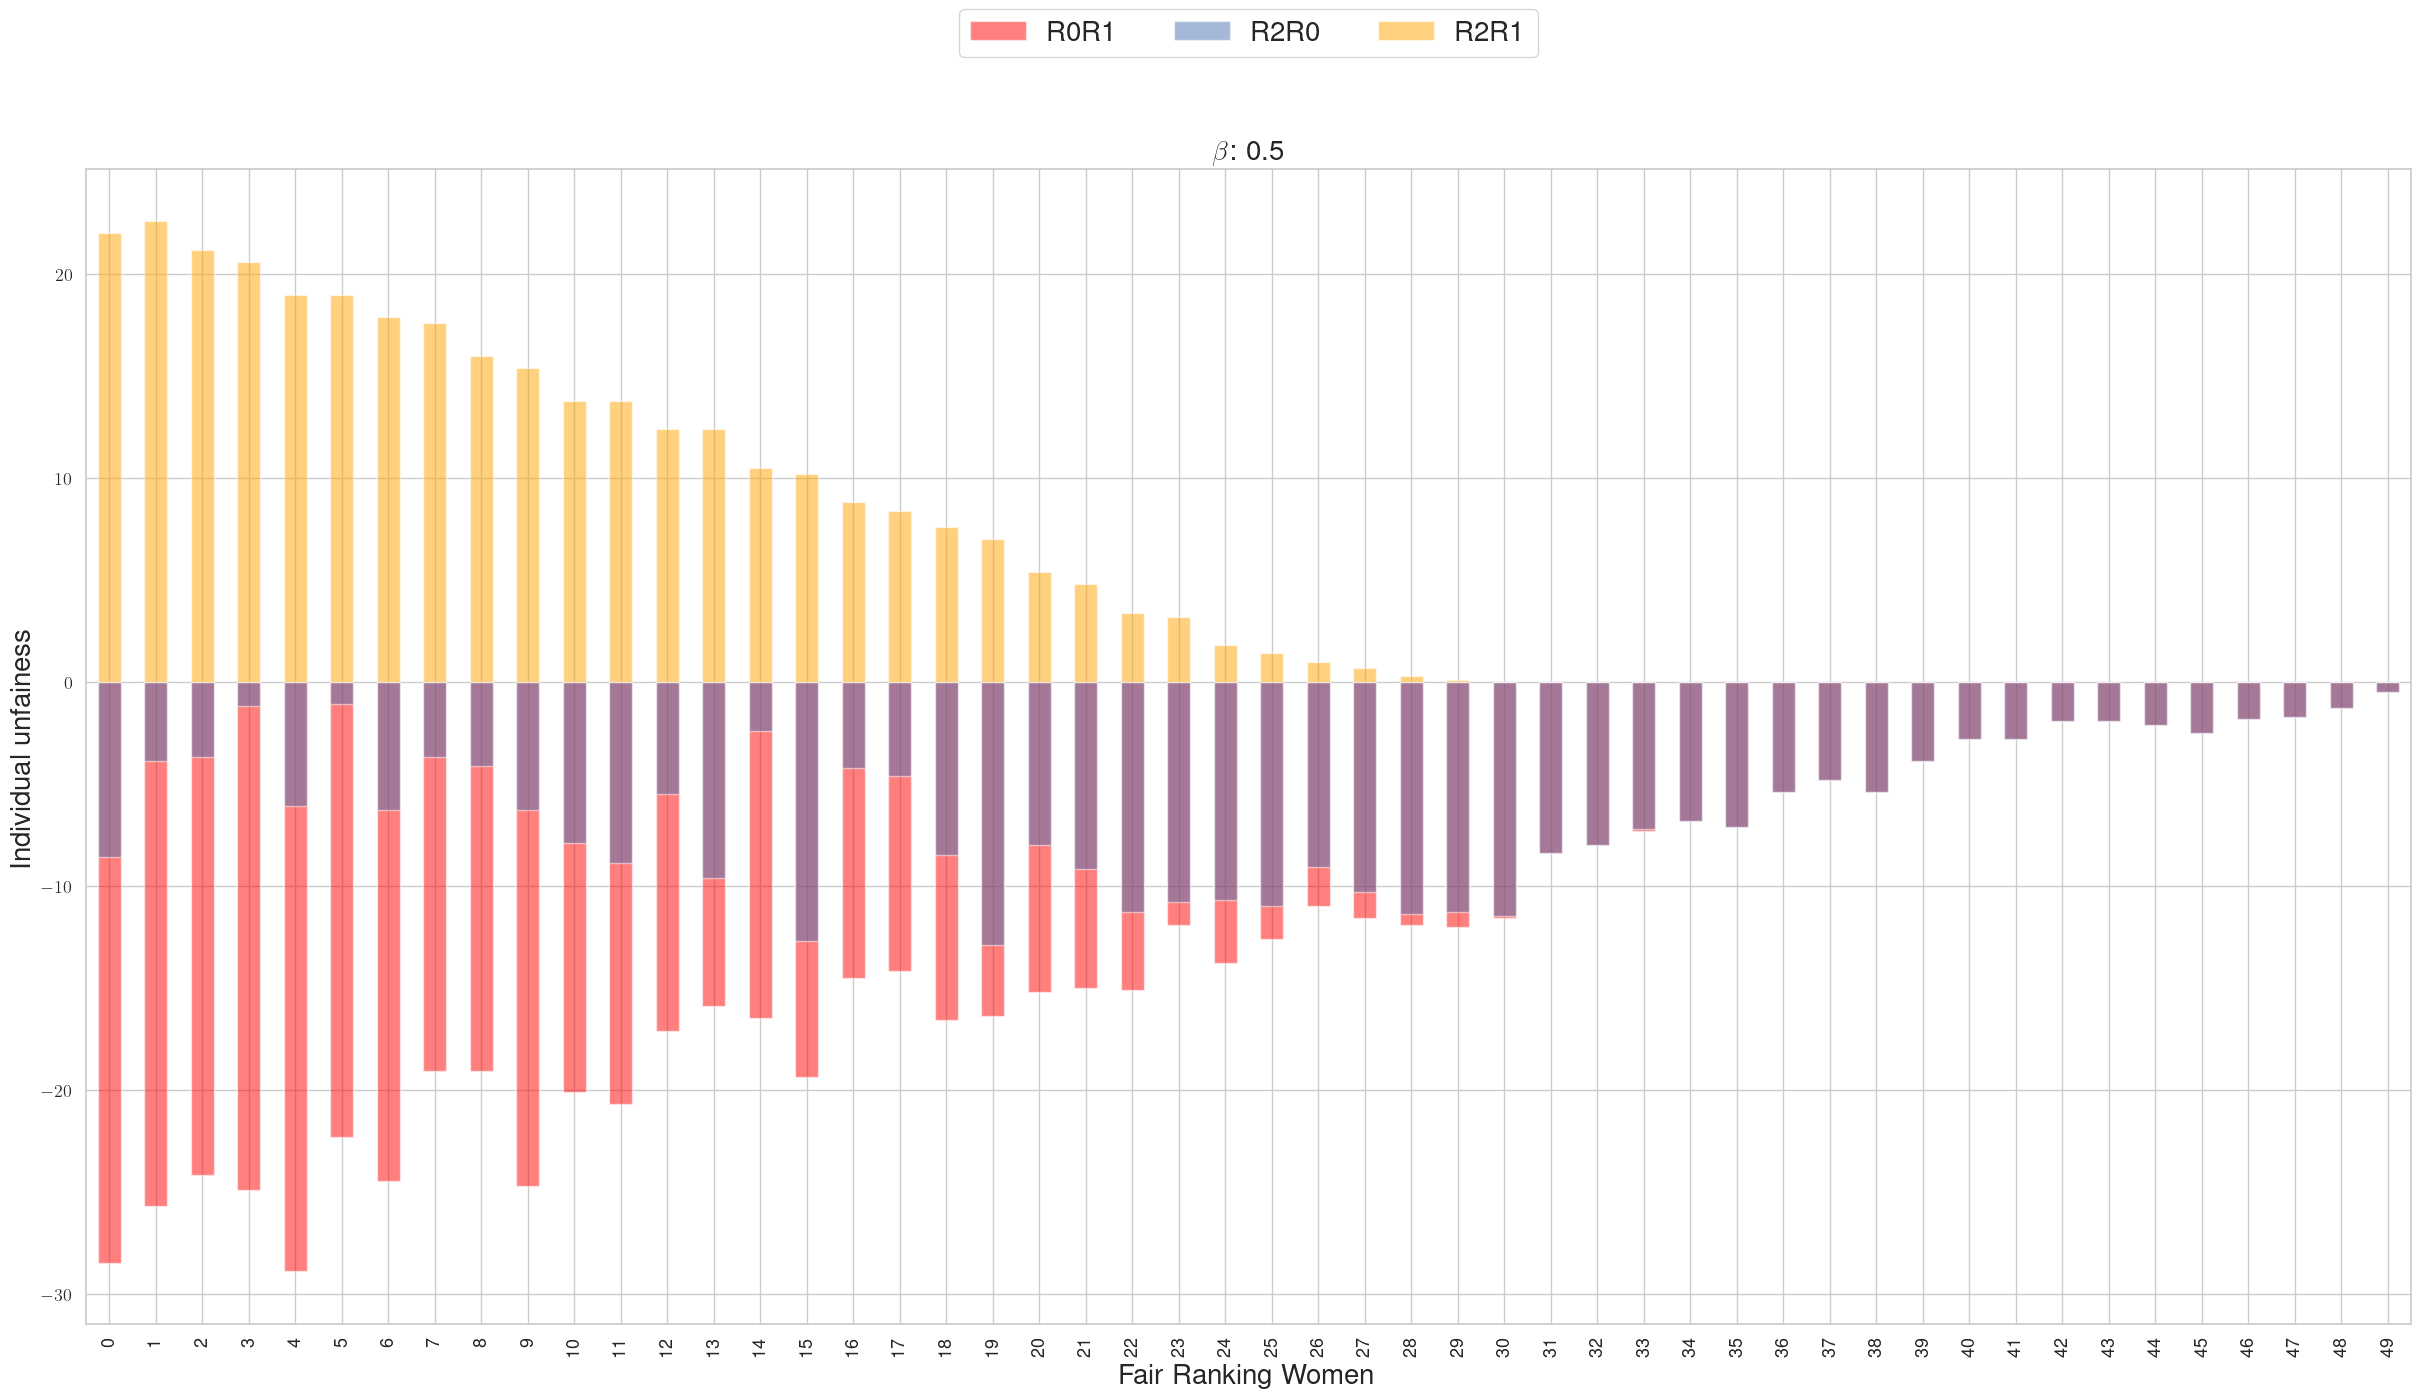

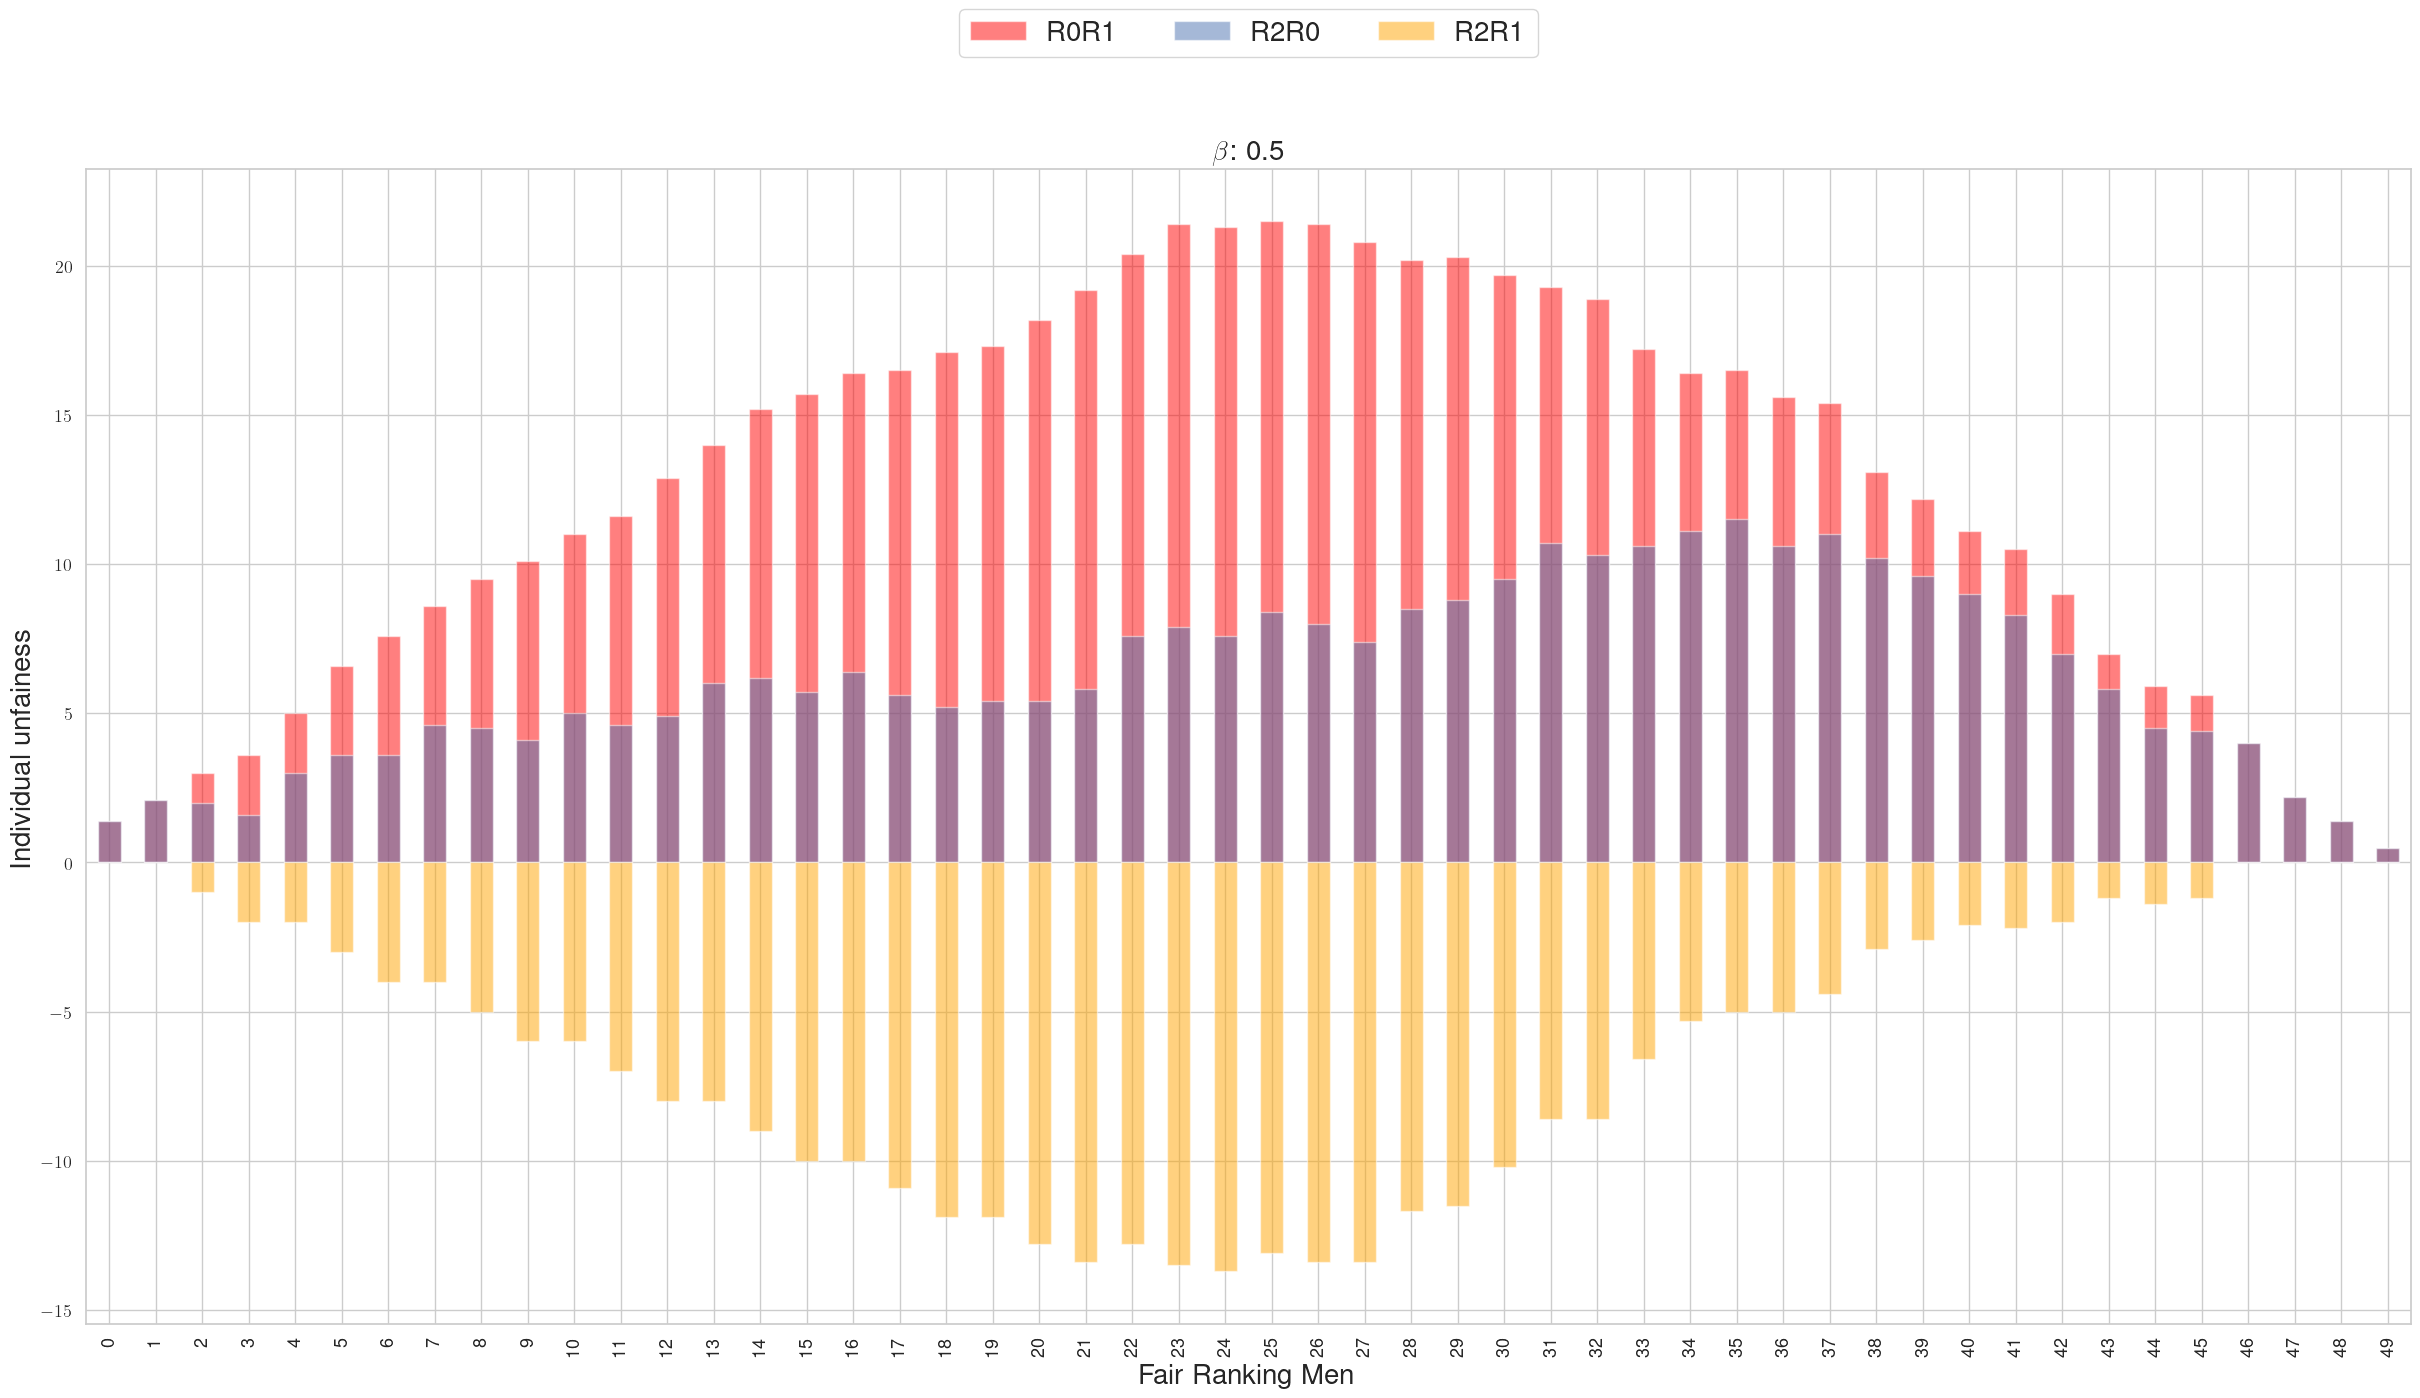

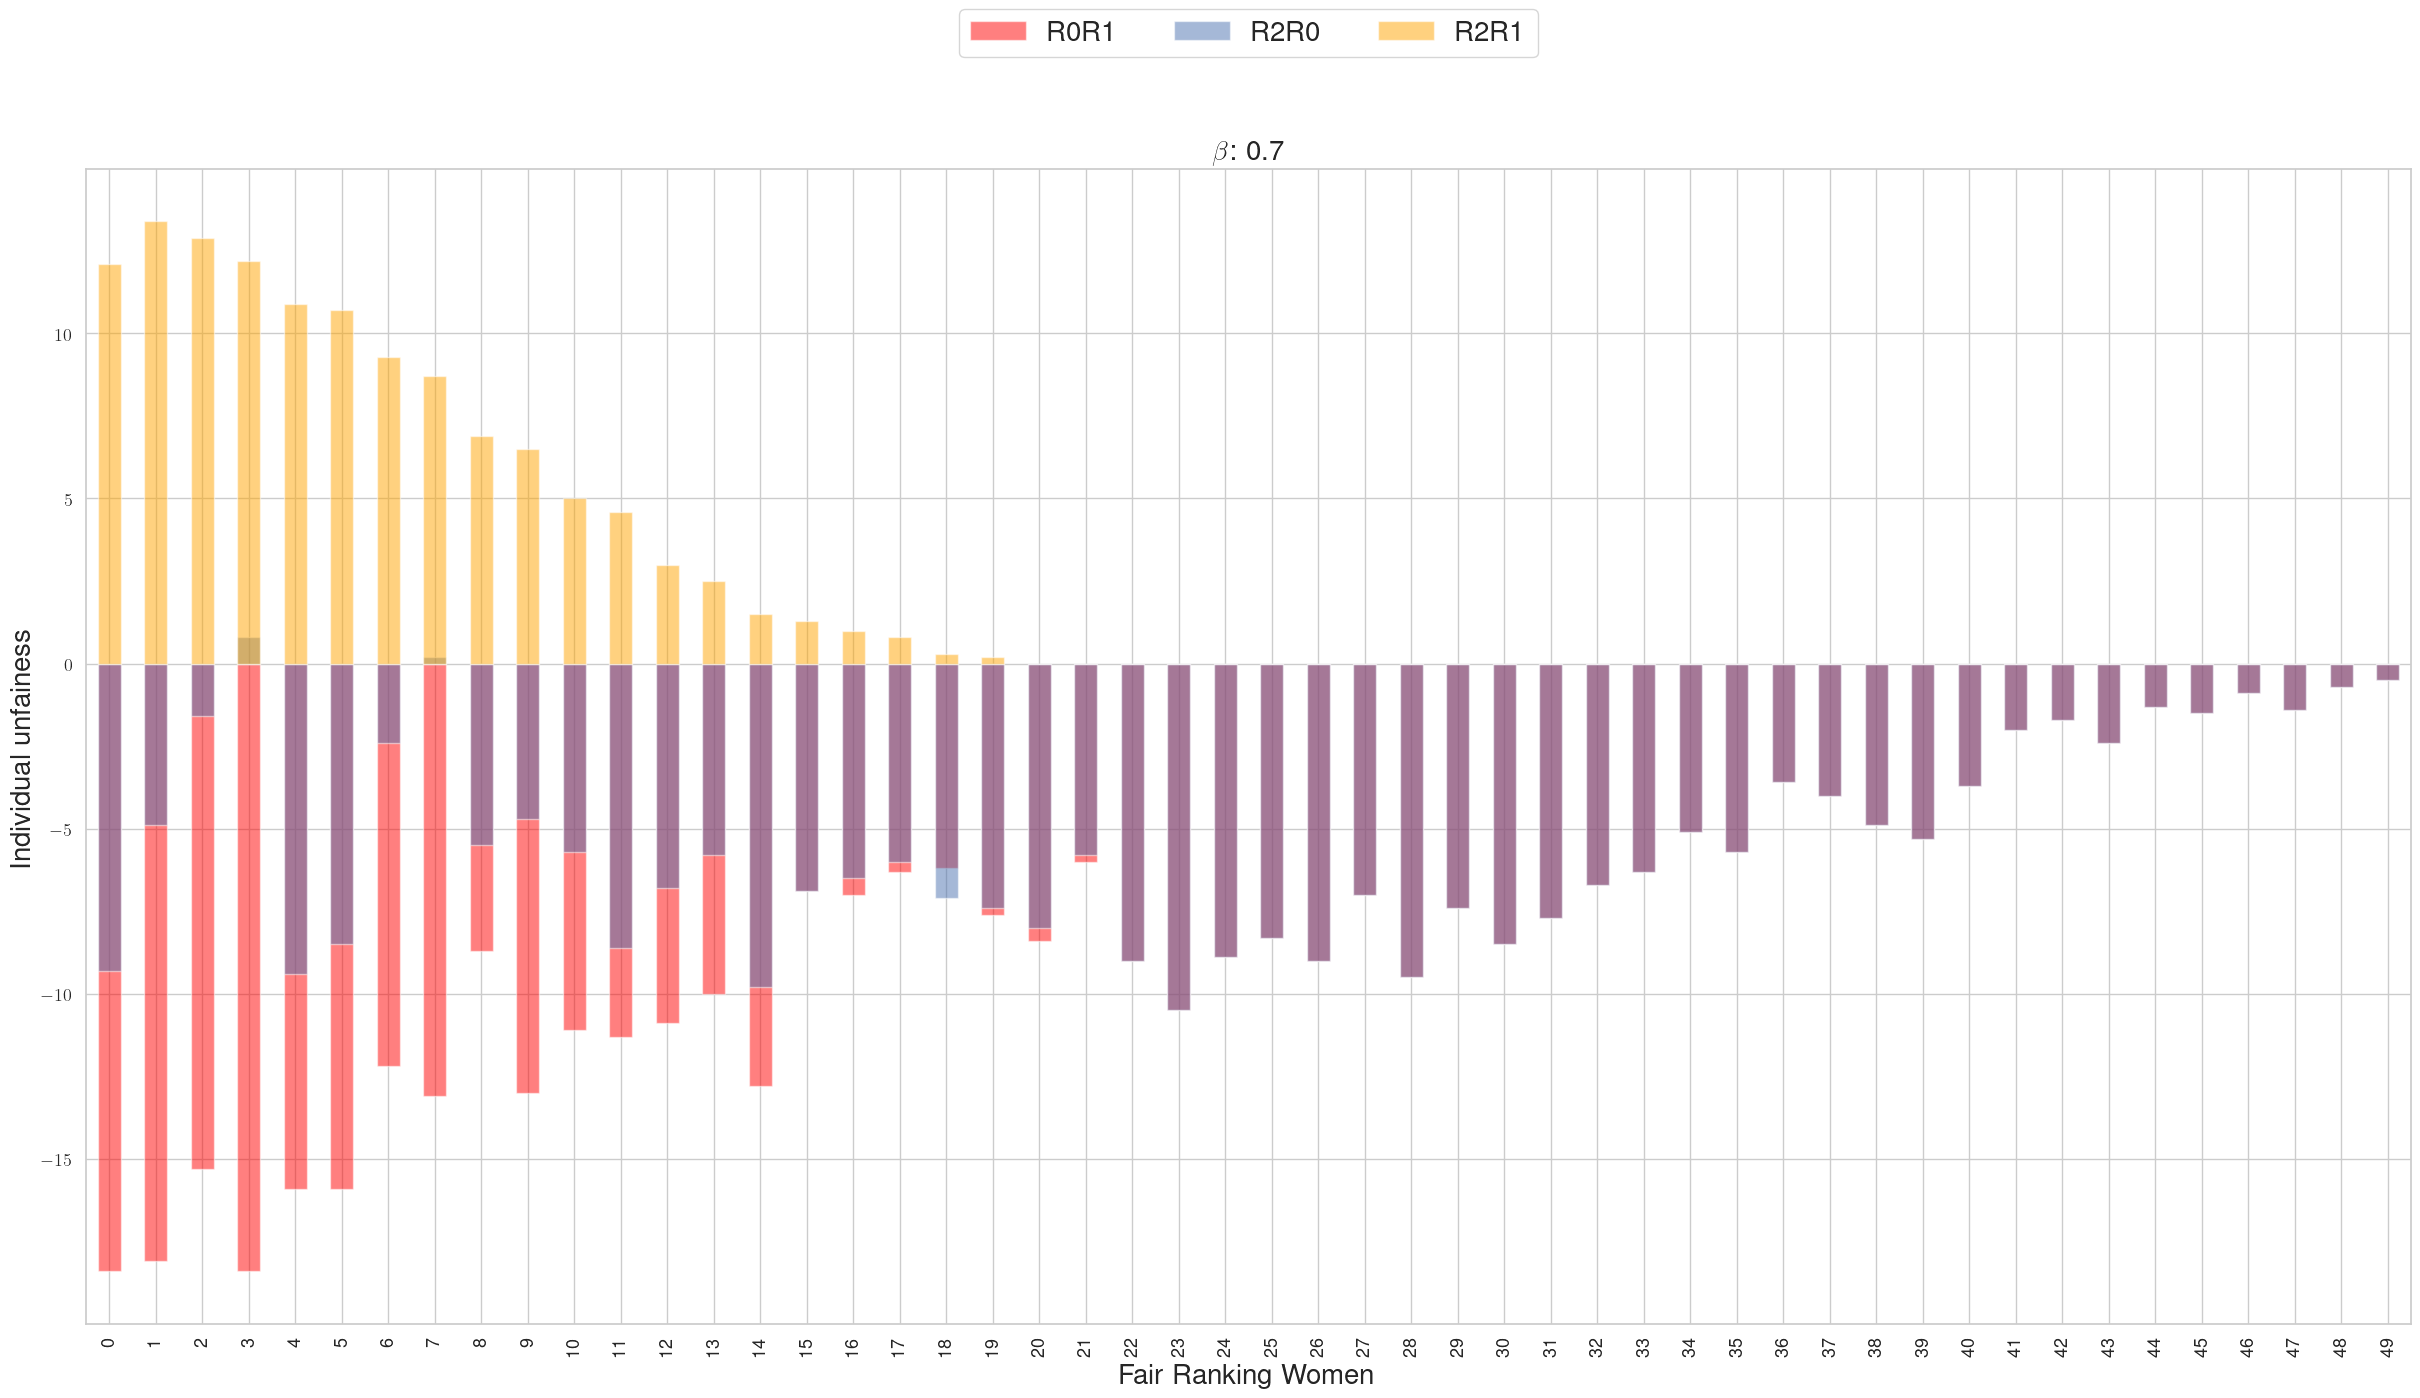

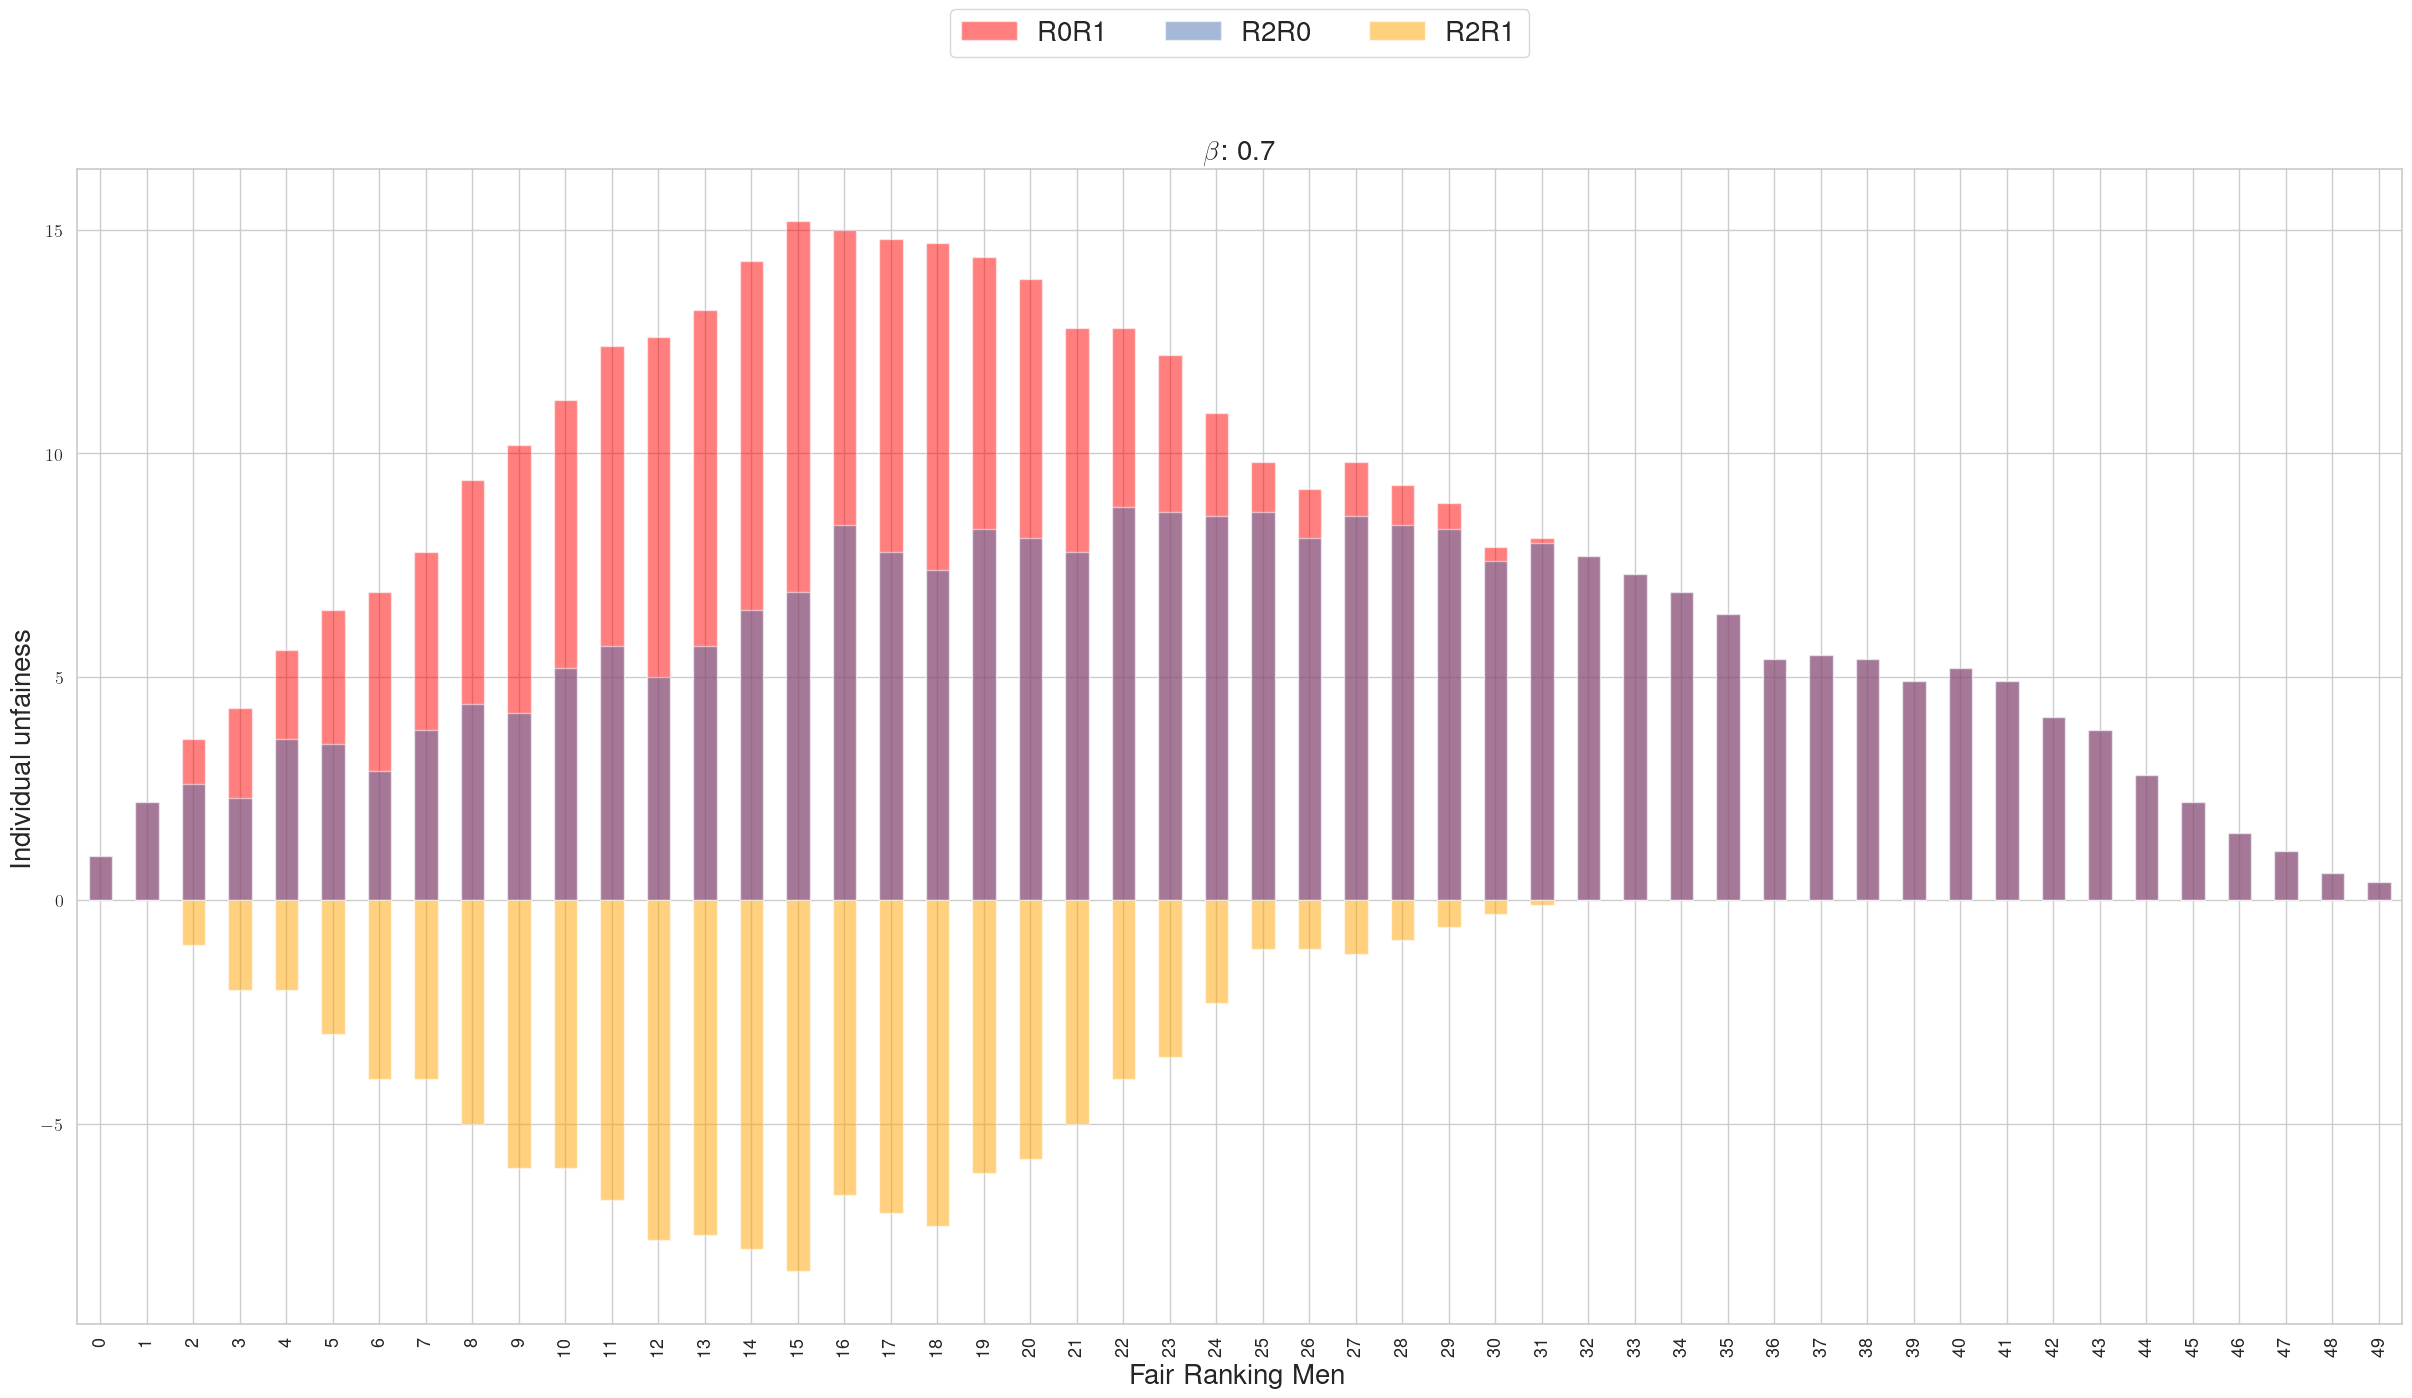

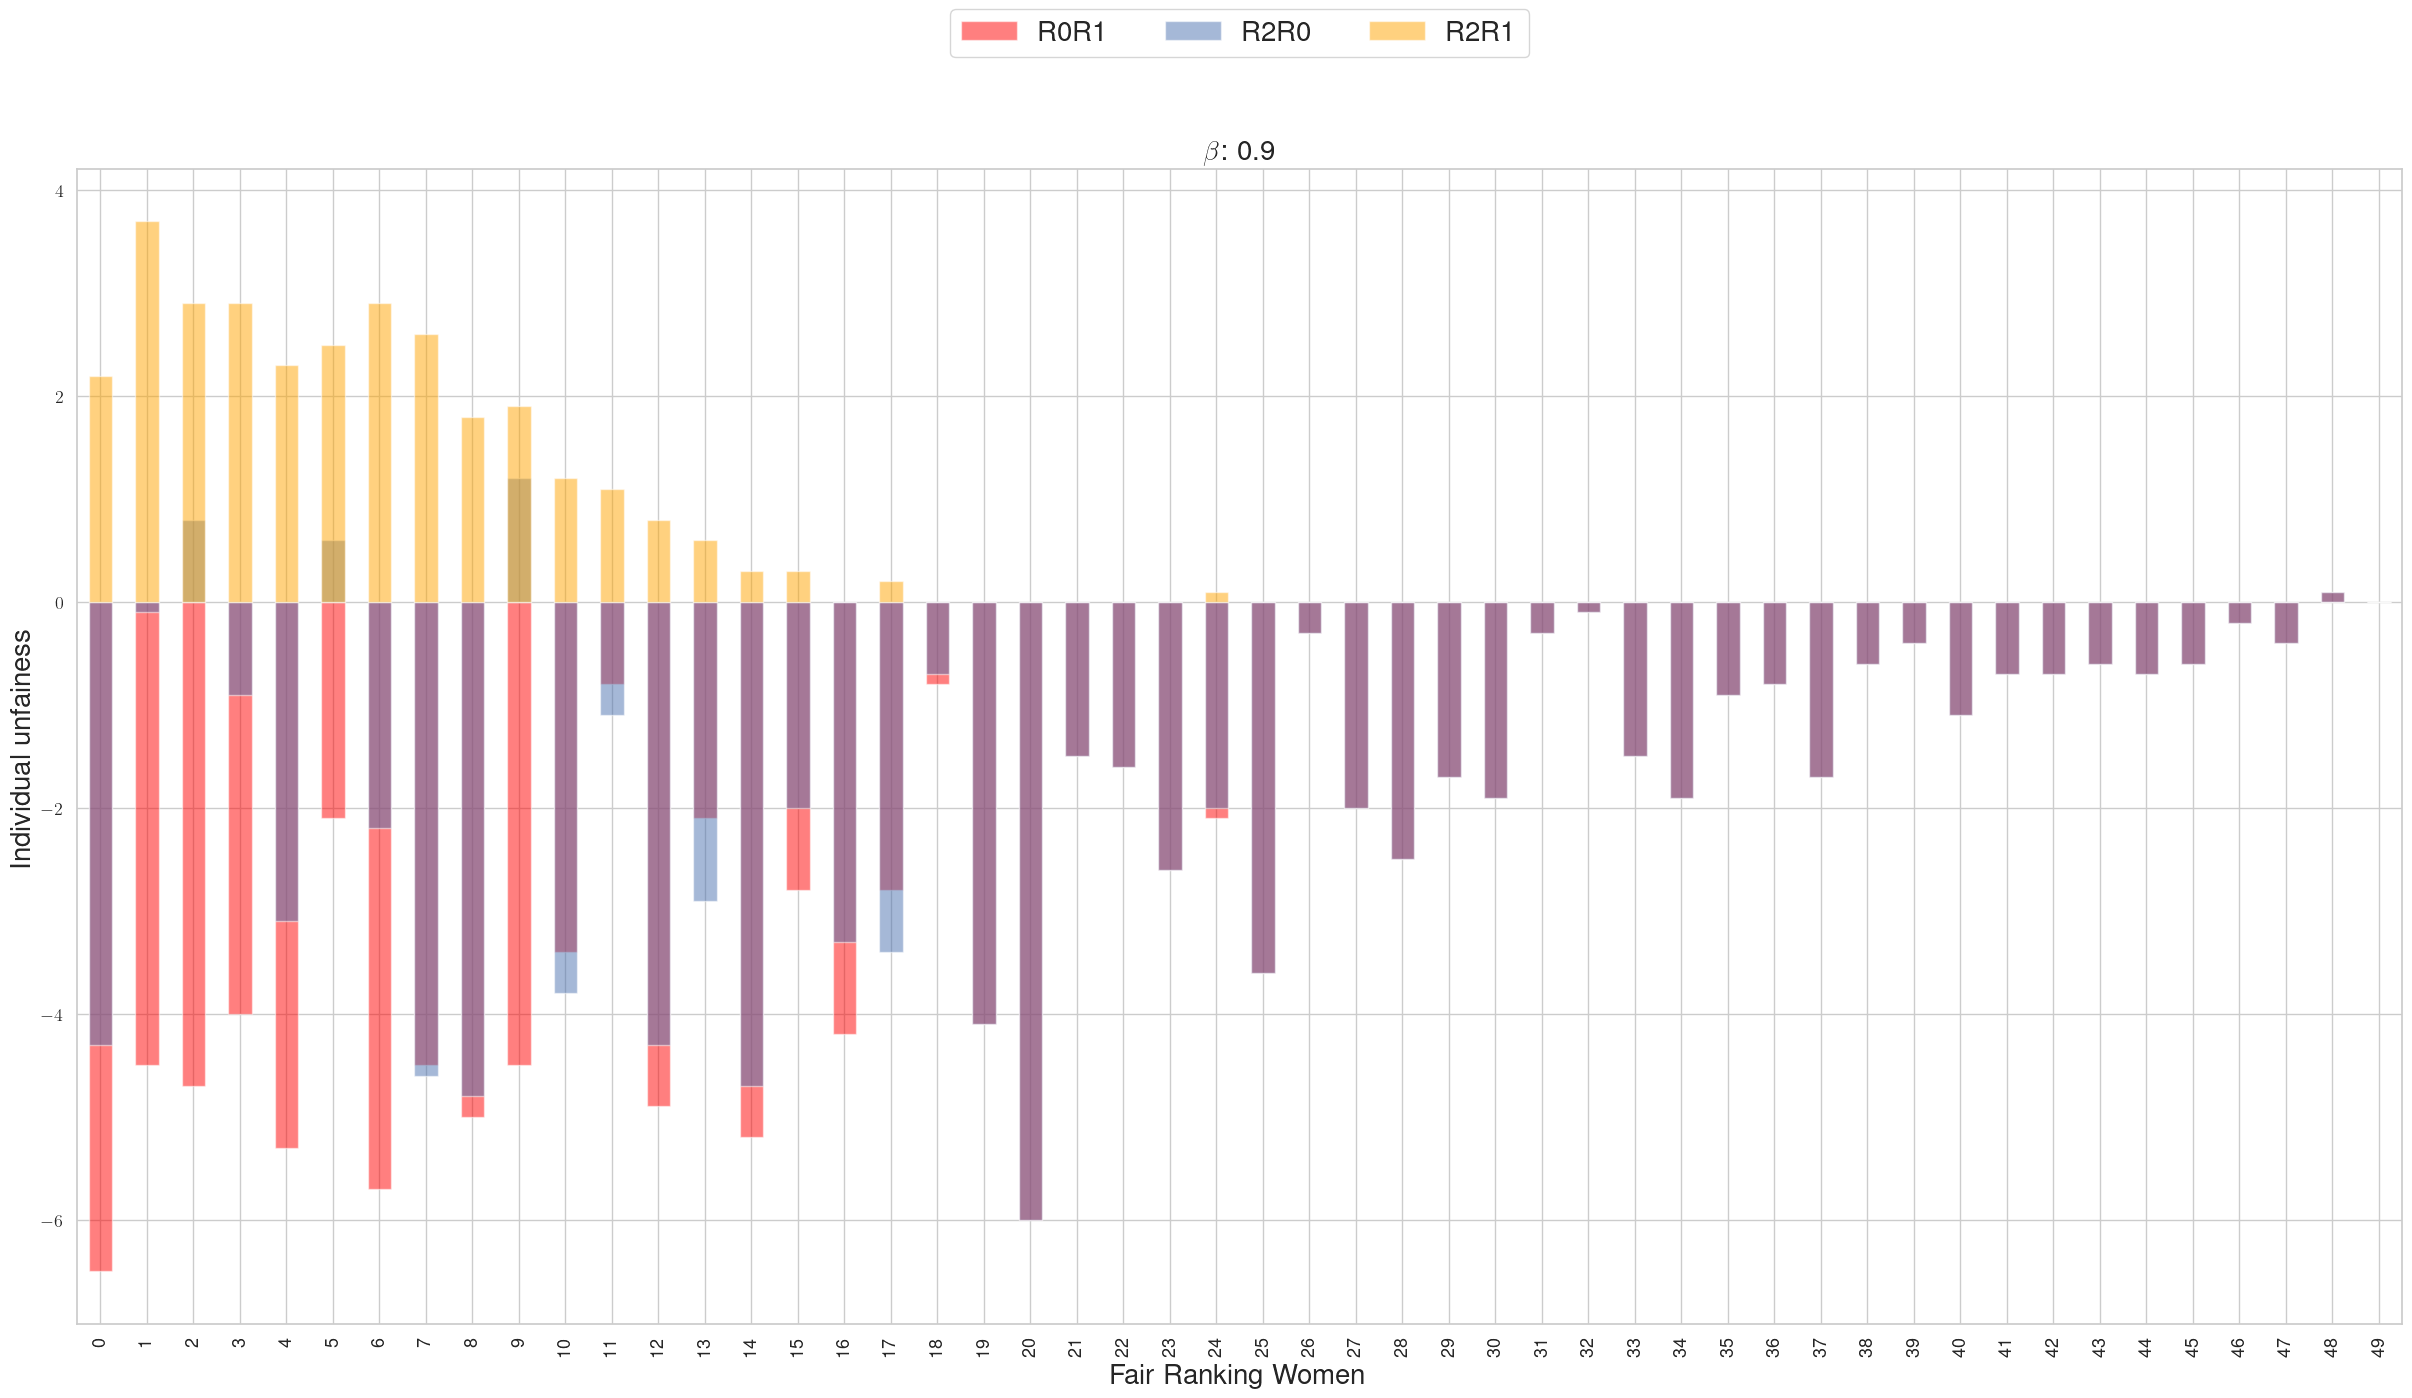

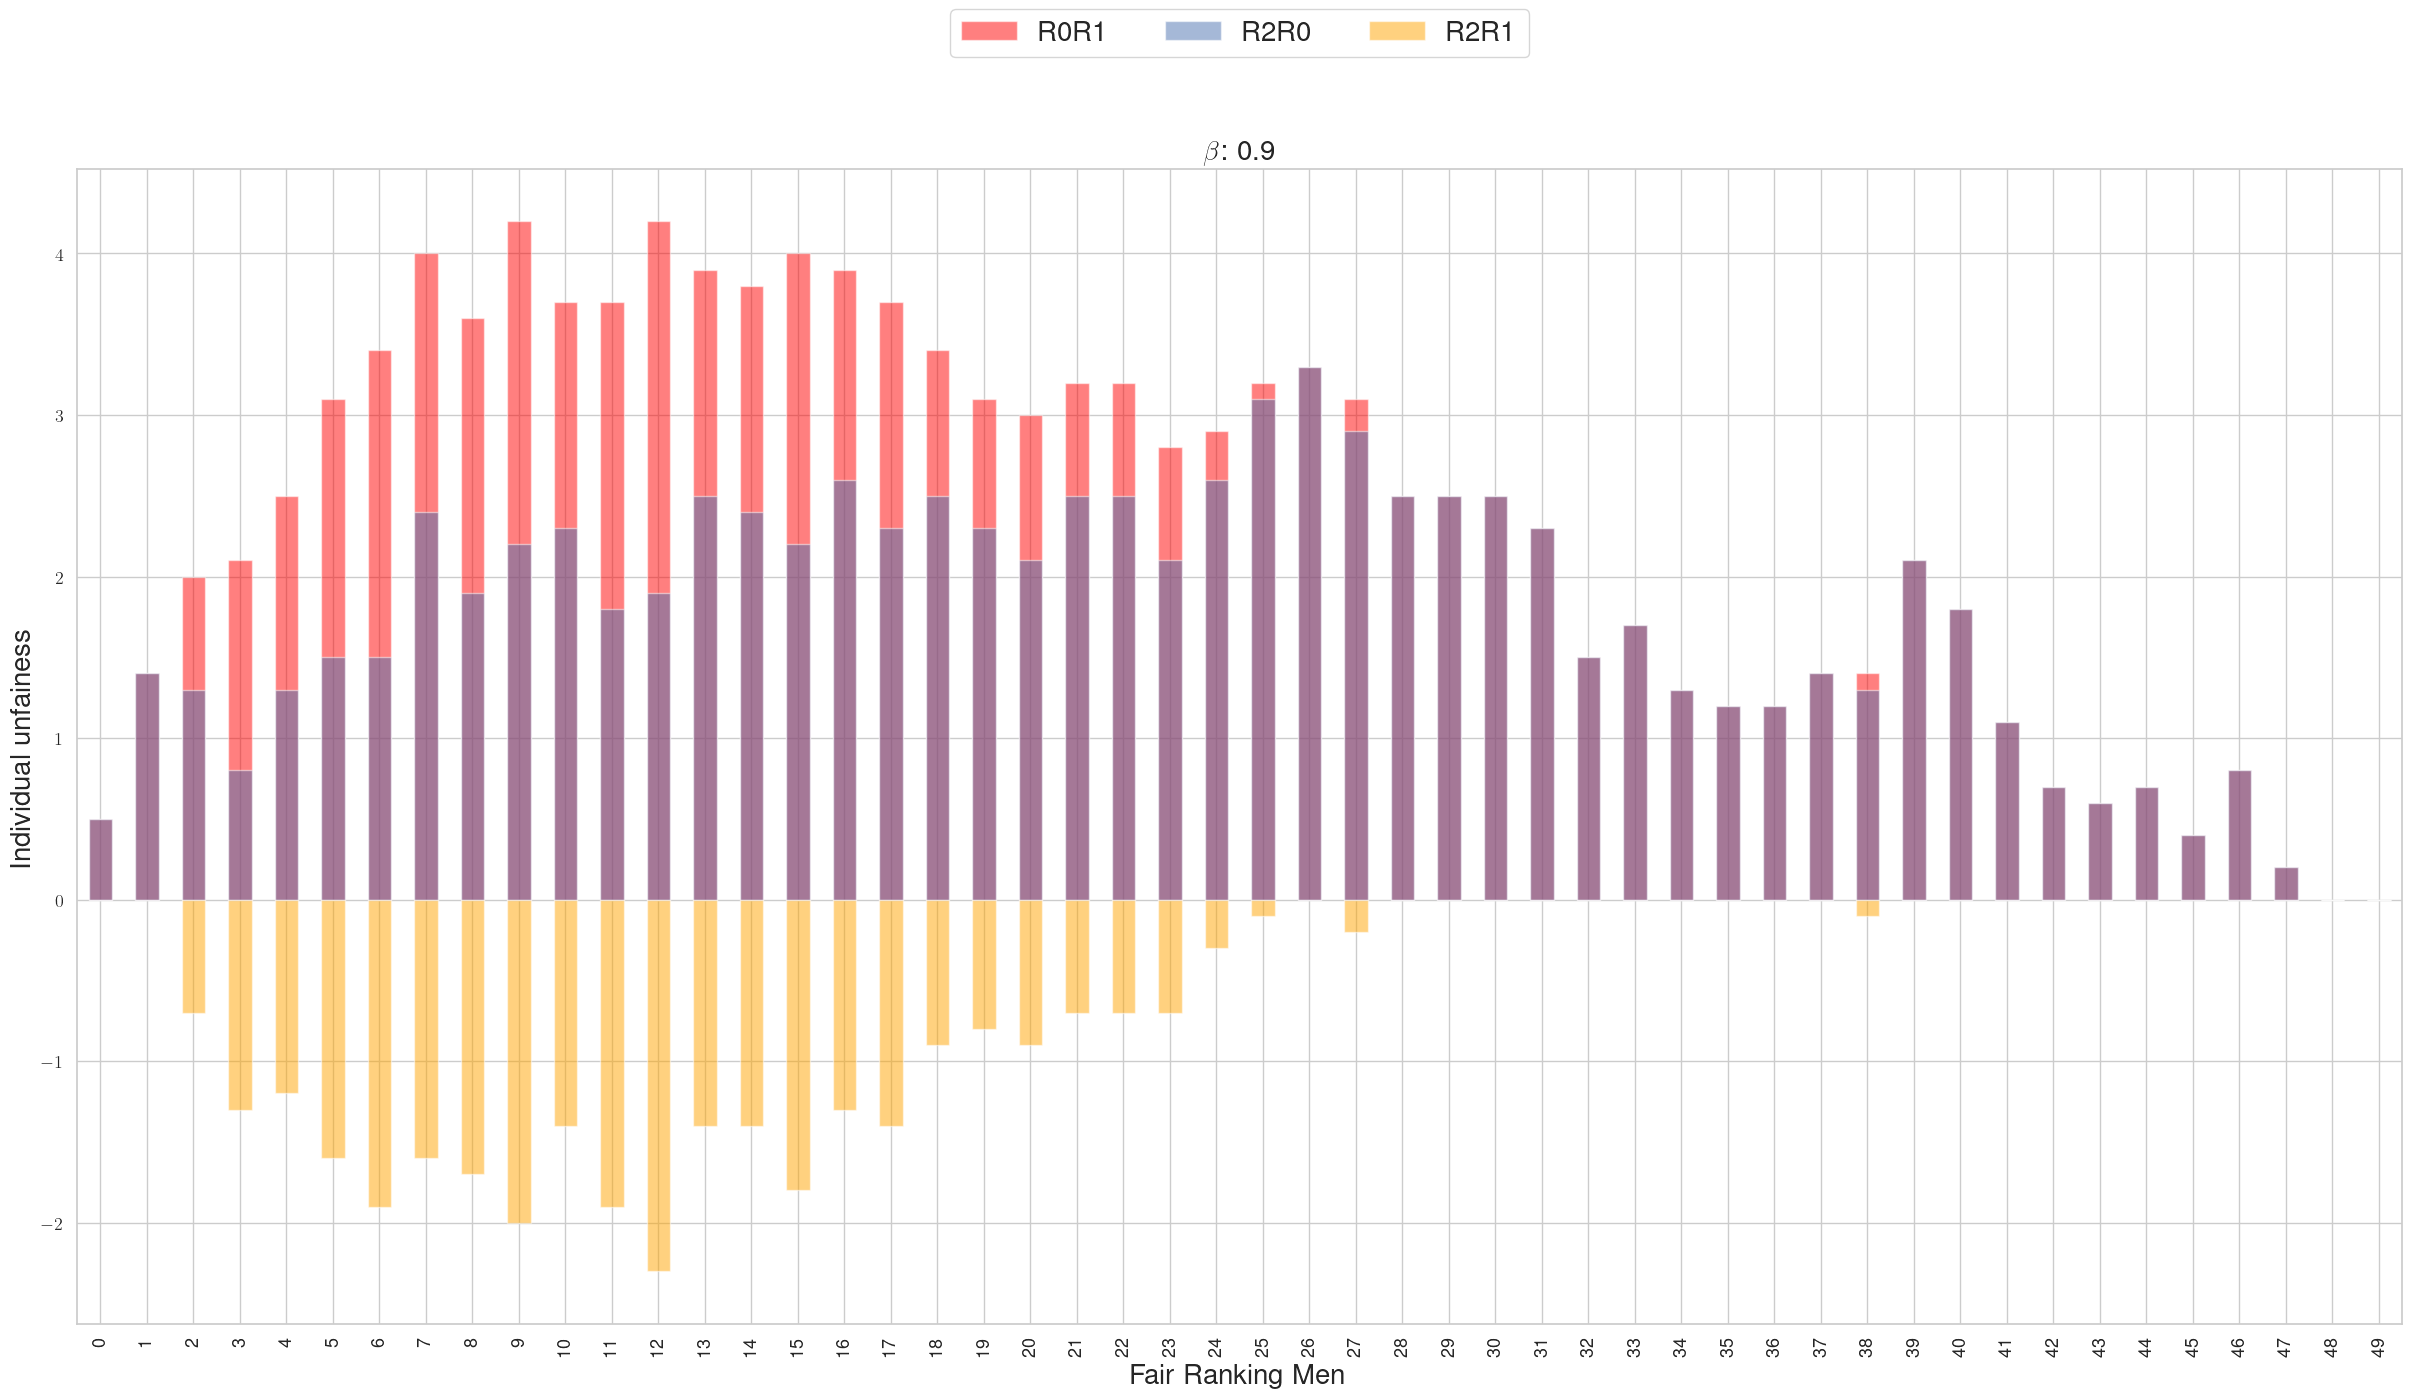

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.98it/s]


Proportion of Women: 0.7


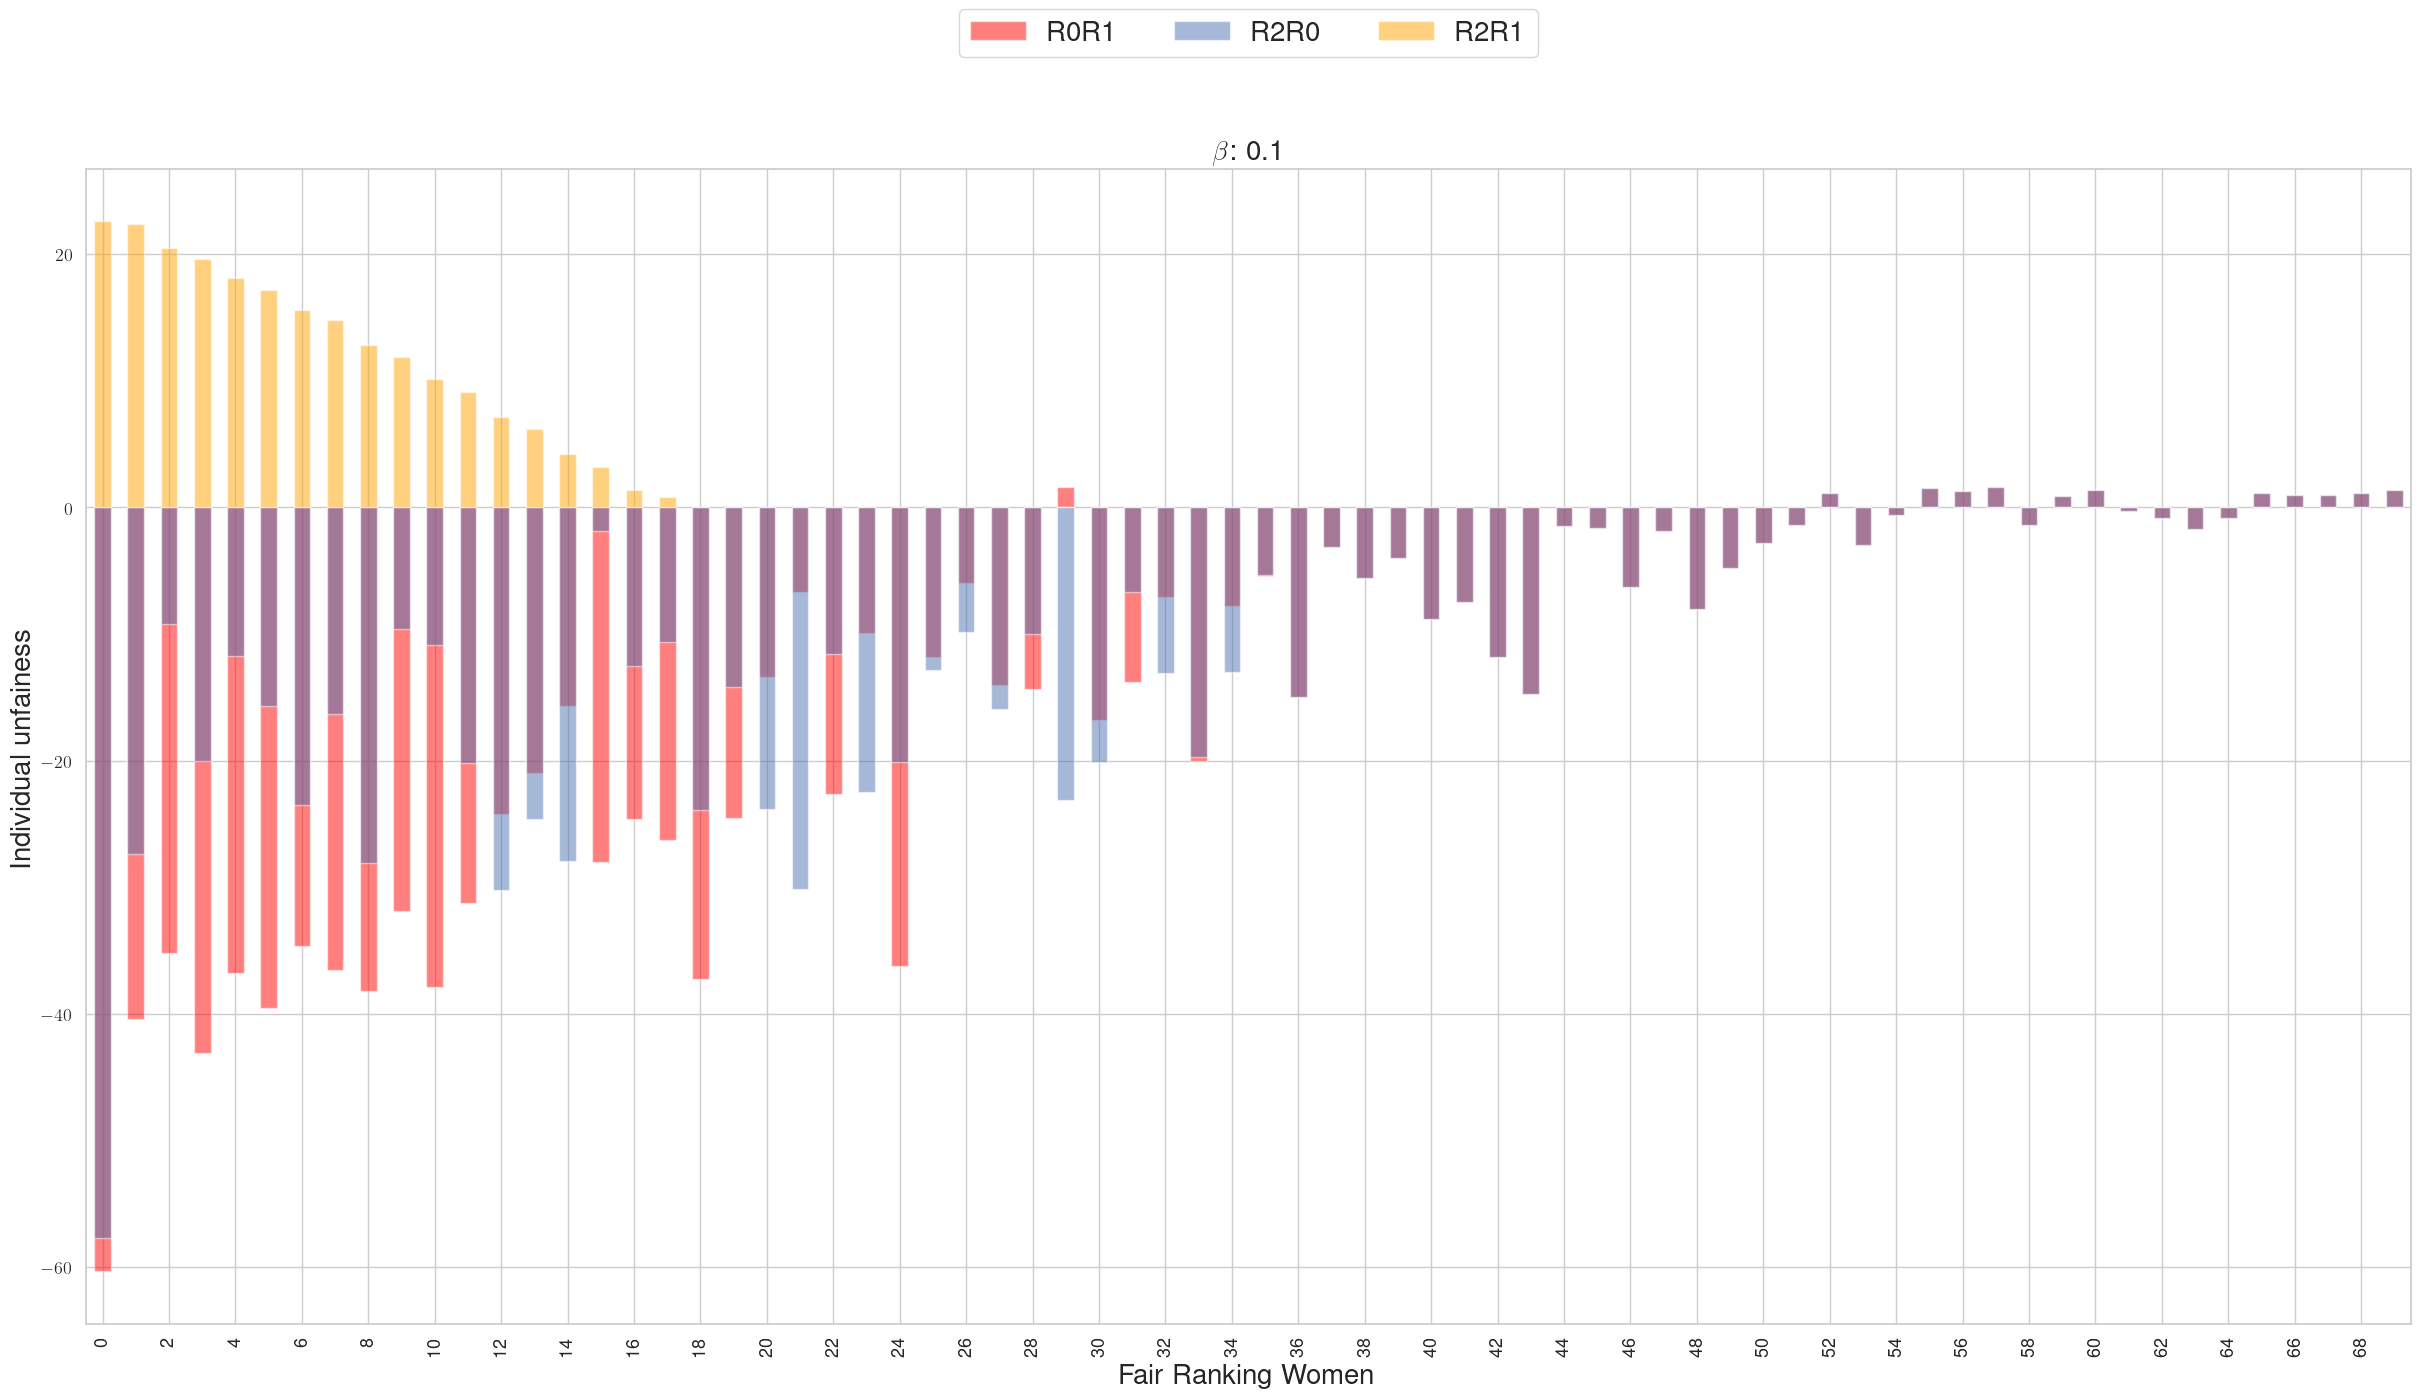

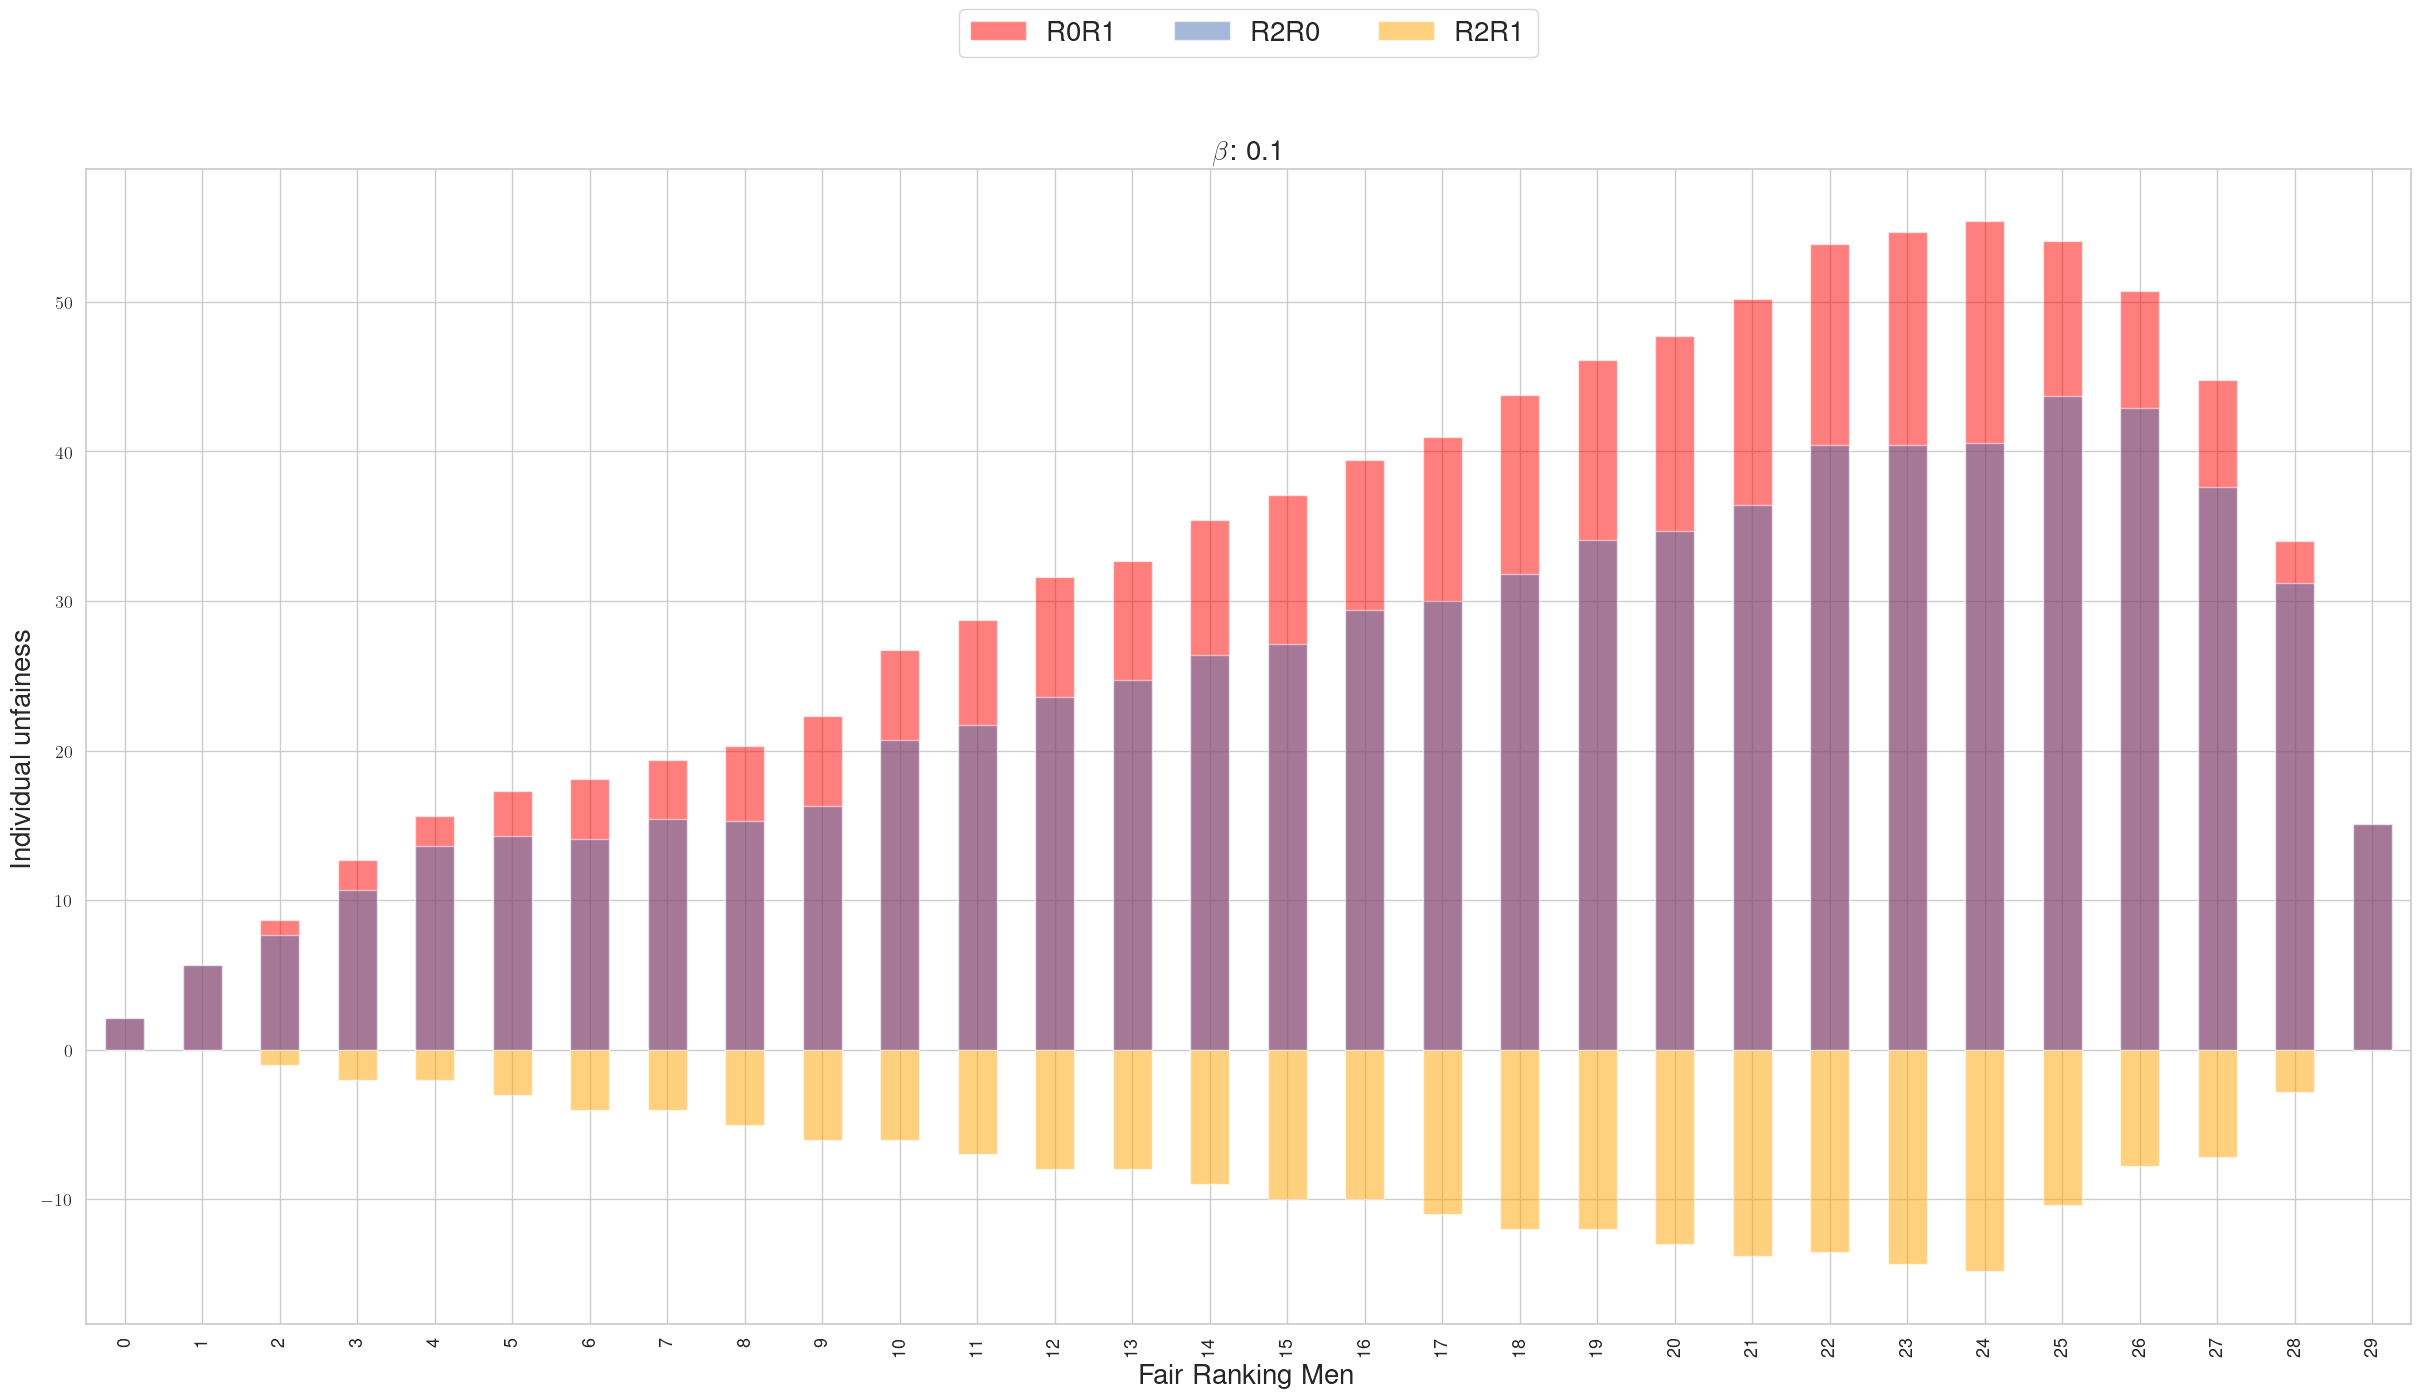

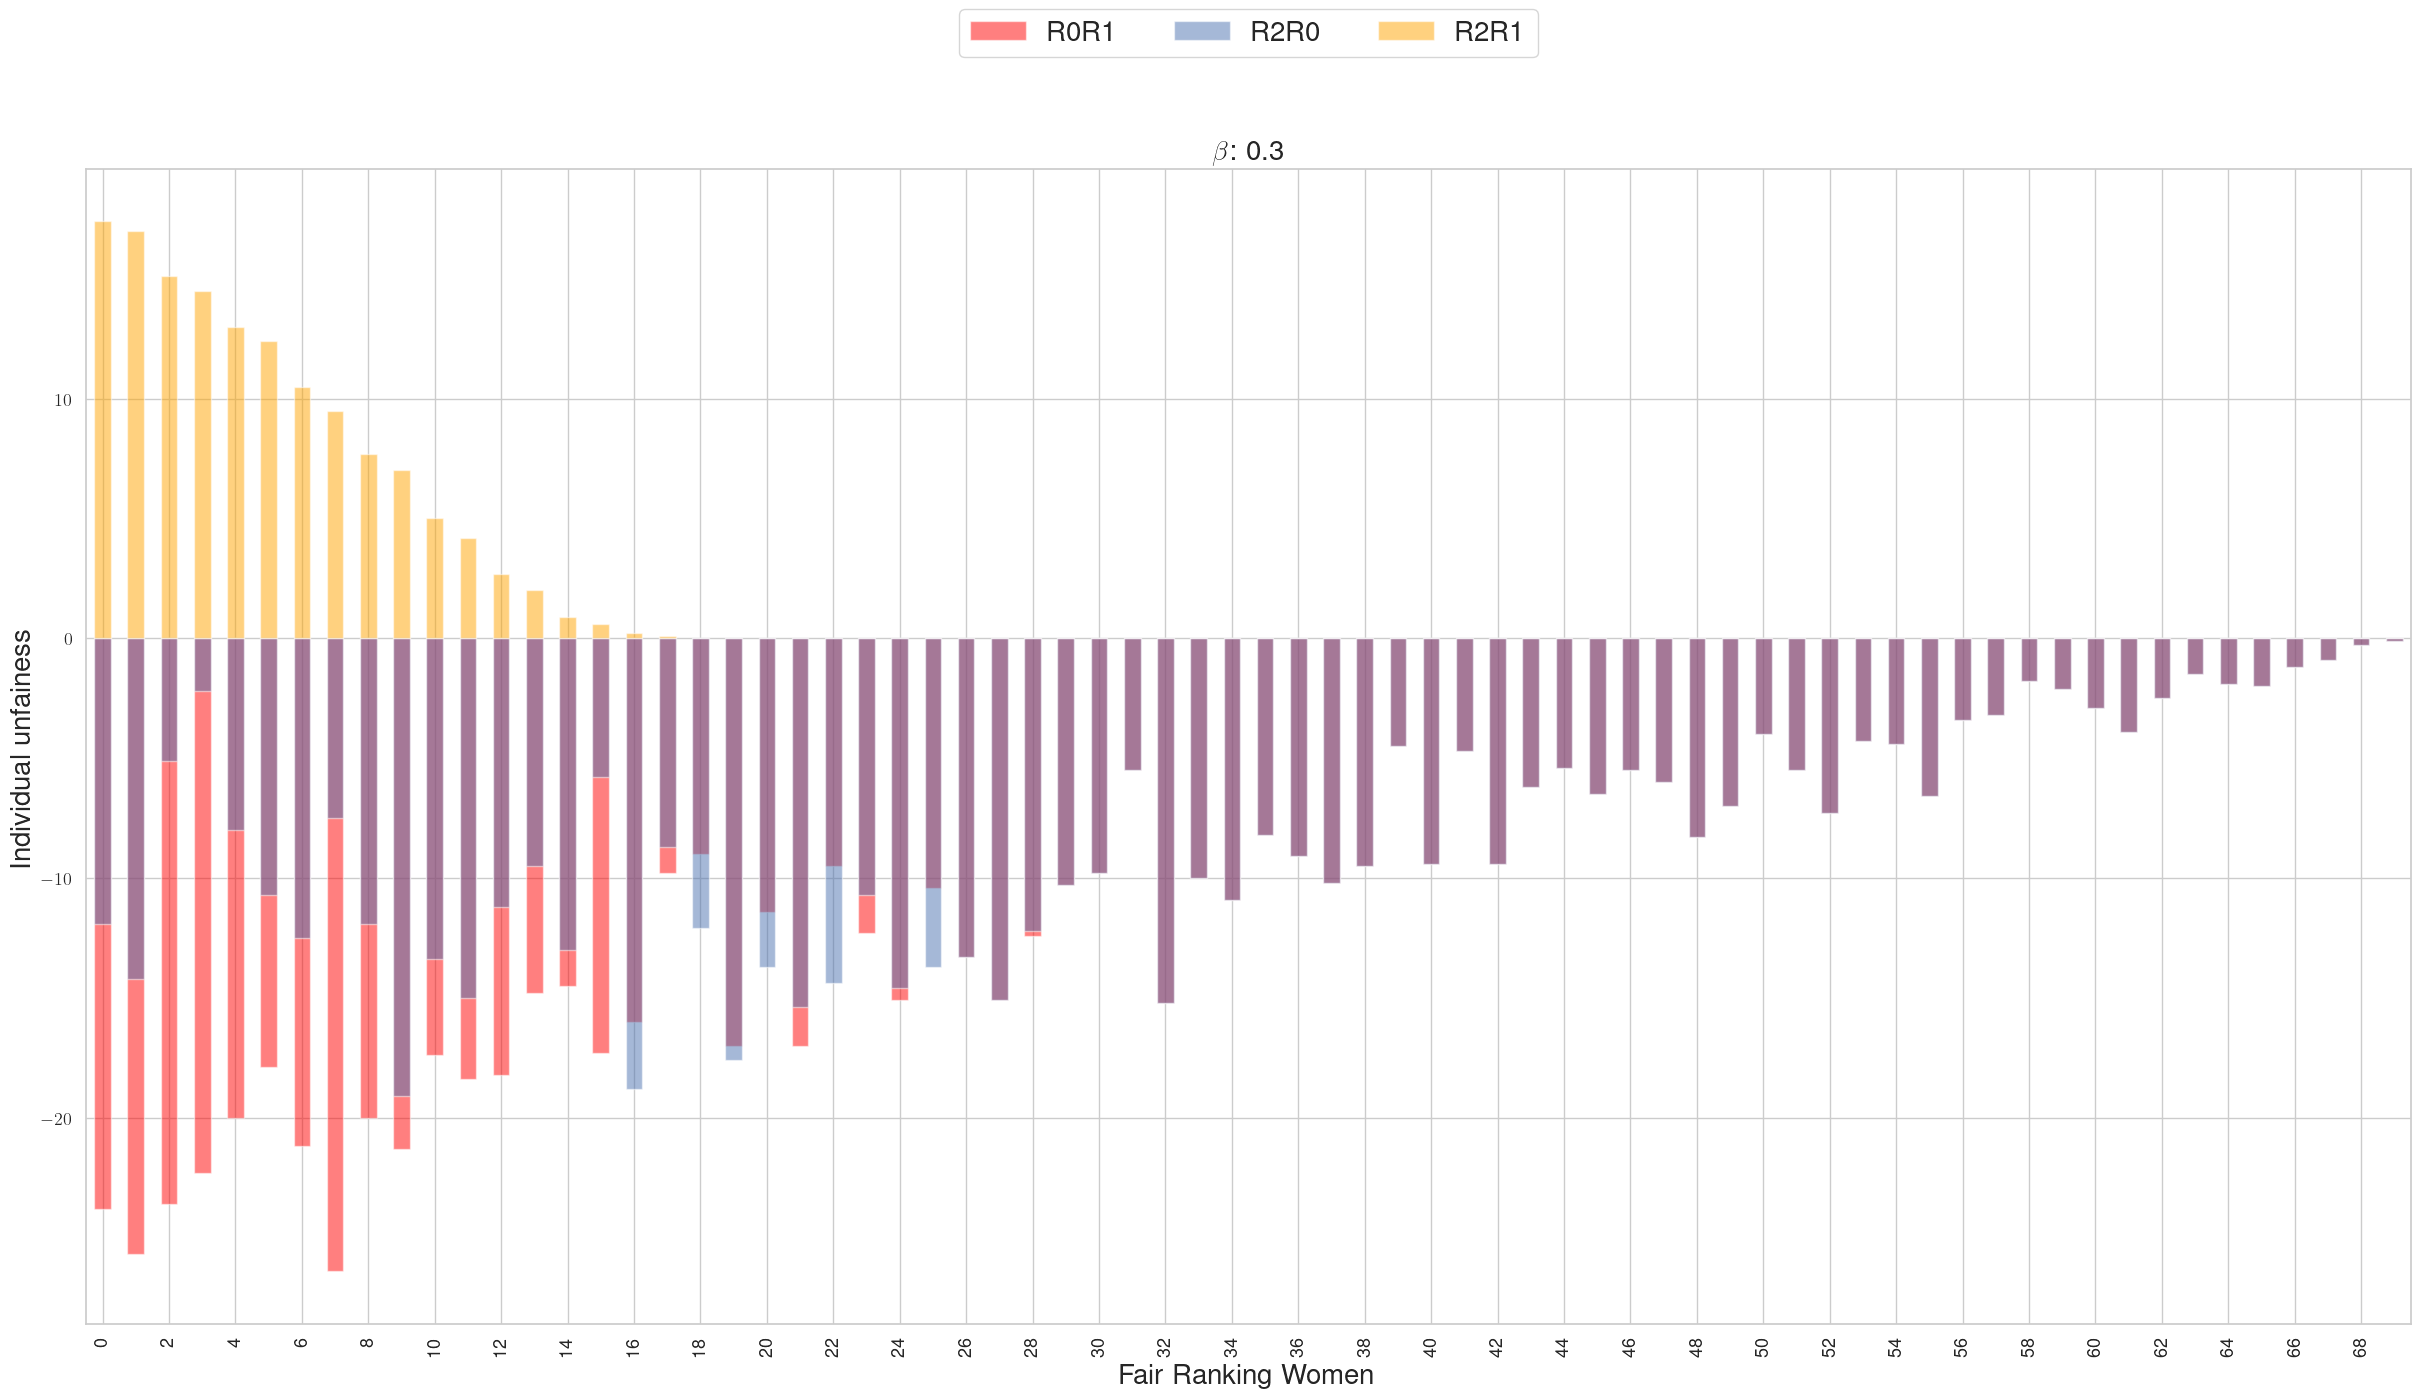

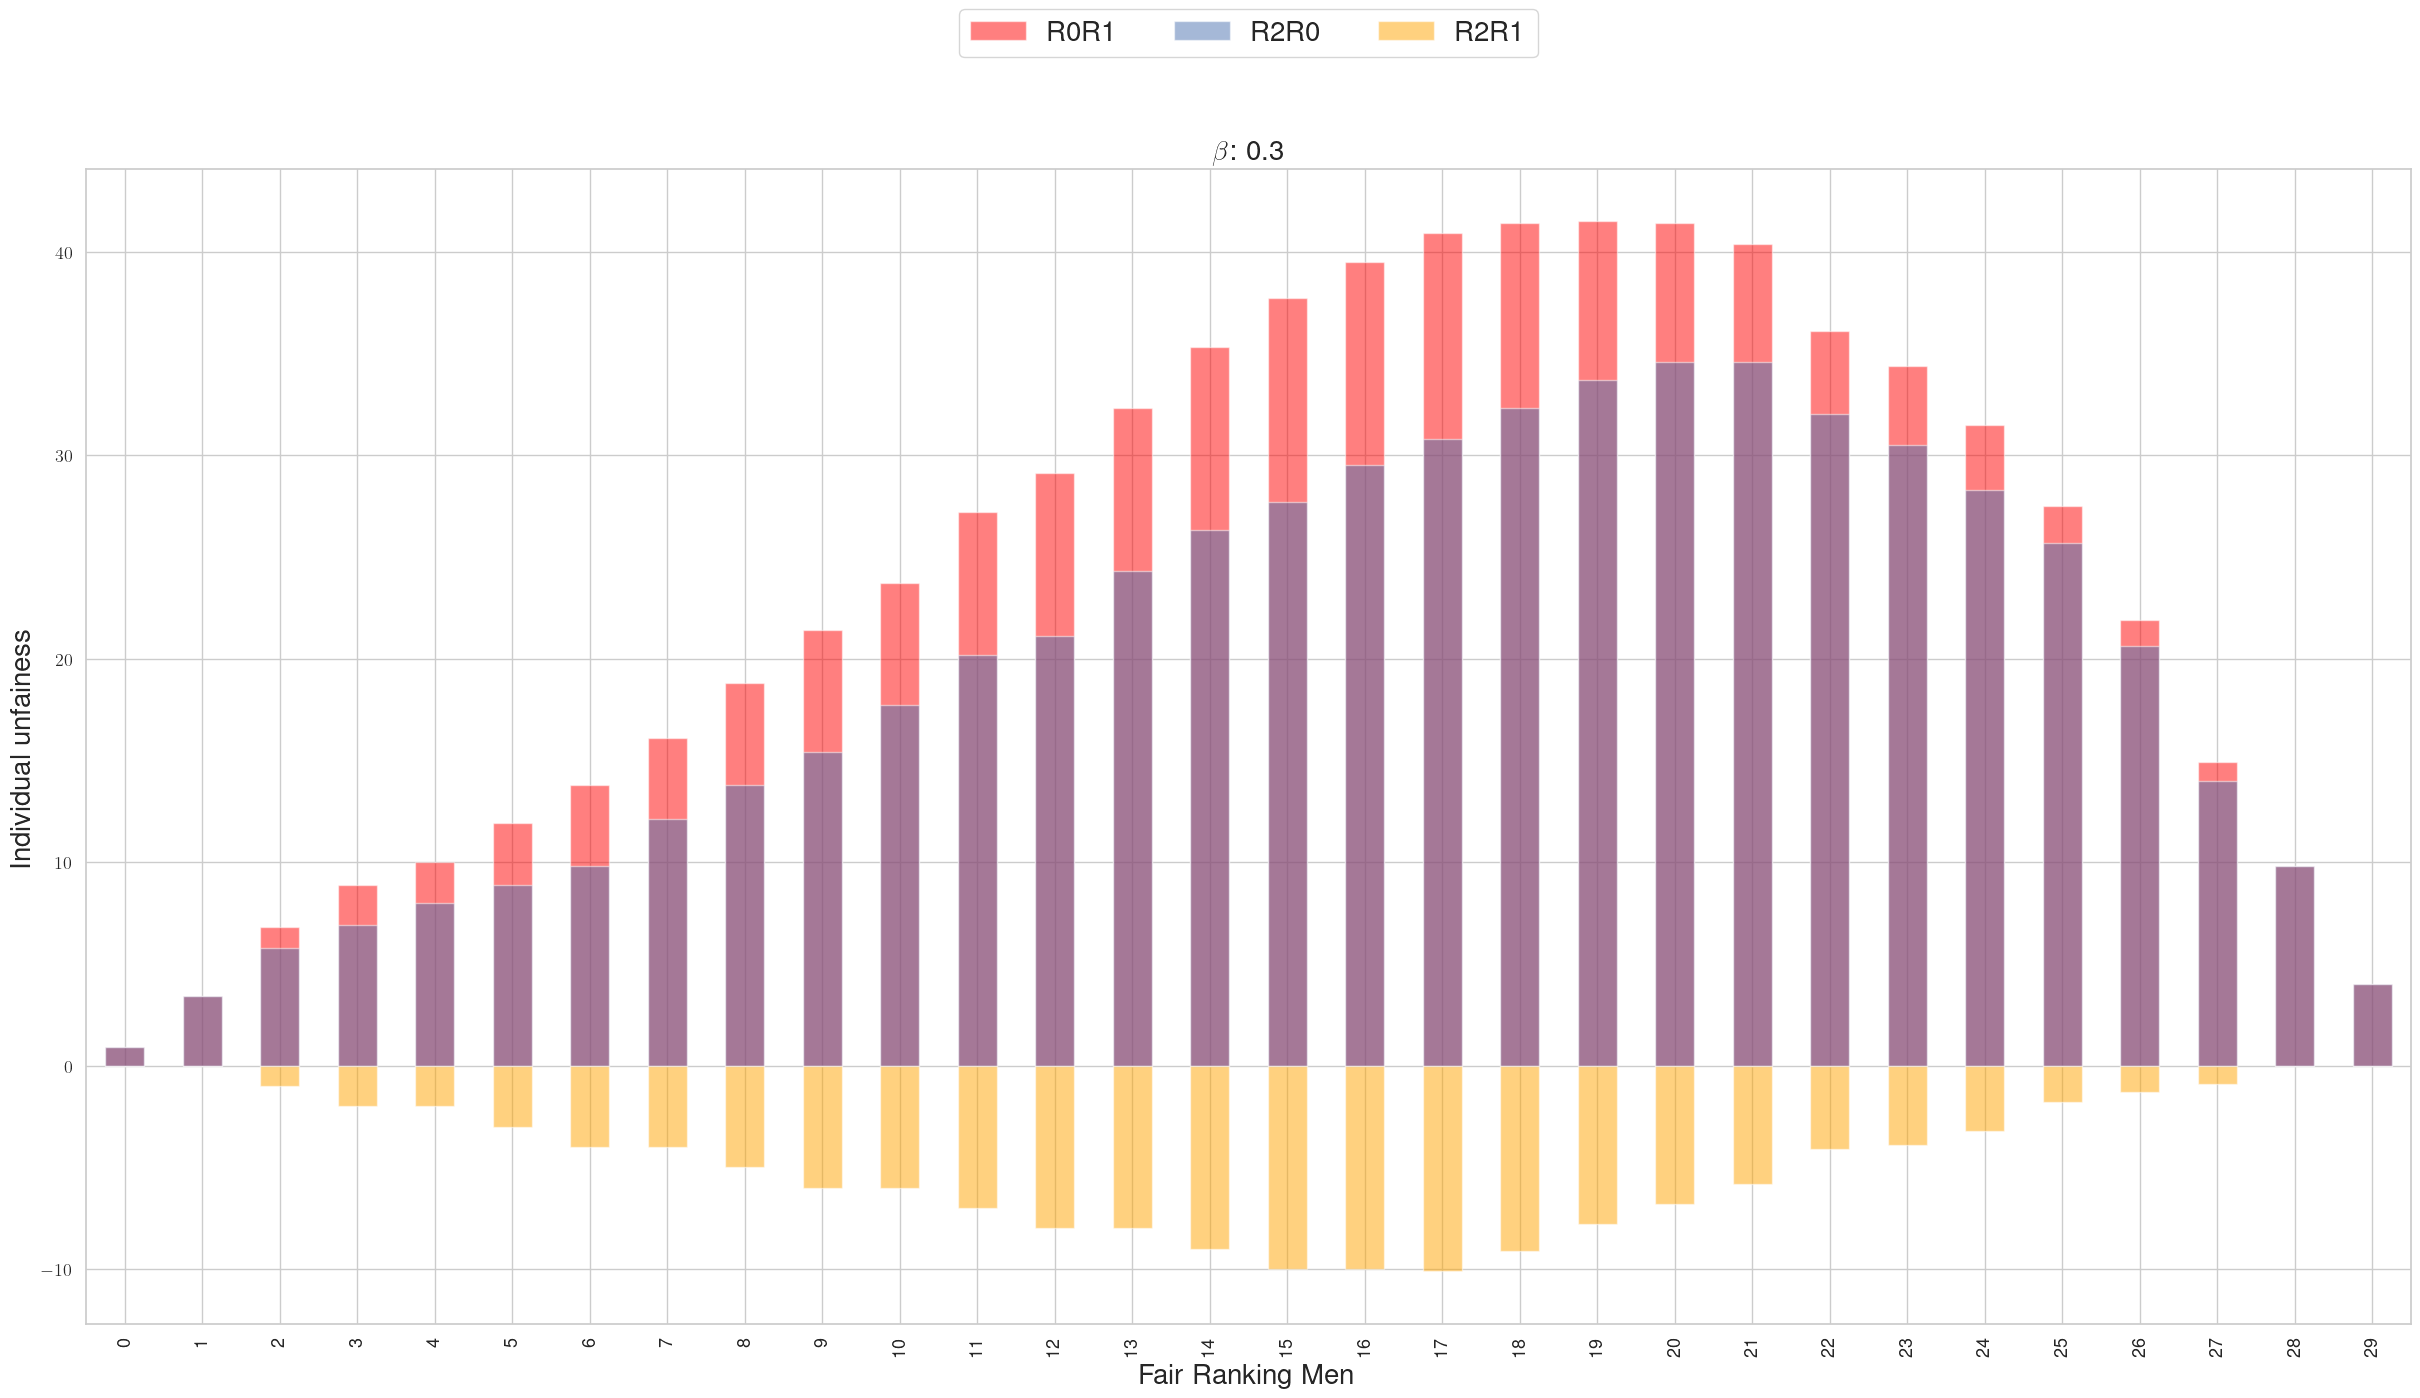

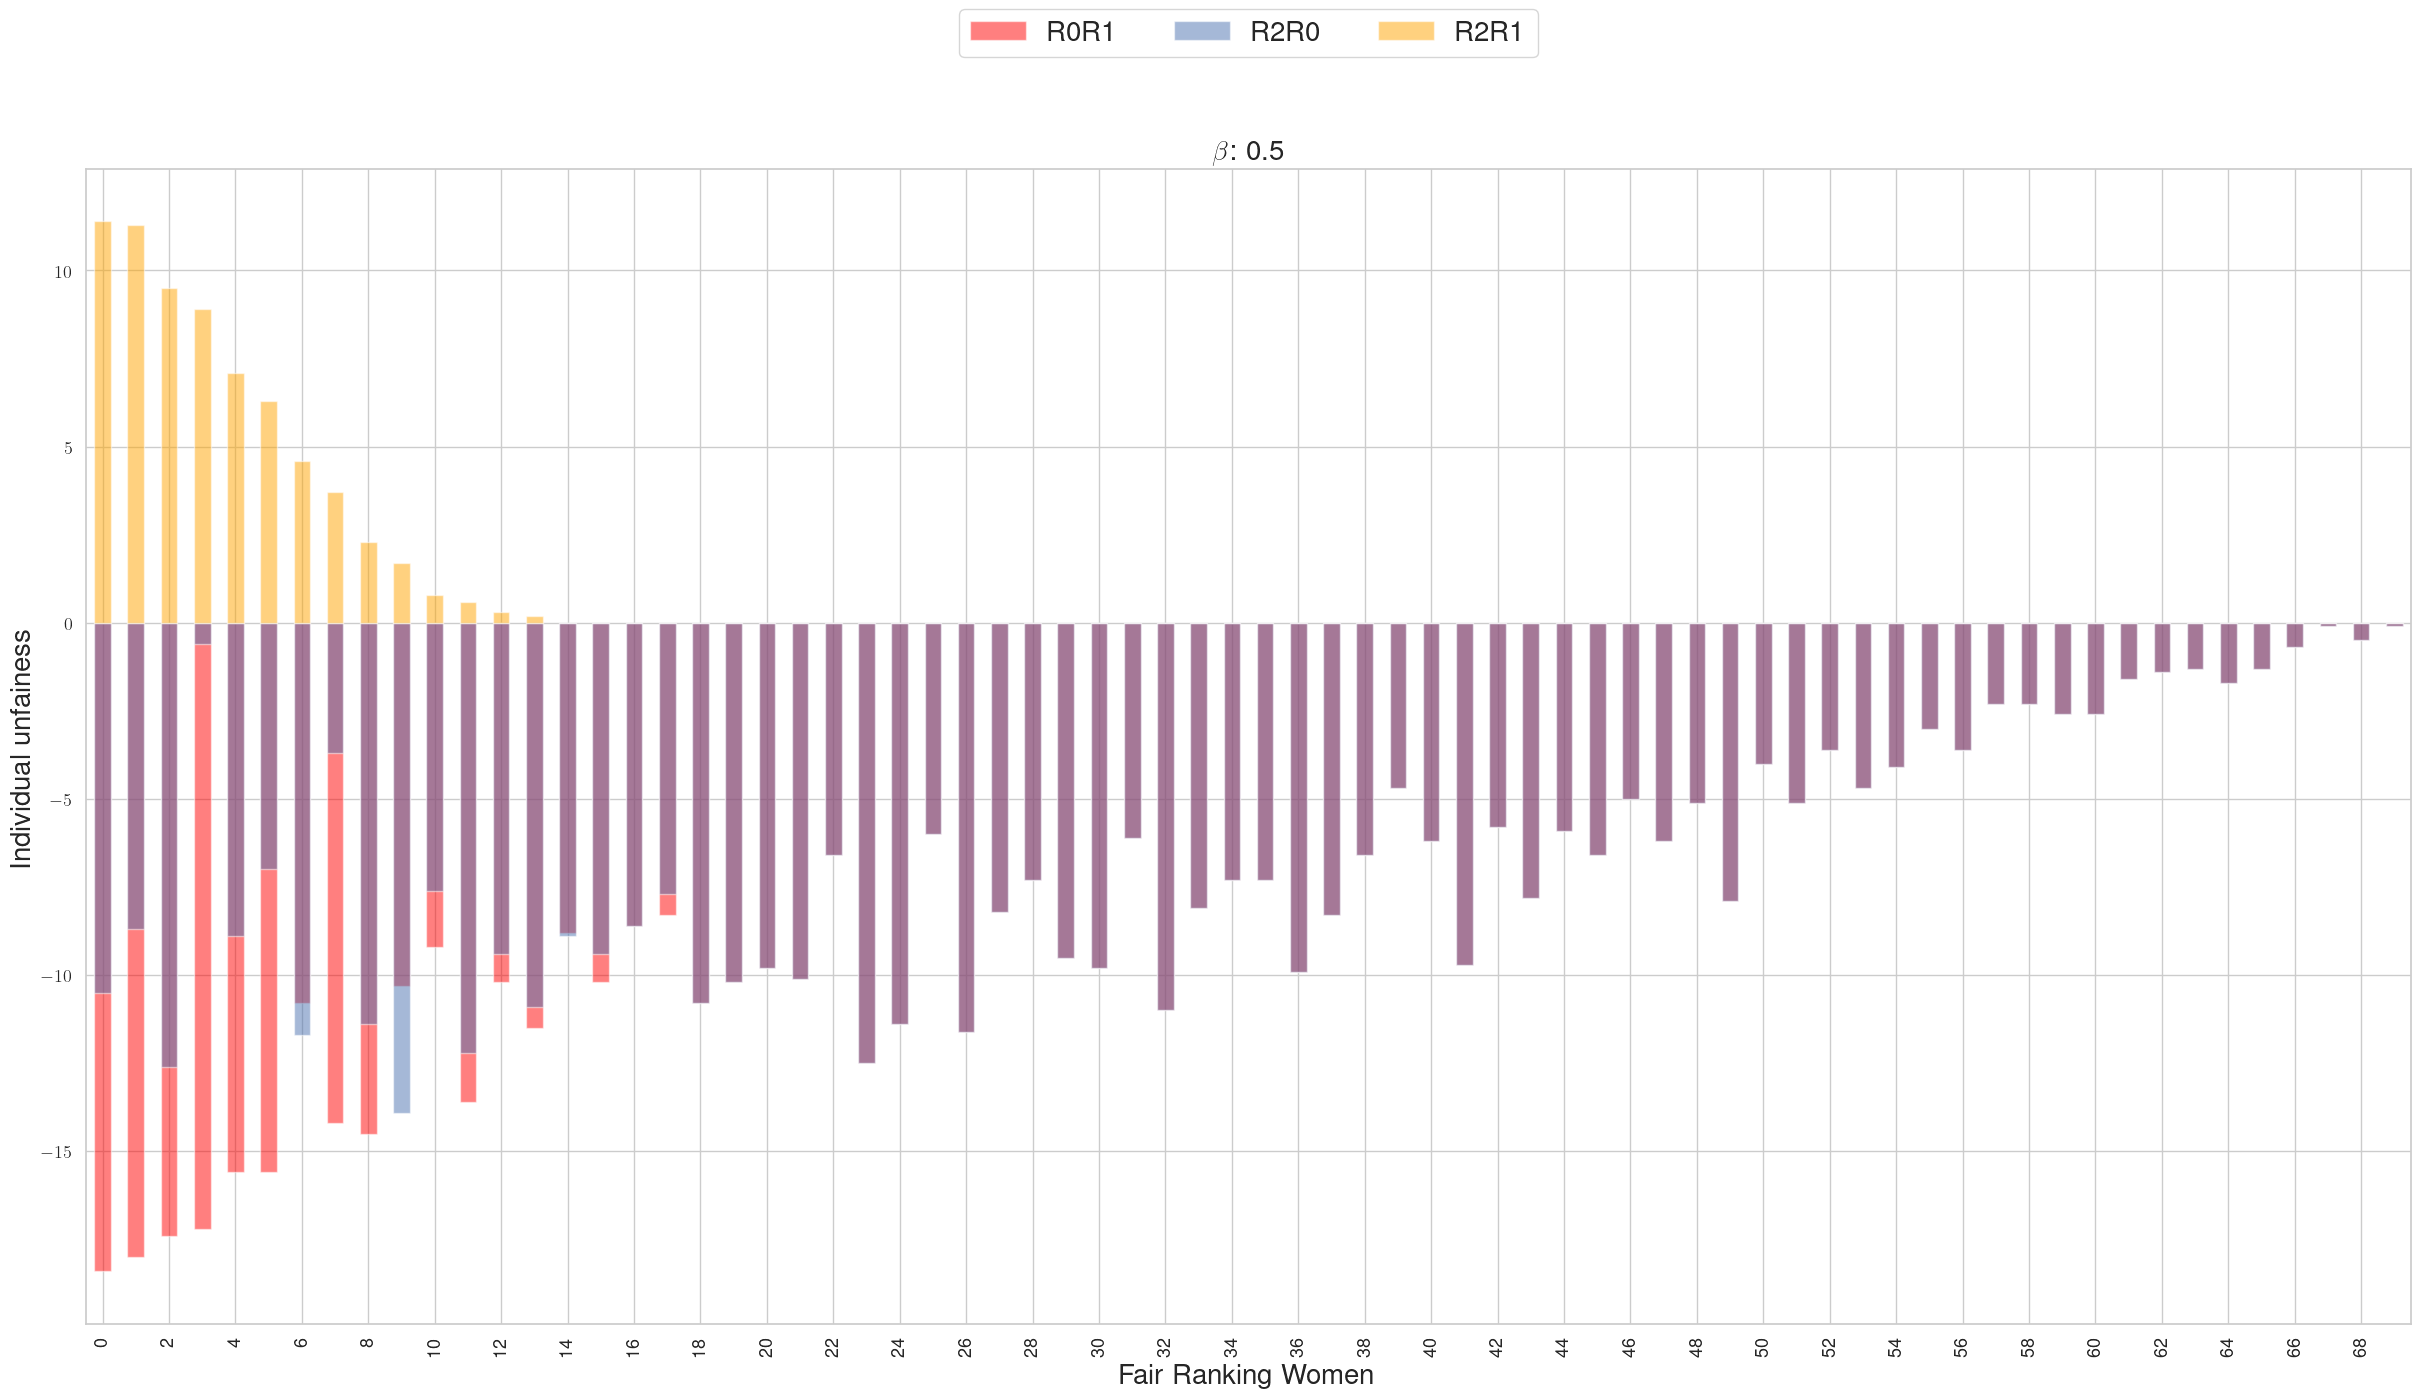

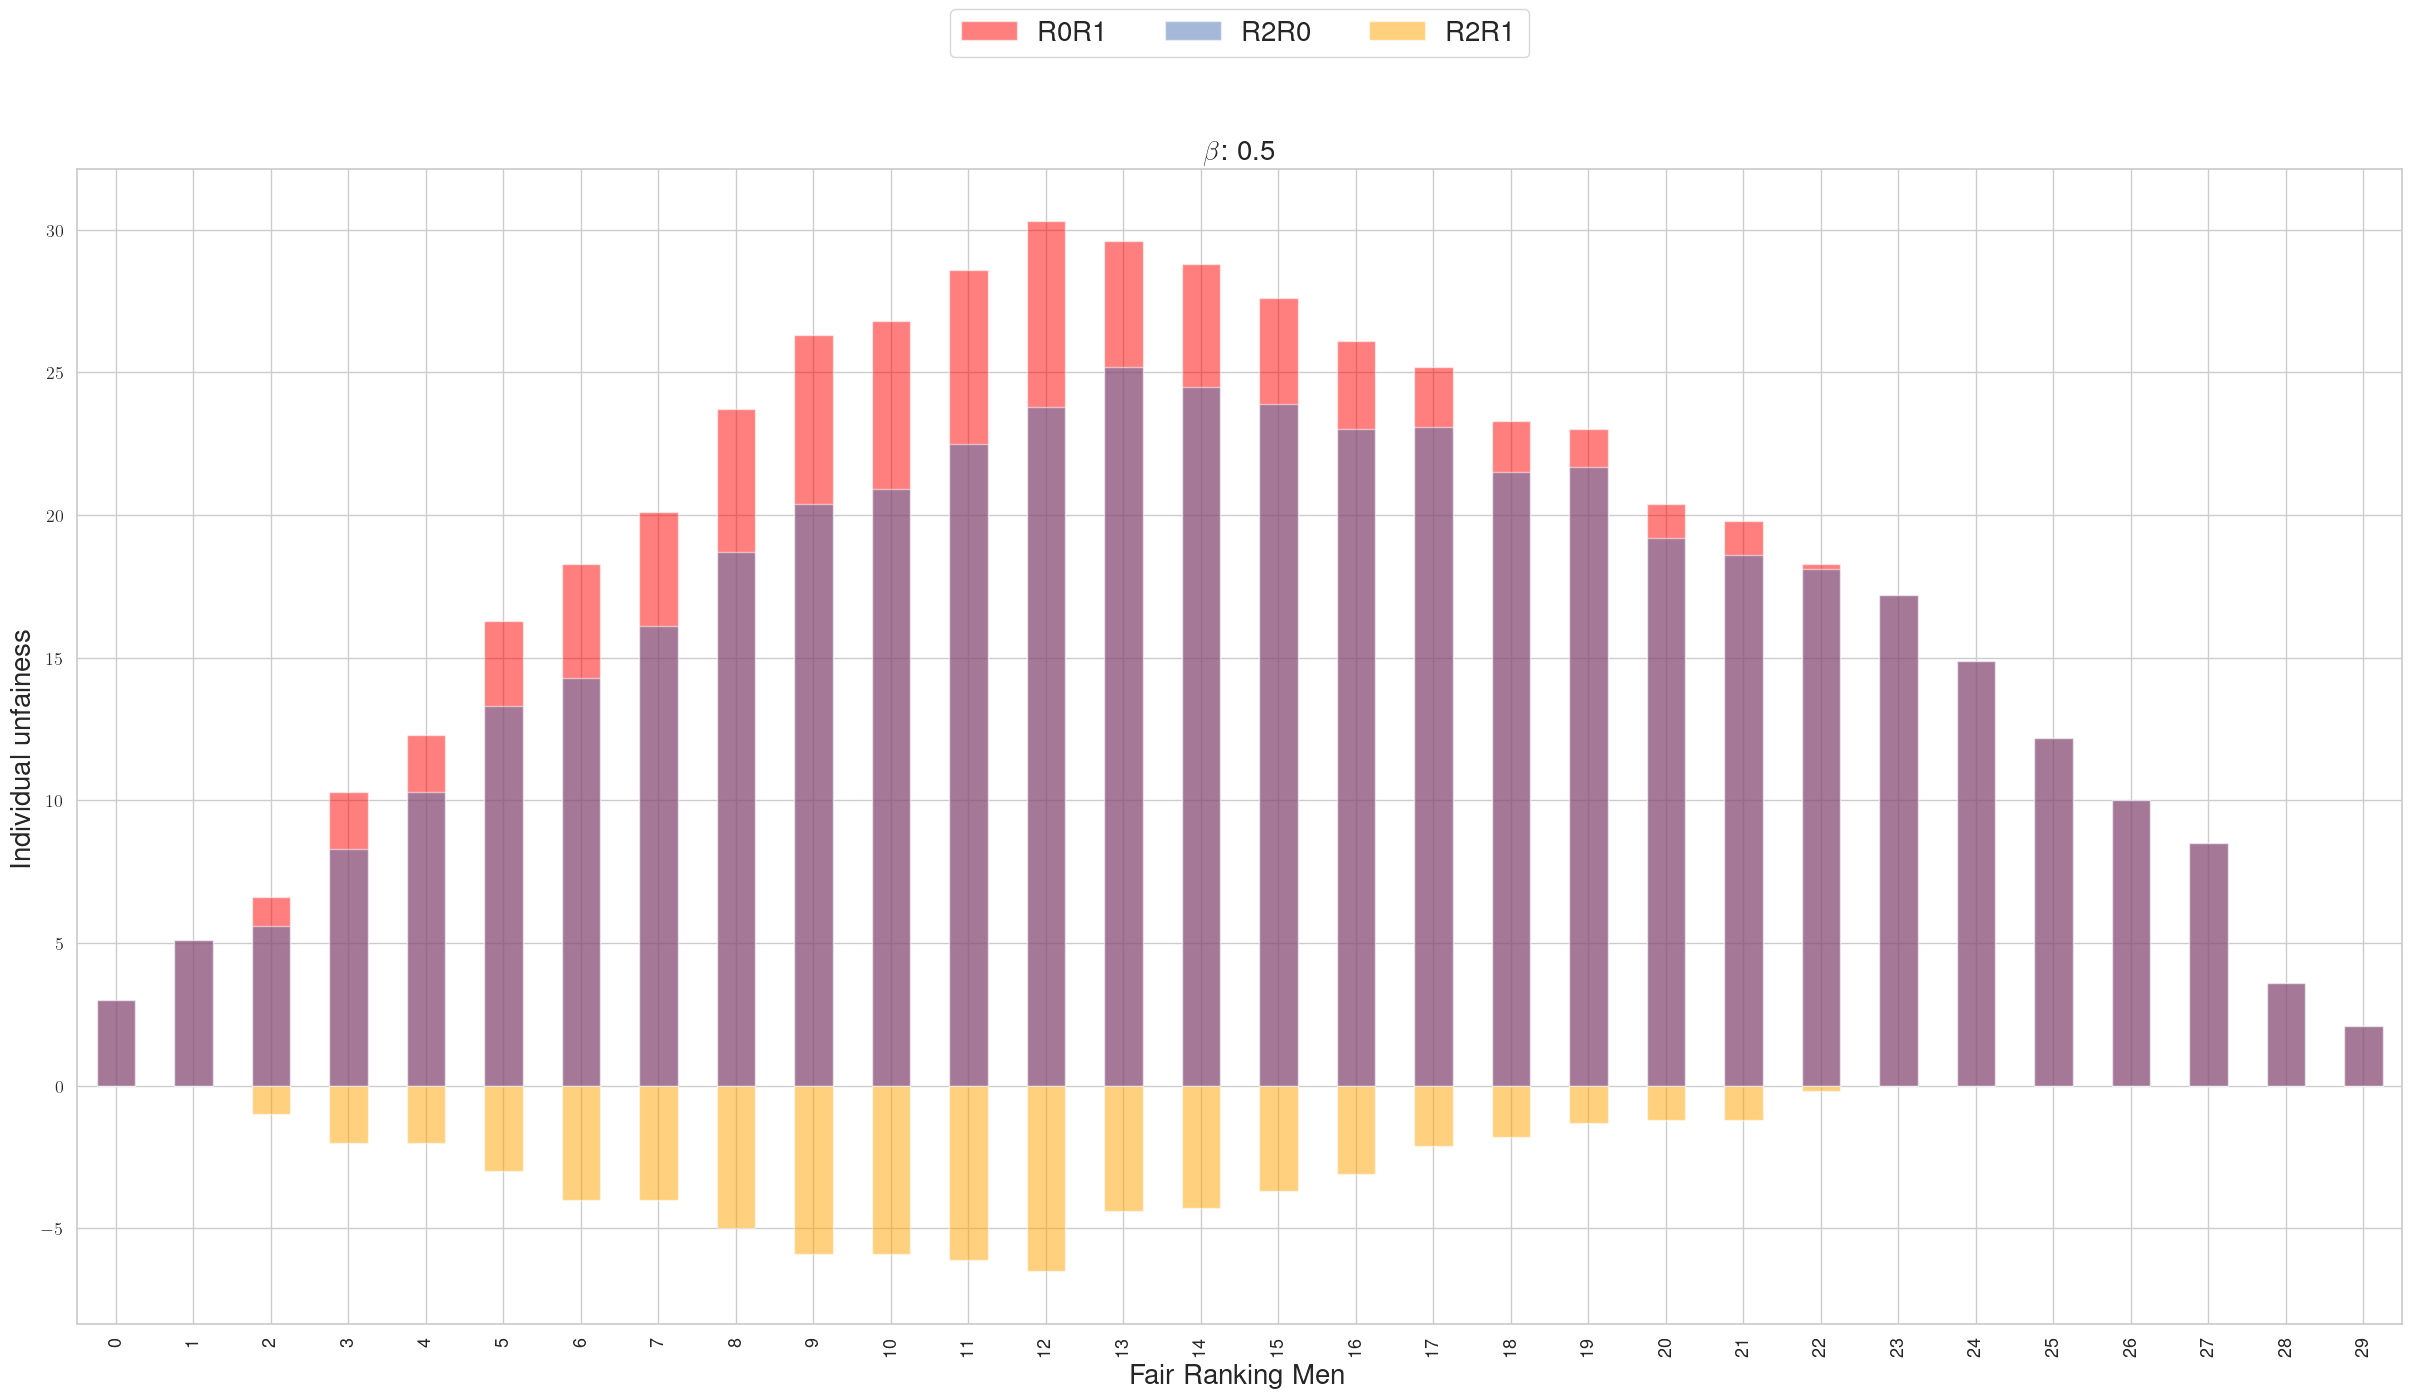

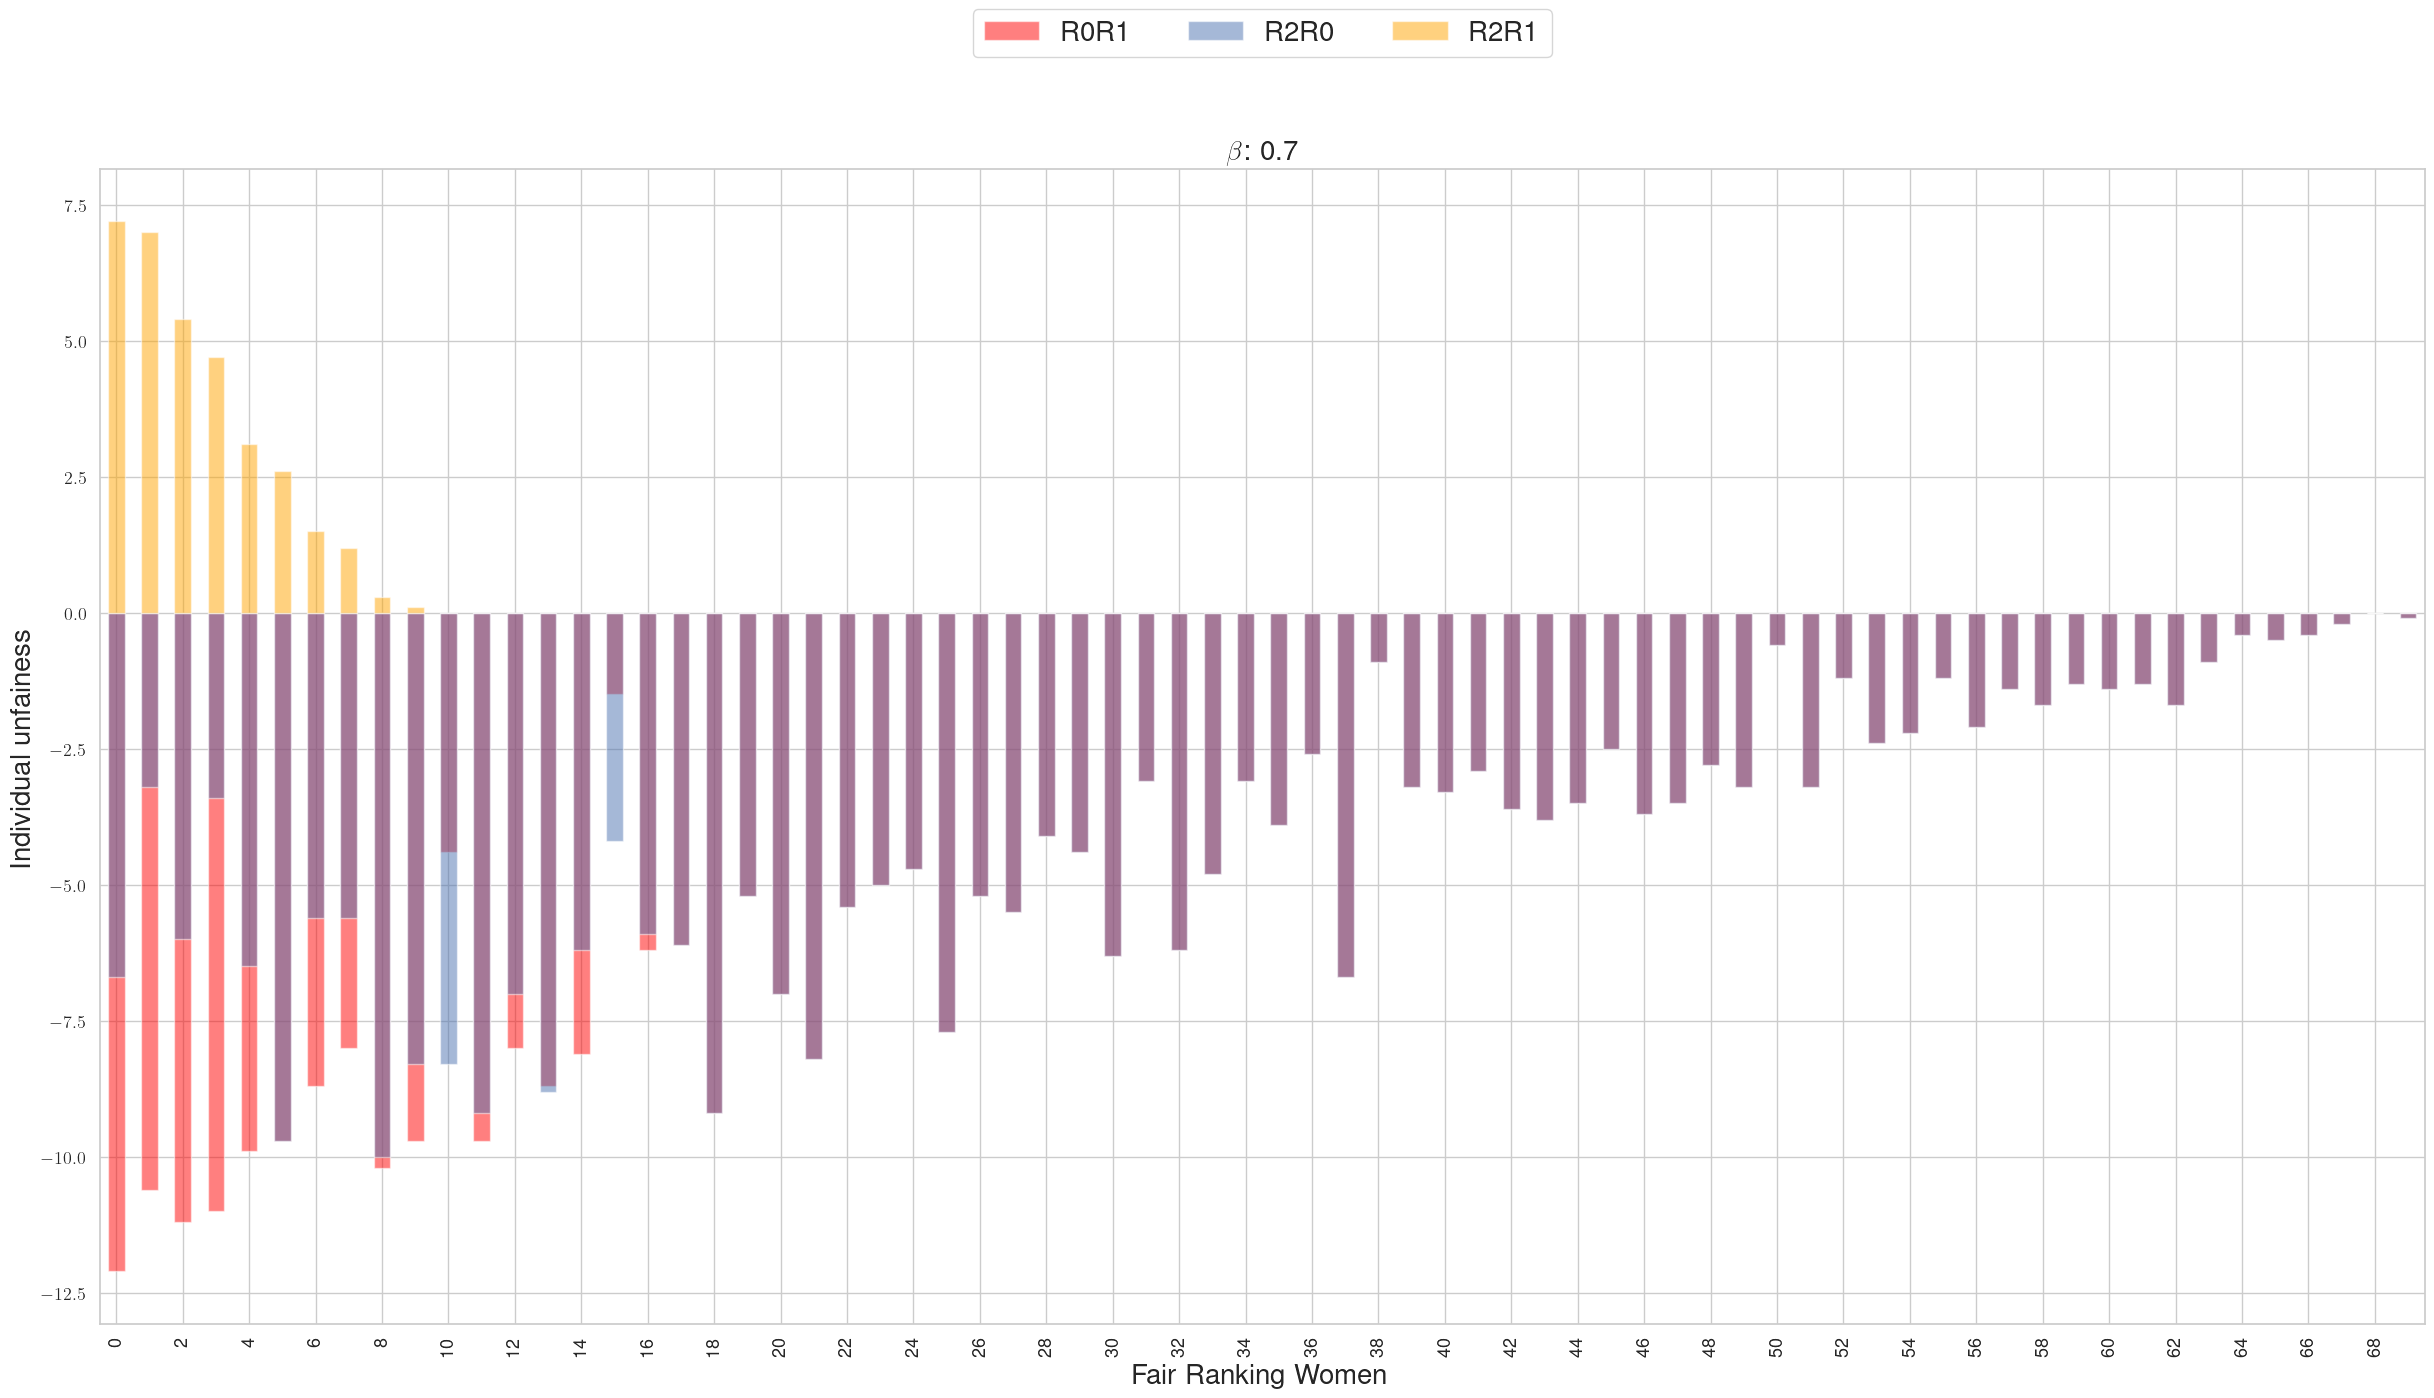

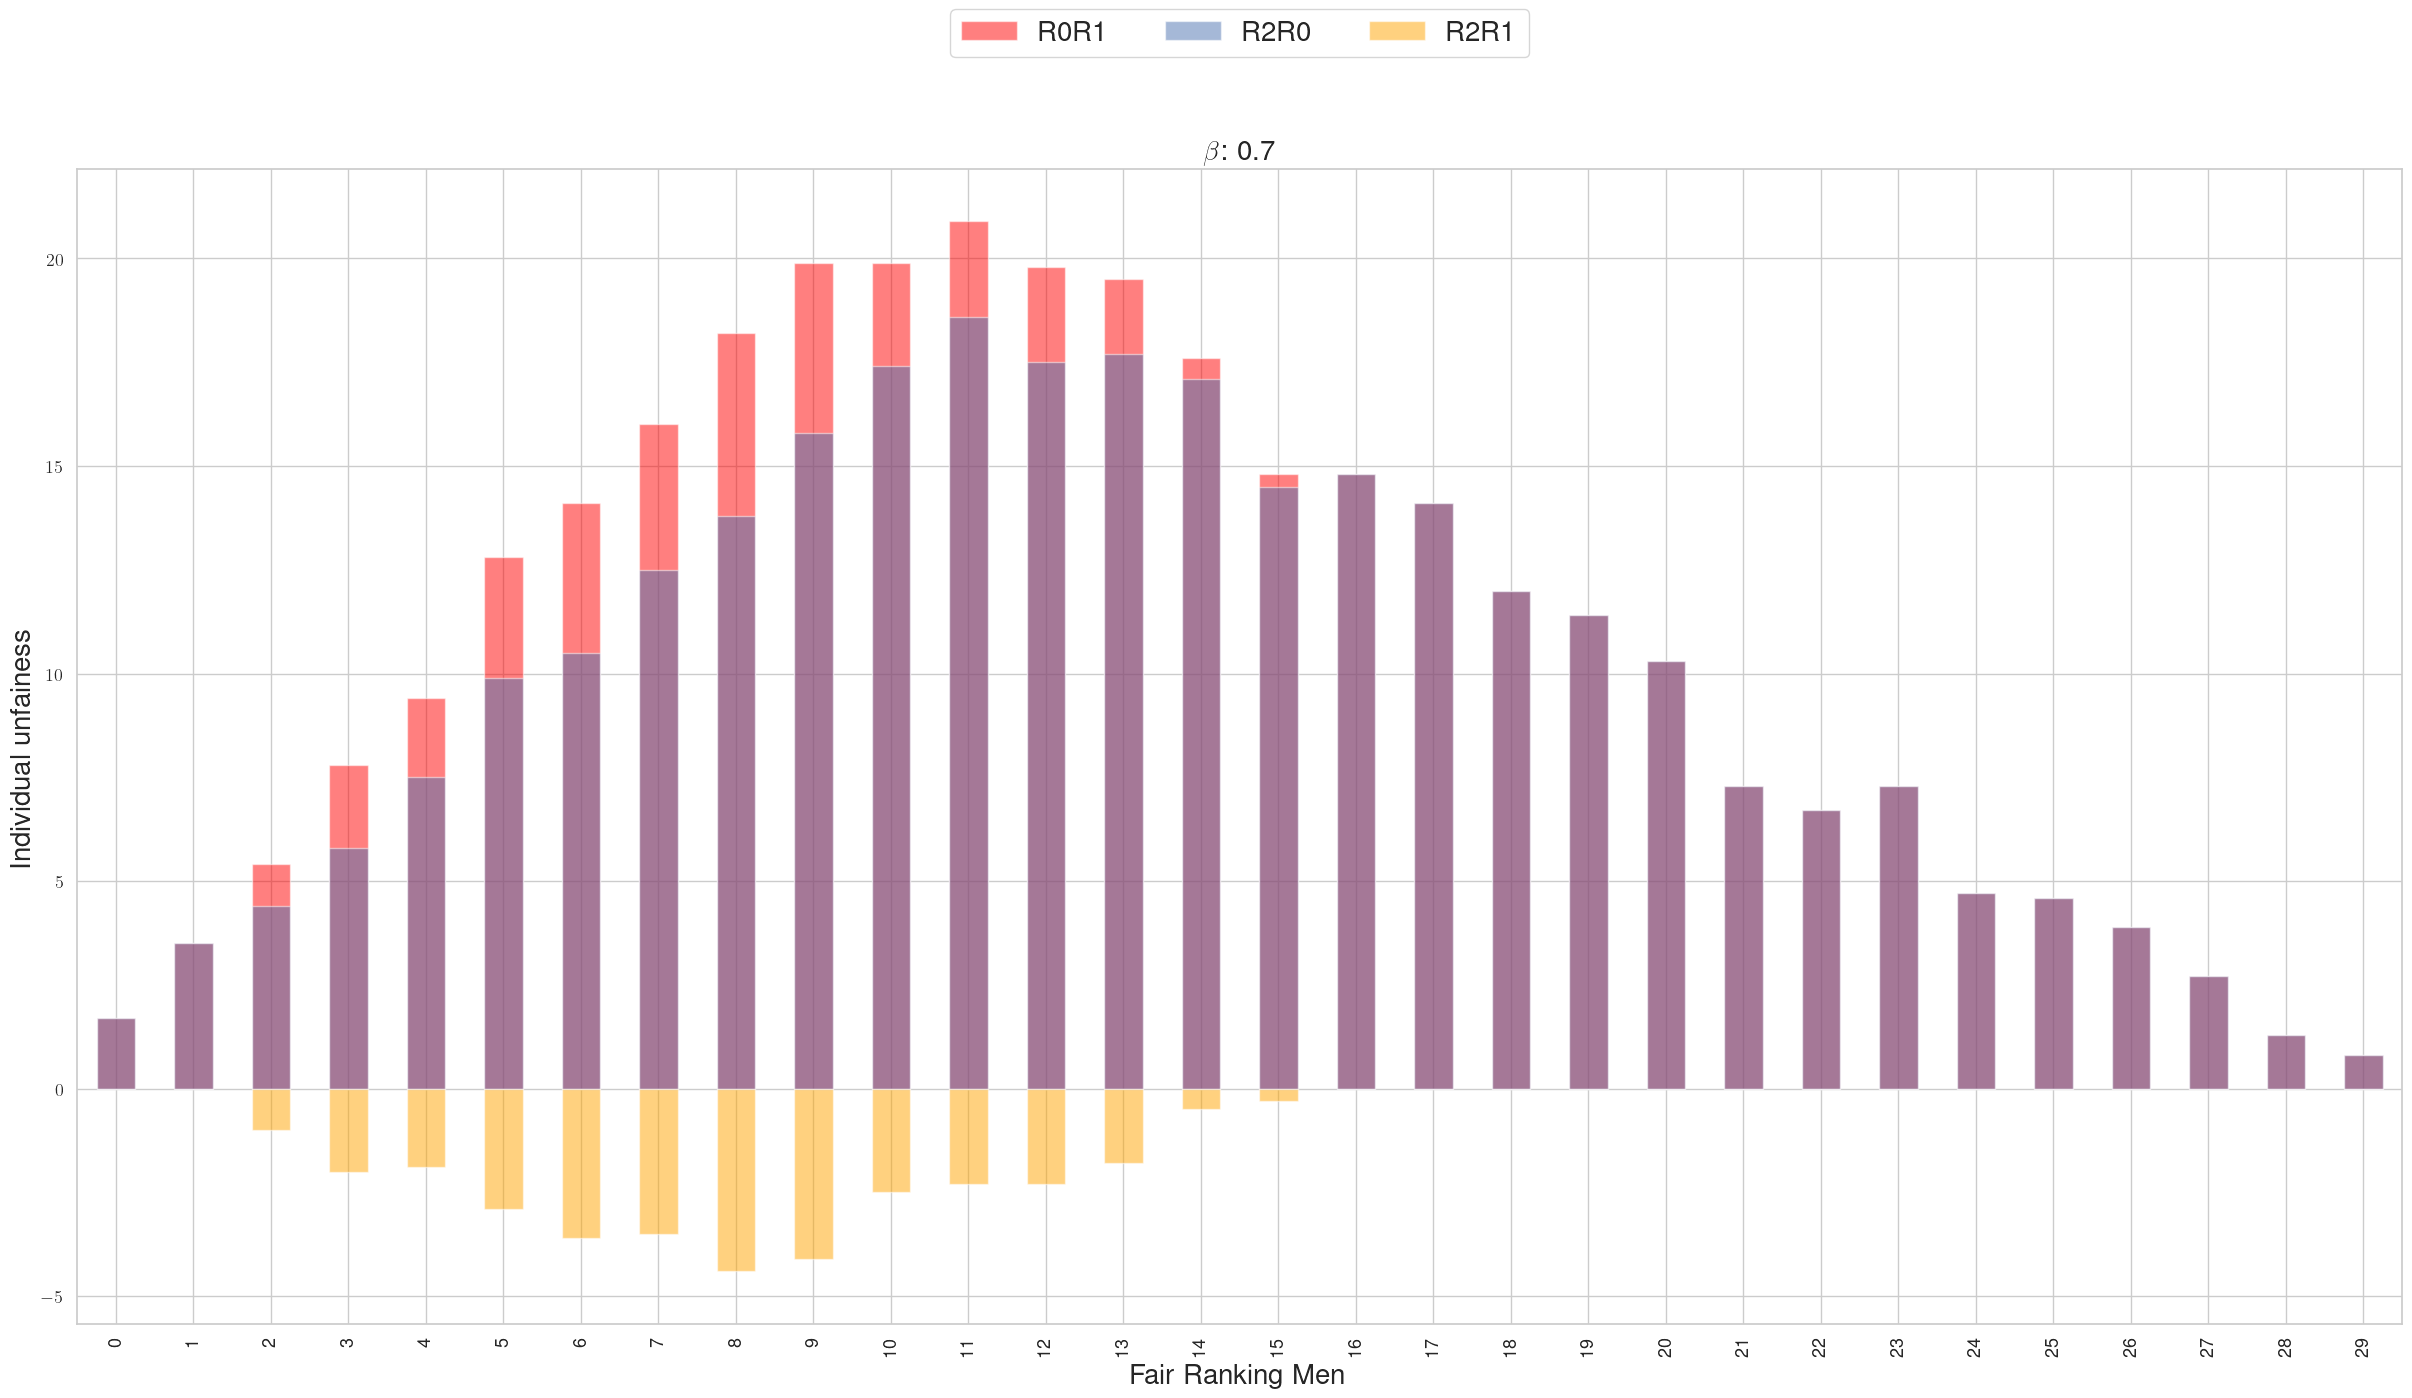

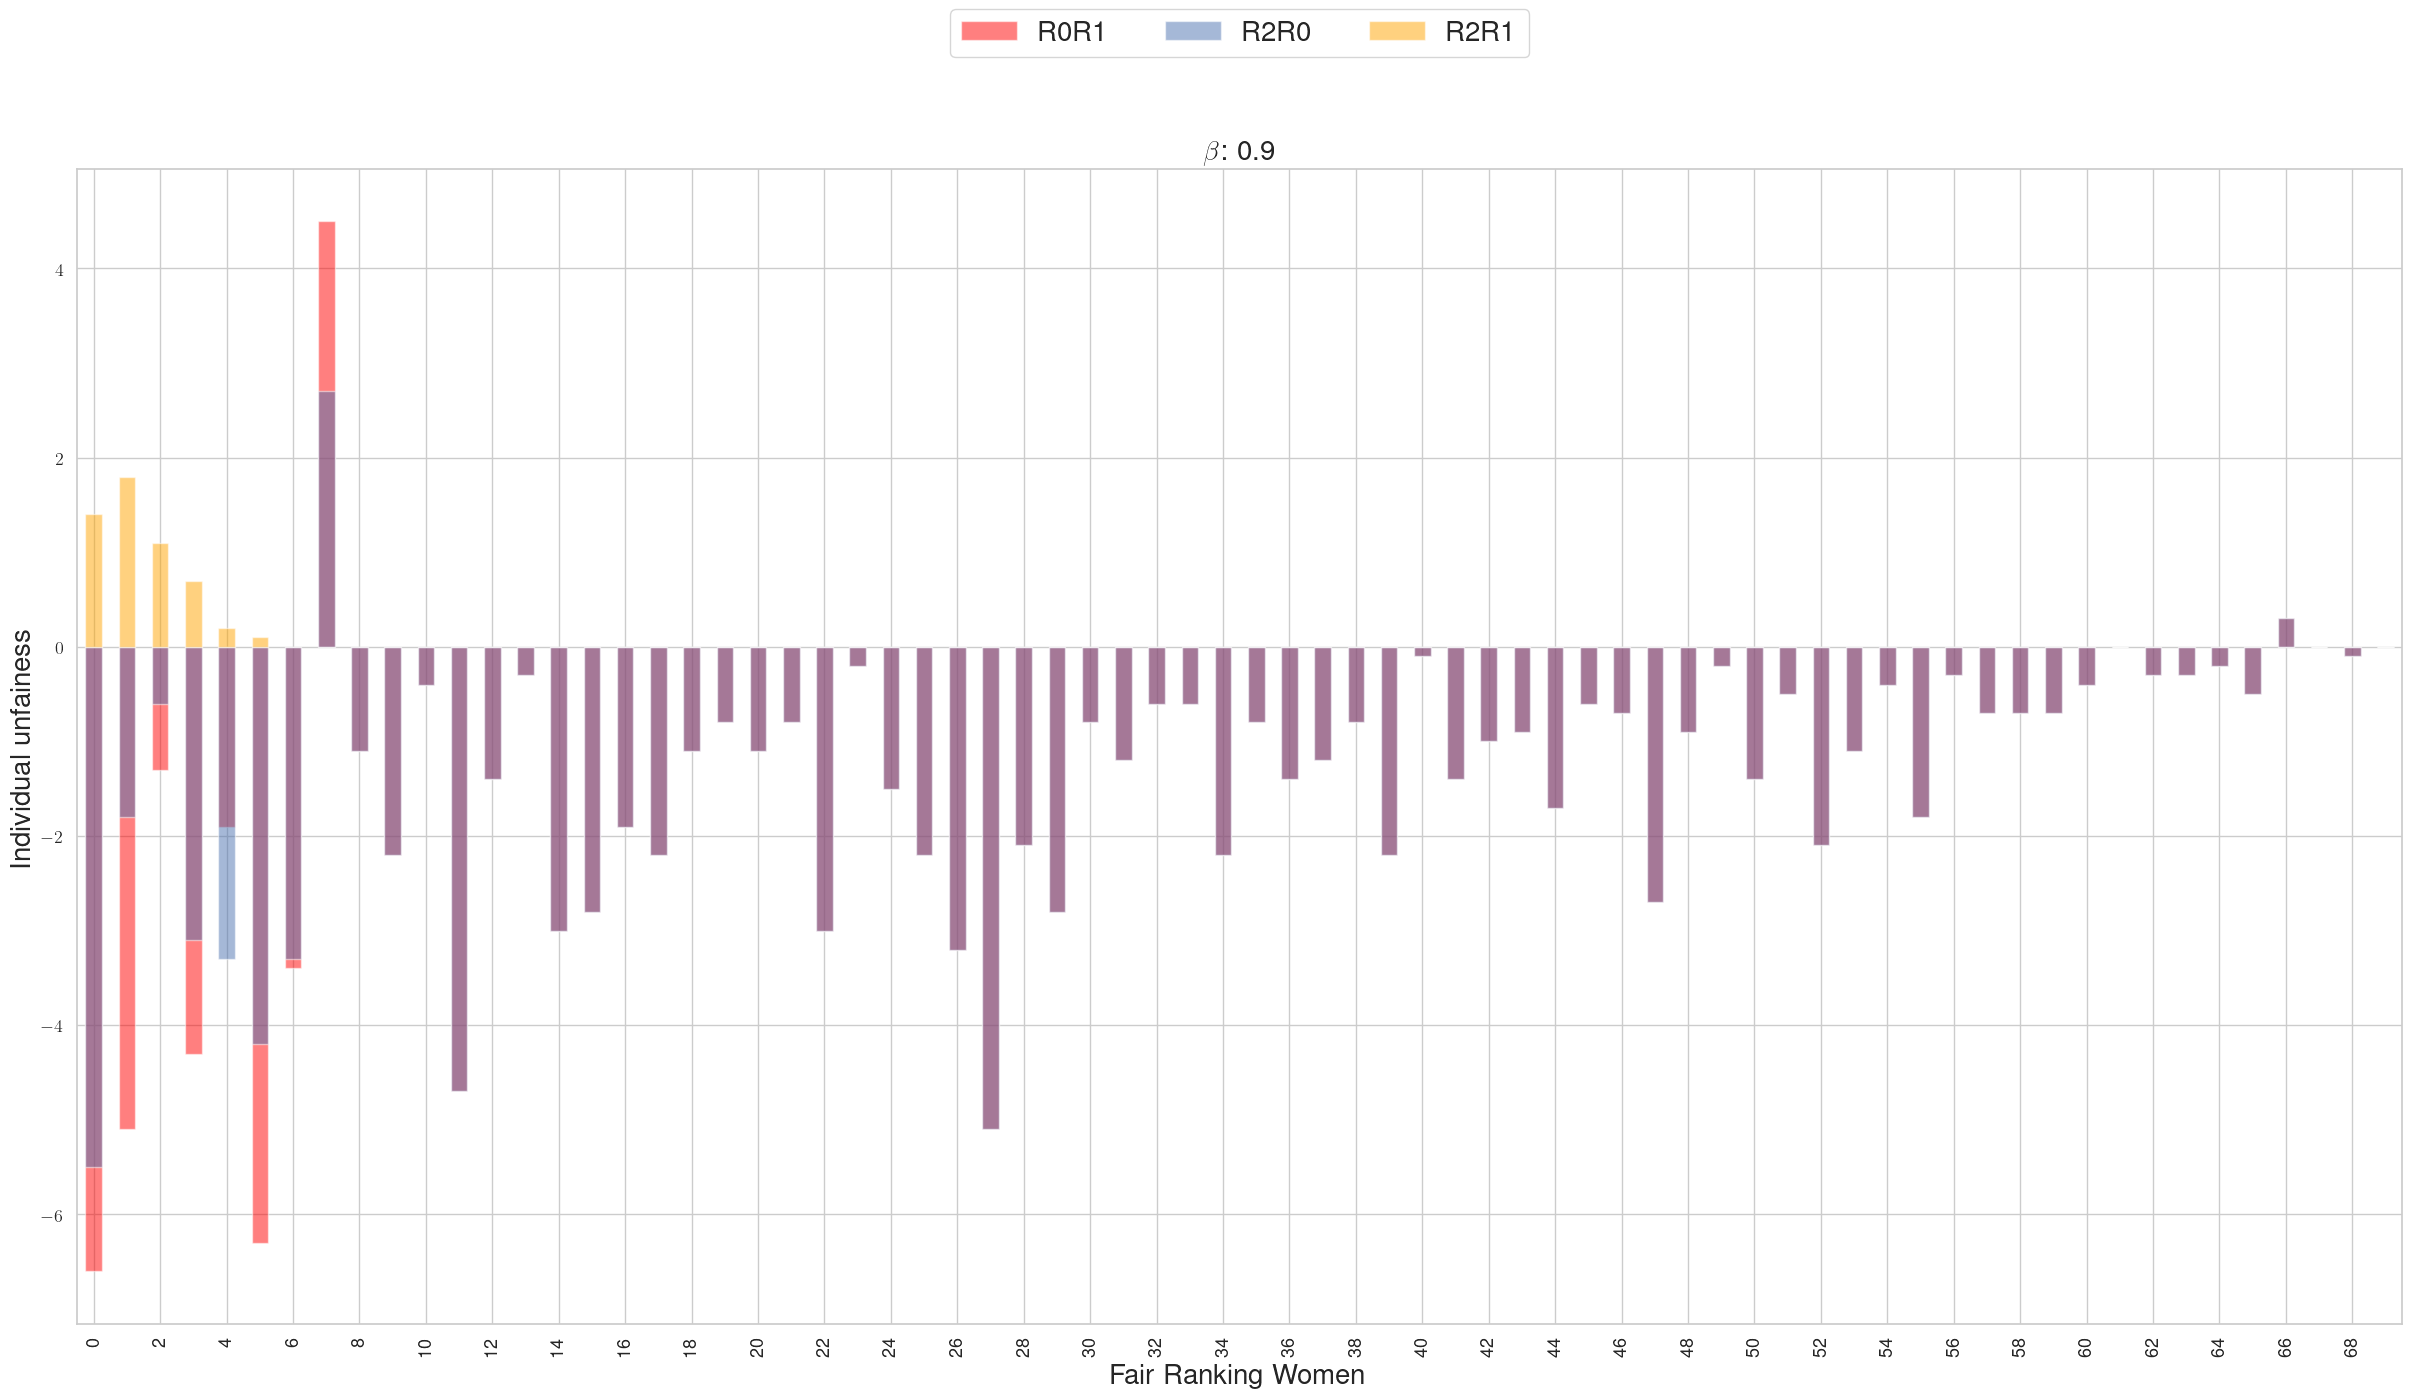

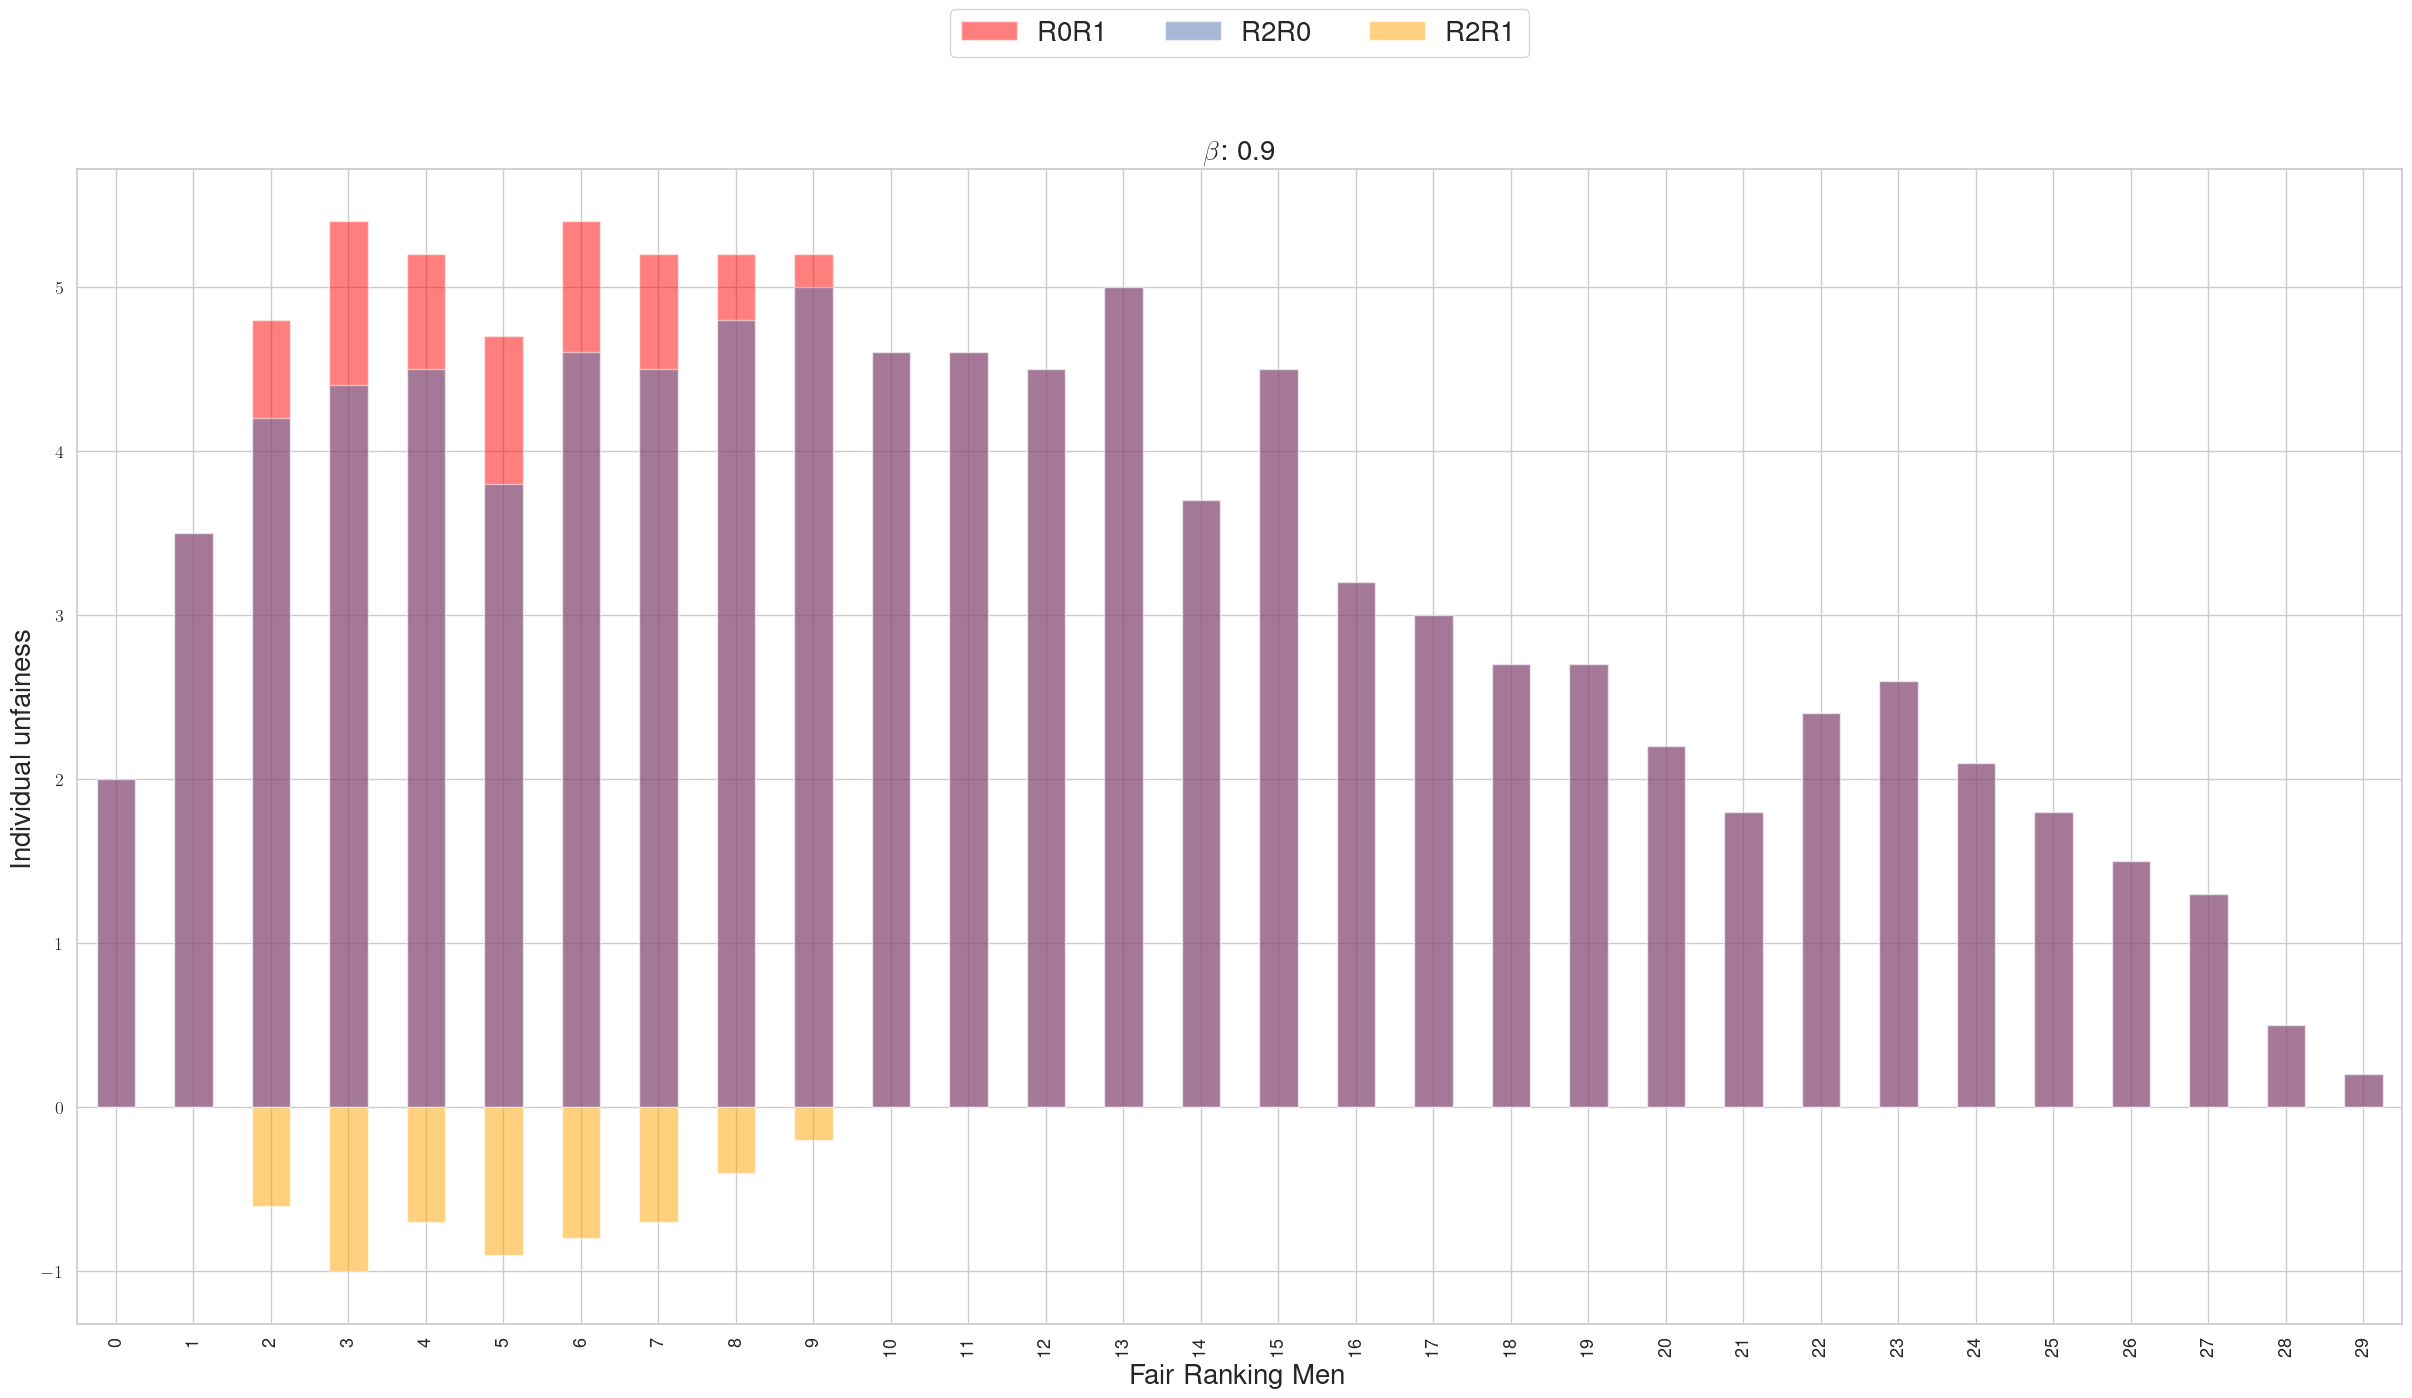

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.08it/s]


Proportion of Women: 0.9


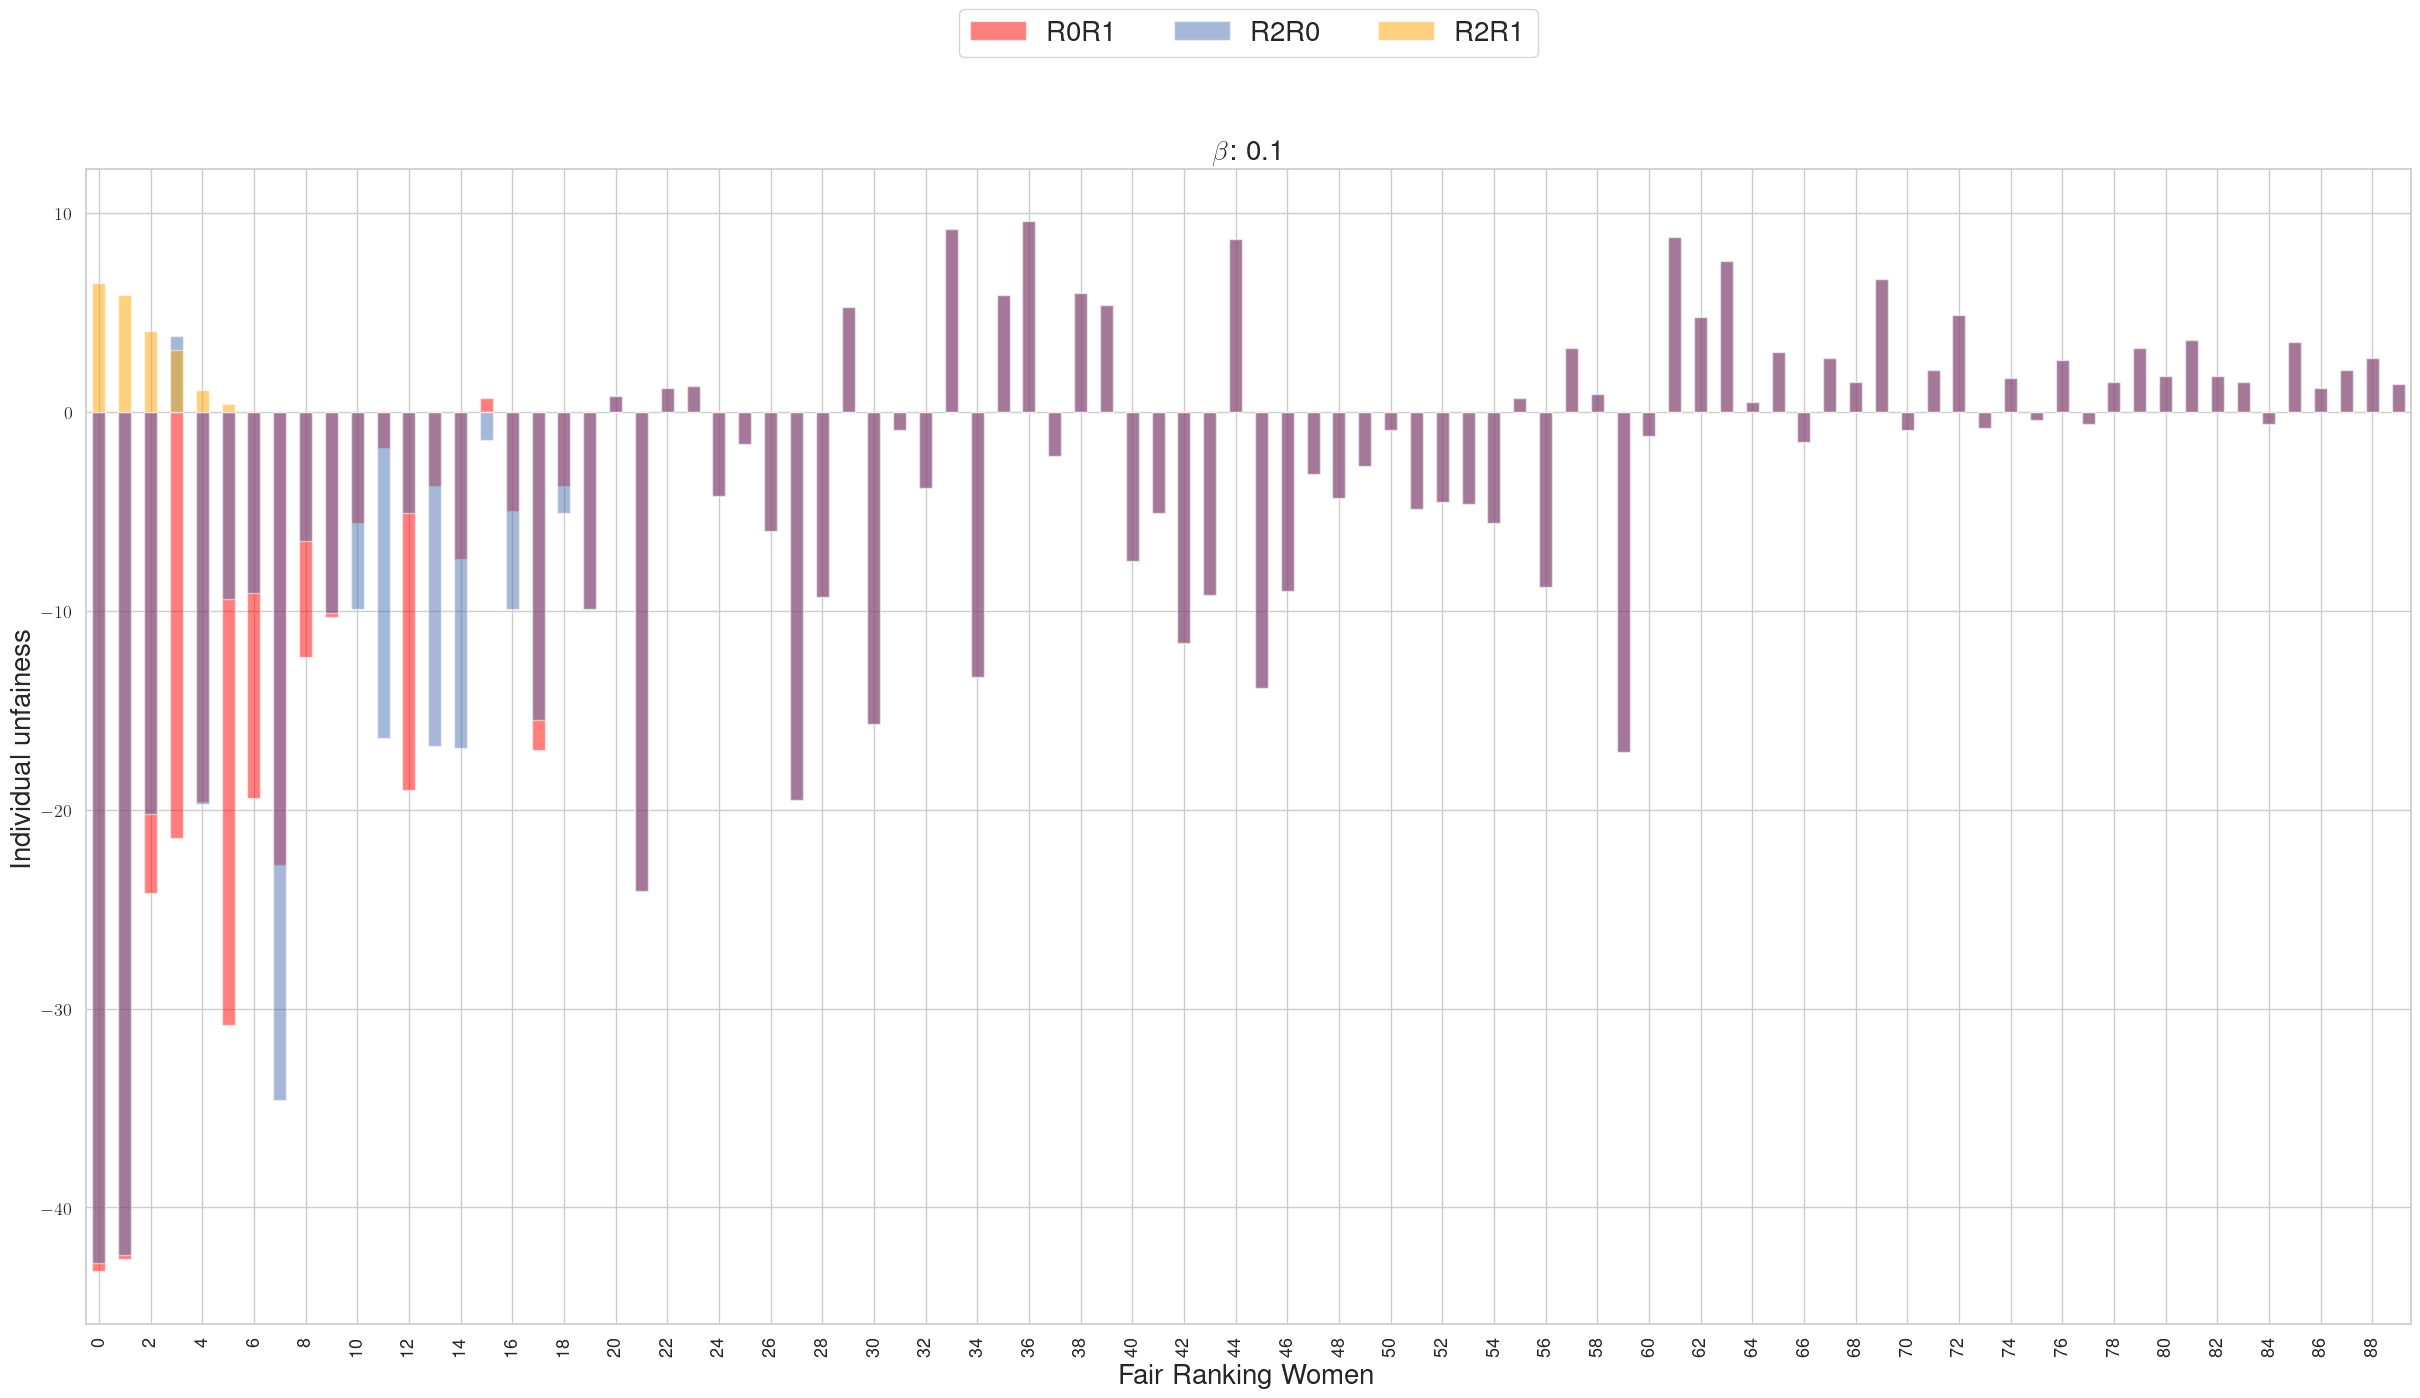

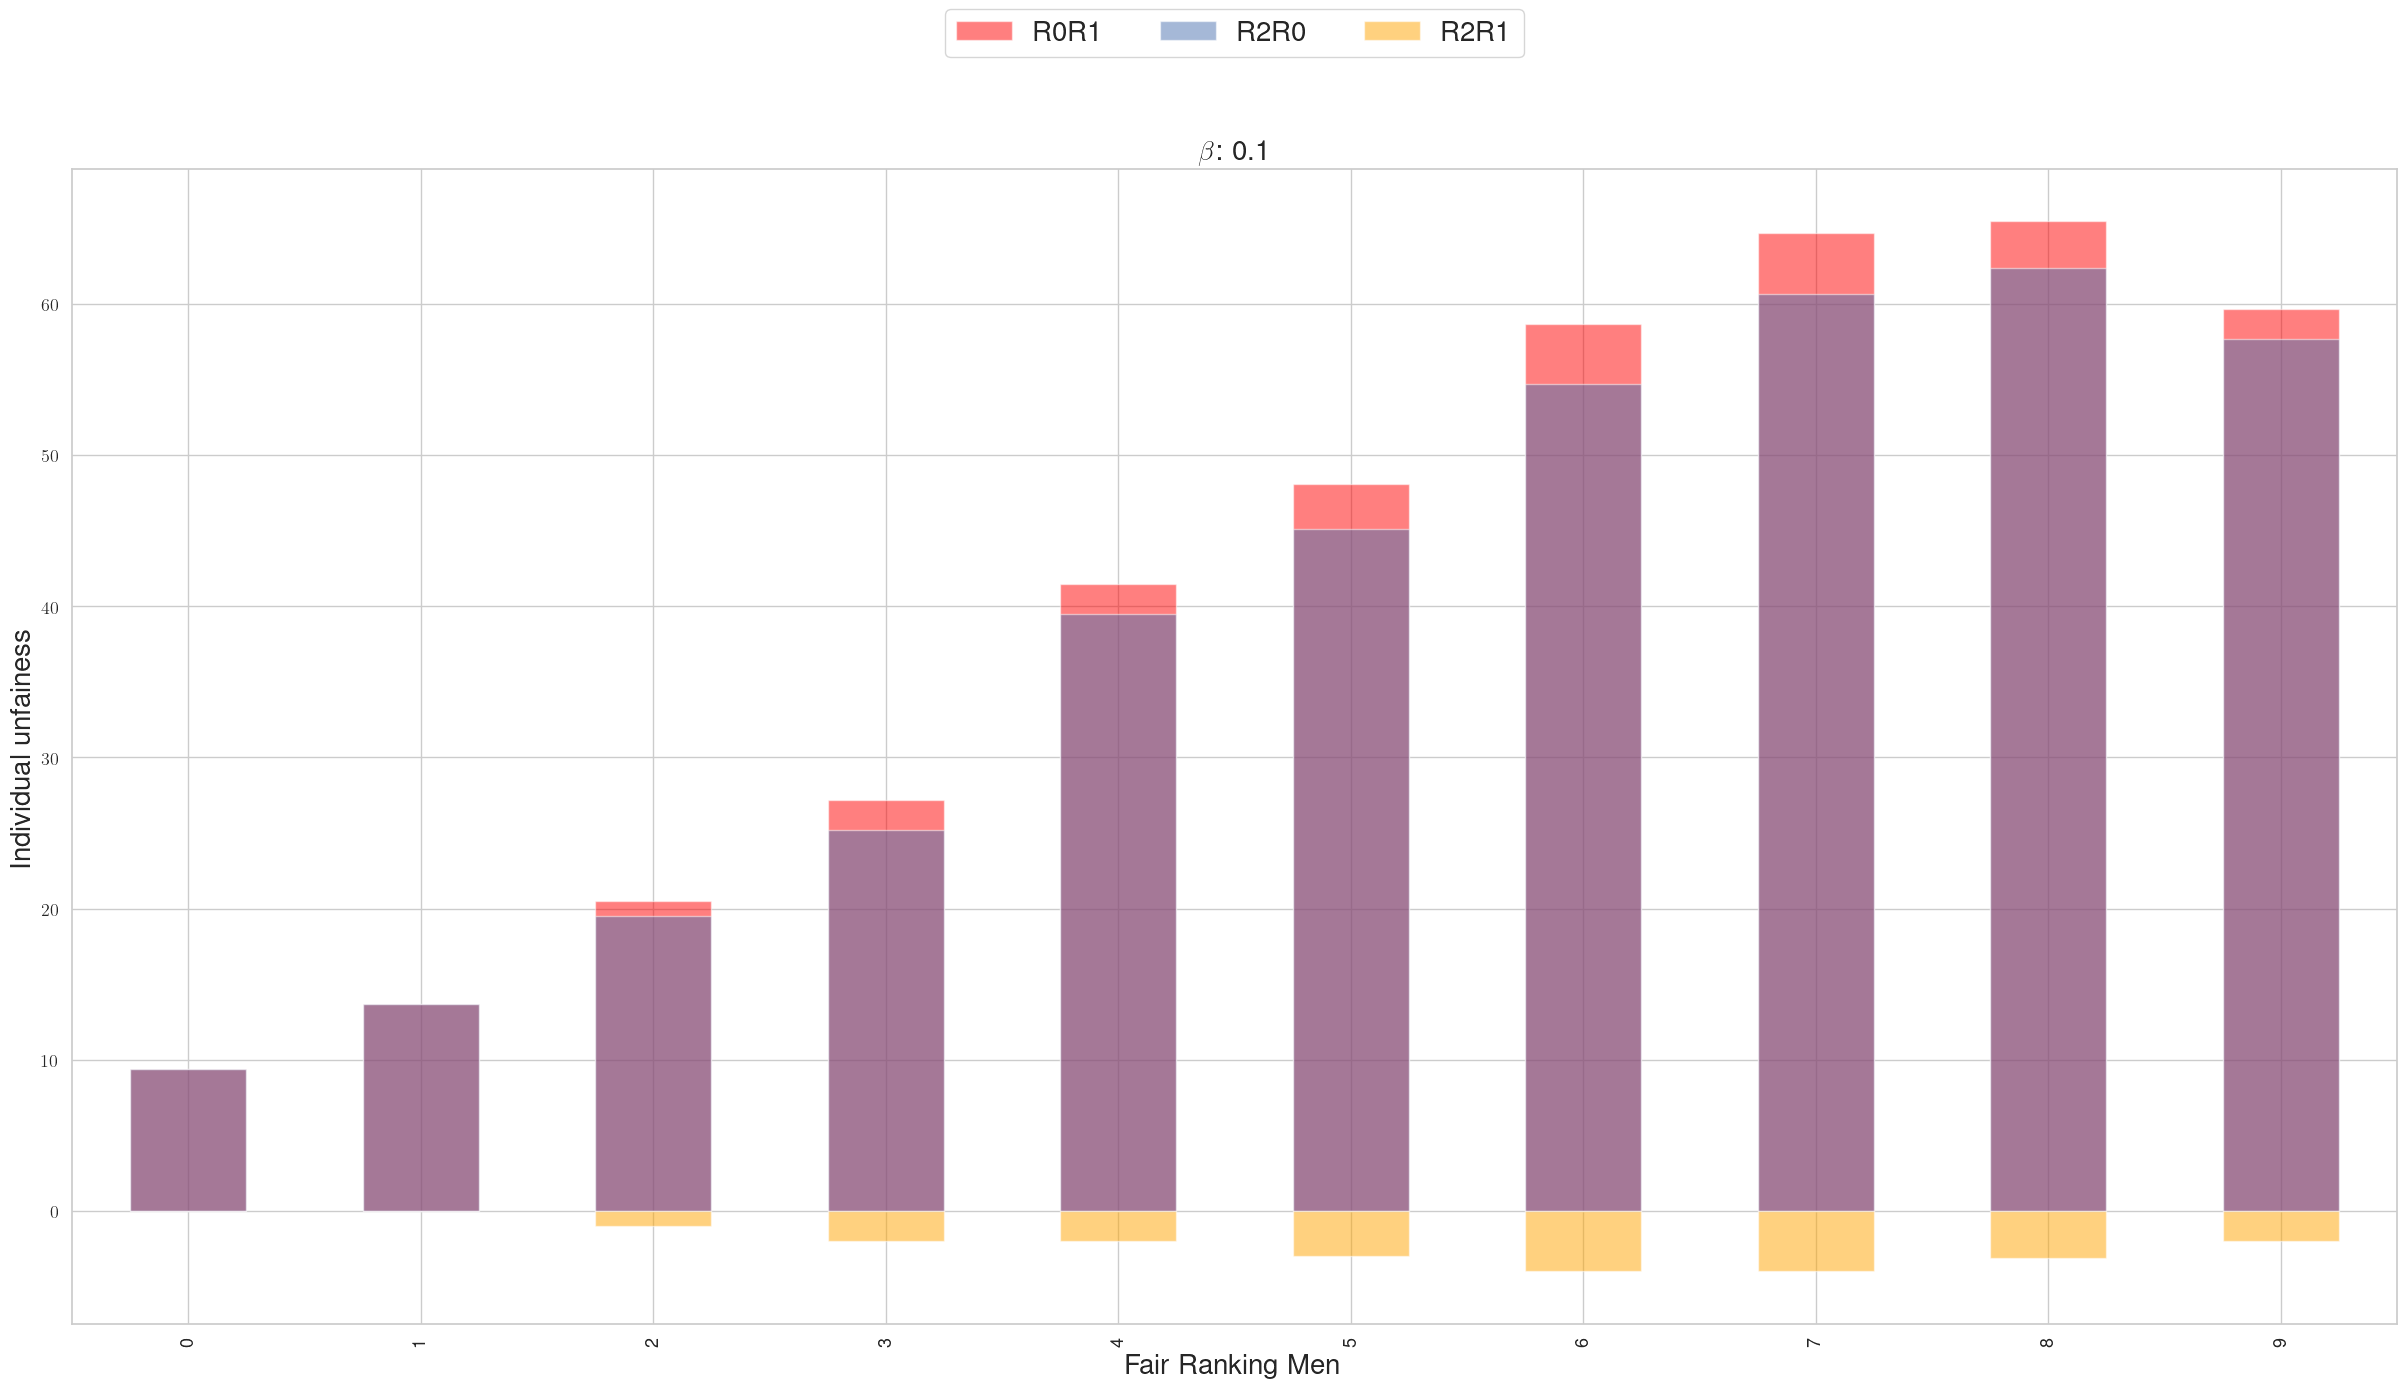

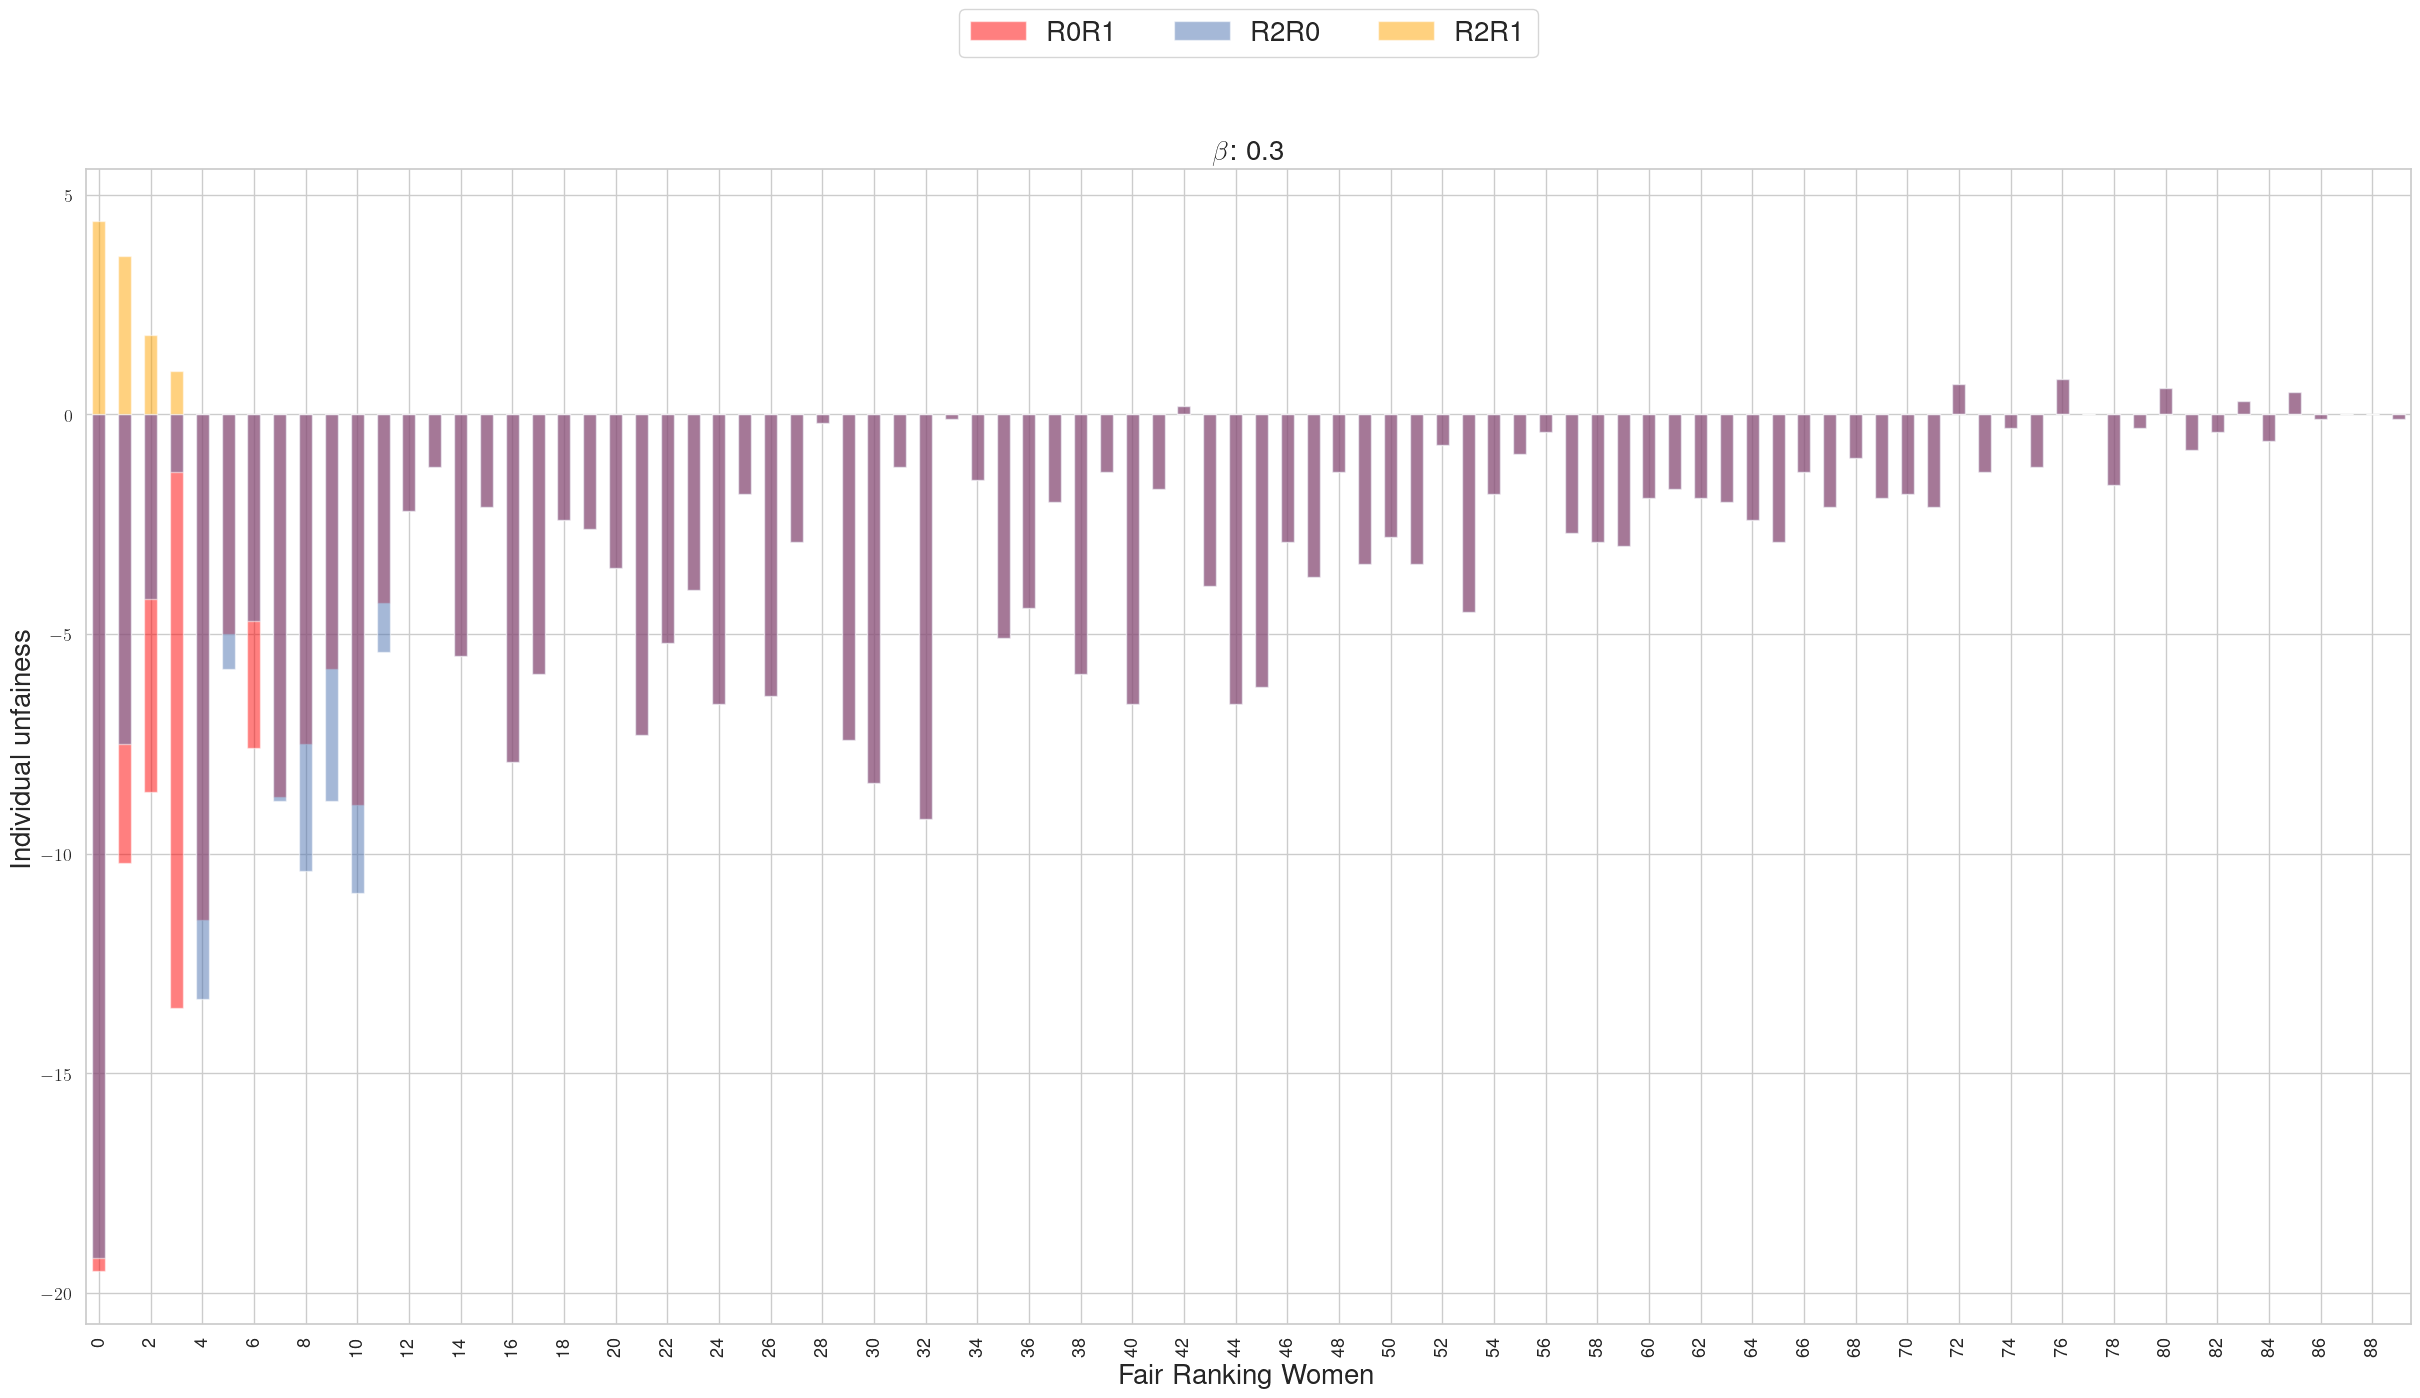

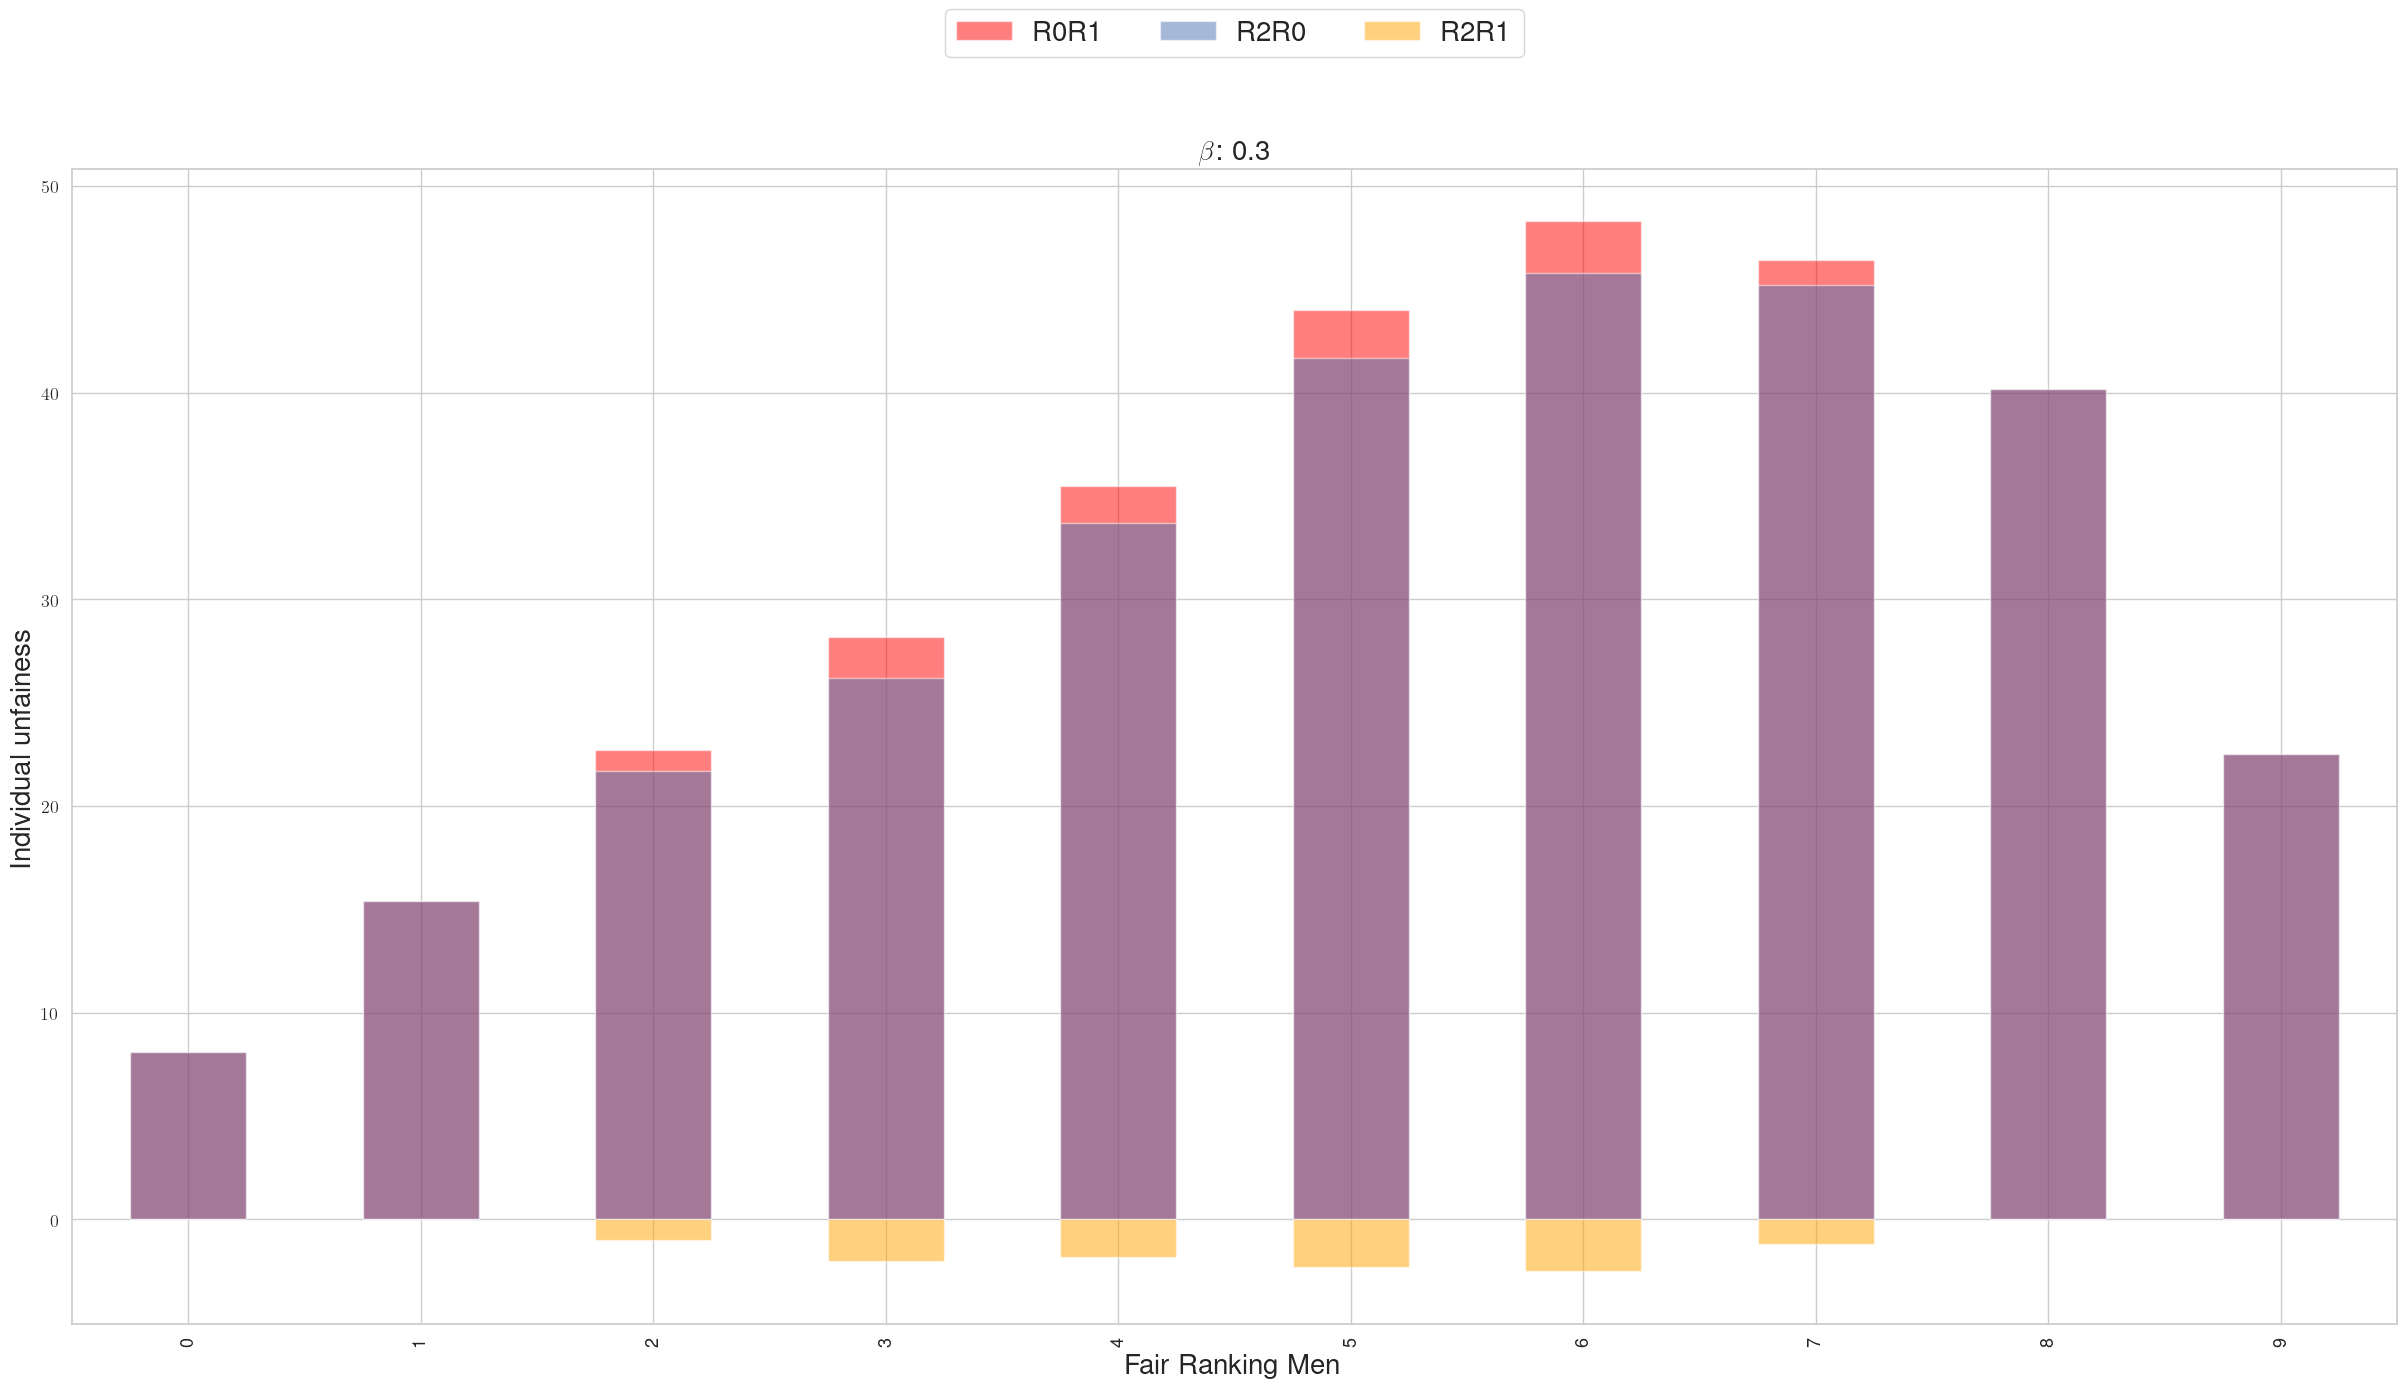

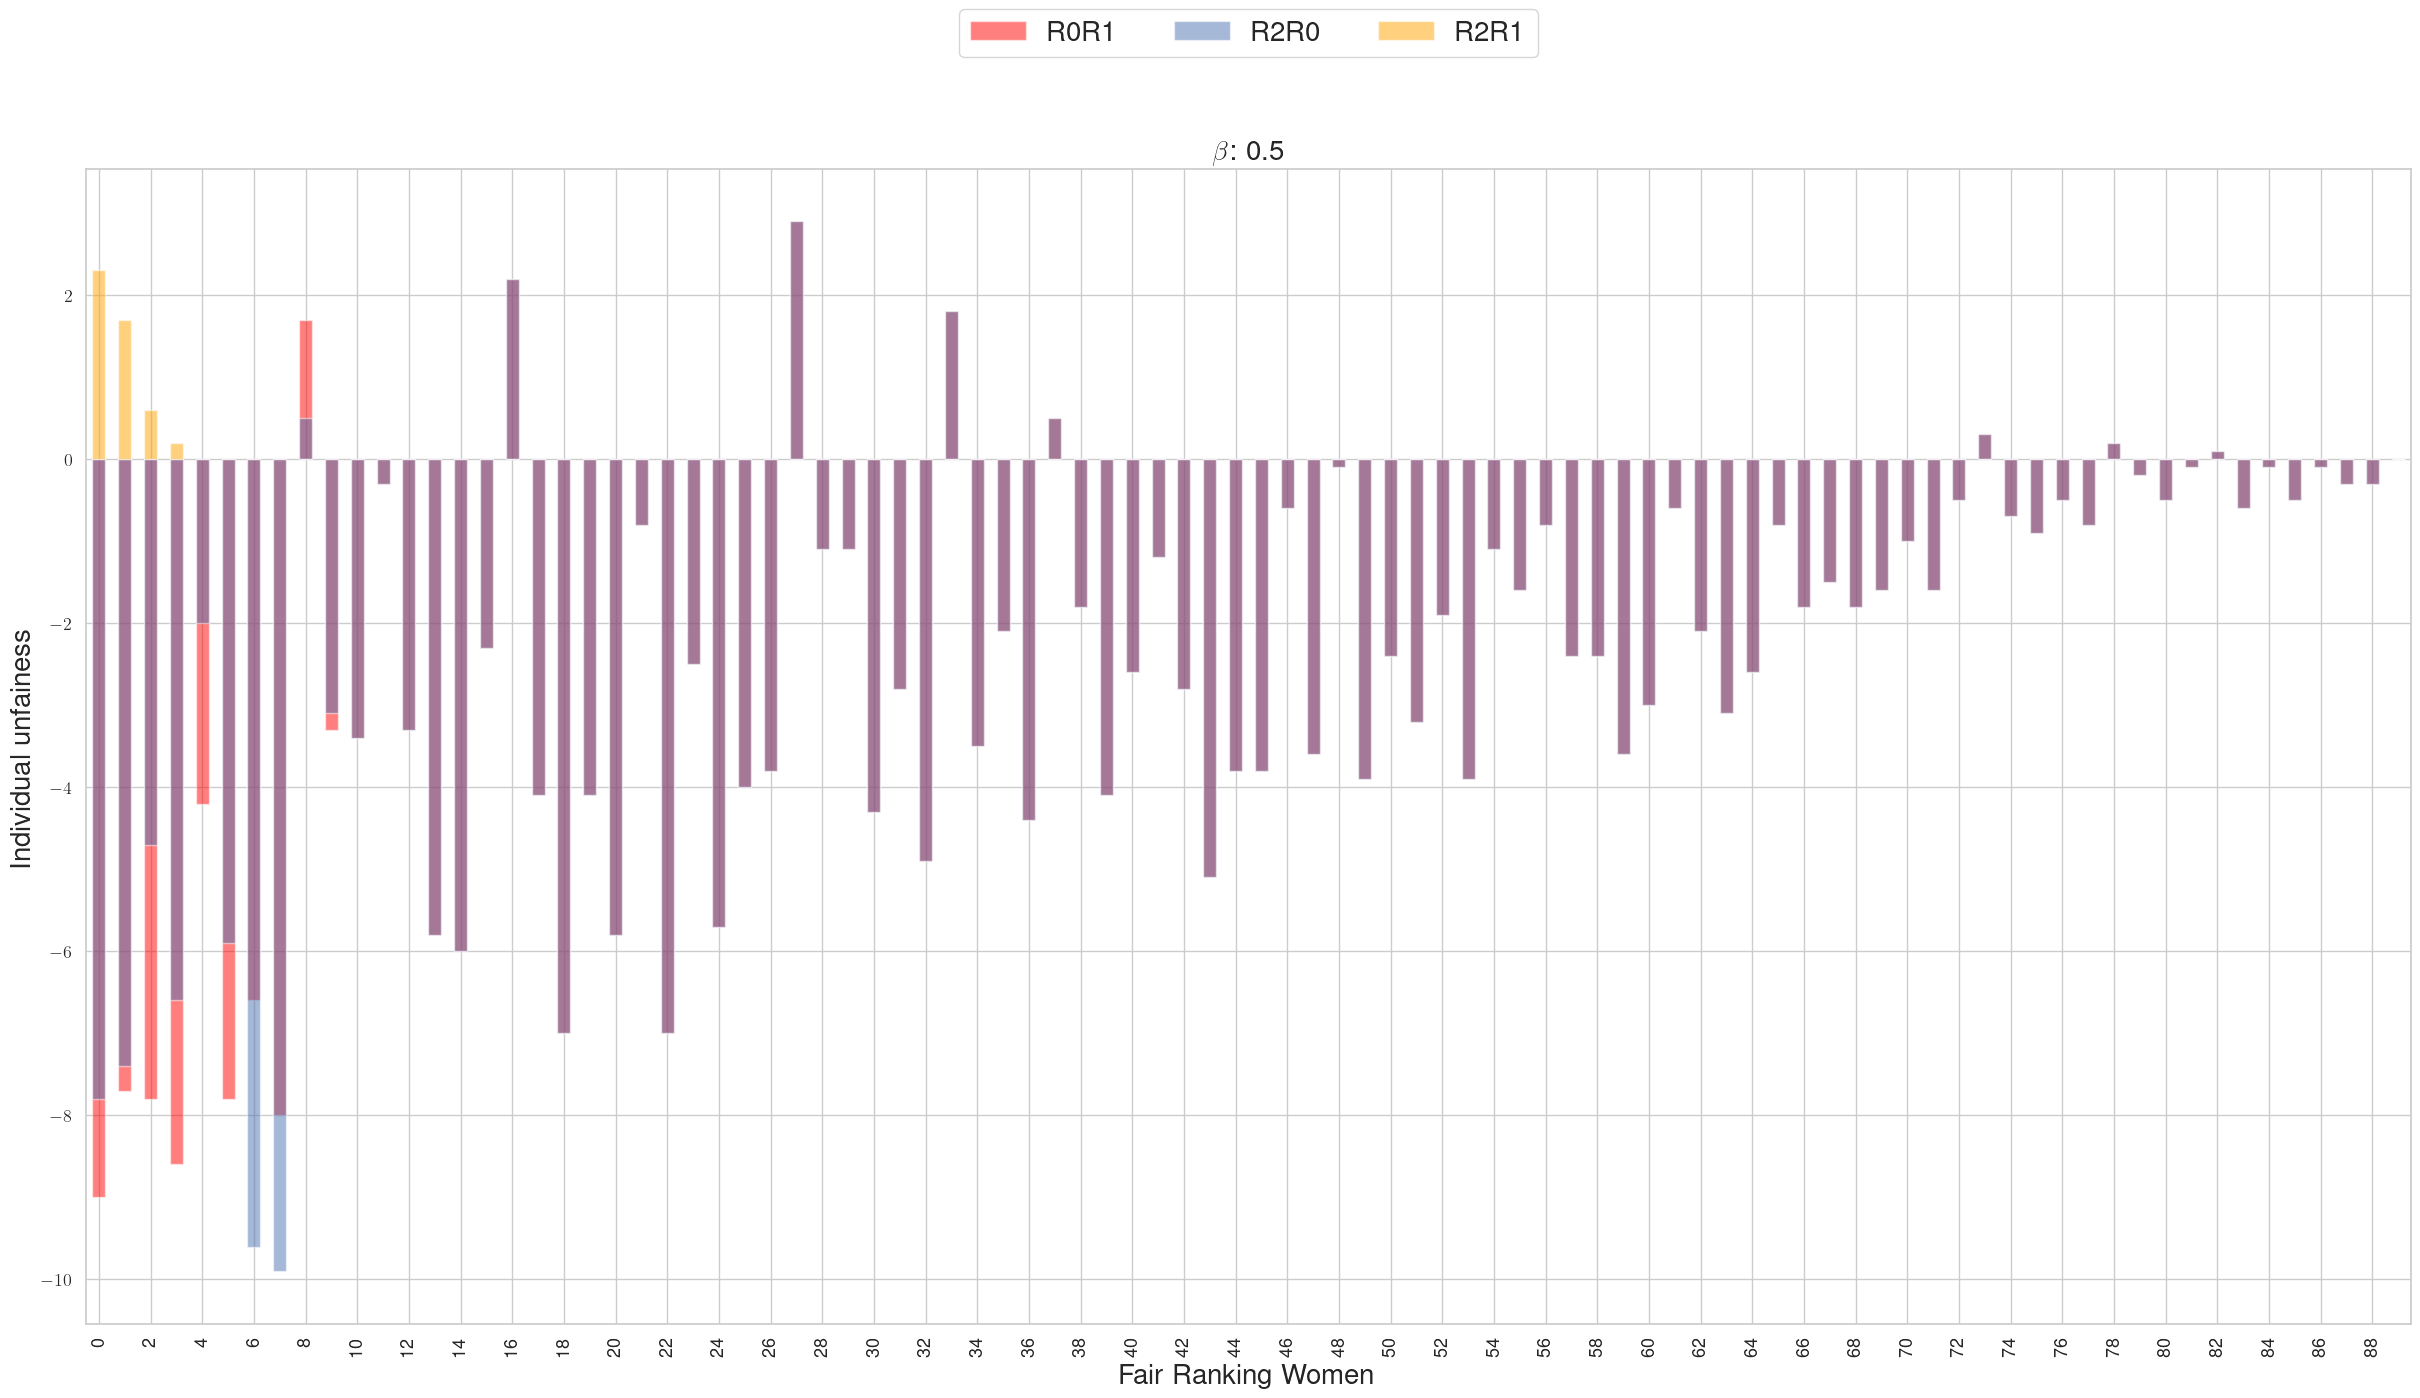

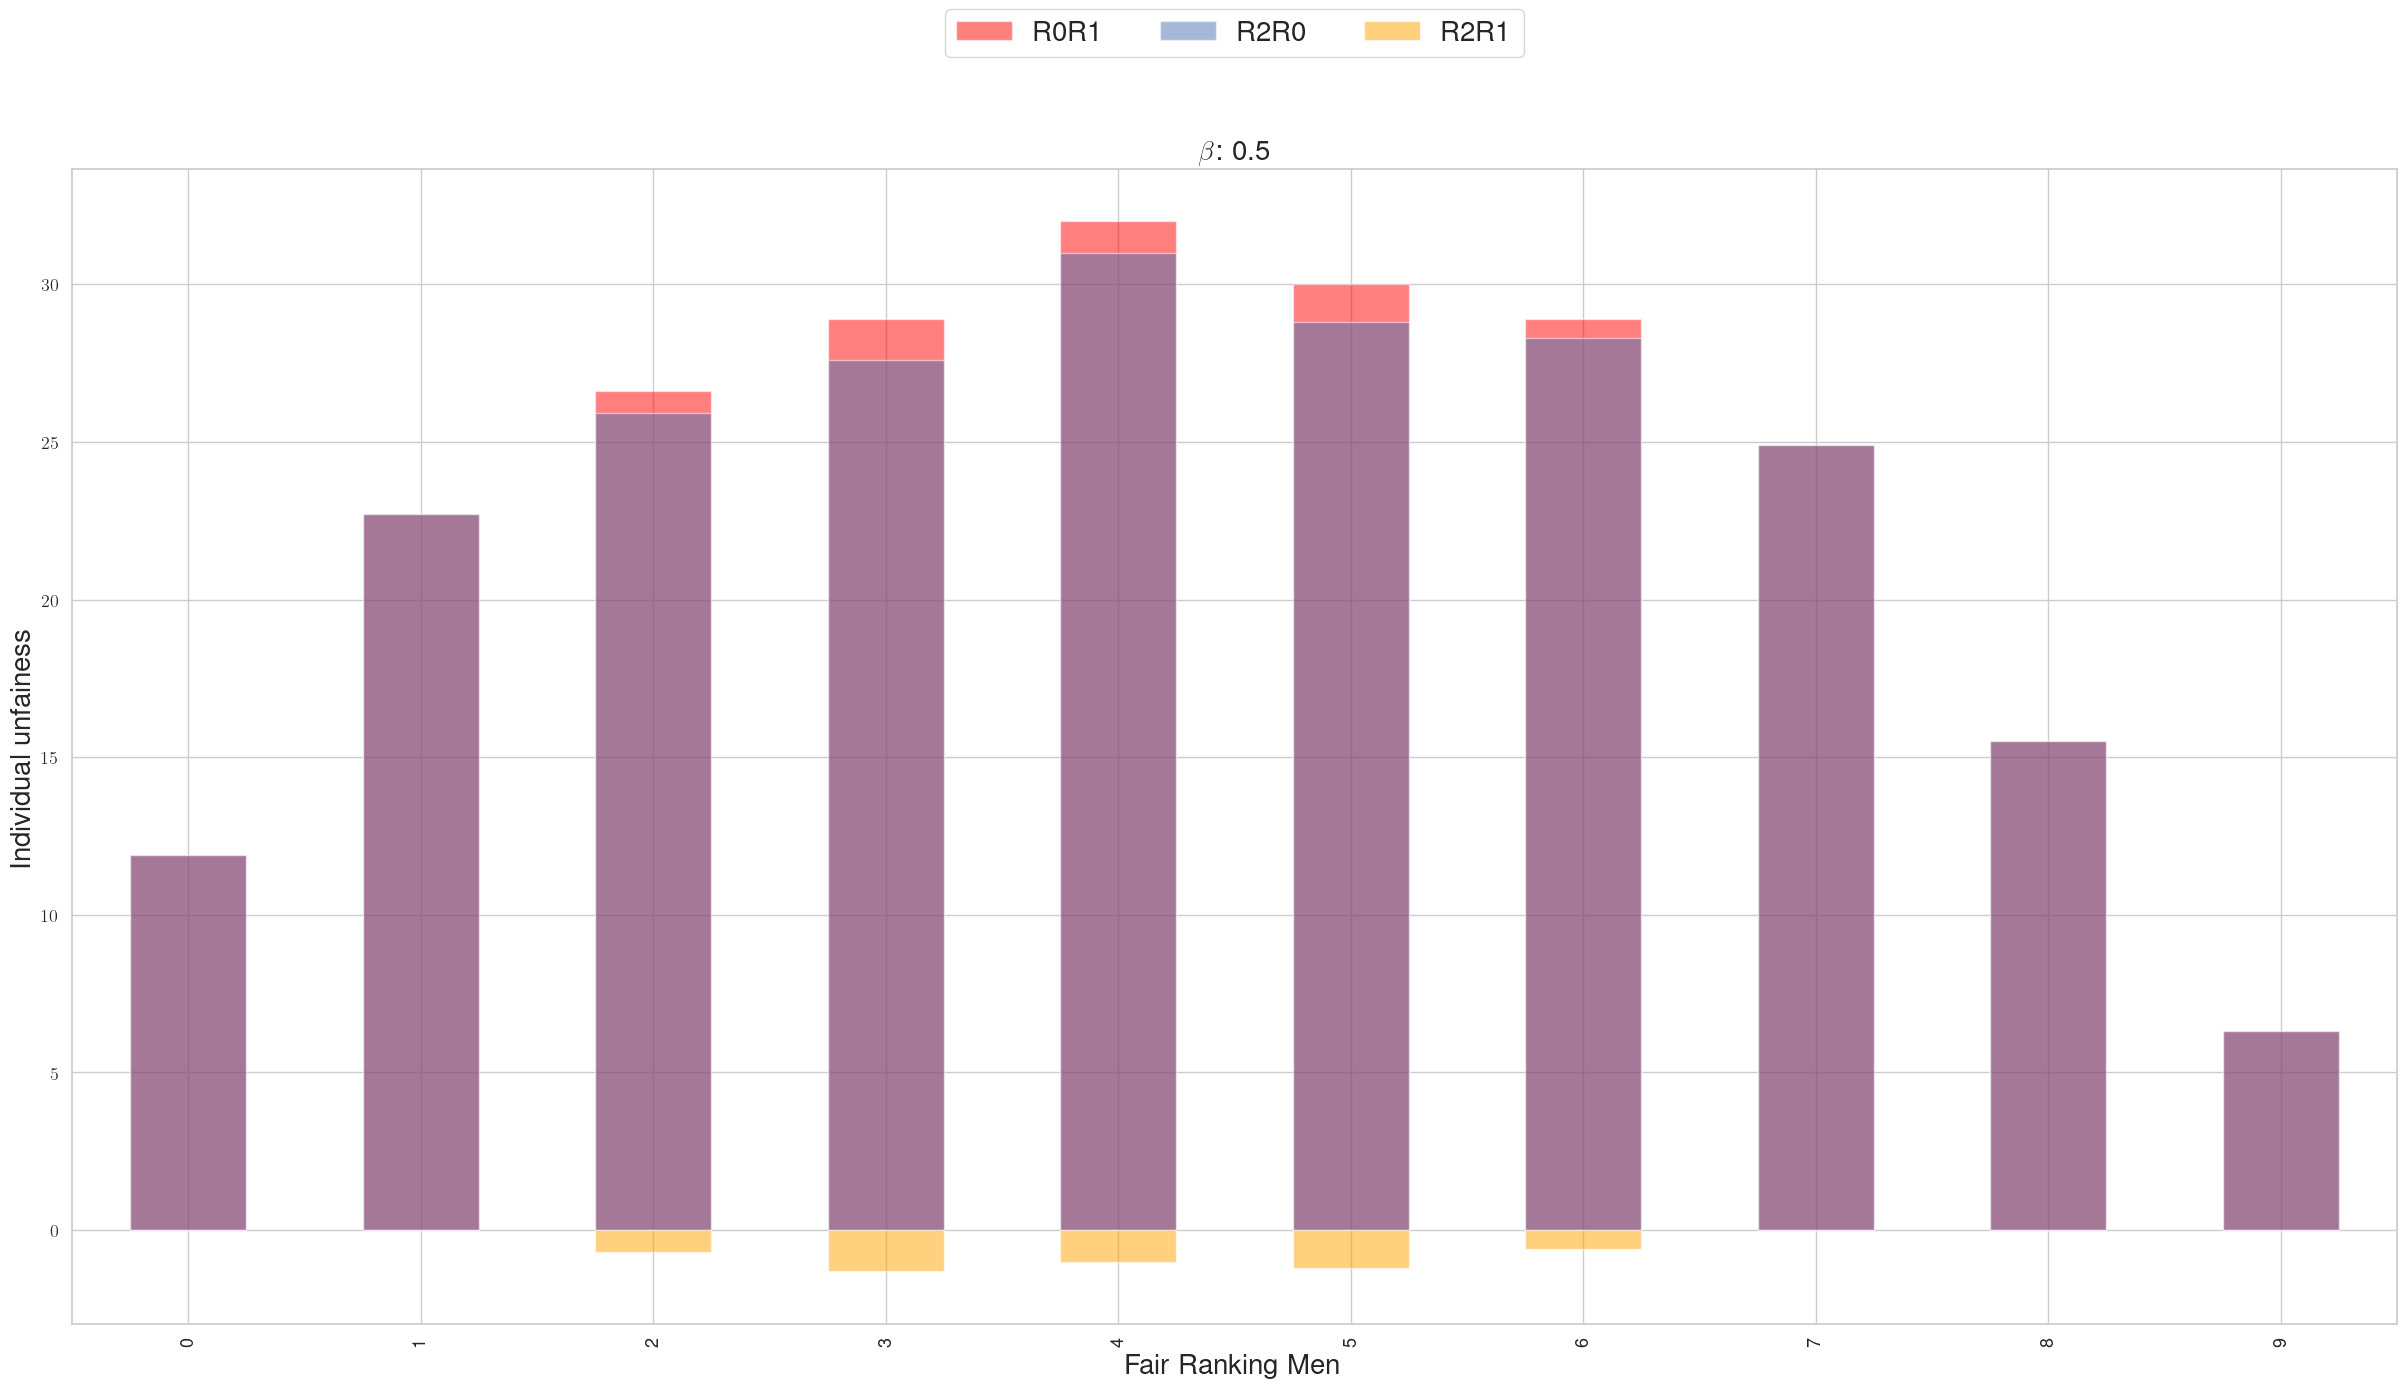

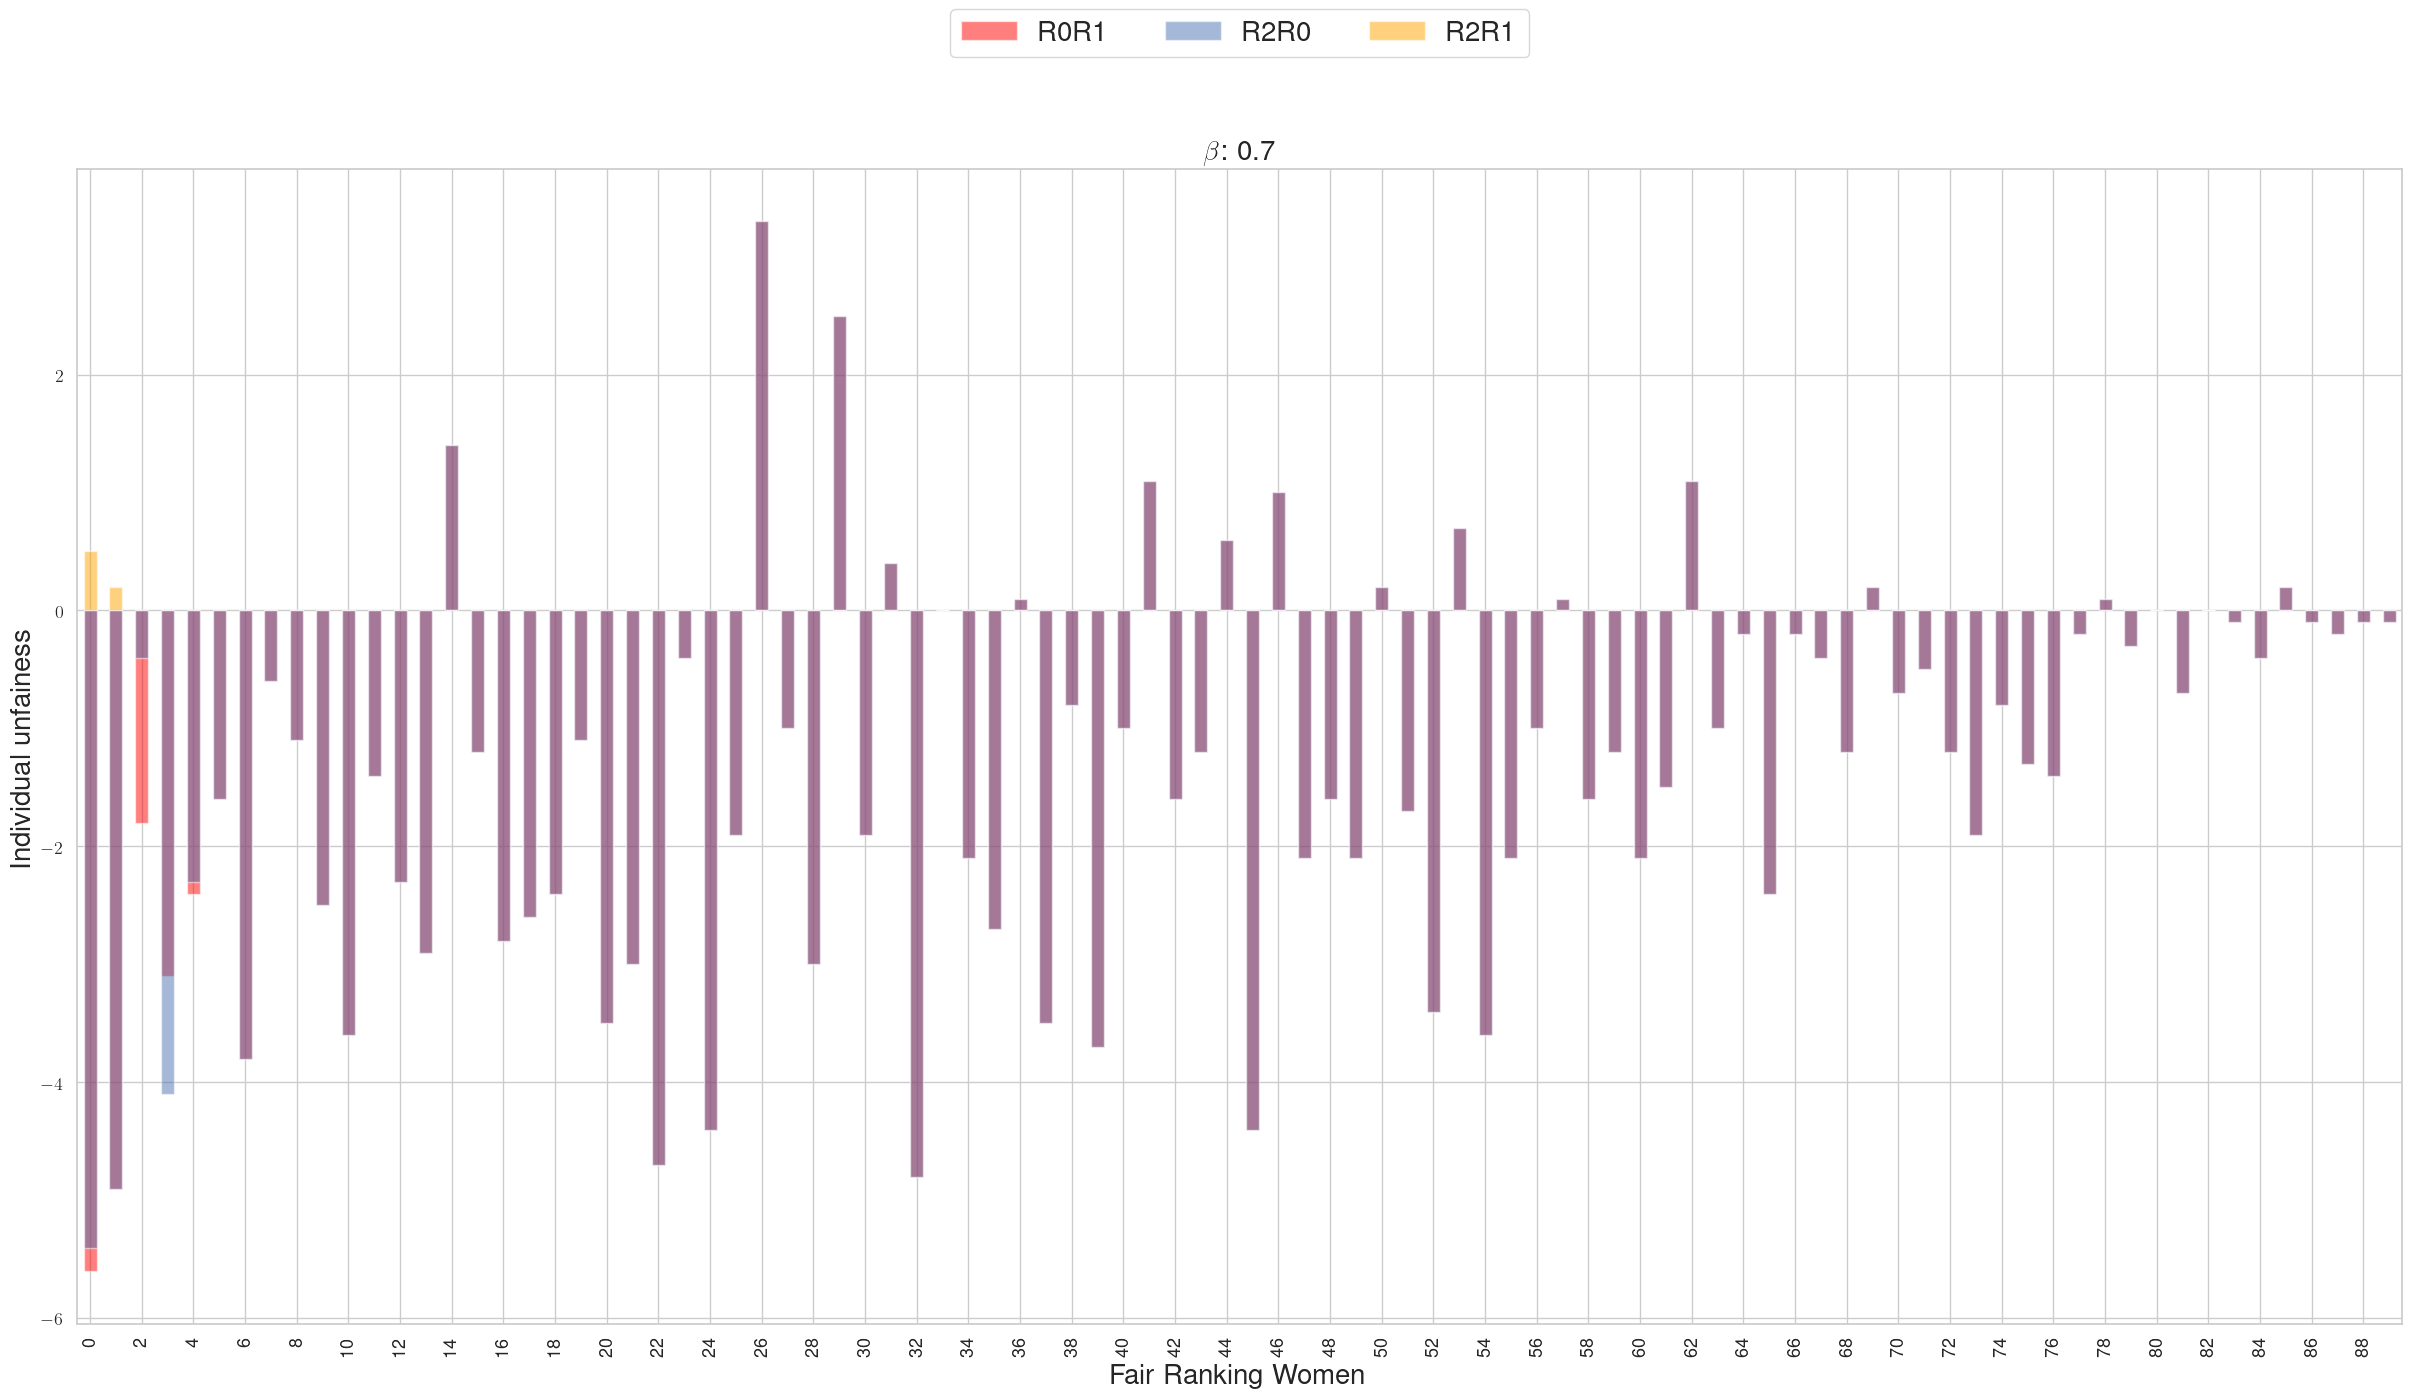

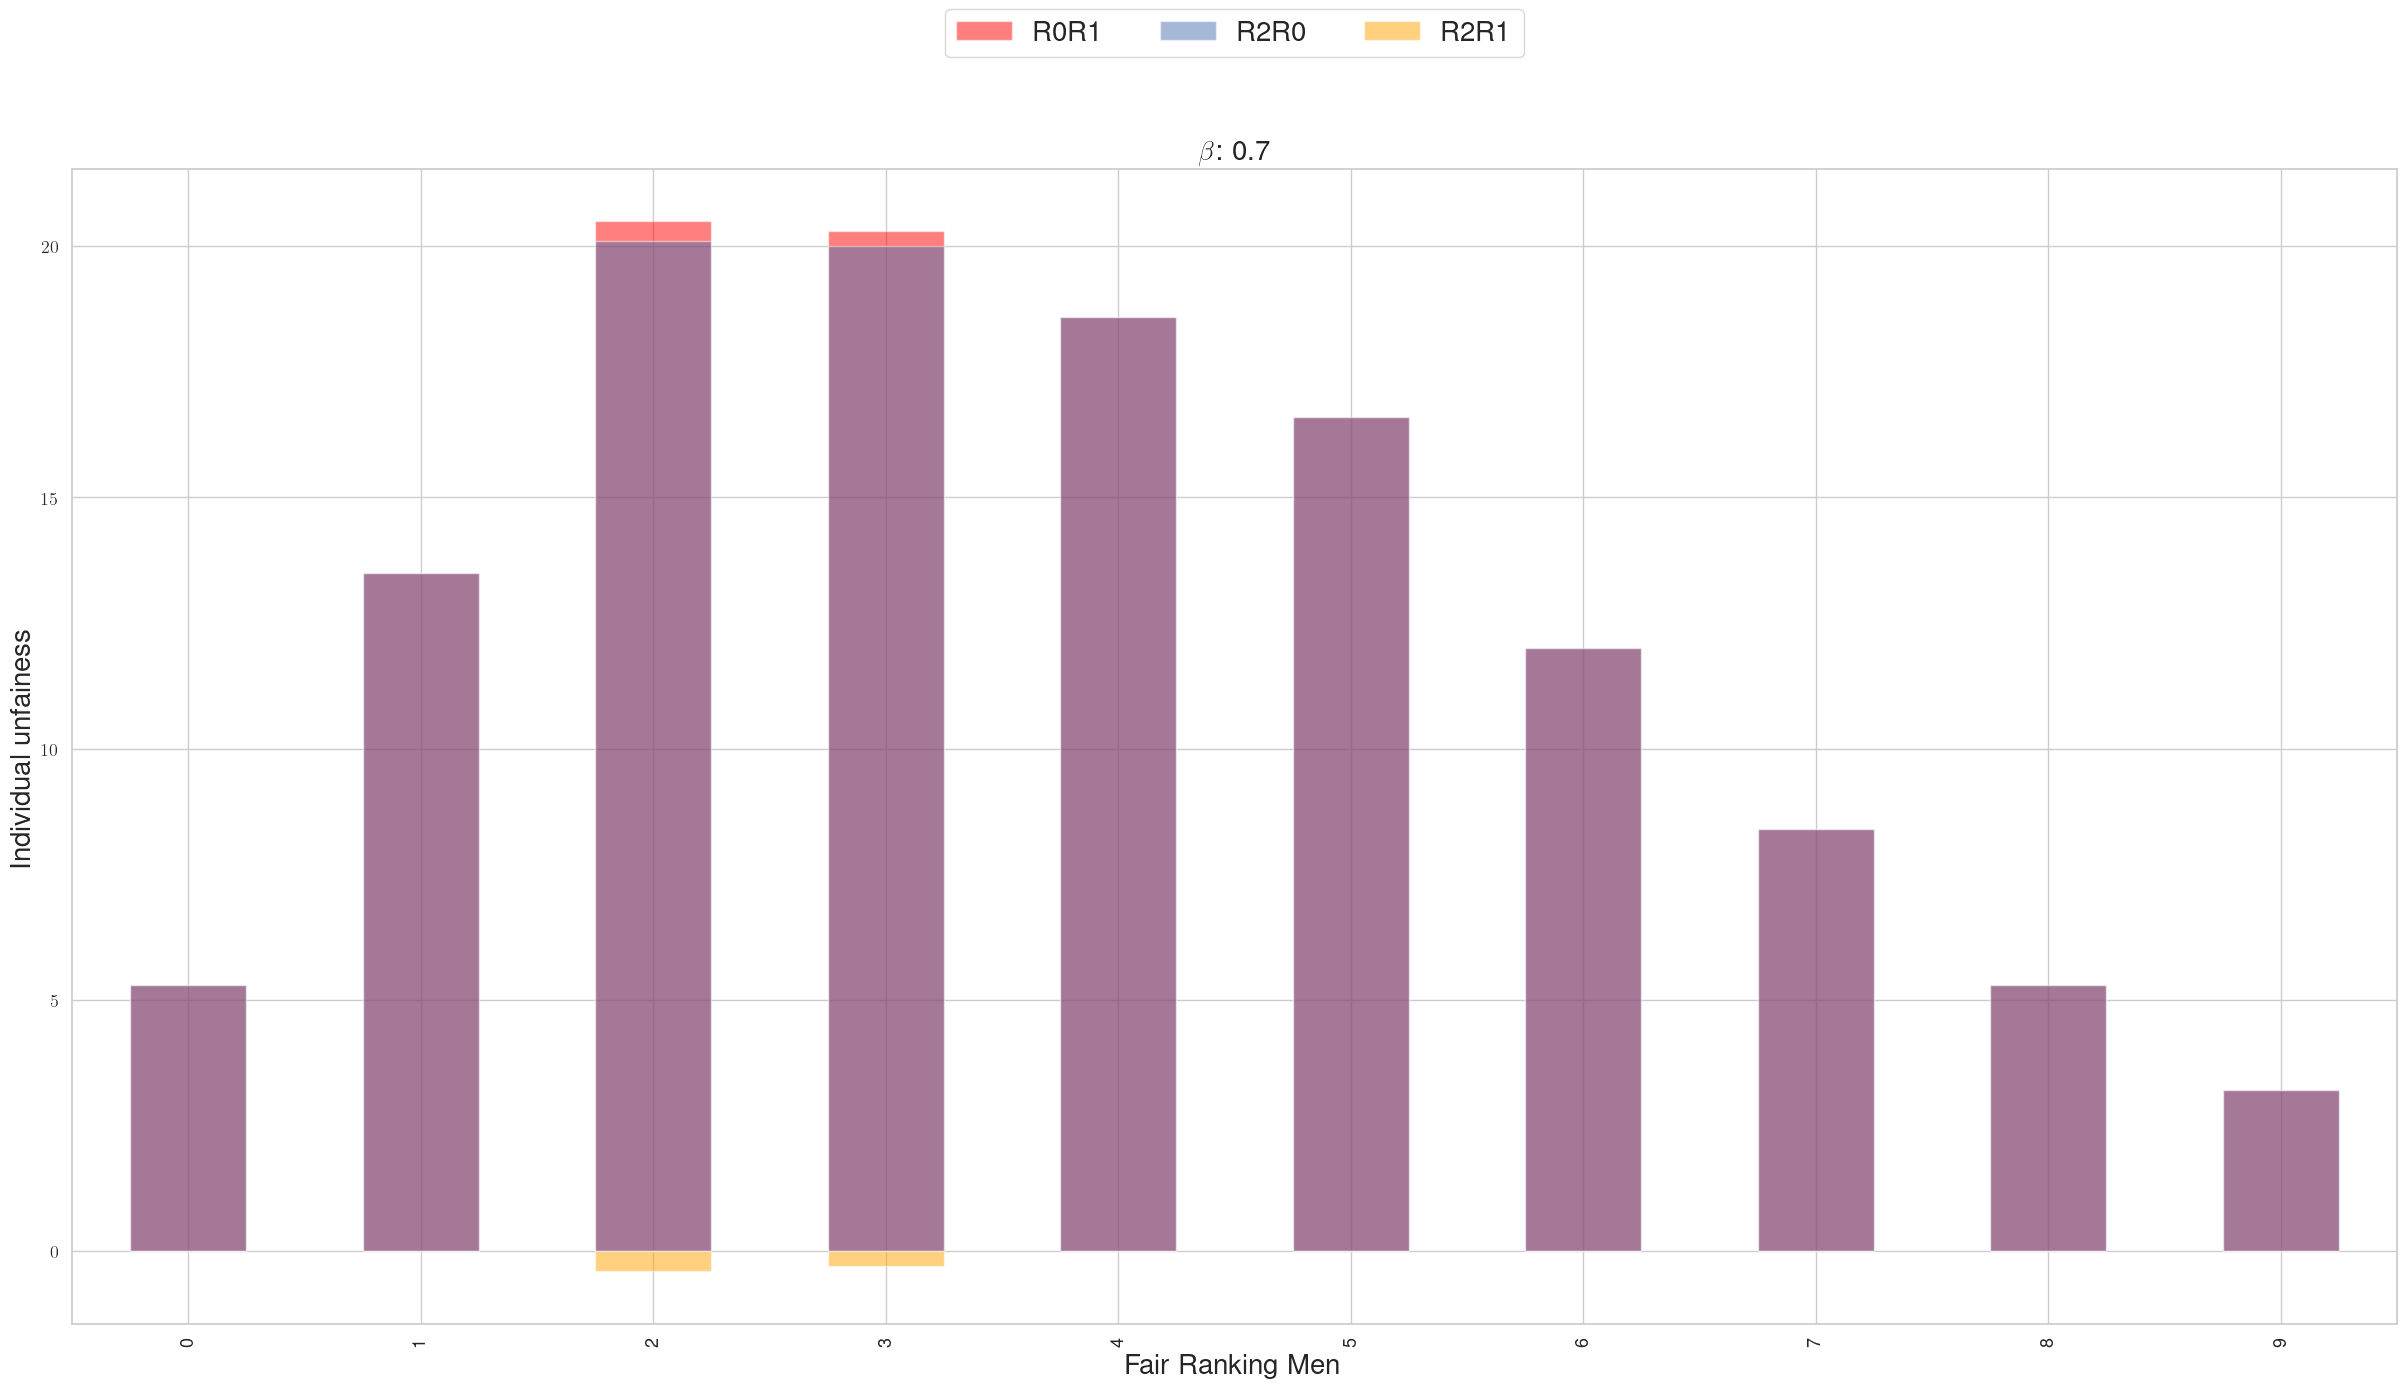

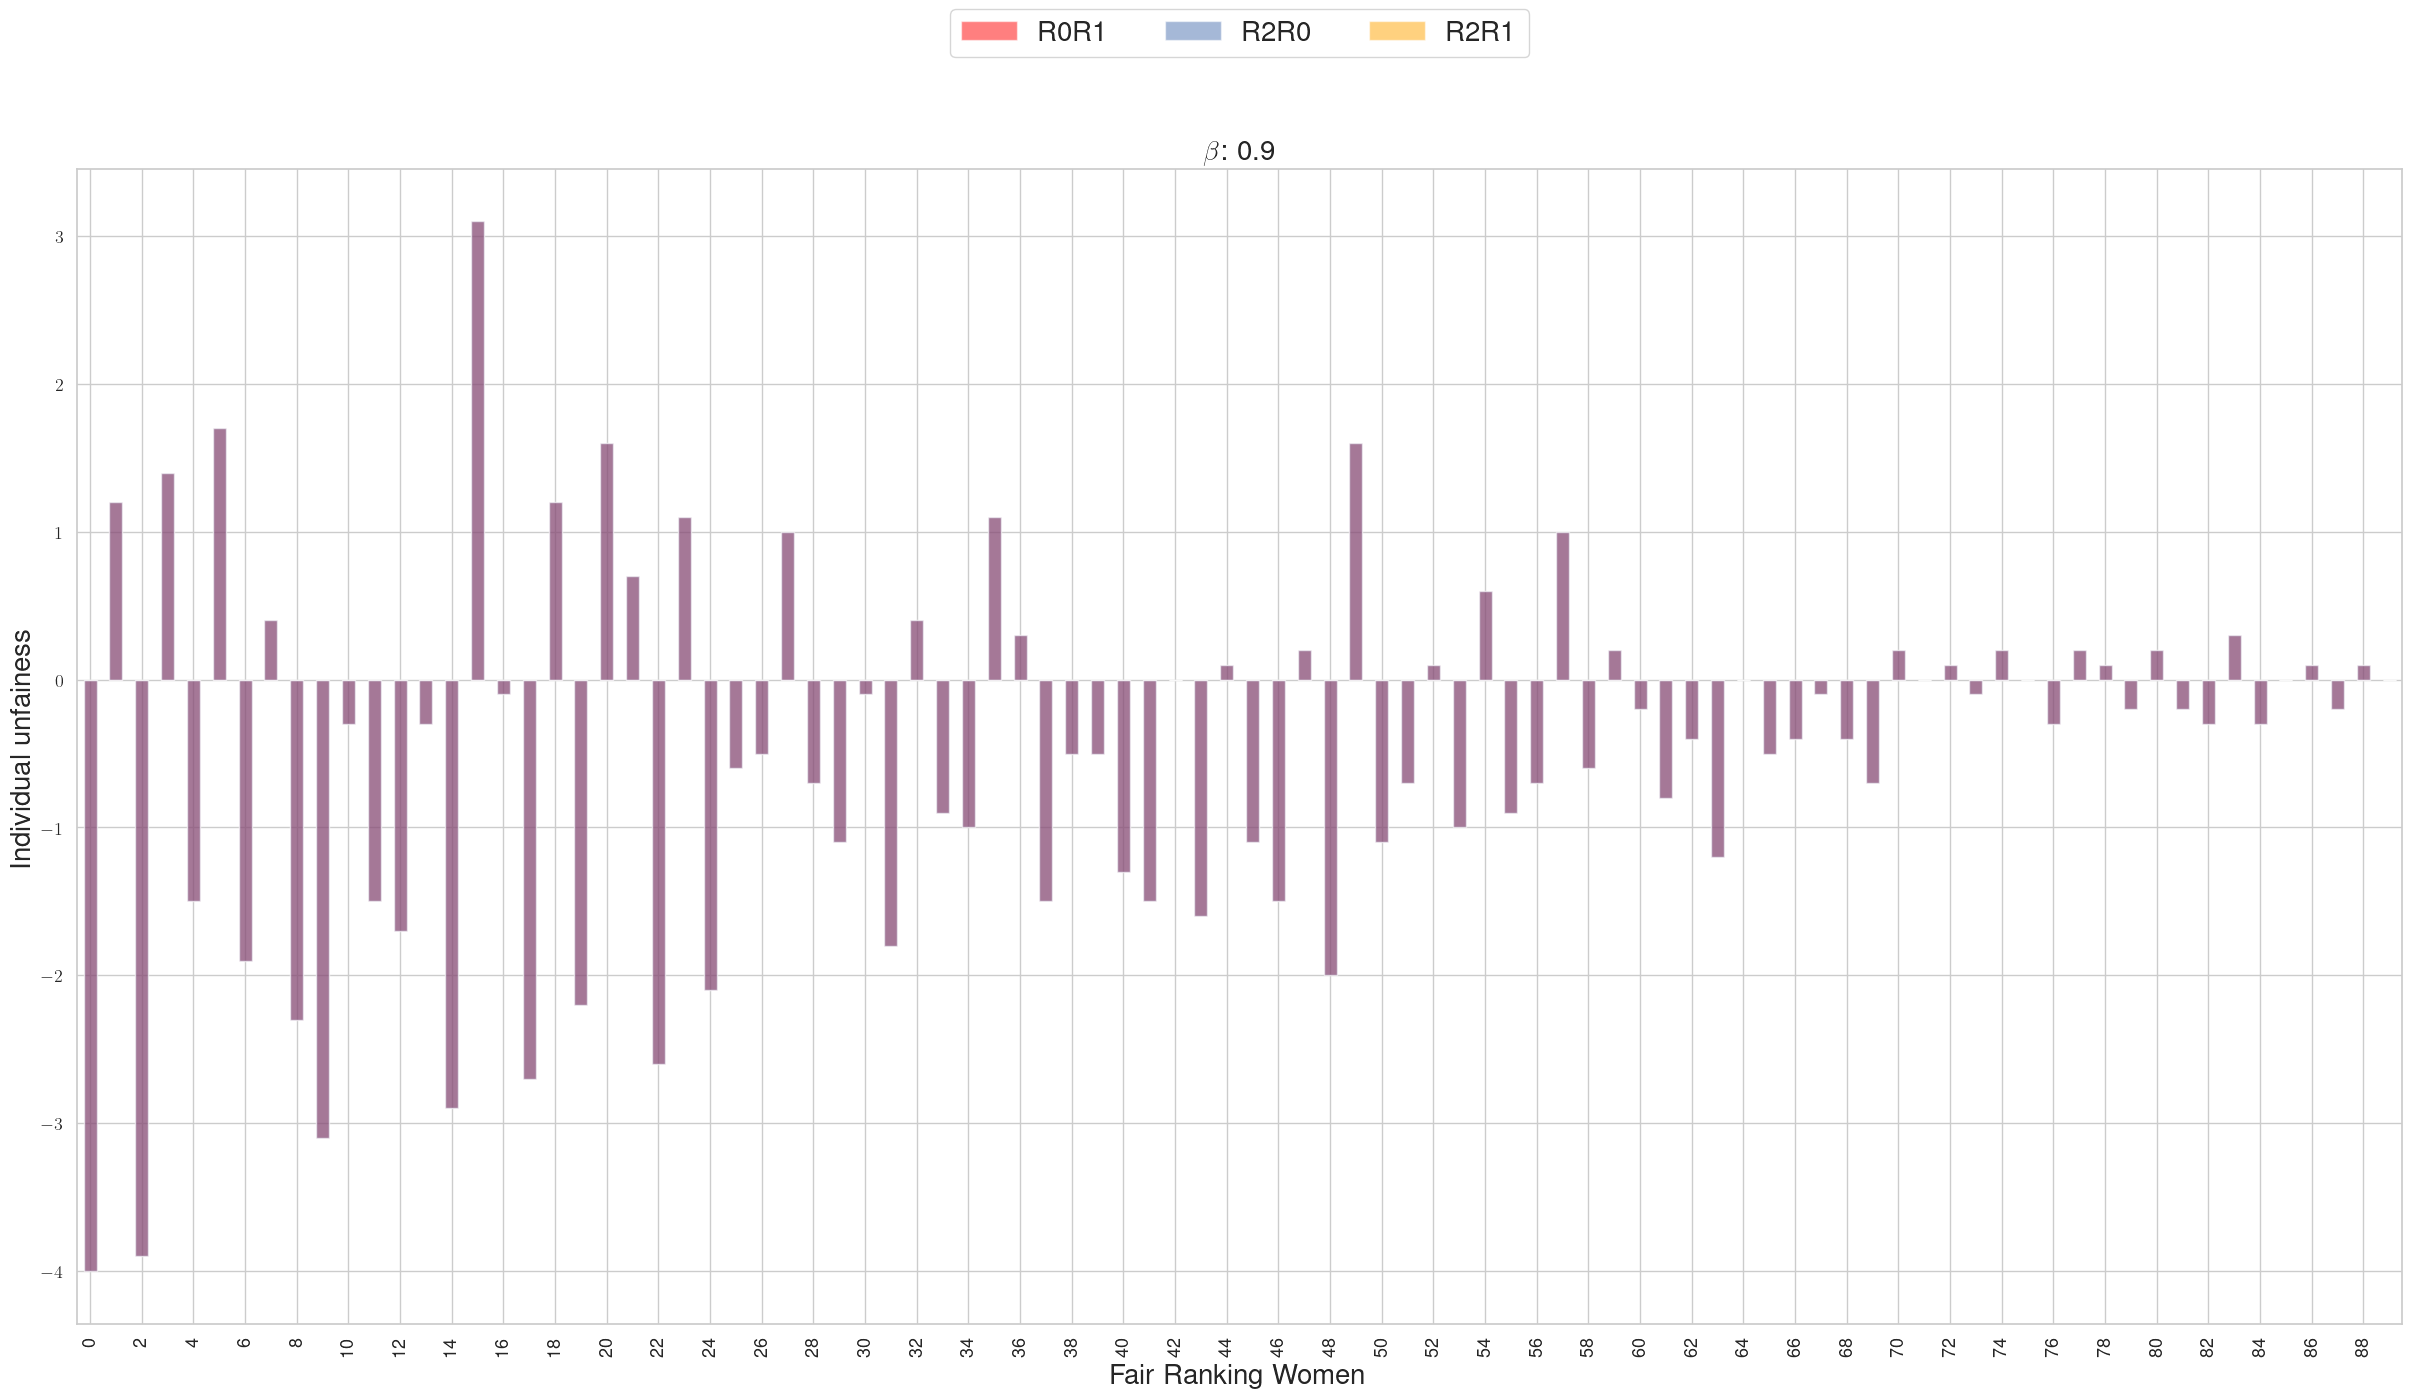

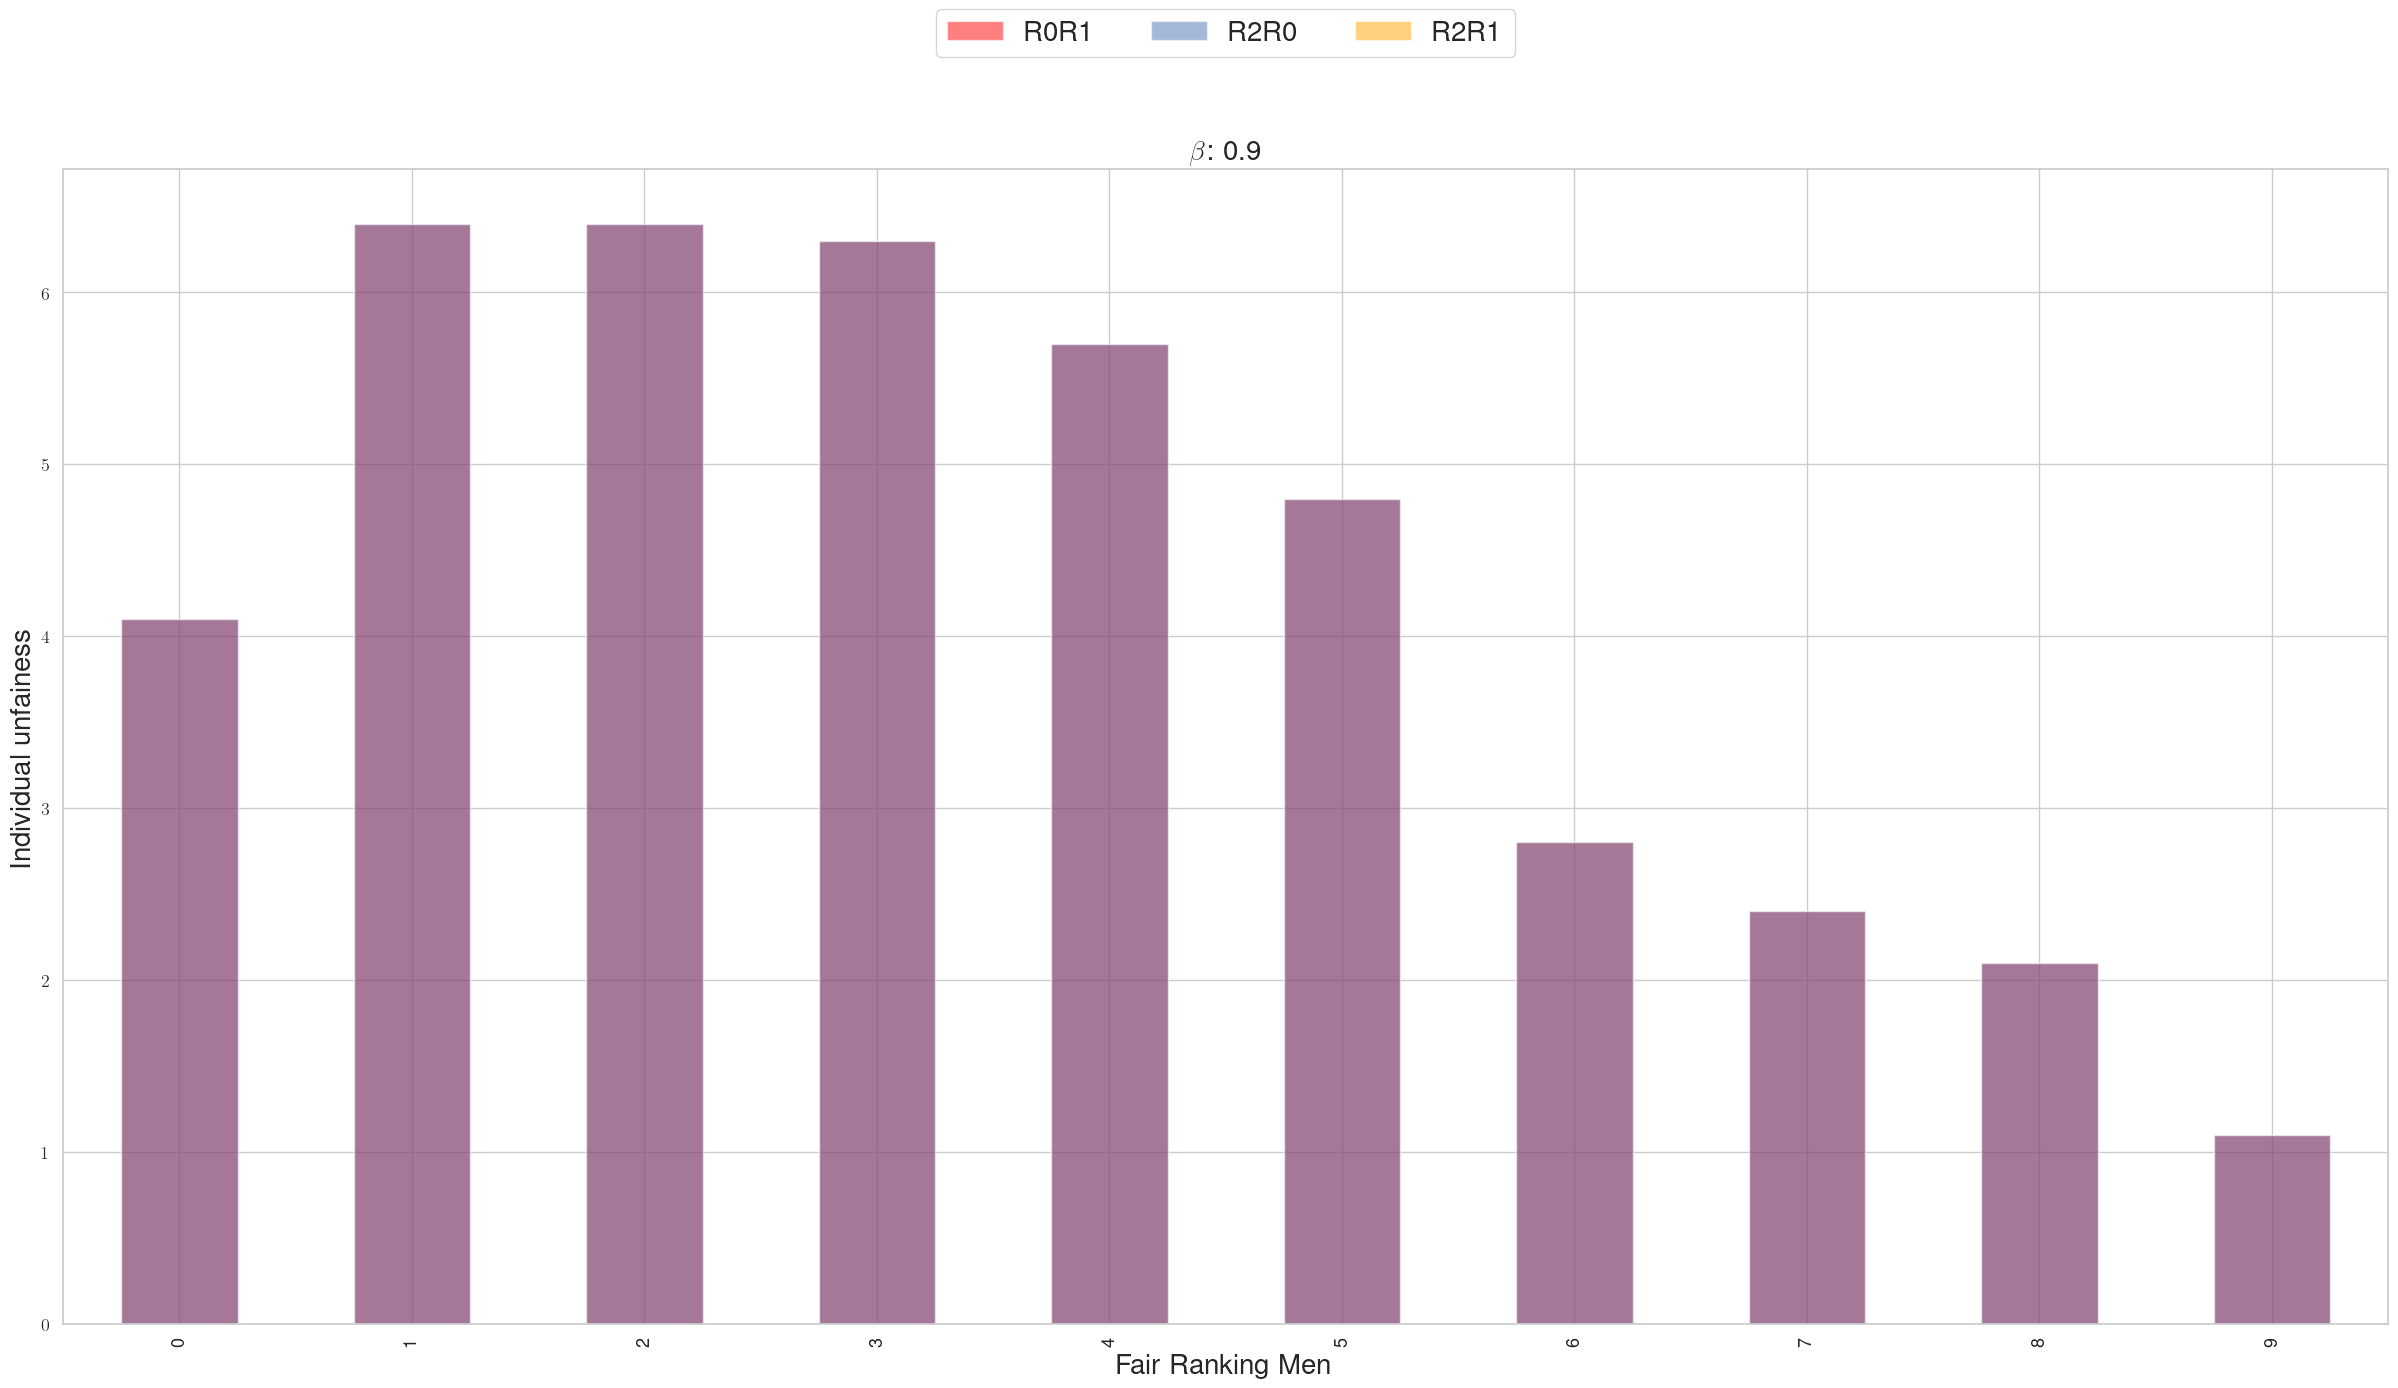

In [30]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)

    print('Proportion of Women:', np.around(p_F, 2))
    plot_individual_fairness(v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m, betas)

    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

## Plot individual fairness R0_R2 for different betas

In [31]:
n = 10
N = 50
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
distribution = 'normal'
protected_attribute = "F"
other_attribute = 'M'
#betas = np.arange(0.1, 1, 0.1)
betas = np.array([0.3, 0.5, 0.8])
V_type = 'V_norm'

In [32]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  8.13it/s]

0.5


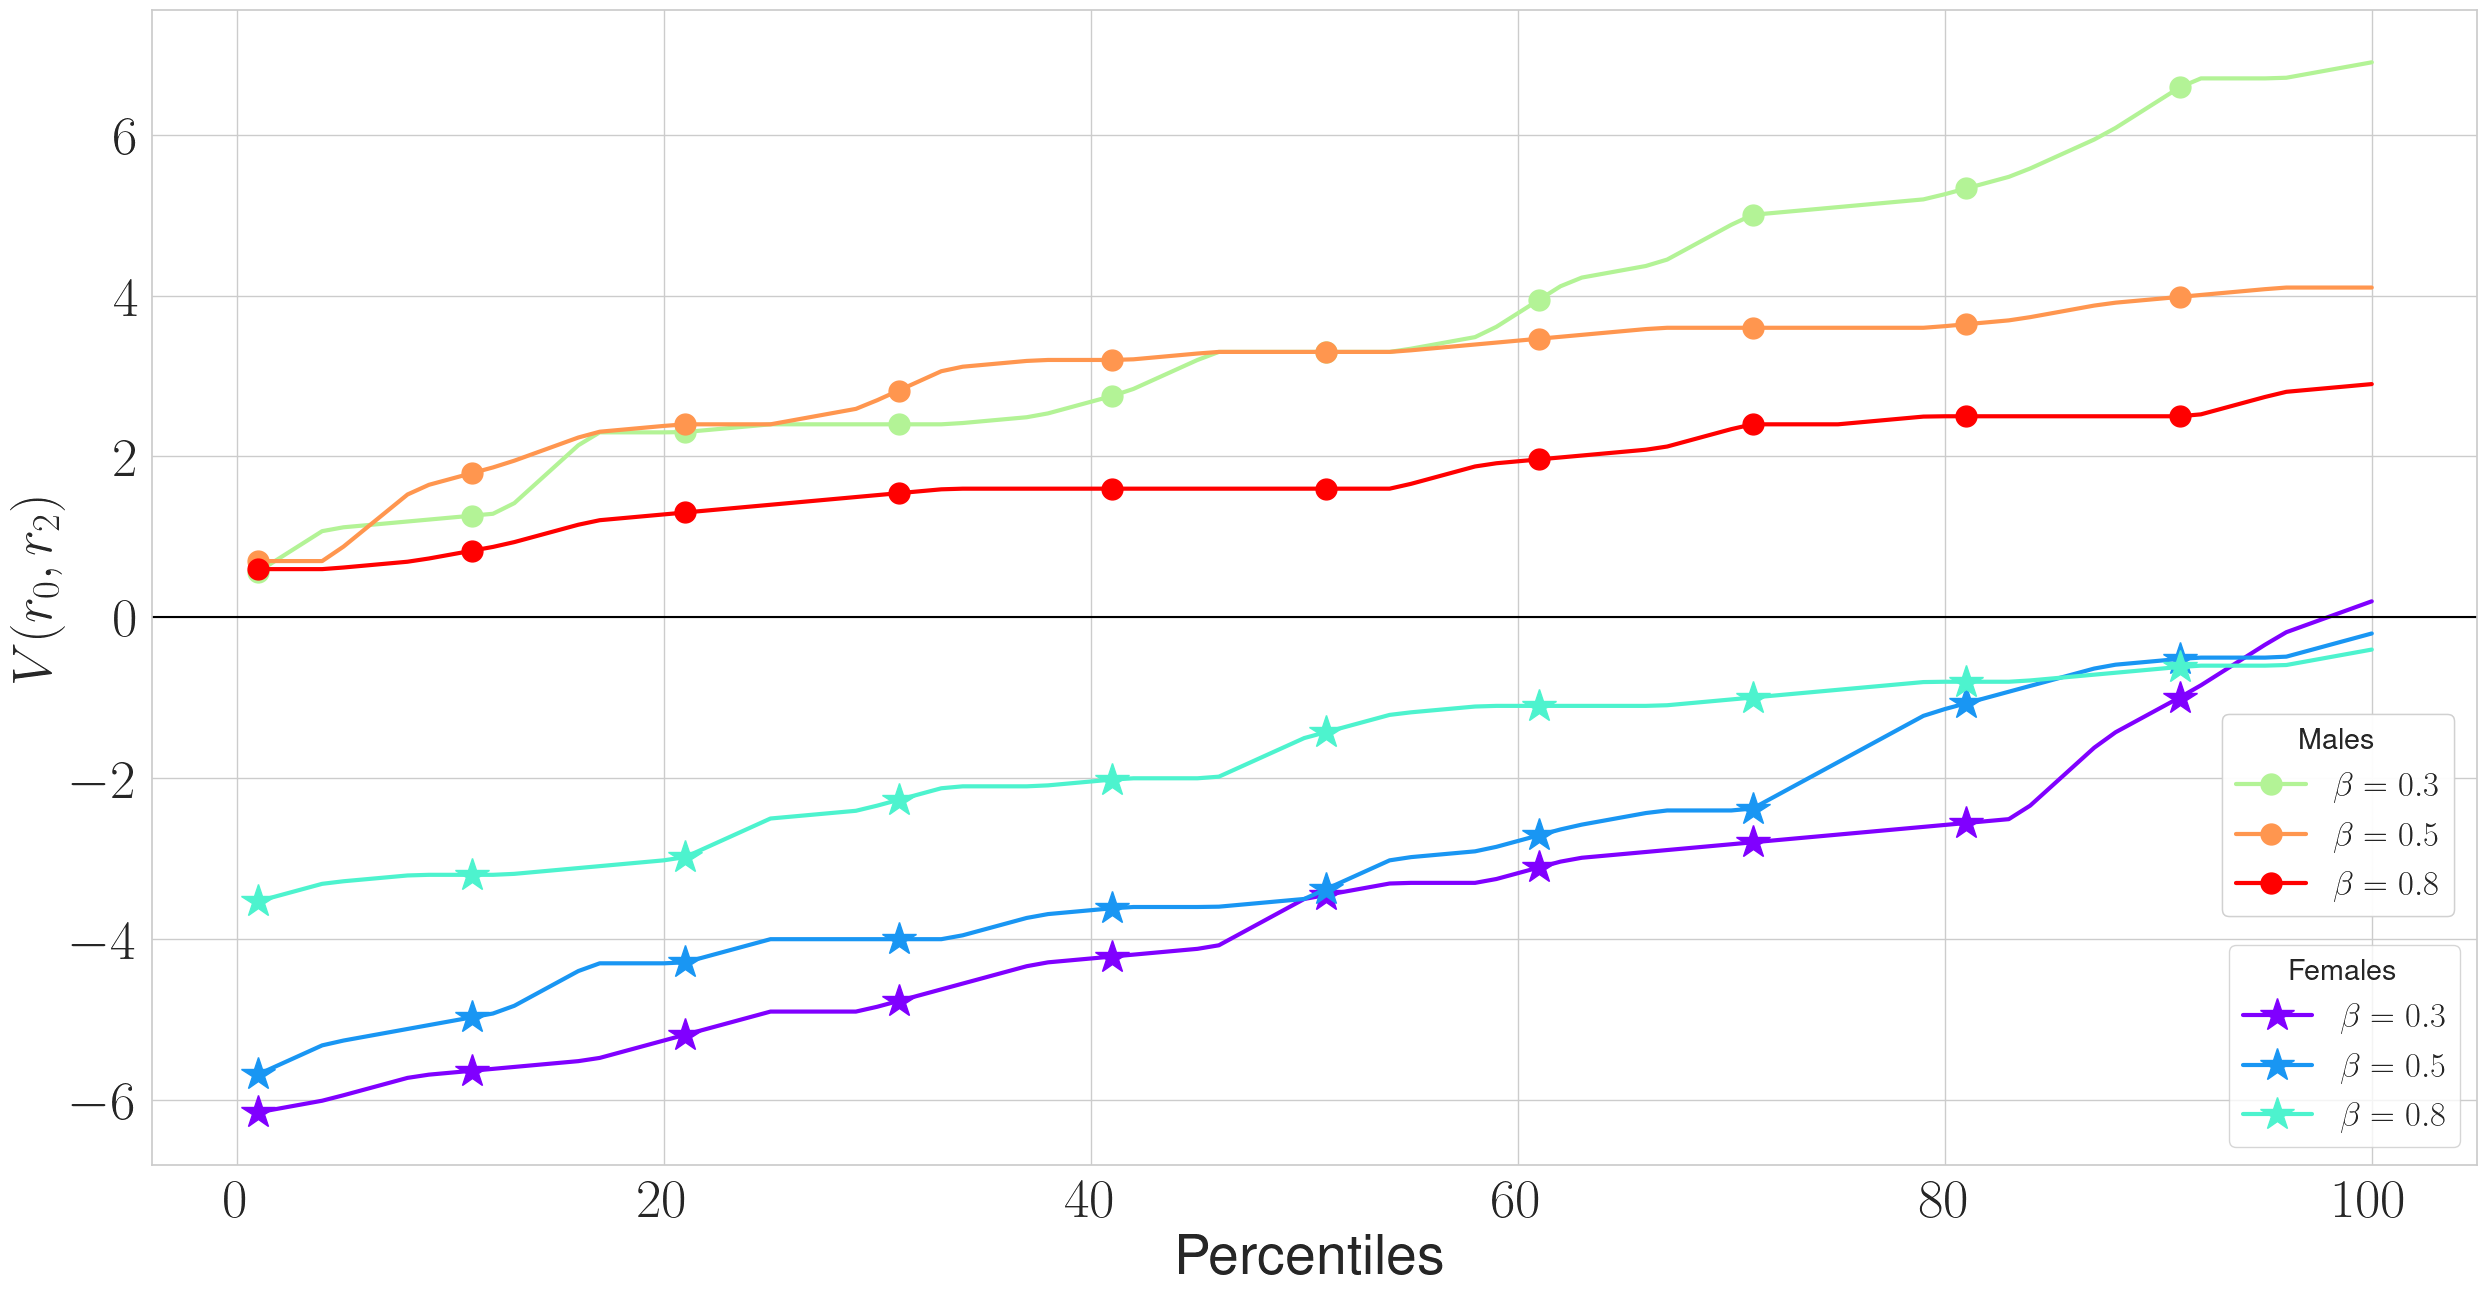

In [33]:
plot_betas_percentiles(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                       V_type, protected_attribute, other_attribute)

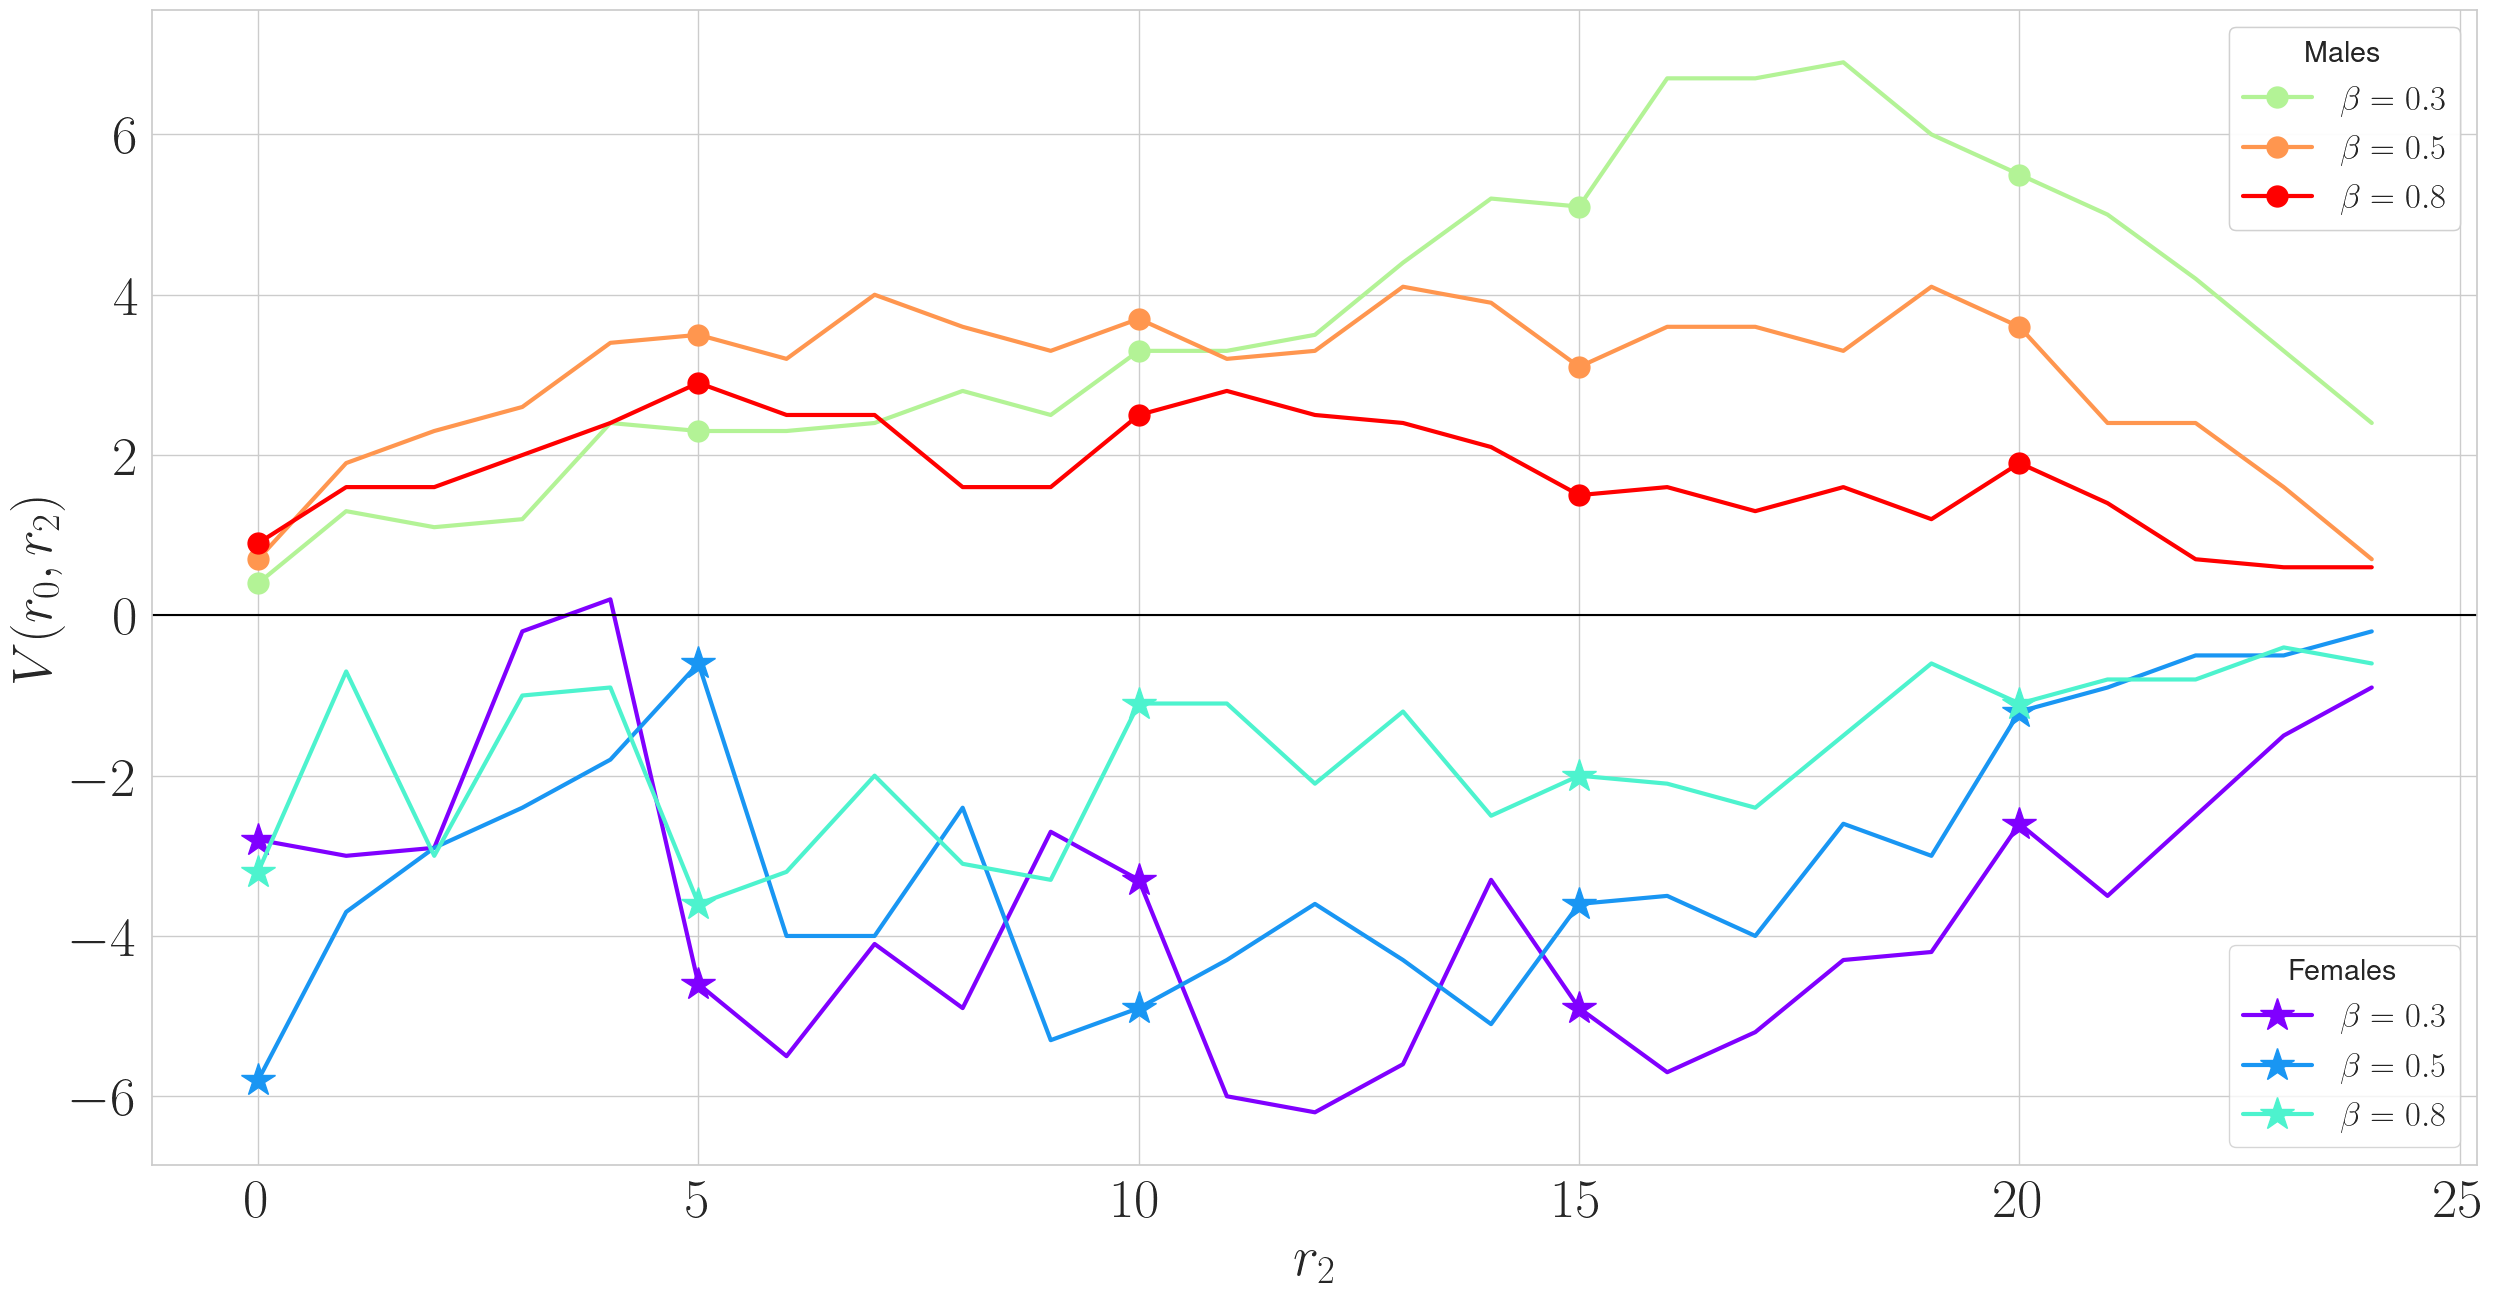

In [34]:
plot_betas_comparison(individual_fair_r2r0_f, individual_fair_r2r0_m, betas, proportion_F[0], 
                      V_type, protected_attribute, other_attribute)

## Plot Sum of individual fairness in a ranking for different betas, women and men divided 

In [10]:
n = 10
N = 1000
#proportion_F = np.arange(0.1, 1, 0.2)
proportion_F = np.array([0.5])
#alpha = proportion_F
mean_F = 0
delta = 0
protected_attribute = "F"
other_attribute = 'M'
betas = np.arange(0.1, 1, 0.1)
#betas = np.array([0.3, 0.5, 0.8])
V_type = 'V_norm'

In [11]:
individual_fair_r2r0_f = {}
individual_fair_r2r1_f = {}
individual_fair_r2r0_m = {}
individual_fair_r2r1_m = {}

for p_F in proportion_F:
    v_list_tot_f, v_list_tot_m, v_r2r0_f, v_r1r0_f, v_r2r1_f, v_r2r0_m, v_r1r0_m, v_r2r1_m = compute_individual_fairness(n = n, N = N, proportion_F = p_F, mean_F = mean_F, 
                                                  delta = delta, protected_attribute = protected_attribute, 
                                                  betas = betas, V_type = V_type)
    print(p_F)
    individual_fair_r2r0_f[round(p_F, 2)] = v_r2r0_f
    individual_fair_r2r1_f[round(p_F, 2)] = v_r2r1_f
    individual_fair_r2r0_m[round(p_F, 2)] = v_r2r0_m
    individual_fair_r2r1_m[round(p_F, 2)] = v_r2r1_m

100%|█████████████████████████████████████████████| 9/9 [00:22<00:00,  2.50s/it]

0.5


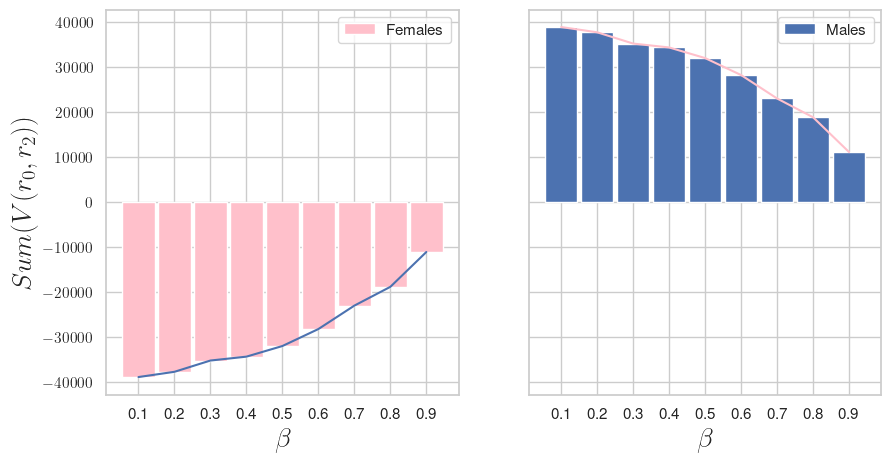

In [12]:
plot_betas_sum(individual_fair_r2r0_f, individual_fair_r2r0_m, proportion_F[0], betas, V_type)

# Conclusions:

- From the point of view of individual fairness, making the difference between VR0R1 and VR2R1, famales (or protected attribute) do not recover with fair ranking;
- Females in the first positions suffer more, in fact the difference between the individual fairness are negative, not even close to zero as females in the last positions;
- This is confirmed computing the percentage of women that do not reach zero in the difference between the individual fairnesses;
- From the Gini Coefficient, represent also in the Lorenz curve, we can see that for women the distribution has less equality than the distribution of men. Also, higher is beta, higher is the disequality.